In [27]:
import numpy as np
import pandas
import pm4py
from pm4py.vis import *
from matplotlib import pyplot as plt
from sklearn.mixture import GaussianMixture
import scipy.stats as stats
import ot
import os
from tqdm import tqdm
from graphviz import Source

In [66]:
file_path = '../../../data/BPI Challenge 2017.xes'
event_log = pm4py.read_xes(file_path)

parsing log, completed traces ::   0%|          | 0/31509 [00:00<?, ?it/s]

In [67]:
event_log['concept:name_2'] = event_log['concept:name'] + event_log['lifecycle:transition']
event_log = event_log.loc[event_log['concept:name'].str.startswith('W_')]
event_log = event_log.loc[(event_log['lifecycle:transition'] == 'start') ]#| (event_log['lifecycle:transition'] == 'complete')]
event_log

,Action,org:resource,concept:name,EventOrigin,EventID,lifecycle:transition,time:timestamp,case:LoanGoal,case:ApplicationType,case:concept:name,case:RequestedAmount,FirstWithdrawalAmount,NumberOfTerms,Accepted,MonthlyCost,Selected,CreditScore,OfferedAmount,OfferID,concept:name_2
6,Obtained,User_17,W_Complete application,Workflow,Workitem_1875340971,start,2016-01-02 10:45:22.429000+00:00,Existing loan takeover,New credit,Application_652823628,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,W_Complete applicationstart
14,Obtained,User_52,W_Call after offers,Workflow,Workitem_719909876,start,2016-01-02 11:30:28.631000+00:00,Existing loan takeover,New credit,Application_652823628,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,W_Call after offersstart
21,Obtained,User_117,W_Validate application,Workflow,Workitem_1641716416,start,2016-01-13 13:10:55.145000+00:00,Existing loan takeover,New credit,Application_652823628,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,W_Validate applicationstart
27,Obtained,User_115,W_Call incomplete files,Workflow,Workitem_2031858979,start,2016-01-14 09:16:20.972000+00:00,Existing loan takeover,New credit,Application_652823628,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,W_Call incomplete filesstart
34,Obtained,User_117,W_Validate application,Workflow,Workitem_2071763612,start,2016-01-14 13:39:51.494000+00:00,Existing loan takeover,New credit,Application_652823628,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,W_Validate applicationstart
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1202227,Obtained,User_133,W_Validate application,Workflow,Workitem_1595728514,start,2017-01-21 12:55:44.333000+00:00,Car,New credit,Application_303923658,30000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,W_Validate applicationstart
1202234,Obtained,User_29,W_Call incomplete files,Workflow,Workitem_953583759,start,2017-01-23 10:37:08.305000+00:00,Car,New credit,Application_303923658,30000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,W_Call incomplete filesstart
1202240,Obtained,User_28,W_Validate application,Workflow,Workitem_802026063,start,2017-01-23 13:46:33.747000+00:00,Car,New credit,Application_303923658,30000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,W_Validate applicationstart
1202252,Obtained,User_96,W_Complete application,Workflow,Workitem_1385765706,start,2017-01-02 19:15:15.214000+00:00,Home improvement,New credit,Application_1350494635,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,W_Complete applicationstart


In [42]:
net, im, fm = pm4py.discover_petri_net_inductive(event_log, activity_key='concept:name_2', case_id_key='case:concept:name', timestamp_key='time:timestamp')

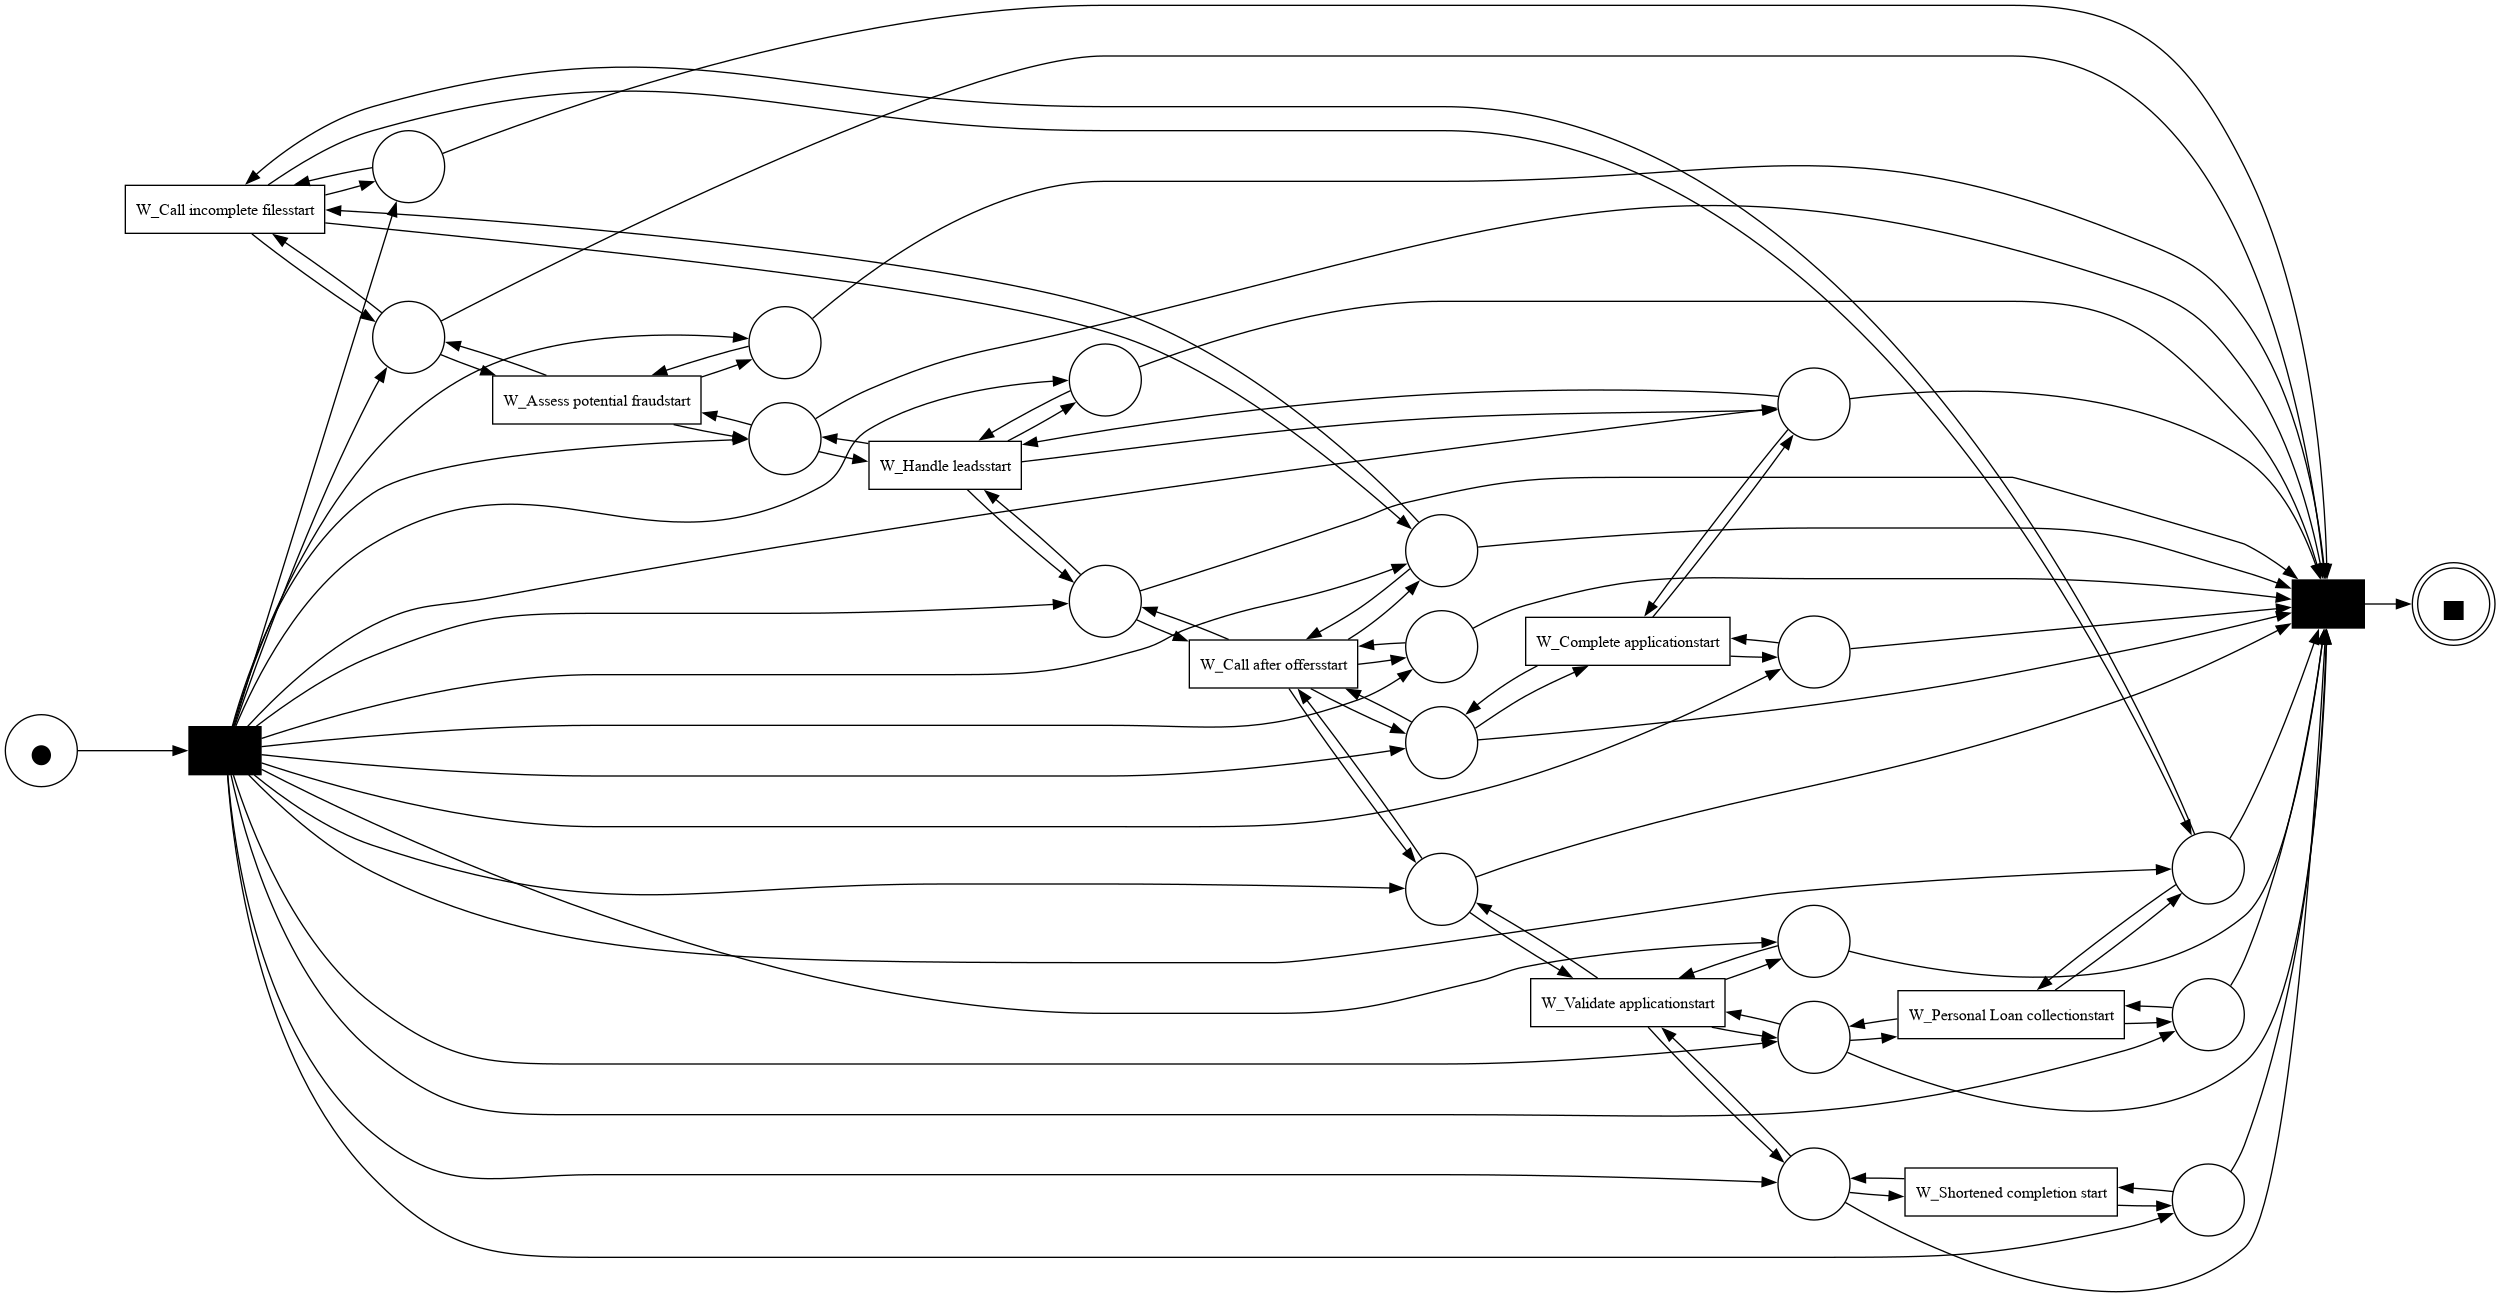

In [79]:
pm4py.view_petri_net(net, im, fm)

In [44]:
save_vis_petri_net(net, im, fm, 'test.svg')

''

In [45]:
net, im, fm = pm4py.discover_petri_net_alpha(event_log, activity_key='concept:name_2', case_id_key='case:concept:name', timestamp_key='time:timestamp')

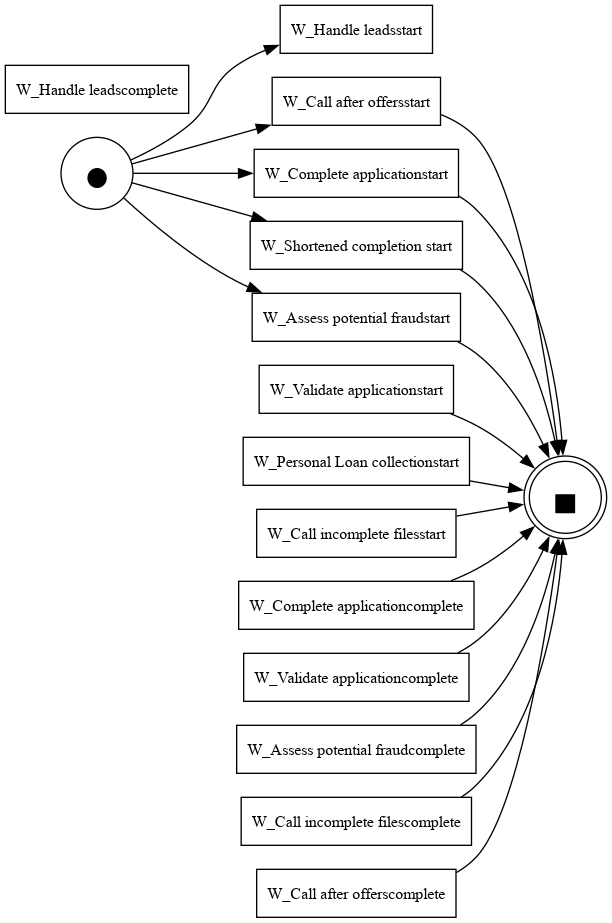

In [46]:
pm4py.view_petri_net(net, im, fm)

In [76]:
net, im, fm = pm4py.discover_petri_net_ilp(event_log, activity_key='concept:name_2', case_id_key='case:concept:name', timestamp_key='time:timestamp')

discovering Petri net using ILP miner, completed causal relations ::   0%|          | 0/22 [00:00<?, ?it/s]

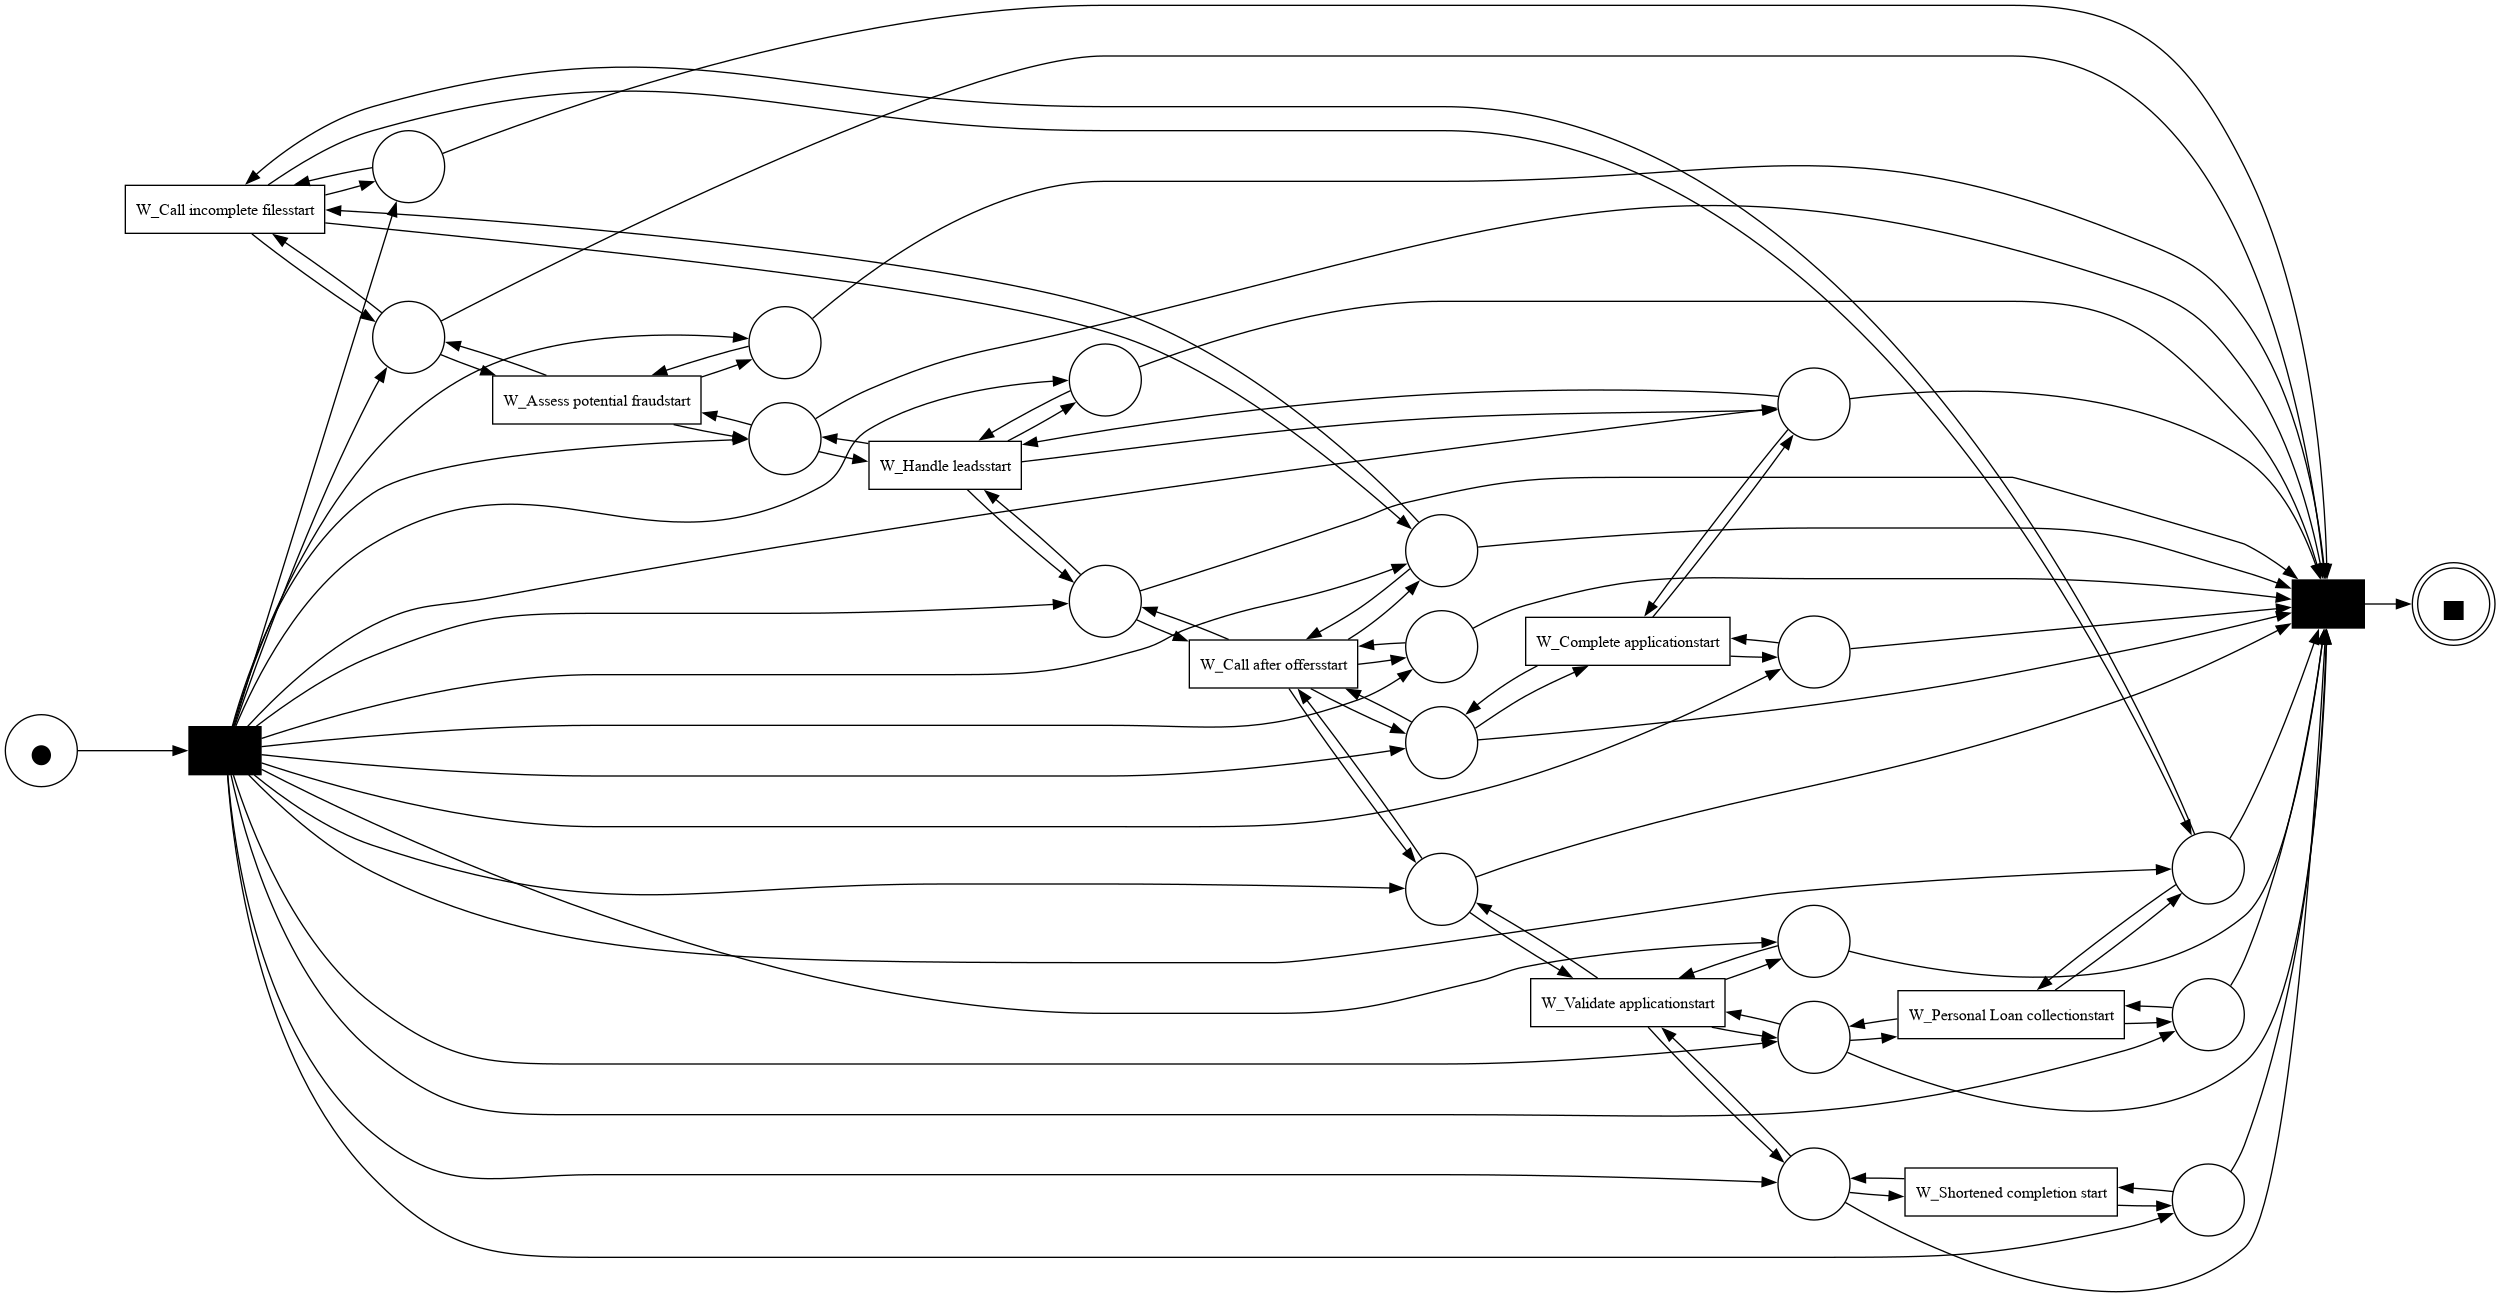

In [77]:
pm4py.view_petri_net(net, im, fm)

In [49]:
save_vis_petri_net(net, im, fm, 'test.svg')

''

In [50]:
net, im, fm = pm4py.discover_dfg_typed(event_log, activity_key='concept:name_2', case_id_key='case:concept:name', timestamp_key='time:timestamp')

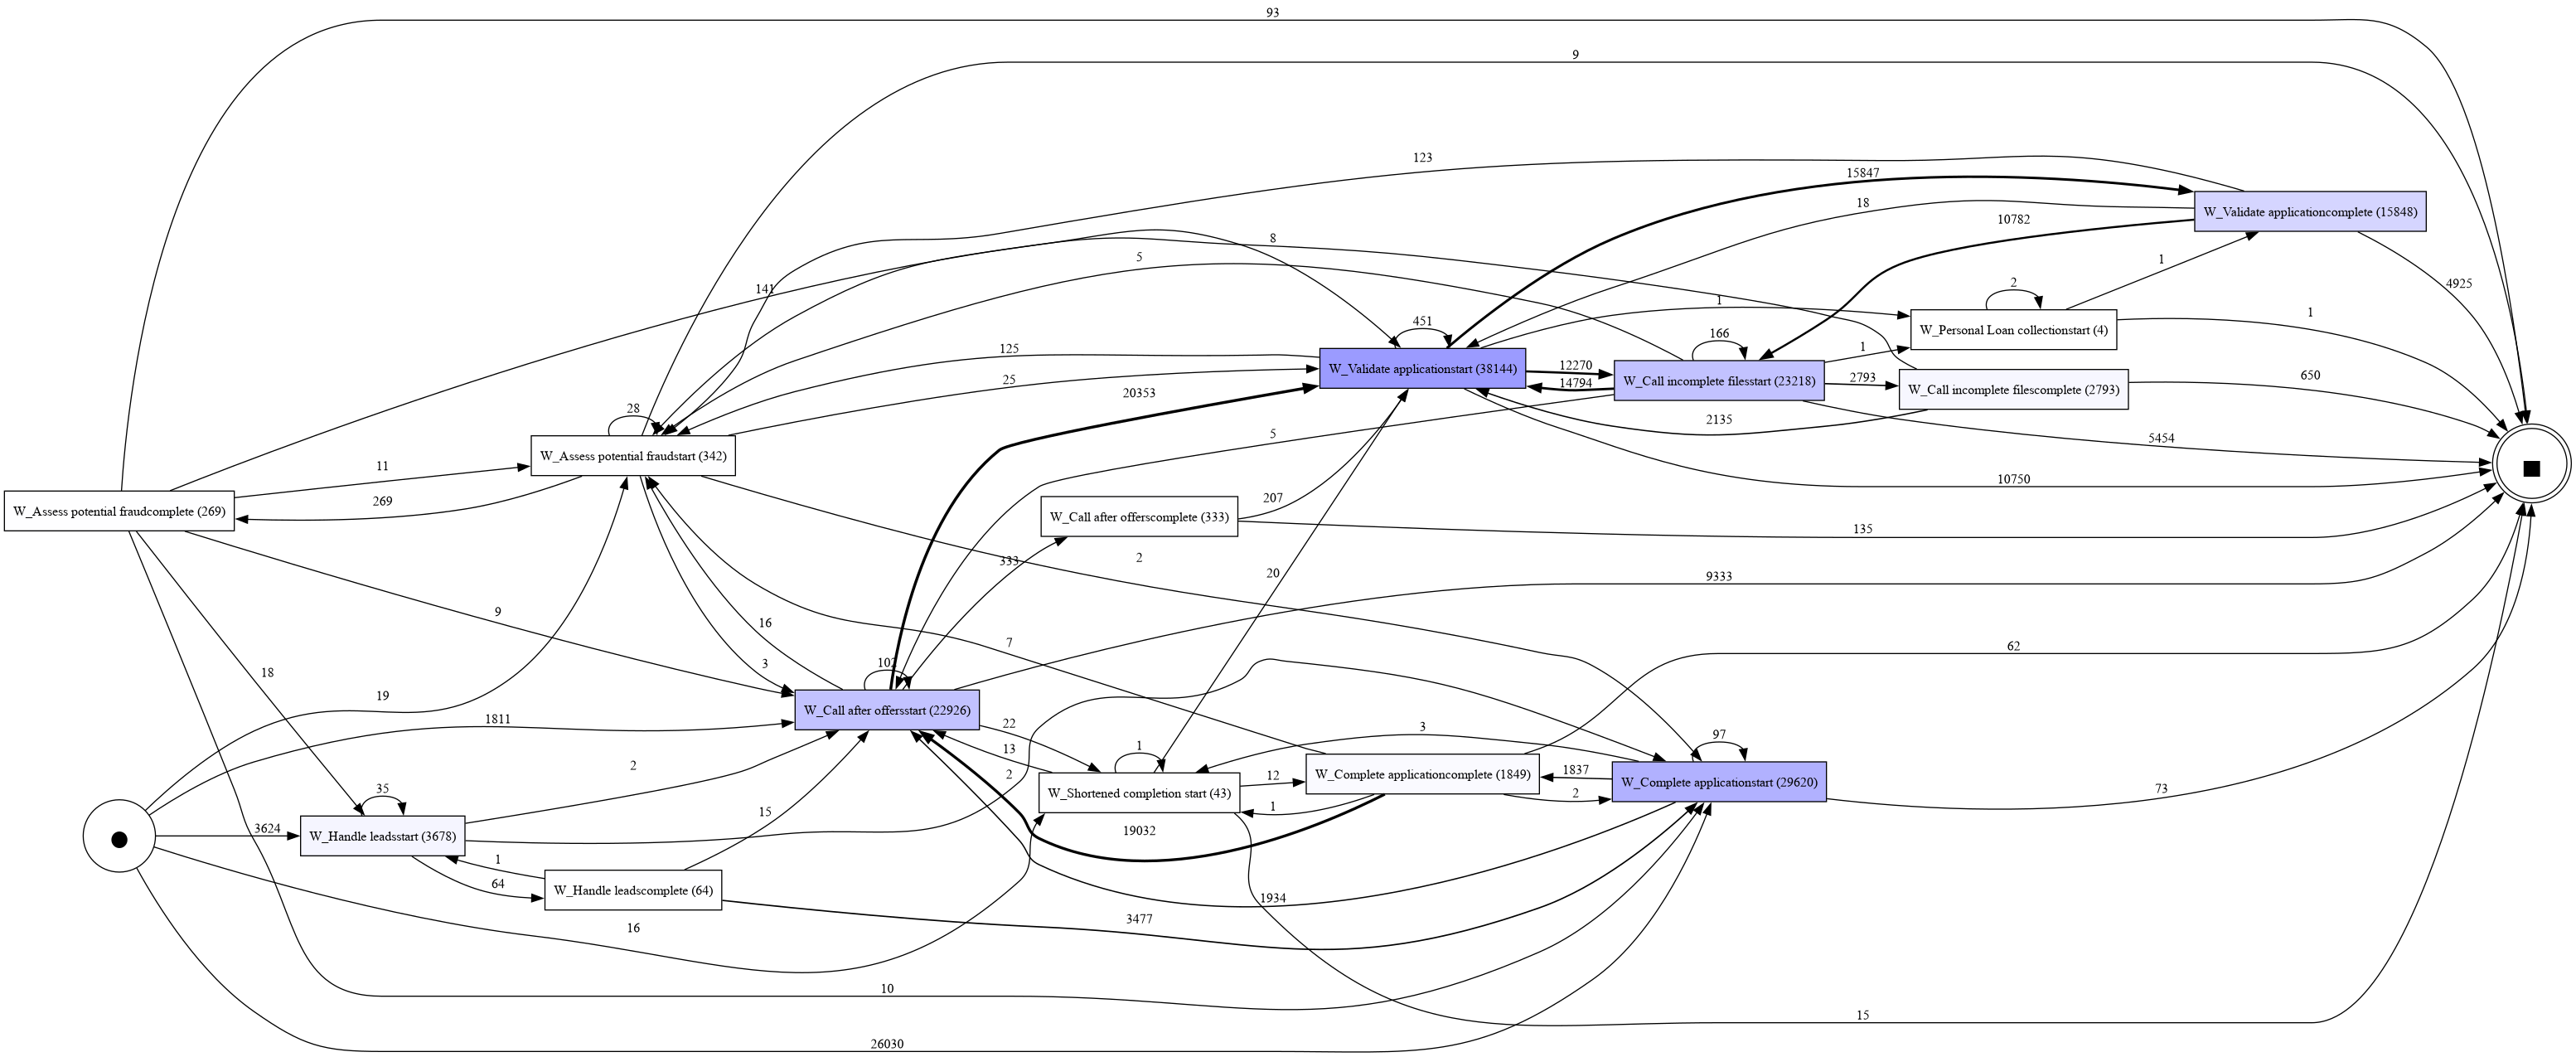

In [52]:
pm4py.view_dfg(net, im, fm)

In [68]:
net =data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAADXMAAAJWCAYAAACgKfVNAAAABmJLR0QA/wD/AP+gvaeTAAAgAElEQVR4nOzdeXQUZeLu8aez7wsJCQkkaUIgkLAIakBANgEVd0Qd7gAqLozOODqOx5/bKC6j44aijgMeQQRxAxXBH44aNAjIIiBLAoHsCVkJdLqzkvX+ce2+CQkQIFABvp9z6lS6qrrqeYvqBjk8vqampqYmAQAAAAAAAAAAAAAAAAAAAAAAAADOpDVORicAAAAAAAAAAAAAAAAAAAAAAAAAgAsBZS4AAAAAAAAAAAAAAAAAAAAAAAAAOAsocwEAAAAAAAAAAAAAAAAAAAAAAADAWeBidAAAAAAAAGCMqqoqHTlyRJLU0NAgm83m2FdeXq76+voWx1dUVKiurq5d57bZbGpoaGjXsU5OTvL392/Xsa6urvLx8WmxzcXFRb6+vo7Xfn5+cnZ2liS5u7vLy8urXecGAAAAAAAAAAAAAAAAgDONMhcAAAAAAAapqalRVVWVysrKVFlZqaqqKpWXl6u6ulo1NTWOdfOfq6urdeTIEUcRq/m6trZWlZWVjrUkxz47i8Vi4IiNFxgY6PjZy8tL7u7ukiRvb2+5ubk51vZ99rWnp6c8PDxarY/e5uPjI29vb3l7eysgIEBeXl7y8PAwcMQAAAAAAAAAAAAAAAAAOhNTU1NTk9EhAAAAAAA4V1RXV8tqtaqsrExlZWWOn61WqywWiyoqKlRVVaWKigpZrVZVVVW1KGxVVlY69jU2Nh73WvYyUfOSkbe3t2N2qqPX9hmqms9UdTKzVh2r6GTX1qxYJ8re3ntaU1PTrmPbmh2seXlNRxXW2jv7mP1n+9p+Hfu6eUmu+br5+Y/FPvOYj4+PvLy85OPj4yh6eXl5tdoXGBgof39/BQQEtFp7enq26z4BAAAAAAAAAAAAAAAA6JTWUOYCAAAAAFxwamtrVVpaqkOHDqm0tFQHDx5UaWmpLBZLi6JWW4Wttoo79rJOYGBgi1KOv7+/o7ATEBAgb29veXl5ydfXV35+fo59gYGBjp/9/PxOqgiFzsFe6rLZbI4Cn8Vicfxss9lUXl6uqqoqVVZWqqyszLHParW2KAHan7u2yn5ubm4KCAhoUfBqvtifw+DgYHXt2lXBwcEKCgpScHCw3NzcDLk3AAAAAAAAAAAAAAAAABwocwEAAAAAzn2VlZXKz89XcXGxo6BVUlLi+Ll5aevgwYMqLy9v8X6TyaTg4OBWxZijSzPNyzPNt/n5+Rk2dpy/ysvL2ywUHr3t6OKhxWJRaWmpjv4rH19fX3Xt2lVdu3Z1FLzs65CQEMfr0NBQde/eXd7e3oaNHQAAAAAAAAAAAAAAADhPUeYCAAAAAHReFotFBQUFslgsKiwsVEFBQau1fV9zHh4eCgwMVGBgoMLDwxUWFuZ43db2kJAQubi4GDZO4Eyorq5u8dmxWCwtlqO3FxcXt5gNzP45sn9Wjl7b90VGRvL5AQAAAAAAAAAAAAAAANqHMhcAAAAAwBglJSXKzc1VXl6ecnNzlZOT43h94MABlZSUqL6+3nG8p6enwsLCFBYWptDQUIWHhyskJETdu3dXaGiowsLC1K1bNwUHB8vNzc3QsQHnorq6OpWWlqqoqEgFBQUqKSlxfBYLCgpUXFyswsJCFRYWqrq62vE+FxcXhYSEqEePHoqIiFBERITMZrMiIiIUGRmpiIgIhYaGGjo2AAAAAAAAAAAAAAAAoJOgzAUAAAAA6HhNTU3Ky8tTRkaGcnJyHEteXp7y8vKUk5Ojmpoax/FhYWEtih+RkZGOopZ97efnZ+iYAPx/NpvNUfDKz89vUc60FzSLiopk/2snDw+PFp/vyMhIRUVFKSoqSjExMerRo4ecnJyMHhYAAAAAAAAAAAAAAABwplHmAgAAAACcuoKCAu3Zs0eZmZktltTUVFVWVkqS3N3d1b17d4WFhSk8PFzR0dGOJSwsTFFRUfLx8TF6KAA6WG1trUpLS1VYWOj4bigoKHC8Tk9Pl9VqlSS5ubmpR48eLb4foqOjFRcXp9jYWLm4uBg9HAAAAAAAAAAAAAAAAKAjUOYCAAAAABxfeXm59u7dq127dmnPnj3at2+f0tPTlZ2drdraWklSYGCgYmJi1KtXL8XExCgmJka9e/dWTEyMQkJCjB4CgE6qpKREGRkZSktLU3p6eovFYrFIvxe9zGazYmJiFBsbq7i4OA0YMEBxcXHy9fU1eggAAAAAAAAAAAAAAADAyaDMBQAAAAD4f2pra7V3716lpKRo9+7dSklJUXJysrKzs9XU1CQvLy/HLDn2opZ9CQoKMjo+gPPMoUOHWhW8UlNTtXfvXlVWVspkMslsNis+Pl79+/dX//79FR8fr379+snd3d3o+AAAAAAAAAAAAAAAAEBbKHMBAAAAwIWourpav/32m3799Vdt2bJFv/32m9LS0lRfXy9XV1fFxsYqPj5eAwYMcKx79uwpJycno6MDuMA1NjYqKytLycnJSklJccwamJqaqrq6Orm4uCgmJkaDBw9WQkKCEhISNHjwYHl6ehodHQAAAAAAAAAAAAAAAKDMBQAAAADnu8bGRu3du1dbtmxxLLt371ZdXZ2CgoKUkJCgIUOGOIpbsbGxcnV1NTo2AJyUuro67du3zzG74Pbt27VlyxYdOnRIrq6u6t+/v4YOHeooePXt21fOzs5GxwYAAAAAAAAAAAAAAMCFhTIXAAAAAJxvGhoatH37diUmJmrNmjXasmWLysvL5enp2WKmmksvvVQxMTFGxwWAMyojI8NRZP3111+1fft2VVdXy9fXVwkJCRo3bpwmTJigIUOGUO4CAAAAAAAAAAAAAADAmUaZCwAAAADOBxkZGUpMTNQPP/ygn376SYcPH1ZYWJjGjx+vESNGKCEhQQMGDJCLi4vRUQHAUPX19UpOTtbmzZu1YcMGJSYmqrCwUIGBgRo3bpzGjx+v8ePHU3YFAAAAAAAAAAAAAADAmUCZCwAAAADORfX19frpp5/05Zdf6rvvvlNWVpZ8fHw0evRoRxGhf//+RscEgHNCSkqKEhMTlZiYqKSkJFVUVMhsNuvKK6/UzTffrDFjxsjV1dXomAAAAAAAAAAAAAAAADj3UeYCAAAAgHNFU1OT1q5dq8WLF+vrr7/W4cOHNWTIEF177bUaP368hg0bRtkAAE5TXV2dNm/erMTERH3zzTfatm2bunTpohtuuEHTp0/X6NGj5eTkZHRMAAAAAAAAAAAAAAAAnJsocwEAAABAZ1dcXKz58+dr0aJFysrK0qWXXqpbb71VN998s3r27Gl0PAA4r2VnZ+uLL77QZ599pl9//VVms1l33HGH/vSnPyk0NNToeAAAAAAAAAAAAAAAADi3UOYCAAAAgM4qLS1Nr776qpYsWSIfHx/NmDFDM2fOVHx8vNHRAOCClJKSog8++ECLFy+WzWbT9OnT9eijj6p3795GRwMAAAAAAAAAAAAAAMC5YY2T0QkAAAAAAC0dPnxYDz30kOLj47V27Vq9+eabys3N1euvv35eF7mSkpJaLCkpKZKkdevWtdpXXl7ueN/OnTtb7LPZbKed5cCBA6d9Dpx5zzzzjEwmk/73f//3pN734Ycfavjw4TKZTNq6dWu73/fmm2+qX79+iomJkclk0sSJE1VTU3MKyU9PY2OjXnvtNfXv318mk0llZWVnPcOFKj4+Xq+99ppyc3P11ltvad26dYqPj9df//pXHTp0yOh4AAAAAAAAAAAAAAAAOAdQ5gIAAACATiQxMVEDBgzQRx99pFdffVUpKSmaNWuWPD09jY52xt19990aO3asxo4dq2uuuUZLly6VJD355JO64oorHPv+/ve/q6CgwPG+999/XzfeeKPGjh2rP/zhD8rLyzutHE1NTbrqqqu0d+/e0x7ThaKkpMSQa0ycOFE33nijBg0adFLn2rNnz0k/J8uWLdO8efO0e/dupaWl6b333lNgYKDq6+tP6jwdwcnJSTt27FB+fv4pvf9M/Xqdjeegs/Dw8NC9996rPXv26P3339fy5csVFxd30sVCAAAAAAAAAAAAAAAAXHgocwEAAHRSu3fv1pQpUxQREaGYmBjdfffdzBQDnOfmzp2riRMnasyYMcrIyNCDDz4oFxcXo2OdNenp6frzn/8sSXruuef04osvSpJ+/vlnrV69WiaTST169NC2bdsUGxvreN/bb7+td955RxdddJFycnJOe/ay1atXKyUlRXPnzj3NEV0Y6uvr9dRTTxlyjREjRuirr75Sjx49Tup8L7/8sv7yl7+c1HveeecdDRo0SC4uLjKZTLrnnnv02WefycfH56TO01E++ugjTZky5aTfd6Z+vc7Gc9AZOTk5acaMGUpNTdXEiRN13XXXac6cOUbHAgAAAAAAAAAAAAAAQCdGmQsAAKATWrZsmQYPHqyvv/5aBw4cUEZGhhYvXqzY2Fht3brV6HgAzoAlS5bob3/7m1577TUtXbpU/v7+RkcyxLPPPitXV1etWLGixfYrr7xS11xzjQ4cOKANGza0et+SJUv0yCOPyN3d/bQzvPXWW4qOjtbixYt16NCh0z7f+e6VV15Rbm7uOXcNLy+vkzp+9+7d8vDw6NAMp+tkx6Az+Ot1Np6DzszPz09LlizRnDlz9Mgjj+iDDz4wOhIAAAAAAAAAAAAAAAA6KcpcAAAAnUx1dbXuueceNTY2qr6+3rG9rq5OR44c0d13321oPgAdz2Kx6OGHH9bf/vY3Pfzww0bHMVRQUJAmTZqk9evXKz09vcW+YcOGSZIWL17cYntxcbG2bt2qyZMnn/b1t2/fruDgYD3yyCOqrq7W/Pnzj3t8Tk6O9u3bJ0kqKSk56f36fUayjRs3ymKxnLFrNFddXe24t6Wlpdq6dasqKiqOeXxhYaE2bdrUZlFn5cqVevrpp3X48GElJSW1WTg+3vhqa2u1Z88e6fff57Zu3aq8vLyTukZmZqZsNlurc1ssFm3dulU7duxQXV1dq/0mk+mYY25u586dSkpKks1mU3FxsZKSkloUCuvq6hxjyM/PV2ZmZrty5OTkKCkpSUlJSS3ugX3bzz//3Gae/Px8bdq0SRUVFcccw7GeiRPdyxPds2ONtT3PwYXioYce0iOPPKJHHnmEMigAAAAAAAAAAAAAAADaRJkLAACgk9m0aZOsVquamppa7WtoaNDOnTtVVFRkSDYAZ8aPP/4oq9Wq2bNnGx2lU5gxY4Yk6aOPPmqx/fvvv5efn5+WL1/eomjy+eef65ZbbpGnp+dpX/u1117TAw88oOnTp8vPz0///ve/2yy1NDU1acaMGRo9erSmTZumP/3pT3rqqafavV+SUlNTlZCQoFtuuUW33nqrunXrpjlz5nToNZpLTk7WzJkzFRoaqn/961966aWXdNVVV2nChAnq2rVrq5mEioqKdO2112ro0KG69957FR0drcsvv9xR4NmzZ4/mzp0rZ2dnpaena/bs2Zo3b167xpeXl6e//vWvCg8P11//+ld9//33mjhxoqZOnaqoqCi98847J7zGhx9+qJEjR6pXr16OgpH9vjz00EOKiIjQrFmzNHbsWIWHh2vdunXtegaOtnjxYs2ePVsNDQ3asWOHZs+erVdeeaXFGO6//3598803GjJkiPr06aPU1NQT5khKStKUKVM0duxYPffcc5Kkqqoq3XnnnRo7dqwmTpzYIofFYtENN9yg+Ph4zZo1S3369FFKSkqLY473TBzvXp4o6/HG+uWXXx73ObgQPfPMM6qsrFRiYqLRUQAAAAAAAAAAAAAAANAJuRgdAAAA4EJWX1+vjIwMJScna+/evUpOTm7XLA6HDx9Wt27dzkpGAGdefn6+goKC5Ovra3SUTuHaa69Vly5dtGTJEkfBLTs7WwEBAbr11lv1/vvv67///a+uu+46SdKnn36qN95447Svm5ubq+zsbMcMYLfffrvefvttff755/rjH//Y4tivvvpKOTk5yszMlJOTk3bv3q0pU6a0e7/FYtHVV1+tBQsWaNy4caqvr9ctt9yiRx55RMOHD9ewYcNO+xpHS0tLU2pqqsrLy7Vx40bdf//9evzxx2WxWDRu3DjdfffdiouL09ChQ3XkyBFNmDBBQ4YMUXZ2tpycnLRhwwZdddVVGjNmjHbu3Km4uDitWbNGPXr0UP/+/fXf//633eNzcnJSVlaWDh06pH379slqteqnn35SY2OjLrvsMj399NP6y1/+ctxr7Ny5Uzk5Oa3GaS8X/fDDDxo/frxKSkrUs2dP/fOf/2zx/vZ6/fXXJUkuLi666qqrtGjRIknShg0blJWVpdLSUuXn58vT01M//vijZs+erbCwsBPmuP3223XJJZeof//+jmv5+/srPT1dgwcP1v79+x3bGxsbdf3116uyslIZGRkKCgrShg0bNH78+BZZj/dMHO9enihrbm7uMcd6xRVXaPLkyW2e90Ll7e2t0NBQHThwwOgoAAAAAAAAAAAAAAAA6ISYmQsAAOAsaGhoUFpamr766iv985//1NSpU3XRRRfJ29tbffv21a233qpFixappqamxT/qbourq6siIyPPWnYAZ97AgQNVVFSk5ORko6N0Cm5ubrrtttuUmZmpDRs2SJI++eQTTZ8+3TFr18cffyz9XsCy2WxKSEg47eu++eabuv/++x2v//znP8tkMrVZFEtNTVVWVpaysrIkSQMGDNCTTz7Z7v0LFixQUFCQnJyclJSUpPXr1+uyyy5TU1OT5s+f3yHXONpNN92kVatWSZIuu+wyDRkyRJIUGBiof/3rX2psbNR7770nSVq4cKGSk5P1zDPPyMnp//3VwYgRI/TEE08oLy9Pc+fOPe69PNH4EhIStGrVKgUHBys2Nla33HKLJMnJyUmXXHKJLBaLqqurj3uNOXPm6IEHHmi1vV+/frr11ls1dOhQqVmxprS09LjnO1kjRozQqlWrFBoaKg8PD11xxRWKj4/XsmXL5O/v364c8fHxcnFp+f/ZcXZ2Vr9+/Vps+/jjj7V+/XrNmTNHQUFBjutPmjSpxXEn+0zYnSjricaKllJTU5WXl6dBgwYZHQUAAAAAAAAAAAAAAACdEGUuAACADlZQUKDExETNnTtXs2bN0siRI+Xn56c+ffpo8uTJ+ve//63S0lKNHj1ab7/9ttatWyebzab09HStWLFCc+bM0eDBg+Xq6trq3K6urpo6dap8fHwMGRuAM2PUqFEaOnSo7rnnHlVWVhodp1OYPn26JGnJkiWS5JiJ6/LLL1d0dLRWrlypyspKffrpp7rjjjtO+3pWq1VLly5VSEiIkpKSlJSUpMLCQvXt21fbtm3TunXrWhw/evRo5efnq1+/fpo2bZo2b97sKJq1Z/8vv/yivLw8zZ4927GsXr1ao0ePlp+fX4dcoy32cx9t5MiRkqQ9e/ZIklauXClJMpvNLY6bPHmyJCkpKem412nP+PR7aeho9t//GhoajnsNSW3OZhcXF6fPPvtMBw4c0KxZsxQTE6Pi4mLV19ef8HynwsPDw1GwOpUczs7Ord579J8Bli9fLpPJ1Kq0GBER0eL1qTwTJ5P1WGPF/1dVVaW77rpLF198scaNG2d0HAAAAAAAAAAAAAAAAHRClLkAAABOUVulLR8fH3Xv3l0TJkzQyy+/rMzMTF188cV64403tG7dOpWXl6ugoEA//PCD5s6dq3vvvVcjR45s8Y/ZTSaTvvzyS/Xt21dOTk5yd3eXu7u7JGnMmDF6++23DRw1gDPByclJixYtUmZmpq655hqVlJQYHclwl112mXr37q3PP/9c27dvV9++fR3fhdOnT1dVVZVWrFihL774QtOmTTvt682fP18+Pj568cUXWxSQ7KWaN998s8Xx9pmKevbsqaVLl2rYsGG68847HeWXE+0vLy9X7969HcWx5ot91qvTvUZbTCZTm9u9vb3l7e3tmCXKYrFIUqvZrOzlocbGxuPez/aMryO0NZ76+no9+OCDGjNmjAYNGqS0tDT17t27w67ZXh2ZIzc3V05OTm0WvZs7lWeio7NeyA4ePKhrrrlGaWlp+vDDDx2z2gEAAAAAAAAAAAAAAADN8a9KAAAATuBkSltz5sw5bmmrvTNqmc1m7dixQ8uXL9fDDz+sJ554QmvWrNH3339/zFlVAJzb+vbtqx9//FF5eXkaOHCgVqxYYXQkw02fPl0Wi0UzZ850zNQlyTHT0L/+9S+FhYUpNDT0tK5TV1enefPm6bvvvmtVPNq4caPCwsK0YsUKZWVlOd5TVFSkSZMmac+ePfrss88UGxurRYsWaeHChe3a36NHD23atEk//vhjqzz2Mt/pXuN4jp71ymKxqLKyUvHx8ZKk2NhYSdLGjRtbHGe1WiVJQ4YMOe752zO+M+W5557Tf/7zH61bt07333+/YbNZnm6O5oW5Ll26qKGhQfv37z/usaf6THSWe3YuW7lypQYNGqScnBytWbNGcXFxRkcCAAAAAAAAAAAAAABAJ0WZCwAA4HdtlbZ8fX2PW9qy2WynVdo6HicnJ91000168cUX9fTTT2vcuHEdMk4AnVd8fLx+++03XXXVVZo8ebLGjh2rzZs3Gx3LMNOnT5fJZFJ5eblGjhzp2B4dHa0RI0YoOTlZd95552lf56233tI111yjmJiYVvu8vLz01FNPqbGxUU8//bRj+4IFC/TLL7/I2dlZt956q7Zt2yZ/f38VFBS0a//kyZPV0NCgSZMm6W9/+5tWrFihZcuW6dFHH9Ubb7zRIdc4nrS0tBavFy9eLJPJpJkzZ0qSZs2aJUl69dVXW5SKkpKS5OrqqnvvvdexzdnZWXV1dZKk4uJiNTY2tmt8kmSz2VRTU9Miy5EjRyRJVVVVx72GJFVWVkqSqqurHceuX79eAQEB6tOnj2NbQ0OD4z21tbUtzt/8Osdy5MgRNTQ0yGaztdpXW1vbagwnk8PT01NFRUWOY+rq6pSdna26ujpt2rRJhw8f1vXXXy9JevHFF9vMt3HjRpWUlLTrmWjrXrY367HGeqzzXgi2bNmicePG6cYbb9QVV1yh3377TQMGDDA6FgAAAAAAAAAAAAAAADox59mzZ882OgQAAMDZVFBQoM2bN2vVqlX64IMP9PLLL+uhhx7SSy+9pCVLljiKE/Hx8brtttv05JNPau7cuXriiSc0Y8YMXX311br44osVGRkpd3d3o4cD4Dzj7u6uG2+8UVdeeaW+/fZbPfPMM/rpp58UFBSkmJgYOTldOP9PjoCAAK1Zs0Y33nijxowZ02JffX29tmzZonnz5p3yPSkqKtI777yjp556Sn369FFwcLCioqJaHJORkaGff/5Z69at065du1RUVKSQkBBlZmbq+eefl9VqVVVVlVatWqUNGzbozTffVHBwsNatW3fc/bGxscrNzdXWrVu1adMmffbZZ1q2bJksFos++OADeXh4nPAcJ9rflsbGRj3//POqrq5WWlqaXFxctGLFCv3jH//QY489pmnTpkmSIiIiVFVVpU8//VS//fabfH19tWbNGj322GN6+eWXNWnSJMc5v/zyS+3YsUO9evXS6tWrNXbs2BOO78iRI5o3b55WrFihgwcPymw2q2fPnvr+++/16quvqqKiQvX19RowYID8/PzavMamTZv00ksvqaioSBUVFRo0aJCCg4O1Z88e/fDDDyorK1NFRYXeffdd7dq1SwcPHlRAQICcnZ2Vn5/veK/FYlF8fPwxZ3jbvXu3nn/+eW3dulWFhYWKioqSk5OTXFxc9NZbb2nFihWqqanRDTfcIJPJJC8vL0lqV47w8HCtX79ea9askb+/v/Lz87VgwQLZbDZlZGRo4cKFGjhwoGbMmKGff/5Z33zzjZKTk+Xq6qpVq1Zp+fLlKi0t1ccff6wePXqotrb2hM9EW/fyRFmtVquWL19+zLEe67znq8bGRn3zzTeaNWuWnnrqKYWFhenTTz/Vgw8+KA8PD6PjAQAAAAAAAAAAAAAAoHPLoswFAADOWxaLRdu2bdNXX33VrtLW3//+d73++ut67rnnNHPmTF133XUaNmwYpS0AhujRo4fuuusujR49Wtu2bdPzzz+vBQsW6NChQ4qIiFBQUJDREc8KPz8/XXnllerSpUuL7b169ZKPj49GjBhxyufesmWLFixYoIiICFmtVmVnZ+vGG29scczKlSu1atUqmc1mmc1mlZaWymq1aujQoXr99de1e/duffrpp9LvM2XFxsZKv884dbz9knT99dc7Xvfu3Vu33367Fi5cKF9f33adoz3XOJq9zDV16lQNHTpUH374oQ4fPqzZs2frvvvua3HshAkTlJCQoP379yspKUl1dXV6/fXXHbNE2Q0fPlwHDhzQoUOH9PjjjzvKLMcbX1pamt544w2ZzWb16NFD27dv15gxY/TEE08oODhYZrNZRUVFMpvNio2NbfMaL774osrLy2U2m1VVVSUPDw8lJCRoxIgRamho0P79++Xl5aV//OMf6tatm6qqqnTddddp+PDhmjNnjg4fPiyz2ayamhrV19dr1KhRbd6zd999V1u3bpXZbFa3bt20bds2VVZWKjg4WP/5z39kNpsVEhKib775RgMHDlRkZKQktSuHJI0fP17l5eXaunWrfH199Y9//EOFhYUaPXq0Fi1apJEjR8rZ2VlTp05VQECA9u/fr/T0dF199dWKiYnRoEGDtHDhQk2aNKldz0Rb9/JEWX19fY871uM9B+eTtLQ0zZkzR3feeafee+89xcXFad68eXrhhRcUERFhdDwAAAAAAAAAAAAAAACcG7JMTU1NTUanAAAAOB0Wi0UpKSnas2ePY71z504dPHhQkhQYGKi4uDjFx8c71gMHDlRISIjR0QGg3dLS0rRo0SItXrxYBw4c0JAhQzRlyhTdfPPN6tOnj9HxcI6or6+Xq6ur7rrrLr3//vtGxwE6vfT0dC1fvlzLly/Xtm3b1L17d82YMUN33HEH370AAAAAAAAAAAAAAP9z8hYAACAASURBVAA4FWsocwEAgHNGW6WtXbt2qaSkRDpGaWvAgAEKDQ01OjoAdJiGhgb99NNPWr58ub766iuVlJQoNjZW48eP1/jx4zVmzBgFBAQYHROdVEVFhXx9fTVt2jQtWbLE6DhAp2O1WpWUlKTExEQlJiYqNTVVXbt21U033aQpU6Zo3LhxcnZ2NjomAAAAAAAAAAAAAAAAzl2UuQAAQOdzKqWt/v37q1u3bkZHB4CzqqGhQevWrdN3332nxMREbd++XSaTSZdeeqmuuOIKjR8/XsOHD5ebm5vRUc+qlJQUx+yMx9O1a1fFx8eflUydwb59+zR//ny98cYb6tq1q959911de+218vDwMDoaYJja2lpt3LjRUd7aunWrGhsbNXjwYI0fP15XXnmlRo0aRYELAAAAAAAAAAAAAAAAHYUyFwAAME5bpa3du3eruLhYOkZpKz4+XmFhYUZHB4BO6fDhw/rxxx8dpYSMjAx5e3vrkksuUUJCgmOJjIw0OuoZ9cwzz2jt2rUnPG706NF69tlnz0qmzuCdd97R8uXLW2z79NNPKUPjgpKXl6ctW7Zo8+bN+vXXX/Xrr7+qsrJSvXr10vjx43XFFVdo3LhxCgoKMjoqAAAAAAAAAAAAAAAAzk+UuQAAwJnXVmkrOTlZRUVF0u+lrejo6BbFrUsuuYTSFgCcpqysLP3444/auHGjtmzZoj179qihoUHdunVzFLsuvfRSJSQkKCAgwOi4ANChysrK9Ouvv2rLli3asmWLfv31VxUWFsrZ2VlxcXFKSEjQZZddpnHjxqlnz55GxwUAAAAAAAAAAAAAAMCFgTIXAADoOBaLRZmZmUpJSdG2bdsc5a3CwkJJUkBAgHr16tVqtq3o6GijowPABaGiokLbt293zEqzZcsW5ebmymQyKTo6WgMGDFB8fLxjHRsbK1dXV6NjA8Bx1dXVad++fUpJSdHu3buVkpKi5ORkZWRkqKmpSZGRkbr00ks1dOhQJSQk6OKLL5aPj4/RsQEAAAAAAAAAAAAAAHBhoswFAABOXllZmTIyMlrNtpWZmSlJ8vf3V0xMDKUtADgHFBUVacuWLdqxY4eSk5OVnJystLQ01dfXy9XVVbGxsY6CV1xcnAYMGKCePXvK2dnZ6OgALjANDQ3KyspScnJyi+LWvn37VFdXJxcXF8XExDgKqYMHD1ZCQoK6detmdHQAAAAAAAAAAAAAAADAjjIXAAA4tlMtbfXs2VMmk8no+ACAU1RXV6f9+/e3+O5PSUlRamqqGhsb5erqqoiICEVHR7dY4uLiFBsbKxcXF6OHAOAcVlBQ4PgzZ/Nl7969qqqqkiSFhYW1+PNnXFychgwZIi8vL6PjAwAAAAAAAAAAAAAAAMdDmQsAAEhWq1Xp6emtSltZWVlqamqSn5+fevfuTWkLAC5w2dnZ+vnnn7V9+3bt27dP2dnZKikpkc1mU319vSTJ1dVVZrNZMTExiomJUe/evdWzZ09FRkYqIiJCgYGBRg8DgMHKysqUl5ennJwcZWdnKy0tTenp6UpPT1dWVpbq6uokSV26dHF8l9i/T/r06aO4uDj5+PgYPQwAAAAAAAAAAAAAAADgVFDmAgDgQkJpCwBwLPX19crPz1dubq6ys7OVm5vbYsnKylJ1dbUkyWQyqVu3bjKbzYqMjFRkZKQeeOABFRUVOQoZzcsZBw8edFzHx8dHkZGRioqKUkREhCIiIhzniIyMVI8ePeTm5mbgnQBwOmpra3XgwAFHWSs3N1d5eXnKy8tzfJ+Ul5c7ju/atat69eql3r17tyhuxcTEqEuXLoaOBQAAAAAAAAAAAAAAADgDKHMBAHA+stlsSktLO2Zpy93dXb169WpR2IqLi1O/fv3k5ORkdHwAwBlw5MgR5efnKzMzUwUFBSosLFRmZqZjyc3Ndcyu5ebmph49eigsLEzh4eGKjo52LGFhYTKbzfL29m73tauqqpSTk9Oi0GF/bS96HDlyRGpWFIuIiFBoaKjCw8PVrVs3devWTeHh4QoJCVH37t0VGhpK6Qs4i2pra1VSUqIDBw6opKREBQUFKioqUlFRkQoLC1VUVKS8vDwVFRXJ/ldN7u7ujtJmRESEzGZzq9deXl5GDw0AAAAAAAAAAAAAAAA4myhzAQBwLjty5IjS09O1bdu2FqWt7OxsNTY2ys3NTTExMZS2AOACYLFY2ixq2V/bC72S5OHh0WZJy74tKipKzs7OZzV/UVFRqxl87IWR4uJiFRQUqKysrMV7goODFRoaqrCwMIWFhTkKX0FBQQoODlZQUJC6du2q4OBg+fr6ntXxAOeCiooKlZaWqqSkRIcOHVJpaakOHTrUoqhl/wyWlpa2eG9AQIDCwsIUGhqq7t27KyQkRJGRkS3KWmFhYYaNDQAAAAAAAAAAAAAAAOikKHMBAHAuqK2tVVpaWovCVkpKilJTUyltAcAFoK6uTgcPHmw1m5a9qLV//36Vl5c7jg8MDGyzpBUdHa1evXopICDA0PGcqpqaGke5pKSkRPn5+Y51cXGxCgsLVVhYqEOHDjlm+rJzd3dvUfIKCQlx/Nx8e3BwsAICAuTv76+AgAC5uLgYNl6gverr61VWViar1aqysrIWxazm66NLW8f6nNgLkvbZ8ZoXtuyz5Xl4eBg2XgAAAAAAAAAAAAAAAOAcRpkLAIDOhNIWAFyYampqVFBQ0KqkZX+dm5ur+vp6SZKbm5t69OjRqqRlL2717NlTXl5eRg/JcMeacehYpZZDhw6prq6u1Xl8fHxalLuaL0dvCwwMVEBAgLy9veXp6Sl/f3/5+PjI1dXVkHuAc0NdXZ0qKipks9lUVVWlyspKlZWVyWKxqKysrEVJq/nSfFtFRUWr87q4uLQoKdpLjEeXF5uXG318fAy5BwAAAAAAAAAAAAAAAMAFhDIXAABGOFFpy9XVVb17925V2urbt6+cnZ2Njg8AOEkWi6XNkpZ9W1FRkez/aebh4dFmScu+zWw2U+A9Q6xWqw4dOtRmeeZEZZqysrJjntfV1VU+Pj7y8/OTl5eXvLy8FBgYKC8vrxalLy8vL/n4+Mjf319OTk4KDAyUfp9pTZICAgJkMpmOuUbHa2pqUllZ2THX+v3zbV83NjbKarWqoqJCVVVVLUpaVVVVslgsqqqqUnV1teO4tkqEdscqDra1rfnroKAg+fv7n7X7BAAAAAAAAAAAAAAAAKDdKHMBAHAmHau0tW/fPjU0NFDaAoDzQF1dnQ4ePNhmSauwsFD79u1rMWtOYGDgMYtaMTExFDDOYRaLRVarVZWVlaqqqmpV6rFarY5ST1lZmeO48vJylZeXt5iVqaGhQVar9aSuf3S5y14K0+8zjNlnCLOXy+yaH+fh4SFPT09JcpyrLc3fczztmZnMPjPVidiLUm2xWq1qbGyUJFVXV6umpqbN9zQvTzW/7vHKWu3VvIRnL+35+fnJ19dXXl5e8vb2VkBAgGNfWyU++z77TG8AAAAAAAAAAAAAAAAAzjuUuQAA6Ah1dXXav3//cUtbERERLQpbF198MaUtADgHVFdXtyhqHT27Vk5OjhoaGiRJ7u7u6t69e6uSln2JiIg4YbEFaM5eRjrRDFHHminKzmazOZ7TmpoaVVdXS81KTHaVlZWqra2VJNXX16u8vLxVpvaWr06mEHW65TBfX1+5uLhIktzc3OTt7e3Y13zmMk9PT3l4eEiSnJycWpQn2zsD2tFlufZmBwAAAAAAAAAAAAAAAADKXAAAnKS6ujrl5eUpJSVF27Zta1dpKz4+Xv3795e7u7vR8QEAbbBYLMcsatlf2wUGBrZZ0rJvM5vNlDoAAAAAAAAAAAAAAAAAAMCxUOYCAKAtzUtbzWfbSk5O1pEjR+Ti4qLIyMhWpa34+HjHbA8AAOPV1tbqwIEDrUpa9qJWTk6OKisrHccHBga2WdKKjo5W79695efnZ+h4AAAAAAAAAAAAAAAAAADAOY0yF4BzT3V1tQoKCnTo0CHZbDY1NjbKarVKkvz9/eXk5CQ/Pz8FBQUpPDxcnp6eRkdGJ1ZfX6/c3NxWpa2UlBTV1NRQ2sIZV1lZKavVKqvVqqqqKlVUVKiurk6S1NTUpLKyMsexTk5O8vf3d7z28PCQp6enfH195e/vLz8/P77zcMGprq5us6Rl35adna3GxkZJkru7u7p3796qpGVfIiMj5eLiYvSQAAAAAAAAAAAAAAAAAADA+YsyF4DOq7i4WJs2bVJKSop2796tvXv3Kjc3VxaL5aTOExgY6CjjDBgwQPHx8Ro6dKhCQ0PPWHZ0Pqda2oqLi6Mcg5N25MgRZWVlKTMzU8XFxTpw4IBKSkp04MABFRcXq6SkRBaLRVarVQ0NDR16bTc3N/n7+yswMFAhISEKDw9XWFiYYwkPD1fPnj0VFRVFaQXnBIvF0mZJKzMzUxkZGS0Kj4GBgW2WtJo/+yaTydDxAAAAAAAAAAAAAAAAAACACxplLgCdR2Vlpb799lslJiZq7dq1Sk1NlclkktlsVnx8vPr376+oqCh1795d4eHh6tq1q3x9fWUymRQQECBJKisrU1NTk2w2mw4ePKjCwkLl5+crJydHycnJSklJUXZ2tpqamtSvXz+NGjVKEyZM0FVXXSVvb2+jbwE6wLFKW3v27FF1dbWcnZ0VFRXVqrTVr18/eXl5GR0f55ji4mLt2rVLu3btUnp6umPJzc11zATk7e2tHj16KDQ0VOHh4erWrZtCQkLUpUsX+fn5yc/PzzGrlo+Pjzw9PVvM+mafcVC/P9/l5eWOfZWVlaqtrZXNZpPVam2xtlgsKi4uVkFBgYqKihwlmJqaGkmSq6urzGazevXqpZiYGMXGxmrAgAEaNGiQ4zsVONOOHDmi/Pz8ViUte3ErOztbVVVV0u/PbHBw8DGLWn369JGvr6/RQwIAAAAAAAAAAAAAAAAAADgeylwAjFVTU6Ply5dr2bJl+uGHH1RbW6uhQ4dq1KhRGj16tEaMGNHh/zDbZrNpw4YN+vnnn7V27Vpt2bJFbm5uuvLKK3XLLbfo5ptvlru7e4deEx3vRKUtSQoLC2s1y9aQIUMobeGUFBQUaP369dq6dat27typXbt2qaioSJIcRZKYmJgWS3R0dKcrlxw+fFgZGRktymdpaWnat2+fDh8+LEmKiorSoEGDNHDgQA0dOlTDhw9Xly5djI6Oc5DFYmlV1Gr+Ojs721F89PDwaFHUOnqGrcjISGaTAwAAAAAAAAAAAAAAAAAA5zrKXACMkZ6ernnz5mnRokWy2WyaMGGCJk+erOuvv15du3Y9q1kOHjyolStX6ssvv9QPP/wgf39/3XHHHfrTn/6kXr16ndUsaFtBQYGjsLVt2zbt2bNHe/fudczW0lZpa/Dgwcy2htOSmpqqtWvXasOGDVq/fr2ysrLk4uKi/v37a+DAgRo0aJBjCQ4ONjpuh8jLy3PMNLZjxw7t3LlT+/fvlyTFxcVpxIgRGjlypMaMGaOIiAij46ITsFgsrWbTshe10tPTZbVaHccGBga2WdKybwsLC5PJZDJ0PAAAAAAAAAAAAAAAAAAAAGcYZS4AZ1dmZqZefvllLVy4UKGhoZo2bZr+/Oc/d5pSQFFRkT788EPNmzdPubm5uvnmm/X8888rNjbW6GgXhOalLfv6t99+o7SFs6K6ulobNmxQYmKivv76a6Wmpsrb21sXXXSRRo4cqREjRujyyy9XQECA0VHPKpvNpi1btmj9+vWOYltNTY2io6N17bXX6rrrrtPll1/OjIbnoSNHjig/P79VScu+5Obmqr6+XpLk6uqq4ODgNkta4eHhio2NlY+Pj9FDAgAAAAAAAAAAAAAAAAAAMBplLgBnR2lpqR577DEtWrRIffr00VNPPaU//OEPcnJyMjpamxoaGvTJJ5/ohRdeUHp6umbOnKmXXnpJQUFBRkc7L7RV2tqxY4cqKyulY5S2LrroIooA6HAVFRX6+uuv9cknnygxMVG1tbUaMmSIrr76al199dVKSEiQi4uL0TE7lZqaGv3888/69ttv9e2332rfvn3y9fXVtddeq6lTp+rKK6+Um5ub0THRDhaLpc2Sln1bVlaW7P+p4OHh0aKodfTsWlFRUXJ2djZ6SAAAAAAAAAAAAAAAAAAAAJ0dZS4AZ1ZTU5MWLFigxx57TB4eHnr55Zc1derUTlviOlpDQ4M+/vhjPfbYYzpy5IhefvllzZw5UyaTyeho54S2Sls7d+5URUWFRGkLBmloaNDq1av18ccfa+XKlaqrq9PEiRM1ZcoUXX311QoNDTU64jklMzNTq1ev1meffaYNGzYoMDBQN998s6ZNm6ZRo0YZHe+CZrFY2ixpZWZmKi0tTTabzXFsYGDgMYta9tcAAAAAAAAAAAAAAAAAAAA4bZS5AJw5paWluvPOO/Xf//5XDzzwgJ599ln5+voaHeuU2Gw2PfPMM3rnnXd09dVX64MPPmCWrmZOpbQ1aNCgc/Z5wLmppKREH3zwgebNm6fc3FxddtlluuWWWzR16lSFhIQYHe+8cODAAX3xxRdatmyZNmzYoNjYWN1333266667KGl2sJqaGhUUFLQqadmX3Nxc1dfXS5Lc3NzUo0ePViUte1HLbDbL29vb6CEBAAAAAAAAAAAAAAAAAABcCChzATgzfvnlF916661ycXHR0qVLNWLECKMjdYj169frj3/8oxobG7Vs2TINGzbM6EhnVVulrV27dqm8vFz6fWaX5oWt+Ph4XXTRRQoODjY6Oi5gqampevHFF/X555/L29tbM2fO1H333afo6Gijo53XfvvtN/373//Wxx9/LDc3N91555169NFHFRYWZnS0c4J9Vq22iloFBQUqKiqS/Y/xHh4ebZa07NvMZvM5MyMmAAAAAAAAAAAAAAAAAADAeY4yF4COt2LFCv2f//N/NH78eH344YcKDAw0OlKHOnz4sGbMmKGffvpJn3zyia6//nqjI3U4i8WilJQUbdu2rd2lrUGDBqlr165GRwccMjIy9Nxzz2np0qXq27evHn74YU2dOlWenp5GR7ugHD58WAsWLNDcuXN1+PBh3X///fqf//mfC/r7oq6uTgcPHmyzpFVYWKj9+/c7vm/1+3duWyWt6Oho9erVSwEBAYaOBwAAAAAAAAAAAAAAAAAAAO1GmQtAx1q0aJHuvvtu3XvvvXr77bfl7OxsdKQzoqGhQffff78WLFighQsXasaMGUZHOiX20lbz2bZ27typgwcPSscobQ0cOFAhISFGRweOyWq16sknn9R7772n6OhoPfPMM7rtttuYmchgNTU1mj9/vl566SVVVlbqf/7nf/Too4/Kzc3N6GgdrqamRgUFBa1KWvbXOTk5amhokCS5u7ure/furUpa9uJWz5495eXlZfSQAAAAAAAAAAAAAAAAAAAA0DEocwHoOCtWrNCUKVP02GOP6YUXXjA6zlnx+OOP67XXXtOXX36p6667zug4x9RWaWvXrl0qKSmRjlHaGjBggEJDQ42ODpyUZcuW6cEHH1RjY6NeeuklTZ8+XS4uLkbHQjOVlZV666239MILL8hsNmv+/PkaOXKk0bFOisViabOk1XybXWBgYKuiVvPXZrOZoiEAAAAAAAAAAAAAAAAAAMCFgzIXgI6xefNmjRkzRnfeeafeffddo+OcVbNmzdKSJUu0du1aXXrppYZmOZXSVv/+/dWtWzdDcwOnq6ysTHfccYdWrlypmTNn6pVXXlGXLl2MjoXjyMrK0v3336/vvvtODzzwgF577TW5uroaHUu1tbUqLS09Zklr3759qqiocBwfGBjYajYte1ErJiZG/v7+ho4HAAAAAAAAAAAAAAAAAAAAnQplLgCnz2azafDgwYqNjdU333xzwc0w0tDQoEmTJikzM1Pbt2+Xr6/vGb9mW6Wt3bt3q7i4WDpGaSs+Pl5hYWFnPBtwtqWkpOimm25SVVWVli5dqtGjRxsdCSfho48+0n333aeLLrpIy5YtO+Pl0urq6mMWtTIzM5WTk6OGhgZJkru7u7p3796qpGVfIiMjmfkNAAAAAAAAAAAAAAAAAAAAJ4MyF4DTd/vtt+v777/Xzp07FRISYnQcQxQVFWnQoEGaNGmSPvjggw47b1ulreTkZBUVFUmSAgIC1KtXrxbFrUsuuYTSFi4Yq1ev1m233XbWikA4M1JSUjR58mRVVFRo9erVGjRo0Cmfy2KxtFnSsi8Wi8VxbGBgYJslLfu2nj17ymQyddAoAQAAAAAAAAAAAAAAAAAAAMpcAE7Tpk2bNHz4cH311Ve64YYbjI5jqK+++ko333yzNm3apISEhJN6r718kJKSom3btjnKW4WFhdIxSlvx8fGKjo4+Q6MBOr/ExERdd911mjp1qubPny9XV1ejI+E0WK1WTZ48WcnJyUpKSlK/fv1aHVNbW6sDBw60WdIqKChQTk6OKisrHccHBga2WdKKjo5W79695efnd5ZHCQAAAAAAAAAAAAAAAAAAgAscZS4Ap2fkyJFydXXVTz/9ZHSUTmHUqFEymUxau3Ztm/vLysqUkZHRaratzMxMSZK/v79iYmJalbaYHQZo6ZdfftHEiRN100036cMPP5STk5PRkdABKisrddVVVykrK0uPP/64srKylJub61jsBVdJ8vb2VlRUlMxmsyIjIx1LVFSUoqKiFB4eLmdnZ0PHAwAAAAAAAAAAAAAAAAAAAByFMheAU7dx40YNHz5cGzdu1LBhw4yO0ymsX79el19+udasWSN/f39KW8AZYLPZNGDAAF100UX64osv5OLiYnQkdCCbzaZRo0apqKhIUVFRrUpa9tdBQUFGRwUAAAAAAAAAAAAAAAAAAABOFmUuAKfunnvu0ebNm7Vr1y6jo3QqgwYNUnp6uqqqquTn56fevXtT2gI60N13362VK1cqOTlZISEhRsc547Kzs/XKK6/o008/1fDhw/XNN98YHemM27t3r4YMGaJ//vOfevjhh42OAwAAAAAAAAAAAAAAAAAAAHSUNUxlAeCUNDQ0aPny5Xr66aeNjtLpzJgxQ88++6yys7MVFRVldBzgvLJjxw4tXLhQy5YtuyCKXJJUVFSk3NxcWSwWo6OcNf369dOTTz6pf/zjH5o5c6YCAgKMjgQAAAAAAAAAAAAAAAAAAAB0CCejAwA4N+3evVtlZWWaMGGC0VE6nSuuuELl5eWy2WxGRwHOO++9955iY2M1efJko6OcNcOGDdOqVavk6elpdJSz6qGHHpKLi4uWLFlidBQAQAfIyMjQ9OnTZTabFRUVpWnTpiktLc3oWAAAAAAAAAAAAAAAAABw1lHmAnBKNm7cKH9/f8XFxRkdpdMZMGCAfH199csvvxgdBTivVFdXa+nSpZo1a5ZMJpPRcc4qk8l0wZW5fHx8NHXqVC1YsMDoKACA07RmzRrFxcXps88+U05OjnJzc/X5558rPj5eP/zww/9l776joyzX9u8f6T0hkEIqSSAGCNKx0AREqfKIuHSjgAIiClJ8YPuwcdNVQGHbQCQbFIlI0a1Ily2IhN5bQoAQSAUDpJHe5vfHS+YlEiRAkiHw/ax1r2Su+57rOq+JzJisOeY0dXkAAAAAAAAAAAAAAAAAUK0sTV0AgJopLi5ODRo0kLl55WdCMzIydPjwYeNtc3NzdezYUceOHVNqaqokqUmTJnJzcytzvwsXLiguLk7e3t7y9/e/Yd7CwkKdOXNGjRs3VlJSkvLz8xUUFFTp9VtYWKh+/fqKi4ur9LmBB9mRI0eUmZmpPn36VOu6R48eVVpamvF2UFCQatWqpUOHDknXQketW7cuc5+CggJFR0ersLBQoaGhsrW1vWHeuLg4ubi4yNHRUceOHVNoaKhsbGxuWsdfBdgqsl5Frzt16pQCAgJkbW2tY8eOycHBQQ0aNLjp2lWpT58+CgsLU1pamlxdXU1SAwDg7hgMBg0ePFhFRUUqKSkxjhcWFsrc3FyDBw9WfHx8lfxeAQAAAAAAAAAAAAAAAAD3IsJcAO7IlStXVKdOnSqZOy4uTs8//7yuXLkiSQoJCVF0dLTmz5+vsLAwOTs7a82aNXriiSckSRcvXtRrr72mY8eOqVatWoqKitLjjz+ub775RkFBQUpISNBHH32k5cuXKzQ0VOPHj9fQoUN15coVnThxQg0bNqz0Pbi5uSkqKkrff/99pc8NPKgiIiJkbW2twMDAal33s88+05IlS1RSUiJra2v9+9//VqtWrfTcc88pLS1Nffr00c8//2y8/quvvtLkyZPl5eWl8+fPKy8vT1OnTtW4ceMkScuWLVNYWJgiIiK0du1aLV26VKtWrdJLL72kZcuW3XZ9t1qvotd9+umnCg8P18GDB7V161a99957SklJ0YkTJ9ShQwf98MMP8vDwuOvH83aEhITIYDBo0aJFCggIqNa1AQCVIyMjQwkJCeWeKykpUVJSko4fP65mzZpVe20AAAAAAAAAAAAAAAAAYAqEuQDckZycHNnZ2VXJ3E2bNtWFCxc0YMAArVq1Ss8884wkqVOnToqPj9eKFSvk4uIiScrPz9dTTz2lli1b6vz58zI3N9fOnTvVvXt3derUSUePHlV8fLzOnTuny5cvKykpSXZ2dtq6daumTp0qLy+vKtmDg4ODDh06VCbgAeDuOTk5/WWHqqqwePFiDR06VE8//bSsrKzUpUsX1a5dW40bN9b48eP17LPPGq9dtmyZRo0apd27d6tp06bKz8/Xq6++qvHjx8tgMGj8+PE6dOiQ4uLiZDAYtHr1ai1btkwNGzYst6PgrVRkvYpet3fvXp05c0aStHXrVv3yyy+ytLTUkiVLNHjwYA0ePFjr16+vxEf21uzt7SVJkydPVl5eXrWuDQCoHMHBwbe8prT7LgAAAAAAAAAAAAAAAAA8CMwMBoPB1EUAqHneeustHT9+XL///nuVrZGfn68uczZ4/wAAIABJREFUXbpo3759mjNnjjZv3qyffvpJ1tbWxmsWLFigESNG6OzZswoKCjKOz5w5UxMnTtSUKVM0depUSVLdunXl7u6u48ePV1nNpTp27KjmzZvrs88+q/K1gAfFf/7zH73wwgvKzc0t8zxQXdasWaO+ffvqqaeekpubm15++WX16NHDeL6oqEj16tXTk08+qaVLlxrHs7Oz5efnp8LCQl24cEGOjo768ssv9eabb+qHH35Qv379KrS+m5ubHnvsMa1bt+621rO1ta1wXaNGjdK8efOUkJAgX19f47WPP/649uzZo7i4uDsKnd2p48ePq2nTpjpx4oRCQ0OrbV0AQOVJTk6Wr6+vbvanBzMzM8XFxcnPz6/aawMAAAAAAAAAAAAAAAAAE9hibuoKANRMbm5uunTpUpWuYWNjo9WrV8vHx0djx47VnDlzbghwrFmzRpIUEBBQZvy5556TJG3bts04Zmtrqzp16lRpzaUuXbpUbWsBD4omTZqopKREhw8fNsn6ffr00cyZM/XLL7+oqKioTJBLkg4ePKjk5OQbno8cHBzUrVs3ZWVl6cCBA9K15yNJd/U8UdH1bqcuZ2fnctdq3769JOnkyZN3XO+dOHjwoGxsbCrU1QUAcG/y9vZWt27dZGVldcM5Kysrde3alSAXAAAAAAAAAAAAAAAAgAcKYS4AdyQ0NFRnzpxRVlZWla5Tu3ZttWrVSjY2Nho+fLiKiorKnE9LS5MkXb58ucx46RtCS0pKqrS+8ly9elVnzpxRkyZNqn1t4H4WEhKixo0ba9myZSaroU2bNvL09NSqVau0cePGMudu9nykKnpOquh6t1OXmZlZuWt5enpKkiwtLSut/or49ttv1aNHD5N0YgMAVJ6lS5eqVatWMjMzk42NjWxsbGRmZqYWLVooPDzc1OUBAAAAAAAAAAAAAAAAQLUizAXgjrRt21ZFRUXav39/la4zevRovfbaa5o7d64iIiI0YcKEMudDQkIkSbt37y4znpGRIUlq2bJlldZXnr1796q4uFht27at9rWB+92QIUMUHh6unJycal/75MmT+vTTT3XixAkFBQVpwIABio+PN56/2fORrj0nWVpa6uGHH660eiq63p3UVVxcXOZ2QkKCdC3IW13OnDmjrVu3atiwYdW2JgCgari7u2vXrl1at26d3nnnHf3973/X2rVrtWfPHmNgGAAAAAAAAAAAAAAAAAAeFIS5ANwRHx8fhYSEaPXq1VW2xgcffKCHHnpIPXr00MiRI/Xiiy9q7ty5WrlypfGa4cOHS5I++uijMh1vtm3bJisrK73++uvGsYKCAuXl5VVZvaVWr16tRo0aycvLq8rXAh40r7zyiiRp8uTJ1bpuUlKSRo8ercWLF8vNzU2rVq1Sbm6unnvuOWOwLDAwUE8//bSOHDmizZs3G+9bUlKiiIgIvfDCC3J3d5euPR9Juq3npNzc3DIhtoqudzt1lTpz5kyZdX/44Qf17NlTdevWvc1H7s6NHTtWISEh6tatW7WtCQCoOmZmZurZs6emT5+uGTNmqFevXjftCAkAAAAAAAAAAAAAAAAA9zOLqVOnTjV1EQBqpqtXr2rhwoUaM2aMLC0tK23erKws/eMf/9BHH32ksWPHKigoSJIUHx+vzZs3a+3atbKwsFBoaKgeeugh5eTkaMWKFTp8+LCcnJy0ZcsWTZgwQbNnz1bPnj2Vmpqqzz77TKtXr1ZeXp7+53/+R2ZmZrK3t6+0mkvl5eXp1Vdf1ahRo9SuXbtKnx940Nnb26tu3br6xz/+oS5duqhevXpVvmZERIT69u2rgIAAPfPMM7Kzs1N2dra2bdumQ4cOaceOHapXr54CAwP1+OOP64cfftDy5cvl4OCglJQUTZo0Senp6Vq+fLns7e21Y8cOzZgxQxcvXlTjxo1Vu3ZteXh43HT9jIwMff7559qwYYMuXryogIAABQcHy8rKqkLrSarwdVu3blVERISioqJkZWWluLg4jR07VleuXNHq1avl4uJS5Y+3JC1evFgff/yxfvzxRwUEBFTLmgAAAAAAAAAAAAAAAAAAAEA1OGdmMBgMpq4CQM2UnJysgIAAffHFF3rttdcqbd5z585p8ODBkqTmzZvrk08+kSQ9/fTTxm42kvTJJ5+oefPmkqQNGzbou+++0+XLlxUUFKShQ4eqVatWkqR9+/bpnXfeKbPGe++9p/bt21dazaW+/PJLjRkzRnFxcdXawQZ40DzzzDM6cuSItm/frsDAwCpda8qUKfr999+l6553vvvuO4WFhRmvuf656vLly/rss8904MAB2dnZqXPnzhoyZIgxMDVixAhFRUUZ79ugQQMtWrTopusfP35co0aNKjO2bNky+fj4VGi9UhW57p///Kfef/99RURE6KuvvlJycrJatmypsWPH/mXgrDLt2rVLTz/9tEaMGKEPP/ywWtYEAAAA7kd5eXnKzc2VwWBQenq6JCknJ0f5+fnGa9LS0m56/+LiYmVmZv7lGo6OjrKysrrp+Vq1ahk7MVpZWcnR0VGS5OLiInNzc9nY2FTJh+0AAAAAAAAAAAAAAHAP20KYC8Bdeeutt/TTTz/p9OnTcnBwMHU5JpWVlaXg4GD97W9/08cff2zqcoD7WmZmpp588kmlpKRo+/bt1dKh60FQGuZKSEiQr69vta9/9OhRde7cWU888YS+//77Su36CAAAANyLCgoKlJaWZjyysrKUnp6u7Oxs5ebmKjMzU1lZWcrJyVFWVpYyMzOVk5OjnJwcpaenKycnR3l5ecrPz1dOTo4kKT09XTXxT76lwS87OzvZ2toag161atWSvb297OzsjN/b29vL2dlZjo6Osre3l6Ojo5ydneXk5KRatWrJ1dVVrq6usrW1NfW2AAAAAAAAAAAAAAD4M8JcAO5OSkqKgoODNWLECM2cOdPU5ZjU//3f/2nhwoWKiYmRm5ubqcsB7nuXL19Wp06dlJeXp9WrV6tJkyamLqnGGz9+vObOnauYmBjVr1+/Wtf+9ddf9eKLL6pNmzZas2aNrK2tq3V9AAAA4G6UlJTo0qVLunz5si5duqSLFy/q0qVLSk1NNQa10tPTywS30tLSjAGsP3NwcJCdnZ0xsGRnZycnJyc5OTnJ3t5eDg4OcnFxkZ2dnezt7WVpaSknJydJkrOzsywsLGRtbW384J3SoJStra3s7OzKrPNX/+9dOld5ru/4VZ6ioiJdvXrVePv6wFlpR7Dc3Fzl5eWppKREGRkZkqTs7GwVFBQoLy+vTGgtNzdXGRkZNw26lcfOzk6urq5lAl7X365du7bc3d3l6ekpDw8Pubu7y83NjQ+WAAAAAAAAAAAAAABUJcJcAO5eWFiY3nzzTf33v/9Vly5dTF2OSfz+++968skntXDhQg0dOtTU5QAPjJSUFD3//PM6fPiwFi9erBdeeMHUJdVIRUVF+umnnzRx4kTFxMRo6NChevvttxUaGlrlaxsMBn300UeaOHGiXnjhBS1evLjMm0sBAAAAU8rIyFBiYqISEhKUlJSk5ORkXbp0qUxgqzTAVVJSYryfhYWF3N3dVbt27RuCRH8OFF1/ODk5ycXFxaR7rqkyMzN19erVckNzNwvTpaam6vLlyyosLCwzl7u7uzHY5enpKU9PT7m5ucnLy0s+Pj7y9/eXt7e36tSpY7L9AgAAAAAAAAAAAABqLMJcACrH888/rz179mjPnj3y9fU1dTnVKj4+Xo899pg6dOiglStXmroc4IFTWFiocePGad68eRo+fLhmzZrFmx9vU1ZWlnr37l1mrHv37powYUKVrpuQkKARI0Zo06ZN+vDDD/X2229X6XoAAADA9bKzsxUbG6u4uDglJiYqOTlZ8fHxSkpKUlJSkuLj45WdnW283sHBQb6+vsaQT926deXh4SE3Nzd5eHiobt26cnNzMwaBzMzMTLo/VNyVK1eUkpJSblDv4sWLxnPJycnKzMw03s/Ozk5+fn7y9vaWn5+ffH195ePjIz8/P/n5+SkoKIjfTwEAAAAAAAAAAAAAf0aYC0DlSE9PV4cOHVRSUqKIiAjVrl3b1CVVi8uXL6tDhw6ytrbW9u3beYMOYEIrV67U6NGjZWlpqc8++0z9+vUzdUm4ieLiYs2bN0+TJk2Sl5eXFi1apA4dOpi6LAAAANyH0tLSFBsbW+5x7tw5lf5p1NbWVt7e3goKCpKXl5e8vb2NX68fA/Ly8pScnKzk5GRduHBBsbGxxu9Lv54/f97Yqc3V1VVBQUHlHv7+/rK0tDT1lgAAAAAAAAAAAAAA1YswF4DKk5SUpHbt2snDw0Pr16+Xu7u7qUuqUikpKerZs6dSU1O1c+dOeXl5mbok4IGXmpqqv//97/r666/11FNPacaMGXrkkUdMXRaus27dOk2ePFmRkZF655139O6778rW1tbUZQEAAKAGy83NVXR0tKKjoxUZGamTJ0/q5MmTio2NVX5+vnQtrBUUFKT69evfEKgJCAiQvb29qbeB+0heXp7i4+N19uzZcoOEWVlZkiQrKysFBASoUaNGatSokRo3bqzGjRurYcOGcnR0NPU2AAAAAAAAAAAAAABVgzAXgMoVExOjbt26ycLCQps2bVJQUJCpS6oSMTEx6t69uyTpl19+Uf369U1dEoDrREREaMKECdq1a5eeeeYZTZ8+Xc2bNzd1WQ+0//73v5o0aZL27dunZ555RjNnzlTjxo1NXRYAAABqkMLCQp04cUJHjx41BraioqJ07tw5lZSUyMrKSsHBwcYwTHBwsDGwRVct3EtSUlKMwa6YmBhFRUUZA4n5+fkyMzOTv7+/GjZsqNDQUDVq1EhNmzbVww8/LDs7O1OXDwAAAAAAAAAAAAC4O4S5AFS+P/74Qz179lR8fLyWLFmiXr16mbqkSrV27VoNHjxYQUFBWrdunTw8PExdEoCb+PXXXzVx4kTt379f7dq105gxY9S3b19ZWlqaurQHQn5+vtasWaOPP/5Yu3fvVteuXfXBBx+oTZs2pi4NAAAA97jCwkKdPn1aBw8eNB6HDh1Sbm6uMbQVGhqqoKAgNW7cWKGhoQoNDaXrK2q85ORkRUVFKTIy0vj12LFjunr1qiwsLBQSEqJWrVqpVatWCg0NVcuWLVW7dm1Tlw0AAAAAAAAAAAAAqDjCXAAqX0REhN544w15eHjo999/19ixY/X+++/X+E8Ozs3N1cSJE/Xpp5/qlVde0bx58+Tg4GDqsgDcgsFg0MaNGzVv3jz98ssv8vPz05tvvqmBAwfy6fxV5PTp0/rqq6+0ePFiZWZm6vnnn9eYMWP0yCOPmLo0AAAA3KNOnTqliIgI7dy5U4cOHVJUVJSKiork7OysFi1aqGXLlsYjJCREFhYWpi4ZqDYGg0ExMTE6dOhQmSM1NVXm5uYKCQlRy5Yt9fjjj6tjx44KDQ2Vubm5qcsGAAAAAAAAAAAAAJSPMBeAypOamqpp06Zp3rx56tSpk+bPn6/9+/dr5MiR8vDw0GeffaaePXuausw7sm7dOo0ZM0aXL1/WF198oZdfftnUJQG4AzExMVqwYIG+/vprZWRkqGPHjurfv7/69eunOnXqmLq8Gi0hIUErV67UihUrdPDgQfn4+OiNN97QsGHD5OnpaeryAAAAcA8pLi7WsWPHtH37dkVERGjHjh36448/ZG9vr0cffVRt2rQxBrcaNGggMzMzU5cM3JPOnz9vDHYdPHhQu3btUmZmpmrXrq127dqpQ4cO6tChg1q1aiUrKytTlwsAAAAAAAAAAAAA+P8Q5gJw9wwGg8LDwzVu3DhZW1tr5syZGjRokPF8UlKSxo0bp5UrV6p3796aNm2aWrZsadKaK+rAgQOaMmWKNmzYoP79+2vOnDl08gHuA/n5+dq4caOWL1+utWvXqqioSF26dFHPnj3Vo0cPBQcHm7rEe57BYNCRI0e0ceNGrV+/Xnv27JGLi4v69eun/v3764knnqBbAgAAAIzi4uK0YcMGbdiwQdu3b1dmZqZcXV3Vvn17dejQQe3bt1fr1q0JnAB3obi4WEePHlVERESZoKSDg4Mef/xx9ejRQ71799ZDDz1k6lIBAAAAAAAAAAAA4EFGmAvA3Tl69KjefPNN7d+/XyNGjNCMGTPk7Oxc7rVbtmzRP/7xDx04cEDPPPOM3nnnHbVr167aa66IiIgIffjhh1q3bp0effRRzZw5U507dzZ1WQCqwNWrV/Xzzz9rzZo1+u9//6v09HQ1aNBAPXr00JNPPqm2bdvK3d3d1GXeExISErRjxw79+uuv2rhxoy5cuKC6deuqR48e6tu3r7p16yZra2tTlwkAAIB7QHFxsXbt2qX169dr/fr1OnHihJycnPTUU0+pS5cu6tixo0JDQ2Vubm7qUoH7WnR0tHbs2KGtW7fql19+UWpqqho0aKBevXqpV69eeuKJJ/g9DgAAAAAAAAAAAACqF2EuAHcmOztbM2bM0Jw5c9SiRQstWLBArVu3rtB9N2zYoBkzZmjPnj1q0qSJhg8frv79+6tOnTpVXvdfuXLlir777jstXLhQkZGReuyxxzR58mT16NHDpHUBqD5FRUXatWuXNm7cqE2bNunYsWMqKSlRw4YN1bZtW7Vv316PPvqoQkJC7vuuU/n5+YqMjNTu3bu1a9cuRUREKCEhQVZWVnr00UfVo0cPde/eXS1atJCZmZmpywUAAMA9oKSkRNu3b9eSJUu0du1apaamKjg42Bga6dixI6ERwIRKQ5YbNmzQ+vXrdfz4cTk5Oalnz54aOHCgunXrJktLS1OXCQAAAAAAAAAAAAD3O8JcAG7f2rVrNXLkSGVlZWnKlCkaNWrUHX2S9oEDB7Rw4UItX75c+fn56tSpk/r166devXrJz8+vSmr/s/j4eK1fv14//vijtm3bJltbW/Xv31/Dhw9Xq1atqqUGAPeu9PR07dq1Szt37tSOHTu0f/9+5ebmys7OTqGhoWrRooWaNWumpk2b6qGHHpKnp6epS75tBoNBCQkJOn36tI4cOaKjR4/q6NGjio6OVmFhoVxcXNS2bVtjmO2RRx6Rvb29qcsGAADAPSQmJkZLly5VeHi4zp8/rzZt2uhvf/ubevfurYceesjU5QG4ibi4OG3YsEErVqxQRESEPD099fLLL+vVV19VkyZNTF0eAAAAAAAAAAAAANyvCHMBqLiYmBi99dZb2rx5swYMGKC5c+fK3d39rue9evWqMVC1ceNGZWVlKTAwUB07dlS7du3UtGlTNW7cWE5OTne9TmRkpI4dO6adO3dq+/btOn/+vBwdHdWzZ0/169dPPXv2lKOj413vCcD9qbCwUCdOnDAGno4ePaojR44oLS1NkuTk5KQGDRqofv36atCggQIDA+Xt7S0vLy95eXnJ09Oz2jt6FRQUKCUlRYmJifrjjz+UkJCgc+fOKSYmRjExMYqNjVVeXp4kqW7dumrWrJmaN2+u5s2bq1mzZgoJCbmjwC4AAADub0VFRfrhhx80f/587dy5U15eXhowYIAGDRqk0NBQU5cH4DbFxsYaQ5mxsbFq2bKl3nzzTQ0cOFA2NjamLg8AAAAAAAAAAAAA7ieEuQDcWm5urmbPnq1Zs2YpJCRECxYsUNu2batkrby8PO3evVvbt2/X77//rn379ik7O1tmZmYKCAiQv7+/fH19VbduXbm7u6tWrVoyMzNTrVq1pGtddAwGg9LT03Xp0iVdvHhRiYmJiouLU1xcnAwGgxwdHfXII4+oY8eOeuKJJ/TYY4/J1ta2SvYD4MGQmJioM2fO6OzZs4qJiTF+PXfunDIyMozXmZuby9PTUx4eHqpVq5ZcXFzk7Oxc5uv1z2mS5ODgIGtra+na83Fp8KqkpMQ4d1pamjIyMpSZmWn8mp6erj/++EMpKSllanV3d1dgYKDq169vDJ3Vr19fISEhlRLQBQAAwP2toKBAYWFhmjNnjhITE9W3b18NGTJETz/9dLV/cAGAymcwGBQREaGvvvpKK1asUK1atTR27FiNGjVKDg4Opi4PAAAAAAAAAAAAAO4HhLkA/LUtW7Zo5MiRSkxM1Pjx4zVx4kRjqKA6GAwGnTt3TidOnFBkZKQSEhKUlJSkCxcu6MqVK8rIyFBJSYnS09MlSbVq1ZK5ublcXFzk5uamunXrytfXV76+vgoNDVWTJk0UGBgoMzOzatsDgAdbbm6ukpOTdeHCBePXlJQUpaenlwlgZWRk6OrVqyoqKtLVq1eN9y8dkyRra+syb567PtB6fSCs9PD09JSvr688PT3l4+MjT09PPlEdAAAAd8RgMOi7777TP//5T128eFHDhg3T22+/rcDAQFOXBqCKXLhwQZ9//rnmzZsnBwcHTZo0ScOHDye4CQAAAAAAAAAAAAB3hzAXgPIlJydrwoQJCg8PV+/evTV//nz5+/ubuiwAAAAAAFDNYmNj9frrr+u3337TkCFDNGXKFPn6+pq6LADV5PLly/rggw80f/58NWvWTIsWLVLTpk1NXRYAAAAAAAAAAAAA1FSEuQCUVVRUpPnz52vSpEny8PDQvHnz1L17d1OXBQAAAKCGy8/PV3R0tAwGgxo1akS3SKCGWLNmjQYNGqR69eopLCxMjz76qKlLqrCjR48qLS2tzFibNm2Umpqqs2fPlhmvU6eOHn74YUlSRkaGDh8+bDxXu3btCgdXoqKilJKScsP4E088ITMzM0VHR+vixYs3nO/YsaPMzc0rvLfbdeTIEc2ZM0c//vijXn/9dX3yySc6f/68PvzwQ61YsUJt27bVunXr7mqNyp6vIsrbF6pOZGSkhg8froMHD2r+/PkaMmSIqUsCAAAAAAAAAAAAgJpoi6WpKwBw74iIiNCIESN0+vRpvf3225o6dapsbW1NXRYAAACAGsxgMOiTTz7RpEmTlJ2dLUmyt7fXtGnT9L//+79VGl4AcHcWL16s119/XS+//LIWLlwoOzs7U5d0W8LCwrRkyRLl5ORIkho0aKDNmzdr7969evvtt42hKjc3Nw0dOlSzZs2SJMXHx2vEiBE6efKkLCwsNGzYMC1YsKBCa/7www9aunSpMSxWp04dNWzYUL///rssLCy0evVqLV68WDExMZIkV1dXNWrUSL/99pusra2r6JGQzpw5o8TEROXm5hrHLl68qPj4+BsCb3eqsueriPL2VVny8vJUUFAgZ2fnGjFvdQgNDdXvv/+uGTNmaNiwYUpISNCUKVNMXRYAAAAAAAAAAAAA1Dh05gKg1NRUTZs2TfPmzVOnTp00f/58NWzY0NRlAQAAALgPTJs2TdOnT1dJSUmZcQsLC02cOFHTp083WW0Abu7nn3/Wc889p6lTp2rSpEmmLueOxcbGqnnz5tK1jltmZmbStW6BPXr00G+//aZFixZp6NChN9y3QYMGev/99/Xiiy/e9rotW7bU4cOHFR0drZCQkBvOt23bVrt379aRI0fUrFmzO9rb7UpKSpKvr6/GjBlj7GBlMBjk4OCgLl26VEonrcqeryLK21dlWLhwoZo1a6bHHnus0uasynmr27///W8NHz5cX3zxhd544w1TlwMAAAAAAAAAAAAANckWPv4aeIAZDAYtXbpUISEh+uGHH/T1119ry5YtBLkAAAAAVIrs7GzNnDnzhiCXJBUXF2v27Nm6evWqSWoDcHOpqal67bXXNHTo0Bod5JKkoKAgvfbaa7p69aq2bt1qHLexsdFHH30kSVqxYsUN99u9e7fMzc3vKMilax0IJcnBweGOzleF0jWvZ2ZmVqkd1yp7vooob19369KlS1USNq6qeU1h2LBhmjRpksaNG6fY2FhTlwMAAAAAAAAAAAAANQphLuABdfToUbVr105Dhw7VSy+9pJMnT2rQoEGmLgsAAADAfSArK0uRkZEKCwtTfn7+Ta8rKCjQsWPHqrU2ALf21VdfqaioSHPnzjV1KZWi9O8dS5YsKTPevHlz2draauvWrUpKSipz7ttvv9Wrr75arXVKUklJic6cOaM9e/YoOTm53GvOnTunjIwMSVJiYqL27dunwsLCcq8tLCzUoUOHFB0dbexK9mc3G9e1UO6+ffsUGRkpg8FQoT3czXwV2b8quK/c3FwdPnxY2dnZkqSUlJQKnc/OztYLL7yg5ORkHTp0SNu2bdPly5dvq8a4uDilp6erqKhIhw4dUn5+/i3nrYkmTZqkunXr6vPPPzd1KQAAAAAAAAAAAABQo1iaugAA1Ss7O1szZszQnDlz1KJFC+3evVutW7c2dVkAAAAAapC0tDTFxsYqOTlZFy5cUGxsrPFITk7WxYsXK/ymfwD3nq1bt6pPnz5ycnIydSmVonnz5mratKl++uknZWdnG7thbdmyRQ4ODsrLy9OKFSs0btw46VrnwJ9++kn79++v1joPHDigl19+Wbm5uXJxcdGJEyf04osvavny5TIzM9OyZcu0cOFCRUREaNOmTVq9erUOHz6sY8eOyc/PT3v27JGrq6txvlWrVmnkyJHy8PDQ5cuX1bVr1wrXYjAY9P777yssLEyenp46cuSIHn74Yf3888/y8/O77b1VZL5b7f929rVr1y797W9/k7e3twwGgwYOHCgrKysNHz78ludnzJhhDGktWrRIzs7Oeu+999S+ffsK/YzCwsIUERGhtWvXaunSpVq1apVeeukl+fn53XTemsrS0lIvvvii1q9fb+pSAAAAAAAAAAAAAKBGoTMX8ABZu3atGjVqpLCwMM2dO1d79+4lyAUAAACgjMLCQiUnJ+vgwYP6/vvvNXv2bA0fPlzPPPOMWrduLScnJ9WuXVutW7dWnz59NGHCBP3666+SpHbt2mnMmDFauXKlDhw4oAsXLsjGxuama1lbW6tZs2bVuDsAFXHlyhV5eHiYuoxKNXDgQGVnZ+vHH380ji1fvlxfffWVzM3N9d133xnHt27dqubNm8vHx+eu193fkTm1AAAgAElEQVS9e7e2bdt2w5GWlnbDtYMHD5a7u7vi4+N1/PhxjR8/XitXrtTevXslSceOHVN8fLx0rXPY9OnTtWfPHq1atUqnT59WeHi4ca5Nmzapf//++vDDDxUZGamkpCTl5uZWuO4PP/xQe/fu1alTp7R//35t27ZNUVFRev311+/ocajIfLfa/+3s64033tDXX3+tPXv2aNeuXTp27FiZkPFfnZ81a5b+/ve/S5K++OILbdu2zRi4ulWNhw4dUlxcnAwGg1avXq1ly5Zp8uTJ6tKly1/OW5N5enrq0qVLpi4DAAAAAAAAAAAAAGoUOnMBD4CYmBi99dZb2rx5swYMGKC5c+fK3d3d1GUBAAAAMIG8vDwlJyeX6aR1fXetuLg4FRcXS5JsbGzk4+OjoKAgeXl5KTQ0VK+//rqCgoIUFBQkPz8/WVlZ/eV6//znPzVlyhSVlJSUGbewsNA//vEPOTo6Vul+Ady+oKAgHTt2zNRlVKqXX35ZEyZM0NKlSzVw4EDl5+fr9OnT6tOnjzp16qStW7fq1KlTCgkJ0fLlyzV48OBKWfdf//pXuaHW2NjYG8aeffZZBQcHG28HBQVJki5fvixJmj17tvz9/fXWW29p+PDhxr/tPProo5KkpKQk6VoXrNGjR6tDhw7GfVhaWmratGn66aefbllzUVGRZs2apRkzZpQJUgUFBWnTpk2Ki4tTvXr1KvwYVHS+W+3/dvZ16tQpbdu2TZ07d5aFhYVmzZqlXbt2Vfj8zdyqxrlz5yo4OFhvvvmmunfvbqzvfnb06FE1aNDA1GUAAAAAAAAAAAAAQI1CmAu4j+Xm5mr27NmaNWuWQkJCtGPHDrVt29bUZQEAAACoQmlpaeWGtK4fK+Xq6iovLy95e3srKChIXbt2NQa3vL29FRAQIHPzu2vq/e6778rZ2VnvvvuusrKyJEmOjo6aPn26xo4de9f7BVD5+vfvr759++rYsWNq2rSpqcupFF5eXnryySf166+/KikpSXv37lWfPn0kSYMGDdLWrVv13Xff6d1339X27dv15ZdfVsq633//vXx9fW8Y79q1q7Zs2VJmbMaMGSooKNBXX32lL774wtiFq6ioyHiNg4PDDXOVhmpLg7hHjx7VmTNn1Ldv3zLX+fn5VajmqKgopaenKzw8XHZ2dsZxDw8PeXh4KDU19bbCXBWd71b7v519de7cWe+9955WrlypkSNHaujQoerdu3eFz99MRX5Gtra2kqQ6depU+DGqqRITE7Vy5UrNmTPH1KUAAAAAAAAAAAAAQI1CmAu4T23ZskUjR45UYmKiJkyYoIkTJ8ra2trUZQEAAAC4CwUFBUpMTLxpUCsuLk7Z2dnG611dXY1dtLp27VomuBUcHCxnZ+cqr9nMzEyjR4/WG2+8oVOnTslgMKhhw4b8fgLcw3r37q127dppwIAB2rFjR7U8V1SHQYMGafPmzfruu+904MAB/etf/5Ik9evXTyNHjtTy5cvVqlUr9ezZ0yTPUfv27dNLL72kJk2aKCwsTPHx8TcElyqiNGBUXkewirh69aok6f3331fXrl3vaI47me9W+7+dfa1atUrjx4/X119/rbFjx2rWrFn6/vvv1b59+wqdv9MaHyT5+fkaMGCA6tWrp1dffdXU5QAAAAAAAAAAAABAjUKYC7jPJCcna8KECQoPD1fv3r21efNm+fv7m7osAAAAABWQm5t7025asbGxiouLM3ZesbGxkY+Pj7GTVqtWrYzBraCgIPn7+8vS8t75td/a2loPP/ywqcsAUAHm5uYKDw9Xu3bt1K1bN61bt+6+6DLUt29fOTk5adGiRQoJCZGPj490rVvgc889p/DwcL377rsKDw+v9tpSU1PVrVs39enTR9988410XXjpdtWuXVuSdPLkyXLPl5SU/OX9SzuJzZo1S507d5aFhYXxXH5+vvLy8uTi4lLheioyX3Fx8S33fzv7ysnJUVhYmCZOnKiPPvpICxcu1IsvvqjExESZmZnd8nx5KvNnVNNlZ2frhRde0NGjR7V9+/YyHdcAAAAAAAAAAAAAALd277yrC8BdKSoq0vz58zVp0iR5eHho48aN6t69u6nLAgAAAHCdtLS0ckNasbGxOnv2rNLT043Xurq6lumk1bVrV2Nwy9vbW4GBgTd9wzkA3K169erpt99+01NPPaVWrVpp1apVeuSRR0xd1l2xt7dXv379tGTJEr377rtlzg0aNEjh4eGytLRU8+bN73otg8FwW+dPnDih9PT0Mo9xUVGRdC2kVFBQIGtra2VmZkqS8vLyjNfl5+dL1wJMkvTII4/I09NTq1evVlRUlBo3blxmrcjISJ05c0bBwcHStSBx6X117WffsmVLbdmyRW3atNEbb7whPz8/xcXFadmyZfrxxx//cm93Mt/Jkydvuf/b2ddrr72mNWvWKCAgQPPnz5e3t7emTZumwsJCWVtb3/J8aeCssLBQuvbhSTExMRX6GRUUFNzwMypV3rze3t5/+Xjea06ePKkXXnhBFy9e1ObNmwlqAwAAAAAAAAAAAMAdIMwF3AciIiI0YsQInT59Wm+//bamTp0qW1tbU5cFAAAAPFAKCgqUmJh4Q0irNLh1/vx545vbrays5ObmViaoNXDgQOPthx56SE5OTqbeEoAHXHBwsA4cOKABAwaobdu2Gj16tKZPny5HR0dTl3bHBg4cqO+//17PPfdcmfEuXbrI19dXQ4YMuav5o6KidOLECWP3qC+++EKdO3dW165dZWZmpujoaB0/flzHjx+XJC1cuFBPP/20mjVrJgcHB3300Ufy9PTU2bNntXv3bknS1q1bFRMTo86dO+vbb7+VJM2bN09ubm5ydnbWxx9/LElas2aNnn32WT399NNatGiRnnvuOXXs2FGTJ0+Wj4+P1q9fb5zv8ccf15kzZ7Ro0SLl5ORo9+7d+vbbb9WvXz/Z2dlp8eLF6tKliw4fPqzhw4dLkszMzLRgwQK5u7uXu/eMjAyFhYXd0XxmZma33P8777xToX2lpKTo4MGD6tWrl1599VXZ2dlpzZo1evXVV2VtbS1Jtzxf2uV+yZIlOnjwoB577DE1btz4ljW2bdtWX375pSTp0KFD8vPzU2hoqPExKm/emhLmys/P1+zZs/XBBx+oRYsWOnjwoHE/AAAAAAAAAAAAAIDbY2a41cfEArhnpaamatq0aZo3b546deqk+fPnq2HDhqYuCwAAALgv5ebmlhvSKh07f/68SkpKJEm2trbGYNb13bRKb/v7+8vSks9XAVAzGAwGhYeHa9y4cZKk8ePHa8yYMTXyg2QMBoPmzp2r8ePH33Du888/10svvaQ6derc8fzTp0/X1q1bbxjfsmWLLCwsNGvWLG3atOmG85s3b9auXbv02WefycXFRcOGDVNoaKiGDh2q+vXra8qUKZo0aZIOHjxovE/79u0VGBio8PBw41jt2rWNnbMOHDigefPm6cKFC8aOWKNHj1b//v3Vp08fnT59WqNGjSpTx7Jly+Tj4yNJio+P16effqrIyEj5+vpq8ODBateu3U33fvz48buab9u2bX+5f3t7+wrty8bGRuvWrVNAQIA+/vhjpaamqmfPnhoyZIixM9atzkvSnDlzFBERoWHDhql3794VqnH8+PGKiooyztGgQQMtWrSozGNS3rz3spKSEv3nP//RhAkTdPHiRU2ePFnjxo3j/2MAAAAAAAAAAAAA4M5tIcwF1EDXv4nK2tpaM2fO1KBBg0xdFgAAAFCjpaWl3TSoFRMTo4yMDOO1rq6u5Ya0Sse8vLxkZmZm0v0AQGW7cuWKZs6cqS+++EK1a9fW6NGjNXz4cLm4uJi6NACVLCcnR0uWLNG//vUvxcXFaciQIcZuaAAAAAAAAAAAAACAu0KYC6hpjhw5ohEjRmj//v0aMWKEZsyYIWdnZ1OXBQAAANzT8vPzlZSUdENIq/RISEhQYWGhJMnKykpubm7lhrS8vb0VEhIiR0dHU28JAEwmKSlJn3zyicLCwlRSUqLnn39er7zyijp27Chzc3NTlwfgLuzdu1dLly7VihUrlJubq1deeUXjx49X/fr1TV0aAAAAAAAAAAAAANwvCHMBNUV2drZmzJihOXPmqEWLFlqwYIFat25t6rIAAACAe0JaWlq5Ia3SsfPnz6ukpESSZGtrWyao9efuWvXq1ZOFhYWptwQA97zMzEwtXbpU33zzjQ4cOKB69epp0KBBGjhwoIKDg01dXqXJzs7W/v37K3RtmzZt5ODgUOU1AZUpMTFR4eHhWrp0qaKjo9W4cWO98sorGjx4sNzd3U1dHgAAAAAAAAAAAADcbwhzATXB2rVrNXLkSGVlZWnKlCkaNWoUn3QNAACAB0paWlq5Ia3Y2FidOXNGmZmZxmtdXV3LDWldPwYAqFxRUVH65ptvtGzZMiUnJ6t169bq3bu3evbsqVatWsnMzMzUJd6xc+fOafDgwRW69uuvv1ZgYGCV1wTcrRMnTmj9+vVav369du7cqdq1a6t///4aNGgQHyAFAAAAAAAAAAAAAFWLMBdwL4uJidFbb72lzZs3a8CAAZo7dy6fhgsAAID7Tl5enpKTk28IaZUe8fHxKioqkiRZW1vL19f3pkGtgIAAOqIAgAkVFxfr119/1U8//aT169crMTFRdevWVa9evdSzZ0899dRTcnJyMnWZwAMnNzdX27Zt07p167RhwwadP39eHh4e6tGjh5599ln17NlT1tbWpi4TAAAAAAAAAAAAAB4EhLmAe1Fubq5mz56tWbNmKSQkRAsWLFDbtm1NXRYAAABwR0q7av05qFV6+9y5cyr91dTW1vam3bSCgoJUr149WVhYmHpLAIAKOnLkiDZs2KB169Zp3759srCw0COPPKKOHTuqffv2ateunZydnU1dJnDfycnJ0Z49exQREaGIiAjt3r1bubm5at68uXr16qXevXurTZs2Mjc3N3WpAAAAAAAAAAAAAPCgIcwF3Gu2bNmikSNHKjExUePHj9fEiRP5VFwAAADcswoLC3Xp0qUbummVBrVOnz6tq1evGq93dXUtN6QVFBSk+vXrq1atWibdDwCg6ly+fFkrV67Upk2bdODAAV28eFEWFhZq2rSpOnbsqA4dOqh9+/by9PQ0dalAjZOamqqdO3cqIiJCO3bs0IEDB1RYWKiAgAB16NBBTzzxhLp37y4fHx9TlwoAAAAAAAAAAAAADzrCXMC9Ijk5WRMmTFB4eLh69+6t+fPny9/f39RlAQAA4AGXl5en5OTkG0Japbfj4uJUXFwsSbK2tpavr+8NIa3S4FZgYKDs7e1NvSUAQBUqLi5WfHy8zp49azxiYmKM32dnZ0vXOjH6+/tr4sSJOnnypHbs2KF9+/apsLBQXl5eatWqlfFo3bq1vLy8TL014J6RkZGh48eP6+DBg8YjOjpaJSUlCgoKUrt27dS+fXs99dRTCgwMNHW5AAAAAAAAAAAAAICyCHMBplZUVKT58+dr0qRJ8vDw0Lx589S9e3dTlwUAAIAHRFpaWrkhrevHStna2pYb0iodCwgIkLm5uUn3AwCoegUFBUpMTCzzmlF6nDx5Ujk5OdK1142goCCFhoaWee242WtGZmam9uzZo4MHD+rQoUM6dOiQYmNjJckY8GrZsqWaNWum0NBQ1a9fX5aWliZ5DIDqUFJSonPnzikqKkpHjx41/ruIi4uTJPn6+hr/XbRs2VKPP/646tSpY+qyAQAAAAAAAAAAAAB/jTAXYEoREREaMWKETp8+rbfffltTp06Vra2tqcsCAADAfaKgoECXL1++aUjr1KlTysrKMl7v6up606BWgwYN5OLiYtL9AACqT2lnxsjISEVFRZV5Hbm+K+OfXzuuPwIDA2VmZnZXdaSlpRkDLKVHTEyMSkpKZG1treDgYDVu3FiNGjVS48aN1bBhQzVs2FA2NjaV9EgAVa+wsFBnzpxRVFSUoqOjFRkZqejoaEVHRysvL0+SFBAQoJYtW5YJb3l4eJi6dAAAAAAAAAAAAADA7SPMBZhCamqqpk2bpnnz5qlTp06aP3++GjZsaOqyAAAAUMPk5uaWCWr9ubvW9W+2t7GxkY+Pzw0hrdLDz89PVlZWpt4SAKAalXZnLO84d+6cSv9sWBrYaty4cZkuW8HBwXJ2dq72unNychQdHa2TJ0+WCb+cPXtWRUVFsrCwUGBgoIKDg8sNmTk6OlZ7zUBeXp7x39fZs2eN3585c0axsbEqLCyUubm5AgMDjQHF60OKpvi3BgAAAAAAAAAAAACoEoS5gOpkMBgUHh6ucePGydraWjNnztSgQYNMXRYAAADuUde/yf7PQa3Y2FilpaUZr3V1dS03pFU6VhndUQAANc/1ryXXd9mKiYlRRkaGJMnKykp+fn7lBp8aNWoke3t7U2+jQgoKCnT69GmdPHlS0dHRiomJKfM6WsrT07PMHgMCAuTj4yNfX1/5+vrSiRJ3JCsrSwkJCUpKSlJSUpLi4uLKBLf+6r/B67vK2dramnQfAAAAAAAAAAAAAIAqR5gLqC5HjhzRiBEjtH//fo0YMUIzZszgE3UBAAAeYAUFBUpMTCw3pJWcnKy4uDhlZ2cbry/tivLnkJYpO6MAAEyvsLBQCQkJ5XbXio6ONr6WXN+h8c8dturVqycLCwtTb6VKXd8V6frj7NmzN7zmOjg4yN/fX97e3vLx8ZGfn5+8vb3l5+cnLy8veXp6yt3dndDNA6KgoECXLl1SSkqKkpOTjWGthIQEJScnKyEhQYmJicrMzDTex87OTv7+/uUGJOvXry8HBweT7gkAAAAAAAAAAAAAYFKEuYCqlp2drRkzZmjOnDlq0aKFFixYoNatW5u6LAAAAFSx3NzcckNapWPnz59XSUmJJMnW1tYYzCqvu5a/v78sLS1NvSUAgInk5+crKSmpzGtKaZetuLg4FRcXS+UEf68/6ND41zIyMpSYmFgmoJOUlGQMWCcnJys1NbXMfZycnOTl5SV3d3e5u7vL09NTnp6ecnNzM35fu3Ztubq6qlatWnJ0dDTZ/vD/y8nJUVpamtLT05WamqqUlBRdvHhRly5d0qVLl8p8/8cff5TphCpJLi4uxi5u3t7e8vf3l4+Pj/F7b29v1alTx2T7AwAAAAAAAAAAAADc8whzAVVp7dq1GjlypLKysjRlyhSNGjVK5ubmpi4LAAAAlSAtLa3ckFZpl4/09HTjtaVvrv9zUKv0Nm+wBwBc/7ry5+P6APCfA1ulXbYaNGggFxcXU2/jvpabm6vk5GSlpKQYOzXdLAR06dIl48+slJWVlWrVqiVXV1djwOvP37u4uMjJyUn29vZycHCQi4uL7OzsZG9vL1dXV9nZ2T2wHcEKCgqUnZ2t9PR05ebmKjc3V2lpacrJyVFubq4yMjJ09epVpaWlGcNaf/4+PT1d+fn5N8xdGsgrDeV5eHjI3d1dHh4eqlu3rvGcj48PXbUAAAAAAAAAAAAAAHeLMBdQFWJiYvTWW29p8+bNGjBggObOnSt3d3dTlwUAAIAKKu2A8ueQVmlw6/z588rJyZGuvTHbzc3thm5apUGthx56SE5OTqbeEgDgHlBeYCsyMlKRkZHGELCVlZX8/PzK7a7VsGFDgiQ1RElJiS5duvSXwaI/h4zS0tKMgaSioqKbzm1mZqZatWrJwcFBdnZ2cnZ2lq51jDI3N5eNjY3s7e2la+E/ScYQmLm5+Q2hPwcHB1lbW5e7lpWV1U07iuXk5JQbjJKkwsJCZWVllRnLzMxUcXGxMZQlSenp6TIYDMrLy1Nubq4MBoPx30JWVpZycnKUlZVlvO/NlO7LycnphoBceaG568fc3d3pgAoAAAAAAAAAAAAAqE6EuYDKlJubq9mzZ2vWrFkKCQnRggUL1LZtW1OXBQAAgD9JS0u7aVDrwoULZTqg2NralttNq/R2vXr1ZGFhYeotAQDuAUVFRYqPjy+3u9apU6eM4RYbGxv5+PiU22HL39+fYAmMgaeMjAxj56k/d6G6Puyka/9/o2t/n8rLy1NJSYkyMjIkSdnZ2SooKFBRUZGuXr1aZq3SQFV5/iqw9VdBL0mqVatWmc6jjo6OsrKykqWlpTHo7uTkJEtLS1lbWxuDiqWhtOvDak5OTrKzs5Ojo6NcXFxkb28vOzs7ubq6yt7eXjY2Nrf5CAMAAAAAAAAAAAAAYDKEuYDKsmXLFo0cOVKJiYkaP368Jk6ceNNPNQYAAEDV+nPnk+uDWzExMcY3Nutax4ryQlrXjwEAUKqgoECJiYnlBrYiIyOVl5cnXff6Ut4REBAgc3NzU28FAAAAAAAAAAAAAAAA1Y8wF3C3kpOTNWHCBIWHh6t3796aP3++/P39TV0WAKAGKSwsVExMjBISEnThwgUlJSUpLS1NmZmZZT5N39XVVbr2Cfdubm7y8vKSj4+P/P39FRgYyBuC8cDIz89XUlLSDSGt0iM+Pl5FRUWSJGtra9WpU+emIa2QkJC/7CgBoHzFxcX6448/lJKSorS0NGVkZCgzM1MZGRnGbjGlnWFKZWRkGDvemZuby8XFxXjOxsZG9vb2xo4rzs7OcnFxkYuLy/9j787Daszj94Hf7QtpFS2SFlFCDBIpxGRnyjrzQ4aGMHbDYIwxhrGMLWRGZGmMr6USg8ZWlCWUFmsTldJGqbSfzu+Pr85XNDOWc3pa7td1dc2cc57z+dxPQ6cz13OfN7S0tNCsWTPo6+tzWhHVmDdLwa9/vT698Z8KWzY2NjAwMBD6NIiIiIiIiIiIiIiIiIiIiIio9mGZi+hDlZeXY9u2bVi2bBn09fXh7e0NV1dXoWMREVEtJxKJEBMTg9DQUFy7dg3x8fG4f/8+SktLAQBqamowMjKCrq4uNDQ0JBe7i8Vi5ObmAgByc3ORmZmJ9PR0yfPU1dVhbW2Ndu3aoXv37ujVqxfatGkj6LkSfaicnJxqS1qV9z169AiVb2NUVVWrFLXenK7VsmVLKCgoCH1KRHVOXl4eEhISJF+PHj2SFI4zMjKQkZEhKbNUUlNTk5SwNDQ0oKysjEaNGkkeb9y4MZSUlIBX76fy8/MljxUWFqKkpAT5+fmSYlhRUVGV9eXl5aGvr4/mzZvDyMgIzZs3h5mZGczNzWFhYQELC4sqBTGi//Jvha3ExETJcQYGBrCxsXmrsNW6dWtoaGgIeg5EREREREREREREREREREREVOewzEX0IS5dugQvLy88ePAAc+bMwffffw9VVVWhYxERUS2Vk5OD4OBgBAYG4sKFC8jNzYWuri66d++Odu3awdbWFtbW1jA1NYWWltZ7rZ2ZmYmkpCTExsYiPj4et2/fxrVr11BQUIDmzZujX79++Oyzz/Dpp59CTU1NZudI9D7evHj+9eLWw4cPkZeXJzn29Yknbxa1zMzMJBPriOjDFBQUIDY2FjExMYiOjkZcXBwePHiAzMxMAICioiJatmwJMzMzGBoawsDAoMpXs2bNoK2tjSZNmkBZWVmq2UpLS5GXl4ecnBxkZGTg6dOnePr0KdLT05GWloa0tDQkJiYiKSlJMo2vadOmsLS0hK2tLTp27Ij27dvD1taWhZsGLCcnB/Hx8bhz506V154HDx5ICoXKysowNjaudsKWtbU1f4ciIiIiIiIiIiIiIiIiIiIiImlimYvofTx//hwrVqyAt7c3nJ2dsW3bNk49ISKiapWXl+P48eP47bffcO7cOcjJyaFv374YOHAgnJyc0K5dO8jJycls7xs3biAsLAwnTpxAeHg4VFVVMXToUHh6esLZ2VlmexMVFxdLChZvFrUSExORnJwsKV1UXjxfXUnLwMAApqamVab6ENHHqaioQFxcHC5duoSIiAhcv34diYmJqKiogKampqT41KZNG8mkK1NTU8k0rdqqrKwMjx8/lkwRu3fvHmJiYhAbG4sXL15ATk4OZmZm6Nq1K3r06AFHR0e0a9cO8vLyQkcnKSgtLcWTJ0+qnax1584dyYQ3VVVVmJmZVTthy9TUlH8eiIiIiIiIiIiIiIiIiIiIiKimsMxF9C7EYjH279+PefPmQVlZGatXr8b48eOFjkVERLVQTk4OvL294ePjg/T0dHz66af44osvMGjQIGhqagqSKSMjA0FBQfDz88OVK1dgZWWFmTNn4ssvv+RkSXpvlVO13ixpVd6Xnp6OyrcYqqqq1Za0Ku/jxfNEshcTE4PTp0/j4sWLiIiIwIsXL9CkSRM4ODjA3t4eHTp0QIcOHdCqVSuho8rEo0ePcPv2bcnkysrvgaamJhwcHODk5ARXV1d06NBB6Kj0LyqLwtVN2EpKSoJIJALemOZY3RcRERERERERERERERERERERUS3AMhfVHJFIhIyMDGRkZCA3NxcikQj5+fkoLy+Huro6VFRUoKamBi0tLRgYGEBHR0foyACA6OhoeHl5ITIyEl5eXli5ciWaNGkidKwGraioCGlpaXj27Bny8vJQUVGBFy9eAAA0NTUhLy+PJk2aQFdXF4aGhlBTUxM6MhE1ADk5Odi4cSO2bNkCBQUFfPXVV/D09ISpqanQ0aq4ffs2fHx8sHfvXmhra2PRokWYMmUKS10EvJpuk5WVVW1J6+nTp3jw4AHy8/Mlx79+0fyb07XMzc2hpaUl6PkQNUQFBQUICQnBqVOncPr0aTx58gT6+vro06dPlalUCgoKQkcVxOvTycLDw3Hu3DlkZmbCyMgIrq6uGDBgAPr37w8NDQ2hozY4lWXh6r4ePXokKQpXvvZYW1tXmbJlaWnJ9+pEREREREREREREREREREREVBewzEXSV1RUhMjISMTExCAuLg7x8fH4+++/kZmZKfm07HehqqoKY2NjWFlZoV27drCxsUGnTp1gbW0NOTk5mZ4DALx8+RIrV67E+vXrYWdnhx07duCTTz6R+b70fzIyMnD16lXEx8cjNjYWd+/eRc1abSkAACAASURBVHJyMnJyct5rHW1tbZiYmMDa2hq2trawsbFBt27d0KxZM5llJ6KGo3J644IFC1BeXo6ZM2di9uzZtb7EkpmZiV9++QVbt26FgYEBtmzZgoEDBwodi2SscrLJmyWt6qabqKiowMjI6K2SVmVxq1WrVlBXVxf6lIjo1QdnXLhwAfv27UNAQAAKCwthZ2cHFxcXDB48GA4ODpyC9y/i4+Nx4sQJnD17FqGhoVBQUICLiwtGjhwJd3d3/qyTotcLW69P2UpISJB8QIeSkhJatGhR7WSttm3b8r8HEREREREREREREREREREREdV1LHPRx6uoqMC1a9fw559/4uLFi4iMjERJSQl0dHQkJSwrKyvJhcDNmjWDjo4O5OXloaGhAUVFRRQWFqKkpATFxcV4/vy55MLilJQU3LlzB/Hx8bh79y5KS0vRtGlTODo6onfv3hg6dChMTEykfk7BwcGYPn06CgoKsHz5csycOZMXP9aAly9f4tSpU5KLKO/duwc5OTmYmprCxsYG7dq1Q8uWLWFkZARDQ0M0bdoUGhoakJOTk5QmcnNzIRaLkZeXJ5kskpqaiqSkJEm58PHjxxCLxWjbti169eqFfv36wdXVFY0aNRL6W0BEdUxCQgImTpyIq1evSqY3ampqCh3rvTx58gRz587F4cOH4ebmhh07dqBp06ZCx6IPVHmR/Jslrdfvq6Strf2PRS1DQ0OYmpry9x+iWi4qKgo+Pj44fPgwXrx4AUdHR4wdOxZubm7Q09MTOl6d9OzZMxw9ehQHDx5EWFgYmjRpAnd3d0ydOhWdO3cWOl6tV1ZWhpSUlGqna927dw8vX74EXisMVzdhq2XLlg12chwRERERERERERERERERERERNQgsc9GHCw8Ph7+/P4KCgpCWlgZzc3M4OzvDyckJTk5OUi9ZlZeXIzo6GmFhYQgNDUVoaCjy8vLQuXNnuLm5Yfz48TA0NPyoPRISEjBjxgyEhITgiy++wIYNG3hBu4wVFxfjyJEjOHz4MP766y+UlpaiW7du6NWrF5ycnNCjRw9oaGhIdc+8vDyEh4dL/ixdv34dysrK+PTTTzFy5Ei4ublBRUVFqnsSUf1z4MABeHl5wdLSErt27YKdnZ3QkT5KSEgIPD09UVZWhgMHDqB3795CR6I3lJaW4smTJ28VtSpvv36RPF6VtaoraZmZmcHCwqLOFQ+J6H+VlpbiyJEj2LZtGyIiImBjYwMPDw+MHj0axsbGQserV1JTU/E///M/2LNnD2JjY2Fvb48ZM2bA3d29Qb9fKCkpQWpqarUTtl6f8Pjm69DrX61ataqRidtERERERERERERERERERERERLUQy1z0fgoKCrBv3z74+PggNjYW7du3h5ubG0aMGAFbW9sazVJaWorz588jICAAx44dQ25uLoYMGYJp06ahX79+77VWUVERfv75Z6xZswZt2rTB9u3b4eDgILPs9L/FOR8fH/j5+SEvLw/9+vXDZ599hqFDh9Z4gS4rKwvHjx/HsWPH8Ndff0FTUxMTJ07E1KlTYW5uXqNZiKj2E4lEmDlzJnx8fDBr1iysWbOm3lzQnZubi8mTJyMwMBA///wz5s2bJ3SkBqWoqOgfp2m9eYH86xNNqpuuZWJiAkVFRaFPiYikqKSkBDt37sSaNWuQlZWF4cOHY/r06XB2dhY6WoMQGhqKbdu2ISAgAHp6evjmm28wdepUqKqqCh1NJionPVb39ejRI1T+r6Q3C1uVU7ZYGiYiIiIiIiIiIiIiIiIiIiIi+kcsc9G7KSgogK+vL9asWSMpTXl6esLFxUXoaMCrYldQUBB+/fVXnDt3Dra2tli6dCnc3d3/89O+z507h+nTp+PJkyeYP38+lixZAiUlpRrL3tAkJibi559/xu7du9GsWTN88cUXmD59Olq0aCF0NABAeno69u7dCx8fHyQnJ8PNzQ0rV66ElZWV0NGIqBYoKirC2LFjERISAn9/f4wYMULoSDLxyy+/YMGCBZg1axbWr18PeXl5oSPVC69fGP/mdK2///4bubm5kmO1tbWrLWlV3seJJkQNR1lZGXbv3o1Vq1YhOzsb06ZNw9y5c2FkZCR0tAYpNTUVGzduxPbt26Gjo4MlS5bgyy+/hLKystDR3lt1ha34+HjEx8dLXpOUlJTQokWLaqdrtWnTBo0aNRL6NIiIiIiIiIiIiIiIiIiIiIiI6hqWuejfVVRUYOfOnVi2bBnKysrw9ddfY86cOdDR0RE62j+6desWVqxYgeDgYHTp0gXe3t7o0qXLW8elpaVh0aJF2L9/PwYPHoxt27bBxMREkMwNQXZ2NhYtWgQ/Pz+0bt0aS5cuxZgxY2ptQUAkEuHgwYP48ccfkZCQgEmTJmH16tXQ1dUVOhoRCaSkpASDBw9GVFQUjh8/Xu8nOB46dAgTJkzAhAkTsHPnTqHj1HqlpaV48uTJWyWtyuLW48ePUVhYKDn+zUkmrxe3LC0t0aRJE0HPh4hqh8uXL+Orr75CQkICJk6ciOXLl8PQ0FDoWPRquu+GDRuwefNmGBkZwcfHp9Z82Eml8vJyJCcnVztd6/79+ygoKADemPb45oQtTnokIiIiIiIiIiIiIiIiIiIiIpI6lrnon926dQtTp05FdHQ0Zs2ahcWLF9fqEteboqKiMHfuXISFhcHT0xOrV6+GlpYWysvLsW3bNixbtgz6+vrw9vaGq6ur0HHrLbFYDF9fXyxatAiqqqr4+eefMXbs2Fpb4nqTSCTC77//jkWLFqGkpAQ///wzJk2axGkoRA1MRUUFxowZg5CQEISGhqJDhw5CR6oRwcHB+Oyzz7Bo0SKsXLlS6DiCKioqqrakVXnf48ePUVFRAQBQVVWtMlHrzQlbvDCeiP5LTk4OFi5cCF9fXwwcOBDe3t4wNTUVOhZVIykpCTNmzMDJkyfh4eGBdevW1ej75soycXUTth48eIDy8nKgmhLx61+mpqZ15v0ZEREREREREREREREREREREVE9wDIXvU0sFmPdunVYunQpunfvju3bt8PGxkboWB9ELBbD398fCxYsgIqKCpYtW4ZNmzYhISEBixcvxsKFC6Gqqip0zHorOzsbHh4eOH36NGbOnIkVK1ZAQ0ND6FgfJC8vD8uXL4e3tzcGDBiAPXv2cEoXUQOydOlSbNiwAWfOnEGvXr2EjlOj9uzZgy+//BIHDhzAuHHjhI4jMzk5OdWWtBITE5GQkIAXL15Ijq28IP7NklblfQYGBiz9EtEHi4qKwogRIyQfJDB+/HihI9E7CA4OxvTp01FRUYEjR47A3t5eamu//hr15tfrZeJ/KmzZ2NjAwMBAanmIiIiIiIiIiIiIiIiIiIiIiOijsMxFVeXk5GDMmDG4cOECVq1ahfnz59eLi5Gzs7MxceJEnD59GpaWljhx4gTMzc2FjlWvRUREYNSoUVBUVIS/vz969OghdCSpuHz5Mj7//HNUVFTg8OHDUr1Ik4hqp0uXLqF3797Yvn07PD09hY4jiNmzZ8PX1xe3bt2CpaWl0HHeW0lJCVJTU6staiUmJiIlJQVlZWUAACUlJejp6VVb0jI0NETr1q3rbDGZiGq/PXv2wMvLC87OzvD3969Tk5Hpf99Pf/HFFzh37hy8vb0xefLk93ruPxW2EhMTAQCKioowMTGptrDF1yciIiIiIiIiIiIiIiIiIiIiojqDZS76PykpKRgwYADy8vJw9OhRdOnSRehIUiUWi7Fx40YsXLgQnp6e2Lp1KxQUFISOVS8FBgZi3LhxcHFxwd69e6GtrS10JKl6/vw5xo8fjwsXLuDgwYMYOnSo0JGISEaKiorQtm1bdO7cGUePHhU6jmBKSkpgb2+PJk2aIDQ0VOg4b8nJyam2pFV53+tTS1RVVasUtd6crtWyZUv+fkBEgvj+++/xww8/YPHixVi5ciXk5eWFjkQfoKKiAsuXL8eqVavw7bff4scff5Q8lpaWhjt37rxV1Hrw4AHy8/MBAMrKyjA2Nq62sGVtbQ01NTUBz46IiIiIiIiIiIiIiIiIiIiIiKSAZS76XwkJCejduze0tbVx6tQpGBkZCR1JZiqLRoMGDcLBgwehqKgodKR6xc/PD5MnT673hTmRSAQvLy/4+vpi9+7dGD9+vNCRiEgGVq1ahTVr1uDhw4do3ry50HEEFRUVhU8++QRHjx7F8OHDa3TvN6eVvF7cevjwIfLy8iTHamtrV1vSev0+IqLaZu3atVi0aBF27dqFSZMmCR2HpGDv3r2YNGkSpk+fjtOnT+Px48eSKZBaWlowNzeHubk5LCwsJP9ubm4OIyOjejEdm4iIiIiIiIiIiIiIiIiIiIiI/hHLXAQ8ffoUPXv2hJ6eHs6cOQMtLS2hI8ncpUuX4OrqijFjxmDXrl28WE5KAgMD4e7ujkWLFlX5BPr6bPHixVi/fj2OHTuGIUOGCB2HiKTo+fPnaNWqFebPn49ly5YJHadWGDt2LKKjoxEfHy+1iTElJSVITU19q6RV+ZWcnIzy8nLgtWklbxa1Km+3adMGjRo1kkouIqKa4ufnh0mTJmHr1q2YPn260HFIinx8fODl5YWhQ4di1KhRkuKWrq6u0NGIiIiIiIiIiIiIiIiIiIiIiEg4LHM1dIWFhXBwcEBJSQkuXboEPT09oSPVmD///BPDhw/Ht99+i++//17oOHXetWvX4OzsDA8PD2zfvl3oODXqq6++wv79+xEaGoouXboIHYeIpMTb2xuLFy9GWloaNDQ0hI5TK9y5cwc2NjY4e/Ys+vbt+07PycnJqbakVXnfo0ePUPnrqKqq6j9O0zIzM0PLli3r7cRHImqYkpKSYGtrCy8vL6xZs0boOCQDS5YswZYtW3D79m2YmZkJHYeIiIiIiIiIiIiIiIiIiIiIiITHMldDN23aNBw6dAhRUVFo2bKl0HFq3M6dO+Hl5YVz587B2dlZ6Dh1Vl5eHuzs7GBlZYUTJ05IbVpLXSESiTBw4EAkJibi1q1bLH0Q1ROdOnWCnZ0dfH19hY5Sqzg4OKBVq1bw9/dHWVkZsrKy/rGo9eDBA+Tn50ueq62tXW1Jy8zMDObm5g1iOigR0etcXFyQkZGBGzduQEVFReg4Mnf9+nVMnDgRd+/exaBBg3DixAmhI8lcaWkpunTpAh0dHZw/f55ToYmIiIiIiIiIiIiIiIiIiIiIiGWuhiw4OBjDhg3D4cOH4ebmJnQcwYwcORJXr15FbGwsLyL/QBMmTEBISAhu374NfX19oeMIIj09HR06dMDAgQOxZ88eoeMQ0UdKTU2FsbEx/vrrL7i4uAgdp1bx9vbGokWLoK2tjadPn0IkEgGvpmqZmJjAxMQELVu2hImJCUxNTSX3GRsbQ1lZWej4RES1Rnh4OHr27Inw8HA4ODgIHadGJCYm4siRI/jmm28aTJkLACIjI9G1a1dcvHgRTk5OQschIiIiIiIiIiIiIiIiIiIiIiJhsczVUJWWlsLa2hr29vY4cOCA0HEElZOTAysrK0ycOBFr164VOk6dc/XqVTg4OCAgIADDhg0TOo6gAgIC4ObmhqtXr6Jr165CxyGij3Do0CF88cUXyMnJQePGjYWOU6vcvn0bHTt2xPz589GtWzdJWat58+ZCRyMiqlMmTJiAO3fuIDIyUugoNa5Jkybo1atXgylzAUD37t1hbm7e4N9/ExERERERERERERERERERERERzskLnYCEsX37dqSlpWH16tVCRxGctrY2li1bhq1btyIpKUnoOHXO/Pnz4eTk1OCLXAAwYsQI9OzZEwsWLBA6ChF9pJs3b6Jdu3YsclWjXbt2aNSoEdq2bQt3d3d07dqVRS4iovdUUlKCw4cPY/LkyUJHEURDnNQ4efJkHD16FEVFRUJHISJ6b8nJyfDw8IC5uTlMTEwwZswY3L17V+hYREREREREREREREREREREdZai0AGo5lVUVGDjxo2YNm0aWrRoIXSc95aSkgI1NTXo6elJbc2vvvoK69evx7Zt2zid6z1cuXIF4eHhuHLlitBRao2ffvoJjo6OiIyMRJcuXYSOQ0QfKD09HcbGxjJZOzk5Gbt375bcVlRUxNKlS3HgwAEkJCQAAMaMGYM2bdpIjnn58iWCg4Px+PFjGBoaYtCgQdDV1a2ybnR0NO7cuYNx48bh8OHDKCoqwvjx46WeX0FBAQYGBkhPT5f62kREDcWdO3dQVFQEJyenGt133759SExMlNx2cXGBqakpdu3aBQBo3rw5pk6dWuU50dHRCAsLQ1lZGezt7dGjR48qjxcUFODYsWPo1asX5OXlceTIEQwbNgzm5uYflPG/9nvX4549e4ajR49izJgxyMnJQWBgIBo1aoTBgwcLUkJ2cnJCcXEx4uLi+D6BiOqUiIgI9O3bFyKRCGVlZQCAY8eO4ciRIzh27BiGDh0qdEQiIiIiIiIiIiIiIiIiIqI6h2WuBujs2bNITk7GlClThI7yXgIDA+Ht7Y0LFy7g6NGjGD58uNTWVlZWhoeHB3x8fLBq1SooKSlJbe36bPfu3bC1tYW9vb3QUWqNnj17on379ti9ezcv0iSqg0pKSlBYWIjMzEyZXegtFosRFRWF48ePAwDc3NwAANnZ2VixYgWcnJwwcuRIyfFhYWEYM2YMevfuDV1dXXh7e+Prr7/G/v37MWTIENy8eRMeHh6IjY2Fk5MTCgsLsWPHDty6dQs2Njbo3Lmz1M9BT08Ply5dwqhRo6S+NhFRQ1A5+bGmP1wjNzcXe/bsQXJyMnR1deHs7AyxWIyjR48iNTUVc+bMkRxbVlaGyZMnIyIiAsOHD8e9e/cwf/58DB48GIcOHYK6ujpmzZoFX19fvHz5Ert378bNmzfh4+ODCxcuIDg4+L2yvct+73qcm5sbTpw4gdLSUlRUVODy5cvQ1tbGgQMH8O233+LkyZM1/ru6iYkJAOC3337D+fPn0bhxY6m871RWVkajRo0+eh05OTloaWl99Dp49edbGuemoqIi+e/+MWrjuRHVJV9++SXKysogEokk95WVlUFOTg6TJk3C06dP+feCiIiIiIiIiIiIiIiIiIjoPbHM1QD98ccf6N69e5WJH3VBbGwsnjx5goqKCpms7+HhgR9++AEXLlxA//79ZbJHfSISiXDkyBF89913QkepdcaPH49Vq1Zh27ZtkJeXFzoOkVQVFRWhuLj4nW6/z7HSvv2+zy0oKJB8yjwANG3aFAMGDHjv78+7aNmyJYKCgrBx40bMnTtXkuPJkydYsWJFlZ+r6enpGDFiBL799lvMmzcPAPDdd9+hW7duGDVqFKKjo9GkSRNMmDAB33zzDe7duwcHBweMHj0a+/btQ4cOHWRyDmKxWCbrEhE1NDX98/Trr7/G2LFj4eDggEePHkFVVRVlZWVo3Lgxbt68iVatWkmO/f7773Hu3DncuXMHTZo0AQDJa9f06dOxZ88eODg4IC4uDufPn8etW7fg7e2NYcOGQUND472zvct+73pcv379EBMTg4SEBDRu3BgHDhwAXhUSOnfujAkTJiA+Ph5ycnJS+b6+i8r/1hcuXMCff/6JwsLCj16zoqICL168kEI6qmm1saimoaEBRcWP/9+EPLf/Ji8vD01NzY9eB1I8N1VVVaipqb11f2FhIe7du1ftc8RiMZ49e4bIyEg4ODh8dAYiIiIiIiIiIiIiIiIiIqKGRE7Mq3EbHEtLS4wbNw4rVqwQOsp78/f3xxdffIGAgACpTuaq1Lp1a4wZMwY//PCD1Neub6Kjo2FnZ4fY2Fi0a9dO6Di1SuX3JiYmBra2tkLHIRnLz89HeXm55PaLFy+qlE5zcnIk//7mBbfl5eXIz8+X3K6cClXpzcLRy5cvUVpaKpO9S0tL8fLlS8nt4uJiFBUVved34928eWGmgoKC5GJsAFBSUpJMLEE1F02qqalBVVVVcrtRo0ZQVlaW3H7zgkZNTc0qxUptbW3Jv795IaWioiI0NDSwefNmiMVinDhxQkpnXb1p06bBx8cHw4cPh4WFBdatW1fl8e+++w4rV65EVlYW9PT0JPfv3bsXEydOxLRp07B9+3YAgLGxMUxMTBARESHTzABgYWGBL7/8EosXL5b5XkRE9VFUVBQ6deqEu3fvCvIhG/fv34e9vT10dHRgZmaGnTt3wszMTPJ4fn4+DAwMMHHiRHh7e0vuF4vFsLCwwOPHj/HkyRMYGBhg165dmDJlCs6cOfPOH4qhp6cHe3t7yevsu+7XuHHjd841f/58bNiwASkpKTA2NpYcO2LECAQGBtb4+5iHDx+idevWuH79eq2c4Pvm75Uf6s3fZz+UNItq0jo3af1+zHN7N3l5eVUmQX0oaZ2bSCRCXl7eR6+DOnZuJiYmSE5O/tfnBwcHY/DgwR+dg4iIiIiIiIiIiIiIiIiIqAE5x8lcDUx2djb+/vtvdO/eXegoH0Qan4D8bxwcHHDlyhWZ7lFfXLlyBZqamrC2thY6Sq1ja2sLDQ0NRERENPgyl5CTmd68Le213yxOSdObn4r+obcrS0uvPy6ttT/09utFqtrsr7/+QkhIiMz32bp1K+7fv4/AwECEh4e/9XhoaCgAvDWVoG/fvsCrMkAlRUXFKqU2WRGJREhPT0ezZs1kvhcRUX1lY2MDdXV1XLx4UZAyl5WVFQ4fPoz+/fvDwsKiykQuALhx4wZevnz51uu2nJwcevfuDV9fX8TExMDAwEBSoP6Y16B33U9ZWfmdc71e/H5du3btEBgYiOTk5Botc4WGhkJVVbXWfhDGh0xTI6L6Lzc3F3p6ev9aPrO0tKzRTERERERERERERERERERERPUBy1wNTFJSEsRiMaysrGS2R1FRERISElBcXIzWrVtXmXhS6fbt2+jQoQMAID4+HmKx+B8vanvx4gXu3bsHExMTyMnJySw3Xk3mqu5ienpbUlISLCwsqky7kdU+xcXFsLKyQmZmJvT19d86JiEhAVlZWWjTps0/FkWeP3+Ohw8fwszMDE2bNkVqaiqaN28OBQUFqWdWUFCAubk5kpKS/vGYulxi+q/bubm5kNXQR2kWi7S1tQUrNb35mLq6OlRUVD7wu0Ky8Mknn2DDhg0oKCioMiVM2nJycqCmpgYjIyOMHj0aUVFRVSZwVf5dSktLg4mJieR+XV1dQKALr2NiYvDy5Ut07dq1xvcmIqovlJWVMXLkSPj6+mLq1KmCZLh9+zb69OmDkJAQ/Pzzz1i0aJHkscrXn9TU1LeeJ4vXoHfdr/J3zo/J1ahRo3c6Ttp27doFd3f3Kr8DEhHVdlpaWnBzc0NAQADKysqqPKakpIQuXbrI9P8xEhERERERERERERERERER1VcsczUw2dnZwGsXuknb3r17MW/ePDRv3hx5eXnIyMjA2rVrMWvWLJSUlGD9+vXYu3cvEhMTcf/+fcydOxdPnjzBrVu34O7ujsOHD0vWEovFWLJkCbZu3QoLCws8evQI/fv3l0nuSrq6usjOzq6Sg6oXExMjsz9HePXff8KECQgLC0PTpk3RuXNnVFRU4Ndff5Ucc+/ePYwfPx5lZWXIzs5GZmYmVq9ejblz50qOyc/Px8yZMxEUFARLS0s8fPgQkydPxp49e/D48WOZlTT09PRw5MgR+Pj4ICcnRyZ7AICamlqVqQONGjWqMhWhSZMmVQprWlpaklKknJxclWk/CgoKaNKkiaQQp6SkVOX7o6KiUmU63n/traGhIZnUAACamppVyn+vF+/k5eWrFD8VFRU5HYAE5eDgAJFIhKtXr8LFxUUmexQXF8PDwwObN29GWloa+vTpg3HjxuH06dOSvyt2dna4dOkSTp48iWnTpkmem5GRAQBwdnausqasipSvu3z5MiczEhFJgaenJ3r06IGIiAg4ODjU6N7Hjh1Damoq/vrrL7i6umLp0qWwt7eXvK7Y2tpCUVERISEhKC8vr/I7XUZGBpo0aQI7O7sqa77Pa5BYLK5y/LvuV1BQ8N65SktLq9y+f/8+VFRU3jpOlq5du4Zr165h7dq1NbYnEZG0+Pj4IDMzE6GhoZL3/GVlZbCxscGhQ4eEjkdERERERERERERERERERFQnsczVwBQVFQGvShjSlpWVhUmTJmHx4sX48ccfIRKJ0KNHD3z77beYOXMmACAqKgqpqamoqKhAQEAAjhw5AiUlJcyfPx8bNmxATEwM2rdvDwCSIld4eDjat2+P9PR09OrVS+q5X9e4cWO8fPkSo0aNkuk+9YGOjg4cHR1ltn5AQACSkpKQmJgIeXl5xMbGwt3dXfJ4Tk4OBgwYAF9fX/Tp0wfl5eUYOXIk5s+fDwcHB9jb26OsrAyurq5QVlbGo0ePoKWlhaysLHTr1g3Pnj2TWXa8Kja1aNEC8+fP/6BCVaX/KlQRkWwYGRmhU6dO+P3332VS5iorK8Pnn3+OBQsWwMLCAhYWFvjxxx+xePFiLFiwABs2bAAAzJs3D7/++ivWrl2L0aNHQ0dHBwBw4MABNG3aFJ6engAAkUiE/Px8FBQUSD3rm/z9/TF48GCZT2YkIqrvHBwc0K9fP0yZMgW3bt2qsSmdoaGhOHDgAA4fPgw5OTkcOHAAnTp1wqhRo3DlyhWYm5ujadOmmDJlCnbs2IGtW7dizpw5wKsJrCdPnsTcuXMl7ykrP7jgXV+DysrKUFBQUOX38XfdT01N7Z1zVbp48SLMzMyAV1N/Dx06hKlTp8p08ubrSkpKMGXKFPTu3Vum75+IiGRFW1sbFy5cQEhICCIiIlBWVoZu3brxPQEREREREREREREREREREdFHYJmrgamchJOTkwN9fX2prt2kSROMHj0aI0aMAF6VVMzMzHDt2jUUFhaicePGOHLkCEaOHImAgADMnz9f8txu3boBAFJTU9G+fXs8fvwYa9euxdKlSyXlrubNm2PmzJn4+uuvpZr7dc+ePYOuri6ePn0qMohjCQAAIABJREFUsz3qixkzZiA2NlZm69+7dw+PHj3Co0ePYG5uDltbWyxZskTyuK+vL3R1dSEvL4+LFy8CALp3747AwEDs3LkT9vb28PPzQ0REBB48eCApTDVt2hSurq7YsWOHzLIDwPPnz9GxY0dJ0YKI6p5Jkybhm2++waZNm6qULD9WRkYGhg0bhsjISHTv3h1OTk4AgLi4OADAL7/8gri4OOzYsQNmZmbw9/fHhAkT0LFjR4waNQopKSm4fPkygoKCoKenh4SEBMyZMwfPnz9HcXExdu7cCWdnZ1hZWUktc6W4uDhcu3YNP/30k9TXJiJqiHbt2gVbW1ssXboU69atk/l+Pj4+mDt3LqysrJCUlAQzMzPExsZCXl4eWVlZ6NGjBxYuXIi5c+di3bp1SEhIwNy5c3H58mWYmpoiMDAQw4YNk/xevmXLFqxevRoAcOjQITx//hwTJkz4x/2Tk5Mxc+ZMlJaW4tq1a5g8eTLWrl0LHR2dd9oPwDsfV8nX1xehoaHQ1tbGoUOH4OjoKMlcE5YvX47Hjx/j+PHjkg90ICKqi/r374/+/fsLHYOIiIiIiIiIiIiIiIiIiKheYJmrgdHV1QVeTdGSdplLRUUFv//+O7Kzs/HDDz9g9+7dyM/PBwCUl5dLjmvUqNFbz1VSUgJeTRYBgMDAQIhEIknJq1KLFi2kmvlNWVlZku8R/Ts9PT1kZWXJbH0nJycsW7YMbdu2xahRozBz5kyMHz9e8nhERARSUlLw/fffv/W8ytJFUFAQ9PX1YWlpWeUYZWVlmeWuxD9LRHXfuHHjsGTJEmzcuBHLly+X2rpycnJwdXWFq6sr9PT0JPe3adOmyj6Vn3L/2WefoUePHggODkZ2dja6du0KPz+/KpNHOnfujM6dOwMAnj59CrFYLLW8r/vxxx/Rtm1b9O7dWybrExE1NCYmJti6dSsmTpyIFi1ayPSDK/Bquu7ChQuB115nlJWV4eHhUeUYvHrfFhISgvPnz+PGjRtQU1NDUFAQ2rVrJzlWXV0dXl5ektuVk6D/jZ2dHezs7N66/132e5/jKu3fvx+XL19GWloa9u7di379+tVYqWr79u1Yu3YtfH19YWpqWiN7EhERERERERERERERERERERFR7ccyVwNjaWkJVVVVREVFwcbGRurr+/n5Yd68eZg0aRIuX76M9evXY/Pmze+9TnJyMvCqIFaTbt26BVtb2xrds66ysbHBw4cPUVBQgMaNG0t9/criwpw5c+Dv7w9/f39MnDgRv/32GxQVFZGfnw9LS0vJVK7qpKamSiZy1aT8/Hw8fPjwHy8oJaK6QVtbG4sWLcKqVavg6ekJAwMDqayrr6//VhEVAJYuXfqPz2nWrBkmT55c7WMWFhbVridt169fx//8z/8gICCAk0WIiKRo/PjxyMzMxOzZs6Gurv6PP++lYdSoUW/d17NnT/Ts2fMfn9OnTx/06dOn2sfeN6uJicl/vmb9237vc1xlsVlZWbnKh0LUFD8/P8ycOROrV6+uUpYjIiIiIiIiIiIiIiIiIiIiIiKSFzoA1SwVFRXY2dkhIiJC6mufP38ekyZNwvr167Fu3ToYGxt/8FqVnwZ/9+7dah+vqKj44LX/iVgsxtWrV9G9e3epr10fOTg4oLy8HJGRkTJZPz09HQMHDsSdO3dw6NAhWFlZwc/PD7t37wYAGBsb4+rVqzh//vxbz83MzAQAaGlpITk5ucpkuJpw7do1iEQiODg41Oi+RCR9s2bNgq6ubpWpIw1RcXExPD094ejoiGHDhgkdh4io3pk/fz6WL18OT09PLF68WDKxmD5cXl4eAODFixc1um9FRQWWLl2KSZMmYcmSJfjmm29qdH8iIiIiIiIiIiIiIiIiIiIiIqr9WOZqgPr27Yvg4GCpXyB4+fJliMVidO3aVXJfZYmmoqICpaWlwKuL6kQiUZWCTUlJCQCgsLAQADBkyBAAwMaNG1FUVPTWXrdu3UJKSopU84eFheH58+fv9CnwBBgZGcHKygqBgYEyWd/X1xcRERFQUFDAqFGjcPPmTWhqaiItLQ0A8Nlnn0EkEmHgwIGYM2cOAgMDcfjwYSxcuBAbN24EAPTr1w/FxcXYtWtXlbUr/7zJSmBgINq2bSu1KT5EJBw1NTXs378fwcHB8PHxETqOYBYuXIi///77rZ+nREQkPcuXL8fu3buxadMmDBw4EM+ePRM6Up1UXFyM6dOnY+/evQCACRMm4OjRozWy9/PnzzFo0CBs2LABv/32G3744Yca2ZeIiIiIiIiIiIiIiIiIiIiIiOoWhe+///57oUNQzTI1NcWqVavQvXt3WFhYSG3dwsJC+Pv748GDB9DS0sLu3bsRERGB1NRUGBoa4vHjx/j777+xZcsWFBcXQywWw9LSEg8ePMBPP/2EpKQk5OTkoGPHjujQoQNKSkoQHByMkydPonHjxrh16xZ8fHyQlJSES5cu4fHjxxg9erTU8n/33XdQUVHBkiVLpLZmfZefn4+dO3di1qxZUFRUlOraly5dwsqVK/HixQsUFhYiODgY4eHh2LRpE/T09GBlZYXk5GTcuHEDV69exaFDh3D48GHk5ORgz549UFVVhZ2dHY4fP479+/ejqKgIRUVFCAoKwqVLl5CSkoJvv/0WysrKUs1dXFyMCRMmwMvLC46OjlJdm4iE0bJlS5SXl+O7775Dz549YWpqKnSkGuXr64tly5bBz88PTk5OQschIqrXOnbsiEGDBmH79u3YvHkz9PX10aFDB6Fj1Snl5eWIiopC9+7d4ezsjNatW8PQ0BBt2rSR6b7BwcEYPHgwMjMzcerUKckHlBAREREREREREREREREREREREb3hkZxYLBYLnaKSSCRCRkYGMjIykJubC5FIhPz8fJSXl0NdXR0qKipQU1ODlpYWDAwMoKOjI3TkOsvZ2RkqKio4c+aMVNfduXMnTpw4AQsLC8yZMwfZ2dlYtmwZhg4diq+++gp9+/atMhFsxowZCA0NRWxsrOS+Pn364LvvvgMAHD58GAcPHkRZWRkGDRqEtm3bYv/+/ZgwYYJUizJPnjxB69atsWnTJnh6ekpt3fouLS0Npqam2L59OyZPnizVtU+cOIFPP/0UPj4+CAkJgYmJCWbPng1LS0vJMWKxGH/88QeOHj2KsrIy2NvbY9asWVBXV5cck5ubizVr1iAqKgpWVlaYN28eNm7ciM2bNyM/Px+NGzeWam4fHx/MmDEDcnJyaN26NTp37oyePXuiR48eaNu2LeTlORCRqC6qqKjAuHHjcPr0aVy4cAF2dnZCR6oRQUFBcHNzw5IlS7BixQqh4xARNRi5ublYtGgRfv31V7i6umLbtm1o1aqV0LGoGo8ePcKMGTNw6tQpTJ48GT///DO0tbWFjkVERERERERERERERERERERERLXXOUHKXEVFRYiMjERMTAzi4uIQHx+Pv//+G5mZmVWKPv9FVVUVxsbGsLKyQrt27WBjY4NOnTrB2toacnJyMj2HukwkEuHXX3+Fl5cXzpw5g/79+wsdSXAeHh64ePEi7t27BxUVFaHj1CkzZsxAQEAAHjx4gEaNGgkd553Mnj1bJmWugoICWFpaYvDgwXBycsL169dx7do1REdHo7S0FDo6OujatSu6desm+aeurq7U9ici2SotLcXgwYNx8+ZNBAUFoWfPnkJHkqmDBw9i4sSJmDRpEnbs2CF0HCKiBikiIgKenp548OABPDw8sGzZMhgbGwsdiwBkZmbil19+webNm2FsbAwfHx/07dtX6FhERERERERERERERERERERERFT71UyZq6KiAteuXcOff/6JixcvIjIyEiUlJdDR0ZGUsKysrGBgYABDQ0M0a9YMOjo6kJeXh4aGBhQVFVFYWIiSkhIUFxfj+fPnSEtLw9OnT5GSkoI7d+4gPj4ed+/eRWlpKZo2bQpHR0f07t0bQ4cOhYmJiaxPsdZLTEzEX3/9hZCQEJw/fx65ubmwtLSEsrIybty4AVVVVaEjCubq1avo2bMn9u3bh3Hjxgkdp87JzMyEpaUlvLy8sHr1aqHjvJMpU6Zg165dyMrKgp6entTW/eabb7Bz504kJCRUWbe8vBz3799HeHg4Ll++jJs3b+Lu3bsQi8UwMDCoMr3rk08+adB/H4lqu6KiInz++ec4ffo09u3bB3d3d6EjycS6devwzTffYM6cOVi3bh2nChIRCaisrAx+fn748ccfkZmZia+++gpz587l+1yBpKSk4JdffoGPjw+aNm2KJUuWYNKkSVBSUhI6GhERERERERERERERERERERER1Q2yLXOFh4fD398fQUFBSEtLg7m5OZydneHk5AQnJyepX3xWXl6O6OhohIWFITQ0FKGhocjLy0Pnzp3h5uaG8ePHw9DQUKp71lYvX77ElStXcPbsWZw9exY3b96Euro6HBwc4OLiAhcXFzRt2hQdO3bEF198gS1btggdWRAFBQXo1KkTzMzMcOrUKU50+0C//vorpk2bhr/++gt9+vQROs4/EovFOHHiBL766is8ffoUs2fPxsyZM2FmZvbRa4eGhqJv377YuXMnvvzyy/88/sWLF4iNjZUUvK5evYrs7GwoKiqidevWknJX586dOW2QqJYRiUSYPXs2tm3bhpkzZ2Lt2rX1ZqpjTk4OvvzySxw/fhzr16/H7NmzhY5ERESvlJSU4LfffsOaNWuQnp6OYcOGYfr06ejduzd/V6wBFy5cwLZt2xAUFAR9fX0sWrQInp6e9eZ3ACIiIiIiIiIiIiIiIiIiIiIiqjHSL3MVFBRg37598PHxQWxsLNq3bw83NzeMGDECtra20tzqP5WWluL8+fMICAjAsWPHkJubiyFDhmDatGno169fjWaRNZFIhOjoaEl5KywsDKWlpbC2tsaQIUPg4uICR0fHty40++OPPzBu3DgcPHgQo0ePFiy/ECoqKjBy5EhEREQgOjoazZo1EzpSnebu7o6rV6/i6tWrMDY2FjpOtUQiEfr27VvlvokTJ2LixIkftW5ycjLs7e3h6OiIQ4cOffA6aWlpVaZ33bx5E8XFxdDU1ES7du0kBa/u3btLdaIYEX2Y33//HdOmTYO5uTl27dqFTp06CR3po5w5cwaenp4QiUTw9/eHk5OT0JGIiKgaZWVlOHr0KLZt24bLly/D2toaHh4eGD16NFq0aCF0vHrlyZMnOHToEPz8/BAXFwcHBwfMmDEDbm5uUFZWFjoeERERERERERERERERERERERHVTdIrcxUUFMDX1xdr1qyRlKY8PT3h4uIijeU/WmlpKYKCgvDrr7/i3LlzsLW1xdKlS+Hu7l5nP8U8MTFRUt46e/YscnJy0KxZM/Tq1QsuLi4YPHjwO00imzNnDnbs2IGTJ0++VXSpz7y8vLBnzx6EhITA0dFR6Dh1Xm5uLhwdHVFRUYFLly5BR0dH6Eg1Ijs7G46OjlBWVkZYWBg0NTWltnZZWRliYmKqlLvu3r0LsVgMAwODKtO7PvnkE6iqqkptbyJ6N3///Tc8PDwQERGBadOmYeXKldDS0hI61ntJSUnBnDlzcPToUbi7u2PHjh0sjBIR1RG3b9/Gjh07cPjwYeTm5qJHjx4YM2YM3N3doa+vL3S8OikrKwtHjhzBH3/8gcuXL0NTUxPu7u6YNm0a7OzshI5HRERERERERERERERERERERER138eXuSoqKrBz504sW7YMZWVl+PrrrzFnzpxaXeS4desWVqxYgeDgYHTp0gXe3t7o0qWL0LH+08uXL3HlyhVJeevmzZtQV1eHg4MDXFxc4OLigk6dOr13Oa2iogLjx4/H8ePHERQUhN69e8vsHGoDsViMBQsWYNOmTThy5AiGDx8udKR6IzU1FT169IC+vj5OnjyJpk2bCh1JpjIzMzFw4EA8f/4c4eHhMDAwkPmeL168QGRkpKTgdeXKFTx79gxKSkqwtLSsUvCytraus2VVorpELBZj//79WLhwIQoLC+Hl5YVFixbV+lJXZmYmfvnlF2zZsgVGRkbYsmULBgwYIHQsIiL6ACKRCBcuXMC+ffsQGBiI/Pz8KlOanZ2doaioKHTMWqmiogJRUVGS99kXL16EoqIiXFxcMH78eAwbNoxTuIiIiIiIiIiIiIiIiIiIiIiISJo+rsx169YtTJ06FdHR0Zg1axYWL15cq0tcb4qKisLcuXMRFhYGT09PrF69ulZdeC0SiRAdHS25qCwsLAylpaVVLspzdHSEiorKR+9VVlaG8ePHIyAgAH5+fhgzZoxUzqG2KS0thYeHB44cOYI9e/Zg3LhxQkeqdxISEvDpp59CQUEBp0+fhpmZmdCRZCIhIQGurq4AgDNnzsDc3FywLImJiVWmd924cQMlJSXQ1NREly5dJOUuBwcH6OrqCpaTqL578eIFNm3ahE2bNkFOTg6enp6YMmWKoD8fqnPr1i3s3LkT+/btg56eHhYvXozJkyfzQnUionqisLAQISEhOH36NE6dOoXk5GTo6emhT58+6NGjB3r27In27ds32HKXSCTC7du3ER4ejvDwcJw/fx5ZWVlo0aIFBgwYAFdXV/Tv3x+NGjUSOioREREREREREREREREREREREdVPH1bmEovFWLduHZYuXYru3btj+/btsLGxkU1EGROLxfD398eCBQugoqKC33//HQ4ODoLlSUxMlJS3zp49i5ycHDRr1gy9evWCi4sLBg8eDENDQ5nsXVFRgQULFmDjxo1YuHAhVq5cCSUlJZnsJYSkpCSMGzcOcXFxOHr0KFxcXISOVG9lZGRg0KBBSEpKgp+fHwYNGiR0JKkKDg6Gh4cHzMzMcOLECejr6wsdqYqysjLExMRUKXjdvXsXYrEYBgYGVaZ3denSRSqFUCL6Py9evIC3tzd8fHyQlpaGvn374v/9v/+HIUOGCFYaf/r0KQICArB3715cv34dbdu2xcyZMzFp0iT+DCAiqufi4uJw+vRpXLx4EREREcjJyUHjxo1hb28Pe3t7dOjQAXZ2djAzM6t3U13FYjESExMRHR2N6OhoXLt2DVevXkV+fj60tbXh4OAAJycnuLq6wtbWVui4RERERERERERERERERERERETUMLx/mSsnJwdjxozBhQsXsGrVKsyfP79eXPCVnZ2NiRMn4syZM/jpp5+wYMGCGtn35cuXuHLliqS8dfPmTairq8PBwQEuLi5wcXFBp06davR7vHv3bnz99dewtbXFgQMHat1EkQ9x5MgReHp6wtDQEIcOHaqz5cO6pKCgADNmzMC+ffswe/ZsrFq1CmpqakLH+ihFRUX49ttvsXnzZkyYMAHe3t515hP709PTERkZKSl3RURE4Pnz51BSUkL79u0l5a7OnTvD2tq6XvxcJxKaSCTCyZMn8dtvvyEkJAQA0KdPHwwcOBC9evWCra0t5OXlZbJ3WVkZbty4gbCwMAQHB+PKlStQV1fH8OHDMWXKFPTq1Usm+xIRUe1WUVGBu3fv4vLlywgPD0dkZCQePnwIkUgEDQ0NtG/fHu3bt4eVlRUsLCxgYWGBVq1a1frpjaWlpXj06BESEhKQkJCA+/fvIyYmBjExMcjPz4eCggIsLCzQtWtX9OjRAz169IC1tbXMXoeJiIiIiIiIiIiIiIiIiIiIiIj+xfuVuVJSUjBgwADk5eXh6NGj6NKli2zj1TCxWCyZSuXp6YmtW7dCQUFBqnuIRCJER0dLylthYWEoLS2FtbU1hgwZAhcXFzg6Ogo+JePu3bsYO3YsHjx4gMWLF2PhwoWCZ/oQjx49wtdff40TJ07A09MTmzZtqvOForpm//79mD59OvT19bFlyxYMHDhQ6Egf5MSJE5g1axays7Oxfft2fP7550JH+miJiYlVpndFRkaitLQUWlpa+OSTTyQFrx49ekBHR0fouER1Wm5uLk6ePIljx47hwoULyMnJgba2Nuzt7WFra4t27drBxsYGLVu2hK6u7juvKxaLkZGRgcePHyMuLg5xcXG4ffs2rl+/jsLCQhgYGKB///747LPP0L9/f6iqqsr0PImIqO4pLCxEXFwcoqOjcfv2bcTGxuLBgwfIyMgAACgoKKBFixYwMzODkZERmjdvDkNDQzRv3hxGRkbQ19eHlpYWNDU1pf46U1xcjLy8POTk5CAzMxOpqalIT09HWloa0tPTkZqaisTERKSkpEAkEgEA9PX1YWlpCVtbW3Ts2BEdO3aEra0t1NXVpZqNiIiIiIiIiIiIiIiIiIiIiIjoA717mSshIQG9e/eGtrY2Tp06BSMjI9nHE0hgYCDGjRuHQYMG4eDBg1BUVPyo9RITEyXlrbNnzyInJwfNmjVDr1694OLigsGDB8PQ0FBq+aWlrKwMmzZtwg8//IDmzZtj+fLlGDt2rNQLbrKQlZWFDRs2YMuWLWjVqhW2bdsGZ2dnoWM1WKmpqZg3bx4OHTqEwYMHY8WKFejUqZPQsd7JjRs3sHz5cvz5558YO3Ys1q9fXyv/vkrDy5cvERUVJSl33bx5E3fu3AEAmJmZVZne1bVr11o/oYGotqqoqEBsbCxCQ0Nx/fp1xMfH4+7duygpKQEAqKqqwsDAALq6utDS0oKcnBy0tP4/e/cdFsW9vo//pvcmdZcqBkUQG2oQEFRIokajgnwsSbDjiSXxmBg1J8Z20kzMydHEmqiHWGIkNoxRIxpA0URFaYoNpS0siPS+u3z/+Mn8XCk2YEHv13VxLczszDzvXXSH3bnfjykUCgWKi4uFW6lUCqlUitraWgCAoaEh3Nzc4OHhgYEDB2LQoEHo2rWrikdLREQdVVlZmdDp6tatW7h9+zYkEglycnIgkUiQl5cHmUymtI22tjZMTExgbGys9BpWz8DAQDiHrKmpQXl5ubCuqKgIdXV1KCoqQklJCUpKSoTXxnoaGhqwtraGWCyGSCSCWCyGk5MTXnrpJXTp0gVdunSBsbFxqz82RERERNR+VVVVobKyUjifLC0tBQCUlJRALpcL55x46Jy0oqJCOP+sf/+lXllZmfD+S1Pqz2ebY2xs3OznKw+fPwOAiYkJ1NXVoaGhIZzr6ujoCJMVGBoaQktLCwCEc3A9PT3o6urC1NQU2traMDQ0bLYuIiIiIiIiIiIiIiIianOPF+bKycmBr68vLCwscOzYsQYfJj2PYmNjMWzYMEyYMAE//PAD1NTUHnvb8vJynD17VghvXbx4Efr6+vD29kZgYCACAwPRt2/fJ9qnKmVlZeHjjz/Gzp070aVLFyxevBgTJkxol909MjMzsW7dOmzYsAH6+vpYsmQJ5syZI3yYSaoVFRWFJUuW4MKFCxg1ahQ+/PBD+Pj4qLqsRsXGxmL16tU4fPgwXn75ZXz++ecYMmSIqstqczk5Obhw4YIQ7jpz5gwKCwthYGCA3r17C+EuT09PuLu7q7pcog5LJpPh1q1byMzMhEQigUQiQVFREQoLC4WLjOov6Km/eMfKygrW1tawt7eHnZ0dOnfu3GHOLYiIqONTKBSQSqXIy8tDUVERiouLUVJSguLiYuF7mUwmXDwLAKWlpUIATFNTE0ZGRsI6IyMjaGpqwtjYWAiEmZiYwMTEBKampsLrnrq6ukrGS0RERESto7y8XOkcsv77wsJCpWUVFRUoKSlBZWUlqqqqUFRUhJqaGpSVlaGsrAw1NTVCSOtxPRiQ0tXVhZ6eHvBQQAoAtLS0HhmI0tfXh46OTpPr5XI5SkpKmt1HfRCt3oPBs9raWpSVlQEPBc8el6GhIbS1tWFqaiqM1djYGDo6OjAyMoK+vj709fWF829TU1Olc/IHvzcxMXmiYxMREREREREREREREVEDjw5zVVRUwNvbG9XV1YiNjYWFhUXbladiR44cwZgxY/DRRx9h+fLlTd5PLpfj8uXLQngrJiYGNTU1cHNzw6hRoxAYGIhBgwY1+0FeR3Dz5k18+umn2LVrFwwNDREaGooZM2aoPMBRW1uLY8eOYfPmzThy5AgsLS3xwQcf4J133hFmp6T25ciRI1i1ahXOnTuHHj16YNasWZg4cSLMzc1VWldBQQF27dqFTZs2ISUlBV5eXvjkk08wfPhwldbVnsjlcqSmpip17zp//jxqamogEomUwl2+vr4wMzNTdclERERERERERETUykpLS1FQUID8/HwUFBTg7t27KCgoUPrKz89HUVGR8FVcXAy5XN7o/szMzJSCRAYGBkLoSEdHR6nrVH0HWDMzM6FrlZGRkdA5Fg91ia3vYPU8qO84Vt/JHfcDcjU1NSgsLER1dTUqKipQWlqKmpoaFBcXK3Uvq6mpEUJy5eXlKCkpEYJ0xcXFDbrx1jMzMxMCXqampjA3N4e5uTksLS1hbm4OCwsLYdmDX0RERERERERERERERAQ8VpjrnXfewZ49e3Dp0iU4Ojq2XWntxKZNmzB79mxERUVh8ODBwvK0tDQhvHXixAkUFhbC2toafn5+CAwMxMiRIyEWi1Vae2uRSqXYunUrtmzZgtu3b8PV1RXBwcEYM2YM+vTpAw0NjVavobS0FKdOncK+ffsQGRmJwsJCDB06FLNmzcLo0aOFD2Wpfbtw4QI2bdqE3bt3o7q6GoMHD0ZwcDBef/112Nvbt0kNGRkZ+O2337Bv3z78+eef0NXVxcSJEzFr1ix4enq2SQ0dXXl5OS5duiSEu06fPo3bt29DQ0MD3bp1Uwp4DRgwgP8+iYiIiIiIiIiIOoCSkhJkZ2cjLy8PWVlZyMvLQ3Z2NqRSKSQSCfLz84XQVk1NjdK22traSiEeCwsLWFpaCl2fTE1NG+34VP8ztQ/1Aa/6cFf9V30Yr/77+gBffZivoKAAFRUVSvtSV1dXCnmJxWLY2NhAJBJBLBbD2toatra2sLKygpWVlcrGTERERERERERERERE1AaaD3NFRkZi9OjR2Lt3L4KDg9u2tHYkJCQE586dw3//+1+6FKBGAAAgAElEQVScOHECf/zxB27evAkDAwMMHjwYr7zyCl599VV0795d1aW2KYVCgTNnzmDfvn3Yv38/0tPTYWJiAl9fX/j6+qJv377o0aPHM4faZDIZbty4geTkZJw7dw6xsbG4dOkSFAoFBg4ciKCgIAQFBcHJyanFxkZtq7S0VAhU/f777ygrK0Pnzp3h5+cHHx8f9OzZE25ubjAyMnrm46SkpCAxMRFnzpxBTEwM7ty5A0NDQ4wYMQLBwcEYMWIEDA0NW2xsLyqJRKLUvev06dMoKiqCgYEBevfurdS9y9nZWdXlEhERERERERERvVBycnKQkZGh9CWRSJCbm4ucnBxIJBJUVlYK99fU1IS1tbVSAMfa2rpB5yVLS0tYWFg883u51PFVVlYKIa/6rwe7tmVnZwu/bzk5OaiqqhK21dbWhpWVFWxtbYXfOzs7Ozg4OMDJyQkODg6wtbWFpqamSsdIRERERERERERERET0lJoOc9XU1MDNzQ1eXl7YsWNH25fWjhQWFqJbt26wtraGQqHAqFGjEBgYiEGDBkFHR0fV5bUbycnJiI6ORkxMDE6fPg2JRAIA6NSpE7p27QobGxvY29vDysoKJiYm0NHRgb6+PnR0dFBaWgqZTIbS0lKUlJQgMzMTUqkUGRkZuH79OmpqaqCpqYnu3bvD398ffn5+8PPzg7W1taqHTS2sqqoKZ8+eRUxMDKKjo/H333+jvLwcampqwoe0dnZ2sLGxEWZyVVNTg6mpKQCgqKgIdXV1KCoqQn5+PnJzc5GVlYX09HSkp6ejrq4OhoaGGDBgAPz8/ODv7w8vLy/o6uqqeujPNblcjtTUVCHcdebMGSGUKRKJlLp3+fr6wszMTNUlExERERERERERdUhyuRwZGRm4ffs2MjIyhPdGHwxuVVdXA/e7JYlEIjg5OcHGxkapQ9KDt1ZWVlBTU1P10Og5VlhYiJycHOTm5kIikUAqlSp1hsvKykJmZqbQBU5DQwNisRiOjo5wdHSEg4OD8NW5c2c4OzvzMzwiIiIiIiIiIiIiImqvmg5zffvtt/joo49w7do12Nvbt31p7cy6devw4YcfIjU1FY6Ojqoup0MoKChAUlISUlJScPPmTeTm5iI7OxtSqRQlJSWorq5GeXk5ampqYGhoCC0tLRgZGcHY2Bi2trawsbGBnZ0dXF1d4e7uDjc3N37w9gKqq6vD7du3kZycjJSUFGRmZiI7Oxs5OTkoKChAcXExFAoFioqKAACmpqZQV1eHiYkJLCwshN8jOzs7uLu7o0ePHujcuTMvPGgHysrKcPnyZSHgFRsbizt37kBDQwPdunVTCnf17t0bGhoaqi6ZiIiIiIiIiIio3SgsLERaWhpSUlJw5coVpKWlIS0tDVevXkVFRQUAQEdHB7a2tnB2doZIJIJYLIazs7Pwc+fOnaGvr6/qoRA9tvrfe4lEgpycHOH3/sFl9czMzODm5gZ3d3fh997Z2Rlubm7Q09NT6TiIiIiIiIiIiIiIiOiF1niYS6FQoHPnzhg3bhzWrFmjmtLamZqaGri4uGD8+PFYvXq1qsshInouSSQSpe5dcXFxqKiogKGhIXr16iUEvPz8/ODk5KTqcomIiIiIiIheCEePHkVcXBxqa2vRv39/jBkzBurq6qoui+iFIJPJcPPmTSQlJSEpKQlXrlzBjRs3cOPGDVRWVgIAjI2N4eLiInx17doVLi4ucHZ2hqWlpaqHQNSmSktLkZaWJvw7uXnzJq5fv47r168jLy8PAKCpqQknJye4uLjAzc0NPXr0gIeHB0NeRERERERERERERETUVhoPcx0/fhyvvfYarl69CldXV9WU1g4tX74cGzduRGZmJrS0tFRdDhHRc08ulyM1NVUp4HXp0iUoFAqIRCKl7l3e3t6cRZiIiIiIiIioBd27dw+jR4/GmTNnoK2tDQCora2Fu7s7fvvtN9jb26u6RKLnSlZWFpKTk5GYmIjk5GQkJyfjypUrqK6uhoaGBrp06QIPD48GwS1ra2tVl07UIRQXFwsBrxs3buDatWu4evUqrly5gqqqKmhoaMDZ2Rk9e/YUAl4eHh7o0qULNDQ0VF0+ERERERERERERERE9PxoPc02bNg2pqamIi4tTTVntVHp6Ojp37oyjR4/i1VdfVXU5REQvpNLSUiQkJAjhrpiYGEilUmhoaKBbt25KAa8+ffpwpnAiIiIiIiKipzRu3DgcOnQItbW1Ssu1tLTg6emJs2fPqqw2oo7u7t27+Ouvv/D333/jr7/+wvnz53Hv3j0AgFgsRo8ePZQCJW5ubtDV1VV12UTPJblcrtQBrz5UmZaWBoVCAT09PfTt2xcDBgzAgAED4OXlBScnJ1WXTUREREREREREREREHVfjYS4XFxdMmjQJK1asUE1Z7VjXrl0xYcIErFy5UtWlEBHRfRKJRKl7V1xcHCoqKmBkZISePXsK4S4/Pz/OVExERERERET0GAoLC2FhYQGFQtHkfa5evQpXV9c2rYuoI6qurkZ8fLwQ3Pr7779x69Yt4P7nMfUBkV69esHDwwOdOnVSdclEBKCiogJXrlxBQkICLly4gHPnziE5ORkymQxWVlYYMGAAXn75ZeHWxMRE1SUTEREREREREREREVHH0DDMdffuXVhZWeHIkSMYNmyY6kprp6ZMmYLs7Gz88ccfqi6FiIiaIJPJcO3aNSHcdfr0aaSmpkKhUEAkEil17/L29oa+vr6qSyYiIiIiIiJSiaKiIkgkEuErOzsbOTk5uHnzJn7//fdmtz18+DBef/31NquVqKNQKBS4dOkSTpw4gdOnTyM6OhqlpaUwNjaGh4cHfH194ePjAy8vL1haWqq6XCJ6ArW1tUhMTMTp06eFCcauXr0KNTU19OnTB4GBgfDx8cHgwYNhZGSk6nKJiIiIiIiIiIiIiKh9ahjmunjxIvr164e0tDR07ty51Y5cUFCAzMxM9OzZExUVFVBXV29wMb1UKkVaWhpsbW3h4ODQ6H6qq6uRnJwMMzMzODs7o7y8HFVVVTA3N2+Vuj/77DNs27YNN27caJX9ExFR6ygtLUVCQoIQ8IqOjkZeXh40NTXRtWtXIdzl4+OD7t27Q11dXdUlExERERERET21iooKZGVlITc3F5mZmZBKpcLPWVlZyMnJQXZ2NiorK4VtdHV1IRKJIBaLYWpqit9++63ZY5w5cwbe3t5tMBqi9i81NRVRUVGIiorCn3/+icLCQtjY2GDo0KEICAiAn58fXnrpJVWXSUStQCqV4syZM8L/AdeuXYOuri4GDhyIgIAABAQEoH///tDQ0FB1qURERERERERERERE1D40DHMdO3YMw4YNQ3FxMYyNjVvlqOvXr8eqVavg6OgIMzMz9OzZE1OnToWrqysAoKSkBLNmzcL58+ehq6uLlJQUTJo0Cdu2bYO2tjYAoK6uDqtXr8bq1avh4OAAqVSKoUOH4sqVK1i5ciVGjhzZKrVv2rQJS5Yswb1791pl/0RE1HYkEolS9674+HhUVlbCyMgIPXv2FAJe/v7+sLKyUnW5RERERERERKipqcHdu3eRk5MDiUTS7O2DzMzMhKCWs7Oz8P2DtzY2NkqTm7i5ueH69euQy+VK+1JTU4O5uTkkEgm0tLTabOxE7U1KSgr27t2LX375BVevXoWBgQEGDhyIwMBABAYGom/fvlBTU1N1mUTUxnJzcxEbG4sTJ07g6NGjyMjIgLm5OUaMGIGQkBAMGzaMr59ERERERERERERERC+2KM2Hl9TPxKqnp9cqR5RKpVi6dClu3rwJMzMzFBcXY8iQIZg6dapwn/Hjx8PHxwe7d+8GAKxZswYffPABevbsiUWLFgEAPvzwQ+zevRuxsbFwc3NDbW0txo8fj0uXLrVK3fUMDQ1RXl7eqscgIqK2IRaLIRaLMWrUKACATCbDtWvXhIDXiRMn8N1330GhUEAkEil17/L09Gy110oiIiIiIiJ6MRUWFjYIZKWlpSktk0qlUCgUwjYPhrREIhHc3d0bBLUcHR2fqhvI1q1bMXToUMhkMtTW1gIAtLS0oFAosG3bNl6ITi+khIQE7N27FxEREbh27Rrs7e0RHByMzZs3w8vLC5qaDT52IaIXjI2NDUJCQhASEgIAuHLlCvbv34+9e/fip59+gpWVFcaOHYuQkBAMHjyYHbuIiIiIiIiIiIiIiF5ADTpzRUdHY/DgwZBKpa3ShSQuLg6DBg3C4cOHMXz4cADAn3/+CWdnZzg4OODChQvw8fHBkSNHhA8vampq8Nprr8HJyQm3b9/GtWvX4Obmhk2bNmHGjBnCvn/55ReMHz8ekZGRrdaZa+3atfj8888bzGxLRETPp5KSEiQmJgrdu/766y/k5+dDU1MTXbt2VQp4de/eXWkGcyIiIiIiIiI0EdJ6+DYjIwMymUzYRldXt0HnrIe7atnb27d6oCozMxPLli1DTEwMampq4Ovri08++QSurq6telyi9qSkpAQ///wz1q9fj4SEBNjZ2SEoKAghISHw8fFh9y0iemx37tzBwYMHsXfvXsTFxcHKygpTpkzBrFmz0LlzZ1WXR0REREREREREREREbaNhZy5zc3MAQH5+fquEuTw8PNCpUyeMGDEC/v7+mDt3LoKCgoSL3+Pi4gAAq1atUtrO398fGhoakMvliIyMhEKhgI+Pj9J9tLW1W7zeh+Xn5wuPERERPf+MjY3h6+sLX19foTukRCIRunedPn0ae/fuRVVVFYyNjeHh4SGEu7y8vGBpaanqIRAREREREVErqaysbDaglZaWhszMTKGrFRoJaXl6ejYIbTk4OMDIyEilY6tnb2+PrVu3qroMIpVIT0/HmjVrhH8DEyZMwIYNG+Dl5cUAFxE9FScnJ7z33nt47733cPPmTfzvf//Djz/+iK+++gqjR4/GokWL8PLLL6u6TCIiIiIiIiIiIiIiamUNwlwuLi7Q1dXFpUuX4O7u3uIHNDIyQmxsLObOnYuoqChER0ejf//+OHjwIEQiEUpLSyGXy3H06FHo6uo2uo/s7GwAgKmpaYvX9yjx8fHw8PBo8+MSEVH7IRaLIRaLMWrUKACATCbDtWvXhHBXZGQkVq9ejbq6OohEIqXuXf369Wvy9Y2IiIiIiIjah0eFtCQSCbKyslBSUiJso6Ojg06dOgmBLGdnZ/j4+CgFtbp06aKS9zSJ6Mnk5ORg6dKlCA8Ph1gsxmeffYYpU6bA2NhY1aUR0XPkpZdewqpVq7Bs2TIcPHgQX331Fby8vBAYGIjVq1ejT58+qi6RiIiIiIiIiIiIiIhaSYMwl46ODvr06YO4uDi89dZbLX7A4uJiODo64sSJEzh79ixWrFiBY8eO4f3338euXbtgZ2cHuVyOL7/8EsuWLVPaNj8/HxYWFsIFD2lpaRCJRC1eY1Pq6upw7ty5BnUREdGLTVNTE+7u7nB3d0dYWBhw//UuKSlJCHh9/fXXWLx4MTQ1NdG1a1ch3OXp6Qk3NzfO5kxERERERNQGqqurUVBQ8MhuWoWFhcI22traMDc3bzakJRKJIBKJ+LcdUQcnl8uxZs0arFq1Cp06dcKWLVswadIkaGlpqbo0InqOaWpqIjg4GMHBwTh58iT+9a9/oV+/fpg6dSrWrFkDExMTVZdIREREREREREREREQtTK2urq7u4YVLly7F9u3bcefOHWhoaLToAU+fPo2YmBh89NFHwrJXXnkFtbW1+PPPP5GXlwdHR0dUVVUhKCgIwcHBMDIywtWrVxETE4PDhw8jLi4OPj4+GD9+PH7++WdhP3v27MGECRMQGRmJkSNHtmjdABAdHY3BgwcjKSkJPXr0aPH9ExHR800ikQjhrosXL+LixYuoqqqCsbExPDw8hIDXwIEDYWFhoepyiYiIiIiIOpTCwkKkpaU1200rNzcXD74damZmphTIauzW0dGxxd8jJaL2Jzs7GxMnTsTff/+NpUuXYsGCBdDT01N1WU8tPDwcaWlpSstmz56Nmzdv4vjx40rLu3btikmTJgEAMjIysHXrVmHdSy+99EwT/8XHxyMhIQF5eXmws7PDq6++CktLS1y4cAEeHh7Q0dF55D7+/vtvTJkyBVevXsXrr7+Ow4cPN7u8JURFRWHBggUICAjAiRMnkJSUhJUrV2Lp0qUtdoyW1FS93t7eHWoc9P+pq6vDnj17MH/+fOjq6mLXrl3w9vZWdVlERERERERERERERNRyohp05gKAqVOn4tNPP8Uff/yBYcOGtfhRv/vuO2RmZmLEiBEoKipCYmIivvnmGwCAlZUV1q9fjxkzZmDfvn3Yt28fAMDQ0BDR0dEAAG9vb4SGhiI8PBx1dXWYMGECcnJyEBcX1+K1PujHH39E//79GeQiIqKnIhaLERISgpCQEABAbW0trl+/LgS8IiMjsXr1atTV1UEkEil17+rXrx90dXVVPQQiIiIiIqI2V1hY2GxAKycnB+np6ZDL5cI2urq6EIvFcHZ2hkgkgru7e4OQloODAzQ1G317lIheMCkpKRg+fDiMjIxw/vx5eHh4qLqkZ1ZVVYXIyEjEx8dDXV0dU6dOBe6HRBITE7F//34AwMCBA+Hi4qK0bV5eHrZt2wYLCwulifmeRExMDObNm4e0tDSMHDkSDg4OSEpKwqJFi+Dr64v4+Hj8+eefEIvFj9yXhYUFpkyZgkWLFj3W8mdVWlqKiRMnYteuXQgMDIRMJkN4eDj69u0LqVSK2tpa2NnZtegxn0VT9bq4uCA4OLjRcahSaz2G7fG5eVpqamqYMGECAgICMH36dAQEBGDHjh0IDg5WdWlERERERERERERERNRCGu3MBQCDBw+Gjo4Ojh071qIHTEpKgrGxMZKSkrB9+3bo6upiypQpCAwMVLrf2bNnsXnzZkilUri6umL+/PlwcHAQ1isUCmzYsAG//fYbzM3N8Y9//AP5+fkYO3Zsq3TmysrKQteuXfHtt98iLCysRfdNRERUr7i4GOfPnxe6d509exYFBQXQ0tKCi4uLUsDLzc0Nampqqi6ZiIiIiIjoqVRWVioFshrrqpWZmYna2lphm/qQVnPdtBwdHWFoaKjSsRFRx5GXl4d+/fqhc+fOOHjwIExNTVVdUouprKyEu7s78vLycPfuXaWJgubOnYvvv/8ea9euxbx585S2k8lkcHJywuHDh9G7d+8nPu7WrVsRFhaGYcOGYceOHUqPaXFxMebMmYOdO3fiypUr6N69+2Pv19jYGH5+fg06cDW1/Gnt27cPwcHBuHbtGrp27aq07uOPP8bIkSPh5eXVIsdqCU3V29w4VKm1HsP2+Ny0BIVCgXfffRebN2/GyZMn4evrq+qSiIiIiIiIiIiIiIjo2TXemQsAVq5cCX9/fxw/fhyvvvpqix2xfkZLR0fHZgNXAwcOxMCBA5tcr66ujjlz5mDOnDnCsgMHDrRYnQ9bunQprK2tMXny5FY7BhERkYmJCQIDA5VCzmlpaUK46+LFi/jf//6H6upqmJiYoH///kK4y9vbG+bm5iqtn4iIiIiI6OGQVmO3GRkZKCsrE7bR1dWFmZmZEMhyd3fHqFGjlEJadnZ2MDExUenYiOj5M2/ePOjo6Dx3QS4A0NPTwz/+8Q8sWrQIEREReOutt4R1ixYtwvr167Fx48YGYa5Dhw7B2dn5qYJc8fHxmD17Njp37oyIiIgGneZNTEywfft2XL16FUVFRU+0b21t7Sda/rRu377d6H7j4+Px9ddft/hkgs+qqXqbWq5KrfUYttfnpiWoq6tj3bp1yM7OxltvvYXr16+3q+eUiIiIiIiIiIiIiIieTpNhLj8/P4waNQoLFizAhQsXGnzg1h6Vl5cDAKqqqlp0v+fOncNPP/2E8PBw6OjotOi+iYiIHsXZ2RnOzs4IDQ0FANTW1iIxMVEIeO3duxcrV65EXV0dRCKRUveu/v3787WLiIiIiIhaRFVVFe7du9dsNy2JRKJ0cb62tjbMzc2FQJazszN8fHwadNMSiUTsPExEbS49PR0RERHYu3fvcxfkqvfWW29hyZIlCA8PVwpzmZmZQVtbG1euXMHly5eVglu7d+/G1KlTn+p4K1euRHV1NRYsWNDk50qamppYunQpiouLhWV37tzBH3/8gYKCAjg4OGDUqFEwMjJ6qhqa09xxMjIysHXrVsTExAAAvv32W5iammLEiBHQ1dXFmDFjUF1djR9++AFHjx7FhAkT4OrqKuz71KlTOH/+PAwMDDBmzBjY2toK68rKyrBv3z74+flBXV0dERERGD16NLp06dJsvZcvX0ZMTAxqa2vh5eUFHx8fYV1T9fbo0QPJycmNjmPAgAHPXOv58+dx+vRp+Pv7o2/fvg1+f5pan5iY2Oxj+KjfgabqKi8vf+Rz09Gpqalh3bp1eOmll/Drr79i4sSJqi6JiIiIiIiIiIiIiIieUZNhLgD4/vvv0atXL3z44YdYu3Zt21X1FM6fP48ffvgBALBx40Y4Ojqif//+z7zfsrIyhIaGIjAwkB+OEBFRu6ClpQVPT094enoKy3Jzc3H+/Hmhe9fKlStx7949aGlpoWfPnkK4y9PTE25ubrxIsp2pra3FzZs3kZmZiZycHGRnZ6OwsBAlJSVQKBTCxU1mZmYAAFNTU1hYWEAkEsHW1hYODg7o3Lkz1NXVVTwSIiJ60cnlcty6dQuZmZlCqKOgoADFxcWoq6sTAh6mpqZQU1ODiYkJOnXqBLFYDLFYDAcHBzg7O0NTs9m3K4iohdXU1ODu3buP7KaVm5uLuro6YTszMzOlQJanp6fws7OzM0QiEWxsbHieSkTtVnx8PABgxIgRqi6l1YjFYgwdOhRRUVGQSCQQi8UAgAMHDqBbt25ITEzErl27hDBOWVkZoqOjsW3btic+VnFxMQ4fPgwAGDZsWLP3HTFiBG7dugUA2LZtG+bMmYPg4GCYmpri888/x7Jly5CQkAB9ff2nGHXjnuU4f/31F3r37o3MzMwG60pKShAcHAxtbW24ublhw4YNWLRoEX7//XcMGjQI7733Hn788UeUl5dj69atuHjxIjZu3IhTp04hMjKy0ePV1tZixowZiIuLw5gxY5CamooPPvgAI0eOxJ49e576cXnWWjdv3oz//Oc/GD16NNasWQOFQgF/f3/h96e59c09ho96bpqr64033mhyv88TOzs79O3bF+fPn+fnlUREREREREREREREz4Fmr46yt7fH+vXrMWnSJPj4+GD8+PFtV9kTCg8PR11dHfz9/SGTybBz585nDnMpFAqEhoYiNzcXERERvPCdiIjaLRsbG4waNQqjRo0SlqWlpQndu+ovcKipqYGpqSn69esnBLy8vb1hbm6u0vpfJHK5HImJiYiOjsZff/2FlJQUXLt2DTU1NQAAPT092NrawtzcHEZGRlBXV4eJiQnq6uqQlpYGACgqKkJeXh5yc3OF7fT19eHm5oYePXpg4MCB8PPze65mICYiovanrq4OKSkpiI6Oxrlz55CSkoKrV68K3bJ1dXUhEolgaWkJY2Nj4IFg8p07d1BXV4eSkhLk5+cjJydH2E5HRwdubm5wd3fHyy+/jMGDB8Pd3Z1/kxM9pcLCwiYDWvVdtaRSKRQKhbDNwyEtd3d3pZ/rw5cMXhIRdQyhoaE4ceIEdu7ciYULFwIA9uzZg927d6N///74+eef8eWXX0JNTQ0HDx7EyJEjYWho+MTHuXnzJuRyOXA/eNIcbW1tdO/eHQDw6aefIiAgAD/99BNwv0v9ggUL8Pfff2Pw4MFPMeLGPeo4Dg4OWL58Of7973/j1KlTmD9/PpycnAAAAwYMgJqaGiIjIzFjxgx4eXkJ+33vvffQr18/fP755wCADz74AO7u7ggLC0NycjK8vb2RnJyMkydPIj4+Ht999x1Gjx7dbOex5cuXIyoqCleuXBHOpf/zn/9gwYIFmDNnDrZt29ZsvePGjWt0+dSpU5+p1hUrVuDw4cPo06cPcH9SyAc1t37mzJlNPoaPem6aq8vLy6vJ/RIREREREREREREREbVXj7ziYsKECfjrr78wefJkWFhYICAgoG0qe0Lr1q1r8X3OnTsXR44cgY6ODjw9PTFixAhMnz4dI0aM4MUqRETU7jk7O8PZ2RmhoaEAgPLycly6dEkId+3duxcrVqwQ7vtg964BAwZAW1tbxSN4fhQWFiIyMhIHDhzAqVOnUFRUBHNzcwwcOBCvv/46Fi9eDDc3Nzg5OcHU1PSJ9p2Xl4f09HQkJSUhJSUFCQkJiIiIQFlZGWxsbPDKK68gKCgIr732GvT09FptjERE9GIoLS3F77//jn379iEqKgp3796FsbExvL29ERgYiPnz58Pd3R1OTk5PHBYvKChAeno6kpOTkZKSgsTERHz88ccoLi6Gubk5AgICEBQUhBEjRjR74SvRi6K5kFb9bUZGBmQymbCNrq6uUiDLx8dH6WdnZ2fY29tDS0tLpWMjImorffv2hZqaGg4fPoxx48apupxWExQUhNmzZ+Onn37CwoULUVBQgNraWri5uWHMmDHYtWsXYmNj4efnh927d2PRokVPdZySkhLgflf5J3kt+fbbbyESiQAAd+/exe3bt5X211Ja4zilpaXYsWMHpk2bhuXLlwvL9fX1kZqaimvXrmH8+PEoLS3FyZMnhYmYXnnllWb3+d///hdTpkwRglwAMH/+fHz33XcIDw/HZ599JoylLWstKirCv/71L6xfvx5OTk4ICwtDUlLSY69vyqOemyd9DJ9HmZmZuHjxIubNm6fqUoiIiIiIiIiIiIiIqAU8ViJpzZo1yM/Px9ixY3Hw4EEMGTKk9StTobq6OixcuBCbN29GREQEhg8fjkOHDiE8PBxBQUGwtLTE//3f/2HGjBnw8PBQdblERESPxcDAAL6+vvD19RWW5eTk4MKFC0LAa8WKFSgsLISWlhZ69uypFPBydynpWewAACAASURBVHdXaf0djUwmw6FDh7BlyxZERUVBTU0NAQEBWLVqFfz9/dGjR48W6TBiZWUFKysrpY6kMpkMFy5cQExMDA4fPozg4GDo6urijTfeQFhYGAYPHszuJkRE9NgUCgWOHTuGzZs34+jRo5DJZPDz88OSJUvg7++P3r17Q0ND45mPY25uDnNzc/Tt21dYJpfLkZCQgJiYGPz222946623oKmpiWHDhmHmzJkYNmwY1NXVn/nYRO1JZWVlswEtiUSC9PR0lJeXC9s8HNLy9PRU+lkkEsHe3l7pgnAiIgIcHR0xbtw4LFq0CEOHDkWnTp1UXVKrMDAwQFBQEMLDw5GQkICzZ89i4sSJwP2uXbt27cKuXbvg4eGBO3fuYNCgQU91nPpuXLW1tSgoKHjscP/IkSNx9epVhIaG4uTJk+jatStw/zy0JbXGcVJTUyGTyRqcD0+bNg2433UWgDBB4ONMnnThwgWUl5cLXW3rqampYciQIfjxxx+RmJj4xGGulqj1nXfewZo1a/DSSy9h1KhRWLJkCQYMGPDY65vyOM/NkzyGzxuFQoG5c+dCLBY/18FTIiIiIiIiIiIiIqIXyWOFudTV1bFt2zaEhoZi+PDh2L59OyZMmND61alATU0Npk6dioiICISHh2PMmDEAgJCQEISEhCA7Oxs7duzApk2bsHbtWnh6eiIsLAyTJk2CoaGhqssnIiJ6IiKRCKNGjRJmtJXL5UhNTRXCXRcvXsTGjRtRU1MDkUgkBLs8PT3h4+Pz3F7k9CwKCwvx3XffYePGjcjNzcVrr72G7du34/XXX4eJiUmb1KCpqQkvLy94eXnhww8/hFQqxcGDB7F9+3YMHToU3bp1w7x58zB9+nTo6uq2SU1ERNTxlJeXY+PGjfj+++9x584d+Pv7Y/369XjjjTeeuOvW09LQ0EDfvn3Rt29fzJ8/H/fu3UNkZCTCw8MxcuRIODo64p133sHs2bP5Nzm1e1VVVbh37x5ycnKQlpbWaEgrKytLqTuIjo4OOnXqJASy6jvqPhzUEovFKh0bEVFHtm7dOvTr1w9vvPEGIiMjGwRonhehoaEIDw9HeHg4rly5gr179wIAAgMDIRaLERERgV69euHNN9986mO4uLjA2dkZaWlpOHHiBMaPH/9Y223atAkffPABVq1ahS1btuD333/HqVOnnrqOtjyOXC4HAAwZMgQhISEtUmddXR0AIDs7u8G6+vPwp+lU2xK1fv311+jbty9WrlyJAwcO4ODBg1i3bh3mzJnzWOub0la/Ax2RXC7H3LlzcfToUZw6dYodVImIiIiIiIiIiIiInhOPFeYCAC0tLezcuRMLFy7EpEmTcPnyZaxateq5+tAgPT0dkyZNQnJyMn777TcEBgY2uI+trS0WLVqEhQsX4uTJkwgPD8f8+fPxwQcfYMyYMQgNDW10OyIioo5AQ0MD7u7ucHd3R2hoKHD/Qu5Lly4J4a6ffvoJK1asgIaGBrp166YU8BowYMALOTsu7oe4/vOf/2Dt2rXQ0NDArFmzEBYWBicnJ1WXBmtra4SFhSEsLAwJCQnYuHEjFi5ciM8++wyLFy/GzJkzGeoiIiJBWVkZvv/+e6xZswZVVVWYPn06Zs2aBVdXV1WXhk6dOmHy5MmYPHkyrl27hk2bNuHf//43vvrqK7z//vuYO3cuQ13U5qqrq1FQUPDIblo5OTlK25mZmQlBrKZCWjY2Nuw+R0TUyiwtLXH06FEMGzYMPj4+2L17N3r16qXqslrckCFDYGdnJ0w4U3/OpKGhgUmTJuHrr7/GsmXLcOnSpWc6zpIlSzBz5kx88cUXGDt2bJPvE9XW1uLGjRvQ09PD7Nmz8cknn2D+/PnN7ruurk4IOj3O8gfdvn37iY6Dx+zY5eLiAjU1NSxatAgDBw4UupPh/mdOGhoaSsseVScAeHh4QFNTE8ePH4dMJhM6UgGAVCqFsbEx+vTp88h6H17eErWeO3cOkyZNwoQJE/Drr7/i3XffxcKFCxEWFgYtLa1Hrm/Mkzw3TdX1vMrLy8O0adNw8uRJ7NmzB97e3qouiYiIiIiIiIiIiIiIWshjh7lwv0PXmjVr4O7ujnfffRfR0dHYsWMHunTp0noVtpGIiAiEhYVBLBYjLi4O7u7uzd5fXV0dgYGBCAwMxNq1a/HLL79g48aNeOWVV+Dq6oopU6Zg6tSpsLKyarMxEBERtQYDAwP4+vrC19dXWCaRSJS6dy1fvhxFRUUwMDBA7969hXCXr68vnJ2dVVp/a6urq8NPP/2EhQsXQiaTYf78+Zg/fz5MTU1VXVqjevXqhQ0bNmDFihX45ptvsHjxYvz3v//F2rVrMWLECFWXR0REKhYZGYm5c+fi3r17mDZtGj766CNYW1uruqxGdevWDd988w3+9a9/Yd26dfjyyy+xdu1afPHFF0IonehZFRYWCkGsprppSaVSpYunHwxpiUQiuLu7N+ii5ejoCA0NDZWOjYiI/n/du3fH2bNnMWnSJAwYMAAfffQRFi5cCH19fVWX1mLU1dXx5ptv4ssvv2zQfWvy5Mn4+uuv0a9fP9ja2j7TcaZPn46YmBj89NNPCAoKwvbt22FhYaF0n4yMDHz//fdYvnw54uPjoVAolF4X79y5AwCQyWSQSCQQi8Wora1FWVkZCgoKlPbV1PKHSSSSxzoO7gemcD9I8+D7WvVhpPLycigUCsTHx6Nfv34ICgrCr7/+im7dumH06NGwt7dHeno6Ll26hISEBOD+OQXuT5zwKJaWlpg5cyY2bNiAdevW4Z///CcAoKioCL/99hsWLFgAPT094f5N1fvwcnNz82eudebMmYiOjkanTp0QEhICiUSCpUuXCo/ro9Y39hhWV1c/1nPTXF1NPTcdVV1dHXbu3In3338f+vr6iIqKwsCBA1VdFhERERERERERERERtSC1uqecwu7q1auYOHEirl+/jiVLluDDDz+Ejo5Oy1fYym7fvo13330Xhw8fRlhYGL799lulD8Ge1MWLFxEeHo4dO3agrKwMr776KkJDQzF27Fil2ROJiIieJ3K5HKmpqUK468yZM7h8+TLkcjlEIpFS9y5fX1+YmZmpuuQWcfPmTUyZMgXnzp3D7NmzsWrVKpiYmKi6rCeSlZWFBQsWYO/evQgODsaGDRtgaWmp6rKIiKiNZWdnY8aMGTh27BgmT56M1atXd7jXg7t372LRokXYtm0bAgMD8eOPP8Le3l7VZVE79WBIq6nb9PR0yOVyYRtdXV2lQJazs3ODkJa9vf1z1cWeiOhFo1Ao8O2332L58uUwMTHB8uXL8fbbbz83XcivXLmCwMBAZGZmNggV9+nTBx999BFCQkKe+TgKhQJffPEFPvvsM8jlcrz22mtwcXEBANy4cQMikQhfffUVDA0NUVlZCXd3d+Tm5mLatGkoKSmBlZUV1qxZgyFDhmDMmDEYM2YM5s2bh0OHDgH3A2OrV69GWVlZo8s7derUoKbHOc6ECROwcuVKbNmyBTU1NfDw8MDo0aMxb948WFlZISkpCX379oWnpyfc3d2xbNkyODg4oKCgACNGjMDff/8tHM/KygoHDhzAwIEDsXbtWvz73/9Gfn4+3nzzTbzyyiuYPHlys49heXk5xo4diz/++ANBQUFwcnLCgQMHMGTIEGzcuBGamprIy8trtN7x48dj48aNjY5DQ0PjmWr18fFBbW0tPD09oaenh927d2PFihUICwt7rPWNPYaWlpaPfG4ANFtXU89NR3T8+HF8/PHHiI+Px4wZM7B69WoYGxuruiwiIiIiIiJqRlVVFSorK1FdXY2KigrU1NSgvLxcmISm/lYmk6G0tBRyuRwlJSVQKBQoLi4G7k/sUVRUJOyzoqIC1dXVwP33Wurvh/sTndTW1gL3J0IpLS1tUFNJSYnSZxzNKS0thUwme6z7GhkZPfZ1sIaGhg0+M9HS0hI6xgOAsbGx8D6Vjo6O0uRKpqamUFNTA+5/RlN/XW/9/bS1tWFgYCDsU1NTU6jPyMgIGhoaMDY2hrq6OkxMTKCmptZuJ2YmIiKiF1LUU4e5cH/Gw2+//RYrV66EjY0Nli1bhokTJ3aImYXz8/OxZs0arF27Fp07d8b333+PwYMHt9j+q6qqEBkZic2bNyMqKgoikQhvv/02Zs6c+Vx0MiMiInqUsrIyXL58WQh4xcbG4s6dO9DQ0EC3bt2Uwl29e/fuEOcPD9qxYwdmz54NFxcX/PDDD+jTp4+qS3omx48fR1hYGGpra7Fjxw4MGTJE1SUREVEbiYyMxLRp02Bubo4ffvhBqRtnRxQXF4cZM2ZAKpVi69atGD16tKpLojZUWVnZaDDrwa5amZmZwoecaCSk1ditg4MDjIyMVDo2IiJqO1KpFMuWLcO2bdtgZWWFf/7zn5g2bdpzcbFHVFQUAgICGl0+aNCgFg2ulZeX48SJE0hLS0NtbS1sbW0REBAAGxsbpfvl5eXh559/homJCUaPHg0jIyNs2LABXbp0wfDhw5GRkYGtW7cqbfPuu++irKys0eWNhbke5zh5eXlYv359g+1mz54NKysrAMDZs2dx7tw5jBs3TmniALlcjiNHjiAlJQV2dnYYOXKk8Pvyww8/ICsrS7ivjY0N/vGPfzzWY3jy5ElcuHABenp6GDJkCHr06KE0nsbqHTduHCIiIpocx7PUevnyZbi6umLv3r24d+8eXnvtNbi6uj72+qYew0c9N4/zGDb13HQENTU12L9/P1avXo34+HgMGzYMX375JXr27Knq0oiIiIiIiJ4r1dXVKCoqQnl5OQoLC1FZWYmKigoUFxejrKwMFRUVKCsrQ3FxsbCusLAQFRUVqKioQElJCUpLS1FZWYmysjJUVlaiqqrqsY/fWKjowcmQTUxMoK6uDjQSbHrwfnp6etDV1QWAJgNK9UGnx/G4960PoT2Opu5bH3yrV9+JG/c/46l/PB8OsJWXl6Ompkbpfg+H6J6EmZmZEPoyMjKCvr4+DAwMYGpqCn19fejr68PExAQGBgbQ19eHkZERjI2NhXVmZmbQ09MTtuloEz8TERFRu/BsYa56WVlZ+Pjjj7Fz50506dIFixcvxoQJE4QTxvYkMzMT69atw4YNG6Cvr48lS5Zgzpw5rTpr8o0bN7Bz505s374dGRkZ8Pb2RmhoKN58883HPmEmIiJ6HkgkEqXuXXFxcaioqIChoSF69eolBLwGDRqEzp07q7rcRsnlcsybNw8bN27Ee++9hy+++KJDdidtTFFREWbMmIEDBw7gyy+/xPvvv6/qkoiIqBXV1dXhk08+waefforJkydj3bp1SjPhdWQVFRV49913sXXrVixevBiffvqpMHMfdUxNhbQevM3MzFSafVJHRwedOnVqNKBV31XL1tb2ubgwn4iIWkdWVha++eYbbNmyBQqFAuPHj8f06dPh7e3NcwsiemY3btzA9u3bsXXrVuTn52Ps2LFYvHgxPD09VV0aERERERFRu1RWVoaCggIUFRWhuLgYxcXFSt/X/1z/9fD65oJXhoaG0NPTaxDaqQ/36OnpwdTUVCnc86gOUQ93hqLW1VRntKY6otWvLy4uRkVFBSorK4XwXmVlZYOQ36O6nZmZmcHExAQmJiZCwOvh7+t/fvi+5ubmHW4SbCIiInpmLRPmqnfz5k18+umn2LVrFwwNDREaGooZM2bA3d29pQ7xVGpra3Hs2DFs3rwZR44cgaWlJT744AO88847SrMXtDaFQoGTJ09i8+bNOHDgAPT19TF+/Hi8/fbbHX7mcyIioqchl8uRmpqqFPC6dOkSFAoFRCKRUvcub2/vNn3dbkxlZSUmTpyI48ePY+fOnRg7dqxK62kt33zzDRYuXIj33nsPX3/9tTDzExERPT9kMhlmzpyJnTt3YuPGjZg2bZqqS2oV27dvR1hYGCZOnIgffvihVSdyoadTXV2NgoKCZoNat27dQlFRkbCNtrY2zM3NH9lNSyQS8UJ7IiJqESUlJcJ5U2JiIuzs7BAcHIyQkBAMHDiQfzcT0WO7du0a9u7di4iICCQkJEAkEmH69OkICwvrcB3FiIiIiIiInkV5eTkKCgqQn5+Pu3fv4u7duygoKEBBQYHwff26+uWNhbF0dXUbhGZMTU2Vvn94vYGBAczMzISQFoNW9LjqA2NFRUWoqKhAeXm5EBosLCxsNGTYWOCwMebm5jA3N4eFhYXS9xYWFrC0tBSWPXgfvi9JRETUobVsmKueVCrF1q1bsWXLFty+fRuurq4IDg7GmDFj0KdPnzZJkJeWluLUqVPYt28fIiMjUVhYiKFDh2LWrFkYPXo0tLW1W72G5uTm5mLPnj3YunUrEhMT4ebmhtDQUEyfPh0WFhYqra2l5OXlITk5GSkpKbh16xYkEgkkEgny8vJQVFQEmUyGsrIy1NbWwsDAANra2kJ7WrFYDLFYDFtbW7i6usLd3R1ubm7Q09NT9bCIiKiVlZaWIiEhQQh3xcTEQCqVQkNDA926dVMKePXp06fN3piorq7GyJEjcenSJRw6dAje3t5tclxV2bNnDyZPnozJkydj06ZNqi6HiIhakEKhwIQJE/D777/jl19+wfDhw1VdUqs6fvw4xo0bh1dffRV79uzhrHZtpKamBnfv3n1kN63c3Fw8+NaUmZlZswEtsVgMR0dHPo9ERKQyiYmJiIiIQEREBK5evQpbW1sEBQUhODgY3t7ez114PC8vD+vXr3+s+86ePRtWVlatXhNRR5OUlIT9+/cjIiICSUlJsLa2RlBQEMaNGwd/f3+e2xIRERER0XOjsrISOTk5yMnJQV5ennCtoEQigVQqRW5uLnJycnD37t0GwSwtLa0GQRYrK6tGwy0PBrR0dXVVNl6ip/Vg8KuwsBAFBQXIy8sTgouNhRpLS0sb7MfCwgJWVlawsrKCra0trKysIBKJYGNjA2tra4jFYmE9ERERtTutE+aqp1AocObMGezbtw/79+9Heno6TExM4OvrC19fX/Tt2xc9evSAWCx+puPIZDLcuHEDycnJOHfuHGJjY4WuHgMHDkRQUBCCgoLg5OTUYmNrSRcvXsTmzZuxa9cu1NbW4o033sDbb7+NESNGdJgPcOrq6pCcnIw///wTMTExiI2NhVQqBe7PGNCtWzeIRCLY2trC2toaZmZm0NDQEEJc9aGu+la12dnZyMnJQWZmJq5fv46qqiqoq6uje/fu8Pf3h5+fHwYPHgxra2tVD52IiNqARCJR6t4VFxeHiooKGBoaolevXkK4y8/Pr1VeG+ovej9+/Diio6PRq1evFj9GexQZGYmgoCAsXrwYq1atUnU5RETUQmbPno1t27bh2LFj8PPzU3U5beL06dN49dVXERoaio0bN6q6nA6vsLCw2YBWTk4O0tPTIZfLhW10dXUhFovh7OzcZEjLwcEBmpqaKh0bERHRk0hJScHevXtx+PBhXLx4Efr6+vD29kZgYCACAwPbdBKa1sIwF9GTy83NRWxsLE6cOIHff/8dmZmZsLCwwPDhwxESEoLhw4fzvJeIiIiIiDoUuVwuvPefkZGBrKwsZGVlQSqVQiKRID8/H9nZ2Q3CJpaWlo2GS+rDWfW3VlZWMDY2Vtn4iDqC+okU68Ne+fn5yM/PR15envBvMS8vD9nZ2cjLy0N1dbWwrZaWFqysrGBjYwORSCSEv+zs7GBvbw8HBwc4ODjAyMhIpWMkIiJ6wbRumOthycnJiI6ORkxMDE6fPg2JRAIA6NSpE7p27QobGxvY29vDysoKJiYm0NHRgb6+PnR0dFBaWgqZTIbS0lKUlJQgMzMTUqkUGRkZuH79OmpqaqCpqakU9mmtC7pbS2VlJQ4fPozNmzcjKioKtra2ePPNNzFr1ix07txZ1eU1IJfLERsbi/3792P//v3IzMyEqakpBg0aBD8/P/Tp0wc9evR45udALpfj1q1bSEpKwl9//YWYmBhcvHgRCoUCL7/8MsaOHYvg4GA4Ozu32NiIiKh9k8lkuHbtmhDuOn36NFJTU6FQKCASiZS6d3l7e0NfX/+Zjvfxxx9jzZo1L9RF7/W2bduG6dOnY8eOHZg0aZKqyyEiome0du1aLFiwAL/++itGjx6t6nLa1KFDhxAcHIyvvvoK8+fPV3U57VL9jJlpaWlNhrQyMjIgk8mEbepDWs1103J0dIShoaFKx0ZERNTabty4gaioKERFReHUqVMoKCiAlZUVhg4dioCAAPj5+cHFxQVqamqqLpWIWlhOTg7OnDkj/B9w48YN6OnpwcfHBwEBAQgICICnp2eHD3cSEREREdHzq6CgAJmZmcjMzER6ejoyMzORlZUlhLdycnKEzwY0NTUhEomE6zyb6wakra2t6qERvbDu3buH3NxcpaDXg13yJBIJMjMzUVJSImxjamoKe3t7ODo6wt7eXviq/9nW1hZaWloqHRcREdFzpG3DXA8rKChAUlISUlJScPPmTeTm5iI7OxtSqRQlJSWorq5GeXk5ampqYGhoCC0tLRgZGcHY2Bi2trawsbGBnZ0dXF1d4e7uDjc3N+jo6KhqOC0qNTUV27dvx7Zt23D37l0MHToUb7/9NkJCQqCnp6fS2nJycvDjjz9iy5YtyMjIgLu7O4KCgjB69Og2m2m0rKwMp06dwv79+3Ho0CHcu3cP/v7+mDVrFoKCgviHIBHRC6i0tBQJCQlCwCs6Ohp5eXnQ1NRE165dhXCXj48Punfv/tivV7GxsRgyZAjWr1+PsLCwVh9HezR//nz8+OOPiI+Ph4uLi6rLISKip5SSkoL+/fv/P/buOz6n+///+CMTSWQImYREKEkIYlNbS82qlVhBpVYpLVq7quWjWlqrVkusj61G+RBRNWrFTGJHJDJFIrLn+f3xlfNzETvJhbzut9t1u1znOud9XudclyTXuc7zvJg4cSKTJ0/Wdjla8cMPPzBjxgz+/fdfateure1yikxeSOtZ3bTCwsJITk5WlylZsiQWFhbP7KZVvnx5zMzMtLptQgghxJsqJCQEPz8/9u3bx4EDB0hOTsbY2JhatWoVeodxIUThSUlJ4dy5cwQEBKi34OBg9PT0qFWrltqZr2nTppQsWVLb5QohhBDiHREfH893333H//73PxISEqhVqxaTJk2iadOm2i5NCPGWyMnJITw8nJs3b3Lz5k1u3Lih/vvmzZsa3w+UK1dO7daTX6DD1tYWPT09rW6PEKLgJCYmPhHkDAsLIywsTH2cmZkJgK6uLuXLl6dy5co4OztTuXJljX9LZy8hhBDipWg3zCWeLycnh0OHDrFs2TK2b9+OiYkJPXv2ZNiwYdSqVatIa7l27Rrff/89GzZswMzMDG9vbwYPHky1atWKtI7H5eTkcODAAZYuXcru3buxtLRk7NixDB8+XK78LYQQxVxkZKRG966zZ8+SlpZG6dKlqVmzpnryVPPmzbGysnpi+bS0NKpXr46Hhwdbt27Vyja8CTIyMmjYsCGmpqYcPnxY2+UIIYR4BTk5OdSpUwdzc3P8/f2L7Zdsubm5tGnThtjYWM6fP4++vr62S3ot6enpxMfHawSzHu+qFRERQWJiorqMoaEhlpaWz+2mZWtrK51DhHiHpKWlqT8b8m6xsbEkJCSQmJjIgwcPSExMJDExkaSkJDIyMkhNTVWXT0pKUq+8q6urqxHkLFmyJKVKlcLY2BgzMzP1ZmpqioWFBVZWVtjY2GBvb4+1tTX29vYYGxtrZT8IUdByc3OJiopSr1KddwXr0NBQwsPDCQsLIz4+Xp2/RYsWlC9fnpMnT3L9+nUAHB0dadCgAfXr18fd3Z2aNWtStmxZLW6VECJPcnIyQUFBXLx4kVOnTnHq1CmCgoLIycnBxsZG/b/boEED6tWrh6mpqbZLFkIIIcQ7KCQkhPr16/PgwQOysrIA0NPTIzc3l59++okxY8Zou0QhxBtCURRCQ0O5fPkyN27c0Ahs3bp1Sw1jmJmZPRHAyAttOTg4aP1C80KIN4uiKERHRxMWFsadO3cICQlRf77cuHGD8PBwcnNzAbCyslJ/tuT9fKlatSouLi7yvYAQQgjxJAlzvU0iIyNZs2YNy5cv5+bNm3h4eNCvXz/69etHmTJlCm29YWFhTJo0iQ0bNlClShW++eYbevXq9UZ2QYuIiGDBggUsWrSIUqVKMX78eEaNGiWduoQQQgCQnZ3N1atXNQJeV65cITc3F1tbW43uXR4eHvz888/Mnj2b69evY2Njo+3ytercuXPUrVuXrVu30rVrV22XI4QQ4iUtX76cESNGEBgYSNWqVbVdjlbdunWL6tWr8+uvv76xXTczMzOJi4t7bjet6OhoHj2sY2Fh8UQw6/GuWjY2NkXSUVsIUfRiYmK4du2aeqJG3i0kJIT79++r8+nq6mJlZYW1tTUWFhaYmpqq4au8f+vr62tcQdPY2Fg9vpaVlaVxpd6UlBQyMzNJSkpSQ2F59wkJCcTGxhITE0NOTo66TOnSpXFycnriS90qVapQoUKFIttnQjxPeno6kZGRGmHpkJAQ9XFoaKhG8NHCwgInJyeN37+PP84THx/PqVOnOHnyJKdOneL06dPcvXsXABsbG9zc3KhZsyZubm7UqFEDV1dXOZlKiEKSnZ3N9evXuXTpksbt1q1bKIqCsbExderUUYNbDRo0wMHBQdtlCyGEEKKY+Pjjj9mzZ48a5HqUgYEBt27dwt7eXiu1CSG0JyEhgaCgILVbcFBQEBcuXFCP2z16jOLxm6Ojo1zMTQhRYLKysggPD1ePmz56u3z5snr81NbWFldXV1xcXNT72rVrS8hLCCFEcSZhrrdVQEAAy5YtY926deTk5NCpUyd8fHxo3bp1gX3YysrK4ueff+a7777Dzs6O6dOn07t377fipK+4uDh+/vlnfvnlFypWrMjChQtp1aqVtssSQgjxBoqPj1dPnMq7v3fvHgYGBhgaxpEmrwAAIABJREFUGjJhwgSmTJmi7TLfCJ6enpw/f56goKC34u8BIYQQ/ycjIwMnJye6devGggULtF3OG2H06NFs2rSJW7duUbJkySJdd0JCwlMDWnknhsfExKhXsOMpIa3H7x0cHN76TmNCiBeTnZ2tdgm5ePEiFy5c4MKFC8TGxgJgZGSkBqScnZ1xcnLC3t5e7bpnZWVV5D8vcnNziY2NJTo6moiICPVn3qOhs6SkJHj4My+vO5G7uzvu7u7UqFFDLtYkCkVCQoJGOOvxsFZUVJQ6b8mSJfMNZ+U9LojfxVFRUWqIJDAwkEuXLhEUFER6ejp6eno4OTlRo0YNqlSpQpUqVXB2dqZq1arY2toWwN4Q4t13//59rl+/rt6uXbvG5cuXCQ4OJiMjAz09PapUqUKNGjWoUaOGGqp0dHSUY2FCCCGE0ApFUShZsqTaTedxenp6rFixAm9v7yKvTQhRNFJTUzl37hwBAQEEBgYSFBREUFAQiYmJ8MgFYVxdXXF1dcXNzQ0XFxfMzMy0XboQQpCTk0NISAiBgYEEBwdz6dIlgoODuXr1KpmZmRrHPF1cXKhVqxb16tWTi+gIIYQoLiTM9bZLTExk48aN+Pr6cuzYMapWrYqnpyeDBg16rT9ogoOD8fT05Pr160ycOJFx48a9kZ24nic0NJTRo0ezc+dOPv30U3755ReMjIy0XZYQQog33PXr1/n+++/ZunUrkZGRGlekfxtER0ezefNmhgwZUqAnqAcHB+Pq6oqfnx+tW7cusHGFEEIUrk2bNtGnTx9u376t0Q2iOIuKisLBwQFfX188PT0LZMxnhbTy7sPCwsjOzlaXyTsp/GkBLScnJypUqICBgUGB1CiEeDslJSVx4sQJtbvwiRMnSElJoUSJEri6uqrBp5o1a1KtWrW39md9TEwMV65c4dKlS1y8eFG9kERqaiolS5akXr16aiflxo0bY2Fhoe2SxRsuLS0t33BW3uPHfy8/q6uWk5OT1t5zOTk53LhxQw15BQcHq0GUvKvampiYqAGvvFvVqlWpVKmSBL1EsZOQkEBoaOgToa3r168TFxcHDztYODo64uzsjIuLi9oBz8XFpcgv9iCEEEII8bi7d+8SEBDA2bNnOX36NDt27HjqvIaGhsyaNYuxY8cWaY1CiMKRnZ1NYGAgp0+fVrt4BwUFkZ2dTZkyZahZs6b6GSYvuFWmTBltly2EEC8tKyuLGzduaIRUAwMDuX79Ojk5OVhbW1OvXj2NW9myZbVdthBCCFHQJMz1LgkODsbX15eVK1cSHx9Pq1at8PHxoWvXri914teKFSsYPXo07u7urF27Ficnp0Ktuyhs27aNIUOGYGNjw8aNG3Fzc9N2SUIIId5wderUoXbt2qxcuVLbpbyw3NxcunTpwt69e8nJySEhIQFzc/MCXUfjxo1xdHRk3bp1BTquEEKIwtOuXTsMDAzYtWuXtkt5o3Tt2pWUlBQOHDjwzPnyTgR/Vjet8PBwsrKy1GWeF9KytbWlQoUKmJqaFsGWCiHeNrm5uZw5c4a9e/eyd+9ezpw5Q05ODpUrV6ZJkyY0bdqUhg0bUr169Xe+I19OTg7Xr1/n5MmTHD16lGPHjnHlyhV0dHSoWbMm7dq1o3379jRu3Pid3xfiSY921covrJWQkKDOWxRdtbQhbx8EBQURHBysbvvVq1dJTk6Ghyd3li9fPt+Amq2tLZUqVcLY2FjbmyLEC3tWR72bN29y//59dV5bW1tcXV013vdOTk64urpKaEsIIYQQb4To6Gg1uHX27FkCAgIIDw8HoGLFinh4eHDo0CGNzzeP0tHRYceOHXTu3LmIKxdCFIS4uDj8/f05fvw4p0+f5ty5c6SlpWFiYkKdOnU0Qgzvwvl7QgjxPMnJyWqgPe8WEhICgKOjI/Xr16d+/fq0aNGCWrVqSSd1IYQQbzsJc72LMjIy2LlzJ76+vuzdu5dy5crRs2dPPv30U2rUqPHU5XJzcxk7diwLFixgwoQJzJgx4638AvtpwsPD8fLy4sKFC2zZsoUPPvhA2yUJIYR4Q0VERFC+fHkOHDhAmzZttF3OS1m+fDlz587l2rVrhRLmWrhwIZMnTyY+Pl4OigghxFsgNTUVc3NzVq1ahZeXl7bLeaNs2rQJLy8vdu3aRXx8PFFRUURERGjcR0ZGkpaWpi6TdyJ43s3W1pby5ctjY2OjcW9iYqLVbRNCvH3S09PZs2cP27dvZ//+/dy9e5cKFSrQvn172rRpQ9OmTaW7zkNxcXEcP34cPz8/9u7dy40bNzAzM6Nt27Z06dKFLl26vHXdlcWTXqarloGBAWXLln1qWKty5coF/tn4TZebm0t4eDihoaHcvn2b27dvExYWpt5u376t/o2jo6ODjY0NlSpVwtraGnt7e6ytrbGzs8PGxgZbW1tsbGywtrZGT09P25sm3mF3794lJiaGyMhIoqOjiY6OJjIykpiYGCIiIggPDyciIkK9iIKBgQH29vY4ODhQsWJFKlasiIODAw4ODjg6OuLo6CgdboUQQgjxRomMjCQgIICAgACCg4PVizLwMITu4eGh3ho0aICVlRUA06ZN44cfftDoLAygp6eHtbU1N2/elKC6EG+JlJQUjhw5wsGDB/Hz8+PixYvo6upSq1YtjeBW9erV5TO4EEI8dO/ePY1w18mTJ4mNjcXS0pKWLVvSqlUrWrduTdWqVbVdqhBCCPGyJMz1rrtz5w7r1q1j6dKl3Lp1Cw8PD3x8fPDy8tI4uSwzM5N+/frx559/4uvrS8+ePbVad2HJyspi8ODB/Pe//+WPP/6gT58+2i5JCCHEG2jjxo307duXhISEt/Jk7OHDh7NkyZJCCXNduHCBWrVqceHCBWrWrFmgYwshhCh4hw4dolWrVoSHh1O+fHltl/NGiYmJwcbGRn1sYWGhcfJ3fvc2NjYSZhZCFJicnBwOHjzIhg0b2L59O8nJybz//vt89NFHtG/fXjrLv6Dr16+zd+9e/vrrL/z9/dHX16dz5854enrSrl07SpQooe0SxWOysrK4e/fuU8Naj3fWebyr1uNhrYoVK8oJTq8gNjZWI+R1+/btJ8IzKSkp6vy6urpYWVlhY2ODnZ0d1tbW2NjYULZsWSwtLbG0tFT/Xa5cuWIXoBNPSklJIS4ujrt37xIXF8e9e/fU+7t37xIZGUlsbCx37twhNjaWzMxMddkSJUqo7zUrKyvKly+vBrcqVapExYoVsbW1lf/7QgghhHhjPRrcyrtFRUVBPsGthg0bUq5cuaeOlZWVxcCBA1m/fj2GhoYAZGdnY29vz44dO6hdu3aRbZcQ4uUoisKZM2fYu3cvBw8e5MSJE2RmZuLq6kqbNm1o3bo1zZs3x9TUVNulCiHEW0NRFC5dusTBgwc5ePAghw8fJjk5GQcHB1q3bk2bNm1o3749FhYW2i5VCCGEeB4JcxUXubm5+Pv74+vry5YtW9DX16dr167079+fVq1a0bdvX/bs2cOff/5JixYttF1uoVIUha+//pqffvqJTZs20a1bN22XJIQQ4g0zfvx4Dhw4wLlz57Rdyiv54osv+OWXXwolzJWTk4OZmRm//vorgwYNKtCxhRBCFLy5c+cyb948IiIitF3KG6lixYr07duXmTNnoqOjo+1yhBDFRGRkJEuXLmX58uVERUXRoEEDPD096dmzp3Tfek337t1jy5YtbNiwgSNHjmBubs7AgQMZNmwYlStX1nZ5xUZCQsITnbQefXz79m1ycnIAMDQ0xNLS8qldtZydnTEzM9P2JhVbKSkpREREEBMTQ1RUFFFRUURHRxMVFUVMTAzR0dFqQOfRbqYA+vr6GgGvvJCXhYUFFhYWmJqaYmZmhpmZmfrvvHs50eLNkZSURGJiIg8ePNC4v3//Pvfv3+fBgwfcv39fDWjFxcWpga309HSNsfK66OW9L+zt7bGyslK7wdna2qoXUChTpozWtlkIIYQQ4mU9Htw6ffo0MTExkE9wq3HjxlhaWr7Sek6ePIm/vz8JCQm4u7vTvXt3uYCJEG+g3Nxc/vnnH7Zt28aOHTsIDw9XAwZ5t0cvNCeEEOL1ZGVlcfLkSTXcdeLECQBatmxJt27d6Nat2zOD80IIIYQWSZirOIqLi2Pt2rWsXLmSwMBA6taty6VLl9i7dy8tW7bUdnlF5vPPP2fFihXs27eP5s2ba7scIYQQb5D+/fuTkJDArl27CmX8nJwc9u7dy5UrV9DX16dZs2bUqVNHY56zZ89y9epVPD09CQwMZN++fdjY2NC7d2/09fU15k1OTmbnzp2EhYXRokUL/vvf/xZamAugSpUqDBw4kIkTJxb42EIIIQrWV199xZEjRzh58mSBjx0WFsbvv/+uPtbX12fy5MmsXbuWGzduANC7d2+qVaumzpOSksKuXbsIDQ3Fzs6ODh06PHHywvnz5wkODsbLy4vNmzeTlpZG//79C7x+gCZNmlC/fn3mzZtXKOMLIcSjjhw5woIFC9ixYwdlypTh008/ZeDAgRIyKiQRERH4+vry22+/cefOHdq1a8fnn3/Ohx9+KAHe15CZmUlcXNxTg1rXr1/nwYMH6vwWFhYa4SzpqvXuSk1NVYNdj3Zierwb0/3790lISFBDQVlZWfmO93jYy8jICHNzcwwNDTExMcHExARDQ0PMzc0pUaIERkZGmJqaYmhoiKmpKaVKlaJkyZKYm5ujo6ODoaEhxsbGABgZGb0TJ73m5OSo/98yMjJITU0F4MGDB2RkZJCUlERqaioZGRncv3+fjIwMUlJSSE5OJjMzk/v375Oenk5aWhoPHjwgLS1NDWzlhbXy+wpRR0cHc3NzzM3NMTU1xdzcXA3r5deprWzZspQrV06uNC+EEEKId8Ljwa1Tp04RGxuLnp4e7733Hq6urri4uODh4UGTJk0kpC5EMXLjxg18fX1ZvXo1YWFh1KhRg48//phu3brh7u6u7fKEEKLYSExMZM+ePWzbto19+/aRmZnJRx99hLe3Nx06dMDAwEDbJQohhBB5JMxV3M2cOZOpU6eyadMmunfvru1yilRubi69evXiyJEjXLhwAWtra22XJIQQ4g3RoUMHypUrx6pVqwp87MTERFq1akVGRgYffvghAQEBHD58mKVLl+Lj48PZs2cZMGAAgYGBtG7dmg8//JAbN26QnZ3NqlWrGDBggMaJ8+fPn6djx444OTlRu3Ztdu3aRYkSJbhy5UqhhbkaNWqEubk5pUuXLvCxhRBCFKxr165hZ2fHX3/9VeBj3759m1GjRrFz504APvnkE7Zs2cL8+fMZM2YMzZs3Z9GiRbi6ugLwzz//0Lt3b1q2bImlpSXbtm0jOTmZNWvW0KlTJwICAhg4cCCXLl2iefPm9O3blyVLlnD27FnOnDmDh4dHgW9Dly5dMDU1Zc2aNQU+thBC5Dlx4gTff/89u3fvxsPDAx8fH/r160epUqW0XVqxkJubi7+/P7/88gt79uyhRo0aTJ48mR49emi7tDfSy3bVKl++/FPDWlWqVJHwhniuvADRo12fHg175d2npqaSmJhIRkYGycnJpKSkqCGlRwNJee/PF2VmZoauri66urpqF7i8cNij8sJhT2NgYICJiclTn8+r8Wmys7NJSkrSmJaZmUlKSgo8vChCZmYmPDy2lJub+4Jb+H8eD8KVKFECMzMzSpYsSalSpdR/5wXozMzMMDc3z7dzmhwPEkIIIURx8Xhw68SJE8TFxanBrUc7btWuXVu9eIAQonjx9/dn3rx5/PXXX9jY2NCvXz8GDBhA9erVtV2aEEIUe6mpqWzbto3Vq1fj7++Pra0tn3/+OT4+PlhYWGi7PCGEEELCXMVZeHg47u7u9O/fn/nz52u7HK1ITk7Gw8MDR0dH9u7dK1flFUIIAUDHjh2xtLRk9erVBT722rVr6devn3pSelZWFra2tri5ufH3339z69Yttm7dyoQJE7C3t+fgwYNUqVIFgE6dOnHgwAHS0tLQ0dEhMTERNzc3GjVqxMaNG9HR0SEmJoYaNWpw9+7dQgtzNWzYEAsLCzl5Rwgh3gLXrl3D1taWvXv3Fto65s2bx9ixY+nQoQO7d+/mq6++wtTUlKlTp6rzREdH4+rqysSJE/nyyy/hYdfoBg0aEBkZyfnz59HV1WXnzp1MmDCBsmXL4u/vT4UKFfD19eWzzz57ojNlQejcuTP6+vpMmDABQ0NDjRNaS5cuXSjrFEIUHxcuXOCbb75h7969NG/enO+++473339f22UVa2fPnmXq1Kns2bOHJk2aMHv2bJo2bartsopMZmYmd+7ceWpY69q1axphkud11apUqRK6urpa3SYhHpcXisoLPyUkJMDD0Fh6ejoASUlJZGdnw8MAI0BWVhbJyclPzJvneUGxR8NW+Xk0LPY0eV3E8ujr66vHXvL+RgU0/k7NO+nk0TBZ6dKl1b9tnxdCE0IIIYQQ/+fx4Na///7LvXv30NfXp2rVqhrBrTp16jwR/hdCFD9Hjx5l3LhxnDhxgubNmzNmzBg6duwoHci1LCgoiFWrVuHm5saAAQO0XY7WxMfHs379ei5fvsyiRYu0XU6BSklJYevWrezevZtNmzYV2LhLliwhICCApUuXyv/jd9Tt27dZuHAhy5cvJycnh3HjxvHll19KIF8IIYQ2SZirOOvUqROhoaGcPn26WH+Zd+rUKRo3boyvry9eXl7aLkcIIcQbYMCAAdy7d4/du3cX+NhxcXFs3rwZHx8f9PT0+Oeff+jVqxe2tracPXtWnc/Ozg4XFxf8/PzUaaNGjWLBggUkJydjbGzMnDlzmDBhAkFBQbi4uKjzDRo0iD/++KPQwlzOzs4MHjyYb775psDHFkIIUbDGjRvH4cOHOXXqVKGuZ9iwYfz222907doVZ2dnfvzxR43np06dynfffcfdu3cpW7asOn316tV4e3szbNgwFi9eDED58uVxcHDg+PHjhVozQOPGjcnOzub06dNPnSfvxNlH7y0sLApsmlz1TYh3T2pqKtOnT2fevHl4eHgwc+ZM2rRpo+2yxCNOnDjB5MmT8ff3Z/DgwcyZM+ed+HmcX1etR8NaoaGhajefEiVKYG9v/9SwVtWqVeUCHkIIIYQQQoh3Tk5ODleuXFFDW8HBwQQEBJCQkJBvcMvDw0M6awshNMTHxzNy5Eg2bNhA69atmT17NnXr1tV2WUVizZo1rFy5UmPa6NGjcXFx4bPPPtOYXqpUKY0LDbZu3Vqj2/v+/ftfev1//vknO3fuJDo6mho1auDj44OdnR379++nc+fOTJ8+nW+//RaAadOmMX369Ffc0rfbmTNnaNKkCZmZmbi7u3P+/Hltl1Rg7t27R6VKldRzZvIuzFMQWrZsyfHjx4mKiqJMmTIFNq548yQlJbFgwQL+85//YGJiwrJly+jQoYO2yxJCCFE8HZRLTBdTf//9N7t372b//v3FOsgFUL9+fby9vZk0aRLdunUr9vtDCCEE2NjYcPHixUIZu2zZsnz66aesWLGC+fPnY2VlRW5urnpCXR5DQ8Mnls274nleFv9///sfenp6VK1aVWM+U1PTQqmdh19yRUdHY21tXWjrEEIIUXBsbGyIiIgo9PUsWLCAq1evsmPHDo4dO/bE84cPH4aH3QYe1bp1awDOnTunTtPX18/392BhiIiIYMiQIWzatInMzEySkpJITU0lIyODxMTEJ6bdv3+frKysfKcFBwfnO9/z6OnpYWpqqoa7TE1NMTQ0fO1peYExU1NTuYKgEEXIz88PHx8fEhISWLRoEUOGDJFO8G+ghg0b4ufnx8aNG/niiy/YtWsXCxcupHv37tou7akyMjKIiIh4aletq1evapy8YGFhoYazXF1d6dSpk0ZYS7pqCSGEEEIIId512dnZXL16VaPj1rlz50hNTcXAwIAqVarg4eHBtGnT8PDwoG7dunK+iBDimU6fPk23bt1QFIXdu3cXu5P/mzRpwt27d/nmm2/IzMxk6tSp1KtXDzMzM4YOHcqkSZMICQmhYcOGTJs2TWPZsWPHMmvWLMLDw5kzZ85LrVdRFDw9PTl8+DATJ07E2dmZ8+fP8/7772NkZMTo0aMB+Oyzz3B0dMTb27tAt/tZMjMz2bNnDx9//HGRrfN5qlevTkBAAE2bNtV2KQXO0tKSkydP8sknnxAeHv5KYzztNdu2bRvx8fFvZJCrsN5nb+L7tyiULl2aiRMnMmTIEL766is6derEqFGj+Pnnn+WYuRBCiCInYa5iatq0abRr1462bdtqu5Q3wrfffsv69etZtWoVQ4cO1XY5QgghtKxu3br89NNPJCcnY2JiUqBj3717l/bt21OiRAm2bNmCq6srtWrVeqWxEhISyMnJISMjA339ovmz7uLFi6SkpFC/fv0iWZ8QQojXU7duXSIjIwkLC8PBwaHQ1pOQkECpUqWwt7enV69enDt3TqMDV14QOTIyUqMOS0tLeHjQvKjl7ZfGjRtTqVKlQl1XWloaCQkJpKenk5aWpt6/6LSYmJinzpecnExWVtZzayiszmIlS5akTJkycqKLKPYURWHWrFlMmTKFbt26sWDBAmxsbLRdlniOXr168eGHHzJ+/Hh69uzJF198wZw5c4rs89WjEhISNMJZL9JV69Gwlo+Pj/q4YsWKBf5ZVgghhBBCCCHeZPkFt86ePUtaWppGcKtHjx54eHhQr149SpQooe2yhRBvkYCAAD744AMaNWrE2rVr38jAR2FzcnJi7Nix3Lt3jx9++AF3d3fKly8PQO/evXF1dcXd3R09PT1atmypsWyHDh2YPXs2v/76K126dHmp9e7evZuNGzdy9OhRmjRpAkD79u0ZMGCAxnkLtra2RR5g+uOPP0hISCjSdT6PsbExbm5uVKhQQdulFAoXFxeqVav2ymGup71mFhYWWFhYFECFBa+w3mdv4vu3KJUrV47Vq1fz0Ucf4e3tTXJyMitWrNB2WUIIIYoZCXMVQ9euXePIkSMarYyLO3t7e3r06MHKlSslzCWEEILGjRuTk5PDiRMnaNOmTYGOPX78eK5evUpUVNQzT657vFPXo/JOiK9YsSLnzp3j9OnTtGjR4on5srOzC6jq/+/o0aOYmZnh4uJS4GMLIYQoePXq1cPAwICjR4/i5eVVKOtIT09n4MCB/PLLL0RGRtKqVSu8vLzYt2+fevWy2rVrc+TIEfbs2cOwYcPUZWNiYgCe+D2W97uuMB05cgQ9Pb0iCSiXKlWKUqVKFeo6XjcwlpCQQFRUVL7zJSUlvdDfFRIYE8VVSkoKAwYMYOfOncyfP5/PP/9c2yWJl2Bubs6yZcto0aIFQ4YM4fz582zatEkjlPy68rpqPS2sdfv2bVJSUtT5n9dVy9HRUTq+CSGEEEIIIYqtrKwsrl27lm9wy8TEBHd3d1xdXdXgVv369TE0NNR22UKIt1hWVhb9+vWjXr167Nixo9j/TBkyZAizZs3i999/p1u3bur0GjVq0KBBA44dO0ZgYCBubm7qc1euXOHmzZt07NjxpdcXFBQEgKmpqcZ0Ozs7vvvuO43janp6eq+4VS/vypUrfPXVV0yaNKnI1vkyinJfFLVX3bY3/TXLT2HV/Dbui8LSq1cvTE1N6dixIx988AE9e/bUdklCCCGKEQlzFUO+vr6UL1++wE9Of9sNHjyY5s2bP/FhUgghRPFjb29PnTp1WL9+fYH/vrxz5w46OjrqwaXExEQSExMxNjYGICoqCisrK+Lj47l//77Gsvfu3VPvS5cujbe3Nzt27GD8+PEcPHhQ7WqSt9y8efPo2rUr9erVK7D6161bR9myZalSpQouLi64urpq3Bf2iepCCCFejpGREa1bt2b9+vWFEubKysqiT58+jBs3DmdnZ5ydnZk5cybffPMN48aN46effgLgyy+/ZNmyZcyZM4devXqpV6xcu3Yt5cqVw8fHB4CcnBySkpJITk4u8Foft27dOlq1avXOdC6RwJgExoR2pKWl0alTJwIDA/Hz86NZs2baLkm8Ii8vL1xdXfn4449p06YN/v7+L3yF5ad11cqbFh0drQaVS5YsiZ2dnRrO8vDwwMnJSX3s6OiIkZFRIW+tEEIIIYQQQrwd8gtuBQQEkJ6eTunSpalZsyYeHh74+Pjg4eFBtWrV3umT14UQ2rFr1y5u3LjBvn37in2QC6BSpUq8//77/O9//yM2NhYrKyv1ufj4eADWr1/PDz/8oE7fsGED/fr1e6Wf0e7u7gB88sknbNiwAQ8PD/W5jh07smnTpnyXu3//PrNnz+bChQvUr1+fyZMnY2BgoD6vKApbt25l+/btxMfHU61aNYYOHcp7772nzhMcHIyvry/Vq1enQYMGTJ06ldq1a9O6dWs++eQTkpOTWbZsGfv27aN79+6MHDkSgMzMTFauXMn+/fvJzMykbdu2jBgxQl1/UFAQq1evpmbNmnTo0IEff/yRc+fOUbduXaZMmaLxPnveWHm2bt3K5s2bSU5OZsiQIS+8f3Nycli7di27d+8mPT2dBg0aMHr0aPX8kxfdV1evXsXX15dKlSrRt29fFixYwJEjR3B2dmbatGmYm5uzdetW1q9fj6IojBw5klatWqnLnz59mjVr1tCpUyfKlCnDr7/+yoMHD2jXrh0+Pj4vdHGrZ+2rU6dOPfU1S01NZdu2bfz5559s3rxZY8wX2faXeT3zs337dtavX0+FChWYNm0ahw8fpnPnzs+sGeDYsWOsWrWK8PBwLCws6NGjh0bA8lXfv8VRXre/OXPmSJhLCCFEkZIwVzF08OBBOnfuLAewHvP+++9TtmxZDh48KGGut4iiKOzevZsTJ06go6NDw4YN6dChg1ydWAjx2gYNGsSECROYP3/+E1d4eh2ffPIJfn5+tGrVCg8PDwwMDLCwsCA4OJhRo0bRq1cvRo4cSUpKCgEBAXz66afMmDGDn35u1DqeAAAgAElEQVT6iS1btgDQv39/fvrpJ7p06cL48eOZM2cO7u7udOrUidjYWEJDQwFYs2YN9erVK7AwV2BgICdPnmTOnDkkJiZy+fJlduzYwU8//UR2djb6+vo4OztrBLyqV69OtWrV5KC2EEJo0aBBg/D09CQiIgJ7e/sCGzcmJoYuXbpw+vRpGjVqRPPmzeHh7wuAn3/+mcDAQJYsWYKTkxPr1q1jwIAB1KpVi549exIeHs7Ro0f5888/KVu2LDdu3GDMmDHEx8eTnp7O0qVLadGihcaXIQUlMjKSvXv3smbNmgIf+10mgTEJjAlNmZmZ9OjRg3PnzuHv70/t2rW1XZJ4Te7u7vzzzz80a9ZMDXSVLFmSyMjIp3bVCg0NJTU1VR0jr6uWk5MTTZo0UYNbeWEtW1tbOW4lhBBCCCGEEPnIzMzk+vXrGqGtM2fOkJGRgampKTVq1NAIblWvXh1dXV1tly2EKAYuXrxI1apVcXBw0HYpb4z+/fvzzz//sGHDBkaPHg1AQEAA1apV4/bt22zYsEEjzLVx40Z27NjxSutq37493t7erFq1ivr169O3b1+mTJmCs7Mz5cqV45NPPnlimevXrzNjxgxatmyJoijMmDEDfX19pkyZAkBubi69evXi1q1bfP3116SmpvL999+zZMkStmzZQseOHZkyZQozZ84EYPjw4SQlJREeHo6fnx89e/Zk9uzZ9O3blzZt2uDl5UX58uXh4fccbdu2pXbt2gwZMoTDhw8zZswYTp48yYYNG5g+fTrffvstAH369OH06dO0bt2aEiVKMH36dHR1ddXnnzdWHh8fH3bs2MGMGTMwNTVl0qRJ3L59m8qVKz9z32ZkZKjd0kaMGEFcXBwjRoxgx44dnDhxAn19/RfaVz/++CPjx48HoG/fvoSEhNCwYUOysrKYMmUKt2/fxt3dHUtLS7y9vfn+++/56KOPuH79OhUqVMDLy0vdnsTERCpUqEC3bt3YvHkzQ4cO5eTJk/z+++/P3Jbn7StLS8t8X7O7d+/i5OREcnIyJUqU0BjzRbb9ZV7P/GzevJkffviBadOmkZGRQZ8+fTA3N6dz585PrZmH4b0ePXowY8YMunbtyrJly/jkk0/YuXMnnTp1euX3b3HWtm1b1q1bR25urvyNKYQQosjoKHmXBBXFQkZGBmZmZqxcuZI+ffpou5w3TqdOnTAyMmLjxo3aLkW8gOjoaDp16kRAQIAaEsjMzKRu3brs3r1b48ovQgjxshISEnB0dGTMmDFMmzatQMfet28fwcHBNGrUiEaNGnH27FkOHz5Mnz59SE9Pf+IglI+PD8uWLdOY1rFjR+rWrQvAmTNn8Pf3x9TUlG7dunHu3Dl0dHRo06ZNgR5g6N27NxcvXiQoKEjj5MOsrCzCw8MJCgoiODhY4z49PR19fX0cHBye6ORVvXp1ueK8EEIUgYyMDCpXrkyXLl1YtGhRgY0bGxvL4sWL4eFVGL29vQGYOXOmRmDG29ubSpUqwcMA2K5du4iLi8PJyYlOnTqp4aAbN26wdu1ajXX07t2batWqFVjNeT7//HO2bt1KSEiIBGuKoYIIjD1t2psQGLO0tHziC0dROEaOHMnatWs5ePCgxtVgxdvvxo0bNGvWDCcnJ44dO6ZONzU1pUKFClSqVIkKFSpQoUIFHBwcqFixIg4ODtjZ2T1xRVwhhBBCCCGEEE9KTk7m/PnzGsGtq1evkpOTg5mZGW5ubnh4eKg3CW4JIbRp+fLljBs3jpiYGDn2+tCDBw+wsbHBxcWFM2fOAPDVV1/Rvn17lixZwtatWzl27BiNGzfm7NmzjBw5kuPHj7/y+hRF4Y8//mDixInExMSgp6dHv379mDlzpsaFDENDQ3F0dMTLy4t169ap0+3s7HBxccHPzw+AhQsX8uWXXxIWFoa1tTUAd+/excXFhaysLG7evEl6ejp+fn54e3vTvHlz/v77b9LS0oiKisLJyYkbN25QpUoVZs2axddff62ua9q0ady6dQtfX191Wv/+/VmzZg3Hjx+nUqVK7Nu3j0GDBuHt7c0ff/yhzle+fHmcnJz4559/XmisRo0asWHDBry8vDh48KDa6SosLAxHR0dq1KjB+fPnn7pfJ02axMaNGwkMDFS/L2vfvj379u0jNDSUihUrvtC+ysrK4u+//8bT0xNPT0/Wr1+vrqNZs2acPHmSkJAQ9bX6888/6dq1Kxs3bqRnz57cvn2bhQsXMnfuXGbPns2ECRPU5Rs1asSJEyc4c+aMehy+e/fu7Nu3j+Tk5Bfe740aNcr3NcvNzSU4OJiePXsSEhJCenq6uvyLbHtmZuYLv5756dKlC40bN1a3OT4+nq+//lo9R+hp7zMfHx92795NZGQkPPLe//rrr5k1axYRERGv9P4tzmbOnMnKlSu5deuWtksRQghRfByUzlzFzPXr18nIyKBWrVraLuWNVKtWLbZv367tMsQL6tu3LxcuXEBRFDIyMtTp58+fp3///uzbt0+r9Qkh3m4WFhZ8/fXXfP/99/j4+GBra1tgY7dr14527dqpj+vUqUOdOnXUx9OnT39imfym5albt64a7AL48MMPC6zWPKdOnWLTpk1s3779iavIGxgYqFea79Spkzo9v5CXn58fv/zyi3oAzNbWViPg5eLiQu3atTE2Ni7wbRBCiOKqRIkSzJgxg88++4wRI0bg4uJSIONaWVnl+/tp8uTJT13G2tqaTz/9NN/nnJ2dn/n7rqCEhISwbNkyFi5cKEGuYko6jElgrCAcOnSIxYsXs2HDhmIT5IqKimLNmjUkJSXx3XffabucQuXs7MzmzZtp1qwZX331Ff3796dChQqYm5truzQhhBBCCCGEeOskJSVx4cIFjeDWlStXyM3NxdzcHFdXV9q0acOECRPw8PDAxcVFOhoLId4oHTp04Msvv2TWrFlF8j3G28DU1JTOnTuzceNGLl++TLVq1Th27Bhz5swhJSWFrVu3sn79eho3bsx///tfBg0a9Frr09HRYdCgQfTu3ZsFCxYwd+5cVq1axbZt29ixYwctW7bUmL9KlSoaj83NzUlKSlIfL1y4EHd3dzWgA1CuXDkGDRrEnDlz2LRpE8OGDeP9998HoEWLFvDw+wUnJ6dn1rpx40Zyc3PVZXgYtAHUUFGzZs0AnuicVbZsWdLS0l5qrLlz51K5cmU1yAXg4OBA9erVn1knwB9//EHXrl01vi/773//S1RUFBUrVnypfdW8eXN13Y+ys7NDR0dHI3RnZmYGD79LAahYsSKtW7dm7ty5GvMBDBs2jBMnTnDgwIFnHot/kX2VH11dXdzc3KhevTohISEaz73otr/o65mfkiVLMmPGDLKzsxk2bBhlypRhxowZz1wG4KeffmLSpEnwsCteXvgr71wce3v7V3r/FlfR0dHMnz8fHx8fbZcihBCimJEwVzETFxcHD0+6KwytW7cmJydHfbx48WLOnz+v/rHYvXt3Ro4cqT4fHh7OkiVLuHDhAsbGxrRv357+/fujp6cHD/9g//PPP9m4cSPbtm1j7ty5HD9+nDlz5jzxoasgWFlZqftIvNnCw8M5ePBgvs9lZWWxf/9+IiMjsbOzK/LahBDvjtGjR/Pbb78xfPjwYh32TU9Px8fHh/fff58uXbq88HJPC3llZ2cTFhamEfI6duwYy5cvVw9kSchLCCEK1oABA/j1118ZOnQohw4dUj9zFTc5OTkMHjyYqlWrMnDgQG2XI95hb3tg7MGDBxrHd56muAbGsrKyGDx4MB9//DG9evXSdjlFYu/evXTq1ImcnBw6dOig7XKKRJMmTRgxYgS///47kyZNkiCXEEIIIYQQQryABw8ecPHixXyDWxYWFri4uEhwSwjx1rGzs2P27NmMHDkSKysrhg8fru2S3gj9+/dn48aN+Pr60q5dO5o3b46uri4fffQR5cqVY9OmTcybN4/du3dz8uTJV17P//73P5o0aYKJiQlGRkZMmDCBESNGMGXKFObPn0/v3r0JDQ195jF5XV1d9Zh3eno6V69epWHDhk/MV79+fXgkBPQqXSFv3brFp59+So8ePZ54Li/o9Kzv6RRFeeGxMjIyOHfu3BNhNgB9/WefGpzXpSkrK0tjupmZmRq2epl9ZWBg8Mz15efRbX1avc7OzvCwY9WzvMh+f5bH63+ZbX/R1zM/U6ZM4ciRI0yePJmZM2cycODAF7qYWunSpTl//jxeXl6kp6fTu3fvJ9YnXU1fTGRkJG3atKFcuXJMnDhR2+UIIYQoZiTMVczcv38fHl5tojB4e3sza9YsLl++TKtWrbC3t8fQ0JBRo0bx0UcfqVchADhy5AjdunVj+PDhDB8+nP379zN48GDWrl3Lnj17SE1NxdHRkQcPHsDDqycA7Nq1ixYtWjB69OgCr79MmTLEx8fLwcK3wPOueq0oCiEhIRLmEkK8llKlSrFmzRpatmzJb7/9xtChQ7VdklaMHz+emzdvcvbs2QIZT19f/6VCXitWrCA1NRWeEvKqVasWJiYmBVKbEEK8q/T09Fi3bh316tXj+++/Z+rUqdouSStmzZrFv//+y7///vvcL7GEeNNJYEx7gbFdu3YRFhbGoUOHXnHPvn2aNGnyzKuXvqu+//57Vq1axdq1azUuUCWEEEIIIYQQAhITE7l06ZJGcOvy5csoioKtrS0eHh706NFD43sdIYR4Ww0fPpykpCRGjhzJv//+y8KFC9XAS3H14YcfYm1tzbp167h37x5ffPEFPDwfwNPTk19//ZXvvvuOevXqUbp06VdeT1RUFMePH+eDDz5Qp5mYmDBv3jwiIiLYvHkzJ0+e1OjI9CyGhoYYGRk90YUJUI8X29ravnK9hoaGREZGvnA9rzNWcnIyiqIQGxv7SmPr6uri5+dHZmYmhoaG+c5TmPvqRWRmZgJodMfKT0Hud4pw293c3Lh69Sq//PILv/76K0uWLOHQoUOcPXv2md8BLV26lNGjR7NixQr69u3L/fv3GT9+/GvXU9zs3LmTTz/9lHLlynHw4EE590gIIUSRkzOXihkjIyMAUlNTC+UDZb9+/Wjbti0NGjTg6NGjxMTEsG7dOkaPHs2UKVPU+dLT0/Hy8sLLy4tvv/0WHraktrCw4Ntvv2XmzJnMmDGDY8eO4e3tTUBAADY2NvTu3ZuuXbuqbXwLWlJSEiYmJixdurRQxhcFJzk5+bktuC0sLIqsHiHEu+v9999n4sSJjBkzhmrVqhXYgZ+3xcqVK1m4cCHr1q0rlK6YjyrokJe7u/trHRQWQoh3jaurK3PmzOGLL77Azc2Nbt26abukIrVjxw6mT5/Ozz//TO3atbVdjhBvhcIOjCUlJZGZmUliYqIa9nrZaVFRUeq0Bw8ekJWVpTHf8xgaGmJsbIyJiQkGBgZYWFg8d9rhw4dp165doR2fehOZmppSv359TE1NtV1KkSpdujSenp4sW7ZMwlxCCCGEEEKIYu3+/fsEBgY+N7jl4eFBvXr1sLGx0XbJQghR4CZMmECdOnXw9vamcuXKjBs3jjFjxuQbgikO9PT08PLyYt68eVy8eBEXFxf1uf79+/Prr7/yww8/4Ofn99rrWrhwoUaYK0+1atXgkXPE8i4gll83pNzcXHjYrahp06bs37+fAwcO0LZtW3We0NBQdHR01PMV8sZ5kQuT5albt676ndQ333yjBn+Cg4MJDQ3lo48+Ijs7O986FUVR63zRsRwdHbl69SohISE4OTlpjJeenv7UOvX09KhTpw5nzpxhxIgRLF68WO1OdeTIEfT19WnUqNEL76u8ffRo/Xnb9LTuVI/PC5CSkqLxOCAgAIA2bdqo03Jycp5Y9kX21bM8PubLvE9e9PXMz6pVq/D29mby5MmMHTuWsWPHsnTpUo4ePaqxzsfHHT9+PB06dKBv375PHftV3r/FxZUrV5g6dSqbN2+mX79+LF68WIJcQgghtELCXMVM2bJlAYiLiyu0q4PY2Niwa9cumjRpQqtWrfj4449ZsGCBxjw7duzgzp07fPjhhxrTx44dyw8//MDy5cuZOXMmbm5uuLi4EBAQoJ48X5gnksfFxVGuXLl82+2KN0tubi5Tp04lMjLyiQ89urq6VKhQQeMggRBCvI7p06dz7do1unbtyqFDh4rNCeB//vknn332GVOmTMHT01NrdTwt5MXDdud5Aa/g4GACAgJYuXKleoBPQl5CCKFp5MiRXLlyhT59+rB3795iE1L+559/8PT0xMfHh1GjRmm7HCHEQ3l/k1laWhbaOvILeL3MtMzMTEJCQtRpiYmJ3Lp1i7Vr1xZazW8yPT09bZdQ5Pr27cuyZcu4desWjo6O2i5HCCGEEEIIIQrdo9+95AW3goOD4eH3Lo8Gt+rXr//cThlCCPEuadu2LZcuXWLmzJlMnTqVZcuWMXr0aAYOHFgsv4Pu378/8+bNe+J8Ag8PD1xdXUlLS6N58+avvZ5du3YxZMgQ/vOf/1CmTBkALl26xLJly2jVqhXu7u4A3LhxA4Dbt2+ry6alpREVFYWenp7ageqHH37A39+fsWPH4ufnh7W1NXFxcSxcuJDhw4dTuXJljfHi4+OfqCnvovrR0dEAbN68mR49evDNN99w+PBhvv32W+bPn0/VqlW5e/cuycnJnDt3DoDr168DaHR9SktL486dO+jq6pKRkUGJEiVeaKzx48czbNgwvL292b59O5aWloSFhREbG0tUVBS9e/dm6tSp+Z5H9/XXX9O9e3dWrFjBli1bqFatmro9ly9fBnjpffV4J6ubN2+SmZlJdHS0Gva+deuW+tzjfH196devH0ZGRoSGhvLjjz/Sq1cv9TVWFIVbt26RlpZGeHg4FSpUAHihffW010xRFG7cuEFWVhYRERHY29u/1La/6OuZn/Xr15OSksLw4cMxMjKiT58+LF++XA3mPa1mgGvXrqnv6a1bt6rrDQ4Oxs7O7pXev++6f//9l3nz5rFt2zZq1qzJgQMHNIKCQgghRJFTRLFy9+5dRUdHR/nrr78KfV1Lly5VAMXLy+uJ5yZMmKAAyr59+554zs3NTQGU1NRURVEUZcCAAUpRvVUHDBigtGnTpkjWJV6fn5+fYmhoqBgYGCiAAigGBgaKoaGh4u/vr+3yhBDvmIyMDKVt27ZKmTJllCNHjmi7nEK3fv16xdDQUBk6dKi2S3klERERyoEDB5T58+crPj4+SpMmTRRjY2P194Wtra3Spk0bZdSoUcrSpUuVAwcOKLGxsdouWwghikROTo7Sq1cvxdjYWNm9e7e2yyl0f/31l2JiYqJ0795dyc7O1nY5Qoi3XEBAgAIoV69eLdL1jh07VmnevLl6W7dunRIUFKQ+Hjx4sMb8ycnJyvz585WPP/5Y6dixozJz5kwlISFBfT43N1fx9/dXBg4cqJw7d07ZuXOn0qlTJ2XXrl3PrMPS0lLp0KHDE9Oft74XnS8rK0vZtWuX4unpqcTGxiqbNm1SunbtqvTp00fZv3//K+6915OcnKwAys6dO7WyfiGEEEIIIYQoTBEREcrOnTuVadOmKR07dlRsbW01vkvp2LGjMm3aNGXnzp3yPYoQQjwmJCREGTFihGJsbKyYmZkpw4YNU06cOKHtsopc7dq1lZiYmCemz549W/nuu+9ee/w//vhDWbZsmfLVV18p5cuXV+rUqaO4ubkpBgYGiqenp3L//n1FURRlxYoVipGRkQIoOjo6StOmTZUzZ84olStXVn+3ValSRYmKilIURVF27dql2NnZKcbGxkr9+vUVGxsbZfz48UpWVpaiKIqyePFixcTERAEUe3t75eOPP1aSk5M1amvevLliYGCgNG/eXAkODlanr1mzRrGwsFDXW7VqVeXff/9VFEVRVq9erZiZmal1tmzZ8ok6nZ2dldu3bz93rDzTpk1TDAwMFCMjI6VOnTrKyJEjlerVqyvW1tbK2LFj83198ixatEjjXIomTZooN2/e1Jjneftq06ZNSpkyZdQx6tevr8TGxirVq1dXp1lbWytbt25VJkyYoJQsWVIBFH19fWXUqFGKoijKgQMHFEDp16+fUqFCBaVu3bqKkZGR0qtXL439XqtWLXVMGxsbjWPaL7KvHn/NMjIylBo1aqjL2NnZaZwT9Lxtf9nX83Hjxo1Tvv76a6Vy5cpKgwYNlHLlyinLly9/7vtszpw5io6OjuLg4KC0bt1aOXTokGJubq6Ympoqc+bMea3377smPj5eWbx4sVKvXj31/blx40YlJydH26UJIYQQfjrK03qYinfWe++9R69evZgxY0ahrSMhIYG+ffvi4ODAb7/9xuLFixk2bJj6/OzZs/nmm29YtGgRw4cP11i2bt263Lhxg/v37wPg7e3N6tWrn9putyBVqVKFPn36MH369EJflygYN2/eZPr06Rw9ehSAZs2aMW3atCfaRgshREFIS0ujT58+7Nu3D19fX7p3767tkgrFjz/+yIQJExgzZgw//vgjurq62i6pwDzeySsoKIgLFy6QnJwMgIWFhUYXL1dXV9zd3SlXrpy2SxdCiAKVnZ3N0KFDWb16NYsXL2bIkCHaLqlQrFy5kqFDh6pdVQwMDLRdkhDiLefv70/r1q25e/cuZcuWLbL1Hj58mLlz57J7926sra05duwYZcuWpXPnzmRkZDBt2jTat28PQExMDC1btqRmzZr069ePK1eu8O2332Jubs7ff/+Nk5MTTZs25dixY/Dw6qKWlpZMnjyZJk2asH379qfWUbZsWRo2bMju3bvVaS+yvhedz87OjqioKAC+/PJLHBwcsLe35z//+Q9nzpzhjz/+YMCAAYW8t59kZGTEkiVLtLJuIYQQQgghhCgokZGRaqetgIAAzpw5o3ZjyOu4lXdr1KhRkX7uFUKIt1lCQgIrV65k1apVBAUFUb16dXr27Em3bt2oWbOmtssrdI92MnpUYmIiiqJgbm7+WuPHxMSoXSCzsrIIDg4mNTWV9957T+3SxcNuXHkdnwD09PRwc3PjwoULGuM1bNiQkiVLApCTk0NgYCBZWVm89957Gt3VQkJCCAsL01i2adOm6Ovrq4+zs7MJDAzE2dkZExMTjXkzMjK4ePEipqamODs7o6enl2+d+vr6uLq6PlFn/fr11e5JTxvrUffu3ePatWtUrFgROzs7Ll26RPXq1TXqfZrk5GSCgoKwtramUqVK+c7zrH11584dtQsUgI6ODg0bNuTff//VGKNKlSokJCQQFxenTitTpgw1a9bEz8+Ptm3bsmbNGj766COuXr2qHh9+1OHDhzXOI33vvfewtbVVHz9vXz3+muXm5vLPP/9ozOPm5qbxd9Cztv1VXs9HxcbGYmVlRUJCAjdv3nxi/PxqznPr1i1SU1OpVq0aenp6hIeHk5mZSeXKlV/7/fu2e/DgAXv27GHLli3s2bMHfX19unXrxmeffUaTJk20XZ4QQgiR56CEuYqhwYMHc/nyZY4fP14o42dmZtKjRw9mzZpF1apVadasGQEBARw9epR69erBw3aljRs3pnHjxuqJIwC5ubnY2NjQrl07fH19ARgwYAC+vr5kZ2fn+0GkoISGhuLk5MS+ffv44IMPCm09Qggh3m45OTl88cUXLFq0iM8//5w5c+Y8tR362yYhIYHBgwezc+dO5s6dyxdffKHtkorMq4S8atasiZWVlbZLF0KIV6YoCt9++y0zZsygX79+LFq06J05UJ+SksLnn3/OqlWrmDRpEjNmzEBHR0fbZQkh3gF5x7TCwsKoUKFCka47JyeHzp0789dff7Fq1SpsbW1ZtGgRmzZt0vhM0r17d27evMnZs2fVn32HDh2iVatWNGnShKNHj3Lz5k3mzp3Lb7/9xrRp05g+fToxMTHo6+tjaWn51BryC3O9yPpedL6goP/H3p3HRVXv/wN/se8zAwgIuLEoCogkCuRueC01NbebmkvupqnlrVuplVZW2s2ljBTtumXaLSU1tQw0t9xCQUBxAZVl2ISZYdhmYGZ+f3yb82MUFAwYhNfz8ZjHGWbOmc97hm3mnPP6vJMxf/58nDhxAufOnUNYWBgAID8/Hz4+PrCyskJmZmajfgbTaDSwtLTEnj17MG7cuEYbl4iIiIiI6O+4P7h14cIF5OXlAdUEt3r16vXQz4JERFR7Fy9exLfffot9+/YhMzMTHTt2xIgRIxAREYG+ffs2m+MwRPXt6NGjePbZZ7Fjxw5MnjzZ2OXQEyg5ORmxsbH49ddfERsbC61Wi4EDB2L8+PEYO3bsAyE5IiKiJiD20bF7anbGjx+PwYMH49q1a+jSpUu9PrZarcaLL76Il156Cf7+/gCAH374AZ06dcLIkSNx6tQp+Pj44Omnn8aoUaMQHR2NyMhIoTvXV199hbKyMqxYsUJ4TP2sDYWFhQ3aFWPr1q1wdXXFwIEDG2wMIiJ68pmZmeHLL7/E008/jVdeeQWnTp3Cli1b0L17d2OX9rf8+uuvmD17NjQaDWJjY9G/f39jl9SoPDw84OHhgUGDBhncXl3Ia/fu3VAqlUANIa+uXbsKM4MRETVlJiYmWL58OXr27Ilp06YhJCQEW7ZsQd++fY1d2t9y5swZzJw5E/n5+di/fz+GDx9u7JKIqBnRd5m6fv16o4e5zMzMsGfPHvTq1Qvz589Hnz59sG/fPoNgU1ZWFqKjo/Gvf/3LIMQ6cOBAhIaG4syZM8I+wZ49e2Ljxo0YMGAAADzWe9jajicSiWq1XkBAAMLDw3HixAmDGVddXFwwduxYbN26FZcvX0Z4ePhjvYaP48aNG9BqtTh79ixu374NiUQCKysr2NrawsHBAZaWlhCLxbC2toaNjQ1EIhEsLS0hEokarUYiIiIiImrZ7g9unT9/Hvn5+TAzM4Ofnx9CQkKwZMkShISE4KmnnoKdnZ2xSyYiarZ69uyJnj17Yt26dTh//jz27duHX375BWvWrHLtCVsAACAASURBVIG5uTnCwsIQERGBiIgIhIeHw8LCwtglEzUJ+i5SaWlpxi6FnhDp6emIjY3FsWPHEBsbi+zsbIjFYgwcOBAbN27EiBEjDLr3ERERNUUMc7VAERERaN++PaKiorB27dp6feyQkBAkJSXhzz//xD//+U8AwAcffIDS0lKUlpYiICAA69atw9y5c7Fjxw7MmjULCxYswPr162FmZgZLS0v8/vvv8PLyglqtRrdu3ZCSkgL81aFr+PDheOWVV+q1ZvwVQtu6dSumTp3KD8lERFQrEydORFhYGKZNm4bQ0FC88sor+PDDDyGRSIxdWp1kZGTg9ddfx969ezF27Fh8/fXXBu3iW7q6hLz27NmDoqIioIaQV2BgIFq3bm2kZ0JEVLNhw4YhPj4eM2fORP/+/TFlyhSsXr36ies+mJeXh7feegvbt2/H4MGD8dtvv6FNmzbGLouImhk3Nzd06dIF+/fvf+A9YmNwcHDADz/8AH9/f9y5cwdardbg/sTERGi12mq724eGhuLChQu4c+cOunTpAlNT079dT23HMzExqXVd5ubV77L29fUF/prwqTHt378fzs7OiImJQVFREYqKilBWVoby8vJHbmtjYwNra2uIxWJYWlrCwcEBtra2sLKygkQigaWlJezt7WFnZwdLS0s4OjrC0tISdnZ21d5mb28PS0tLg0AZERERERG1LPcHt86ePYuCggKYm5ujU6dOCAkJwdKlSxESEoLu3bvzcwMRkZGYmJggPDwc4eHhWL16NXJzc4XAwfbt27FixQrY2dmhX79+6Nu3L0JDQ9GjRw+IxWJjl94oRo4cCYVC8cj1Fi1ahFGjRjVKTWQ8EydOxI8//ggA+Oijj3D58mX89NNPxi6LmhCtVouUlBRcvHgRZ8+exbFjx3Dz5k1YW1ujd+/eWLBgAZ555hn06NGj2uMQRERETRXDXC2QqakpFi9ejLfeeguvv/462rVrV2+PvXHjRlRUVBjcNn/+fEyYMEH4ukOHDgAAe3t77N69G+vWrcPt27fh4uICHx8fYT1zc3N8/fXXBo/VUCfiff3118jPz8err77aII9PRETNk4+PD06cOIGdO3fi3//+N7Zv34558+bh7bffbvKhrry8PKxZswZffPEFPD09cfjwYQwZMsTYZT0xagp5yWQyg4DX1atXER0djfz8fKCGkFdAQADc3d2N9EyIiP6Ph4cHDh8+jIMHD2LhwoXw9vbGjBkz8M477zT5IGpBQQG+/PJLrFu3DnZ2dti2bRumTJli7LKIqBmbPn06PvroI6xatarRT4rT6XT45JNPsHz5cixfvhwzZszA999/L9yv/xySmpr6wLb6Dl71+d6ztuPpg09/py61Wg08Zgexx6XT6fDNN99g6tSp+Pzzzx+4Xx/qqrqUyWR1uk0qlda4nkwmq1Wd1tbWcHR0FMJjVa//3dskEolBNzUiIiIiImocGo0GKSkpwvGGuLg4/PHHHygsLDQIbr377rsICQlBSEgIbGxsjF02ERHVwM3NDRMmTBDOoUtNTUVsbCxiY2MRGRmJJUuWwMTEBJ06dRK6e/Xs2RPBwcHN8u/7/v37jV0CNSHfffcdvvvuO2OXQU3I3bt3ceHCBVy8eBEXL15EXFwclEolrK2t0b17d4wbNw7PPPMMevfuDWtra2OXS0RE9NhMdDqdzthFUONTq9UICAhAaGgodu3aZexyjKqwsBB+fn6YPn06Vq1aZexyiIjoCaVQKLBu3TqsW7cOJiYmmD17NmbNmmUQVG4KLl26hE2bNmHHjh1o1aoV3nnnHcycOROWlpbGLq1Zqy7kdeXKFeTl5QE1hLy8vb3h7e1t7NKJqAUqLS1FZGQkPvvsM5SWlmL69OmYM2cO/P39jV2agWvXrmHjxo3473//CxsbG7z55puYN28e7OzsjF0aETVz9+7dQ9u2bbFixQr8+9//btSxlyxZgoCAALz00kt488038Z///Afr16/HwoULAQAlJSVo27Yt1Go1MjMzDSaZGDt2LP7880/cvn0bJiYm2Lp1K6ZPn46YmBhERETUanxHR0c8/fTTOHz4cJ3GKy0trXVdy5Ytw8qVK5GSkgI/Pz9hveHDh+P8+fOQSqU1du+qb7t27cKUKVOQlJSELl26NMqY9/s7QbFH3VZYWAiVSvXIGqqGvWobBKtteMzJyYkH24mIiIj+IpVKkZaWBqlUiuzsbOTm5kIul0Oj0UCpVKKyslLo4GprawuJRAIPDw+4u7ujTZs26NSpE7swPaEqKytx/fp1g45b8fHxKCkpgYWFBTp27CgEtkJCQtCjRw++jyYiamays7OF0IL+UlhYCAsLCwQGBqJnz57o2rUr/P390bVrV7i4uBi7ZCKiv02tVuP69eu4evUqkpKScPnyZVy8eBF5eXkwMzODv78/QkND0bNnT4SGhiIwMBAWFhbGLpuIiKi+xDLM1YIdPHgQI0eOxPfff49x48YZuxyjGTNmDC5cuIDExMQm30WFiIiaPoVCgQ0bNmDjxo2QSqWIiIjA5MmTMXz4cKP9n8nOzkZ0dDS2b9+OCxcuoEuXLliwYAGmT58uzIJPxlFdyCsxMRG5ubnAXyfLent7Vxv0IiJqaKWlpdi0aRMiIyNx69Yt9O3bF5MnT8YLL7xgtIOE9+7dw/79+7Fjxw6cPHkS3t7emDdvHubOncsQFxE1qk8//RTLly9HXFwcAgICGmXM1atX486dO4iMjAT+OtkvPDwcCQkJ2Lt3L0aMGAEA+OKLL7Bo0SJMnDgR27Ztg4WFBeLi4tCrVy/s2rULY8eOBQAsXboUH3/8Mf73v//Vat/gvXv34ObmBl9fX1y9ehVmZmZ1Gq+26+nDXK+//jo+//xzmJiY4MiRIxg2bBgiIyMxd+7cBnuNq8rOzkZgYCAmTZqE9evXN8qYxlKXIFhdw2P6k44fpT66iNUUKLO3t+cBfiIiImpypFIpTpw4gTNnzuDKlStITk5GYWEhAMDMzAxubm5wdXWFk5MTTE1Nhfc0JSUlUKvVwnuurKwsKBQKAICpqSm8vLwQGBiI7t27o3///ggLC2Pop4mpLrh1+fJllJaWVhvc6tmzJ4/ltBAqlQpFRUVQKBRQKBRQqVQoLS0V7r//85VIJBI+m5uZmUEkEsHa2hpisRhisRgODg5GeR5EVH9SUlJw7Ngx4f3C7du3UVJSAgBwcXFBYGAg/P39ERgYiICAAAQEBMDJycnYZRMRPaCyshI3b95EcnKyweXmzZuoqKiAubk5fH19ERwcLHQm7N69O4//EhFRc8cwV0s3b9487NmzB3FxcfDy8jJ2OY0uMjISCxcuRExMDAYMGGDscoiIqBnRaDQ4dOgQNm/ejKNHjwIAnnnmGQwdOhT9+vVD165dYWpq2iBjV1RU4M8//8TJkydx8OBBnD17Fra2tnjhhRcwa9Ys9OvXr0HGpfpTXcgrKSkJOTk5AACJRAIfH58HQl5eXl4wMTExdvlE1MxotVrExsYiKioKhw4dglqtRr9+/TBs2DD069cPTz31VIN1SNFoNLh8+TJOnjyJQ4cO4cSJE7C0tMSwYcMwa9YsDBo0qMH+nxIRPYxGo0Hv3r1RUVGB33//vcFPkFqwYAE2bNgAkUiE48ePo3v37ti2bRvmzp0LlUoFExMTTJo0CTt27AAArFy5EitXroRYLIaHhwfy8/Px8ccfY9KkSQCAl19+GTt37oRWq0WPHj0QHh6OL7/8ssbxExMT8fzzzyM9PR0A0KlTJxw7dgyenp61Gk+vNuvpw1yzZ8/Gb7/9BpFIhJs3b2LJkiVYunRpg7y+91Or1Xj++edx+/ZtxMfH84BxPajPzmL3369QKKDVah9ZQ30Gxe6/repJlERERETV0Wg0OH36NKKjo3H48GHcvHkT5ubm6NGjB4KDg4WTsDt16gQ3N7c6vbcoLS1FRkaGwYRh58+fx927d2FtbY2nn34aI0eOxKhRo9CuXbsGfZ5kqKKiAjdu3DAIbl26dAllZWWws7ND586d4e/vLwS3QkNDYWlpaeyyqR5ptVpkZmYiLS0NmZmZyM3NRVZWFnJzc5GZmYm8vDzIZDIoFAqUl5fX69gmJiaQSCSQSCRwcXFB69at4eHhISzd3d3Rvn17+Pr6wsbGpl7HJqKHk8lkyM7ORl5eHrKyspCXl4fs7Gzk5OQgNzcXUqkUeXl5yMvLM9jOzs4Obm5uCA4ORt++fZGcnIykpCRcvXoVRUVFAAB3d3cEBATA19cXvr6+8PHxEZb8XSeihpaZmYnU1FTcunVLWF6/fh0pKSlQq9UwMzMTJqDQdxr09/dH586d+T6YiIhaIoa5WrqysjL07t0bJSUlOH36dItqwfzzzz9j1KhRWLJkCVasWGHscoiIqBmTy+U4dOgQ9u3bh+PHj0Mmk8HR0RHh4eHo2rWrcJC2ffv2cHZ2rvXj6nQ65Obm4s6dO0hKSkJSUhISEhJw4cIFlJaWwt3dHYMHD8bo0aMxePBgzr7ZDFQX8kpOTkZ2djbAkBcRNYKSkhIcOXIE+/btQ0xMDPLz8+Hg4ICwsDB069YNAQEBCAwMRPv27eHq6lqnx87Ly0N6ejoSExORnJyMK1eu4Ny5c1AqlXBxcUFERARGjx6NoUOH8qR6ImoSUlNT0bdvX3Tq1AlHjhxp0JMhkpOTkZ+fDwAIDg6GRCJBeno60tLShHUkEgmCg4OFr4uLi3H16lXY2Nigc+fOBp2JLl26JJzgAQD29vbo0aNHjeMrFApcvnzZ4LawsDCD5/yw8ap61Hr6MFdGRgY0Gg2ys7Ph7+8PkUhUy1fr79FoNBg/fjyOHj2KY8eOISQkpFHGpb+navDr7wTFarpNJpPVqo6auoPVR3hMIpHwcx0REdET6OrVq9i4cSP27NmD/Px8+Pv7Y+TIkRg4cCB69erVoPs47t69ixMnTuDo0aM4dOgQFAoFevTogenTp+Oll15i1556Vl1wKy4uDuXl5bC3t0e3bt0MOm517tyZEwI0I8XFxcJxuhs3buDWrVu4efMm0tLSoFKpAABWVlZwdXVFmzZtDJZOTk4QiUQQi8XCUiKRwNzc3OD31NbW1qBLW9XPKWq1GiUlJSgtLRW6e+mXcrkcubm5QkAkJycHUqlU6OoHAJ6enkLww9fXF4GBgQgKCmIAlKgOVCoVCgoKhKCWVCp9YCmTyZCRkQGlUmmwraOjI9zd3YWgpaOjo3C96tLR0bHG8dPT04VQd0pKihCkyMrKEtap+rteNeTl6+vbaPveiOjJptFokJ6eLgS1qoa2UlNTUVZWBvz1vkX/N6ZTp05C98AuXbowWEpERPT/McxFQE5ODvr06QMnJyccPXoUEonE2CU1uBMnTmDo0KHw8fFBXl4eXn75ZcyfPx9t27Y1dmlERNTMabVaJCYm4sSJE7hw4QKSk5Nx7do14UCOtbU13N3d4ezsLJyoJZFIoNVqhdnGFQqFcNCloqIC+OvkS/2sNU8//bRwUim1DNWFvNLS0oSTe8ViMXx9fRnyIqJ6pdPpcO3aNZw8eRLnzp0TZn/U76S3tLRE69at4eLiYvA/zcTEBDKZDDqdDnK5HPfu3UNOTo7wv9DGxgb+/v4IDAxEWFgY+vXrB39/f/69IqImKSkpCQMHDkT37t3xww8/8KSHerBkyRJ88sknSE9Pb/R9dSqVCtOnT8dPP/2EX375BX379m3U8alpa6igWFlZGQoLC4X3Qg9TNexV2yBYbcNjTk5OnASmnty7dw83btyAp6cn2rdvb+xyiIjICHQ6Hfbv34+1a9fi5MmT8PX1xbRp0zBmzBj4+fkZpSa1Wo3jx49jz549+P7772Fubo6XXnoJb775Jry9vY1S05NMrVbj5s2bBqGtP//8EyqVCg4ODggKCjIIbnXp0oXd5ZsRpVKJc+fO4dy5c7hy5Qri4+ORlpYGrVYLkUiEzp07GwSj9Ccy13Xyq4ZWVlaGtLQ04URs/eXmzZu4e/cu8FfAJDg4WPiZ7tOnD7y8vIxdOlGjkslkQhCrunCW/npOTg6qnoZpbW39yHCWu7t7nTty1pVarRY6BOov+uPJ6enpqKysNKjX29tbqM/b21v4ukOHDpxoj6gF0P/Ny87ORlpamsH1tLQ0ZGRkCOcp6Scb1v+tqHrp0KED3/8SERE9GsNc9H9SU1MxcOBAiMViHD58uFmHmvbu3YtJkyZh+PDhWLNmDbZs2YLIyEgoFAqMHDkSs2fPxqBBg4xdJhERtSCVlZVITU1FRkYGpFIppFIp5HK5wYnu+hPgzczMIBKJ4OrqCjc3N7Rt2xZt2rRhKIeqJZPJDHbIVw16gSEvImoAWq1W2JGflZWF7OxsFBQUQC6XQ6fTCbPFOjo6Cv/bnJ2d4e7uDk9PT7Rp0wbe3t6clZiIniiXLl3CsGHDIJFIEB0djc6dOxu7pCfapEmTsGvXLvz+++/o379/o42bmZmJMWPG4Pr16/jxxx+5f5CMoi5BsLqGx5RKpXCC1sPURxexmgJl9vb2NXbtaw6ysrKwYMECREdHC7cFBQVh8+bNCA0NNWptRETUOHQ6HaKjo/HBBx8gMTERI0aMwLx58xAREdGkTmSUyWTYvn07NmzYgPT0dEyaNAnLli1jqKsGxcXFiI+PR1xcnLCf/eLFi1Cr1RCJROjatSuDW81cfn4+jh8/jjNnzuD06dNISEiARqOBl5cXnnrqKQQFBaFbt24ICgpqNsdX5HI5rly5gitXriAhIQEJCQm4cuUKVCoVPDw80KdPH/Tu3Rv9+vVDt27dmsVzppZF/3n5YeGs7Oxsg9AC/uqw5+Tk9NBwlqOjI9q1a/dEdMBUq9W4c+cOUlNTkZ6ejoyMDKSnpyM9PR2ZmZnIzMwUJp8xMTFB69at0a5dO7Rp0wZt27ZF27Zt4ebmBnd3d7Ru3RqtW7eGk5OTsZ8WEVVDpVIJXTrz8vKEEOrdu3eRmZkp/P7rJ+0EABcXF+GcpPbt2wu/915eXvD19YWzs7NRnxMREVEzwDAX/X+ZmZkYMmQI5HI5fvzxR4SFhRm7pHql0+nwn//8B2+//TZeeeUVrF+/XjhBUKVS4cCBA1i7di3Onj2L7t27Y86cOZg8eTLbuhIREVGzI5fLkZqa+kDI6/bt29DpdBCJROjYsaMQ7vL29oa/vz8PQhMRERHVQCqVYuzYsUhOTsamTZswfvx4Y5f0xCkuLkZYWBiuXr0KABCJRPj3v/+NpUuXNvjYv/76K6ZMmYJWrVohOjqaXY6pWavPzmL336/vKP4o9RkUu/82kUhklIkBysrKEBAQgMzMTIMT/czMzGBhYYFLly6hS5cujV4XERE1nhs3bmD+/PmIjY3FsGHDsGLFCnTv3t3YZT2UVqvF3r178e677yItLQ2vvPIKVq5cCXt7e2OXZjRKpRIJCQkGHbdSUlKg1WohFosRGBhoENxiN/nmSavV4vLly4iJicHBgwdx9uxZmJiYwM/PTwgx9e/fv8V1Ya2srERCQgJOnz6NM2fO4Pjx47h37x5cXFwwYMAAPP/88xg+fDgcHR2NXSq1YFU7ytTUTSs7O1uYeE7P0dGxxg5aVW9zd3dvUX/3dTodcnJykJGRgYyMDGRmZuLOnTtC8CMzMxN5eXkPBN5cXV3h6ekJV1dXIejl5uYGDw8P4b5WrVrB1tbWqM+P6Emn1Wpx79495OXlITs7Gzk5OQ8EtnJzc5GTk4PCwkKDbSUSCTw8PISwVtu2bYXAVps2bdCuXTueN0tERNTwGOYiQ3K5HBMnTkRMTAw+/PBDvPnmm83ihN38/HxMnToVMTEx+PTTT7F48eIa142Li0NUVBR27NgBkUiEadOmYd68eWjXrl2j1kxERETU2B4V8rKysoKPj49BFy+GvIiIiIj+j0qlwuLFi/H1119j6NChiIyM5P6kJi4vLw+LFy/Grl27MH78eERFRT0RsyYTNWVVg19/JyhW0233n3BXk5q6g9VHeEwikTxw8t4333yDOXPmQKPRPFCLhYUFJkyYgO3bt9fb60xERE2HWq3G+++/j88//xzBwcGIjIxEjx49jF1WnVRWVuKrr77Ce++9B2dnZ2zevBkRERHGLqvBFRUV4cqVK9UGtyQSCQICAhjcakG0Wi1OnDiB7777DtHR0SgoKED79u3x3HPPYciQIYiIiGjRQcfqaLVaJCQk4MiRIzhy5IgQeuvTpw8mTJiAsWPHskMP1YuysrJHhrP0wYWqn8n0n+ceFs7SBxmacxfpxlD1e/Swbme5ubkGk8Dov0f3X6p+r+6/tLRAHbUs93cNlMlkBpf7b8/Pz0dlZaWwvaWlJZydnR/ZPbBt27YQiURGfa5EREQEMMxF1dLpdPj888+xZMkShIeHIzIyEoGBgcYu67HodDp8++23ePPNN2FjY4Pdu3cjPDy8Vtvm5uZi27Zt2LBhA6RSKYYOHYpFixYhIiKCHwqJiIioRVEoFLh161aNIS9LS0v4+voy5EVEREQE4OTJk5gzZw4yMzPx7rvv4tVXX+Uss01MRUUFvvnmGyxduhR2dnb46quvMHz4cGOXRUS1oNFoUFRUZNANTK1WQ6lUVntbaWkpVCoV5HI51Go1iouLUVJSArVaDZlMBrVajZKSEhQXF0OtVkMulz+yBhMTE0gkElhZWcHW1hYODg4oLi5Genq6wWzkVXl7eyM1NbUBXhEiIjKm1NRUTJgwAdeuXcPq1asxZ86cJ3p/aHZ2NhYsWIDo6Gi8/fbbWLFiBczNzY1dVr1QKBRITEysNrjl7u4u7NPWB7cCAgKMXTI1ksuXL2Pnzp34/vvvIZVK0b17d7z44osYNmwYfw7qSCaT4bfffsPevXtx8OBBaDQaDB48GBMnTsTo0aNhZWVl7BKpCVGpVCgoKHhoSEsmkyEjIwNKpdJgW32gp6Zwln7JLnFNj0qlEroG3bt3DwUFBcIlPz//gdvu3btnEFTBXwGwVq1aQSwWQyKRVLt0dHSs8T52GqKGotPpIJfLhYtCoajVUiaTQS6XP9A5CwAcHBzg4uKCVq1awdnZWVjqL/r7XF1d0bp1a4aoiYiInjwMc1HNLl++jLlz5+Ly5ctYsGABlixZAmdnZ2OXVWtxcXFYvHgxzpw5g9mzZ+Pjjz+GRCKp8+Oo1Wrs378fUVFRiImJQefOnTF37lzMmjWLJ+IQERFRi/a4Ia/OnTvDzMzM2OUTERERNRiVSoVVq1Zh9erVEIlEePvttzFnzhyeuGRklZWV2LlzJz788ENkZWVh/vz5WLFiBbtxEZEBlUqF0tJSKJVKqNVqKBQKoTtYUVER1Gr1A4GykydP4sKFCwxzERG1IEePHsW4cePg4+OD3bt3w8/Pz9gl1ZvNmzfjtddeQ8+ePREdHf3EnQwvl8uRlJRkENy6du0adDod3N3dDbpt9ejRA+7u7sYumRrZ/eeAtG/fHuPHj8fLL7+Mzp07G7u8ZqGsrAw///wzduzYgaNHj8LW1hZTpkzB66+/jg4dOhi7PGpAMpnsoeEs/fWcnBxUPWXR2tr6keEsd3d3uLm58RhjC6NQKKoNej0sIKMPx1R3WqyVlRUkEgns7OwgkUhga2srdOG2tbWFra0tRCIR7O3tYWtrC3t7e4hEItjY2Ajb2NjYwMbGBo6OjjA1NYVYLDbKa0OPT7/vp6ysDGVlZZDL5SgtLUVpaSmKiopQXFyMsrIyKJVKYR9QSUkJFAqFsJ1MJhO20f/sVcfW1rbGcKFEIoGjoyPEYrFBaEt/sbS0bPTXhoiIiBoVw1z0cFqtFlu2bMGyZctQXl6OBQsWYPHixU061PXnn39ixYoVOHToEMLDw/Hll18iJCSkXh47Li4OUVFR2LlzJywtLTF16lTubCIiIiK6T1FREW7evCmEu9LS0pCcnCzMdMqQFxEREbUUeXl5+PTTT7Fx40Y4Oztj0aJFmD59OmfIbGTFxcXYuXMn1q5dizt37mDq1KlYtmwZ2rdvb+zSiKiZ+OabbzBnzhxoNJoH7rOwsMDEiROxbds2o9RGRET1b+fOnZgxYwYmTJiAqKioZjlpQ2JiIoYNGwaRSIQjR46gbdu2xi6pWjKZDMnJybUKboWGhsLNzc3YJZMRyeVyrF27Fhs3boRMJsMLL7yA+fPno3///sYurVnLyclBVFQUNm3ahNzcXAwfPhxLlixBz549jV0a1ZI+tPCwcFZ2djYyMjIMJriwsrKCk5PTQ8NZjo6OaNeuHSfaoQZRVFRUY+CruLgYcrkcZWVlQhinpKREmMhF3wG8uLgYCoUCWq32oWPpQ136bt74q4tc1aVEIoGJiQnEYrGwvqmpKUQikXCM3NbWVnhvaWZmBpFIJIxhb28PCwsLAIC5ubnB703Vx6jKwcGhVp1W9d3HH0Wr1dYYWrqfUql8oLMa/tpXq/9bUVFRgeLiYuG+oqIiYd+Kvpu6XtXvg/4x9N3X9Ut9h3b9BDz6pf66PsT1KHZ2dkI3dgcHB9ja2sLOzg5isVgI/ekDgPrbJRKJwUV/m/57RkRERFQNhrmodkpKSrBlyxasWrUKhYWFGDFiBGbPno1BgwYZuzTgr9kSDhw4gKioKMTGxiIoKAhLly7F2LFjYWJiUu/j5eXlYevWrYiMjERmZiaeeeYZLFy4EM8//3yDjEdERETUHKhUKty6dcugixdDXkRERNQSSKVSrF69Glu3bkVlZSUmTpyI+fPnIzg42NilNWs3btxAZGQktm3bBrVajZdeeglvv/02fHx8jF0aETUz5eXlCAwMRHp6usHJi+bm5rCwsMClS5fY5YGIqJn473//i5kzZ+Ktt97Cxx9/3KyPDWdmZmLo0KFQKpU4ffo0PD09jVqPVCo1CG3pJxID8EBwKywsDK6urkatl5oOpVKJ9evXY82aNTA1NcX8+fMxZ84ceHh4GLu0FqWiogLR0dFYs2YNLly4cPzEwgAAIABJREFUgOHDh+ODDz5At27djF1ai6XvolVTOEsqlUIqlUIulxts5+joWGMHraq3ubu7N+v/k9Sy6ENA+m5MZWVlUCgUQhipsrISSqUSGo0GRUVFQuhJv9TpdMLvkkwmM1hW7SJWNQB1f5ippbk/zFY1mKYPvdnY2MDa2lpY6q/rw2n6paWlJezs7GBhYQF7e3shDKe/v2pnNnZaIyIiokbEMBfVTUlJCb799lts3LgR8fHx8Pf3x9ixYzFmzBgEBQU1ai0qlQqxsbHYu3cvfvrpJyiVSowcORJz585FREREo9Sg0Whw+PBhfPHFF4iJiUGnTp0wb948zJgxA/b29o1SAxEREdGTTq1W4+bNmzWGvCwsLNCxY0eDkJe3tzcCAwOb5ay3RERE1HwVFxfju+++w4YNG5CYmAh/f3+MGzcOkydPZsConhQWFuLnn3/Gzp07ERsbCw8PD8ycOROvvvoqWrVqZezyiKgZy87OxsKFC/Hjjz8KtwUHB2Pz5s3o0aOHUWsjIqL6sX//fowZMwZLly7FihUrjF1OoygsLETfvn1hamqKkydPCp0lGtr9wa0///wTOTk5QDXBrfDwcLi4uDRKXfRk0Wq12LRpE9577z1UVFTg9ddfx+uvv25wYjgZx6FDh/Dee+/h8uXLePHFF7FmzRq4u7sbu6xmoays7KHhLP0yLy/PoLOwtbX1I8NZHh4eaNu2LbvMEBlJ1c5U93eYqhoI09MHy2qjakesR6naIexh9AGq+1XtPqbvUKZnZ2cHS0vLWtVBRERE1AwwzEWP7/z589i1axeio6ORmZkJb29vDBgwAP369UPfvn3h7e1dr+NVVFTg0qVLOHXqFE6ePIkTJ05AqVQiLCwMY8aMwaRJk9C6det6HbMu4uPj8fXXX+Pbb7+Fubk5xo8fj9deew1dunQxWk1ERERET7KaQl7Xr1+HRqOBhYUF2rZta9DFKyAgAAEBAbC2tjZ2+UREREQ10ul0OHnyJHbt2oW9e/dCLpejd+/e+Oc//4mhQ4fW+3615i4rKwuHDx/Gjz/+iNjYWNja2mLkyJGYOHEinn32WZiamhq7RCJqQQoLC3Hjxg20adMGbdq0MXY5RERUT5KSkhAaGoqXX34ZkZGRxi6nUWVmZqJXr17o0qULjhw5Uu/vr+8Pbl28eBG5ublANcGtXr16wdnZuV7Hp+YpKSkJs2fPxp9//onXXnsNb7/9NpycnIxdFlWh0+kQHR2NN954AzKZDJ988glmz57Nz/DVUKlUKCgoeGhISyaTISMjA0ql0mBbfRetmsJZ7u7u8PT0hEQiMdrzIyIiIiIiaqEY5qK/T6fT4cKFCzh06BBOnDiBCxcuoLy8HBKJBAEBAQgMDISfnx9at26NNm3awM3NDWKxWJh9wdLSEiUlJUJrYLlcjszMTOTk5CAjIwPJycnCSbsVFRVwc3ND3759MXDgQIwYMaLJHQxVKBTYtm0b1q1bh/T0dDzzzDNYuHAhnn/+ebYPJyIiIqoHDHkRERFRc6JWq/Hrr79iz549+Pnnn1FUVAQ/Pz8MGTIEQ4YMQb9+/fge5j4VFRX4448/cOTIERw5cgRXrlyBra0tBg8ejAkTJmD48OGwsbExdplERERE1EyoVCqEhYXB3t4eJ06cgJmZmbFLanRxcXHo1asXVq5ciTfeeOOxH+f+4Nb58+eRn58PMzMz+Pn5ISQkRNin27t3b4ZvqM50Oh0+/vhjrFixAiEhIdi0aROCgoKMXRY9RGlpKZYvX461a9fi6aefxu7du+Hp6WnsshqFTCZ7aDhLfz0nJ8eg4461tfVDw1n6pZubW4v8n0VERERERPSEYJiL6p9KpcLFixeRmJiIxMREJCcnIzU1Fbm5uaisrKz149ja2qJNmzbw8/NDYGAgunbtiqeeegqdO3du0Prri1arxbFjx7B+/XocOnQIPj4+mDlzJmbPng1HR0djl0dERETU7Dwq5GVubo527do9EPLy9/fnyb5ERETUJGg0GsTHx+PgwYP4+eefcenSJZiZmaFbt27o3bs3+vTpgwEDBsDFxcXYpTaq4uJinDt3DqdPn0ZcXBxOnToFhUIBb29vDBo0CIMGDcKQIUNgb29v7FKJiIiIqBl66623EBUVhfj4eLRv397Y5RjNZ599hmXLliE+Ph5dunR55Pr3B7fOnTuHe/fuwdzcHJ06dTLouPXUU0/Bzs6uUZ4HNV9FRUWYOnUqDh06hNWrV2PhwoXs8vQEiY+Px4QJEyCXy/HDDz+gT58+xi7psZSVlT0ynJWdnY2MjAxUVFQI21lZWcHJyemhIS1HR0e0a9cODg4ORn2OREREREREVC8Y5qLGo9VqkZubi9zcXBQVFUGtVqO4uBgVFRVChy57e3uIRCJ4enpCLBYbu+R6c/36dURGRuKbb76BqakpJkyYgIULFyIgIMDYpRERERE1exUVFbhx44ZByCstLQ1JSUlQqVQMeREREVGTlZGRgd9//x1nzpzBmTNncPXqVeh0Ovj6+iI4OBjBwcHo1q0bunXr1uS61z+unJwcJCQkID4+HgkJCUhISEBKSgq0Wi38/PzQq1cv9OnTB/3794ePj4+xyyUiIiKiZu7OnTvo3LkzPv/8c8yfP9/Y5RiVVqtFz5490aZNG+zfv1+4XaPR4O7du0hOThaCW3/88QcKCwurDW51794dtra2Rn0u1PxkZGTg2WefhUwme6KDQC1d1UDexo0bMX36dGOXJNB30aopnCWVSiGVSiGXyw22c3R0fGg4S3/d3d0dJiYmRnt+RERERERE1OgY5iJqTEVFRdizZw/Wrl2LlJQU9O7dG4sWLcLo0aPZ2pyIiIiokVVUVCAjI8Ogi5d+WV5eXmPIq0uXLjzZgIiIiIxCJpPhjz/+wMWLF4Wg0+3btwEAzs7O8PPzg6+vL3x9feHj4wNfX194eXk1uU5eMpkMaWlpuHXrFlJTU3Hr1i3cunUL169fR15eHgDA09NTCKv17NkTvXr1gqurq7FLJyIiIqIWZsqUKTh//jySkpJgYWFh7HKM7ujRo3j22Wfx7rvvQi6X49KlS4iPj0dJSQmsrKzQtWtXIbAVEhKCrl27wtLS0thlUzOXnZ2N/v37w8bGBocPH4anp6exS6K/QafT4b333sPHH3+Mbdu2YfLkyQ02VllZ2UPDWfplXl4eNBqNsJ21tfUjw1keHh5o27Yt/3cQERERERFRTRjmIjIGrVaLY8eOYf369Th06BC8vLwwe/ZszJo1C05OTsYuj4iIiKhFq2vIy9vbG/7+/pxRloiIiIxCoVAgISEBiYmJuH79uhCOunPnDtRqNQDAysoKrVu3hqenJ9zc3ISlRCKBSCSCWCwWlhKJBCYmJpBIJMIYdnZ2wgmYlZWVUCqVwn1FRUXQaDQoKiqCQqEwWMpkMuTl5QknQOkvZWVlACC8r9KHzzp27IiuXbsiODgYrVq1avTXkoiIiIioqoKCAnh6euLrr7/GtGnTjF1OkxEWFoZbt26hY8eOQnCre/fuCAwMZGiBGl1hYSH69esHjUaDEydOcBKQZmTJkiX47LPP8L///Q+jRo2q9XYqlQoFBQUPDWnJZDJkZGQY7N9AlS5aNYWz3N3d4enpabDPhIiIiIiIiOgxMcxFZGw3b97EN998g02bNqG8vBzjxo3Dm2++ia5duxq7NCIiIiKqorKyEunp6Q+EvK5evSqckOzu7m7Qxcvf3x9PPfUU7OzsjF0+ERERtTAajQbp6em4ffs2srKykJOTA6lUipycHGRlZSE3NxcKhQIKhQLl5eX1OralpaUQDHN1dTU46Um/9PLyQvv27XmyJxERERE1WV9++SWWLl0KqVQKe3t7Y5fTZGzevBmLFi2CVCploIGMbsKECThz5gzOnj3LjlzN0CuvvILvvvsOSUlJsLe3f2g4S389JycHVU+Fs7a2fmg4S790c3ODmZmZUZ8vERERERERtSgMcxE1FUqlErt378b69etx9epV9O7dG4sWLcKoUaNgbm5u7PKIiIiIqAaPG/IKDg7mSSBERETUJKhUKoOuWjV13wIAU1NTiMVi4T591y4HBwehw5eNjY1RngcRERERUX0aPHgwXF1d8e233xq7lCZFoVCgVatW2L17N8aOHWvscqgF279/P0aNGoXDhw/jueeeM3Y5Da6srAyfffYZtm/fjtzcXBQXFxu7pAanUqkQEhKCiooK3LhxQ7jdysoKTk5ODw1pOTo6ol27dnBwcDDqcyAiIiIiIiKqAcNcRE2NTqdDbGwsoqKisG/fPri5uWHWrFl49dVX0apVK2OXR0RERES1VFPI69q1aygtLQUY8iIiIiIiIiIiImqSNBoNnJycsHr1asyZM8fY5TQ5ISEh6N+/P9asWWPsUqiF0mg08PLywuDBg7FlyxZjl9MoysrKMHXqVBw4cADm5uYtIswFABcuXMDTTz+NDz/8EKNGjYKHh4fBJDNERERERERETyiGuYiastTUVGzevBmbN29GSUkJ/vnPf2Lx4sUIDg42dmlERERE9JjuD3mlpaUhOTkZly9ffmjIq1u3bpxBkoiIiIiIiIiIqBFcu3YN/v7+uHz5Mo/NVmPevHlITEzEqVOnjF0KtVAHDhzACy+8gBs3bsDX19fY5TSqIUOG4NSpUy0mzIW/nrOZmRl+/vlnY5dCREREREREVF8Y5iJ6EpSXl+N///sf/vOf/yAxMREhISFYuHAhJkyYAAsLC2OXR0RERET1RCqVGnTxSk5ORnx8PEpKSgCGvIiIiIiIiIiIiBrF8ePH8cwzzyA/Px+tWrWq98f/4IMPoNVqha9nzpyJO3fuICYmBgAQHh6O5557Trhfq9UiJiYGCQkJsLOzw+DBgx8IsGRlZeHHH3/EokWLcO7cOZw/fx4zZsyAvb19vde/cuVKbN++HTdu3Kj3xyaqjZEjR6K8vBy//vqrsUtpdGPGjMGvv/7aosJc0dHRGDduHO7cuYM2bdoYuxwiIiIiIiKi+hBrbuwKiOjRrK2tMWXKFEyZMgWnT5/GF198gRkzZuCtt97C1KlTsWDBAnh6ehq7TCIiIiL6mzw8PODh4YFBgwYZ3H5/yCsuLg7ffPPNAyEvb29vIejVrVs3uLi4GOmZEBERERERERERPbkKCgpgYmICiUTSII+fnp6OPXv2oKSkBN26dcOMGTNQUVGB9evXw9XVFUFBQcK6WVlZeOGFF2BnZ4eePXvi2LFjWLhwIZYtW4bly5dDqVRizJgxiI2NhVarRVBQENatW4cDBw6gsrIS//rXv+q9/latWiEvLw+rVq165LpWVlawtbWt0+Pb2trCysqqTts4ODjA3Lxup8BIJBKYmJjUen1TU1OIxeI6jWFubl7nybge5zVrSXQ6HU6ePImVK1c26rh3797F7du3ha+dnJwQFBSEkydPCuHMPn36PPBzePPmTRQWFqJjx45wcnJ64HHlcjkUCgXat2+Pq1evws3NDc7OzjXW8aif2UeNV9v1cnNzAQBubm64ffs2ioqK4O/vb5QJh4cMGQJTU1OcPn0a48ePb/TxiYiIiIiIiBoCw1xET5g+ffqgT58+kEqliIqKwoYNG7B27VqMHDkSr732Gnr16mXsEomIiIiontU25JWcnIzvvvtOmJHT0dHRoItXQEAAgoKC4OrqaqRnQkRERERERERE1PTVJeDzOLZs2YLp06cjIiICeXl5EIvFUCqV6Nu3L77//nvY2NgAf4VWXnzxRbi7u+PAgQMAgMrKSrz44otYsWIFvLy8MH78eIwYMQIpKSnIyMhAYWEhfvrpJ2zbtg3PPvtsg9Sv0+mg0+kQFRX1yHXlcjl0Ol2tH1ur1UKhUPzNCluephqAe5xQ5KMCcGq1GnK5HH5+fnV63L/rt99+w8KFC1FWVgYAmDNnDjZu3IhZs2bhxo0b8PT0REpKitANT98dDwBKS0uRnp6OSZMm4euvv4aNjQ3Onj2LdevWYf/+/Xj77bdhbW2NZcuWoXXr1sjMzKxzfY8ar7brHTp0CJGRkTh69Ci++uornDp1SjgG4erqih9//BGhoaH18prWlrW1NTp06IDU1NRGHZeIiIiIiIioITHMRfSE8vDwwPLly/HOO+/g+++/x5o1a9C7d2+EhIRg9uzZmDJlCqytrY1dJhERERE1oLqEvHbv3g2lUgnUEPLq2rUr3NzcjPRMiIiIiIiIiIiImg5nZ2fodDrIZDK4uLg0yBi9evXCtm3bMH78eIwePRqWlpbYt2+fwTHe48eP48yZM/jhhx+E28zNzbFmzRrs27cPq1atwtSpU/Hqq6/i3Llz2LVrF4YPHw4TExNMmzatQeoGgHv37qF169a4fv16g41RFxUVFcIEV7VVXl4uhHJqq7S0FCqVqk7bKJVKVFZW1mmbxgjAVVZWCvuLa0ulUqG0tLRO2zTEa6bRaADAIKDUGGbOnInnn38eAwcOREpKCoYPHw4AGDhwIMaOHYsPP/wQpqamAIAbN24gIiIC69atw8yZMwEA69evx2uvvYaCggIcPHgQSUlJuHv3LlQqFY4dO4bvvvsOvr6+OHXqVJ1rq814tV0vPj4eKSkpqKysxMGDB7F161a0atUKSUlJCA8Px4gRI3Dr1i0htNZYbG1t6/w7S0RERERERNSUmejqsgeIiJq0uLg4rF+/Hnv27IGTkxNefvllzJ8/H23btjV2aURERETUBFQX8rpy5QpDXkRERERERERERFVcu3YN/v7+uHTpEp566qkGHeu9997Dhx9+iJUrV2LJkiUG973//vv44IMPEBMTg4iICIP7fH19kZqaivLyclhZWeHll1/G9u3b6xQCelzz5s1DUlISTp482eBjEd2vpKQEDg4O2L9/vxCoaky3b99GaGgorK2tMWvWLKjVanz00UcG67z44os4e/Ys0tPTDW5/9tlncfToURw/fhwDBgxASkoKunTpgldffRVffvllrcYfO3YsfvnlF4MAY23Hq+16e/fuxdixY7Fz505MmjRJWO+dd97Bp59+ih07dmDy5Ml1et3+Lk9PTwwaNAgTJ06EmZkZRCIRzMzMhA5z9vb2sLCwgJ2dHSwtLRu1NiIiIiIiIqLHEMvOXETNSEhICHbs2IFVq1Zh06ZNiIyMxNq1azFy5EjMnj37gY4NTVFlZSXy8vKQm5sLuVwOhUIBhUKBoqIiKBQKFBcXPzB7l0KhgFarBQCYmppCLBYL91lbW8PGxgb29vYQi8UQiUQQi8UQi8VwdHSEq6sr3NzcYGZmZpTnS0SNTz+boX5Wv7KyMpSXlwMA1Go1SkpKhHVLSkqgVqsf2BbVzPJY08yCdZk9UaPRoKioqE7PRyKRwMTEpFbr6g9s3M/W1hZWVlbC12KxWJg50NzcHA4ODsJ9NjY2BrOC6g+UVH0cKysr2NraPrAtERlfbTt5paWlITo6Gvn5+UANIa/AwEC0bt3aSM+EmiqNRoPU1FRkZGRAKpVCKpWioKAACoUCOp0OcrkcqPL/SywWw8nJSfjZbNeuHby9vWFuzt0VRERERERERGQ8fn5+EIvFOHfuXIOGubRaLVJTUxEeHo73338fffv2Rd++fYX79ccXsrKyHtjW2dkZGRkZRgktnD17Fs8880yjj0sEAHZ2dujQoQPi4uKMEuby8vJCdHQ0IiIiEBUVhTt37hjcr9PpcPDgQfTo0eOBbUePHo2jR4/i999/x4ABA4Rjbs7Ozo9dT23H69+/f63rqu54IgD06dMHAHD16tXHrvdx5OTkQCqVYseOHdixY0ett9OfL9JQy+rGqMuxWyIiIiIiImrZeHYUUTPk7u6O5cuX45133sGBAwewdu1a/OMf/0D37t0xZ84cTJ48Wdix1NgUCgVSU1Nx69Yt3Lp1C2lpacjJyUFWVhZycnKQl5cnBLP0bGxshBCWg4ODEBLQ08+0hL+CGGlpacJ9+iCGUqkUQmFlZWUGj29qago3Nze0bt0aHh4ecHd3h5eXF3x9feHr6wsfHx+DgBgR1S+tVguFQoHS0lKUl5dDLpejrKwMZWVlwvXy8nLIZDKUl5cLt2u1WuGEcH2os7i4GBUVFcI2+sCVfoy/q+rfm/vDo/f/bdKrujO/NvSzxtWGSqXC7du3a/3Y94fT9PTBNvx1wEf/uqKagNvjMDExgUQiAaqEv/Sz4ulfHwsLC9jb2wvr6oNg9vb2sLa2hkgkgp2dHaytrSEWi2FrawsbGxvhurW1tTAGEdVdTSEvmUxm0MXr6tWr+Omnn5CXlwfUEPIKCAiAu7u7kZ4JNSadTofk5GScOHEC586dQ3JyMq5duyaEpK2treHu7g4XFxfh4L+joyMA4M6dO9DpdCgqKkJ+fj6ys7OF7aysrISfp7CwMAwYMAABAQE8AE5EREREREREjcbU1BRhYWE4ffo0XnnllQYb54033sCYMWPQt29fBAcHY/z48bh06RLc3NwAQAiSHTp0CFOmTDHYNjc3F/37939gn4lOp2vQ/SgKhQKJiYlYunRpg41B9CgjR47Et99+i/fff98o+w19fHzQpUsXJCQk4N1338Unn3wi3Kc/nnnv3r0Htmvbti3w1/HR+lLb8epSV02vqf5vU2NPxrVz505IJBJkZWXB1tZWOBZcX0uZTIbs7Owa76/pGOvDNHSQ7P7l/ZN3EhERERERUdPHMBdRM2ZlZYVx48Zh3LhxiIuLQ1RUFBYtWoR3330X06ZNw7x589CuXbsGGVupVCIpKQkJCQlISEhAYmIibty4IXR3MDc3R/v27eHt7Q0PDw8EBQWhdevWcHd3h7u7O9zc3ODo6AiRSFTvs8mp1WoUFRVBJpMhNzcX2dnZwkUqleLu3bs4duwY0tPThXCDi4sLOnbsiK5duyI4OBjdunVD165dYW9vX6+1ET1JZDIZioqKhM55+uv636+qX1ddr6SkBOXl5cL1R+34rjqLmbW1NWxtbYXOUfqZzdq0aQNzc3NhJ7WlpSXs7OwMOlHpTx7Xh4nu7yKFajpX1TWI1RLoA3N6Mpnsgfv0Bzb0QbCqHcf06+sDZPqOZiqVCqWlpaioqEBaWpoQxFMqlSgvL4dSqXxg7OroD1o4OjrCxsZG+NnRd2e8/6L/X3P/hSFeov/j6OiIPn36CLNt6tUl5OXt7W1wnZ5sSqUSR44cwb59+xAbG4t79+5BJBKhV69eGDRoEF577TUEBASgQ4cOdZ5NtqCgAHfv3kVSUhKSk5Nx5coVLFu2DAqFAs7OzoiIiMDo0aMxdOhQdn4kIiIiIiIiogb3/PPPY8mSJVAqlQ2yL2L16tVwdnbG6NGjAQDff/89BgwYgDFjxiAmJgbW1tYYOXIkAgMDsW/fPly4cAGhoaEAgNOnTyM9PR1bt24VHk+//724uLhB953s2bMHlpaWiIiIaLAxiB5l1qxZWLduHY4dO9boP4slJSWYOXMmDhw4gDfeeAOrVq1Cr169hC5hNjY2aNeuHVJTU5Gfnw8XFxdhW/3kk927d6+3emo73uPUpdFoDL7OyMgAAAQEBNRb/Y+i1WqxZcsWTJkyRTimqz8GqD/+21hqGw6ry7qPCpJVnZSzNurSRay+lnWZrJSIiIiIiIj+PxOdTqczdhFE1Hhyc3Oxbds2bNiwAVKpFEOHDsWiRYsQERHx2DNWaTQaJCUl4fTp0zhz5gwuXLiAtLQ06HQ6iMViBAUFISgoCH5+fkK3qw4dOjT5nTkVFRW4ffu20EUsJSUFiYmJuHLlCoqKimBqagpvb2+Ehoaid+/e6NOnDwIDA2Fqamrs0olqraioCIWFhbh37x4KCwtRUFCAwsLCaq/fH8yqjj4M9bCAzMM6Lem7K1UN5BBVpQ+GVQ0F3t/VrWont9LSUsjl8gcCh1WDhzWRSCTCz61IJIKzszOcnJzg5OQkXHd2dja47uTkBDs7u0Z9TYiakupCXomJicjNzQX+CnlVDXcx5PVk0Gq1+PXXXxEVFYVffvkFlZWV6NevH4YNG4b+/fsjODgYZmZmDTK2RqNBQkICTp48iUOHDuH333+Hubk5nnvuOcyaNQvPPfcc338TERERERERUYMoLCyEp6cnNmzYgBkzZtTrY0+bNg3btm3DiBEjsH//fgDAV199hcWLF0OtViMwMBCfffYZnnvuOVy/fh1DhgxBXl4eJk2aBFNTU/zvf//DypUrMWfOHFRWVmLBggXYvHkzNBoNli9fjl69euEf//hHvdasFxoaCj8/P+zcubNBHp+otgYPHoy8vDxcuHCh3ieIrUlFRQUmTJiAN954A+Hh4VAoFOjZsyfy8/Nx7tw5+Pn5AQA++eQTLFmyBO+88w4+/vhjYfs5c+bgt99+Q0pKCiwtLXHjxg34+fnhrbfewqefflqrGoYOHYrffvsNKpVK2Dda2/Fqu15MTAz+8Y9/YOnSpfjoo4+E9UaNGoUzZ87g9u3bjXY87IsvvsAbb7yBK1euoHPnzo0yZlNU393IahM8UygUdeoi93dDYY/zGPpJYImIiIiIiJ5AsQxzEbVQarUa+/fvR1RUFGJiYtC5c2fMnTsXs2bNEmYzepiEhAT88ssvOHHiBM6cOYOioiKIxWL06tULYWFhCA4ORlBQELy8vBrl+TQmnU6H27dvIyEhAVeuXMG5c+fwxx9/GLwGAwYMwHPPPYegoCBjl0stSEVFBfLz85GXl4fs7Gzk5+cjPz8fUqm0xoDW/bN4mZmZVRtYcXJyglgsNuhuVF23I4ZY6ElUUxc5uVwufC2Xy2v8PbqflZXVA78/zs7OcHFxgZubm7B0c3ODq6srXFxceJCBmr3qQl5JSUnIyckB/gpP+vj4PBDy8vLyeuwJB+jvK/l/7N15XE75+z/wV3vSirQnKdSdJVnLEsIYhSH7rhhk3zLGPraYMUOWUFnHEuEjxtZYkpihEm2iG2mnfdH+/v3x1fm5R8sx87sKAAAgAElEQVQd1Wm5no9Hj3Luc5/3630691Hd5zpXTg7c3Nywb98+vHnzBv369cPUqVMxfPjwKnfdqi6pqanw8fHB8ePHcefOHbRq1Qpz587FvHnzqGsuIYQQQgghhBBCqt306dMREBCAsLCwar1R5Y4dO5CbmwsA2LBhAwDg5MmTePXqFbeOtbU1rK2tgU8X2l+5cgXR0dFQV1eHra0tNDQ0AABFRUUixRYA0LNnT3z33XfVlrfU9evXMXToUAQEBKBXr17Vvn1CquL169fo1KkTlixZgo0bN9b4eEKhEPPnz8fbt2/h7e2N9u3bIyMjAwsWLMCJEyegp6eHTZs2Yfr06cjLy8PgwYPx4MEDLF26FAMGDIC/vz8OHz6My5cvo2fPnnj58iU2btyIP//8E8OGDcPWrVshEAgqvHHWhQsXMH36dGRlZWHt2rWYM2cOtLW1xRoPgNjrlRZz6erqYv78+TAzM8PVq1fh4eGBS5cuYejQoTW+v0v3eadOnbBixQqsW7euVsYkX6qpQjJxCs3EVVNdxyoqPKMb0xJCCCGEEEK+ERVzEUKAwMBAHDp0CCdOnICsrCymTZuGJUuWwMDAgFsnKysLN2/exLVr13D9+nXExcWhZcuWGDhwIKysrNCnT59G3ZWqtDvZ/fv38eDBA9y+fRvJycnQ0dHB0KFD8d1332HIkCF0gSmpsqKiIiQkJCA2NpYr1EpMTERycjL3denyDx8+iDxXXl4e6urq0NLSEukeVFaRSemHiooKb3MlpD5ijFXa1a7066SkJCQnJ+P9+/coLCzktiEpKQl1dXWuyEtTU7PMr3V0dKChodFo/68lDVNZRV5hYWFISEgAqMiLN9nZ2di3bx9+++035OXlwcHBAT/++GOdu+vpixcvcPDgQbi7u0NOTg7Lli3D/Pnz6WduQgghhBBCCCGEVJvY2Fi0bdsWLi4uWLBgAd9xeFVSUoKuXbuiVatWuHjxIt9xCAE+dbRbvHgxzp49i1GjRtXoWBcvXsTu3buBT4We06dPR3h4OObNmyey3t27d4FPN+J0d3fHzZs3UVhYCHNzc8yZMwc6OjoAgEOHDuHUqVMiz71y5UqFf98cOHAgiouLuX+vWLECw4YNE2u8UuKsV1rMdejQIQiFQgQFBaFVq1ZwcnJCp06dvmEvii8lJQXW1taQlZXFo0ePqrWgltQP4nQPq+7POTk5KCgoqFLO2i4ka9q0aa11IySEEEIIIYTUKCrmIoT8f0lJSTh8+DDc3NyQmJgIOzs7TJs2DRcuXMDFixeRm5sLc3Nz2NjYwNbWFpaWlnRBeQXCwsJw5coV+Pr64t69e5CSkoKNjQ3GjBkDe3t7sTqgkYYtPz8fKSkpSEhIgFAoRHx8/Bdfx8TEiHTPkpeXh5qaGrS1taGlpVXh11paWnShOyF11MePH5GQkID4+HikpaWV+3V8fDzS09NFnqumpgZDQ0NoaWlBW1tb5GstLS0YGBhQlzxS731e5CUUCkW+BgAVFRUYGRlRkVcN8PHxwfz585GamoqZM2di9erV3F2e66qUlBS4urpi9+7daNKkCbZv346pU6fyHYsQQgghhBBCCCENhLOzMw4ePIinT5+K3AyzsXFxccG6devw9OlTmJiY8B2HEM7y5cvh6uqKCxcucIVN5NuUFnOdOHECkydPrvXxMzMzMXDgQCQnJ8PPzw+tWrWq9QykcfuWbmJf+9zMzEyRYs3KiNM9rLoLyZSUlCAtLV1j+50QQgghhJBGhoq5CCFf+vfff7F69Wr4+/ujsLAQffv2xYQJEzB69Gg0b96c73j10ocPH+Dt7Y3Tp0/j/v37UFFRgb29PebOnQtzc3O+45EakpqaitevX3MfQqEQsbGxiImJQXx8vEgnLVlZWWhpaUFXVxd6enrQ1taGnp4edHR0oKOjA11dXbRs2RLy8vK8zokQUvtycnKQkJDAFXjGx8cjNjYWsbGxiI+Px7t375CYmMj9cV9CQgKamprQ0dGBtrY2DAwM0Lp1a5EPJSUlvqdFyFdJS0sTKe76b5GXsrIyjI2NvyjyMjAwoJsQVCIuLg6Ojo64ceMGpk2bhh07dkBdXZ3vWFXy4cMHODs748iRI7CxsYGHhwf09PT4jkUIIYQQQgghhJB6Lj8/Hz169ICcnBz8/f0bZXeYJ0+ewMrKClu2bMHy5cv5jkOICMYYHB0dcfr0abi7u2PixIl8R6r3rly5Ajs7O7i7u8PBwaFWx3737h1++OEHJCYmws/PD4aGhrU6PiF8q+nuY2WNkZ6ejqpcQlrdRWLibFNFRYXe66slOTk5OHv2LMLCwqCuro5BgwbBwsKC71iEEEIIIQ0RFXMRQv5Pfn4+zp8/j7179+LRo0fo0KEDpk+fjnHjxkFHR4fveA1KbGwsvLy8cOTIEYSGhsLS0hJOTk6wt7enVuj1TF5enkih1ueFW69fv0ZGRgYAQEpKCjo6OjA0NIS+vj50dXW/KNbS0NCgTiKEkK9WXFyMxMREvHv37otirzdv3kAoFCIhIYFbv0WLFjA0NPyiyKt169Zo1apVo7wYgdRv6enpiI6O/qLI6/Xr12CMcUVehoaGIoVeJiYm9MbPp25cM2fORPPmzeHu7o7evXvzHembBAQEwNHREUlJSfD09MSIESP4jkQIIYQQQgghhJB6LiwsDN27d8fkyZNx8OBBvuPUqpiYGFhZWUEgEODatWv0fhapk4qLi7Fy5Ur8/vvvWLRoEXbu3EndY76Sn58ftm3bhuvXr6NXr17YunUrrK2ta2XsO3fuYNy4cdDQ0MDFixdhZGRUK+MSQv5PTReS/fdzbm4u8vPzq5SxugvJKvtc+nVjcf/+fYwZMwYpKSmQlJSEhIQECgoK4ODgADc3N0hJSfEdkRBCCCGkIaFiLkIau7y8PLi5ucHFxQUpKSkYOXIknJyc0K9fP76jNQp3797Fvn37cOnSJairq2PVqlWYPXt2o/pDQH2QkJCAiIgIREZGcp8jIyMRGxvLrdOiRQuRYojPiyT09fWpUI8QwrvSAtT/Fp+W/jszMxP4VIDaqlUrtG/fHqampmjXrh1MTExgYmKCZs2a8T0NQqqksiIvOTk5tGnTRqSLV2Mq8mKMYd26ddiyZQumTZsGV1dXKCoq8h2rWuTm5mLhwoXw9PTEqlWrsGXLFrrQiBBCCCGEEEIIId/Ex8cHo0aNwqpVq/DLL7/wHadWfPjwAX369IGsrCzu3bsHVVVVviMRUqHTp0/D0dERnTt3hru7O0xMTPiOVO84Ojri1atX3L81NTVx5syZGh0zLy8PmzdvhouLC0aNGgUPD48G87dqQkjlqtJFrLo+Z2dno7CwsEo5a7uQrGnTprV6rVFGRgZat26NjIwMlJSUiDwmJSWF7du3U4dWQgghhJDqRcVchDRWBQUF8PDwwJYtW5CWloZ58+ZhyZIl0NbW5jtaoxQbG4tdu3bBzc0NzZs3x88//4yZM2dSAVAtKikpgVAoREREBFewFR4ejhcvXiA9PR0AoKamJlLcYGxszBVuKSkp8T0FQgj5JikpKVyB18uXLxEeHs4Vr+bk5AAA1NXVYWpqivbt23MFXu3bt4e+vj7f8QmpkoyMDLx69arcIi9ZWVkYGRk16CKvoqIizJo1C3/++Sfc3Nwwc+ZMviPViKNHj2L27NmYMGEC3N3dqfMgIYQQQgghhJBa4+3tjT179iAyMhJaWloYN24clixZQjf0q8cSEhIwc+ZM3LhxAytWrMD27dsb9M1j3r17h6FDhyInJwcPHjyg95FJvfH8+XPMnDkTz549w6pVq7B69WrIycnxHYuU4/bt25gzZw4SExOxbds2zJs3r0GfWwkhdUd+fj5yc3NRUFCAnJwcFBYWIjs7G0VFRcjKykJxcTEyMzO5zyUlJcjIyABjjLuOKC0tDfh0g0nGGFcIVfq59PlZWVkoKiqqchGZjIwMFBUVIS0tDSUlJUhJSUFZWRmSkpJQUVHhPktISHBF92pqagAAVVVVSEhIiKwnKSkJZWVlSElJQUlJCdLS0lBUVISMjAyuX7+OhQsXori4uMwshoaGiI6OroY9TwghhBBCPqFiLkIao/v37+PHH39EdHQ0pk+fjvXr19Mf3+uI5ORk7Nq1C7t374auri7c3NwwcOBAvmM1OEVFRXjx4gUCAwO5j5CQEGRnZwOf/rDx+YXbAoGA67RFfzgmhDRGaWlpXxS9CIVCCIVCAICysjI6dOgACwsL7qMhFb2QxiMzMxMvX7784nh/8+YNSkpKyi3yat++PaSkpPiOL7aSkhKMHz8e165dg5eXF4YOHcp3pBp18+ZN2NvbY/DgwTh79my9+l4RQgghhBBCCKmfHB0d4enpCXzqjA0A0tLSaNu2LR4+fAhlZWWeE5KqePPmDXbs2IEjR45ATU0NDg4O2LFjB8aMGQN3d/cGWaAXEhKCYcOGQU1NDdeuXYOuri7fkQipkuLiYuzduxdr1qyBlpYW1q9fjwkTJtD7FnVIREQE1q9fj/Pnz8POzg779u2jcw0hpFGpqa5jFXU6Ky0+K0urVq2QmJiI/Pz8Mh+XkpJCUVFRje0PQgghhJBGiIq5CGlMUlJSsGLFChw9ehR2dnZwdXWlThp11Js3b+Dk5IRr165xbwiV3jmFVE1+fj6ePXuGoKAg7uP58+fIz89HkyZN0LFjR5ibm6NLly4wNzdHu3btqMsWIYSIKTU1FeHh4Xj69Cl3jg0PD0dhYSGUlJTQuXNn7hzbpUsXmJqaUhEFqZf+W+QlFAoRFhaGyMjIelnkNW/ePBw5cgQ3btxA3759+Y5TK/z9/TF48GBMnToVbm5ufMchhBBCCCGEENKA+fn5oV+/fmU+JiMjg1WrVmHTpk21notUnVAohIuLC44cOQJtbW0sWbIEs2fPRpMmTeDr6wt7e3sYGBjgzJkzaN++Pd9xq83BgwexZMkS9OzZExcuXOC6PBBSH7179w5r167FyZMn0a5dO2zcuBGjR4+mG3jy6OXLl9i0aRNOnToFU1NTbNmyBcOHD+c7FiGENBr/7SJW2j3My8sLv//+e7mdw9TU1JCamlrreQkhhBBCGjAq5iKksQgKCsIPP/yAgoICuLi4YOrUqXxHImLw8fHBvHnzwBiDt7c3evTowXekOq+oqAghISHw9fWFr68vHjx4gI8fP0JRURGdOnXiLq62sLBAt27dICcnx3dkQghpUAoLCxEVFSXS/TA4OBi5ublQVFREz549YWVlhd69e6Nv376QlZXlOzIhXy0/Px+vXr0S6eJV14u89uzZg6VLl8Lb2xsjRozgJQNfLl++jNGjR2Pnzp1YvHgx33EIIYQQQgghhDRQzs7O+OOPP1BQUFDm4wKBAKGhobWei4jv+fPn2LlzJ06dOoVWrVrB2dkZM2bMgIyMjMh6QqEQEyZMQFhYGFxcXDBnzpw6eWMfccXHx2PBggW4dOkSVq9ejfXr10NaWprvWIRUi9evX2P79u3w8PBA69at4ejoiFmzZqFZs2Z8R2s0/P39sWfPHly8eBF6enpYtWoVHBwc6vV5kxBCGpKoqCiYmJigpKTki8dkZGQwefJkrvswIYQQQgipFlTMRUhj4O7ujvnz58PGxgYnT56ku6fVM6mpqZg0aRLu3r2Lffv2YebMmXxHqlNyc3Px8OFD+Pn54e7du/jnn3+Qn58PAwMD9O3bF9bW1rC0tISxsTEkJSX5jksIIY1SYWEhwsPDcf/+fdy7dw9+fn5ITk6GkpISV9TVr18/dO3a9YsLIgipjwoKCvDy5ctyi7xkZGRgbGwMgUAAQ0NDrtDLzMysRgvNw8LC0K1bN6xevRpr1qypsXHqsq1bt2LTpk14+PAhzM3N+Y5DCCGEEEIIIaQBiImJwfPnz/Hs2TOEhIQgJiYGT548KfeO9lpaWoiPj6/1nKRywcHB2LZtG86fPw8zMzMsX74ckyZNqrDQoLCwEBs2bMDOnTvRqVMn7N+/H926davV3N+qqKgIrq6uWL9+PdTV1XH48GEMGDCA71iE1Ijw8HC4urri5MmTAIApU6Zg1qxZ9LfCGpKamoozZ85g3759CA8PR58+feDk5AR7e3sq4iKEkDpo48aN2LBhA6SkpFBcXAx8KuTS0NDA48ePoampyXdEQgghhJCGhIq5CGno1qxZg61bt2LNmjXYsGEDFbPUU8XFxVi3bh22bduGtWvXYuPGjXxH4tXbt29x48YN+Pj44NatW8jPz4eWlhZ69+4NGxsb2NjYwNDQkO+YhBBCKiAUCuHv748HDx7gxo0bePv2LRQUFDBgwADY2dnBzs4OWlpafMckpFqVV+T14sULFBcXQ0ZGBnp6eiJdvAQCAQQCAeTl5b9p7OLiYnTp0gWqqqq4fft2o32jvKSkBDY2NkhOTsbTp0/p7tKEEEIIIYQQQsSWm5uLsLAwhISE4NmzZ9xHWloaAKBVq1bo2LEjmjRpgosXL5ZZzCUpKYk+ffrg7t27PMyAlMff3x8uLi64cuUKzM3N8dNPP8He3h4SEhJibyMqKgoLFizArVu3MGzYMGzYsAEWFhY1mvtblZSUwNvbG2vWrMGbN28wZ84cbN26FU2bNuU7GiE1LiMjA0ePHsX+/fsRFRWF9u3bY/z48Rg/fjzatWvHd7x6LTs7G//73/9w5swZ3Lx5E9LS0pg4cSLmz5+PTp068R2PEEJIJW7fvg0XFxc8e/YMLVq0wIgRI+Ds7AwlJSW+oxFCCCGENDRUzEVIQ7Z161asXbsWnp6emDZtGt9xSDXw9PSEo6Mjtm3bBmdnZ77j1KqYmBicPXsWp0+fRnBwMJSVlTFkyBDY2tpi4MCB0NHR4TsiIYSQbxAVFQVfX1/4+Pjg7t27KCgoQJ8+fTBhwgTY29ujefPmfEckpMbURpHX4cOH4eTkhNDQULRt27bG51SXvX79GiYmJtizZw9mz57NdxxCCCGEEEIIIXVQfHw89/t5YGAgAgMDud/TZWVlYWRkBAsLC1hYWEAgEKBTp05QV1cHALx79w7GxsYoKCjAf9+Kl5CQwOnTpzFu3DieZkY+5+vri/Xr1yMgIABWVlZwdnaGnZ3dN23z8uXL2LhxI4KDg2FnZ4e5c+di8ODBdeqGmykpKTh27Bj27duHd+/eYdq0afj5559hYGDAdzRCePHPP//g9OnT8PLyQkJCAszNzTFs2DB8//336N69e6O9MVZVvHv3DtevX8e1a9dw/fp1FBUVYfDgwRg/fjxGjhwJRUVFviMSQgghhBBCCCF1DRVzEdJQubu7Y/bs2Thw4AB+/PFHvuOQarRv3z4sWLAAHh4emDFjBt9xalRBQQEuXLgANzc3+Pn5oVmzZrC3t4e9vT369u0LWVlZviMSQgipATk5Obhx4wbOnTuHy5cvo7CwEMOGDcPcuXMxaNCgKt0Rl5D6rLIiL2lpaejr639R5GVqaoomTZpw28nPz4ehoSFGjRoFV1dXXudUVyxatAheXl54/fr1N3c9I4QQQgghhBBSf2VlZSEqKoor2goPD8fTp0/x4cMHAICWlhZXsGVqagoLCwuYmJhUWphz5coVTJkyBdnZ2dy6xcXFWL16NTZt2lQrcyNlKykpwdWrV/HLL7/g8ePHsLGxwcaNG2FpaVltYzDG4OPjg99//x337t2DgYEBpk+fDnt7e5iamlbbOFWRn5+Pv//+G6dPn8b58+chKyuLyZMnY8WKFVTERcgnxcXFuHfvHs6fP49r167hzZs3aNasGQYPHowhQ4bAysoKxsbGfMesEzIyMvDw4UPcuXMH165dw/Pnz6GgoIABAwbAzs4Oo0ePppv0EUIIIYQQQgghFaNiLkIaIqFQiI4dO2Lx4sXYvHkz33FIDVi1ahX279+PZ8+eNcg3WLKysrBnzx7s3bsXHz58wPDhwzFjxgwMGTIEMjIyfMcjhBBSi7Kzs/G///0P7u7uuHv3LoyNjbF8+XLMmDGD/k8gjVZ+fj4iIiIQERGBsLAwREREIDQ0FEKhEEVFRZCRkYGRkRF3oVl+fj5+++03vH37Ftra2nzHrxMSEhKgr6+P48ePY8KECXzHIYQQQgghhBBSC+Lj47mCrdLircjISJSUlEBJSQlt27blCrYEAgHMzc2/6UL09PR0nDt3DpGRkdDR0YGtrW2j75bNp5KSEnh7e2P9+vV48eIFvv/+e6xbtw7dunWr0XEjIyNx6NAhnD59GomJiTAxMcGIESNgbW0NKyurGu1W8/r1a/j5+eHmzZu4evUqMjMz0bNnT8ycORPjx4+nTjmEVCIiIgLXrl3DtWvX4O/vj7y8PGhoaMDS0hJ9+vRBr1690LFjRygoKPAdtUaVlJRAKBTin3/+QUBAAPz9/REaGoqSkhK0b98e3333HYYOHYq+ffvSjbMIIYQQQgghhBDxUTEXIQ0NYwwDBgxAamoqHj9+3Cg6F/3777+YPn06IiIiMGzYMFy5coXvSDUuPz8fXbt2hYaGBnx9ffmOU22Ki4vh6uqKrVu3oqCgAE5OTpg7dy50dXX5jlarYmJi4OnpKbLM1NQUY8eO5fbN52bPns1dmH38+HEIhULuMUdHR7H2X3JyMvbv3y+yTEJCAkpKStDT04O1tTXU1dW/cWZ1m5OTEzw9PZGXl4fHjx+ja9euZa6XnZ2NX3/99YvlysrKWLp0aS0krRvK21/i7seasHLlSuzcuRNeXl4YM2ZMrY1Lak9YWBhcXV1x5MgR6OrqYsuWLRg/fjzfsQipMwoKChAZGckVd5UWe3348AE9e/aEj48P3xHrlJEjRyInJwe3bt3iOwohhNR5169fR0BAAAoLC9GtWzeMHDmy0m4UhBBCCCF8yczMxMuXL7mCrcDAQISEhCA7Oxv4hm5bpH4qKCjAmTNnsHnzZkRHR2P06NHYuHEjTExMajVHSUkJAgICcOHCBfz111948eIFpKWlYW5uDnNzcwgEApiZmaFt27bQ0NCo0o2ssrOzERMTwxUqhoaG4tGjR4iNjYW8vDwsLS0xcuRI/PDDD43uPTdCqktBQQGePHnCFTMFBATg/fv3kJKSgpGRETp16gRzc3N06tQJ7du3h76+PqSkpPiOXWUpKSl4+fIlnj17hqdPnyIkJATPnz9HVlYWZGRkYGFhwRWzWVpaomXLlnxHJoQQQgghhBBC6qu/pflOQAipXn5+frh79y7++eefRlHIBQAtWrTA9OnT4ezszHeUWiMnJ4fDhw+jV69e8Pf3R+/evfmO9M0iIyMxbdo0hISEYPHixVi5ciWaNWvGdyzevHv3Dn/++Sfy8/NhZmYGY2NjAEBOTg6OHTuGuLg4yMjIYMGCBSLPKygowI0bN/Do0SOMGDECVanZLioqwrVr1xAUFARDQ0OMHj0aiYmJ2Lp1K3JycrBly5YGXaw0YMAAhISE4MGDB5WuW1xcjNu3byMgIAAKCgqYPHkylJSUaiVnXVHe/qrKfvwWgYGBsLCwEFm2ePFi7g63fCsrX13ebn0hEAjg5uaGVatWYePGjZg4cSJOnz6NQ4cOQUNDg+94hPBOVlYWHTt2RMeOHTFu3DgAQG5uLlRVVan7VBkmTpyIiRMnIisrq9H9P04IIeJKTU3FiBEj8ODBA+7vTIWFhRAIBLh69Sr09PT4jkgIIYSQRq6029bnHbdKu20pKyujQ4cOEAgEGDNmDCwsLNC5c2fqRtRI5OTkwN3dHb/++iuSk5Mxbtw4XL16lXu/pbZJSkqid+/e6N27N3bt2oXExET4+flxHW68vb2RkpICfLrZnoaGBjQ0NKCiogJZWVk0bdoUsrKyyM7ORmFhIbKyspCRkYHY2FiuUFFKSgqGhobo0KED5syZg759+6J79+6Qk5PjZc6ENCSysrKwtLSEpaUlli9fDgCIjo7mCp5CQkLg5uaGt2/fcusbGBjAyMgIbdq0gZGREXR1daGpqQltbW1oamrWehcrxhiSkpKQlJSEuLg4JCYm4vXr13j16hVevXqF6OhopKWlAQCUlJTQoUMHdOrUCdOmTUPnzp3RoUMHNGnSpFYzE0IIIYQQQgghDRl15iKkgZk0aRKEQiEePnzId5Rap6ysjL59+zaKzlylunfvDhMTExw7dozvKN/k4cOHGDZsGIyNjXHkyBGYmpryHalOOHjwIObMmYNNmzZh7dq13PI3b97AzMwMioqKiI2NhbS0aG32gQMHcPPmTVy8eLHKY16/fh1Dhw6Fg4MD3N3dAQBxcXEwNzfH+/fvce7cOdjb21fD7OqmXbt2YdmyZWJ1lHry5Am6desGW1vbRtvppLz9VZX9+DXS0tLw448/wsvLq9q3XR1qKl9dnzcf7t69CwcHBwDArVu3YGhoyHckQuqcO3fuYMCAAXj37h3defk/kpKSoKmpiVu3bsHGxobvOIQQUifZ29vj8uXLKCwsFFleejfuxvj3J0IIIYTwIyMjA8+fP+cKtgIDA/H06VPk5ORASkoKrVq14rpslXbcMjU1hYSEBN/RSS3LysqCp6cnXFxckJmZCQcHB6xYsaJe/F0kMTERQqEQCQkJiIuLQ1JSEjIzM1FQUMAVcSkqKkJGRgZKSkpQVlaGjo4ONDU1oaenB2NjYyq0IIRn6enpiIqK4oqjSgulhEIhkpKSRG7E2axZM2hpaUFVVRXKyspQUVGBsrIy1NTUoKysDCkpKSgpKXHvBZcWduLTTTqzsrK4bWVmZqK4uBhZWVnIzMxERkYGMjMzkZmZifT0dCQlJSE5OVnk9/umTZuidevWXLFZmzZtuK8NDAyoYyUhhBBCCCGEEFKzqDMXIQ3Jx48fceHCBezdu5fvKLxoLJ3IPufo6IjFixfj0KFD9fauerGxsfjuu+8wYMAAnDlzpt7OoyZMnz4dP/30E44dOyZSzGVgYIDx48fDw8MDFy9exJgxY0Sed+DAAfzxxx9fNeZ/C5DLuewAACAASURBVMMAQEdHB3PnzsWmTZuwZ8+eBl3MVZXzSOm+kpKSqsFEdVt5+6umz8c//vgjMjMza3SMb1FT+er6vPlgbW2NR48eYejQoRgyZAiePXtGFysQ8h+BgYHQ1tauFxcs1TYNDQ3o6+vjyZMnVMxFCCFlSEtLw8WLF1FSUvLFY4WFhXj06BEiIyPRvn17XvIRQgghpGEqKipCTEwMV7BVWrwVEREBxhhUVVUhEAhEum116dIFCgoKfEcnPEtJSYGrqyv27NmDoqIizJgxA6tWrYKWlhbf0cSmqakJTU1NvmMQQr6Bqqoqunfvju7du3/xWGFhIZKTk7muWPHx8UhMTER6ejoyMjKQkZGB6OhopKenIz09HYwx7jM+XQ+Sl5cHfOrgp6qqym27tHtf06ZNoaKiwhWGaWpqQlVVFS1btoSGhgZ0dXXRsmVL6OnpcYVhhBBCCCGEEEII4QcVcxHSgISGhiIvLw/9+vWr1XGPHz8OoVDI/dvGxgYGBgZcVx9NTU3MmTNH5DlPnz6Fn58fCgsL0bNnT1hZWYk8np2djQsXLqBv376QlJTE+fPnMWLECLRp0+arMlY2nrjrpaSkwNvbG+PHj0daWhouXbqEpk2bwtbWlpc3V/r164ePHz8iLCwMXbp0qfXxq8NPP/0EbW1tKuQqg5ycHMaOHYuDBw8iICAAlpaW3GMaGhoAgD///FOkmCs8PByZmZno379/tWYxMTEBAJHXOj51tPDx8cH79+/RqVMnDB06VOROp0+fPkV4eDgmTpyIc+fO4ePHj5g6dSoAICcnB+fPn0d+fj6mTZuGiIgIdO7cWWT7OTk58PHxwZs3b6CtrY1hw4ahefPmIusEBQXhxYsXmDBhAkJDQ3H9+nVoampi/PjxIsVpxcXFuHbtGiIjIyEtLY2+ffvW+utGnPmIk1PcOZcnNTUVPj4+SExMRNu2bTF8+PAvitLEyfo1KjtmKspXVFSEn376CefOnUObNm2wYcMGkf9jMjMz4e3tjUGDBn1RtFCdx1J5x25l+cT53pb1mpk4cWKF223s1NXV4ePjA4FAgN9//x2rV6/mOxIhdUpiYmKNFXLFxMTA09OT+7e0tDTWrFmDkydP4tWrVwCA8ePHi1zkL875uKKfH6qbrq4ukpKSamTbDc3nF4vUhe3UxUw0t/qZieZWvuLi4jILuT4XHR1NxVyEEEII+Wrp6ekIDQ0VKdoKDg5Gbm4upKWloa+vD1NTU65oSyAQoHXr1tRti4hITk7G/v378ccff0BaWhoLFy7EokWLoKamxnc0QggRISMjAx0dHejo6PAdhRBCCCGEEEIIIXUAFXMR0oAkJCQAAPT09Gp13PT0dBw5cgQxMTFo3rw5rK2twRiDt7c34uLisGTJEm7dwsJCODo6IiAgACNHjkRkZCSWL18OW1tbnD17FgoKCli0aBE8PDyQk5MDT09PBAYGws3NDXfu3IGPj0+VsokznrjrjR49GleuXEFBQQFKSkrg7+8PNTU1nDx5EqtXr8bVq1fRrVu3at+/FdHX1wcALFq0qF7dWfBzfn5+WL16NRVylWPKlCk4ePAgTpw4IVLMdePGDejr6+PatWtIT0/n7rx2+vRpTJ8+vdrfzI6JiQE+FWeWOnfuHH766SfY2dkhISEBq1evxogRI3Dx4kUEBQVhxowZeP78Ofr164fc3FwcOHAAQUFBEAgEaNeuHXr06AELCwu0bNkS48aNQ25uLm7evMlt38/PD+PHj0f//v3RvHlz7N27FwsXLsSJEydgZ2eHoKAgTJs2DaGhoRg4cCBiY2Px6tUrFBUVwdnZGbdv3+YuMM/IyMCAAQOQn5+PIUOGIDAwEEuWLMHBgwcxe/bsat1X5alsPuLkrMqcy3PlyhU4ODjg+++/h4qKCn755Re0b98et2/fhrKysthZv0ZFx0zpMVtRvqSkJDRt2hRKSkpfbHvevHk4evQoPn78iIcPH4oULlTnsZSdnV3usfv69ety81X2vQ0MDCz3NVN6J8Wytkv+j5aWFsaNGwdfX18q5iLkP1JSUqqlGLcsjDEEBwfj8uXLAIDRo0cDAD58+ICNGzeiX79+IkXnlZ2PKzoXCgQCWFhYVPscWrRogQcPHqBr166VrltdxRXFxcXV1mkxIyOj0kILUvdISUlxP3d9KxUVFUhKSn7zdpo0aQJ5eflv3o60tHS1/cxSXXNTUFCo8PdNcS/wrM65qaqqVsvvbJXNTVwyMjJQVFT8YvmHDx8wb968Cp9LF8gSQgghRBxFRUV48eIFV7BVWrxVevMwNTU1mJqawsLCAlOnTuW+pg7spCJv377Frl27cPjwYSgpKWHx4sVYsmQJVFRU+I5GCCGEEEIIIYQQQgghlaJiLkIakNILgRhjtTruwoULMWHCBFhaWuL169eQl5dHYWEhFBUVERgYiNatW3PrbtiwAX///TfCw8O5i9d+//13LF26FE5OTjhy5AgsLS0RGhqK27dvIygoCHv37sWIESO+6qIpccYTd71Bgwbh2bNnePXqFRQVFXHy5EkAgIODAywsLDBt2jSEhYXV6h0hG8KFmxISErV+zNYnVlZWMDIywtmzZ7F7927Iysri33//hbm5OTQ1NbF582acP38ejo6OAAAvLy/cuHGjWjOkpKRg7969AIAJEyYAAKKiorBo0SIEBgZyhYRGRkbYsmULTp06he7du2PatGlwdnZGZGQkLC0tMW7cOBw/fhydOnXCkSNHYGRkhOPHjwOfOioNHTqUGzMxMRE//PADVq9ejWXLlgEA1q1bhx49emDs2LF4+vQp1NTUuDGioqJw4MABGBsbA5/uxHnq1Cl4eHhAQkICPj4+CAoKwpMnT2BhYYHCwkJoaWnh1KlTtVLMJc582rVrV2nOqsy5LJGRkRgzZgy8vLy4oiwZGRn8+uuv8Pb2xowZM8TOWlWVHTOTJk0SK9+GDRvg7u4OIyMjbNiwgdt+v3798Pz5c/j7+1d531dlv54+fbrcY9fY2LjcfJV9b5WVlct9zdjb20NaWrrM7ZL/jzFGd2UmpAw1+bNWq1at8L///Y/7ubm00Ck2NhYbN27EunXruHXFOR9XdC7s1KlTjcyBMQZlZWWxirkAQElJSawumJWRl5evlosSJSUlq+0iNWVl5S86dX6N6ppbdRY8VdfcqqvgiZD6xNXVFVFRUSguLhZZLiEhgebNm9f6TW0IIYQQUvelpaWJFGyFhYUhKCgIHz9+hIyMDIyNjSEQCDBlyhSu25ahoSHfsUk9IhQK4eLigiNHjkBbWxvbtm3D7NmzqfiPEEIIIYQQQgghhBBSvzBCSIPx77//MgDs5cuXvIwfGRnJVFVVmaGhIbOxsWHR0dEij2dmZrKmTZsyJycnkeUlJSXM0NCQSUpKsvj4eMYYY4cPH2YA2I0bN8Qev3nz5mzYsGFVHq8quZYtW8YAsHfv3omsO3LkSAaAPX/+XOy81SEiIoIBYIGBgbU6bnWaMmUKa9euHfv48SPfUeqsDRs2MADM29ubMcbY4sWLmZ+fH4uKimIAWP/+/RljjD1+/JgNGDDgm8a6desWA8Bat27NFi9ezBYuXMh0dHQYADZu3DhWVFTEGGPM2dmZtW3blq1fv577mDJlCgPAxowZw21PR0eH9erV64txXFxcmIKCAjt27Bi3zYcPH3KPr127lgFg79+/F3ne0aNHGQA2d+5cbpmWlhYbOHCgyHoLFixgAFh2djZjjLH379+z/fv3c2Pdu3ePaWpqMnNzc5Hnubq6MgDs8ePHle6r4OBgBoCNGDGi0nXFnY+4OcWZc1mcnJyYvr6+yLL4+Hi2a9cuLltV9n15+6us5eIcM+LkY5+OqyFDhnwxv99//50BqNFjqbJjt7x84n5vy3vNVDRvwlhcXBxTVVVlW7du5TsKIXXO8uXLWbdu3Wp8nDlz5jAAbOTIkWz58uVfPF6V83FF58Lq1qtXL7ZkyZJaGYsQQuqjhw8fsiZNmjAZGRkGgAFgMjIyTEpKivn4+PAdjxBCCCE8KigoYKGhoczLy4utX7+e2draMi0tLe5nBjU1NWZlZcUWLlzIjh07xp48eULvA5Bv8uzZMzZlyhQmJSXFDA0N2cGDB1lBQQHfsQghhBBCCCGEEEIIIeRr+EryXUxGCKk+HTp0gLy8PO7evcvL+O3atcO5c+fw+vVrSEpKinTkAoAnT54gJycHampqIsslJCTQv39/lJSU4NmzZwDA3e1eVlb2q/OIO15VcpV3F3YzMzMAQExMzFfn/Rr37t1DkyZNIBAIanXc6rRt2zYkJiZi7Nix+PjxI99x6qQpU6ZAQkICJ06cQElJCR4/fozevXvD2NgYPXv2xL179xAfH48zZ85g5syZ1TJmjx490L9/f+jo6GDp0qV49OgRzpw5w3U0eP78+RfdDQwNDbF+/XoMGTKEWyYtLV3m63jMmDFQUFDAtGnTYGhoiB07doh03Lh37x4AQFVVVeR5AwcOBAAEBwdzy8ravqTk//2IU9qJpEWLFnB0dIS7uztMTEywdu1alJSU1Fp3O3HnI25OceZcluDg4C+6d2hpaWHJkiVo0aJFlbJWlTjHjDj5KlLWObq6j6XKjt3yiPu9Le81Q8qXnJwMW1tbtGzZEosXL+Y7DiF1jqamJuLi4mp8HFdXV/Tv3x+XLl3CDz/88MXjVTkf1+a5MC4uDhoaGrUyFiGE1Ec9e/bEixcvMHnyZLRp0wZ6enqwt7dHaGgobG1t+Y5HCCGEkFqSlpYGf39/7N69G1OnTkXXrl2hpKQEMzMzTJo0CefOnYOamhoWLVqEy5cvIyEhAampqSLPsbCwoE635KsEBwdj7Nix6NSpE54+fQpPT09ERUVh9uzZkJGR4TseIYQQQgghhBBCCCGEfBVpvgMQQqqPvLw8Ro8eDQ8PDzg6OvKSISQkBAMGDMDNmzfh4uKCVatWcY+VXghf1sWkzZs3BwAoKSlVWxZxx8vLy/vmXE2bNhVrverm7u6OsWPHQk5OrlbHrU46Ojq4ceMGvv/+e/Tp0wdHjx7liuPI/zE0NISVlRX++usveHt7Y8CAAZCQkAAATJ06FY8ePcLp06dx48YN/PLLL9UyZtOmTTF8+HAMHz68zMeLi4shISGBDRs2fNX2W7dujaCgIGzcuBHHjx+Hs7Mzjh49ivv376N58+bc6zc+Ph76+vrc8772XPH+/XsMHToUcnJyOH/+PAQCATp37vxV2asiNTUVeXl5Ys+npnOWlJQgKioKqampaNasWZnrVPe+LyXOMSNOvqqq7vlUduyWh69jsKG7ffs2HBwcIC0tjVu3bqFJkyZ8RyKkzunatSvi4+MRExMjch6sbmlpaWjSpAl0dHQwbtw4BAcHixTi1tT/L9+idL9069at1scmhJD6RE9PD56ennzHIIQQQkgtKCwsRFRUFAIDAxEeHo6wsDA8fvwYSUlJwKcbLwkEAlhZWWHhwoUQCAQwMzOr1+9RkLrL398fLi4uuHLlCszNzXH27FnY29tz748QQgghhBBCCCGEEEJIfUaduQhpYGbPno1Hjx7h33//rfWxL1y4gLi4ONy6dQuDBw/GmjVrRLqEdejQAdLS0rh58yaKiopEnpuUlARlZWWYm5uLLK+ow8x/McZE1hd3vK/JVVBQIPLvFy9eQE5O7ov1atLDhw/x5MkTzJo1q9bGrCk9evTAw4cPISsri65du2LlypX48OED37HqlClTpqCgoADz5s3DlClTuOXjx4+HrKwstm7dCisrq1orZGjXrh3Cw8OxdevWL16nDx48EPl3Wa/jf/75B7q6unB3d4dQKMTkyZMREREBNzc3AOBeS1evXhV5XulFA9bW1tyyirprlY69cuVKvHjxAjdu3Kiwk13p+lU591TEw8MDKioqYs9H3JzizLksJiYmyM/Px7Jly0S2UVJSgoCAAKCK+768/VXWcnGOGXHyVaSscav7WKrs2C2PuN/b/+YnZXv9+jWmTZsGGxsbdOnSBQEBATAwMOA7FiF1Urdu3SAjIwN/f/8aGyMvLw8zZszA7t27cerUKSQkJGDixIki59WqnI9RS+fC+/fvQ0pKCkuWLIG9vT1WrVqFw4cP4/bt23j79m2tdfAkhBBCCCGEED7Ex8fD19eX65wlEAjQpEkTmJmZYdasWfDx8YGamhqWLFmCy5cvIykpCfHx8bh165ZIty0q5CLVzdfXF5aWlujTpw/S0tJw+fJlBAUFYcyYMVTIRQghhBBCCCGEEEIIaTComIuQBqZPnz7o378/HB0dvyg4qkn37t3DyZMnsXPnTkhISODkyZPQ0tLC2LFjER0dDQBQV1fHrFmzEBcXB1dXV+656enpuHr1KpYuXcoVoqSlpQEAsrOzxRq/sLAQ2dnZSElJ4ZaJO15VcpX6vEjt7du3OHv2LObMmQNFRcWv2HtVl5+fj1mzZsHGxgZWVla1MmZNa9u2Le7fv4+dO3fi2LFjMDQ0hLOzM968ecN3tDph7NixkJeXh5GREYyNjbnlampqsLW1RWpqKmbOnPnN4xQXFwPAF4WN/zVjxgxISUnh559/hoWFBRYvXgwnJyd0794djx8/5raVlZVV5uv41q1bOHDgAABAV1cXJ06cgJqaGvfG/7JlyyAvL48dO3YgNTWVe97Jkyehrq6O2bNnc2OkpqYiPT1dZPul54LSz7GxsZCQkICUlBQAICMjAxkZGdw8ExISgM/OPZ+fSyrbV7m5uWU+/uTJEzx48ABNmzYVez7i5BR3zmVxdHSEhIQEjh49iu7du2P58uWYP38+TExMuAJKcbNWtL/KWi7OMSNOPgCQkZFBTk4Ot59LL7YvXefzfVPdx1Jlx255+cT93pb3milru41RSEgIHB0d0a5dOzx8+BBnz56Ft7c31NXV+Y5GSJ2loKCAgQMH4tSpUzWy/cLCQkyaNAkrVqyAkZER+vbti82bN+PWrVtYsWIFt15VzscVnQur059//glLS0sMHToUEhISuHnzJpYtW4aBAwfCwMAACgoKMDExga2tLRYtWgRXV1f89ddfePHiRa3+rkUIIYQQQggh36KgoABhYWE4fvw4Fi1ahEGDBqFly5bQ0dHBoEGD4OLigoSEBNjY2MDT0xOhoaHIzc3lnuPs7Aw7Ozu0bNmS76mQBqykpAQ+Pj7o3r07Bg0ahKZNmyIgIAD+/v6ws7PjOx4hhBBCCCGEEEIIIYRUP0YIaXCEQiFTVFRkq1atqpXxDhw4wJo0acI6d+7MoqOjGWOM/f3330xfX58BYBoaGuy3335jjDGWnZ3NBg0axACwUaNGsaVLlzJDQ0Pm4ODACgsLGWOM7d69m6mrqzMAbNKkSezo0aMVjv/27Vs2fPhwBoABYA4ODiwlJUXs8aqy3s8//8wAMEtLSzZ16lS2aNEipqmpyQYPHsxyc3NrZP+WZfny5UxZWZm9efOm1sasTdnZ2Wzbtm1MW1ubSUlJseHDh7OLFy+yvLw8vqPxasyYMWz//v1fLL906RIzNTX9pm0nJSWx1atXM3NzcwaAqampsSVLlrA7d+6U+xx3d3cmKyvLvfYAsKlTp7Li4mL28uVLZmtrywAwBQUF5ubmxiIjI7nnbt26lY0aNYoNHjyYOTs7s++++4516NCBpaWlcet4e3szRUVFpqenx5YtW8bGjh3LtLW1WUBAAGOfXvujRo0See3HxcWxpUuXMnl5eQaA9enTh/3777/swIEDDADr2bMnc3JyYosXL2bm5uZMTk6OLViwgAmFQnb48GHWokULBoC1a9eOnT17tsx5Z2VlsZ9//pn16tWLAWCysrJs4cKFbP369Wz9+vVs5cqVzN7ensnKyrJdu3aJPR/26XxaUc67d++KPefy/Pbbb0xKSorbhpSUFFu/fr3IOuJkLW9/VbQfKzpmqpJv3LhxTFpams2bN4/9+uuvjDHG9u3bx41ramrKrly5UiPHkjjHbln5Kvve3rx5s8LXTHnbbQwyMjLY0aNHWe/evRkAZmJiwjw8PET+fyaEVMzLy4tJSUmx2NjYat1uYmIi69GjB5OUlGQ7d+7klk+aNIk7pw4ePJj7HaGy83FlPz9Up7i4OCYtLc1Onz79xWOpqansyZMnzMvLi23fvp3Nnj2b2djYMENDQyYhIcHNTU1NjVlYWLApU6aw7du3My8vL/bkyROWkZFRI5kJIYQQQgghpDJxcXHs8uXLbPv27WzKlCnM1NSUSUpKMgBMSUmJ+x3mjz/+YLdu3WLv37/nOzJp5IqLi5mXlxczMTFhkpKSzNbWtsK/bxNCCCGEEEIIIYQQQkgD4SvBGGN8F5QRQqrfkSNH4ODggL1792LevHk1OpaXlxfCw8MBANOnT4eBgQH8/f3h6+vLrWNgYIDp06dz/759+zaePHmCJk2aoH///jAzM+Mec3d3R2xsLPdvTU1NzJkzp9zxY2Ji4OnpKbJs4cKFaNasmVjjfa6y9dasWYMtW7YgOjoa/v7+iI+PR5cuXTBo0CBISEiIuce+jaurKxYtWoSjR49i6tSptTImX4qKinDp0iW4ubnhzp07UFZWxqhRozB27FhYW1uLdMJpDIKDg2FgYAA1NTWR5YWFhbh37x5sbGy+etvJycnYv3//F8utra1hbW1d7vPevn0LHx8fFBYWomfPnujVqxcA4NWrVzh58qTIuuPHj0f79u0BAE+fPkXnzp0REhICX19f6OvrY+TIkZCRkRF5TlJSEnx8fPDhwwcYGhrCzs6O65RX1mt/9uzZOHTokMgyW1tbdO3aFdevX0d4eDh69eqFXr16ISgoCPfu3cOkSZPQsmVLHD9+HEKhkHtex44dMWrUqC/mnJ2djV9//bXC/VnKwcEBenp6Ys2nVEU58/LyqjTn8kRGRuKvv/6CnJwcbGxs0K5duy/WqSxrefursv1Y3jFTlXzZ2dk4efIkWrZsiR9++AESEhJf/N/Rs2dPfPfdd2LNpyrHkrS0dKXHbln5UMn3NjMzs8LXTEXbbYiysrJw/fp1nD17FlevXgVjDHZ2dpg7dy769+/foOdOSE3Iz89HmzZtMGLECOzbt6/atvv5zw+f/7y/efNmkS6fpb8joJLzcWU/P1SnBQsWwNvbG0KhEPLy8mI/Ly8vD/Hx8RAKhQgLC0N4eDiEQiGEQiHevn3Lde5UU1ODoaFhmR+tW7em8xghhBBCCCHkm2RlZSEqKgphYWEIDAxEeHg4goODue7yWlpasLCwgEAggKmpKSwsLGBiYgJJSUm+oxMCfOoYd+bMGWzevBnR0dEYPXo0Nm7cCBMTE76jEUIIIYQQQgghhBBCSG34m4q5CGnAtm/fjp9//hkeHh4ihVTk6/3888/YunUr3r17B11d3Vof38PDA7NmzcKOHTuwfPnyWh+fT3FxcTh79ixOnz6NJ0+eQFFREUOGDIGtrS1sbGx4+X4QQgipPi9evICvry8uX76Mu3fvori4GNbW1pgwYQJGjx4NVVVVviMSUq95enrixx9/REhICExNTfmOwyuhUAgTExPs3bsXs2bNqrbtFhQUIDY2livu+vwjIiICubm5AAB5eXkYGhpCIBB8UejVqlUrSElJVVsmQgghhBBCSP0XHx/PFWyVFm9FRkaipKQEysrKMDY25gq2LCws0LlzZygqKvIdm5Ay5eTkwN3dHb/++iuSk5Mxbtw4rF27FsbGxnxHI4QQQgghhBBCCCGEkNpExVyENHRr167Fli1bsHr1amzatInuuviNFixYgL179yI0NBQCgaDWxi0uLsaaNWvg4uICfX19ZGRkoE2bNjA1NeXurFl6MWhjkJycjOvXr+PcuXO4desW8vPzoaWlhd69e8PGxgZWVla1+v0hhBBSdUKhEL6+vvD398e9e/cQExMDBQUFDBgwAHZ2dhg+fDg0NTX5jklIg1FcXAwLCwsoKyvjzp07jbZgqLi4GDY2Nvjw4QOCg4MhLS1da2OnpaV90c1LKBTi5cuXyMzMBADIyspCV1e3zI5epqamX3T0JIQQQgghhDQcGRkZeP78uUjR1tOnT5GTkwN81m3r845bpqam1PmX1AtZWVnw9PSEi4sLMjMz4eDggBUrVtCN+gghhBBCCCGEEEIIIY0VFXMR0hh4eHjAyckJAwYMwMmTJ9GsWTO+I9U7eXl5WLZsGU6cOIGsrCxYWFjgp59+wujRo2t87JSUFEycOBF+fn44cOAAjI2NERwcjNDQUO5N3dTUVABAixYtYGZmBhMTE3To0AEmJiYwMzNDixYtajwnXz5+/IhHjx7h3r17uHv3Lv755x/k5eVBT08P/fr1Q79+/WBpaYl27do1youWvby8EB4eXul6pqamGDt2bK1kIoQ0PgUFBXj+/Dn8/f3h5+cHPz8/fPjwAcrKyujduzf69euHvn37omvXrrVaWEFIYxMWFoZu3bph1apVWLduHd9xeLF582Zs3rwZDx8+hLm5Od9xOGlpaWV29Cr9KKWlpVVmR6+2bdtCSUmJ1zkQQgghhBBCxFNcXIy3b99yBVulf+ePiIgAYwwqKiowMzPjCrYsLCxgbm6Opk2b8h2dkCpLSUmBq6sr9uzZg6KiIsyYMQOrVq2ClpYW39EIIYQQQgghhBBCCCGET1TMRUhjERQUhFGjRiEvLw87duzA1KlT+Y5Ur+Tl5WH79u0iyzp37oyRI0fW6Lg+Pj6YO3cuJCQk4O3tje7du5e53ud3+S/9/Pz5cyQlJQEA1NTUvujiZWZm1iA7nhQVFSEkJITr9nL//n1kZGRAVlYWRkZG3J1LLSws0LVrV8jLy/MduUZRMRchpLYVFhYiKioKgYGB3EdQUBA+fvwIJSUl9OjRg+ui2KNHD8jIyPAdmZBGZe/evVi8eDG8vLwwatQovuPUqkuXLsHe3h67du3CwoUL+Y4jtvT0dERHR5dZ5PXmzRuUlJQA3guclAAAIABJREFUn37mL6ujl0AgoIvkCCGEEEKqWVZWFqKiohAfH4+4uDgkJCQgPT0deXl5yMvLw8ePHyEjIwNFRUXIyMhARUUFGhoa0NHRgZaWFoyMjNCyZUu+p0FqQXp6usiN2QIDAxEcHIzc3FxIS0tDX1+fK9gq7bjVunVr6rZF6r3k5GTs378ff/zxB6SlpTF//nwsWrQIampqfEcjhBBCCCGEEEIIIYSQuoCKuQhpTNLS0rBy5Up4eHjg+++/x969e2FgYMB3LFIGoVAIJycn3LhxA7Nnz8b27duhqqpa5e2UVeT17NkzJCcnA+UUeXXo0AEaGho1MCt+FBYW4tmzZwgODkZQUBCCgoLw7NkzfPz4EXJycujQoQO6dOkCCwsLdO7cGe3bt4eysjLfsQkhpF748OEDwsPDERwczJ1nIyIiUFRUBBUVFXTu3BldunThPtq3bw9JSUm+YxPS6M2fPx8eHh64du0arK2t+Y5TK/z8/DBkyBDMmDED+/fv5ztOtSkoKEBsbGyZhV5hYWHIy8sDKij0MjQ0hIGBAZ2bCSGEEEIqkJOTg4CAAPj5+SE4OBhhYWF48+YN97iamhq0tbWhpqYGeXl5yMnJQUFBAQUFBcjJyUFRURHS0tKQlJSEpKQklL4tp66ujg4dOqBDhw7o06cP+vbtC3V1dR5nSr5FUVERYmJiuIKt0o5br1+/BmMMqqqqEAgEXMGWqakpunTpAgUFBb6jE1Kt3r59i127duHw4cNQUlLC3Ln/j737Dm+q7t8HftO9B91700kLllkKKPAFEQUZAioOxIGACwX1p4KAwAOI8CAiIkNcD2iZiiAWtEgZPlYK3YO2dKS7SUfatGnT3x9Pc66kTZFK23Tcr+s6V06Sk5P3Sds043N/3i/itddeg6WlpbZLIyIiIiIiIiIiIupJGOYi6o8uXryIF154AZmZmXj66aexatUquLi4aLssApCfn48tW7Zgz549cHNzw+7duzFhwoROvx9NIa/r16+jtLQU6Achr6amJqSmpgpfqCclJeHy5csoLy8HWh2/t7e3sM4ZUYmovxKJREhOThbCAcrnzsLCQgCApaUlQkJC1LofBgYGMhxA1EMpFAo89thj+PHHH3H48GFMmzZN2yV1qdOnT2Pu3Lm4//77cejQIejq6mq7pG6hHEyqKeiVlpaGmpoaAIChoSFcXFzahLyCgoLg7+8PPT09bR8KERERUbfLyMjA0aNH8cMPP+CPP/6AXC6Hn58fhg8fjpCQEISEhCAgIACurq4wNja+4/3K5XIUFRUhPT0diYmJQvDn+vXrUCgUCAoKwrRp0zBr1iyMGDGCn0X2UMrP11U/X1Z2JdfT08OgQYOEz9aV4S1vb29tl03UpbKysrBp0yYcOHAAzs7OeO211/D888936DmSiIiIiIiIiIiIqB9hmIuov5LL5di/fz/Wr1+PsrIyLF68GMuXL4erq6u2S+uXcnNz8dFHH+Gzzz6Dvb093n33XTz99NPQ19fv1jo0hbzi4+NRVlYGtBPyCg0Nhb29fbfW2RUUCgWys7ORmpqKlJQUtdOKigqgJazg7++PoKAgBAQEwNfXF97e3vDy8vpHndOIiHqSkpISZGdnIzs7G+np6UhJSUFaWhpSU1NRV1cHAHB0dERgYCACAgIQGBgorPP1A1Hv09jYiMWLF+PgwYPYtWsXnnvuOW2X1CX27duHxYsXY8GCBdizZ0+3v77uycRiscZuXklJSZBIJAAAfX19uLm5aezo5e/vDzMzM20fBhEREVGnqaiowMGDB7F//34kJibC1tYW06dPx6RJkzB+/Hg4Ozt32X1XVVXh999/x2+//Ybjx48jMzMTLi4uePzxx/H888/Dx8eny+6b2ieXy5Geni58Xq7suKWc3Eb5eblqt61hw4bByMhI26UTdZuEhARs2bIF3377LTw8PPDmm29i4cKFfP9NREREREREREREdHsMcxH1d/X19fjss8/wr3/9C6WlpZgxYwaWLl2K++67T9ul9XnNzc349ddf8cknn+DEiRNwdHTEW2+9heeeew6GhobaLk+NsiOLatDrxo0bqK6uBtoJeYWFhcHOzk7bpXeKkpISJCcnIy0tDSkpKULAIS8vDwqFAmh5DJTBLi8vL7V1T09PGBgYaPswiKifq6urQ1ZWFrKzs4VT1XVlhxY9PT14enoKYS3VECuDq0R9S3NzM9asWYO1a9fiiSeewCeffNJnwjlSqRQvvfQSvvjiC7zzzjtYu3Ytuxp0gKagl3LJyclp8xpYtZtXcHAwfHx8+D+DiIiIeo3k5GRs2bIFhw4dgoGBAR599FHMmzcP48aN01pX14SEBERFReHAgQMoKCjApEmT8Prrr2Py5Mlaqac/UO22pdpxSyaTQV9fH35+fmrdtoYNGwYnJydtl02kNdeuXcPGjRsRFRWFkJAQvPHGG3j88cf7TTdsIiIiIiIiIiIiorvEMBcR/U9DQwOOHDmCnTt34tKlSwgODsbChQsxb948dtvoZHl5eTh8+DC++OILJCUlITIyEsuWLcOsWbN63UyFmkJe169fFwIBmmYmDQsLg7m5ubZL7xT19fW4deuWxlBEdnY2xGIxAEBHRwcuLi7w9vaGu7s7XF1d4ezsDDc3Nzg7O8PV1RUODg7Q0dHR9iERUS/V2NiIoqIi5ObmQiQSoaCgAHl5eRCJRMLzVFFRkbC9vb19uwFUNzc36OnpafV4iKh7nTp1CgsXLoS1tTX27t2LsWPHarukuxIbG4tnn30WpaWlOHDgAB566CFtl9Sn1NfXo6CgoE1Hr+TkZOTm5qKxsRHQEPRSXby8vBiuIyIiIq1LSkrC2rVrERUVhaCgILz00kt47LHHetQEB01NTfjxxx/xySef4JdffsHo0aPx/vvvM9R1F5TdtlQDW3/++afwuYmTk5NaaCs4OBghISE9bgI26rnKy8tRWFgIiUQCmUwGmUyGuro66OnpwdzcHHp6erCysoKDgwPs7e17Xfjp4sWL2LRpE3788UcMHToUb7/9NubMmcP3eEREREREREREREQdwzAXEbV17do17N69G99//z0qKysRGRmJ+fPnY86cOX2m01J3KykpQVRUFA4dOoTY2FhYWVlhzpw5ePHFFzFkyBBtl9fp/i7kpfqFeF8MeSlJJBK1cFd2djZyc3ORn58PkUiEkpISYVt9fX04OjrCzc0NLi4ucHFxUQt9OTk5wdHREaamplo9JiLqflVVVRCJRCgqKkJeXh4KCgogEomE4FZ+fj6Ki4uFLik6OjpwcHAQnkM8PT3bhLb4XEJErYlEIjz77LM4c+YMnnzySWzevBn29vbaLqtDSkpK8Oabb+LgwYOYPHky9u7dy4kpuplcLkdeXp7Gjl6pqamQSqUAAENDQ2GyA9WOXt7e3vDw8Oh1gxmJiIiod5FKpVi3bh0+/PBDBAQEYOXKlb2im0x8fDw2bNiAqKgoTJgwATt37kRAQIC2y+rRVD+nVoa3EhMTUV9fDwMDA/j6+qpNRDZixAg4ODhou2zqBRQKBZKSkvDXX38hKSkJiYmJSEtLg0gkgkwmu+P96OrqwsHBAb6+vggKCkJoaCgGDx6M4cOH97gAYXR0NFatWoXLly9jzJgxePPNNzl5ChEREREREREREdE/xzAXEbWvqakJv/76K7788kscP34cUqkUQ4cOxaRJkzBp0iTce++97NzRDoVCgWvXriE6Oho//PADLl++DENDQ0ycOBFPPvkkZsyYAQMDA22X2e00hbzi4+OFQZ2aQl5DhgzpUbPhdqaGhgaUlZWhsLAQWVlZEIlEKCwsFE6zsrLUuhsAgJGREaytreHs7AwnJ6fbrjs6OrLbF1EPVVdXJ/y9i8Xidtfz8/NRVVUl3M7AwAA2NjbC37qzszO8vb3V1t3c3Hpdp0ci6jl++OEHvPzyyygtLcWiRYvw9ttvw9HRUdtl3VZ5eTk+/vhjbN++Haampti4cSOefPJJbZdFGojF4jbdvLKyspCZmYnKykqgZZIDNzc3jR29AgMDYWJiou3DICIiol7s+PHjWLJkCeRyOTZt2oSFCxf2um4yMTExWLp0KbKysvDee+9h5cqVPT6I1tUaGhqQkZGh1m3rjz/+ECbTat1tKzw8HAEBAf3+caOOycnJwcmTJ/Hrr7/i999/R3l5OYyMjBAYGIjg4GAEBgYKkys5Oztj4MCBMDQ0hKGhIUxMTCCXy1FTU4OmpiZUVFSgpKREmLQpPT0diYmJSEpKglgshpGREUaOHInx48dj2rRpGD58uFaeqxQKBU6dOoV169bhv//9LyZNmoS1a9di9OjR3V4LERERERERERERUR/DMBcR3RmpVIqzZ8/izJkzOH36NPLy8mBnZ4cJEyZgzJgxGDNmDMLCwvrtl5+NjY24ceMGLl68iNjYWJw/fx5lZWVwd3fH1KlTcf/992Py5MkceNgOhrza19TUhOLiYhQUFKC4uBilpaUoKipSWy8pKUFJSQlKS0uh+m/dwMAA9vb2cHBwgK2tLWxsbDBw4EBhae98bxvAQqRNjY2NqKioQEVFBcrLy4X11ufLy8uFv9PS0lK1kKaenh7s7OxgZ2cHJycn2Nvba1x3cnLi7NBE1C1qa2uxa9cubNmyBbW1tXjmmWfwwgsvICgoSNulqUlJScHu3buxf/9+GBsbY8WKFViyZAm7D/ZSqkGv1kt2drbwOtfa2rpNNy9vb2/4+fnBwsJC24dBREREPZRMJsPrr7+OXbt2YeHChfjwww8xcOBAbZf1j8nlcmzbtg2rVq1CREQEvv76azg7O2u7rG4hEonUQltxcXFIS0tDU1OTWrctZcetsLAw2NnZabts6qXy8vJw8OBBHD16FNeuXYO1tTXGjx8vLKGhoZ3+vVh2djYuXLiAmJgY/Prrr8jJyYGbmxsefvhhLFiwACNGjOjU+9NEoVDgyJEjWL16NdLS0vDAAw9g1apVGD58eJffd38nEonUJv8rLi6GRCJBU1MTqqur0djYCFNTUxgYGMDExARWVlbCxF+urq4YNGgQv4skIiIiIiIiIiLqHRjmIqJ/JiEhAWfOnEFMTAwuXboEsVgMc3NzjBo1CqNGjUJYWBiGDBkCb2/vPhcMUSgUyMrKQnx8PK5fv44rV67gypUrqKmpgbW1NSIiInDvvffi/vvvR0hIiLbL7dU0hbyuXbuG2tpaoJ2Q19ChQ/vtAN6mpiaUlpaipKRELeRVVFQkhEpah03q6+vb7Kd10Eu5bmFhAQsLC1haWsLa2lo4r7xMuU7U24jFYlRVVaGqqgqVlZVq6xKJRLhM9W+ovLwc5eXlal2zlExMTDQGJZXBLDs7Ozg7Owvr9vb2WjluIqK/U1tbi88++wy7du1CZmYmxo4diyeeeAIPP/yw1gZDlpWV4cSJE/jyyy9x4cIFeHt7Y8mSJVi8eHG/fQ3YH8hkMmFAm2pHr6ysLNy6dQtNTU2AStBL0+Ll5dXn3psSERHRnSksLMS0adOQlZWFPXv2YO7cudouqdNcu3YN8+fPh1gsxsmTJzFq1Chtl9RpqqurkZ6eLgS2kpOTER8fj7KyMqDls2FlYEvZcSswMBA6OjraLp16uebmZpw5cwa7d+/GqVOnYGNjg5kzZ2L27Nm49957oa+v3631XL9+HceOHUNUVBSSkpIwdOhQLF68GAsWLOj00E5DQwMOHTqEDz74ADdv3sTs2bOxZs0aBAYGdur90P+IRCLExMQgNjYWN27cQFJSEioqKgAAurq6cHBwgL29PQYOHAgdHR2YmZlBX18fUqkUDQ0NqKurg1gsRkFBgdDtWkdHB15eXggJCcE999yD8ePHY+TIkTAyMtLy0RIREREREREREVErDHMR0d1TKBRITk5GbGwsYmNj8ccffyAzMxNNTU0wNzdHaGgoQkNDERAQAF9fX/j4+MDLywsGBgbaLv22GhoakJWVhZs3byIjIwNpaWm4ceMGEhISUF1dDV1dXfj5+WH48OEYM2YMIiMjERQUxAGCXaypqQm3bt1SC3glJycjJSXltiGve+65h7MRaiCVStt0D2p9XrneOuDS3ksIZdBLNeClXLeysoKJiQmMjIxgZWUFY2NjYd3IyAgmJiawtLSEoaEhzMzMYG5uDj09vW5/XKjnqq+vR21tLaqqqiCTyVBTU4Pq6mrU19ejqqoKUqkUMpkMlZWVqK2tRV1dnfA7qymspSmMhZYvyy0tLWFlZSX8/qqGs5QBrdYd7gYOHAhjY+Nuf1yIiLqSQqHAuXPnsGfPHpw6dQoNDQ0YN24cpk2bhnHjxmHo0KFd9v+6qakJ165dw4ULF3Dq1CnExMTAwMAA06ZNw3PPPYdJkyZxsGY/19DQgPz8fI0dvVTfIxgZGcHb21utm5dy8fDw6LddpomIiPq61NRUTJ06FUZGRjh16hS8vb21XVKnq6mpwWOPPYZz587h0KFDeOihh7RdUodp6raVmpoKhUIBc3NzDBo0SAhsBQcHY+jQobCxsdF22dTHNDc348cff8TatWvx559/Ijw8HC+//DLmz5/fY77PiouLw549e/D111/DxMQES5cuxfLly+96kjWpVIq9e/fiww8/RElJCebNm4f33nsPfn5+nVY7/e8zjosXL+LYsWP46aefkJGRAT09PQwbNgxDhgxBSEgIgoODMWjQIDg4OHTofWptbS3y8vKE78wSEhJw9epV3Lp1C0ZGRhg9ejRmzJiBmTNnwt3dvUuPk4i6RkVFBdatW4eff/4ZYrEYQ4YMwTvvvIPIyEhtl0ZERERERERE/wzDXETUNWpra5GQkIDr168jPj4eCQkJyMjIQHFxMdAySN7d3R1eXl5wcXGBo6MjnJ2d4ejoCBcXF9jb2wuBkM6eLU45yF8ikaCkpAQFBQUoKiqCSCRCUVER8vPzkZ2djby8PGGGd3t7ewwaNAiDBw/GkCFDhC9VGA7qORobG5Gbm9sm5JWcnIy6ujqgVchL+cV/YGAgf47/kDIQ0zoY83ddjurq6iCTySAWiyGTyYSfT3v09PRgbm4OMzMzGBoawtLSEiYmJjA0NBROlevKbQcMGAArKysAgKWlpdqslcoAmYGBAUxNTaGrq6v2ZbdyOwBq+6H/DeZXzvCJludT1Z+fWCwGWn43mpqahBlCldvJ5XLU1NSo7UcZDKyurkZjYyNqa2uFwFZ9fb3a78ntQoRKpqamMDIyEn5PjI2N/7abnKYAIru7EBFpJpVKcfr0aRw9ehTR0dEoLS2Fubk5Ro4cibCwMAQHByMkJAQeHh4d7jxYUlKC3NxcJCQkICkpCTdu3MCVK1dQXV0NOzs7TJw4EbNmzcIDDzzA52m6Y2KxuE03r6ysLGRkZAihbgMDA7i6umrs6BUUFMSgNhERUS+Vnp6OyMhI+Pn54eTJk306/NPY2IglS5bgwIEDiIqKwowZM7RdkkZVVVXIyMgQAltxcXG4fv06ampqAJVuW6odt9hti7rDpUuXsGzZMly/fh2zZs3CqlWrMHjwYG2X1a7S0lJ8+OGH2LVrF0xMTLBhwwY888wzHZ5ssLq6Gvv378emTZtQVVWFRYsWYcWKFXB1de2y2vuj5ORk7N69G4cOHUJpaSmCgoIwY8YM3HfffYiIiOjSzzhu3bqFmJgYnD17FqdOnUJlZSWGDRuGZ555Bo8//jjMzc277L6JqPNkZWVhxIgRqKqqglwuB1rGWygUCmzduhWvvfaatkskIiIiIiIioo5jmIuIuld1dTVu3ryJzMxMZGZmIicnByKRCIWFhRCJRCguLhYCVEqGhobC4HorK6s24QpTU1NhVsSGhgZIpVLhOuXAf9WOLA0NDWr719PTg729PZydneHk5ARnZ2d4eXnBx8cHPj4+8PX15ZcZvVh7Ia+kpCTIZDLo6enB3d1drYuX8pSDNruPRCKBTCZDbW0tKisrIZPJIJVK23RfkslkqK6uRk1NjRAMksvlQkBM+RzQ1NQkDM5tHTC6G8oAmJLq8w9aupJpogyb/ZP7uB1lAOputlV9rKAhoNWZj5tqcE75WFlYWEBXV1d4LI2MjITAnbGxcZuubUZGRjA1NRXCvsoObkZGRnyuJiLqZs3NzUhJScGFCxdw5coVJCYmqgXpDQwM4OjoCDs7O7XX8QMGDIBYLBZep5eVlaGoqAj19fUAAGNjYwQFBSEkJAQjR47EuHHj2AGXuoRYLNbY0Uu5KCknhWgd9Bo0aBBffxAREfVQBQUFiIyMhKOjI6Kjo/vNZABLlizBF198gTNnzmDcuHFarUXZbUu141ZKSgqam5thaWkpdKBRTrw1dOjQfvNzop6jvLwcK1euxIEDBzBp0iRs3bq1R4e4WistLcUHH3yAXbt2YcSIEfj0008RGhr6t7crKyvDzp07sWPHDjQ2NmLhwoV466234OTk1C119wfNzc04ceIEtm3bhgsXLsDX1xcLFy7E7Nmz4e/vr5WaGhoa8Ouvv+LQoUM4fPgw9PT08Pjjj2PFihV9snMlUV8yc+ZMnDp1SghyqdLX10d2djZcXFy0UhsRERERERER/WMMcxFRz6JQKFBcXIySkhJIJBJUVlYKnX2Up42NjaiurhZuoxpQUHblUTI3N4eenp7QcUXZdcXS0hJWVlawt7eHg4MDZ/bshxjy6r/a6xalVFlZCYVCAbT8nqg+3yhDY0qqQafWXatUdSQQ1ZFtOxL80tfXh5mZmcbrVENofxdYUw7C17TP9rqgERFR/6FQKJCVlYW8vDwUFBSgsLAQ5eXlwiQLypC1tbW1EO6ysbGBk5MTXFxchO5Iurq62j4U6uckEglu3rypMeSVk5MjvF60trbW2NErODiYAyGJiIi0pKGhAWPGjEFtbS0uXLjQpztytdbU1IT58+fj3LlziI+Ph7u7e5ffZ2VlJRISEoTPVuPi4hAfHw+pVApdXV14eHgIgS3l56ucrIF6gpiYGCxYsAAKhQLbtm3D3LlztV3SP3b9+nUsWbIEcXFx2LRpE15++WWNf2MlJSXYtWsXtm3bBgMDAyxduhSvvPJKu5OUUcc1Nzfj2LFjWLt2LRISEjB9+nQsWbIEEydO7FHfRYrFYhw8eBA7d+5Ebm4uFixYgHfffZehLqIeprGxEWVlZfDw8GgzYa2Srq4u9u7di6effrrb6yMiIiIiIiKiu8IwFxERkSq5XI68vLw2Ia/ExETU19e3G/IKDg5maIWIiIiIqB9oaGhAfn6+xqCXcnII3Cbo5e3tDU9Pzx41kI+IiKgvWblyJXbt2oW4uDitdT/RJplMhpEjR8LCwgK//fZbp02UoDo5lmrHrezsbDQ3N8PKykr4nFQZ3rrnnnvuuFs9UXdpbm7GBx98gDVr1mD69OnYu3cvBg4cqO2y7ppCocDGjRvx/vvvY+rUqfj6669hYWEBALh16xY++ugjfP755zA3N8eLL76I5cuXC9dT50hPT8fSpUtx7tw5TJs2DWvWrME999yj7bJuS6FQ4MiRI3jvvfeQlZWFF198EevXr293Yjgi+ufq6uogFovVlsLCQohEojaXK5fi4mJhQqH2GBgYYOPGjVi+fHm3HQsRERERERERdQqGuYiIiO4EQ15ERERERPR3lIOcNQW90tLShI6whoaGcHFxaRPyCgoKgr+/P/T09LR9KNSPKBQK5OTkIDExEUlJSW26Kyq7KipPld16LS0tYW1tDRcXFzg5OcHd3R2BgYEYPHgwfHx82GWRiLTi0qVLGDt2LPbt29evuxMkJCRgxIgRWLduHd54440O314sFguhLeVnodeuXUNtba3a56Dh4eFCxy0vLy9226Ier7GxEc8//zy++uorbN++HUuXLtV2SZ0uNjYWjzzyCBwcHLB79258+umn+Pbbb+Hi4oKVK1di4cKF/M6ikzU0NGD16tXYunUrhgwZgl27dmHYsGHaLqtDGhsb8cknn2DVqlWwsbHB559/jokTJ2q7LKIeqaamBhUVFSgvL1dbKioqhMs1nbYOZRkYGMDGxgYDBw7UeKpcBg4ciNmzZ6O8vFxjPQMGDMDx48cxffr0bnoEiIiIiIiIiKiTMMxFRER0N+RyOdLT09UCXklJSUhLS0NTUxP09fXh5ubWJuQVEhICQ0NDbZdPRERERETdSCwWa+zmlZSUBIlEAgDCewhNHb38/f05Qzrdtfr6ely5cgUxMTGIiYnB1atXIZVKMWDAAHh4eMDT0xOurq5wdHSEnZ0drKysAJUQl0QiQXNzM6qqqlBWVgaRSASRSIRbt24hKysLCoUCRkZGGDZsGMaPH4/x48djzJgx7MxCRF2uubkZY8eOhYGBAc6fP6/tcrRu9erV2LFjBzIzM2FjY6Nxm8bGRqSlpQmfaSrDW1lZWUBLp1FlaEu145axsXE3Hw3R3WtoaMDs2bPx22+/4bvvvsPUqVO1XVKXycnJwdSpU1FZWQl9fX288847WLhwIfT19bVdWp9z8+ZNPProo0hJScHmzZvxwgsv9OouzIWFhXjppZdw7NgxvPXWW1izZg0nG6E+TSwW37YzVusuWgUFBaivr2+zHyMjI1hbWwuLs7MznJyc1C5rvTg5Od1xEH716tXYsGEDGhsb1S7X1dWFg4MDbt68yaAuERERERERUe/DMBcREVFX6EjIS3UwREBAAGcvJyIiIiLqhzQFvZRLTk6OMIOztbV1m25ewcHB8PHxEUI3RK1VV1fj9OnTOHr0KH766SdUV1fDw8MD48ePR2RkJEJDQxEUFARzc/O7up+6ujokJycjISEBsbGxuHDhAtLT02FsbIwpU6Zg5syZeOihh2Btbd1px0ZEpHTs2DHMmTMHf/75J4YOHartcrSupqYGvr6+eOKJJ7BlyxaN3bbi4uIgk8mgr68PPz8/tcDWsGHD4OTkpO3DIOoUCoUCCxYswKlTp/DLL79gxIgR2i7uK8RLAAAgAElEQVSpy5WXl2PixImQyWS4ePEibG1ttV1Sn3P27Fk88sgj8PHxwX/+8x/4+/tru6RO8/nnn+PVV1/F8OHDcezYMb5+px6vrq5OLXR1JwGtoqIitB4u1TqUdScBLXt7+y4PPcrlcixcuBDffvstDAwMgJZQvouLC44fP87XvkRERERERES9E8NcRERE3amhoQEZGRm3DXmpDpxgyIuIiIiIiOrr61FQUNCmo1dycjJyc3OFmZlbB71UFy8vrzue8Zn6jmvXrmH37t349ttvUVdXh/Hjx2PmzJl48MEH4enp2S01FBYW4qeffsKxY8cQHR2NAQMGYM6cOVi8eDHGjBnTLTUQUf8wefJkGBkZ4eTJk9oupcf417/+hQ0bNsDAwADl5eUAABcXFwwePBhhYWEIDQ1FaGgo/P392bGH+rQVK1bg448/xk8//YQJEyZou5xuU1hYiMjISNjZ2eHChQtCAIDu3ldffYVFixbh0UcfxZ49e2BoaKjtkjpdQkICpk2bBgsLC5w+fRpubm7aLon6AdVQVuuuWO0FtEpKStDU1KS2n9uFstoLaNna2vb458mrV6/i/PnzEIvFCAsLw5w5c/rk8w8RERERERFRP8EwFxERUU/QXsgrNTUVCoUCBgYG8PX1ZciLiIiIiIjUyOVy5OXlaezolZqaCqlUCgAwNDSEi4tLm45e3t7e8PDw4PuKPubs2bNYt24dLl68iMDAQLzwwgtYsGABbGxstFpXVVUVvvvuO+zevRtxcXEYMmQI3nvvPcycOZNhQyK6K7m5ufDy8sKRI0fw8MMPa7ucHqOwsBDu7u547LHH8NRTTyEsLEzr/wuIutvp06cxbdo0HDx4EE888YS2y+l26enpGDZsGJ577jls3bpV2+X0Cfv378ezzz6LN998Exs2bOjTr2Pz8/PxwAMPoLq6GhcvXoSLi4u2S6Jeor1Q1u1CWuXl5WhoaGizL2Uwq73OWJoCWuwmR0RERERERES9AMNcREREPdk/DXkFBgZCR0dH2+UTEREREZGWicXiNt28srKykJmZicrKSgCAvr4+3NzcNHb0CgwMhImJibYPg+5QTEwM3n77bVy+fBlTp07Fm2++ifHjx2u7LI3++9//YsuWLThy5AhCQkKwfv16PPjgg9oui4h6qU8//RRvv/02SktL2WGqlSlTpsDW1hbffPONtksh6nZlZWUICQnB5MmT8eWXX2q7HK356quv8NRTT+Hs2bOYNGmStsvp1U6cOIHZs2fjnXfewZo1a7RdTreoqKjA2LFjoaOjgwsXLjAk0w/V1dXdtjNW60UkEkEikbTZj6ZuWX8X0HJ0dOT3nURERERERETUVzHMRURE1BvV19cjMzOTIS8iIiIiIvrHVINerZfs7GwoPza0trZu083L29sbfn5+sLCw0PZhEIDi4mKsWLECX3/9NSZPnow1a9Zg5MiR2i7rjiQmJmLNmjWIiorC9OnT8e9//xuenp7aLouIepkFCxagvLwcp0+f1nYpPc66deuwf/9+ZGdna7sUom730ksv4ejRo0hNTYW5ubm2y9Gq2bNnIzU1FTdu3GBX3n8oMTERI0aMwNNPP41du3Zpu5xulZ+fj4iICAQGBuL06dP8nqmXat0t604CWsXFxVAoFGr70RTK+ruAlp2dHQP3RERERERERETqGOYiIiLqS6qqqpCRkaEW8EpOThYGYjLkRUREREREd0Imk0EkErXp6JWVlYVbt26hqakJUAl6aVq8vLwwYMAAbR9KnxcVFYXnn38e5ubm2L59O2bOnKntkv6R8+fPY9myZbh16xY++ugjvPDCC9ouiYh6kYCAAMybN6/fdEnpiF9++QWTJ09GSUkJ7OzstF0OUbdJT09HSEgIPv30UyxatEjb5WhdZmYmgoODsXPnTjz33HPaLqfXqa+vx8iRI2FmZoaYmJh+GYiLi4tDREQE1q9fjzfeeEPb5fRrrUNZdxLQKi0tRWNjY5t9WVtb37YzVuuAlo2NDQwNDbVy3EREREREREREfQzDXERERP3B34W8DA0N4ePjI4S7wsPDERwcDE9PT4a8iIiIiIhITUNDA/Lz8zV29EpJSUFtbS3QMlu3s7Nzm45e3t7e8PDw6JcDIDtTXV0dXn31VezZsweLFy/Ghx9+CFNTU22XdVcaGhqwdu1abNy4EbNmzcLnn38OKysrbZdFRL2AlZUVtmzZ0iUBhS+//BJZWVnC+UmTJsHT0xN79+4FADg6OmLx4sVqt4mPj8eFCxcgl8sxatQojBkzRu36mpoaHD16FOPGjYOOjg6ioqIwY8YM+Pj4dHr9ycnJCA4ORkJCAkJCQjp9/0Q91dKlSxEdHY3k5ORe97qzsbERKSkpGDx4cKfud/Hixfjtt9+QkpLCSRc66M0338SePXsQHx8PDw8PbZejNVu2bMG7776L+Ph4BAYGarucXk8mk6GiouK2nbFah7TKy8vR0NDQZl+q3bI0dcbStDg5OfG5gIiIiIiIiIhIexjmIiIi6s8qKyuRmZnZbsjLwsICfn5+al28goODOcM+ERERERG1SywWt+nmlZWVhYyMDFRVVQEADAwM4OrqqrGjV1BQEIyNjbV9GD1aeXk5pk+fjpSUFOzduxezZs3Sdkmd6vz583jiiSdgbW2N06dPw83NTdslEVEP1tjYCAMDA0RFRXXJ8+GOHTuwdetW5ObmwsbGBlFRUfDx8cEDDzyAgoICvPbaa3jvvfcAAHK5HM8++ywuXbqEhx9+GKmpqfjxxx/x4IMP4vDhwzAxMcErr7yCffv2QSqVYv/+/YiLi8Pu3bsxdepU/PDDD51ef0lJCRwcHPDrr7/i3nvv7fT9E/VEMpkMzs7OePvtt7FixQptl3PHSkpKsHnzZnz99ddwdHREfHx8p+7/xo0bCAsLw8WLF9uETKl9OTk5CAgIwNatW7F06VJtl6NVCoUCw4cPh6urK06cOKHtcnoUZbes9jpjtRfQak01lKWpM5am6xwcHHpdaJWIiIiIiIiIiHBOT9sVEBERkfZYWloiPDwc4eHhapdrCnnt2bOHIS8iIiIiIvpb1tbWiIyMRGRkZJvrxGKxxo5e0dHRal1PnJyc2nTz8vb2xqBBg2Bubt7NR9Sz5ObmYsqUKZDJZLh06RICAgK0XVKnmzBhAq5evYoHHngAEREROHPmDIKDg7VdFhH1QPX19aiursaAAQPQVXMXvvzyy3j00UcRERGB7OxsGBkZQS6Xw8zMDHFxcfDy8hK2ff/993Hu3DkkJyfDwsICALBt2zYsX74cS5cuxYEDBxAREYHExEScP38ef/31F3bu3IkZM2Z02f835eMyffp06OnpwcLCQhjwbWJiAkNDQ6AlaK3s8KijowNLS0thH5aWltDR0QEAmJqawsDAAABgaGgIExMTAICenp7aMVhbWwvr5ubm0NP731eSxsbGMDIyAgDo6+vDzMwMADBgwAC1boyqdRJ11M8//4yqqio88cQT2i6lQ8rLy5GTk4Pi4mI4Ojp2+v5DQ0MxZMgQfPvttwxzdcCqVavg4eGB559/XtulaJ2Ojg42btyIKVOmIDY2tk/+HilDWZq6YrUXyiopKUFTU5PaftoLZXl7e7cb0LKzs4O+vr7Wjp2IiIiIiIiIiLoXO3MRERHRHZNIJLh582abTl7KQZeWlpbw9fVlyIuIiIiIiDpMJpPh5s2bbTp6ZWVlIScnBwqFAmgZHK6po1dwcDCcnJy0fRhdqqSkBGPHjoWRkRHOnDnT549XIpFgxowZyMjIQGxsrFpggoh6l7q6OshkMmGAdGesV1RUoL6+Hmj5TGrz5s1dOtA+LS0No0aNwsCBA+Ht7Y3PPvsM3t7ewvXV1dVwcnLC008/jZ07dwqXNzc3w9fXFzk5OcjPz4eTkxP27t2L5557Dj///DMmT57cZTUDQFJSEkJCQrB69Wo4OztDIpEIAa+amhrI5XJA5WeElg5jNTU1Qv0SiUTYX1VVlTBgvba2VvgZNDQ0QCqVAi2dWyorKzvtGFRDZ6oBMl1dXSE0BwBWVlbCZ5BmZmbCgHgjIyOh6+c/CZ3dbdCNut8bb7yB6OjoTu9s1V38/PxgamraJfWvWLECZ8+exfXr1zt9331ReXk5XFxc8Omnn2LhwoXaLqfHGDlyJPz8/PD1119ru5R2aQpl/V1Iq6ysTPi/qMrIyOi2nbFad9BydnYW/ocQERERERERERG1g525iIiI6M5ZWVlp7OSlKeS1Z88eIeRlZWUFHx+fNiEv1QEvRERERETUvxkZGSE4OFhjB6aGhgbk5+dr7OiVlJQkDD5vL+jl7e0NT09PYbB1b1RTU4MHHngACoUCZ8+ehYODg7ZL6nJWVlb48ccfce+992Ly5Mm4dOkS7OzstF0WUZ9VX1+P2tpaVFZWoq6urlPXb0cZtLGysoKxsXGbdScnJ42Xq64vW7YM+fn5Xfr4+Pv74/vvv8fkyZPh6+vbJmD6559/QiqVqoWD0NJx6r777sO+fftw48YNODk5CYEhZfCnKxUUFAAAli1bBltb2y6/v/aohsVU1293XWfdRiaTCUHAu7nPu6UaKmtv/U63u9vb3OntVUNxvcmVK1cwevRobZfxj3VlEDAiIgIfffQRqqqq1MKQpNm3334LAwMDPPLII9oupUd59tln8corr0Aikah1VewqYrH4tp2xWge0CgoKhLCxqtbdspydnREeHn7bcJajo2Ovfh9JREREREREREQ9F8NcREREdNfaC3mJxeI2Xbyio6NRWFgo3I4hLyIiIiIi+jsGBgZCKKu1xsZG5Obmagx6paWlCZ1FDA0N4eLi0ibkFRQUBH9/f2FgfU+1bNky5Obm4sqVK/0iyKVkbm6O06dPY9SoUXjyySfx008/sfMz9Xtd3eWqPcqAh3IgdOt1S0tLBAUF3Xab1us2NjZCx6W7MXz4cFy9evWu9/N3rl+/jgkTJuDs2bPYtGkT3nrrLeE6ZbcrZXhKlY2NDdDynNbdLl++DC8vL60GudDS6UoZEGodeOvplH8naHndUV1dLVwnFouF9X/StayyslLoPiqVStHQ0ACohCsBoKmpCVVVVRrvs7q6Go2NjcBtuqt1hva6lunr68PMzAxoCS6qhjosLCygq6sL3KZrWWd3V1PeZ05ODubMmdNpx69Jfn4+8vPzYW1tDX9//zbXi8ViVFdXw93dHRKJBGlpafD39283+JKamoqamhrcc889XfpaZ9CgQVAoFMjPz0dQUFCX3U9f8cMPP2D69OnC7zn9z9y5c7FkyRJER0d36G9NtVtW665Y7S1FRUXC/1il1qEs5eLt7d1uBy17e/se/56PiIiI+g/l+8fWp2iZTFn5+kf1vWXr96Oq7yc1TUai+l72Tuu5E3c66Ufr94hKqu/7VN8rqr6/bL2dasdu5W2UdfTWSUiIiIiIwDAXERERdSVra2tERkYiMjJS7XJNIa9ffvkFRUVFwu2UgyrDw8OF2fmdnJy0dCRERERERNRT6enptRv0Qsv7j9ZBr6SkJHz33XeQSCRAyxfFbm5uGjt6+fv7a33wZlRUFL788kucOHGiX05+YW9vj++++w5jxozB9u3b8dprr2m7JKI70plhK+X6nQyuudMgVUfWVUMZPdGYMWPw5ptvQi6Xd9kAnqNHj6KgoAC//PIL7r//frz77rsYNWoU7r33XgDA4MGDoaenh7Nnz6KxsVFtwHhxcTEsLCwwdOhQtX22HpzeFWJjYxEREdHl99OXGRkZCeElAL22S2Rndkfr6O2lUinKyso6fJ+qAbeOMDQ0FEKUna2iogLz58/HH3/8AT8/P1y/fh0BAQGIjo6Gvb09Ll++jG3btuHkyZN49913YWJigqNHjyI9PR0ymQxnz57FqFGjhP3duHEDjz/+OMRiMUxMTGBtbQ2pVApTU9MuqV/5uJSVlXXJ/vuSpqYmXL16FZs3b9Z2KT2OpaUlQkNDcf78eZibm6O8vBwVFRW3PVUNoioZGxvDxsYGAwcOxMCBA2FjYwNnZ2cMHjxYuLz19QMHDuRgXSIiIupSMpkMtbW1kEgkqKmpgVQqhVQqhUQigVQqRW1tLaqqqlBVVQWpVIq6ujphoo32TjWFtjqqdThKddIN1Ukz2tv+dgwMDO7oPYhCoUBeXt4d7VNTmKz1BCeqE5R0JHymSetwl/Lx0XSqr68PKysrmJmZwdTUFKamprCysoKpqSlMTExgYWEBCwsL4Xx3dKMlIiKi/mlAc3d8U0RERER0BzSFvBISElBcXAy0hLxad/EKCQmBo6OjtksnIiIiIqJeSFPQS7nk5OQIM5sqJ5xQ7eYVHBwMHx+fLv8it7KyEn5+fpg7dy527tzZpffV023YsAEffPAB0tLS4Obmpu1yqI/oqV2u/sl6Z3W56o3y8/Ph6emJqKgoPPzww52+/5iYGPz73//G999/D11dXZSWluKee+5BfX09Ll++DB8fHwDAkiVL8Omnn+Kjjz4SgqcSiQR+fn5YtmwZVq9eDQDYtm0bli9fjpMnT+Khhx7q9HqVioqK4Obmhq+//hrz5s3rsvsh6mp32rVMIpFAoVBgypQp+O6777qkO9dLL72Ezz//HOXl5TA1NcWpU6fw4IMPYuPGjXjrrbdw4MABfPbZZ7h69SpGjhyJ3bt3Y8iQISgtLYW7uzumTp2Ko0ePAgBEIhHCwsLw0EMP4fPPP4euri62bt2KN954A2FhYYiPj+/0+qurq2FhYYG5c+eiubm5zQBP1S5oaAnt6OjoABpmyledAV9HRweWlpbCdaod3NBqVv3WA0V76kz6KSkpCAoKwrVr1zBkyBBtl9PjLFmyBL///jsSExMBlTB5e52xNC3Ozs7aPgwiIiLqY5QhrPaWyspKSCQSiMVi4TJlYKu6uvpvw1bGxsYwMTGBpaWlWhBI2TlK2TWqvdPWgSNN3aX+LqTVH9wu9NVeQE55quxY1t6pRCIRbl9VVYXa2lrU1tZqnHxAVevgl5mZGaysrITF0tJS7bzqYm1trfaeiIiIiKjFOXbmIiIioh6jI528jh8/jpKSEuF2DHkREREREVFHWVtbIzw8HOHh4W2uq6+vR0FBQZuOXt9//z1yc3OFL49bB71UFy8vr7v+gnbjxo1obGzE2rVr72o/fcEbb7yBAwcO4L333sMXX3yh7XKom7HLFd2Oq6srJk6ciH379nV6mGv37t1Yvnw5/P39cevWLXh7eyMhIQE6OjooLS3FmDFjsHLlSixfvhxbtmxBZmYmli9fjosXL8LT0xPHjx/HjBkz8M477wAAduzYgY0bNwIADh8+jIqKCjz11FOdWrPSgQMHYGlp2SUBN6LupBwwd6csLCz+diDePzV+/HhhkCYAoWuqstPVwoULMWLECISEhODBBx8UQkB2dnbw9vZGQUGBsK9Vq1ahvr4e27dvF/4vvPrqq9i0aVOX1I6WzmJoGRQqk8kgl8uRlZUlXK8anGtubhY62ULDTPnKwZCd6W5CYaqDXnV1dWFhYSFcpxxcq2RtbS2stx4gq/w/nZSUBLT8j+kKa9euVXv8nn32WeTk5CA6OhoAMGrUKNx///3C9QqFAtHR0bh+/TpMTU0xefJk+Pr6qu2zoKAAUVFReOWVV3DlyhVcvXoVixYt6pJOwy4uLpDJZKisrFR7rImIiIg6S1lZWZulpKREWC8vL0dZWZkQzKqsrNTY2VfZhan14unpqdadydzcvE03JuV7ETMzM7WJDqhr6ejoqL1mV13vSsrOa9XV1aisrBSCXsrQX21tLWpqaoTzEokEFRUVyM7OVgsNVldXa9y/MvBlaWkJa2tr2Nrawt7eHra2tmqL6mWq74eIiIio72GYi4iIiHq8joS8jh07htLSUuF2rUNegwcPhoODg5aOhIiIiIiIegtDQ0MhlNWaXC5HXl5em25e0dHRSE1NhVQqFfbh4uLSpqOXt7c3PDw8/jbMUVFRgR07dmDDhg0YOHBglx1rb2FgYIB169bh8ccfx3vvvSd0wqGeo6d2uVKGLtnlqm9bsmQJZs2ahbi4OI0h3X9q4MCBWLlyJdAymAgtz0cLFy5U2wYtgZOzZ8/i/Pnz+PPPP2FsbIwTJ04gJCRE2NbExARLliwRzqsGIzpTdXU1tm/fjkWLFvF3mfodW1tb4TPizjZnzhzMmTMHv/zyC3bs2IG4uDgAEIL+aHku0ERfX18IETc3N+PIkSMIDAxUC8Lo6up2abci5eOyevXqTn0tJZfLUVNTI5yvqamBXC4HOhgKu91+Ws/Or3zdoSSRSNDc3CxcpwzYodVM/q07ut1uP607l3Wm3NxcHDp0CFKpFGFhYVi0aBHkcjn+/e9/w97eHqGhocK2BQUFePjhh2Fqaorhw4fj/PnzePnll/Huu+/i/fffR3V1NWbPno1z585BoVAgNDQU27dvx8mTJ9HY2IjXX3+90+u3tbVFeXk5g1xERER0xxoaGlBSUoKCggIUFxdDJBKhqKgIxcXFaiEt5dJ64gALCwu1kIu9vT2CgoJgbW19265IHZkYgvo3ZXjPzs7urvbT1NSkFu5S7QSnupSWliIlJUUtnKh8/6Nak62tLRwcHGBrawsbGxvY2trC1dUVDg4OcHZ2hqOjI5ydndUmxiAiIqLegWEuIiIi6rU6M+QVGhoKe3t7LR0JERERERH1Jvr6+u0GvdDynkS1m1dycjLi4uJw+PBhYQCqvr4+3NzcNHb0CgwMhImJCb755hvo6Ohg0aJF3XyEPdcjjzyClStX4sCBA/jggw+0XU6vxS5X1BfNmDEDo0ePxuuvv47ffvut0/Y7d+7cNpdp+jxK1YQJEzBhwgSN1z377LOdVtvtbN68GQ0NDUIQjag/CQ4OxrVr17pk38XFxViwYAGKi4uxfv16REREwNbWtsP7qa6uhkQi6faw5V9//QVTU1N4eHh06n719fW1MnN+Vzpy5AgeeeSRLtv/3r178cwzz2DixIkoKSmBpaUlqqurMXbsWBw+fBjGxsZASxhu3rx5cHJywsmTJ4GW8OC8efOwZs0aeHl5Yf78+Zg+fTpSU1ORl5eHiooKHD9+HF988QWmTJnSJfU3NzffdRdiIiIi6hvkcjkKCgqQn5+PwsJCFBYWoqioCCKRCMXFxUJ4q6SkRO121tbWcHJygoODA+zt7TF48OB2uxPZ2trCwMBAa8dI1BG6urqwsbGBjY1Nh28rkUiEcKMy4FVaWqp2WXp6uvB3pRr+MjY2hpOTE5ycnISAl6OjI1xcXGBvbw9XV1e4ubl12YQVRERE1HEMcxEREVGf017ISyQSqQW8kpKS8J///Edoca4p5BUWFnbXs+4QEREREVH/Ym1tjfDwcISHh7cZAFpaWorMzEzcvHkTN2/eRGZmJhISEnD8+HFhQIOOjg7c3Nwgl8sxd+5cmJuba+lIeh5dXV08+eSTOHjwINatW9enB5B2RZcr5frtsMsV9WabN2/G2LFjsX//fjzzzDPaLkdrbty4gQ8//BAffPDBPxo4RNTbRUREYMeOHV2y70ceeQSlpaX466+/YGxsrNZxqiNMTU1haGiI9PR0KBQKofOfUusuBJ3l8uXLGDlyJPT0OEzg79jY2KC5uRlisbjLviOIiIjAF198gfnz52PWrFkwMDDA0aNHYWRkJGzz66+/IjY2Ft9//71wmZ6eHj766CMcPXoUmzZtwlNPPYVly5bhypUr+Oabb/DQQw9hwIABal0kO1tZWdk/CjISERFR7yOTySASiYTJq0QiEQoLC4Xzubm5ap1qlSEtZ2dnODk5YdCgQcK68tTNzY0dPok0UHaUGzRo0B1tX1dXh8LCQuHvUvU0JSUF586dQ0FBgVqXYyMjIzg7OwuTyyn/NpXnPTw8OHkWERFRN+GntERERNRvODs7w9nZGZMmTVK7vKMhr/DwcISFhXFAJRERERERdZidnR3s7OwwevToNtdVVVUJIa/ExESsXbsWDz/8sFbq7MlmzJiB9evXIy0tDQEBAdouh12uiHqQiIgIvP7663j55ZcxZswY+Pv7a7ukbieTybBgwQIMHz4cr776qrbLIdKKiRMn4q233sJ///tfDB8+vNP229zcjNjYWMyaNUvomqQctKpQKNDc3IympiZUVVUBLX+Pqurr69HQ0AC0BNQfeOABHDt2DHv37sXzzz+vtm1+fj5SU1Ph5uYGU1PTTqm/oaEBP/30E1555ZVO2V9f5+DgALT8LLpywrd58+YhKSkJ69atw/r169WCXAAQExMDaOh25uHhAR8fH6SkpKC+vh6GhoZCSK87ulaIRCLhMSIiIqLerampCbm5ucjMzERmZiYyMjJw8+ZN5ObmIjc3FxUVFcK21tbWcHNzg4eHBwICAjB58mS4u7sLi4ODAycOIOpGxsbGQgjrdiorK1FQUIBbt24Jf9u5ublITk7GmTNnIBKJhPe3BgYGcHV1hbu7Ozw9PeHr6ws/Pz/4+vrC19eXQUwiIqJOxFfORERE1O91JOT17bffoqamBgDg5OSk1sUrKCio00NedXV1SE5OhqGhIfz9/aGvr99p+yYiIiIiop7FwsICQ4cOxdChQ4VBu5pCX/3dkCFDYGJigkuXLt1xmItdroj6j/Xr1+O3337DzJkzceHChX7VNaSpqQmPP/44CgoKcOrUKYYzqd8aNmwYQkNDsX///k4Ncw0YMADDhg3DyZMnsXv3bujr6+PPP/8EAMTHx+ODDz7A7NmzsW3bNgDA999/j3HjxmH48OGIiopCamoqdHV1sW/fPjz66KP46KOPcOXKFSxZsgQ3b97EmDFjcPHiReTl5UEsFiMsLAwXL17stGM4efIkysrKsGDBgk7ZX1/n7+8PS0tLXLlyBUOHDu2y+1EoFLh58yZGjRqF1atXY+zYsRg7dqxwfXNzMwCgoKCgzW1tbGyQl5fXLeGt1nZx2XQAACAASURBVC5fvozRo0dDLpfzewsiIqJeQKFQCIGtjIwM4TQjIwNZWVnCpAPW1tbw8/ODj48PpkyZIoS0vLy84O7uzglviXopS0tLWFpaIigoSOP1jY2NKCwsxK1bt9QCX9nZ2fj9999x69YtIezl4OAAPz8/IeClGvTicwQREVHHDGhWfvpHRERERHdEU8grPj4eUqkUaCfkNWTIEJiZmd3xfcjlcmzcuBEbNmxAfX090NJOffPmzXjuuee67NiIiIiIiKhn2Lp1K7Zv3468vDxtl9IjjRw5EmgJdlVVVaGurg5SqbTd9dsxNDSEiYkJLC0tYWxs3KnrRKQdhYWFGDNmDOzt7XHu3LlO62rTkzU3N2Px4sX46quvcPbsWURGRmq7JCKt2rZtG1avXo3MzEzY29t32n5zcnLw/vvvQyqVYvr06XjiiSfw+uuvo7S0FGvXrsXvv/+Offv2CdubmZlhzZo1eP3119X28+WXX8Ld3R2FhYX48MMPkZiYCE9PTyxfvhw7duxAQEAAHnvsMdjY2HRa7WPHjoWFhQVOnTrVafvs66ZMmQJbW1t88803XXYfy5cvR2RkJMaOHYshQ4YAAP766y+h69WxY8cwa9YszJ07F4cPH1a7raenJwYNGoSzZ88CAJ5++mkcPHgQCoUCAwYM6LKaKysrYWNjA3d3d2RnZwsTFGhaPD09oaOj02W1EBERUVu5ublITExEQkICEhISkJiYiNTUVLVxB6oBjEGDBgnrnfn6k4j6DrlcjuzsbCEEqhoKzc3NRVNTEwDAxcUFwcHBCA0NRUhICAYPHoygoKA2HYiJiIgIAHCOYS4iIiKiTtKZIa8XX3wRe/fuFWa2URowYAA+/vhjLF26tNuOi4iIiIiIut/bb7+Nn3/+GX/99VeX3ceNGzewbds21NfX4/3330dqaiqmT5+uts2PP/6IQ4cOobS0FGFhYVixYgXs7OzUtklLS8Nnn32GlJQU+Pv7491338XWrVuxatUqGBsbd0ntDz30EOLj4xEQEHDXwSsOLiXqmzIyMhAZGQlvb2/88MMPfbpDV2NjI1544QV8+eWXOHLkSJvncqL+qK6uDv7+/pg+fTp27typ7XK07vjx45g1axZiY2PZ+bUDPv74Y/y///f/IBKJumSG+c2bN0Mul+Odd94BAFy8eBH33nsvRo0ahejoaBgZGUGhUCAsLAypqamIjY3FiBEjhG3HjRuHc+fO4b777gMAzJgxAydPnkRVVVWXzoj/2Wef4bXXXsPp06dRXFyM7OxsYcnKykJubq7Q3cPY2BheXl7w9vaGl5dXm8XCwqLL6iQiIurrKisrcePGDSQmJgqniYmJkEgkAABXV1chTBEcHIxBgwbB19e3zWd7RER3o6GhAVlZWcjIyEBqaqoQIk1OTkZ9fT10dXXh6+uLwYMHY/DgwQgJCUFoaCh8fHy6dBIKIiKiXoBhLiIiIqKu1NTUhOzsbOGDisTERKSkpCAlJQX19fXQ0dGBl5eXWsjL1dUVEyZMQHsv06ysrFBWVgZdXd1uPx4iIiIiIuoeL774ItLS0nD+/Pku2X9OTg7Gjx+P1atXw97eHkePHsWVK1eQnJwsbLN8+XIkJCRg2bJlKCwsxIoVK+Dg4IAbN24IXaf+85//4Pnnn8err76K0aNHIyYmBp988gmkUimqq6s71KG4I5588kmIxWL88MMPXbJ/Iuob0tPTcf/990NfXx+nTp2Cr6+vtkvqdNXV1Zg/fz5iYmJw+PBhTJs2TdslEfUY+/btw4svvog//vhD6HjUH0mlUgwdOhRDhw5t09mJbq+iogIuLi7YuXMnFi1a1Kn7XrhwIb744gtMnz4dJ06cAAB88sknWL58ORoaGhASEoItW7bg/vvvR1paGqZOnYqSkhIsWLAAOjo6+O6777B+/Xq88MILaGxsxEsvvYTPP/8cTU1NeP/99xEREYH/+7//69SalUaMGAF/f3989dVX7W4jFouRlZWlccnJyYFCoQAAta5eTk5OcHZ2Fs4HBgay2y0REVGLxsZGpKWlIS4uDrGxsbh48SJSU1OhUChgYWEBPz8/BAUFITw8XOiK05kdaomIOqqxsRG5ublqE2LHxcUJz13m5uYIDQ1FeHg4IiMjMX78eD5vERFRf8MwFxEREZG2iEQixMXFqXXzSklJQVBQEP7888/b3jYjI6NPDkAiIiIiov/P3n3HdVX///+/sRGV4WKIrABFRFHc4ijRTMVtbi1HmqVfTcuy3u5VmqamhZlllGkq5k5Bzb3SUAERFBRkudiyX+f3x0fOL3KECrwQH9fLhcuL13mdc56P5+HFC15w7uchxP+ZOnUqx44d49SpU6Wy/2XLlrF//3727t0LgKIovPnmm2zevBmAQ4cOMWbMGMLCwjA0NARg3bp1jBo1igULFvDJJ59w+fJlPD09WblyJe+884667z59+rBt27ZSDXP16dMHY2NjNmzYUCr7F0JUHImJiXTv3p3IyEj8/PwYOHCgtksqMefPn2fgwIGkpaWxY8cOtVuLEOL/aDQaOnXqRGxsLOfPny+130vKu1GjRrFt2zaCg4Oxs7PTdjkvnLfeeosTJ04QGhqKgYFBie33iy++4P79+wDMmjULgJ9//pmrV6+q63To0IEOHTrAg25zu3bt4tq1a9SsWZPu3btjaWkJD06SnDdvXpH9t2zZki5dupRYvYX++OMP3njjDU6cOPHMXd5yc3O5efPmI4Ne165dU7uJ8K+w178/HBwcpMuuEEKICis2NpZTp05x6tQpzpw5w7lz58jKysLU1JSmTZvSsmVLmjdvjqenJ/b29touVwghii0zM5OQkBDOnj3L6dOnOXPmDBEREQA4OTmpr28tWrSgSZMm6v8nhBBCiApIwlxCCCGEEOVJfn4+mzdvZvDgwU9cT8JcQgghhBBCVGwLFy5k3bp1REZGlsr+v/nmG8aPH8/bb7/Nxx9/jKurK4mJiVhZWQEwbtw4AgICqF+/vrpNSkoKFy5coHv37uzcuZP333+f77//noyMjCKdgydNmsTy5ctLNczVrl07PD09WbFiRansXwhRsWRnZ/Phhx+yatUqRowYwZIlS6hevbq2y3pmeXl5fPnll8yaNQtvb2/8/f2xtrbWdllClEs3b97E09OTLl264O/vj46OjrZLKlM//PADo0aN4vfff6dHjx7aLueFdPPmTVxdXfn888+ZMGGCtsvRKo1GQ9OmTbG3t2fbtm2lNk5ycjLx8fEkJCQ8FPYKDw8nMzMTAENDQ2xtbR8b9rKwsCi1GoUoDTk5OaSlpZGamkpqaio5OTlq6JMHHVnz8/PV+6ampup7cT09PUxNTTE2NsbMzAwzMzOqVq2qlXkIIZ5NZmYmJ0+eJCgoiKCgIM6dO4eenh5169bFy8tL7VzTuHFjCTMLISqctLQ0Ll68qHYePH36NLdv38bExITWrVvj4+ODj48PTZo0eene1wshhKjQJMwlhBBCCFHeJCQkYGtri0ajeeTj1apV49atW0VOlhRCCCGEEEJULBs2bODtt98mNTUVY2PjEt9/eno6r7/+OidPnkRHR4cuXbqwePFi3N3dAXj99dfJyMhg/vz5D21rampKkyZNaNWqFXfv3lWvmlmoLMJc1tbWTJkyhalTp5bK/oUQFdP27dsZP348OTk5LFq0iJEjR75wJ8EdOnSI999/n+joaGbMmMFHH330ws1BiLK2f/9+fH19mThxIosXL9Z2OWVm165d9O7dm2nTpj3UtUk8nWnTpuHn50dwcDAODg7aLkdrPv/8c2bMmEFwcDBubm5aqyM5OfmRXb2ioqK4ceMGBQUFABgbG2NjY/PIoFe9evWoXLmy1uYgXh4ajUbtRHfz5k2SkpKIi4sjKSmJmzdvcuvWLZKTk0lNTSU7O7tEx9bR0cHc3Bxzc3Nq1qyJlZUVNjY26q21tTX29vY4OztTqVKlEh1bCPHfCgoKOHv2LIGBgezfv59Tp06h0Who3LgxnTp1olOnTrRo0UJ+XgkhXloRERH8+eef7N+/n4MHD5KcnIytrS2dOnWic+fOdOzYkZo1a2q7TCGEEOJ5SJhLCCGEEKI8mjBhAt9++22RK+zx4B8vq1at4t1339VabUIIIYQQQojSFx0djZOTE0ePHsXb27tUxtBoNGzYsIGFCxcSFhZGlSpVOHnyJA0aNMDX15fz588TGRmJiYnJI7f38vIiLi6OxMTEIstLO8x17do1nJ2dOX78OK1bty7x/QshKrbMzEwWL17MwoULcXZ2Ztq0aQwZMqTcXzTn5MmTLFiwgF27dtG9e3dWrFiBo6OjtssS4oXx66+/MnToUD799FPmzJmj7XJK3d69e+nXrx+DBg3iu+++kyuXP6ecnBxatGiBkZERx44dw8DAQNsllbm//vqLNm3aMH/+/HJ9QYXc3Fw1OPPPj392+ipkYWHx2K5e9vb25f53A1G+ZGRkEBISwoULF4iIiODq1atERkYSFRVFTk4OAEZGRtSqVQtbW9sit9WqVcPU1BQzMzP11tzcHH19/SLdtUxMTDAyMlLvJycnq5/n5uaSmZnJ/fv31e5ehbcpKSkkJSWRlJREfHw8iYmJxMfHk5qaqm5fu3ZtnJ2d1Y8GDRrQsGFD7OzsyuwYCvEyKCgo4OTJk2zevJlNmzaRlJSEpaUl7dq1w8fHh+7du2NjY6PtMoUQotwpKCggODhY7V545MgR8vPzadWqFb6+vvTv3x8nJydtlymEEEI8LQlzCSGEEEKUR/n5+Xz++efMmzdPvRKfhYUFS5YsYeTIkdouTwghhBBCCFEGbG1tGT16NLNmzSrxff/222/4+vpSqVIlFEVh3bp1vPPOO3z88cfMnz+f2bNnM2vWLHr27MmaNWuoVasWPDhZLCAggFGjRjFkyBA2bNjAlStXcHV1Vfdd2mGuNWvWMGnSJO7du1cqXcuEEC+H8PBw5s6dy8aNG3Fzc+O9995jyJAhmJqaars0VX5+Pjt37mTVqlUcOHAAb29vZs2aRceOHbVdmhAvpHXr1jF27FhGjBjBt99+i76+vrZLKhU//vgj77zzDoMHD2bt2rUVdp5lLTQ0lObNmzN06FD8/Py0XU6ZiomJoU2bNri7u7N3794XOhyYnZ1NfHz8I7t6XblyhYyMDAAMDQ2xtbV9KORlbW2tdvsSL6/09HROnTrFqVOnuHjxIsHBwURFRaHRaDA1NaVevXpFglHOzs688sor6vvq8iIrK4uoqCiuXr1a5CMyMpIbN27Ag/9Nenp60rBhQ7y8vPD29pYLCgjxDC5cuMC6dev45ZdfuHv3Lk2bNqVfv374+vpSv359bZcnhBAvnPT0dA4cOMDWrVvZuXMn6enptG3bllGjRtGvXz/pOiqEEOJFIWEuIYQQQojyLCcnh7CwMIyMjHB1dZV/vAshhBBCCPESmTp1Klu3buXatWvo6uqW6L7nzZtHZGQkq1evpnLlymRkZGBra8tXX33FW2+9RWJiIg0aNODu3bsYGRlRr1498vLyiIqKYsuWLXTr1o2jR4/Svn172rZty7Zt26hWrRopKSl07dqVkydPllqYq2XLlqSnp5OQkED9+vVxd3enfv36eHl54enpWSpjCiEqrvDwcBYvXszGjRvR1dVlwIABDBw4kA4dOmjt7zDBwcFs3ryZH3/8kcTERDp37syUKVPw8fHRSj1CVCS7d+9mwIABNGvWjJ9//pnatWtru6QSk5uby7Rp01i+fDnTp09n7ty5L3TopjzauXMnffr04eOPP2bu3LnaLqdM3Llzh7Zt22JoaMjhw4cxNzfXdkmlKjk5+ZFBr6ioKG7cuEFBQQEAxsbGaqjr3x9169aV9yQVzO3btzl06BDHjx/n2LFjXLhwgYKCAhwdHWncuDENGzakUaNGNGzYEEdHxwrx2puSksLFixe5ePEiFy5c4MKFC1y8eJGcnBxsbGzw9vamTZs2tGvXjkaNGlWIOQtR0goKCtiyZQtffvklZ8+excXFhbfffpuBAwdKKFIIIUpQTk4O+/btY/369ezatYtKlSrx9ttvM3nyZOkyKoQQoryTMJcQQgghhBBCCCGEEEKUR2FhYerV77t06VKi+16yZAmGhoZ8++23mJqacv36dXr16sXq1avV4Nj58+cZPHgwV65cAcDMzIylS5cW6RZc2CVLV1eX+vXr06lTJ1JSUli9enWphLmCg4Np3Lgxfn5+ZGRkEBoayqVLlwgLCyMzMxMdHR0cHR3x8PDA3d2dhg0b0qBBA1xdXTEwMCjRWoQQFUtKSgo//fQTP/zwA8HBwVSvXp0ePXrQsWNH2rdvj62tbamOfezYMQ4dOsTvv/9OVFQUdnZ2DB06lDFjxuDg4FBqYwvxMgoODmbgwIHcvXuX77//nh49emi7pOd25coVhgwZQkREBN988w1DhgzRdkkV1g8//MCoUaP48MMPWbRoUYUOMMTGxvLGG2+QmZnJ8ePHsbGx0XZJWpWXl0dsbKwa7oqPjychIUG9Hx0dTeHpNxYWFo8Mejk5OWFnZycX7ivnNBoNf//9N0FBQezcuZOTJ0+io6ND3bp11RBT+/btsbe313apZSo/P58LFy5w7Ngxjh8/zqFDh7hz5w41a9akQ4cOdO/eHV9fXywsLLRdqhBapdFoWL9+PXPnziUmJoa+ffvy3nvv0bZt2wr9e4MQQpQHt2/fZv369axYsYLExEQGDRrE3LlzJdQlhBCivJIwlxBCCCGEEEIIIYQQQpRX3bp1IzExkbNnz5Zod65bt25Rq1YtcnJyCAkJoXbt2lhZWT20nqIohIaGkpeXR7169ahUqdJD6yQnJxMeHo6zszM1a9Zk0qRJLF++vFTCXF27duXWrVucPXv2oRNg4uPjCQsLIzQ0lHPnzqmfZ2dno6+vj52dndrBq7Cbl5ubW4l3PRNCvPiioqIICAhg+/btnD59mry8PJycnGjWrJkaFnVzc6NOnTqYmJgUe7+5ubkkJCQQERHBpUuX1NerS5cuoSgK7u7udO/enT59+tC0aVM50U+IUpSRkcGECRP48ccf6dOnD1999RV16tTRdllPLSsriwULFrB48WIaNGjAr7/+iouLi7bLqvB++eUXRo4cSf/+/Vm7di3GxsbaLqnEXbhwgW7dumFhYcHevXtLNdRcUWRnZxMfH//Irl4RERGkp6cDYGBgQJ06dXBycsLa2vqhDl8VpbPTi0aj0XD48GE2bNjAtm3buHv3Lvb29nTp0oU33niDjh07Sse1f9FoNFy4cIG9e/eyd+9eNfTm7e3NoEGD6NevH9WqVdN2mUKUqTNnzvDuu+9y8eJFRo0axUcffYSTk5O2yypVc+bMQaPRqPdNTEz46KOP2LBhAxEREUXW7dy5M61btwbgyJEjHDx4UH3Mx8cHb2/vZ6ohPz+fP//8k8jISDIzM3FxceH111/H2NiYY8eOPfN+S9P333/P9OnTuXXrFosXL2bq1KnaLqlMPWn+e/bsoVu3bowfP55Vq1aVWU3aGleUjry8PH799Vfmzp1LXFwcH330EZ9++qlc8E0IIUR5I2EuIYQQQgghhBBCCCGEKK9CQkLw9PRk3bp1DB8+XNvlFMuECRP4+uuvSU1NxdTUtMT2GxgYSOfOnTlw4ACvvfZasbbJy8sjIiJCDXYV3oaHh6PRaKhatSqurq7Ur19fDXg1bdoUa2vrEqtbCPFiu3//PqdOneLIkSP8/fffhISEFOm8YWZmRu3atTEzM6Ny5coYGhpSuXJlcnJyuH//Pjk5OaSmppKUlERSUpK6XysrKxo0aEDDhg1p27Yt3t7e1KhRQ4szFeLlFBgYyPvvv09cXBwffPABkyZNeiFOPM/Pz8ff3585c+aQnJzM7Nmzee+996TbTxkKCgqiX79+ODg4sHHjRurVq6ftkkqMn58fkydPpmXLlgQEBGBubq7tkiqE5OTkRwa9oqKiiImJIT8/HwBjY+OHAl6FH66urlStWlXbU6lQ/v77b/z9/dm0aRPx8fE0adKEAQMG0K1bN9zd3bVd3gslOTmZwMBAtm7dys6dOykoKKBz584MHjyYPn36YGRkpO0ShSg1iqKwePFiPvvsM9q2bcuKFStemteQKVOm8Ouvv5KQkECNGjUYO3Ys8+bNw9/fnxUrVvDXX38BMHDgQCZMmKCGuQ4dOsTq1avZsmULTZs25YsvvuDVV1996vG/+eYb5s6di56eHl26dMHCwoKIiAjOnDlDt27dOH/+POfOnSvxeT+vY8eOsX79etauXfvMYa5z587h5eVVKvWVtifNPzc3Fz8/P3x9fUutU/mjjl1ZjFtcpfW1fZGfM88qNzeXFStWMHv2bNzc3Ni0aROOjo7aLksIIYQoJGEuIYQQQgghhBBCCCGEKM8mTJjAzz//THBwMPb29tou5z917dqVvXv3EhwcTKNGjUpkn/fu3cPT05NmzZqxdevW595feno6ERERRQJe586dIyEhAQALC4siAS8vLy8aNWokJ04KIQDIzMwkIiKCuLg4EhISiI+PJy0tjYyMDDXEVRjqMjY2xtTUlFq1amFra4uVlRWurq5Ur15d29MQQjyQk5PD8uXLWbx4Mbm5uUyYMIHx48djY2Oj7dIecv/+fX755RcWLVpEbGwsb731FnPmzHlkh1VR+qKiohg0aBChoaF8/vnnjBs3Dj09PW2X9czi4+OZMGECv//+O9OnT2fmzJkSECwjeXl53L59m4SEhEeGvf4ZJLewsHhk0MvJyQk7Ozv5mhVDbm4u27dvZ82aNQQFBWFvb8/AgQN56623KlQwU5uysrLYtWsXP/30E/v378fExIThw4czefJkrZ8gL0RpmDJlCitXrmThwoV88MEHL12HxdDQUBo1akT79u05cOCAujw3N5dWrVpx/vx5Ll68iIeHR5HtLl++jI+PD5GRkU/V9brQyJEj+eGHH5gxYwYzZswo8nvY1atX6d+/P/Hx8UUurFKenD9/Hi8vr2cOc/n4+BAUFFQqtZWF553/8yjvx6606ivv8y5NV65cYcCAAdy9e5fDhw9X+K6JQgghXhgS5hJCCCGEEEIIIYQQQojyLCsri2bNmmFhYcHBgwcxMDDQdkmPVFBQQPPmzTl//jwA1atX54svvmDkyJHPtV9FUejTpw9//fUXwcHBpRqASE5OfijgdeHCBTIyMgCwtrYuEvByd3fH3d0dY2PjUqtJCCGEEGUjIyODr7/+mmXLlnHv3j18fX0ZM2YMnTp10no44uLFi6xduxZ/f3+ysrIYNmwYn376qZwQXw7k5eUxa9YsFi9eTKNGjVi9ejXNmjXTdllPJT8/n5UrVzJz5kxq1qzJd999V+xOuKJs5OTkEBcX98igV2RkJGlpaQDo6+tTs2bNx3b2cnR0fOkCBv+UkpLCsmXL+Pbbb0lOTqZXr1689957tG/fXtulVWiJiYmsWbMGPz8/kpKS8PX1Zfr06S/ca6UQj7N+/XpGjRrFhg0bePPNN7VdjtZ07dqVffv2ER0djZ2dnbr8559/ZtiwYYwfP55Vq1YV2WbixImYm5szZ86cpx5v1apVvP/++wwdOhR/f/9HrhMbG4unpyd37959hhmVvpCQEDw8PJ4pzLRq1SqmTJlCdnZ2qdVX2p5n/s+jvB+70qqvvM+7LKSmpuLj40NWVhbBwcFaf58vhBBCSJhLCCGEEEIIIYQQQgghXgAhISG0bt0aX19f/P390dXV1XZJD1EUhcOHDxdZ5uDg8NwnGU+ePJnVq1cTFBRE27Ztn7PKZxMfH18k4FX4eXZ2Nvr6+tjZ2RUJeNWvXx83N7dy+XUSQgghxJPl5OQQEBCAn58fhw8fpnr16vTs2ZM+ffrQoUMHKleuXOo1FBQUcO7cObZt20ZAQAARERG4uLgwZswY3nrrLWrWrFnqNYinExERwYQJEwgMDKRbt27MmjULLy8vbZf1RBqNhq1bt/LZZ59x/fp1xo0bx4IFC8rkOS5KVnJy8iODXvHx8URHR5OVlQWAkZERtWvXfmTQy8XFBVNTU21PpVSkp6ezfPlyli5diq6uLu+99x5jx44tlx0YK7K8vDy2bdvG0qVLOXPmDL6+vsyZM6fEOnoLoQ0ajQZbW1v69+/P8uXLtV2OVm3cuJFBgwYxf/58pk+fri4PDAykc+fO1KhRg4SEBDU8UXjsjh079tQdcnJzc6lTpw63bt0iLCwMNze3x647adIkFi1apF6ISaPREBQUxIULF6hcuTKdO3fG2dm5yDYJCQls3ryZ8ePHk5WVxdatW0lOTqZ///7Y2tqi0WjYvXs3oaGheHp60qVLlyLbX716lSNHjjBy5EjOnDnD4cOHsbOzo1evXhgZGanrPSnMlJ2dzc6dO7l69Sq2trb07dtX7V62adMmhg8fTkFBAZ999hkAH3/8sTrHJ237JKdPn+bMmTNkZ2fj4eFB586di/xts7jzet755+fns2/fPszNzWnTpk2RGvPy8tizZw+XL1/G0tKS3r17Y25uXux5POnYPWnc4jxvYmNj2bZtGxMnTiQpKYktW7agKAqDBg0qcnEyRVHYtWsX165dY8CAARQUFGBsbEyNGjX+82v7X1+juLg4tmzZwv/7f/+PU6dOcfr0aUaNGsXu3bufuN+XSXR0NO7u7qxcuZJRo0ZpuxwhhBDigESLhRBCCCGEEEIIIYQQopxr0KAB27Zto1u3blSrVo0VK1aUuyuq6+jo0KFDhxLd57x581ixYgUbNmzQWpALwMbGBhsbG3x8fNRleXl5xMbGFgl4bd68mblz56LRaDA0NMTZ2blIwMvd3f2pT1ARQgghRNkyMjJi0KBBDBo0iGvXrrF161a2bdvGDz/8gJ6eHk2bNqVt27Y0b94cDw8PXnnllee+ovfNmzfV3ymOHj3K8ePHSU9Px8nJiT59+tCn7X8faQAAIABJREFUTx9atmxZ7n7/E/8/V1dX9u3bx44dO5g9ezbNmjXD19eXd99996GTLLXt7t27rF+/nlWrVhEbG8uIESPYt2+fdHp7gVlYWODl5fXYAOHjwl5BQUFcv34djUaj7udRQS9ra2ucnJyoVKlSGc/s+Wg0Gvz8/JgxYwZ5eXlMnjyZyZMnV9jQWnlnYGDAm2++yZtvvsnu3buZMWMGjRs3ZsCAASxduhRra2ttlyjEU4uMjCQhIUECAUDPnj0xNTXF39+/SJhr06ZNNGzYkIsXL7J//366du0KwKFDh3B1dX2mv5Pt37+fW7duYWdn98QgF8B7772n/pyLi4ujV69eVK5cmWbNmnHw4EEmTpzIZ599xqxZs8jNzaVXr17s37+fgoICPDw82LBhA1WqVGH9+vXMnz+fo0eP8sUXX1C9enUuX77MJ598wpdffskHH3xAdHQ0Q4YM4eTJk7zyyivcvn2ba9eukZWVxccff0yjRo04cOAAFhYWT6w5LCyMvn370qpVK0xMTFiwYAFz587l2LFjWFhYcPnyZerWrUtYWNhTbVurVq3Hjjl69Gh27txJ//79SU5OZtq0aQwaNIhffvml2PNKSUl57vmvXbuWTz/9lFu3brFw4cIioaqrV6/i6+uLk5MTDRo0YM2aNXz44YccPHiQhg0b/uc88vLyHnvsnjTufz1vMjIy6N27NwcPHkRHRwcHBwcCAgKoXr0669atY9WqVVy4cAFDQ0MAhg0bRkJCAs2aNWP8+PHcv3+f5cuXY2Zm9sSv7ZPmlp6eTt++fTlw4AAajYaGDRvy1VdfsWPHDrKyssjOzn7sfl82jo6OdOzYkSNHjshrtxBCiPJBEUIIIYQQQgghhBBCCPFC2LJli2JoaKgMGTJEycnJ0XY5paagoECZNGmSoqurq6xevVrb5TyVtLQ05a+//lLWr1+vTJs2TenevbtibW2tAAqgWFhYKG3atFHeeecd5auvvlKOHj2qpKWlabtsIYQQQvyHhIQE5ddff1XGjx+vuLu7K3p6egqgGBkZKR4eHkq3bt2UUaNGKTNmzFC+/PJLxc/PT1m3bp3y22+/Kf7+/oqfn5+yfPlyZe7cucr777+v9OzZU2nRooVibm6u/p5ga2urDBo0SFm9erUSGhqq7SmLZ6TRaJTt27crHTp0UHR0dBRHR0dl9uzZWv2aZmdnK7t371aGDh2qGBsbK6ampsr48eOV6OhordUkyofs7Gzl2rVrSmBgoOLn56dMmzZN6d+/v+Ll5aWYmZmpr0+F72W8vLyU/v37K9OmTVP8/PyUwMBA5dq1a0pBQYG2p1LEpUuXlFatWikGBgbKhx9+qNy9e1fbJYl/0Wg0ytatWxVHR0fF3Nxc+eabb8rd80iI/3LlyhUFUIKDg7VdSrkwcuRIBVDOnDmjKIqi5OTkKM2bN1eCgoIUQBkyZIi67ujRo5X169c/0zhLlixRAKVNmzbF3kaj0Sht2rRRfH191WV5eXlKnz59FED58ccfFUVRlNWrVytOTk4KoOzZs0dd97ffflMApU+fPkpmZqa6/JVXXlEaN26sKIqiJCYmKkuWLFEMDQ0Vc3Nz5dKlS+p6y5cvVwBl3Lhx6rJLly4pgLJ48eIiNbm4uCh//PGHuiwwMFABlNGjR6vLhgwZohgZGRWZY3G3/bfY2FgFUJYsWaIu69Gjh6Knp6fk5eUVe14lMf8///xTGT16tAIoCxcuVJfn5OQorq6uypQpU9Rlu3btUgBl+PDhxZrHk47d48YtzvOmoKBAWblypWJra6vo6Ogou3fvVtctfK4eP35cURRFiYiIUMzNzRWNRqOu069fP+Xy5ctPrO+/5padna2sXLlSqVOnjgIoW7ZsUTQajbJu3TolLi7usft9WXXt2lUZMWKEtssQQgghFEVRgnQURVG0HSgTQgghhBBCCCGEEEIIUTxBQUH07duXpk2bsmHDBiwtLbVdUolKS0tj5MiR7Nq1i/Xr1zNgwABtl1QikpOTCQ0NJSwsTO28ceHCBTIyMgCwtrZWO3j9s5vXi3b1eyGEEOJlkZWVxeXLlwkJCeHKlSvExcWRkJBAXFwc6enppKenk5ubS2ZmJkZGRpiYmGBsbIypqSm1atXC1tYWKysrXFxccHd3p0GDBlSrVk3b0xIlLDw8nDVr1vDrr7+SmJiIm5sbPXv2pEOHDrRp04YqVaqU2tjR0dEcOXKE/fv3s3v3btLS0mjZsiUjR45k4MCBpTq2qDj+2dUrPj6ehIQE9f7ly5e5f/8+POhqWLt27Ud29nJ2dsbMzKxM6lUUhQULFjB79my8vLzw8/NTu3WI8un+/fvMmjWLZcuW0apVK3799Vdq166t7bKEKBaNRkOdOnXo06cPK1eu1HY5Wnf48GE6dOjAhAkTWLFiBdu3b+fixYt8+umnODg4kJycTFJSEgYGBri4uBAWFoaJiclTjzNz5kzmzJmDj48PgYGBxdrm4MGDdOzYkc2bN9OvXz91+Y0bN3BwcMDNzU3tWjR69Gi+//57srKyMDY2hgcdr9zd3Vm0aBHTpk1Tt2/fvj0xMTFER0ery5o2bUpKSgpXr15Vl+Xl5VG7dm00Gg137twBICQkBA8PDxYvXszUqVMB+OOPP+jZsyeffPKJuq1Go2Hu3LnUrFmTW7duATB06FC2bNlCdna2ul5xt/03RVH47rvv6NGjB1ZWVkRERDB27Fj+/PNPUlNT1Y6WxZ3X88wfIDg4mMaNG7Nw4UI+/vhjALZs2UL//v2JiorC0dFR3eeaNWto164dHh4exZ7Ho47d48Z9mufN4MGD+e2338jPz1fXCwgIoG/fvuzatYtu3bpx5swZWrRowbRp05g+fTqmpqZcvXoVc3NzatSo8dj6nmZuv/zyCzk5OWonsEKPm/fLJioqCnd3d1atWsXIkSO1XY4QQghxQF/bFQghhBBCCCGEEEIIIYQoPh8fHw4fPkzfvn3x9PTE398fHx8fbZdVIs6ePcugQYPIzMxk3759tG/fXtsllRgLCwu8vb3x9vYusjw+Pr5IwOv48eOsWbOG7Oxs9PX1sbOzeyjg5ebmhq6urtbmIoQQQgioVKkSTZo0oUmTJtouRZRj9erVY+nSpSxZsoQTJ04QEBDAtm3bWLRoEfr6+jRu3JjGjRurgT5XV1csLS0xMDAo9hgZGRnExMSov1OGhIRw6tQpbt68ibGxMa1bt2bu3Ln07t0bW1vbUp2vqHgsLCzw8vLCy8vrkY//M+z1z4+goCCuX7+ORqNR91MY7rK2tsbGxka97+bm9kwn8/9bWloaI0aMYPfu3XzxxRdMnDhR3je9AExMTPjiiy8YPHgwgwYNomnTpmzevPmh985ClEe6urosWrSIt99+m1atWjF48GBtl6RV7dq1w8HBgY0bN7J06VI2btzIwoUL0dXVZciQISxatIgdO3ZQpUoVOnXq9Myv/YW/zyQmJhZ7m8OHD8ODn0f/ZG9vzyuvvMLly5fJycnByMhIDXD9U+HPk3/3TdDR0Xlo2aO2NzAwoG7duhw7doz79+8/du6XLl1CT0/vobFnzpyJjo4OBQUFDz3+vNvq6OjwzjvvsG/fPgYPHkx8fDxGRkbwIAz2tPN6nvk/bpy///4boEg43MDAgPfee++p5/E04z7N8+bf4Ske8bzx8vKiefPmfP7556xevZrhw4fzySefqEGuxynu3PT1/+908EfVIiAlJYX+/fvj7OzM8OHDtV2OEEIIAYCEuYQQQgghhBBCCCGEEOIF4+npyfnz5xk7diyvv/46Y8aMYcGCBS9sN4fMzEzmzp3L0qVL6dChA/7+/hWu49jj2NjYYGNjUySQl5+fT0xMjBrwCgsLY/PmzcydOxeNRoOhoSHOzs5FAl7u7u44OTlpdS5CCCGEEOLRdHV11WD/0qVLSUxM5MiRIxw7doyQkBC2bt3K3bt34cHJmpaWllhaWmJmZoahoSGVK1fG0NCQjIwM8vLySE9PJzU1lZs3b6qdXvX09HBycsLDw4Nx48bRrl07mjdvrp7oKURpeFLYKzc3l5s3bz4U9Dp+/DjXrl0jJSWlyH4e1dXLyckJBweH/wxlxcbG8vrrr5OcnMzBgwclCPQC8vT05PTp04wYMYLXXnuNb7/9VjpmiBfCsGHDuHTpEiNGjODmzZtMnTr1pQ2S6ujoMHToUObNm8fmzZtJSUnBwcEBgOHDh7No0SI2bNiAqalpkRDO0+rUqRO6urqEhYWRkJCAtbX1f25TGKaJi4t76LHq1asTGxtb6gGYypUro6+v/8jQUKGCggKysrIYP348tWrVeqr9P+u2Go2GUaNGERgYiJ+fH926dWPSpElcvHixWNsXZ15Ps97jagQ4deoUXbt2LZV5PEpJP2/09PQ4dOgQS5cuZdmyZaxatQp/f3/27dtHy5YtH7tdacztZXP58mUGDBhASkoKhw8fVoNvQgghhLbJTyQhhBBCCCGEEEIIIYR4AZmZmbFx40Z69OjBlClTCAgIYP78+bz11ltPdSV/bdJoNPz222989NFHpKens2zZMt59992X9qSXQvr6+uqJi76+vury3NxcIiMj1YBXaGgoy5cvJyEhAR6cAFkY7Cq89fT0/M+ruwohhBBCiLJlZWXFm2++yZtvvqkuS0xMJCoqioSEBOLi4khKSiItLY3c3Fw1xGVlZYWBgQFVq1bF1NSU2rVrY2VlRZ06dXBxcaFSpUpanZcQ/2RoaKi+r3mU5ORk4uPjSUhIeKirV3h4OJmZmep+bG1tHxn0euWVV8jKyqJjx45UqlSJv/76i9q1a5fxTEVJMTU1JSAggBkzZjBmzBgMDAwYNmyYtssS4j998cUXWFpaMn36dPbu3cuKFSvw8PDQdllaMWzYMObNm8eECRNYtGiRutzNzY2mTZuyb98+GjZsSKtWrZ55DAcHBwYNGsQvv/zCvHnzWLVq1WPXTUhIQFdXl8aNGwOwe/fuhzryJCUl0b59e3R0dOAfAZ5/d9x6nEetl5ub+9CyiIgImjdv/lC3pn9uX7duXQDGjBnDxo0bi/xud+LECVq1aqXW+W/Puq2/vz8//vgjf/75J+3bt3/iXIszr+eZ/+OWu7m5ATB9+nRatWpVpFPWsWPH8Pb2fqp5PMqjxn2a582Tun8V7jMmJgZ9fX0+++wzJk+ezMqVK5kxYwb/+9//CAwMfOz2Tzs3RVEe+zx52eTk5LB8+XLmzJmDh4cHO3fuxN7eXttlCSGEECoJcwkhhBBCCCGEEEIIIcQLbPDgwXTr1o2ZM2fy/vvvs2jRIj799FOGDRtWbkNdGo1G7TR1+fJlRowYwaJFi576irMvG0NDQ9zd3XF3dy+yPDk5mdDQUDXgde7cOX799VfS09MBsLa2VgNe/+zmJSf7CiGEEEKUH1ZWVlhZWWm7DCHKjIWFBRYWFg+9v+HBe8b4+Hiio6OJjo4mKiqK6OhoLl++zJ49e4iLi1NPjLa2tsbMzIzAwEB5T1kB6OjoMHfuXAoKChg5ciRVqlShd+/e2i5LVAD3798nJyeHrKwssrOz1dvCz3Nycrh//z65ublkZmaSl5dHRkYG+fn5pKenq7cFBQWkpaWh0WhITU1FURS102DNmjU5efIknp6evP3220ybNg0XFxdtT71Mubq60qJFCy5cuED//v2LPDZ8+HAmTpz40PJnsXLlSi5dusTq1auxsLBg5syZD/0d9Pjx45w4cYIPP/yQnj170qBBAwICAjhz5gzNmzeHB0GgmJgYfvjhB3W7e/fuAZCSkqL+7Sw5ORlA/VtbobS0NPV58M/wTHx8PJGRkerX/7fffiM6OpqlS5eq6xTus7A7K8Abb7yBra0tO3bswMXFha5du1K1alUuX76MiYkJW7ZsAcDAwIC8vDzy8vK4ffs2Go2m2Nv+282bN+FB1ygedPgqXJafn098fDw2NjbFntfzzB/gzp076vEv1Lt3b6ZMmcKFCxdo1KgR3bt3p3Llypw+fZpmzZrh7e1d7Hk86tjZ2to+ctyned7cunWLgoICMjIyqFKlSpG5Fd7GxMSwatUqfvnlFypXrszHH3/M6dOnycvLU/fzqPqKO7fCY5qRkUHVqlWLHNfHzbuiys3NVQOfiYmJTJs2jU8++aTc/r9ECCHEy0tHKe4lBIQQQgghhBBCCCGEEEKUazExMXz55ZesWbMGc3NzRowYwdixY3F0dNR2afDgiqU//vgja9as4fr16/Tt25fZs2erV1cVJSs+Pr5IwKvw8+zsbPT19bGzs3so4OXm5vbSd0YTQgghhBBClG85OTlcv36dsWPHEhERwdmzZ6UjVwX07rvvsmHDBkJCQqhTp462yxEl4HFBqcKA1JOCUoUhhZSUFBRFITU1FY1GU2S7goICNXhV2NUyMzPzkV2CHkdfX5+qVauip6eHqakpurq6mJmZoaOjg7m5uXrLg1AqoC4vXM/Y2JhVq1YRFRVF7969GT9+PK+++upL0yln9erVHD58mE2bNhVZfufOHezs7Lh27RrW1tbPPc69e/eYPHkyP//8M9WqVeONN96gdu3a3L9/nytXrtCpUyc++OAD9bhfuXKFN954g1u3bjF06FB0dXX57bffmD9/PmPHjgXgk08+4csvvyQvL4/27dsze/Zs7t27x8yZM7l06RLm5uZMnDiRd999l+nTp6thnt69e7NixQpsbW3x9vYmIiICe3t7WrduTXp6Ohs2bGDq1KnMmzcPgMOHDzNp0iSCg4MxNTXlww8/5LPPPgPgr7/+onv37iQlJalzbdy4Mfv376dGjRoAfPvtt7z77rv079+f6tWr8/XXX6Onp1esbf/t4sWLNG3aFCsrK/r168e9e/fIzs5m06ZNDB06lCFDhtClS5dizQt4rvnv37+fadOmERwcjLm5OTNnzmTSpEnqNr169SoSturWrRtbtmzB2Ni42PN41LE7cODAY8ctzvNm0qRJrF69mry8PDp16sTs2bO5dOkSCxYs4MaNGzg4OLBw4UJsbW1ZsGAB9+7do02bNqSkpLBjxw7++OMPvLy8Hvu1DQ0NfeLcBgwYwO7du/nuu+8oKChg1qxZtG7dmk6dOqnH6nHPmYomMTGRH3/8ka+//prbt28zdOhQZs+eXaGDa0IIIV5oByTMJYQQQgghhBBCCCGEEBVMbGwsfn5+rFu3jqSkJDp06EDfvn3p3bt3iZws8TTu3r3Ljh072Lp1K4GBgVSpUoURI0Ywbtw4XF1dy7QW8X9Xa42JiXko4BUeHo5Go8HQ0BBnZ+ciAS93d3ecnJy0XboQQgghhBBCqLZv307v3r3Zs2cPXbp00XY5pS4rK4vFixezfv16kpKSyMjI0HZJpS4nJwcvLy+srKwIDAx8aYIwZeHf3aketaykbwvDVU/D2NiYSpUqldlt5cqVMTQ0LJFjrNFoCAgIYNmyZZw4cQInJyfeeustBg0ahLOzc4mMUV4lJydz/fp1Gjdu/NBje/bsoWvXriU6XmJiIgcOHCAuLg5DQ0McHR3p1KkTJiYmD62blZXFrl27uHbtGjVr1qR79+5YWlqqjy9atEj9ngB47bXXSElJ4fz58+oyExMThg8fzrfffltk36NHj1bDXImJiZw4cYKNGzeqAZ+GDRuq6x45coSDBw+q901NTfnggw/U+2lpaWzbto2kpCTq1atHt27dHgrebN68mXv37jFs2LAicy3Otv926dIl9u/fj7OzM927d+fu3busX7+eLl264OHhAQ9CWv81r+Ku97j5BwUFcezYMXW5lZUV48aNU+/fuXOHgIAA0tPTadasGe3atXvqeTzq2P3XuP/1vJkzZw4ajUa936VLF8LCwoiJiVGXNWjQgObNm1OlShVyc3PVEFrv3r2pXr36f35tnzQ3Nze3IoE6gJYtWz70+9HjnjMvuqysLPbu3cv69evZs2cPVatWZdSoUUyaNEnC/kIIIco7CXMJIYQQQgghhBBCCCFERZWXl8fOnTvZtGkTe/bs4f79+3h5edGuXTvat29PmzZtqFatWomOmZaWxokTJzh69ChHjhzh1KlT6Ovr07lzZ95880369u2LsbFxiY4pnl9ubi6RkZFFAl5hYWFERUXBg6tMu7u7Fwl4eXp6PvaqvkIIIYQQQghRWgoKCnB0dKRz586sXbtW2+WUiaysLEaMGMGOHTvQ19d/KcJcAGfOnKFVq1Zs27aNHj16aLucElfaAarH3T6Nsg5U8Y+OVxVFaGgo33//Pb/88gu3bt2iSZMm9O/fH19fX9zd3bVdnihhbdq0ISkpiatXr2q7lBJV3HlV1PmL8iUtLY0DBw6wZcsWdu7cSWZmJq+++iqjRo2id+/e8v8HIYQQLwoJcwkhhBBCCCGEEEIIIcTLIDs7m/379xMYGMjhw4cJDQ1Fo9Fga2uLu7s7Hh4e2NvbU6dOHSwtLalVqxbm5ubo6OiotykpKSiKQkpKCnfv3iUhIYGbN28SExNDSEgIISEh3LhxA0VRqFevHm3btsXHx4euXbtSpUoVbR8C8QySk5PVYFdhN6+LFy+Snp4OgLW1dZGAV/369fHy8lJPwBJCCCGEEEKIkrZjxw569epFREREhe9w829vvPEGR48efWnCXDyYs56eHrt27SqV/ZdmYOpxjxX+faW4SjIoVdx1zczM0NXVLZVj/rIqKCjg5MmTbN68md9++43ExEQsLS1p164dPj4+dOvWTbrIVAAeHh4kJSVx69YtbZdSooo7r4o6f6FdBQUFBAcHExQURFBQEEeOHCE/P59WrVrRv39/+vfvj42NjbbLFEIIIZ6WhLmEEEIIIYQQQgghhBDiZXTv3j1Onz7NpUuXCA0NJSQkhNjYWG7fvv1U+6lWrRp16tShfv36eHh44O7uTosWLbC0tCy12oX2xcfHFwl4hYWFERYWRlZWFvr6+tjZ2anBrsKQl5ubm5wIJoQQQgghhHhuPXv2JDs7m3379mm7lDLXt29f9u3b91KFubZt20b//v1ZuXIlenp68ODCI4AaikpNTUWj0ai3aWlpFBQUkJ6eTn5+PhkZGeTl5ZGZmUlubi73798nJyen2DXo6elhamqKrq6uGnIyMzNTL4DDP7pJFV4Qp3A9U1NTdXs9PT2qVq2Kvr4+VapUwcDAgMqVK2NoaIiJiQlGRkZqoOqfASxR8RQUFHDu3Dn1wksnT54kPz+fRo0a0blzZ3x8fGjZsiVVq1bVdqll4syZM+zZs+c/1zMxMeGjjz4qk5qeVnh4OLNmzWLTpk0A9O7dm//97380btxY26U9l+LOq6LOX2iHoihcuXKFQ4cOERgYyMGDB0lNTcXOzo5OnTrRqVMnOnbsSI0aNbRdqhBCCPE8JMwlhBBCCCGEEEIIIYQQ4v+Xk5NDYmIid+7cUU+KKjxJqvBEJAsLCywsLLCxscHY2FjbJYtyIj8/n5iYmCIBr9DQUMLDw9FoNBgaGuLs7Fwk4OXu7o6Tk5O2SxdCCCGEEEK8IBRFoVq1asyfP5/x48eX2bg3btwgOjpavV+tWjUaNmzIkSNH0Gg0AHh7e6Ovr19ku8jISO7du4eLiwvVqlV7aL8pKSmkpqZib29PWFgYlpaWVK9e/bF19OvXjz/++OOxYa7/Gq+46yUlJQFgaWlJdHQ0aWlp1K9fHwMDg8fus7RkZ2djampKXl7eY4NS/w5IFTcoZWRkpD5mYmKCoaEhlStXVvehr6//0oRphHbdv3+fEydOqF1nzp8/j6IoODk50aZNG7y8vPDy8qJ58+YYGhpqu9wSV1HCXBs3biyyrFevXnh6emqtppJQ3HlV1PmLspGamsrZs2c5duwY586d49SpU9y5cwcTExNat26Nj48PPj4+NGnSBB0dHW2XK4QQQpQUCXMJIYQQQgghhBBCCCGEEKL05ObmEhkZWSTgFRYWRlRUFDy4arm7u3uRgJenp6dcWVUIIYQQQgjxkHv37lG9enWCgoLo2LFjmY27du1aJk6cSFZWFgBjx47l22+/pW7dukRERFC7dm3Cw8OpUqUKAKdPn2bUqFHwIKQRExPD0KFD+eabb6hUqRInT57kq6++Yvv27Xz88ccYGxvz2WefYWVlxc2bNx9bx+PCXP81XnHX2717N6tXr2b//v2sWrWKo0ePqu/hatWqxZYtW2jevHkpHOEnc3V1ZcSIEXz66adlPrYQ2hAfH8+pU6c4deoUp0+f5ty5c2RmZlKlShWaNm1KixYtaNGiBZ6enjg4OEi4QQjxwkhPTyckJISzZ89y+vRpTp8+zbVr1wBwcXFRX9+aN29OkyZNHgrKCyGEEBXIAfkpJ4QQQgghhBBCCCGEEEKIUmNoaKiGtf4pOTlZPSmw8DYgIIA7d+4AYG1tXSTgVb9+fby8vIqciCiEEEIIIYR4uRSGqcr6fcHo0aPp3r07r776KuHh4fj6+gLw6quv0q9fP+bOnYuuri4AERERdOzYka+++orRo0cDsHz5ciZNmsTdu3fZuXMnISEh3Lhxg5ycHA4ePMiGDRtwdnbm6NGjT11bccYr7nrBwcGEh4eTn5/Pzp07+eGHH6hRowYhISG0bNmSHj16cPXqVTW0VlZMTEzUr70QLwMbGxv69OlDnz59ACgoKCA8PJxz585x7tw5goKCWLx4MRqNhqpVq+Lq6lrk7yfNmjXDyspK29MQQrzE8vPziYmJITQ0tMhFvsLDw9FoNJiamuLh4UG/fv1o06YNLVu2pGbNmtouWwghhChT0plLCCGEEEIIIYQQQgghhBDlRnx8vPrP/cJ/9IeFhZGVlYW+vj52dnYPBbzq1auHnp6etksXQgghhBBClLLMzEyqVq3K9u3b1UBVWYqOjqZ58+YYGxszZswYcnNzmTdvXpF1BgwYwMmTJ4mJiSmy/PXXX2f//v0cOnSIDh06EB4ejpubG++//z4rV64s1viP6sxkn2CnAAAgAElEQVRV3PGKu97WrVvp168f/v7+DB06VF3vk08+YdGiRfz0008MGzbsqY7b87K1teWDDz7ggw8+KNNxhSjP0tLSCAkJ4dKlS1y6dEn9/N69e/DgIjkNGjSgYcOG1K9fHxcXF1xdXbG0tNR26UKICiQnJ4erV68SGRlJeHi4+noUHh5Obm4u+vr6uLq6qq9H7u7uNGzYEEdHR+kqKIQQ4mUnnbmEEEIIIYQQQgghhBBCCFF+2NjYYGNjg4+Pj7rsUVdy3blzp3oVakNDQ5ydnfHy8irSzUtOChBCCCGEEKJiqVy5Mg4ODpw7d04rYS5HR0e2bdtGx44dWbNmDdevXy/yuKIo7Ny5k6ZNmz60bZ8+fdi/fz9//vknHTp0wNjYGIDq1as/cz3FHa99+/bFrsvU1PSRY3l7ewMQFhb2zPU+i8TEROLi4h7q9izEy87U1JTWrVvTunXrIsvj4uIICQnh4sWLhIaGcujQIVavXq12tzM1NcXZ2RkXFxdcXFxwdnbG1dUVFxcXatSooaXZCCHKs9zcXKKjo4mIiCAyMpLIyEg1wBUbG4tGowHAzs4Od3d3unTpwocffkiDBg2oX78+hoaG2p6CEEIIUS5JmEsIIYQQQgghhBBCCCGEEOWavr4+Tk5OODk5FTlhMzc3l8jISDXgFRoaypo1a4iKigLA3Nwcd3f3IgGvRo0aUbNmTS3ORgghhBBCCPE8evbsyc8//8zMmTO1cvGGV155BTc3Ny5cuMD//vc/Fi5cqD6WnZ1NVlYWd+7ceWi7OnXqAKgnPJeE4o73NHU97pgWdvPR1y/b0838/f0xNzenbdu2ZTquEC+q2rVrU7t2bV5//XV1maIo3Lx5s0gA4+rVqwQEBHDt2jVycnLgwd9RXFxceOWVV7Czs8POzg57e3vs7e2pU6cO5ubmWpyZEKK05OXlER8fT0xMDNevXycmJkb9/OrVq9y4cYOCggJ40PWvMAzasWNHNRTq4uKCiYmJtqcihBBCvFAkzCWEEEIIIYQQQgghhBBCiBeSoaGhGtb6p5SUFEJCQtSAV1hYGAEBAeqJi9bW1kUCXvXr16dJkyZywoEQQgghhBAvgDFjxvDVV19x8OBBOnbsWKZjZ2ZmMnr0aHbs2MHUqVP5/PPPad26tXrRiUqVKmFnZ8e1a9e4fft2kQtJpKamAtCkSZMSq6e44z1LXYUnbReKjY0FKNMOWRqNhrVr1zJ8+HB5vybEc9DR0aFOnTrUqVOH1157rchjGo2G2NjYIkGvqKgogoKCiImJKRICNTU1xc7ODgcHBzXsVadOHezt7bGzs8PS0lI68AhRDt29e5eEhAQ1qBUbG0tMTAw3btzgxo0bJCQkqD/3jYyM1NcLBwcH2rdvXySwVaVKFW1PRwghhKgwJMwlhBBCCCGEEEIIIYQQQogKxdzcHG9vb7y9vYssj4+PLxLwOnfuHN999x1ZWVno6+tjZ2dXJODl5eVFvXr10NPT09pchBBCCCGEEEXVr1+fTp06MWXKFM6cOVNmwYG8vDxGjBjB//73P+zs7Pjuu+8IDg5m+PDhnDp1irp16wIwbtw4pk+fzrJly1iwYIG6/Z9//omjoyNdu3aFB52GedBdq7ju379PTk4OGo0GXV3dpxqvuOsVioyMLHL/p59+ombNmkW6JZe2r7/+mqioKO7cucOcOXOwtrbGysoKS0tLbGxsqFWrlgRHhHhOurq6avctHx+fhx7PyckhLi6OqKgo4uPjSUhIICoqioiICP744w9iY2PJy8tT1zc2NsbGxgZra+vH3tra2mJmZlbGMxWi4klOTla/L+Pj40lOTlY/L7yNjY0lPT1d3abwe9TJyQl3d3d8fX3V708nJyfs7e3lb6FCCCFEGZEwlxBCCCGEEEIIIYQQQgghXgo2NjbY2NgUOTkpPz+fmJgYNeAVGhrKzp07WbJkCQUFBRgaGuLs7Fwk4OXu7o6joyM6OjpanY/QjvT0dCIiIoiPjycuLo6EhARSUlLIzs4mOzubrKwsDAwMqFKlCgYGBpiZmWFpaUnt2rWxtrbG2dmZWrVqaXsaQgghhBAvND8/Pxo1asT8+fOZPXt2qY8XFRXF+++/z40bNzA3N1eXt2zZEn9/fzp16sScOXN46623mDx5Mnv37uXzzz8nLy+P1157jWPHjrFt2zZ27NiBoaEhkZGRzJkzB4CQkBAuXryIu7v7E0+eDggI4NixY+Tn5zNr1izGjRuHjY1NscYDir1eofXr11O1alUaNGjA7t272bNnD7///juVK1cuteP8T1FRUXz66ae8+eab3Lx5k/PnzxMfH09aWlqR9apXr/5QwMvGxgZLS0usrKywtramVq1aRbqRCSGKz8jICCcnJ5ycnB75eEFBAQkJCcTExJCUlERcXBy3bt3i5s2bJCUlcfjwYZKSkrh16xYajUbdztTUlNq1a/9/7N15XNUFvv/xN5usAgdRNhUX3EDFPXczyyWt1Mq0phktnUxrZq6WebvVNDM11tidbou2mTbqmFmpqV1NU9NMrUQFAQUVC5XVOIcdgcP5/fGLczmIu/AFfD0fj/M4nO/5Lu/vEQ9k3/f52P9+Nm/eXIGBgfZbs2bNFBQUZP/a09OzDs8aqHs2m03nzp3TL7/8onPnztlvWVlZDsuzsrKUlpamrKwslZeX27f39vZWWFiY/edhVFSU7rjjDvvPwtDQUIWHhzNZCwCAesTJZrPZjA4BAAAAAAAAAABQn5SWlur48eOKiYlxmOaVkpIi/Tr9Kyoqyl7yioqKUnR0NBcINjKFhYXau3evdu/erUOHDikhIUE//fST/XmTyaTQ0FCZTCZ5eHjI3d1dXl5eKi0tVWFhocrLy2U2m5WZmanMzExV/m+55s2bq1u3burWrZuGDBmioUOH8r0DAABwlRYtWqQ//elP+uSTTzRx4sRaPda6dev0xhtvSJKmTp2qqVOnKjExUbNmzXJY75tvvpF+neK1ZMkSbd26VWVlZerZs6dmzpypsLAwSdL777+vVatWOWy7adOmS15gPWLECFmtVvvjp59+WmPHjr2i41W6kvW+/vpr3XHHHXr//feVkpKigwcPKjw8XLNnz1Z0dPR1vIpX7pdfftGtt96qJk2aaP/+/XJzc7M/V1JSopycnEtOITGbzUpNTVVBQYHDfk0mU41Tgip/rw8JCVFYWJhDYQ/AjVFeXm4voaSnpysjI8NeSMnOzlZ2dra9vPLLL784TPvSr0WVwMBAtWjRwqHw5e/vL5PJJH9//xpvvr6+hp0zbk6lpaWyWCw13sxms/1W/Xv+3LlzDoVH/Vp6rP4937x5c3tpq7IQ2bJlS0paAAA0PNspcwEAAAAAAAAAAFwhi8Wi+Ph4h4JXbGyssrOzJUkhISEOBa/IyEj16tVLXl5eRkfHFTp+/LjWrl2rjRs36ocfflBZWZk6dOigvn37qmvXruratas6d+6sli1bXtUng5eVlSkjI0PJycmKj49XQkKCYmJiFBsbq4qKCkVGRmrs2LGaOHGi+vXrx+Q3AACAK/DUU0/prbfe0tq1a+3FJlyfyjLXihUr9Jvf/KbOj5+Xl6cRI0YoKytLu3fvVnh4+DXvq7i4uMaiV/VlWVlZDkU5Dw8Ph4LXxcpfrVu3lqur6w06cwBVWSwWh7JLZeElMzPTYXJR1aJMcXHxBftxdnZ2KHtVL375+PjIy8tLfn5+9q99fHzk7+8vLy8vh+eqFkvR+OTl5amoqEhFRUUym80qKipSYWGh8vPzL3iuoKDgomWtoqKiC/bt5OTk8P0XEBCg5s2bq1mzZg4T6SqLW5XLq0/NBAAAjQplLgAAAAAAAAAAgOuVlpbmUPBKSEjQoUOHVFRUJFdXV7Vu3dqh4NW7d2917txZLi4uRkeHpJycHP3rX//S0qVLFR8fr8DAQN199926/fbbNWzYMIWGhtbasfPy8vTtt9/qm2++0fr163XixAmFhYXpoYce0u9//3u1b9++1o4NAADQ0NlsNk2fPl0ff/yxlixZogcffNDoSA3epk2bdNddd2nJkiV69NFH6/TYp0+f1oQJE5SRkaHdu3erXbt2dXZss9nsUPCqqfyVlpYmi8XisF3ltK+ayl9Vl4WEhPCBDUAtO3/+/EULNjV9bbFYVFhYqMLCQuXm5qqgoOCCiWBVubm5ycfHR35+fvL29rYXvSqXV943adJE3t7e9vvKKd6V9x4eHvL09LzgXpJ9G1UpAN1sSkpK7MU8q9WqvLw8+3Nms1k2m00Wi8V+X1FRodzcXPt95TaV9+Xl5crPz7ffnz9/3l7KKiwsVFFRkfLz8y+ZydfXV15eXvL29raXAKtPgbvUhDg/P79af90AAECDQ5kLAAAAAAAAAACgNpSXlys1NdWh4BUTE6OkpCRZrVY1adJEERERDgWvqKgotW3blov86khiYqIWLlyo1atXq0mTJpoyZYoeeOABDR061LCi3ZEjR/TZZ59p2bJlOnv2rG6//XbNnTtXI0eONCQPAABAfWe1WjVv3jy9/vrr+uMf/6iFCxcyLeka7d69WwsWLNCWLVs0YMAA/f3vf9ett95aJ8feuXOnHnjgAQUFBWndunWKiIiok+NereLi4hqne1Uvf6Wmpqq8vNy+nbu7uwICAmoselVdFh4eLh8fH0PPEbiZlZaWqrCwUBaLxT6ZKS8vT/n5+fbH1ac2VZaDKu8ry0iV91W/LikpueZsVaeDVS196ddiaXVXWga70vWqlqyuZb2q51+9pFVZvrpWledvMpns51N57+zsLD8/P/t95WtXOX3N29tbvr6+atq0qf2xyWSyf920adNrzgUAAHAJlLkAAAAAAAAAAADqUmlpqY4fP+5Q8EpMTNSpU6dks9nk5+eniIgIh4JX9+7d1aJFC6OjNxoJCQn661//qs8++0yRkZF68skn9eCDD9ariyatVqs2bdqkRYsWadu2bRowYIBefPFFSl0AAAAX8fHHH2v69Onq0aOHlixZoi5duhgdqcGZPn26Tpw4YX8cHBys1atX1+oxS0pK9NJLL+nVV1/VxIkT9eGHH9ar38uvR+W0r8uVvzIyMlT1Ej4PD49LTvmqvA8KCmLaM9AAVS1+Vb3XVRSeLrVepestX1V3veWwSxXQKieZXW69ylJW1bIWH4gEAAAaKMpcAAAAAAAAAAAA9YHFYlF8fLy95JWYmKjY2FhlZ2dLv168UrXgFRkZqV69esnLy8vo6A1GYWGh/va3v+m1115T586dNW/ePD300EP1/gLIw4cP6+9//7s+++wz3XbbbXr77bfVuXNno2MBAADUO0eOHNEjjzyiuLg4zZ8/X88++6zc3d2NjoWL2LFjh2bOnKmMjAwtWLBAs2bNuikvyi8pKVFOTs4F072ql75SU1NVUFDgsK3JZHIoeNVU/goLC7uiAgYAAAAAoM5Q5gIAAAAAAAAAAKjP0tLSHApeCQkJOnTokIqKiuTi4qLw8HBFRkbaC169e/dW586d631Bqa6tX79es2bNUllZmV599VVNmzatwV0oumvXLs2ePVspKSl6/vnnNW/ePP6cAQAAqrFarXr77bf13HPPKSQkRH/+8581ZcoUOTs7Gx0Nvzp69Kj+/Oc/67PPPtNdd92lRYsWqWXLlkbHahCKi4trLHpVX5aVlWWf4KNfp33VNN2revmrdevWcnV1NfQcAQAAAOAmQJkLAAAAAAAAAACgoSkvL1dqaqpDwSsmJkZJSUmyWq1yc3NThw4dHApeUVFRatu2bYMrMF2vkpISzZ07V4sXL9a0adP02muvKSAgwOhY16ysrEyvv/66XnjhBQ0cOFArV65UaGio0bEAAADqndOnT+v555/XypUr1alTJ/3lL3/Rvffee9P9PlyfHD9+XH/961+1atUqRUZG6uWXX9bdd99tdKxGy2w2OxS8aip/paWlyWKxOGxXOe2rpvJX1WUhISH8fQIAAACAa0OZCwAAAAAAAAAAoLEoLS3V8ePHHQpeiYmJOnXqlGw2m/z8/BQREeFQ8OrevbtatGhhdPRakZ6errFjxyolJUXvv/++Jk2aZHSkG+bQoUOaPHmyzGazNmzYoP79+xsdCQAAoF46deqUXnnlFX344Ydq27atpk+frhkzZjTogn9Ds2fPHr355ptat26dWrVqpfnz5+vRRx9lymw9UVxcXON0r+rlr9TUVJWXl9u3c3d3V0BAQI1Fr6rLwsPD5ePjY+g5AgAAAEA9Q5kLAAAAAAAAAACgsbNYLDp58qRDwSs2NlbZ2dnSr5+8XrXgFRkZqV69esnLy8vo6Nfs2LFjGjNmjDw8PPTll1+qXbt2Rke64QoKCvTggw9q+/btWr16te666y6jIwEAANRbiYmJeuutt7Ry5UpJ0sMPP6wZM2aoZ8+eRkdrlHJycrR69WotWrRIiYmJGjJkiGbPnq377ruPElcDVjnt63Llr4yMDFW9LNHDw+OSU74q74OCgvj+AAAAAHAzoMwFAAAAAAAAAABws0pLS7NP8aq8P3TokIqKiiRJISEhDgWv3r17q3PnzvX+4rrk5GQNHjxYHTp00IYNG9SsWTOjI9Wa8vJyzZo1S8uWLdNnn32me+65x+hIAAAA9Vpubq4++ugjLV68WMnJyercubMmT56syZMnq1OnTkbHa9AKCgr0xRdfaPXq1dq6datcXV314IMP6oknnlB0dLTR8VCHSkpKlJOTc8F0r+qlr9TUVBUUFDhsazKZHApeNZW/wsLC5O/vb9j5AQAAAMB1oswFAAAAAAAAAACA/2O1WvXzzz87FLxiYmKUlJQkq9UqNzc3dejQwaHgFRUVpbZt28rJycno+Dp79qwGDx6s4OBgff311/L29jY6Up2YNWuWPvroI23ZskVDhw41Og4AAECD8P333+vjjz/WmjVrlJ6erp49e2rs2LG688471a9fv3r/IQb1wenTp7VlyxZt3rxZW7ZsUXl5uUaOHKnJkydr/Pjx8vHxMToi6rni4uIai17Vl2VlZclqtdq38/DwqHG6V/XyV+vWreXq6mroOQIAAABANZS5AAAAAAAAAAAAcHmlpaU6fvy4Q8ErMTFRp06dks1mk5+fnyIiIhwKXt27d1eLFi3qNOOgQYNUVFSk3bt3N+qJXNVZrVZNnjxZ27dv1+HDh9W6dWujIwEAADQYVqtVu3bt0meffabNmzfrp59+UkBAgEaOHKlRo0Zp0KBB6tChg9Ex64Xc3Fzt27dPO3fu1ObNm3XkyBF5eXnptttu01133aV77733pvo9HHXLbDY7FLxqKn+lpaXJYrE4bFc57aum8lfVZSEhIfXiQ0oAAAAANHqUuQAAAAAAAAAAAHDtcnNzdeLECYeCV1xcnLKysqRfL5qrWvCKjIxUz549a2Vi1rx587R48WLFxMSoU6dON3z/9V1JSYluueUW+fr66ptvvmGSBAAAwDU6evSoNm/erM2bN2vPnj0qKSlRUFCQBg4cqCFDhmjAgAHq3r27vLy8jI5aqyoqKpSSkqLvv/9ee/fu1Z49exQfH6+Kigp17txZo0eP1pgxYzR06FB5eHgYHRewKy4urnG6V/XyV2pqqsrLy+3bubu7KyAgoMaiV9Vl4eHhTJ0DAAAAcD0ocwEAAAAAAAAAAODGM5vNDgWvhIQEHTp0SEVFRZKkkJAQh4JXVFSUunbtKnd392s63t69ezVkyBB9+OGHmjp16g0+m4bjyJEj6tevn/72t7/pqaeeMjoOAABAg1daWqoDBw7Yy0x79+5Vdna2XFxcFBERoejoaPXs2VPR0dHq3LmzWrdu3SBL9b/88ouOHz+uuLg4HT58WLGxsTpy5Ijy8/Pl5uam3r1728tsAwcOrNMJvEBtqpz2dbnyV0ZGhqpeaunh4XHJKV+V90FBQQ3yPQEAAABAraLMBQAAAAAAAAAAgLphtVr1888/KyEhwV7wiomJUVJSkqxWq9zc3NShQwd7wauy7NW2bVs5OTlddL82m01DhgxRkyZNtGPHjjo9p/roz3/+s958802dOHFCzZo1MzoOAABAo3Py5El74any9vPPP0uSmjRpojZt2igiIkLt27dXRESEWrZsqeDgYIWGhio4OLjOp1jZbDZlZmYqMzNTZ8+eVUZGhk6dOqUTJ07oxIkTOnnypMxmsySpadOm6tatm6Kjo9WjRw/16NFD3bp1k6enZ51mBuqbkpIS5eTkXDDdq3rpKzU1VQUFBQ7bmkwmh4JXTeWvsLAw+fv7G3Z+AAAAAOoUZS4AAAAAAAAAAAAYq6ysTMnJyQ4Fr8TERJ06dUo2m01+fn6KiIhwKHh169ZNQUFBkqR169bpvvvu04EDB9SzZ0+jT8dwBQUFioiI0MMPP6yFCxcaHQcAAOCmYLFYlJycbC9HVRalUlJSlJmZ6TDRJyAgQCEhIfL395evr6/8/Pzk6+srk8kkX19fubi4qGnTpnJ1dZV+LYh5e3tLksrLy5Wfn2/fV15enqxWq/Lz85WXl6fc3Fzl5eUpLy9PFotFmZmZysrKUllZmX0bb29vtW3b1l42a9++vf3rNm3ayNnZuU5fO6CxKS4urrHoVX1ZVlaWrFarfTsPD48ap3tVL3+1bt3a/v4AAAAAoEGizAUAAAAAAAAAAID6yWw2Kz4+XvHx8YqLi1NCQoLi4+PtUwPCwsIUFRWlc+fOKSwsTBs2bDA6cr3xyiuvaOHChTp79mydT34AAACAo7KyMmVlZdmnYqWlpSkjI0MWi0W5ubn2ApbFYpHFYpHNZrPf69diSElJiSTJycnJYXqPt7e3vezl5+dnL4b5+fnJ399fLVq0UFBQkFq2bKkWLVqoVatW9mIYAOOZzWaHgldN5a+0tDRZLBaH7SqnfdVU/qq6LCQk5JKTrgEAAAAYgjIXAAAAAAAAAAAAGpYzZ84oISFBcXFx+v7777V27VqtXbtW48ePNzpavZGenq7WrVtrxYoVmjx5stFxgJtOTk6OPv30UyUlJSkkJETjxo1Tly5djI4FAACABqq4uLjG6V7Vy1+pqakqLy+3b+fu7q6AgIAai15Vl4WHh8vHx8fQcwQAAABuIpS5AAAAAAAAAAAA0HC98847+s///E9lZ2fLzc3N6Dj1yqhRoxQYGKh///vfRkcBbiobNmzQww8/rKKiIjk7O0uSysvLNX/+fL388stGxwMAAEAjVznt63Llr4yMDFW9fNTDw+OSU74q74OCguTi4mLoOQIAAAAN3HZXoxMAAAAAAAAAAAAA1+q7777TgAEDKHLVYPDgwVq6dKnRMYCbSmpqqu6//36VlZWp+ueqLliwQF27dtWUKVMMywcAAIDGz2QyyWQyXXa9kpIS5eTkXDDdq7L0FRMTI7PZrNTUVBUUFFxwjKoFr5rKX2FhYfL396/FMwUAAAAaLspcAAAAAAAAAAAAaLAOHDigBx54wOgY9VL//v31wgsvKDs7W82bNzc6DnBTWLVqlWw22wVFrkrvvfceZS4AAADUC5WTuEJDQ9W7d+9LrltcXFzjdK/KrxMTE5WWlqasrCxZrVaHY9Q03at6+at169ZydeVyVgAAANw8+O0XAAAAAAAAAAAADVZGRoZatmxZK/tevny5UlJS7I9vv/12tWnTRkuWLJEkBQcHa+bMmQ7bHD58WLt371ZZWZn69++vQYMGOTxfUFCgtWvXaujQoXJ2dtZnn32me+65R+3bt7/h+cPCwiRJmZmZDaLMVVxcrJKSknq3TX3NxTZ1t83VrN+qVauLPmez2ZSUlHTFxwUAAADqC09PT7Vr107t2rW77Lpms9mh9FW1/JWSkqI9e/YoLS1NFovFYbvKaV81lb+qLgsJCZGTk1Mtni0AAABQ+yhzAQAAAAAAAAAAoEEqLy9XXl6emjVrViv7t1gsWrZsmVJTU9WsWTPdeuutstls+vzzz3X27Fn9x3/8h33dsrIyTZ8+XXv37tX48eN17NgxPfXUUxo3bpw++eQTeXl56Y9//KM+/PBDFRYWaunSpYqJidG7776rnTt3auPGjTc8f2BgoCRp5MiR8vT0vOS6NpvtggvpLsdqtSovL++6Mt6MXF1d1bRp06vaxs3NTT4+Ple1jbu7u7y8vK5qGw8Pj8t+r1Tn5eUld3f3q9rGx8dHbm5uFyw3mUwX3aZp06ZX/Un9fn5+cnZ2vqpt/P39r+rCUCcnJ/n7+9sfb9y4UceOHbvo+rX1fgUAAADUFyaTSSaTSVFRUZdcr7i42GG6V/X7mJgYbdq0SampqSovL7dv5+7uroCAgBqLXlWXhYeHX/V/RwEAAAB1hTIXAAAAAAAAAAAAGiQnJyc5OTnJZrPVyv7/8Ic/aMqUKRo4cKBOnTolDw8PlZWVycfHRzExMWrbtq193RdffFHbt29XYmKifH19JUmvv/665syZo9mzZ2vZsmUaOHCg4uPjtWPHDh08eFBvv/227rnnnqsu9lypytflrrvuuqJPT7+WUo63t7eaNGlyVdtcSynH19dXLi4uV7XN9ZZyroSzs7P8/Pyuahs0bsHBwVqxYkWNz7m5uenee++t80wAAABAfeTp6SlPT0+Fhoaqd+/el1y3ctrXxcpfMTExMpvNysjIcPg3Ag8Pj0tO+aq8DwoKuur/5gQAAACuh5Ottv7vFgAAAAAAAAAAAFDLTCaTXn31Vf3+97+vtWMkJSWpf//+CggIULt27fTee+85lKPy8/MVEhKiqVOn6u2337Yvt9lsioiI0E8//aQzZ84oJCRES5Ys0YwZM/TVV19p5MiRtZZZkhISEtS1a1fFx8df9hPRAdw4jz32mD744AM5OTmpoqJC+nUiW6dOnbRv375aK3ACAAAAN7uSkhLl5OTYi141lb/MZrNSU1NVUFDgsK3JZHIoeNVU/goLC7vqDwEBAAAAarCdyVwAAAAAAAAAAABosIKDg3XmzJlaPUanTvVdETEAACAASURBVJ306aefauTIkYqIiHCYyCVJBw4cUGFhoUwmk8NyJycnDR8+XB9++KHi4uIUEhJin0h1tdOsrsXZs2clSUFBQbV+LAD/57333tPo0aP1xhtv6NixYwoNDdUDDzygP/3pT1c9/Q4AAADAlaucxHUl076Ki4trLHpVfp2YmKi0tDRlZWXJarU6HKOm6V7Vy1+tW7e+6qnUAAAAuHnwmyIAAAAAAAAAAAAarD59+uj777+v9ePExsbqtttu09atW/Xqq69q/vz59udsNptUpTxVVbNmzSTJkEk8+/btU9u2bRUYGFjnxwZudhMmTNCECROMjgEAAADgIjw9PdWuXTuHydsXYzabHUpfVctfKSkp2rNnj9LS0mSxWBy2q5z2VVP5q+qykJAQOTk51eLZXjmLxaJjx46pefPmatu2rZydnY2OBAAA0ChR5gIAAAAAAAAAAECDNWjQID3zzDMqKyuTm5tbrRxj7dq1Onv2rLZt26bRo0frueeeU//+/XXrrbdKkrp16yZXV1dt3bpV5eXlDp+8nZmZKV9fX/Xs2dNhn5UFsNr03XffaeDAgbV+HAAAAAAAGjOTySSTyaSoqKhLrldcXOww3av6fUxMjDZt2qTU1FSVl5fbt3N3d1dAQECNRa+qy8LDw+Xj41Mr52g2m/X0009r6dKl9n+zaNOmjd555x2NHj26Vo4JAABwM6PMBQAAAAAAAAAAgAZr3LhxeuKJJ/Tll19q/PjxN3z/u3bt0sqVK/Xpp5/KyclJK1euVK9evTRp0iTt27dP7du3V/PmzTVjxgy98847euutt/Qf//Ef0q+fZv3ll19qzpw58vT0lH69OEqSCgoKbnjWqjIyMrRz506tXLmyVo8DAAAAAAD+P09PT3l6eio0NFS9e/e+5LqV075qKn+ZzWYlJiYqLS1NGRkZDh8I4+HhcckpX5X3QUFBcnFxuaLcNptNd955p2JiYhyOlZqaqrFjx+rrr7/W8OHDr+OVAQAAQHVOtrr42D8AAAAAAAAAAACglowaNUpNmjTRxo0bb+h+3333Xc2ZM0edOnXS559/rnbt2mnHjh2aNm2aUlNTFRQUpHnz5mnOnDkqLCzUhAkTtG3bNk2cOFFt2rTR+vXrNXz4cL377rtydXXVm2++qZdeeknZ2dl66KGHdMcdd+h3v/vdDc1cacGCBXrllVfk4uKiyMhI9e7d236LjIyUk5NTrRwXAAAAAADcOCUlJcrJyXEoetVU/kpNTb3gg2NMJpNDwaum8ldYWJh++OEHjRo1qsbju7i4qH///tqzZ08dnTEAAMBNYTtlLgAAAAAAAAAAADRoX3zxhSZOnKgffvjhsp98fTXWrFmjxMRESdLUqVPVpk0b7dmzR19//bV9nTZt2mjq1Kn2xzt27NCBAwfk6emp4cOHq2vXrvbnlixZojNnztgfBwcHa+bMmTcsb6X8/HxFRERo4sSJat++vQ4ePKiDBw/q+PHjqqioUGBgoHr16uVwa9++/Q3PAQAAAAAA6s4vv/yijIwMZWZmKi0tTVlZWUpLS1NmZqYyMjKUnp6urKwsZWdnO2zXoUMHpaam6vz58zXu193dXSUlJXV0FgAAADcFylwAAAAAAAAAAABo+AYPHixXV1d98803Rkcx3PPPP6+3335bJ06cULNmzezLCwoKdPjwYSUmJiohIUExMTE6cOCAzp8/L19fX3Xr1s1hglfnzp3l4uJi6LkAAAAAAIAbq7S0VFlZWUpPT1dGRobWrVunVatWUeYCAACoO5S5AAAAAAAAAAAA0PDt3btXQ4YM0QcffKBHHnnE6DiGiYuL0y233KKXXnpJc+fOvez6ZWVlSk5OVkxMjMOtpKREPj4+io6OVlRUlCIjI9W7d2/17dtX7u7udXIuAAAAAACg9m3btk0jR46s8TkXFxcNGDBA3377bZ3nAgAAaMQocwEAAAAAAAAAAKBxmDdvnhYvXqyYmBh16tTJ6Dh1rqSkRP369ZO/v7927tx5zVO1ysvLlZSU5FDuOnTokIqKiuTm5qYOHTo4TPDq06ePPDw8bvj5AAAAAACA2mez2TRkyBD98MMPKisrsy93dnaWJO3YsUPDhg0zMCEAAECjQ5kLAAAAAAAAAAAAjUNZWZkGDRqkgoIC7d69W4GBgUZHqjNWq1WTJk3SN998o8OHD6tVq1Y3dP/VC16JiYmKiYmR2WyWq6urOnbs6FDw6tWrl7y8vG5oBgAAAAAAUDtyc3P1zDPP6IMPPlBFRYUkqV27dnr33Xd1xx13GB0PAACgsaHMBQAAAAAAAAAAgMYjPT1dgwYNUosWLbR9+3Z5e3sbHanW2Ww2zZw5UytWrNDWrVs1ePDgOjt2WlqawwSv/fv369y5c3JxcVGnTp3s5a6oqCj16tVLAQEBdZYNAAAAAABcnby8PB07dkyBgYFq27atnJycjI4EAADQGFHmAgAAAAAAAAAAQONy/PhxDR48WO3atdPGjRsb9YSu8vJyPfbYY1q+fLk+//xz3X333UZHuqDg9eOPPyozM1OSFBIS4jDBa8CAAY36zwcAAAAAAAAAAKAaylwAAAAAAAAAAABofJKTkzV69Gi5ubnpyy+/VEREhNGRbrj8/HxNnjxZu3bt0ieffKKxY8caHemiqhe8YmJilJ6eLtVQ8OrXr5+CgoKMjgwAAAAAAAAAAFAbKHMBAAAAAAAAAACgccrIyNC4ceN0/Phxvffee5o8ebLRkW6YgwcPavLkycrLy9OGDRvUr18/oyNdNbPZrISEBIeC19GjR2Wz2S4oePXp00chISFGRwYAAAAAAAAAALhelLkAAAAAAAAAAADQeJWUlOjpp5/WokWL9Lvf/U6vvfaamjVrZnSsa1ZWVqb//u//1osvvqjBgwdrxYoVjarkZLFYFB8f71DwOnbsmCoqKmQymRQZGelQ8oqMjJSTk5PRsQEAAAAAAAAAAK4UZS4AAAAAAAAAAAA0fl988YVmzZql8+fP65VXXtEjjzwiZ2dno2NdlZ07d+qJJ57QqVOn9MILL2jevHkN7hyuRV5enuLi4mosePn5+alr164OBa8uXbrcFK8LAAAAAAAAAABokChzAQAAAAAAAAAA4OZQWFiohQsXasGCBYqIiNAzzzyjhx56SC4uLkZHu6R9+/bp73//uzZt2qRx48bpzTffVNu2bY2OZaiCggIdPnxYiYmJSkhIUExMjH788UeVlpbK19dX3bp1o+AFAAAAAAAAAADqI8pcAAAAAAAAAAAAuLkcO3ZMf/vb37R69Wp16dJFs2fP1kMPPSRfX1+jo9mVl5dr48aNWrRokbZv367BgwfrxRdf1IgRI4yOVm+VlZUpOTnZYYJXTEyMSkpK5OPjo+joaEVFRSkyMlK9e/dW37595e7ubnRsAAAAAAAAAABwc6HMBQAAAAAAAAAAgJvTsWPHtHDhQq1evVrOzs564IEHNHnyZN16661ydXU1JNPhw4f16aef6qOPPlJGRoZGjhypuXPn6vbbbzckT0NXXl6upKQkh3LXoUOHVFRUJDc3N3Xo0MFhglefPn3k4eFhdGwAAAAAAAAAANB4UeYCAAAAAAAAAADAzc1isWj58uVatmyZDh8+rGbNmunuu+/WiBEjNGzYMLVs2bJWj71nzx7t3LlT69evV0pKilq3bq3f/OY3mjFjhtq0aVNrx75ZVS94JSYmKiYmRmazWa6ururYsaNDwatXr17y8vIyOjYAAAAAAAAAAGgcKHMBAAAAAAAAAAAAlVJSUrR27Vp98cUX+v7771VWVqZ27dqpb9++6tatm6KiotSlSxe1atXqqgo+paWlSk9PV3Jyso4cOaKEhATFxMToyJEjstlsioqK0rhx4zRx4kT16dNHTk5OtXqeuFBaWprDBK/9+/fr3LlzcnFxUadOnezlrqioKPXq1UsBAQFGRwYAAAAAAAAAAA0PZS4AAAAAAAAAAACgJkVFRdq/f792796tQ4cOKT4+XqdOnVLl/17z8/NTWFiY/Pz85O3trSZNmsjb21vnz59XUVGRzp8/r9zcXGVmZiozM9O+3+DgYHXt2lXdu3fXkCFDNHjwYAUGBhp4priY6gWvH374QVlZWZKkkJAQhwleAwYM4M8RAAAAAAAAAABcDmUuAAAAAAAAAAAA4EoVFhYqOTlZZ8+eVXp6utLS0pSXl6eCggJ7iauy1OXh4SFfX1+1aNFCLVu2VHBwsDp27KhmzZoZfRq4DtULXjExMUpPT5dqKHj169dPQUFBRkcGAAAAAAAAAAD1B2UuAAAAAAAAAAAAALgeaWlpSkxMVEJCgr3gdfToUdlstgsKXn369FFISIjRkQEAAAAAAAAAgDEocwEAAAAAAAAAAADAjWaxWBQfH+8wwauy4GUymRQZGelQ8oqMjJSTk5PRsVFFdna2MjMzdfbsWWVkZCgtLU05OTnKzc2VxWJRbm6u/VZaWqq8vDxZrVZJktVqVV5enn1fnp6e8vDwsD/28/OTq6ur/Pz85O/vLz8/P/n5+cnX11cmk0khISH2W2hoqFq0aCFXV1dDXgfUrszMTMXHxys+Pl4pKSlKS0tTenq6MjMzlZubq/LychUUFKisrEze3t726Y9+fn4KDQ1VSEiIWrZsqc6dOysqKkqRkZEO32sA/k9ubq4qKipkNptVUVGh3Nxc+/t1WVmZw6TV4uJilZSUqLCwUKWlpZLk8D5fdXnlNpJUXl6u/Px8SZLNZpPFYnHIUNOyy+W9HB8fH7m5uV12veo/i6ovq3x/kSQXFxf5+vra1zOZTPavmzZtav+ZZDKZ5OTkJH9/f/s2bm5u8vHxkbu7u7y8vOTh4SFPT095eXnJ3d39ivMCAAAAANCIUeYCAAAAAAAAAAAAgLqQl5enuLg4h4LXsWPHVFFRIX9/f0VFRTkUvLp06SJnZ2ejYzda5eXlOnHiRI2306dP2y/S168Xu4eEhCgwMNBeuKosX/n6+srDw8NetJFkv7C9UmUZR1Uu5K8sEJjNZuXm5iovL0+5ubkym81KS0tTbm6ufXtnZ2cFBwerffv2ioiIsN/at2+vjh07qmnTpnX62uHa2Gw2xcXFadeuXdq1a5f27NmjrKwsSVJgYKA6depkL/AFBQXJZDLJxcXFXnyo/D4qKiqS2Wy2Fw1TU1OVnJys8+fPy8XFRV26dNGtt96qoUOHatiwYWrRooXRpw5ctcrSVWVptrCwUAUFBcrPz5fFYrE/LigokNlsdnhssViUn5+vwsJCFRUVKT8/X+Xl5Vd03OpFpKplp6rv85UFparb6Nf3az8/P/v+/P39LyhrV93PpVQ9xqVep6o/Ly7FYrGo+mViVX8+VRbYJNnLbTUdo3I/FyvEXSlfX181adJEvr6+8vPzk7e3t3x8fNS0aVP5+/vbH/v4+MhkMjk89vf3t69rMpku+zoBAAAAAFDPUOYCAAAAAAAAAAAAAKMUFBTo8OHDiomJUWJiohISEvTjjz+qtLRUvr6+6tatGwWvG8BsNuvQoUOKi4tTbGys4uLilJCQoPPnz0uSgoOD1aFDB3tJqnXr1goLC1NQUJBCQ0Mdill1pbi4WOnp6fbb6dOnHQpnP//8s6xWq5ycnNSuXTv16NFD0dHR9lt4eHidZ8aFrFarvvnmG61bt07r16/X2bNnZTKZNGTIEA0bNkzR0dHq1q3bdReuKsuJ8fHx2r9/v3bv3q1Dhw6poqJCAwYM0IQJEzRx4kS1bdv2hp0bcDkVFRXKzs6W2WyW2WyWxWKxf139cfXnqk43rK560aemx5Vfe3t728tTlROl/Pz85OzsXONUKVy/i003qyyOVU44s1gs9uUWi0UFBQX2Ul7Vgl5hYaHMZrND8aw6Dw8P+fv7y2Qy2W9VH9f0XEBAgAIDAymCAQAAAACMQJkLAAAAAAAAAAAAAOqTsrIyJScnO0zwiomJUUlJiXx8fBQdHa2oqChFRkaqd+/e6tu3r9zd3Y2OXa+kpKRoz549+u6777Rnzx4dPXpUNptNLVq0cCg8de3aVREREfaJKg1JaWmpfvrpJyUkJNhLarGxsTp16pRsNptCQ0M1ePBgDRo0SIMHD1Z0dLRcXFyMjn3TOHv2rJYsWaIlS5bozJkz6t69uyZMmKB77rlH0dHRdVLKzM/P144dO7Ru3Tpt3LhRZrNZw4cP18yZMzV+/Hi5ubnVegY0LjabTdnZ2Tp37pyys7OVlZWlrKws+7LMzExlZ2c7rFP9siQ3N7eLlmtqeuzn53fB1CbcvKqXv/Lz86+oLFj5uKbJYd7e3mrRooWCgoIUGBio5s2bq0WLFmrRosUFj5s3b26f1AYAAAAAwHWgzAUAAAAAAAAAAAAA9V15ebmSkpIcyl2HDh1SUVGR3Nzc1KFDB4cJXn369LmpLja2WCzatm2btmzZoq+++kpnz56Vu7u7+vTpYy809enTRyEhIUZHrXV5eXmKjY21F9n27t0rs9mspk2bavjw4RozZoxGjx6tNm3aGB21UTp69KheeuklrVmzRgEBAZo2bZoeeeQRdezY0dBc5eXl2rp1q95991397//+r5o3b66nn35aM2fOlJeXl6HZYDyr1aqsrCydPXtW6enp9vszZ84oIyNDZ86csRe1Kioq7Ns5OTnZyy6BgYEXLcQEBATYy1kNsTyLxqOsrMyh4FW1iJiVlWUvIVZ+v587d04lJSUO+/Dx8VFISIhCQkLUsmVLBQcHO9yHhIQoLCyMiV8AAAAAgEuhzAUAAAAAAAAAAAAADVFNBa/Dhw+rsLBQrq6u6tixo0PBq1evXo2qtPHzzz9r9erV+vLLL7Vv3z7ZbDb1799fY8aM0bBhw266QtvFVFRUKDExUd9++62++uorbd++XQUFBerSpYvuvPNO3X///brllluMjtngnTp1Ss8++6zWrFmjLl266Nlnn9V9992nJk2aGB3tAqmpqXrrrbf0zjvvyMfHR/Pnz9fs2bOZ1NVI2Ww2paen66effrLfzp49qzNnztiLW5mZmbJarfZt/P39FRYWptDQUIfCSvPmzRUcHOxQ4GLiHxq7/Pz8C6bOnT171l50rFp4rP73KDQ0VGFhYfa/R+Hh4QoPD1ebNm0UHh7O7ykAAAAAcPOizAUAAAAAAAAAAAAAjUlaWppDwWv//v06d+7cBQWvqKgo9e7dWyaTyejIVywrK0uffvqpPv74Y+3du1cBAQEaN26cxowZo5EjRzaoczFKaWmpvv32W23evFkbN25UcnKy2rdvrylTpmjKlCmKjIw0OmKDcv78eb322mt6+eWXFR4err/85S+677775OzsbHS0y8rOztbChQv11ltvKSIiQosWLdLQoUONjoVrUL2sVfX2888/6/z585IkNzc3tWzZUi1btlSrVq0UFBSkVq1aMVEIuAEuN+EuNTVVqampysvLs28TEhKitm3b2stdbdq0sd/Cw8Pl7u5u6DkBAAAAAGoNZS4AAAAAAAAAAAAAaOyqF7x++OEHZWVlSb9eSFx1gteAAQMUGBhodGQ7m82mHTt2aPHixdqwYYM8PDw0fvx4TZkyRXfccQfThK7TwYMHtWrVKq1Zs0anT59W3759NWvWLE2ePJmJIZcRFxenKVOm6Oeff9Zzzz2nuXPnNsjvx5MnT+oPf/iDNm/erJkzZ+qf//wnf/b1UE5OjpKTk5WUlKSkpCQdP35cycnJSk5OVklJiVSlrFW1DFJZFGnTpo3CwsKYpAUYLCcnx160rCxdnjp1yv64suzl5OSkVq1aqWPHjurYsaM6deqkTp06qUOHDgoPD+fvMgAAAAA0bJS5AAAAAAAAAAAAAOBmVL3gFRMTo/T0dKmGgle/fv0UFBRUp/kKCwv10UcfadGiRTp69KiGDBmixx9/XOPHj2dqTC2oqKjQnj179O677+rzzz+Xr6+vHn30Uc2ePVutWrUyOl69s3jxYs2dO1d9+/bVihUrFB4ebnSk6/bJJ59o5syZatWqlT755BN16dLF6Eg3nYqKCp08eVJHjhyxl7WOHTum5ORknTt3TpLk4eGhDh062AseHTt2VLt27ShrAY1ETk6OvdhVtbR57NgxZWdnS5Lc3d0veB+IjIxU165d5e3tbfQpAAAAAAAujzIXAAAAAAAAAAAAAOD/S0tLU2JiohISEuwFr6NHj8pms11Q8OrTp49CQkJueIbS0lJ99NFHevHFF2U2m3X//fdrzpw56tGjxw0/FmqWmZmpjz76SIsXL1Z6erqmTZumF154QWFhYUZHM5zVatWTTz6p999/X88995yef/75RlWe+emnnzRlyhQdPXpU69at0/Dhw42O1Gjl5+crOTnZ4f02NjZWBQUFkiSTyaTIyEhFRUWpXbt29q+ZyAPcvCwWi06ePKmUlBSlpKQoISFBiYmJSkpKsr93VP19LSoqSpGRkYqMjJSTk5PR8QEAAAAA/4cyFwAAAAAAAAAAAADg4iwWi+Lj4x0meFUWvCrLBlVLXtd6wbDVatUHH3ygl156SWazWbNnz9a8efMUGBhYK+eFyystLdXSpUv18ssv65dfftHjjz+u5557TiaTyehohjh//rymTJmiLVu2aNWqVRo/frzRkWrF+fPnNXXqVK1bt07Lly/XpEmTjI7U4FksFu3bt08HDhxQbGysDh8+rJSUFNlsNvn5+Sk6OlrR0dHq3r27evTooaioKCYQArhiNptNp06dUmxsrGJjYxUXF6fY2FidOnXK/vta5ftMz5491b9/f3Xq1Mno2AAAAABwM6PMBQAAAAAAAAAAAAC4Onl5eYqLi3MoeB07dkwVFRXy9/dXVFSUQ8GrS5cucnZ2vuj+Dh06pMcee0yxsbF6/PHHNX/+fAUHB9fpOeHiSkpK9P777+vll1+Ws7OzXn/9dU2ePNnoWHXKarXqgQce0Pbt27Vp0yYNGjTI6Ei1qqKiQnPmzNGiRYu0bt06jRs3zuhIDYbNZlNSUpL27dun7777Tvv27bMXYNu3b68ePXqoe/fu9vJW27ZtjY4MoJGq/H2tsuR1+PBhxcfHq7i4WIGBgRowYIAGDBiggQMHqm/fvvLy8jI6MgAAAADcLChzAQAAAAAAAAAAAACuX0FBgQ4fPqyYmBglJiYqISFBP/74o0pLS+Xr66tu3bpdUPAqKyvTc889p//5n//RgAED9N5776lLly5Gnwouwmw265lnntGSJUs0evRovf/++2rZsqXRserEzJkztXz5cm3dulWDBw82Ok6dsNlseuyxx7Ry5Up9/fXXGjhwoNGR6qWKigrFxMRo27Zt2rt3r/bt26ecnBx5eXmpT58+GjhwoAYOHKj+/furefPmRscFcJMrKyvTwYMHtW/fPu3du1d79+7V2bNn5erqqh49emjgwIEaOnSobr/9dvn5+RkdFwAAAAAaK8pcAAAAAAAAAAAAAIDaUVRUpNjYWB08eNB+S0hIUFlZmXx8fNSyZUulpaXptdde0/Tp0+Xk5GR0ZFyBb7/9VjNmzJDFYtGaNWs0dOhQoyPVqo8++kiPPvqo1q1bp7vvvtvoOHXKarVq4sSJOnDggGJjYxUYGGh0pHrh3Llz2rp1qzZv3qyvvvpK2dnZCgsL05AhQ+yTbnr06CE3NzejowLAZZ0+fdo+SXDfvn06ePCgnJycNGjQII0ZM0ajR49WdHS00TEBAAAAoDGhzAUAAAAAAAAAAAAAqDvnz5/XypUrNWfOHLVo0UKbNm1Sp06djI6Fq5Sfn6+pU6dq48aN+uc//6knnnjC6Ei14uTJk+rZs6cef/xxvfrqq0bHMYTFYlHPnj0VGRmpTZs23bSly0OHDmnDhg3avHmzfvzxR7m6umrw4MEaPXq0xowZo65duxodEQBuiJycHG3btk2bN2/Wli1blJmZqbCwMI0ePVp33nmnxowZI09PT6NjAgAAAEBDRpkLAAAAAAAAAAAAAFB3vv32W40ePVp33HGHVqxYoaZNmxodCdfIZrPplVde0X/9139pwYIFeuaZZ4yOdMONGjVK2dnZ2r9/v5o0aWJ0HMPs2bNHw4YN05o1a3TvvfcaHafOHD9+XP/+97+1evVqJSUlqVWrVvYpNbfffjvvXwAaPZvNpoMHD2rLli3avHmz9u/fLy8vL91zzz2aMmWKRo0aJRcXF6NjAgAAAEBDQ5kLAAAAAAAAAAAAAFA3Dh06pNtuu03Dhw/XmjVr5OrqanQk3ACLFy/WE088oYULF2ru3LlGx7lhNm/erDvvvFO7d+/WkCFDjI5juIcfflh79+7V0aNHG3WxraysTOvXr9e7776rnTt3Kjg4WJMmTdLkyZN1yy233LSTyQBAkjIzM/Xpp5/q448/1r59+xQWFqYZM2Zo+vTpCg0NNToeAAAAADQUlLkAAAAAAAAAAAAAALUvOztbUVFRuuWWW/T555836jLIzWjhwoV65pln9NVXX+mOO+4wOs4N0b9/fwUHB2v9+vVGR6kXfv75Z3Xq1EnvvPOOpk2bZnScG66kpERLly7VP/7xD505c0Z33nmnHnvsMY0ZM0bOzs5GxwOAeufkyZN6//33tWzZMuXm5uq3v/2t5s+fr/bt2xsdDQAAAADqu+38axMAAAAAAAAAAAAAoNbNmjVLXl5eWrVq1U1T5IqLi9OcOXO0Zs0ao6PUuqefflqTJk3StGnTZLFYjI5z3eLj4/X999/rT3/6k9FR6o3w8HCNHz9eH374odFRbrhPP/1UHTp00Ny5czVu3DidPHlSGzZs0NixYyly1UOFhYVavny5Jk2adMFz77zzjqZPny6r1XrJfeTk5Ojtt9/W7NmzazFp/XQjXr8bzajj4vq0b99er776qk6fPq3Fixfrm2++UefOnfXkk082it8FAAAAAKA2MZkLAAAAAAAAAAAAAFCrNmzYoPHjx2vbtm0aMWKE0XHqxLPPPqsFCxZIv06teuqpYVFRGgAAIABJREFUp4yOVOvOnTunrl27atKkSXrzzTeNjnNdnn76aa1bt07Hjx+Xk5OT0XHqjW3btmnkyJFKSkpSx44djY5z3bKzs/Xb3/5WX331laZOnaqXX35ZISEhRseqFStWrLigiPfHP/5RkZGReuyxxxyWe3p6avPmzfbHI0aMsJdsmjRpoq1bt17RMd944w2tW7fOYVnr1q21fPlyh2WvvPKKtmzZYn/8+OOP64EHHqhxn7/88ovatGmjgoICeXt7q6CgwOH54cOHa+/evUpPT1dAQECN+zhw4IAGDRqk0tJSRUdH6/Dhw1d0Po3BjXj9aoNRx8WNZbVatXz5cs2fP1+StGzZMt15551GxwIAAACA+ojJXAAAAAAAAAAAAACA2vXGG2/o7rvvvmmKXJL05JNPavHixUbHqFOBgYF6/vnntWzZMuXl5Rkd57ps375d99xzD0WuakaMGCE/Pz/t2LHD6CjXLTY2Vj179lRSUpL27NmjpUuXNtoilyQNGjRId999t/bt26ddu3Zp2LBh6tu3r0JDQzVz5kydPn1au3bt0vnz5zVv3jyHbefMmaPy8nKdOnVKjz766BUfc+TIkbr//vuVnJysXbt2ycnJSb/97W8vWG/UqFHy8fHRvn37NGLECN1yyy0X3WezZs30/fffq3PnzjU+v3btWiUmJl6yENSlSxfFxMTIz8/vis+lqtLS0gtKag3FjXj9rsfFXrvaPu6Vqq0/24b8PXM1XFxcNG3aNCUlJWn06NEaN26cXn75ZaNjAQAAAEC9RJkLAAAAAAAAAAAAAFBrTp48qZ07d14w+aWxCwkJ0cCBA42OUed+85vfyGaz6eOPPzY6yjUrKCjQkSNHNGDAAKOj1DvOzs7q16+f9u7da3SU65KSkqLRo0erU6dOiomJuSn+rrZr105z5syxTwmMjo5Wy5Yt1bRpU02ePFnr16+Xk5OTXFxcNHz4cIdtx44dKycnJ7355psXnZhVky5dumj27NlaunSpJGncuHG6/fbbL1ivZ8+emjVrlt577z09//zzatOmzSX3GxkZedEykslkUvv27S+5vbe3t7p27apWrVpd8blUtWzZMiUlJV3TtvXB9b5+1+Nir11tH/dK1dafbUP/nrla/v7++te//qVFixbphRde0Ouvv250JAAAAACodyhzAQAAAAAAAAAAAABqzYYNGxQYGKiRI0caHaXOubi4GB2hzvn5+WncuHH64osvjI5yzZKSklReXq4ePXoYHaVe6tGjhxISEoyOcV2eeOIJBQUF6YsvvpDJZDI6Tp2aMWOGnJyc7AWrSt26ddMtt9yi7777TvHx8Q7PHTt2TCdPntS4ceOu6ZijRo1SZGSk1q5de9F19u/frwcffPCK93kj3l+vZR/Hjh2zF+IaMiN+PtX316628tX3865Njz/+uF599VXNnz9fJ06cMDoOAAAAANQrlLkAAAAAAAAAAAAAALUmISFBPXr0qPMLx0eMGKFbb73VfktMTNSqVavsj99++22H9U+fPq1nn31WY8eO1aRJk7Rs2TJZrVb788XFxVq9erUmTJggm82mhQsXasKECTp+/Pg15bvc8a50vdzcXH344Yd67LHHVFpaqn/84x8aO3asHn/8ccMunO7du3eDLvucO3dOktSiRYtaPcbcuXM1fvx4bdmyRYcPH1ZqaqrDOkeOHNHs2bM1atQoPfroo4qLi7tgP2azWQsWLND/Y+/O46Kq9/+Bv9j3TVkGUFDcEFFwS1nEbVBJxsQkV1BTu1rX0h7fq9bNcitL63Zb1FuWFmhqpBlQLowZKmAaiiAqpiCy7/s6MOf3x885DxFUVGBQX8/H4zyGM/M55/M+Z5gZ0PPiLZPJEBwcjKSkJOzZswdxcXHtVru1tbV4jp5Ef//9Nw4fPoxPPvkExsbG6i6nw/Xo0QOjRo3C0aNHkZ+f3+Sx4uJiAMAPP/zQ5P69e/ciKCjokd/HNTQ0sHz5csTGxuLChQvNHq+srISxsTF0dXWhVCqxZ88ezJkzB5MmTcIrr7yC8+fPt2qe6upq7N69G4GBgS0+fuDAAcycOfO+gdOYmBgsXrwYkyZNwqxZs5oE0M6ePQtfX19UVlbi66+/bvZZUl9fj+3btyMgIACTJ0/Gf//7XygUigfWfb85AeDcuXN4/fXXERUVhfj4eMybNw8BAQH46quvIAjCQ497lPPX2NiI77//HoGBgZDJZNi4cSMqKira5Nzdb15BEPDTTz9hzpw58PPzw4oVK5p1uEpOTsbKlSuxe/dulJSU4O2334afnx/WrFmD+vr6JmN//vlnBAYG4s0330RZWRnCw8MfWF9rnqPLly9j9erV+P7773H16lW89NJL2LRp0wP3+yxYsWIFnJycsH37dnWXQkRERERE1KkwzEVERERERERERERERERERO2mpKQEXbp06fB558+fj/z8fERHR0NLSwv29vZ47rnncOnSJTg4OMDHx0cce+rUKQwZMgQ6Ojp49dVXYWtri4ULF2LChAmora1FcXExJBIJZs2ahUOHDmH//v0AgIiICPz2228PXduD5mvtuMTEREgkEixatAhHjhzB6tWrYW9vj2nTpuHgwYMYOnRosw47HaFr164oLCyEhobGE7msWbMGWlpaMDExaZfz09DQAF9fX5iZmWHJkiU4c+YMpkyZgurqanHMTz/9hBkzZmDEiBFYvHgxYmNjMXLkSCQkJIhjkpKS4OrqikuXLmHRokUYMWIEJk2ahLlz56KoqKhdageALl26oKCgQO3P06Mu06dPh4aGBry9vdvtHHV2wcHBaGhowN69e8X74uPj4ezsDD09vSb3A8D+/fuxYMGCx5ozKCgIlpaW+Pzzz5s9tn//frEr1/Lly7F8+XKMGzcOixcvxunTpzFq1Cjk5eXdd/8FBQWwsbFBUFAQIiIimj3+yiuvYOnSpRgzZgxmz56Nf//737hx40aTMQcOHMCoUaPg6OiIZcuWobq6Gi+++KK4v65du+LDDz8EAEilUqxduxaTJk0Cbgd+x40bh8uXL2Px4sVwdXXFihUrEBwcfN+6HzTn7Nmz8dxzz+GLL77A7t278fPPP2PatGkwMjLCkiVLsHDhwoca9yjnr66uDpMmTcLu3bsxZ84cvPDCC9iwYQPGjh2LhoaGxzp395tXqVTipZdewocffoiAgADMmjULv/32G9zc3BAZGQkAWLt2LVxdXbFlyxYcOXIEa9euxciRIzFy5Ehs3LgR77//vri/sLAwrF+/HnPmzMGIESMwZ84c/Pjjjw98bh90bGvWrMGAAQPw0Ucf4ezZs5DL5cjIyMCWLVvuu99nhZaWFry8vNTy8wgREREREVFnpq3uAoiIiIiIiIiIiIiIiIiI6OllaGiI8vLyDp83KCgIvr6+GDFiBE6fPo28vDzs2bMHb7zxBtasWSOOq62txezZszF79mysW7cOADB58mRYWFhg3bp12LhxI9avX4+YmBjMnz8f8fHxkEgkmDlzJqZOnQpHR8eHqqs1823cuLFV495++22cPn0avr6+qK2txdq1a2FqagoAsLe3h5+fH956660Wgw3tqbq6GkZGRvjuu+86dN62cvPmTZw7dw61tbUwMDBo8/0nJSUhLS0Nq1evhq6uLiZNmiQGInC729qiRYvw119/oXfv3gCAIUOGoFevXli1ahWOHj2K+vp6BAQEYPTo0dizZ4+4bWNjI9544402r/lOFRUVMDU1xffff9+u87SXoqIiLF26FBkZGeL5fdYEBgZi2bJlCA0NFb9f9u7di9dffx06Ojo4cOAAYmNj4enpifPnz6NLly5wdnZ+rDn19fWxdOlSbN68GR999FGTzne5ubno1q0bAODIkSPw9fUVw0cVFRVYsGABEhISMHHixHvuv2vXroiLi8NLL72E1NTUJo/t3bsXO3bswPHjxzFu3DgAgLe3N3r27Nlk3NGjRyGRSPDOO+8AAAYMGIDw8HDExsZCJpOhV69eYocrJycnjBkzRtz2ww8/hJOTE7744gsAwPPPP4+cnByEhobi9ddfh4eHR4t1P2jOTZs2wd7eHh9//DFcXFywatUqAMALL7yAGzduYNeuXXjttddaPW7o0KEPff7Wr1+PtLQ0XLp0Cfr6+sDtgNORI0eQlZUFR0fHRz53SqXynvNu27YN4eHhuHXrFmxsbAAAfn5+cHFxwdy5c3Hjxg384x//gKOjI15++WXo6Ojgs88+AwBMmTIFO3bswIkTJ8TP0N27d4uf3QDg6+uL1atXA8B9n9sHHduSJUvQu3dvzJ8/H8nJydi6dSsWLlyInJwcODk53XO/z5KbN2+ie/fu6i6DiIiIiIioU2GYi4iIiIiIiIiIiIiIiIiI2o2Tk5PYyaqjSSQSREREwMvLC+PGjUNAQIB4ob3KoUOHkJmZ2Swk8Oabb+KDDz7Ajh07sHHjRri6usLFxQXx8fHixdh9+vR56JpaO19rxw0dOhR9+/ZFYWGhGOQCgEmTJqFnz544fvw4BEGAhobGQ9f6qK5evYrevXsjMDCww+ZsS3FxccDt0I8qYNKW9PX1UVZWBqlUivXr12PMmDFYuXIltLX//yUchw8fRnV1NRYtWnTP2sLDw3Hjxo1mgSoHB4c2r/duRUVFsLa2fmKf3/r6emzZsgUbN258YgOHj8vU1BRTpkzB/v37ceXKFTg7OyMmJgabN29GVVUVDhw4gB9++AGenp7Yt28fXn755TaZ97XXXsPmzZvx1VdfiaHaP//8E56enuKYEydOwMjICI2NjTh8+DBCQ0OB20HY+9HU1ISrqyv69+/fLBT08ccfo1evXmKQC7dfK/37928y7pNPPsG///1v4Hansq+//rpVc+N2dzGlUtkkrHPz5k0AQGxs7D3DXA+a09HREePHj8fHH38Me3v7JtsuXboUZ86cQVRUFFavXt2qcfcKc93v/O3atQtTp04Vg1wAsG/fPuTk5IiB5kc9d/eb98svv4Sbm5sY5AIAKysrvPzyy9i8eTN+/PFHLF26VOy02atXrybbW1paoqamRlzX19fH+vXr0dDQgKVLl6JLly5Yv379fetrzbHZ29tj1KhRACA+/wYGBnBycnrgvp8FsbGx+P333xEeHq7uUoiIiIiIiDoVTXUXQERERERERERERERERERET6/Ro0fj2rVruHLlilrmHzRoED755BNkZWWhuLi42eMJCQkAAC0trSb3m5qaol+/fsjPzxcvBtfUfPz/Ym/tfA9TlyoEdLfevXujpqamycXs7U2pVCIyMhKjR4/usDnbmiqccO3atXbZf//+/fHPf/4Tp06dwtixYzFw4EBER0fD0NAQAJCWlgYdHR2sXbu2yXLixAmEh4dDqVQiPj4eAJp1FuoIf//9d4eExtqLrq4u/vvf/yI0NBQfffSRustRm+DgYABASEgITp48idGjR0NTUxPPP/88rKys8OOPP0KhUCAyMhIzZsxokzltbGwwa9YsbN++HQqFAgBw8uRJjB07Vhxjb2+PAwcOoF+/fvj6668xYMAAABC7Gz2Ijo5Ok/W6ujpcuHChxS6Kd793mpiY4NatW/Dy8sIrr7widm5rzdxpaWnw9fVt8pr97rvvcOLECQQEBNxzu9bMeb/3eADiZ1trx93P3eevpqYGOTk54vOlYmZm1qRb2+Ocu5bmra2tRUpKSrPPQAB47rnngDvCci2NUblz/jVr1sDMzAzvvPMO7O3t8eqrrzabtyWtOba2+PngaZSSkoKAgABMnjwZ/v7+6i6HiIiIiIioU+FvkkRERERERERERERERERE1G7Gjh2LXr164ZtvvlHL/CUlJfjll1+wZMkS/PDDD9i+fXuTx83NzQEAN27caLatnp4ezMzMYGBg0Gb1tHa+tqirvr4exsbGYkioIxw5cgS3bt1qs04+6mBnZwdHR0fExsa22xxffPEFTp06hQkTJuDSpUuYMmWK2CVKV1cX1dXVsLCwwJgxY5otmpqaqK+vBwCUl5e3W433EhMT06ST0pNIJpPh888/x1tvvYVFixZ1aOCxs5g4cSJsbGywZ88e7NmzRwx3aWtrY9asWSgoKMCGDRswfPhwmJiYtNm8K1asQE5ODsLCwlBSUgJLS8smj8+dOxfvvfcefvzxR4SHhzfppvUoFAoFBEFAfn7+A8d+9dVX8PX1xdKlSxEfH4/Fixe3eh5dXV1kZ2e3+Jq9X4emx5lT9T5wZ+eqxxnXEl1dXWhqakIul4v7acnjHMe95jU0NGzWrQu3PwMBwNbW9qH26erqipSUFGzYsAEmJibYvn07vL29H/j6b+tje1aEh4dj5MiR6N27N/bt26fucoiIiIiIiDodhrmIiIiIiIiIiIiIiIiIiKjdaGhoYNGiRfj222+RlZXVoXPX19dj/vz52LJlC7744gt4eHhg+fLlOHfunDhG1UFqz549TbZVKpW4desWpkyZIt6n6sLR2NjYqvlV45RK5UPP9zB1AUBVVVWT9bq6OiQnJ8PX17dVtbYFpVKJDz74AOPHj0efPn06bN724O3tjePHj7fLvpOSkhAfHw9vb28cPXoUsbGxsLa2xo4dOwAAw4YNAwDMnDkTFy9eFLdraGjA559/DkEQxI44p06dapca7+XatWvIyMiAl5dXh87bHl577TWEh4fj4MGDGDhwICIjI9VdUofS0tLC7NmzkZGRgcTERLi4uIiPqYJdH3zwARYsWNCm8w4aNAjjx4/HZ599hp9//hnTp08XHzt//jz27NmDVatWYciQIffdT2NjY5P31nvdb2xsjJ49eyIlJaXFYFBtbS1w+/195cqVmDx5MubOnfvQxzVs2DAcOnQIa9euRV1dnXj/5cuX8dtvv7W4zcPOeff7vKpDn1QqfehxrT1/WlpaGDJkCG7evInXXnutSYeuU6dOIS4u7rHPXUvzampqwtvbG/n5+YiKimoy9ubNm9DQ0IBMJgNuvzeihS5ggiA02ed3330HExMTvPPOO7h58yb+8Y9/4OrVqzh9+vQ962rtsT3szwdPs5ycHAQHB2Pq1KmQyWSIioqCkZGRussiIiIiIiLqdBjmIiIiIiIiIiIiIiIiIiKidvXGG2/A3t4eCxYsaHaxdXupr6/HjBkzMGfOHLi4uEBbWxthYWHQ1tbGCy+8IHa88vDwQEBAAGJjY7Ft2zZx+61bt6Kmpgbr1q0T77t+/ToAoLi4uFU1qIID165dE+9r7XwPUxcA5Obm4tChQ+L62rVrUVFRgffee+8hztrj+fTTT3Hu3Dn85z//6bA528vMmTMRHR3dYme0x1VWVoZFixYhMzMTuP1cDxw4UAzAjR49Gl5eXrh69SoGDx6Mvn37YujQoejatSuysrKgoaGBwMBAWFpa4r333kNiYiJwO0zXXgE0lZ07d6Jbt27w9vZu13k6ir+/PxITEzFs2DDIZDKMGzeu3c9hZ6IKbc2aNavJ/UOHDsWAAQPg6OgoBkvb0ooVK3D27FncunWrxa5fSUlJAIDq6moxCFVTUyN2yxMEAWlpaaipqUFGRoa4nSAIuH79OhQKRZPw8MqVK6FQKDB//nwUFRUBAG7duoX8/HykpKRg5syZuHLlCnD7/VrVgerAgQPi3JcvX0ZpaanY6TA3NxcAEBYWBgB46623oKGhgXXr1sHGxgbPPfccevbsidGjR2PQoEEtngcNDY1WzakSEhKC6upq4HagacuWLZgxYwbc3Nya7PdB4x72/K1evRoA8M0338Da2hoeHh7o2bMngoODMXjw4FYfx73O3b3m/eCDD6CtrY0333wTeXl5AIDCwkJ8+eWXePXVV9GrVy8AwN9//w3c8ZmrmjczMxMZGRliuO6HH37A1q1bIQgCDA0NMWfOHGhqaoqd01qqr7XHdr+fD+513E+bnJwc/N///R/69OmDmJgYHDp0CCEhIR3aHZSIiIiIiOiJIhAREREREREREREREREREbWzmJgYQUtLS/jvf//bIfO5uroKAIRu3bqJ973yyisCAAGAoKenJ2zfvl0QBEGoqKgQZs6cKWhqagp9+/YV+vfvL7i5uQl//fWXIAiCUFdXJzg7O4vb+vn5Cdu2bbvv/N9//71gZmYmABA0NDSE559/XnzsQfM97DgvLy/BwcFB8PPzEwYNGiQ4OTkJEolEiIyMbJNz2Rpnz54VDAwMhI0bN3bYnO1JoVAIdnZ2wqpVq9p836dOnRLeffddwdPTUxgyZIjQq1cvwdvbWygoKBDHFBQUCH5+fuL3nKamprBs2TKhoaFBHBMXFyfY29sL2trawqBBg4S5c+cK27dvFwAIERERbV53TU2NIJFIhDVr1rT5vjuDkydPCuPHjxcACMOHDxd27twpVFVVqbusdjd48GAhLy+v2f0ffvihsGHDhnaZU6lUCs7OzsLly5eb3e/v7y8AEFxdXYUZM2YIBw8eFAAIffr0EcLDwwVBEAR3d3fxtSGRSISIiAihrq5OGDhwoHi/nZ2dcOrUKXHf7733nqCjoyMYGhoKQ4YMEf75z38K/fv3F2xsbIQ333xTyMvLEzZv3ixoaGgIDg4Owvjx44UTJ04I5ubmgqmpqbB582ZxX6NHjxZ0dHSE0aNHNzmG0NBQwcLCQqyhb9++Qlxc3H3PRWvmjIqKEgAIQUFBQvfu3YVhw4YJhoaGwowZM4TKykpxX60d9yjnb+vWrYKRkZH4uJeXl3Djxo2HOo6Wzt2D5o2IiBDs7OwEIyMj4bnnnhMkEomwcuVKQaFQCEILn7Vjx44V/vrrL6FXr17iPnv37i2kp6cL//rXv4TVq1cLvXr1EkaMGCFYWVkJO3bsaPJ8tPTcPujYtm3bJhgbGwsABHt7eyEgIKDJ+b7f98zT4MyZM8KCBQsEfX19wdbWVvjkk0+EmpoadZdFRERERETU2ck1hI76s2dERERERERERERERERERPRM27JlC1atWoWdO3di/vz57TpXTEwMFAoFAGDMmDEAgMTExCZdM3r06IEePXqI63l5eUhLS4OVlZXY8QO3Ox6dPHmyyf67deuG3r1733P+9PR0pKWliet6enrw8PBoMuZe893tQeO8vb2Rm5uL69evIzExEQqFAoMGDYKOjs4999mWkpKSMHbsWIwYMQK//PILtLW1O2Te9rZlyxasW7cO165dg52dXZvtt6ysDPr6+tDV1UVycjL09fXv+b2Unp6OvLw89OnTBxYWFs0er6+vR0JCArp27YpevXrh0KFDCAgIQEREBPz9/dusZgDYvHkz1q9fj7///hu2trZtuu/O5MyZM/jss89w8OBBGBoaYtasWZg1axa8vb3FLj1Pk6ysLNjb2ze7v6ysDIIgwNzcvF3mzcjIQPfu3ZvdLwgCkpKSYGZmBkdHRwDApUuXIJFIYGlpCQCIjo5u0uWxX79+sLGxafY+7erqKm4DAEVFRbh27RocHR1hZ2eHpKQk9O/fv8l7VlpaGqqrq+Hs7AwtLS1kZGSgvr6+yXtvQ0MDLl26hN69e8PY2LjJnHV1dUhMTISpqSl69+4NLS2tB56LB80pl8vh6+uL0NBQPP/880hJSYGDg0Oz56214x71/FVWViI5ORk2NjZNPjsf59y19Pl697yNjY24dOkSFAoF+vXr16Sb292ftdra2hgwYAAuXrzYZJ/PPfccKisrYW1tjZKSEty4caPZvlqqrzXHlpqailu3bjXZj7e3d5Pvq/t9zzyJsrKysH//foSEhODixYtwc3PD0qVLMW/ePOjr66u7PCIiIiIioifBcYa5iIiIiIiIiIiIiIiIiIiow6xZswabNm3Ct99+i3nz5qm7nKeCp6cn8vLycOPGjQ6f++LFi5g0aRL69++PX3/9FQYGBh1eQ3upra2Fs7Mzxo0bh507d6q7nFY5cOAApk+fjl9++QVTpkxps/0WFBSgb9++6NatGwICAjBp0iSMGDGiVUGVJ1V+fj6+++477N69G0lJSXBwcMCLL74IPz8/+Pj4QE9PT90l0jPi2LFjmDhxIkJCQhAUFPTY44geRUpKCg4fPozw8HBER0fD1NQUL774IhYuXNgsrE5EREREREQPdFxT3RUQEREREREREREREREREdGzY8OGDVi1ahUWLFiA5cuXo6GhQd0lPdEaGxuRnZ2NgoICVFZWdujce/bsgaenJ1xcXBAeHv5UBbkAQF9fH5988gm+++47hIeHq7ucVlEF+u7sVPO4BEHAggULYGZmhhEjRmD37t3w8vKClZUVXnrpJXz77bfIyspqs/k6C2tra6xcuRKJiYlISkrC3LlzERUVhQkTJqBr166QyWTYtm0bUlNT1V0qPeVUXZ8e9L3W2nFErVFVVYWIiAi8+uqrcHJygrOzMzZs2AAbGxscOHAAubm5+OabbxjkIiIiIiIiekTszEVERERERERERERERERERB1u//79WLhwIYYNG4aQkBA4ODiou6QnzunTpzFz5kwxSNOtWzd8/fXX8PPza9d5q6ursXr1anz55ZdYsWIFPvroI2hra7frnOq0cOFChIeH4/z58+jevbu6y7mnpUuXYteuXairq4Oenh4WLlyIrVu3PvZ+P/30U6xcuRLR0dHw9PQEbodF5HI55HI5jhw5goqKCjg5OUEqlcLf3x8TJkx4ajtXZWRk4MiRIzh8+DCOHz+O8vJy9OvXDxMnToS3tzc8PT1hb2+v7jLb1QsvvICysrIHjnvjjTcQEBDQITU9rWbPno2ffvoJCoUC2tramDx5Mg4dOvTI44jupaamBufOnUNsbCyOHz+OU6dOQaFQYMiQIZg0aRL8/Pye+o6MREREREREHeg4w1xERERERERERERERERERKQWiYmJmDFjBjIzM7FhwwYsW7aMFwl3ckePHsWrr76K4uJibN++HTNnzlR3Se2uqqoKI0eOhCAIOHnyJLp06aLuklp04cKFJgEbc3OHLeMnAAAgAElEQVRzuLu7P9Y+Dx48iJdeegnvv/8+Vq1a1eKY2tpanD59Wgx3nT9/HgYGBvD09IRUKoVMJoOLi8tj1dFZKRQKxMTE4PDhw5DL5UhMTERDQwMcHBzg6ekJDw8PeHp6wt3d/akOPBLRkyczMxMxMTGIi4tDXFwcLly4AIVCAXt7e4wePRqTJk3CxIkTYW1tre5SiYiIiIiInkYMcxERERERERERERERERERkfrU1dVh06ZN+PDDDzFw4ED85z//wahRo9RdFt3l5s2bePvtt7F3715Mnz4dn3/+OWxtbdVdVofJysqCl5cX7OzscOTIEZiamqq7pHYnl8shk8nw8ssvP1SHr9zcXBw7dgyRkZGIiopCaWmp2LVLKpVi4sSJT+35q6ysxLlz58SAxJkzZ1BcXAxDQ0MMHz4cI0eOhJubGwYNGoR+/fox4EVEHSI3NxeJiYlISEjA+fPnERMTg8zMTGhra8PNzU0Mn3p5ebFTKhERERERUcdgmIuIiIiIiIiIiIiIiIiIiNTv6tWr+Oc//4njx49jwoQJWL9+PUaMGKHusp55mZmZeP/997Fz5050794dn376KWQymbrLUouUlBSMGzcOVlZW+O2332BnZ6fuktrNvn37MH/+fEyfPh0hISHQ1NR8pP00NjYiISEBcrkcERERiIuLg6amJkaMGAGZTAapVIohQ4ZAQ0OjzY+hMxAEAVevXkVcXBxiYmLw119/4cqVK1AoFNDX18eAAQPg5uYmBrzc3NxgYWGh7rKJ6AmlUChw9epVXLx4UQxvJSYmIi8vDwBgb2+PwYMHi10Dhw8fDiMjI3WXTURERERE9CximIuIiIiIiIiIiIiIiIiIiDqPEydOYM2aNYiJiYGfnx+WL18OX1/fpzbs0VklJyfjyy+/xK5duyCRSPDOO+9g3rx50NHRUXdpapWeng4/Pz9UV1fjwIEDGDp0qLpLalNKpRKbNm3Cu+++izfeeAMff/zxIwe5WlJQUIA//vhDDHfl5OTAxsYGPj4+8Pf3h0wme+rDTPX19bh8+TISExNx8eJFcSksLAQAODo6wtXVFc7Ozujbty/69u2Lfv36PVOd8Ijo/qqqqnDt2jVxuXr1Kq5cuYLk5GTU19dDV1cXAwYMEEOigwYNgru7O7p27aru0omIiIiIiOj/Y5iLiIiIiIiIiIiIiIiIiIg6nyNHjuCjjz7CH3/8gb59++K1117DvHnzYGZmpu7SnlqNjY0IDw/Hl19+iRMnTsDe3h6rV6/G4sWLoaurq+7yOo3i4mLMmDEDJ0+exIcffojly5c/FWHDvLw8BAUFITo6Gh9//DGWLVvWrvMplUpcuHABcrkccrkc0dHRUCqVcHd3h1Qqhb+/Pzw9Pds0TNaZZWVliQGvS5cuISUlBdeuXUN5eTkAwNTUtEm4q1+/fuI6O+sQPX2USiXS09ORkpIiLqrwVkZGBgBAW1sbPXv2RL9+/dC/f38xvOXs7PzMh6+JiIiIiIg6OYa5iIiIiIiIiIiIiIiIiIio80pJScG2bduwc+dONDQ0QCqVIjAwENOnT4ehoaG6y3sqJCcnIzQ0FKGhocjNzcW4ceNgYWGBsLAwODo6Yu7cuZg7dy6cnZ3VXWqnoVQq8dFHH+Hdd9/FqFGjsHXrVvTv31/dZT0SQRDw3XffYdWqVTA1NcW+ffswbNiwDq+jsrISJ06cQGRkJA4fPoyMjAxYWlpi7NixkEqlmDx5Muzt7Tu8LnUrKSlBamoqkpOTcfnyZaSmporrtbW1AAALCws4OTnB1tYWdnZ2cHJyEpc+ffrA1NRU3YdBRC1Qvb7vXrKzs3Hz5k1UV1cDd7zGnZyc4OLiggEDBohfGxgYqPswiIiIiIiI6OExzEVERERERERERERERERERJ1fWVkZ9u/fjx9++AGnTp2CqakpAgICEBAQgHHjxrEzzUNobGzE2bNnERERgX379iEtLQ3Ozs6YOXMmgoKC4OTkBNwOeYWFhSEkJARpaWlwcXFBcHAw5s2bB4lEou7D6BTOnTuHpUuXIjExEW+++SZWrVoFCwsLdZfVan/++SfefPNN/Pnnn3jttdewYcOGThP8SU1NhVwuR0REBKKiolBXVwcXFxfIZDJIpVL4+Pg80x3jFAoFUlNTce3aNaSlpeHmzZtIT0/HzZs3cfPmTRQXF4tjrays0KNHDzg6OqJHjx7o3r077O3tYWtri27dukEikTzT55KoPeTn5yM3NxeZmZnIyclBZmam+BpNT09HRkYGFAoFAEBPTw+Ojo7ia1R127t3b/Tt2/eJ+lwhIiIiIiKiVmGYi4iIiIiIiIiIiIiIiIiInixZWVnYv38/9u/fj3PnzkFXVxc+Pj7w8/ODn58fO0i1ID8/H0ePHsXhw4dx7NgxFBUVoUePHggMDMSsWbMwePDge26rVCoRGxuL0NBQ7Nu3D5WVlfDw8EBwcDBmz54NY2PjDj2WzqaxsRFfffUV3n33XTQ0NOD111/HihUrOvXF93/++SfWrVuHw4cPY9SoUfj888/h7u6u7rLuqbq6GrGxsWK46/LlyzAyMoKHhwf8/f0xdepUODo6qrvMTqWiokIMdqWlpTUJkWRmZiIvL6/JeGtra0gkEnTv3h0SiQTdunUTO32pgl9WVlbQ1tZW2zERdQZlZWXIzs5GTk4OsrKyxNvs7GxkZ2eL99XX14vbGBkZoXv37nBwcGgS1nJ0dETPnj1ha2sLDQ0NtR4XERERERERdSiGuYiIiIiIiIiIiIiIiIiI6MlVWFiIEydOICIiAr/++iuKi4thY2OD4cOHw9vbG15eXhg+fDj09PTUXWqHys7ORkxMDE6fPo2YmBicP38eWlpaGDFihNjZaMiQIQ998XhtbS2ioqIQGhqKQ4cOQVtbG/7+/ggKCoKfn98zHfSorKzEt99+i02bNqGsrAwymQyvvPIKpFKpuksDANTV1SE8PBxff/015HI5PDw88NZbb0Emk6m7tIem6toll8tx9OhRlJeXw8nJCVKpFP7+/vD19YW+vr66y+z0SkpKkJqaKgZTWrrNzc3FnZcW6evrw8LCAnZ2drC1tYWFhcU917t168aOX9Tp1dTUoKSkRPyeLykpued6ZmZmk5CWrq4uunbtKn7/3++WiIiIiIiI6A4McxERERERERERERERERER0dOhsbERZ8+exenTp3H69GnExsaisLAQhoaGcHNzg5ubG9zd3eHu7g5XV1cYGRmpu+TH1tDQgJSUFCQkJCAxMREXLlxAQkICCgoKYGBg0CTU5uPj06ZdtIqLi/HTTz8hJCQEsbGxsLW1xfTp0xEYGAhvb+82m+dJU1FRgdDQUHz11VdITEyEq6srpk+fjhdffBGurq4dWosqfHfw4EH88ssvqKqqQkBAAJYsWYIxY8Z0aC3tpaGhAWfOnEFkZCTkcjnOnz8PfX19eHl5QSqVQiqVYujQoeou84lVXV2NrKws5ObmoqCgALm5uSgsLERhYSEKCgqQl5eHgoIC8b6GhoYm23fp0gVdunQRQ16tXczMzNR2zPTkqa2tFUNXD7MUFhY2CWcBgKmpKSQSCSwtLWFpaQkrKyvY2NjAyspKvM/Ozg4SiQTW1tZqO2YiIiIiIiJ6ojHMRURERERERERERERERERETydBEJCSkoLY2FicP38eFy9eRGJiIsrLy6GpqQknJyf06dMHvXr1Qu/evcXF0dGxU3X1aWhoQHZ2Nq5fv47r16/jxo0b4tcpKSmoq6uDjo4OXFxcxMCah4cHhg4dCh0dnQ6pMT09Hfv27cM333yD69evw8XFBYGBgZg3bx569uzZITV0RrGxsdizZw8OHTqE7Oxs9O7dG2PGjIGPjw9GjRqFHj16tOl89fX1iI+Px6lTp3Dy5EmcPHkSVVVVGDlyJF588UXMnTv3qQ8f5OXl4ejRo2K4q6SkBD179oSvry+kUikmTJjAoFA7UoW8VOGu3NzcZgGa0tLSJutlZWXN9qOpqSmGukxNTWFsbAwjIyOYmprC1NQURkZGMDY2vu+6kZERzMzMoKenB0NDQ7WcD2pZY2MjysvLUVtbi6qqKpSVlaGiogKVlZVN1quqqlBZWdlkvaqqCqWlpaioqEBFRQVKS0tRU1PTbA5VF7l7Lebm5mJA687w1rPWyZOIiIiIiIjUgmEuIiIiIiIiIiIiIiIiIiJ6dgiCgLS0NCQkJODy5ctiKOr69evIy8sTx1lYWMDW1ha2trZiBw5LS0uYm5vD3NxcDAyYmZnBwMAA+vr6MDAwAABoaGjA3Nxc3FdVVZXY+aOhoQEVFRVQKBQoLy9HWVkZSktLUVZWhvLycpSUlCArKwt5eXliN5z8/HwolUrgdseQXr16iQE0Z2dnuLm5wcXFBbq6uh1+PlsSHx+PkJAQ7N27F0VFRfDw8EBgYCDmzp2Lrl27qrs8tVAqlThz5gwOHz6M6OhonD17FnV1dbCwsICrqysGDBiAvn37wtbWFvb29rCxsYG5uTl0dHRgbGwMHR0dVFZWQqFQiMGGjIwM5OXlIT09HVeuXMGlS5dw7do1KBQKSCQS+Pj4YMyYMXjhhRdgZ2en7lOgFo2NjUhISIBcLkdERATi4uKgqakJNzc3+Pv7QyaTYciQIdDQ0FB3qc80pVJ5z85JqvdGVchH9b6pCvXcuV5bW3vfeVTv1UZGRtDV1YWJiQm0tbVhZmYmhsc0NTVhZmYGbW1tmJiYQFdXV+zieGcoTPU4WnjPNzU1hZaWFgCIc91JNceDGBoatipYVFJS8sAxtbW1LQaeSktLobp0rKKiQuysVl1djbq6OuB2SLSqqgq4I4SFOz7PVI+r5lBtq3rPKi8vR2NjI0pLS6FUKlFaWnrfWlXn09jYWAzxmZubw8TERAztmZmZwcTEBMbGxvcMa6k+k4mIiIiIiIg6IYa5iIiIiIiIiIiIiIiIiIiIAKCyshLXr19HRkYGsrOzkZOTg5ycHPHroqIiMXzV1v/VbmJiAjMzM5ibm4vhMXt7e0gkEtjZ2cHe3h69evV6oroq1dXV4dixYwgLC8OBAwegVCohlUoRHByMqVOndljXsM6otrYW586dQ1JSEpKSkpCcnIwbN24gLy8PjY2Nrd6PoaEhunfvDmdnZwwYMAADBw7E4MGD0a9fv3at/0lVWFiIEydOQC6XIzIyEtnZ2bC2tsbo0aPh7+8Pf39/dOnSRd1l0iNShYvKysrE8FdFRQVqamrEDlD19fViaKmsrEwMkimVSpSVld0zoIT7BJyedvcKrt0r+KYKN6vCaKpAqirkZm5uDk1NTZibm4vbWFhYiMEtVXiOiIiIiIiI6CnGMBcREREREREREREREREREdHDUnWDKS8vbxISwB2BAhVVNxjccSG8lpaWGN5SdYV5mpWWliI8PByhoaE4fvw4zM3NERgYiKCgIHh5ebEz0m1KpRJ5eXnIy8tDeXl5k+CJqsOPqiuNvb09TE1N1V3yEy05ORmRkZGQy+U4efIkGhsb4e7uDqlUCqlUijFjxkBbW1vdZVInd2e3KtzVKUvVlepO9+qSdbfWBodb6v51t3t1A1N1J8NdncDu7EJGRERERERERG2OYS4iIiIiIiIiIiIiIiIiIiLqOBkZGTh48CB27dqFixcvwtHRETNnzsTChQvRp08fdZdHz6iqqir8/vvviIyMxJEjR3Dr1i107doV48aNg1QqxfPPP49u3bqpu0wiIiIiIiIiInryMcxFRERERERERERERERERERE6pGcnIzQ0FB8//33yM3NxdChQxEUFITZs2fDyspK3eXRMyw1NRVyuRwRERGQy+Wora2Fk5MT/P39IZPJ4OPj88BuSERERERERERERC1gmIuIiIiIiIiIiIiIiIiIiIjUq7GxESdOnEBISAh+/vln1NTUYOzYsQgKCsL06dNhaGio7hLpGVZTU4OYmBjI5XLI5XLEx8fDyMgIHh4e8Pf3xwsvvIAePXqou0wiIiIiIiIiInoyMMxFREREREREREREREREREREnUdNTQ0iIyMREhKCI0eOwMjICFOmTEFwcDDGjx8PDQ0NdZdIzzhV1y65XI5jx46hrKwMTk5OkEqlkEql8PPzg7GxsbrLJCIiIiIiIiKizolhLiIiIiIiIiIiIiIiIiIiIuqcsrOzERYWhrCwMMTExKBbt26YNm0aFixYAHd3d3WXR4SGhgacOXMGkZGRkMvlOH/+PPT19eHl5SWGu4YOHaruMomIiIiIiIiIqPNgmIuIiIiIiIiIiIiIiIiIiIg6v+TkZISFhSEkJARpaWlwcXFBcHAw5s2bB4lEou7yiAAA+fn5iI6ORkREBH799VcUFxejR48emDBhAqRSKSZMmAAzMzN1l0lEREREREREROrDMBcRERERERERERERERERERE9OZRKJWJjYxEaGop9+/ahsrISHh4eCA4OxuzZs2FsbKzuEokAAI2NjUhISIBcLodcLscff/wBQRDg7u4Of39/yGQyDBkyBBoaGuoulYiIiIiIiIiIOg7DXERERERERERERERERERERPRkqq2tRVRUFEJDQ3Ho0CFoa2vD398fQUFB8PPzg7a2trpLJBIVFRXh999/h1wux6+//oqsrCxYWVlhzJgxkEqlkMlksLW1VXeZRERERERERETUvhjmIiIiIiIiIiIiIiIiIiIioidfcXExfvrpJ4SEhCA2Nha2traYPn06AgMD4e3tre7yiJpJTk5GZGQk5HI5Tp48iYaGBgwePBhSqRRSqRSjR4+Gjo6OusskIiIiIiIiIqK2xTAXERERERERERERERERERERPV3S09Oxb98+fPPNN7h+/TpcXFwQGBiIefPmoWfPnuouj6iZqqoqxMXFISIiAr/88gvS09PRpUsXjB8/HlKpFH5+fujevbu6yyQiIiIiIiIiosfHMBcRERERERERERERERERERE9veLj4xESEoK9e/eiqKgIHh4eCA4OxsyZM2Fqaqru8ohalJqaCrlcDrlcjsOHD6OyshJOTk7w9/eHTCbDqFGjoKenp+4yiYiIiIiIiIjo4THMRURERERERERERERERERERE+/uro6HDt2DGFhYThw4ACUSiWkUimCg4MxdepU6OjoqLtEohbV1NQgJiZGDHfFx8fD0NAQnp6ekEqlmDJlCvr376/uMomIiIiIiIiIqHUY5iIiIiIiIiIiIiIiIiIiIqJnS2lpKcLDwxEaGorjx4/D3NwcgYGBCAoKgpeXFzQ0NNRdItE9paWlISoqCnK5HMeOHUNZWRmcnJwglUohlUoxadIkmJiYqLtMIiIiIiIiIiJqGcNcRERERERERERERERERERE9OzKyMjAwYMHsWvXLly8eBGOjo6YOXMmFi5ciD59+qi7PKL7amxsREJCAiIiIhAZGYnz589DT08P3t7eYrhryJAhDCgSEREREREREXUeDHMRERERERERERERERERERERAUBycjJCQ0Px/fffIzc3F0OHDkVQUBBmz54NKysrdZdH9EAFBQX4448/IJfLER4ejtzcXEgkEvj6+kImk8HX1xfm5ubqLpOIiIiIiIiI6FnGMBcRERERERERERERERERERHRnRobG3HixAmEhITg559/Rn19PSZMmIDAwEBMnz4dhoaG6i6R6IGUSiUuXLgAuVwOuVyO6OhoKJVKuLu7QyqVwt/fH56entDU1FR3qURERNRJlJaW4urVq7CyskLPnj35cwIRERFR+2CYi4iIiIiIiIiIiIiIiIiIiOheampqEBkZiZCQEBw5cgRGRkaYMmUKgoODMX78eGhoaKi7RKJWKS4uxvHjxyGXy/Hbb78hMzMTVlZWGDNmjBjusrOzU3eZREREpAYlJSX417/+hZ07d0J1WXGPHj2wfft2TJo0Sd3lERERET1tGOYiIiIiIiIiIiIiIiIiIiIiao3s7GyEhYUhLCwMMTEx6NatG6ZNm4YFCxbA3d1d3eURPZTU1FREREQgMjISp06dgkKhwODBgyGVSiGVSjF69Gjo6Oiou0wiIiJqZ4IgwNPTE/Hx8VAoFOL9qq5ccrkcY8eOVWOFRERERE8dhrmIiIiIiIiIiIiIiIiIiIiIHlZycjLCwsIQEhKCtLQ0uLi4IDg4GPPmzYNEIlF3eUQPpbq6GrGxsZDL5QgPD8eVK1dgbGyMMWPGQCaTYdKkSXBwcFB3mURERNQOjh07hokTJ7b4mJaWFkaOHInTp093eF1ERERETzGGuYiIiIiIiIiIiIiIiIiIiIgelVKpRGxsLEJDQ7Fv3z5UVlZi3LhxCAoKwrRp02BsbKzuEokeWmpqKuRyOeRyOY4cOYKKigo4OTlBKpXC398fEyZMgJ6enrrLJCIiolaqr69HaWkpSkpKmt0eOnQI0dHRqKura3FbPT091NbWdnjNRERERE8xhrmIiIiIiIiIiIiIiIiIiIiI2kJtbS2ioqIQGhqKQ4cOQVtbG/7+/ggKCoKfnx+0tbXVXSLRQ6utrcXp06fFcNf58+dhYGAAT09PSKVSyGQyuLi4qLtMIiKip15lZaUYwGoplNXSfarbqqqqZvvT0tKChYUFBEFAZWUlw1xERHRPlZWVUCgUwO3fEWtqagAAjY2NKC8vbzJWoVCgsrKyVfutqKhAQ0NDq8bq6+vDwMCgVWPNzc2hoaEhrmtoaMDc3FxcNzExEf+N5mH2S9SGGOYiIiIiIiIiIiIiIiIiIiIiamvFxcX46aefEBISgtjYWNja2mL69OkIDAyEt7e3ussjemS5ubk4duwYIiMjERUVhdLSUrFrl1QqxcSJE2FqaqruMomIiDqlmpoaMXj1MEtxcXGLYSt9fX1YWFjAwsICBgYGTdYftEgkEmhqaiIqKgoTJkxosV4tLS14eHjg1KlTHXB2iIjofmpqalBVVYXy8nKUl5ejqqoKNTU1KC8vR2NjI8rKyqBUKsXb0tJSCIKAkpISCIIgrpeWlorj7gxj3R3CKikpUePRqoeWllaT32dVoTBVGExTUxNmZmbiONWttrY2TExMoKOjA2NjY+jq6sLIyEi81dPTg6GhIUxMTGBkZAQjIyOYm5vD2NgYOjo6aj1mUhuGuYiIiIiIiIiIiIiIiIiIiIjaU3p6Ovbt24dvvvkG169fh4uLCwIDAzFv3jz07NnzntslJCTg6NGjyM/PR//+/TFjxgyYmJh0aO1E99PY2IiEhATI5XJEREQgLi4OmpqaGDFiBGQyGaRSKYYMGdLkL6JTc5mZmUhOTkZSUhJu3bqFzMxM5ObmIi8vT7wQU3WBpuovyBsbG8Pc3BzdunWDjY0NunfvDhcXF7i4uMDZ2Rm6urrqPiwioqfWowayCgoKWuw+8jABrDuXLl26QF9f/7GPRxAEjBo1CmfPnhW7rgCApqYmAOD333/H6NGjH3seIqJnVWlpaZOOiXcuFRUVqKqqQmlpKaqqqlBVVSV2YlStV1RUiL8X3I8qGKT6nUEVNjIzM4OmpqYYTFLdWlhYNOlYdXeQSbUdABgaGkJPTw8AxMCSioWFRbNa7tz2flRhp9ZozTkAgPr6+mYdKRsaGlBRUSGuq4JtAFBVVYX6+vpm26qCb7ijA5lqP6rgm+pWtV1dXR2qq6vF7mU1NTUP7G6pOgcWFhZi0Ev1+56hoSGMjIxgamoKU1NTmJiYwNzcvMliYWEhBsPoicIwFxEREREREREREREREREREVFHiY+PR0hICPbu3YuioiJ4eHggODgYM2fOFC+aUiqVeOONN7B161bxLzQrlUqYmZlh//79GD9+vJqPgqhlBQUF+OOPP8RwV05ODmxsbODj4wN/f3/IZLIWL/R7ljQ2NiI+Ph4nT55EdHQ0YmJixL94b2tri169esHe3h62trawsbERL7BUXZCpCnVVVVWhpKQEGRkZyM3NRXp6Oq5fvw6FQgEdHR0MGjQIPj4+GDNmDEaNGvXMn3ciojs9bBhLdUF2SUkJcnJyWtznowayrKysOkVHjrKyMqxatQo7duwQL5R3cnLC//73P/j6+qq7PCIitVMoFCgsLBSXvLw8FBYWNgtotbTeElVYR9WpydzcvFmQR7VuYmICU1NTcd3MzAwmJiZi0IfdnTo/VairrKwM1dXVqKqqQllZmRjmq66uRklJSbNAn2qsqhtbZWWl+LPJ3bS1tVsMealuzc3N0aVLF1hbW8PS0rLJwj/AohYMcxERERERERERERERERERERF1tLq6Ohw7dgxhYWE4cOAAlEolpFIpgoODkZubi+XLlzf7i9OampowNDREWloaLC0t1VY7UWsolUpcuHABcrkccrkc0dHRUCqVcHd3h1Qqhb+/Pzw9PVv119qfdHV1dTh+/Dh+/vln/PLLLygoKIC1tTV8fHzg4+MDNzc3uLq6okuXLo81j0KhwNWrV5GcnIy4uDhER0cjKSkJmpqaGD16NKZNm4apU6fCzs6uzY6NiEhdHrU7VlFRkdh94073C2MZGBjc93GJRPLUfJ6Vl5fj6tWrsLS0RM+ePXlxNxE9tRobG5Gfn4/s7GwxmFVYWIiCggLk5+c3CW7l5+eLHZpUNDU1YWVl1SQoc3eI5n5fa2trq+3Y6clXW1v7wBBhS18XFRU1Cxhqamo2C3fZ2Ng0Wbe2toZEIoFEIuG/R7UdhrmIiIiIiIiIiIiIiIiIiIiI1KmkpAQ//vgjdu/ejZiYGHTt2hWFhYUtjtXW1sYXX3yBJUuWdHidRI+jsrISJ06cQGRkJA4fPoyMjAxYWlpi7NixkEqlmDx5Muzt7dVdZpu6ceMGvv76a+zatQuFhYUYNmwYpk2bBplMhgEDBnRIDSUlJYiKisLBgwfx22+/obq6Gn5+fliyZAn8/PyemvABET15VGGsO7tetXbJz89HY2Njs30+anesrl27Qk9PTy3ngYiI2l5JSQmys7ORk5Nzz9tbt7LUGI8AACAASURBVG6hoaFB3EZPTw9dunRp8vlgZ2cHW1vbFtetra0ZyKInluo1cufPV6rXx93rhYWFUCgU4ra6urro2rWr+Hq4+1b1WnF0dISWlpZaj7OTY5iLiIiIiIiIiIiIiIiIiIiIqLNIS0vDwIEDUVVV1eLjenp6WLZsGbZs2dLhtRG1pdTUVMjlckRERCAqKgp1dXVwcXGBTCaDVCqFj48PdHV11V3mI4mPj8f69esRGRkJOzs7LF68GPPnz4eDg4Na66qtrUVkZCT+97//4ffff0ePHj2wevVqzJ8//4k910SkXo/aHUsV4mrJowayeFE9EdGzobi4GOnp6eJy8+ZN3Lp1C+np6cjKykJeXh7ujEeYm5s3CZtIJBLY29tDIpGI67a2tjA2NlbrcRF1ZkVFRcjLy2sWjMzNzW2yXl1dLW6jo6MDGxsbODo6wtHREQ4ODuLXjo6O6NGjBwwNDdV6XGrGMBcRERERERERERERERERERFRZ2Jvb4/s7OwWH9PV1cV7772Ht99+u8PrImov1dXViI2NFcNdly9fhpGRETw8PODv74+pU6fC0dFR3WU+0KVLl/DWW2/h119/xfDhw/HWW29BJpN1yr9Gfu3aNXz66afYuXMnbG1t8e6772L+/Pns1EX0DHrUQNbdXRpUHjaMZWBgIG5ja2sLDQ0NtZwHIiLqHMrKyvD333/j+vXrYkhLFdpKT09HZWWlOFYikYgBEQcHBzg4OMDW1rZJlyADAwO1Hg/Rs6S8vBxZWVnIzc0Vb2/duiW+fm/duoXS0lJxvKWlZZOgV48ePeDo6IjevXujd+/e0NfXV+vxtDOGuYiIiIiIiIiIiIiIiIiIiIg6k2XLluGrr75q8QJpDQ0NJCQkYNCgQWqpjagjqLp2yeVyHD16FOXl5XBycoJUKoW/vz98fX071UVdlZWVWLduHT777DMMGjQI69evx/PPP6/uslolIyMDmzZtwo4dOzBs2DBs27YNgwcPVndZRPQQ7hXGqq2tfWBQKy8vD0qlstk+H7U7lqWlJTv9ERHRA9XV1SErKwvJycm4fPkyUlNTxSUtLU3srGVhYQEnJydxUYW0nJyc0LdvX5iYmKj7UIjoIdXW1iI7O7vJ617V3Ss1NRU3b94Ufz61sLCAi4sLBgwY0OS9wMXF5f+xd99hVdf//8fv7ClDtuLGiaNcWWrOHOWmT6601MrSX9mwPqUtLcu0ZWaaaVmmqZWZmh81JBUHipii4sKFiIJM2fv3x1fOJQKCCBzH43Zd74vDe7xez/f7HMa5rvfjPO+GoKbCXCIiIiIiIiIiIiIiIiIiIiK3k9jYWNq3b09kZKQh0GVqakpeXh7//e9/mTlzprFLFKkyOTk5BAUFsX79evz9/dm/fz/W1tZ07NiRnj170rNnT9q0aWO0+nbu3MnIkSO5cuUKM2bMYPz48Xdkd6vQ0FAmTpzI7t27efPNN3n//fcxNzc3dlki94zydseKj48nMzOzyHjW1taFOl7dzOLh4XFbdhQUEZE7T0JCAqGhoRw6dIhDhw5x4sQJTp48yYULFwAwMzOjdu3aNGzY0LA0atSIhg0bUrduXf0/KnIPysjI4OTJk0WWEydOcOnSJQDMzc2pW7cuDRs2pGnTpjRv3pyWLVveaSEvhblEREREREREREREREREREREbjepqanMnj2b1atXc/nyZZo3b85rr71Gnz59jF2aiFFFR0ezfft21q1bx/r160lISKBevXo88sgj9OzZk169euHo6FjpdeTl5fHRRx8xbdo0+vbty6JFi3B3d6/0eStTfn4+3377La+++iqtW7dm+fLl1K5d29hlidwxyhvIunz5Mjk5OUXGK293rOrVq99W3QtFROTul52dzbFjxzh06BChoaGGAFdkZCRc7a7TsmVLGjduXCi0Vb9+faysrIxdvojcIZKTk4uEvMLCwggLCyMtLQ0zMzN8fHxo2bIlLVq0oEWLFrRs2ZJ69ephYmJi7PKvpzCXiIiIiIiIiIiIiIiIiIiIiIjceXJzczlw4AD+/v6sW7eO3bt3Y2pqSqtWrejXrx/9+/endevWFX7TVmZmJqNGjWLt2rXMmjWLF1988Xa8MazcDh8+zLBhw4iLi2PDhg3cf//9xi5JpEqUNYyVkZFRZN9Lly5R3K2Y5Q1kubm5YWFhYZTrICIiciO5ubkcOXKEoKAggoKC2L9/P0ePHiUrKwsLCwuaNm1aKETRokULvL29jV22iNzF8vLyOHXqFAcPHjR0AgwNDeXMmTPk5eVRrVo1mjdvTrt27ejQoQMdOnSgXr16xi5bYS4REREREREREREREREREREREbnzxcbG8s8//+Dv78/69euJiorC3d2dLl260K9fP/r160f16tVvaY6kpCQGDhzIwYMHWbNmDV26dKmw+m8nycnJ+Pn5ERQUxB9//EGPHj2MXZJImZS3O1ZcXBxZWVlFxisujGVjY1OmkJanpyempqZGuQ4iIiIVJTo6mj179hjCW8HBwaSkpGBvb0+7du1o3769IbTVpEkThZFF5LaRkpLCkSNHCA0N5eDBg+zdu5cDBw6QnZ2Nh4cHDzzwAA888AAPPvggbdu2pVq1alVZnsJcIiIiIiIiIiIiIiIiIiIiIiJy9zly5Ajr16/H39+f7du3k5uby3333UfPnj3p2bMnXbt2xdzcvMzjZWRk0KdPH06ePMmmTZto3rx5pdZvbFlZWYwZM4Y1a9bg7+/Pgw8+aOyS5B5R3kBWTEwMubm5RcYrb3csFxcXrKysjHINREREjCU2Npa///6bzZs3s3XrVs6ePYuJiQlNmjQxdLTp0KEDvr6+mJmZGbtcEZGbkp6eTkhISKGQamRkJGZmZvj6+tKjRw969erFww8/jK2tbWWWojCXiIiIiIiIiIiIiIiIiIiIiIjc3VJTUwkICGD9+vVs3LiRiIgIXFxc6N69Oz179uTRRx/F29u7xOPz8vLw8/Nj27ZtbN++/a4PchXIzc3Fz8+PwMBAAgMDadasmbFLkjtAecNYCQkJZGRkFDtmeQNZ7u7uNxXaFBERudfk5OSwa9cuNm/ezKZNm9i/fz+mpqY8+OCD9OjRgw4dOvDAAw/g5ORk7FJFRCpFZGQke/bsYefOnfz9998cPnwYa2trOnfuTK9evejduzctWrSo6GkV5hIRERERERERERERERERERERkXvL6dOn8ff3Z926dfj7+5ORkUH9+vXp168f/fv35+GHH8bS0tKw/8cff8y0adPYsmULHTt2NGrtVS09PZ1HHnmEhIQEgoODK/vTyeU2Ud5AVmxsLNnZ2UXGK2sYy8bGpsi+Xl5emJiYGOU6iIiI3I2uXLnC2rVrWb16NVu2bOHKlSvUr1/fEFro3r07Dg4Oxi5TRMQooqKi2LRpE5s3b8bf35/Y2Fhq1KhB3759efzxx+nRowcWFha3Oo3CXCIiIiIiIiIiIiIiIiIiIiIicu9KS0vjn3/+YePGjWzatImTJ0/i4OBAjx496N27N/Xq1aN///7MnDmTV155xdjlGkVkZCT33Xcfjz/+OAsWLDB2OVIG14exMjIyyhzQio6OJi8vr8iY5e2O5erqWigcKSIiIlUvOzub9evX89NPP7Fx40by8vLo0aMHjz32GL1798bHx8fYJYqI3Hby8vIICQlh8+bNrF27lr179+Li4sKQIUMYM2YMDz74YHmHVphLRERERERERERERERERERERESkQEHXLn9/fzZv3oyLiws+Pj5s3Ljxnu4O9Pvvv/P444+zY8eOe647mbGUtztWQXirOOUNZHl4eGBmZlbl10BERERuTWRkJPPmzWPJkiXExMTQs2dPhg0bxqBBg3B2djZ2eSIid5SzZ8/y66+/smzZMg4ePIivry/PPfccY8eOxd7e/maGUphLRERERERERERERERERERERESkOAsXLmTChAmEhobSrFkzY5djdI888gjJycns3r37ng623YzyBrIuX75MTk5OkfHKG8aysbHRDdsiIiL3kJMnT/Lxxx+zbNkyXF1deeaZZxg7dix16tQxdmkiIneFffv28d1337F8+XIsLS2ZOHEir7zySlnfdynMJSIiIiIiIiIiIiIiIiIiIiIicr28vDwaNGhAnz59mD9/vrHLuS3s37+ftm3bsmHDBvr06WPscqpEWcJYGRkZxe536dIlirs9r7yBLDc3NywsLIxyHUREROTOcOXKFT744AO++uor6tWrxxtvvMGTTz6JpaWlsUurFAcPHiQhIaHQunbt2hEfH8+pU6cKrXdxcaFFixYAJCUl8e+//xq2Va9enZYtW5a7jpycHM6fP09MTAze3t7UrFkTgJiYGFxcXMrU4fTs2bPMmjWLFStW8NBDD7F+/fobri9JWloarq6u+Pr6EhwcXO5zulPc7PWpKufPn+fJJ58kOTmZY8eOYWVlxVdffcX48eMLPTe3a/1SdvHx8Xz99dfMnTsXgA8++IBnn322tJ/7LeZVVaCIiIiIiIiIiIiIiIiIiIiIiMidwt/fn7Nnz/LSSy8Zu5TbRuvWrencuTOLFy++o8Jc5e2OFR8fT2ZmZpHxrg1j2djYFPq+fv36NwxkeXp6YmpqapTrICIiIne3ffv2MWzYMBISEpg1axYTJ07E3PzujgssXLiQJUuWkJaWBoCPjw+bN29mz549vPLKK1y6dAkAV1dXxo0bx8yZMwGIiIhgwoQJHD16FDMzM5599tlyfYDD5cuX+fDDD1m6dClWVlbUrl2bCxcu4OHhwbPPPsuff/7Jjz/+iLu7e6ljXbp0iYiIiCLhtJLWl8TGxoYxY8bQsGHDmz6fO9HNXp/iZGRkkJWVhYODQ4XUlJubS79+/Zg8eTKjRo3i3LlzvPPOO5iamhZ5biqi/ltV0edf2ePebqpXr867777La6+9xuzZs3n55Zf55ZdfWL58uSHYWRx15hIREREREREREREREREREREREbnOk08+yZkzZ9i5c6exS7mt/PTTTzz77LNcvHiR6tWrV9m85Q1kxcTEkJubW2S88nbHql69OtbW1lV23iIiIiJlsXr1aoYNG0bPnj358ccfcXNzM3ZJVeb06dPcd999cLXjlomJCQCZmZn07duXf/75h0WLFjFu3Lgix/r4+DBjxgyGDh160/MGBwczaNAgLCwsWLx4MT169DBs27VrF+PHj+fw4cMcP36cRo0alWnM/Px87Ozs6N69e6EOTSWtl/9zq9fn22+/pVWrVnTo0KFC6vnnn3/o3r07YWFhNG3atNT9jf38VvT5V/a4t7uDBw8agrX//PNPSa8BdeYSERERERERERERERERERERERG5XkBAAK+88oqxy7jtDBgwgDFjxhAYGMjAgQPLfFx5wlgZGRmkp6dz8eLFYscsKZBVWncsNzc3LCwsKvCqiIiIiBjPzp07GT58OM8//zxz5swxhJnuFfXr1+eZZ57hiy++ICAgwBCqsrKyYvbs2bRt25YVK1YUCXPt3r0bU1PTcgW5YmJiGDhwIKmpqRw5cgRvb+9C2x966CECAgJo2bIlSUlJZR7XxMQEGxubMq+X/3Mr1+fy5ctMnz6d33//vcLqOXToEFx9v1IWxnx+K+P8K3PcO0GrVq0IDg6mb9++PPLIIxw4cABXV9ci+ynMJSIiIiIiIiIiIiIiIiIiIiIico3Tp09z8eJFHnroIWOXcttxcnKiWbNmrF+/nszMTBISEkhMTDQEsIp7nJiYWGx3LHt7e5ycnHB2djZ8dXFxoUGDBoXWXfu44KudnZ1Rzl9ERETkdpKfn8+LL75Iz54978kgV4HRo0fzxRdfsGTJkkIdsu677z6sra0JCAjgwoUL1KxZ07Dt559/5umnny7XfNOmTePixYu89957RYJcBdzc3Jg6dWqhMFdeXh6nTp0iLi6O2rVrU6NGjSLHlfQc3sxzm5WVxalTp4p0BDpz5gzVq1fH0dGRyMhIoqKiuP/++4v9oIOMjAwOHz6MjY0NjRs3xty8aPQkKyuLY8eOkZ2dja+vb7HhpYiICOzt7alevTpxcXGcPn0aX19fbG1t4WoHtYMHD+Lh4UGdOnWKHH/8+HHq1q2LpaUloaGh2NnZ4ePjc1PXpyB0Z2dnR7NmzQz7pqam8sQTTxAVFcX+/fvJyMigefPmhYI3JR1bnKSkJP79919CQ0MB2LNnD+fOnaNhw4aG115Jz0156i+Qnp7OsWPHaNSoEXZ2dsTExODu7l7q9tLOvyyv13PnzuHo6Ii9vT2hoaH4+vqSk5NT6nW929nb2/PXX3/h6+vL+++/z9dff11kH4W5RERERERERERERERERERERERErhEWFgZXb/6Uou6//362bdvGokWLiu2O5enpSdOmTW/YHcvFxQUrKytjn4qIiIjIHe306dP8+++/zJ8//54NcnH1//aWLVvyxx9/kJqaagj+b9myBTs7OzIyMlixYgWvvfYaALm5ufzxxx8EBwff9FwZGRksXboUgMGDB99w3yeffJLDhw8DsG/fPkaOHEl6ejqOjo4cPnyYoUOH8ssvv1TYc3f27Flmz57NihUraNeuHRs3bgRg2bJlfPvttwQGBrJx40bWrFljCB3VqlWLoKAgnJ2dDeN88cUXfPLJJ9SqVYvTp09TvXp1Vq5cSevWrQ37fP/997z77rt4eXlx9uxZMjIyeP/99w3X+LfffuObb75h69atrFu3jj179rBlyxb+/fdfHBwc2Lp1K0ePHuWzzz4jJiaGkydPMm3aNN59910A5syZw9KlSwkJCSEgIIAPP/yQmJgYDh8+TOfOnfntt98KBZaKk5+fz4wZM1i4cCEeHh4cOHCAFi1a8Oeff1KrVi0++OADoqKiAFi0aBEODg58+OGHdOrUqdRjixMREcH777/PuXPnAPjyyy+xtrZm0qRJ3H///cU+N7dSP8CuXbsYNmwYNWrUID8/n1GjRmFhYcH48eNL3X6j8y/t9bps2TIWLlxIYGAg69at46effmLVqlWMGDGCWrVqlTjuvcTBwYFXX32VTz75pNgwl6lRqhIREREREREREREREREREREREblNxcbGYmtrW2ndn3r06EHXrl0NS1hYGMuXLzd8f/2NXufPn2fKlCk89thjPPHEE/zwww+FOl2lp6ezYsUKBg8eTH5+PrNnz2bw4MGcPHmyUup3d3fHycmJ/Px80tPTiYqK4siRI+zYscNwI9+cOXN4//33mTRpEqNHj6Z///506tQJX19fatSooSCXiIiISAUoCEwU19HoXjNq1ChSU1NZvXq1Yd0vv/zC999/j6mpKcuXLzesDwgI4L777ivUqausTp06RXJyMgANGza84b5OTk6GAMuYMWNwc3MjIiKCQ4cOMXnyZFauXMmePXtuuoaSXLhwgTNnzhAfH19ofWhoKBEREXC1I9n06dMJCgpi1apVnDhxwhBOA/j000/59NNPCQ4ONizh4eE8+eSThn2WLVvGiy++yIYNGwgODiYyMpJ+/foxefJkPv30UwAOHTpEREQE+fn5/PHHHzz//PPs3LmTgIAAoqOjGT16NAA7duzg+PHjPProo3z44Yekp6fD1a5WBe9nAgIC2LRpE4cOHeKHH34gMDCQMWPGlHo9Zs2axZ49ezh+/DjBwcFs3bqVsLAwnnvuOQBmzpzJ66+/DmAInhU8X6UdW5wWLVqwdetWxo0bB8CKFSvYunUrgwcPLvG5uZX6AZ5//nl++OEHgoKC2LVrF6GhoeTn55dp+43Ov7TX6/79+zl37hz5+fmsWbOGZcuW8e6779K9e/cbjnuvqVu3LpcvXyYrK6vINoW5RERERERERERERERERERERERErpGYmFjok+kr2tNPP01MTAzbtm3DzMyMmjVr0r59ew4fPkzt2rV5+OGHDfsGBgbSunVrLCwsmDBhAl5eXowbN45evXqRkZFBfHw8np6eDB8+nDVr1rBy5UoA1q1bx4YNGyqlfmdnZxITEytlbBEREREpu2bNmmFqaso///xj7FKMbuTIkZiZmfHTTz8BkJmZyYkTJxgwYABdu3Zl//79HD9+HK6GvMoSBipOdHQ0AJaWltja2pb5uEGDBhUK4dSvXx+ufpBERenYsSMbNmwoUtcnn3xiCNeMHz8eNzc3AB544AG4GgIDSE1NZdq0abz++uuGzk/169dn0qRJDBkyBICcnBzeeOMN/Pz8aNmyJQBWVlYsWrQIZ2dnpk2bRkpKCtOmTWPKlCkAPP7449SoUQOADh064OzsjKurq6GzmYmJCa1btyY7O9twPZYvX24IfI0fPx5zc3O4+l6qQ4cObNiwwRBQK05OTg4zZ86kd+/e7Nmzh61bt5KdnU39+vXZuHGjoXtWRR97s8/NrdZw/Phxtm7dSl5eHmZmZsycORNvb2/DOKVtL0lpr9fPPvuMN998E4A+ffpgbm7OtGnTDEE2+T8BAQE0adIES0vLItvMjVKRiIiIiIiIiIiIiIiIiIiIiIjIbcrW1pbU1NRKG3/UqFE88sgjPPDAA+zYsYPo6GiWLVvGpEmTeOeddwz7ZWRkMGLECEaMGMG0adMAeOyxxww3SX744YdMnz6dnTt38vTTTxMSEoKnpyfDhg1j0KBBldahISUlhWrVqlXK2CIiUjEyMjK4ePEisbGxJCUlkZiYSFJSEklJSVy5coWMjAyuXLli6PSYm5vLlStXDMdbWloW6lBpb2+PhYUFTk5OODo6GhYHBwecnZ3x8PAwhANEpOq4uLjw1FNP8dZbb9GtWzc8PT2NXZLReHl50aNHD/z9/blw4QJ79uxhwIABAIwePZqAgACWL1/O1KlT2b59OwsWLCjXPNWrVwcgKyuL1NTUMnfz/eCDD8jKyuL777/nm2++MQSRcnJyylXHjdjb2xdZV1ydFhYWcPVvAEBISAgpKSmG4E6BL7/80vA4JCSEqKgo6tatW2T83r17s2LFCvbt20fXrl1LfM9gaWlJXl5eoXVmZmaFagFwcHAo9vhOnToRFBTE0aNHqV27drH7hIWFkZiYyNKlS7GxsTGsd3d3x93dnfj4+BLfL93KsaUp7rm5lRq6devGhx9+yMqVK5k4cSLjxo2jX79+hv1L216Ssrxera2t4ervISlq165dfPvtt8yfP7/Y7QpziYiIiIiIiIiIiIiIiIiIiIiIXMPV1ZWkpCSys7MNNzhWNE9PT9atW0fHjh3p3r07gwcPZu7cuYX2WbNmDZGRkfTu3bvQ+ldffZWPPvqI7777jg8//JDmzZvTrFkzQkJC6Nq1KwANGzaslLq5+mnsGRkZPPTQQ4ab+p2cnIpdrt3m6OhY6EZEEREpv+joaE6ePEl4eDjh4eFEREQQFRXFxYsXuXjxIgkJCUWOqVatmiGAZWNjg52dXaFOEdd2pUxKSjJ0nyn4Pjc3t1Ao7PoAgqWlJR4eHnh7e+Pu7k6tWrWoX78+Pj4++Pj4UL9+faysrCrtmojcq2bNmkXnzp3p2bMn69ato169esYuyWhGjx7N5s2bWb58Ofv27ePzzz8HwM/Pj4kTJ/LLL7/Qpk0bHn300WI75ZRF8+bNcXJyIjExkT179tC9e/cyHbd3715GjBhB8+bNWbhwIREREYbOVBXNxMSkXMelpKQAcOLEiRL3Kfj7UlxHsYJuXgVBrfLWUaCk4z08PAAM3bqKk5ycDMCMGTPo2bPnTc17K8eWpqzXpKw1rFq1ismTJ/PDDz/w8ssvM3PmTH799Vc6depUpu0lqcrX693on3/+YfDgwfTr16/ELoAKc4mIiIiIiIiIiIiIiIiIiIiIiFyjTp065OfnEx4eTtOmTSttnpYtW/LZZ58xfvx44uPji2w/cOAAXPMp9QUcHBxo3Lgxhw8fJj09HRsbG0xNTSutzuudPHmS2rVr07RpU8NN/SdOnCAxMbHQcv2n7QNYWVkVG/JydnYuEgC7PiTm6OhY5k+yFxG5W0RHRxMaGsqBAwcIDQ3lyJEjhIeHG27ytrGxwcfHh7p169KgQQM6deqEp6cnNWrUwNPTEzc3N8Pv0Vu9qf56aWlpJCUlkZCQwKVLl4iKijJ8jY6O5sCBA/z+++9cvHgRAFNTU2rVqkWjRo1o1aoVrVq1omXLljRt2rTSwtMi9wJXV1f8/f157LHHaN26NfPmzWP48OEV/jN/Jxg8eDDVqlVj0aJFNG7cmJo1a8LVbkhDhgxh6dKlTJ06laVLl5Z7DnNzc5577jlmzZrFvHnzSg1zXb58GTMzM3r37s2AAQP48ccfAQydjm4nBV2u5s6dy/jx4wt11kpOTsbc3JzGjRsDsHv37iLHJyUlYW5uTosWLSq0rmu7dQGcP38eAF9f3xKP8fb2BmDmzJl069at0HuqzMxMMjIycHR0rPBjK0pZa0hLS2PhwoVMmTKF2bNn8+233zJ06FAiIyMxMTEpdXtx4uPj74jX6+0oMzOTjz76iBkzZuDn58fSpUtLfK+uMJeIiIiIiIiIiIiIiIiIiIiIiMg1WrVqhb29Pbt27arUMFdCQgJ//vknzz//PAsWLKBTp0688MILhu1OTk4AnDp1qsixVlZWRul0lZ2dTXBwMF9//XWJnzBeID09nYSEBMOSkZFRZF3BEhUVxZEjRwzfx8fHk5mZWey41tbWODs733CxsbEpdj93d/cbfoK/iIgxpaenExwcTGBgILt27WL//v1cunQJgBo1atCqVSt69erFhAkTDN2uatasabTAhq2tLba2tnh5edGsWbMS90tNTTV0EAsPD+fo0aP4+/vz1VdfkZWVhaWlJb6+vnTo0IGOHTvSuXNnQ6BARMqmZs2aBAUF8dprrzFq1CgWLFjAp59+Svv27Y1dWpWytbXFz8+PJUuWMHXq1ELbRo8ezdKlSzE3N+e+++67pXneffddNm3axOrVq/noo4+YMmVKkX1yc3P55ptvSR7IPQAAIABJREFUGDhwIGfPniUxMbHQ81HQ3TAvL8/wu5CrfwvS0tKKjFfS+uKkpqaSnp5eaN2VK1cAyMjIMKwr+H+7YFxfX18aN27M8ePH6dChA6+++ire3t4cP36c1atX8/fff1OvXj169erF5s2b2bx5M7169TKcR2BgIE888QRubm6Fxr2+luzsbLKysgqtK7ge1+/L1Q+TqFOnjmH7b7/9xqOPPoqnp2eJ16dOnTq0bt2aLVu20K5dO55//nlq1arFuXPnWLZsGatXr4ZrPjgjOzsbgKioqDIfe6Prf+01L+25uZX6n3nmGdauXUvdunWZN28eNWrUYNq0aWRnZ2NpaVnq9uLOPzw8vEyv14Ln8NrXVIHixq1Ro8YNr9udLC8vj99//50333yT6Oho5syZw8SJE294jN6VioiIiIiIiIiIiIiIiIiIiIiIXMPc3Jz27duzZcsWxo0bVylzZGVl8fTTTzN79mwaNWrEwYMHefnll2nbti3t2rUDoEuXLgAsW7aMCRMmGI7Ny8sjIiKCAQMGGNbl5+fD1ZtGr+/kVZF27dpFWloaHTt2LHVfGxsbbGxsyn3TXkHw60YhsGuX06dPFwqOJSQkFDvujcJgJYXAChY3Nzd1jxGRCpOVlcWOHTvYtGkTgYGBhISEkJWVhbe3N506deL11183dLBydXU1drnlZmdnZziPa2VnZ3P06FFCQ0P5999/2b17N4sWLSI7Oxtvb286d+5M9+7d6du3r6G7joiUzNramnnz5jFmzBhefvllHnjgAXr06MF///tfevbsec906ho1ahS//vorQ4YMKbS+e/fueHt7M3bs2Fuew87ODn9/f0aMGMHUqVP5448/GDlyJA0bNgTg6NGj7N27l3feeYfatWtja2uLnZ0ds2fPxsPDg1OnThk6WwUEBBAeHs748eNZuHAhaWlp7N69m59//hk/Pz+ysrKKXV/chzrEx8ezePFiUlJSCA4OZsWKFTz++OP8+++//PzzzwB8/fXXuLq64uDgwBdffAHA2rVrGTRoEL169eL777+nV69ehIWF8cwzzwBgaWnJn3/+afg/eN68eTz88MMMHTqU6dOnU7duXX766ScsLCyYM2cOAP/++y/fffcdAN9++y21a9emZs2afP/998THx7N3715+/vlnBg8eTGBgICtWrABg9uzZvPvuu9StW9dwXm+++SYTJ07E2dmZuXPnYmJiwoIFC+BqN7CSrs/ixYvp3r07//77L+PHjwfAxMSE+fPnGwJnBeHhJUuWEBISQocOHahRo0aZjr1eamoq//vf//jpp58A+Pjjj3nmmWfo0KEDmZmZxT43qampt1R/SEgIjz32GE8//TQ2NjasXbuWp59+2hAOLG17ceffrFmzUl+vDz30kOE52L9/P7Vq1SrUKa2k63q3yczMZPny5cyePZvjx48zYsQIZs6cWab/W0zyC97Fi4iIiIiIiIiIiIiIiIiIiIiICADfffcdL730ElFRUTg7O1fo2FlZWQwdOpThw4fzxBNPAHDhwgUaNWqEo6MjgYGBNGjQAIAhQ4bwxx9/MG/ePEOga+7cuUyZMoXQ0FDq1asHQMeOHdm1axcxMTEl3lxYEZ566inCwsIIDg6utDkqUllCYCV1D4uOjiYvL6/ImMWFvUoLgRUsLi4uWFlZGeVaiMjt4cKFC/z1119s3LgRf39/kpOTadKkCd26daNjx4506tTJ0H3kXnRtd7IdO3awfft20tLSaNmyJX379qVPnz507ty5UoPLIncLf39/PvnkE/z9/WnYsCHPPPMMTz31FB4eHsYurVLl5+fz2WefMXny5CLb5s6dy4gRI3Bxcamw+bZu3cqff/7J6dOnyc7OpmbNmvTq1YsBAwYU+r9v69atfPXVVzg6OvLss8/i6+vLuHHjaNCgAe+99x6nTp3ixRdfLDT2smXLiI+PL3Z9cWGRvXv38sYbbxRat379et577z1CQkIM6zp16kS9evVYunSpYV316tUN3Z5OnDjBF198wdmzZ2nYsCETJ06kcePGhcaNjY3lq6++Yt++fdjY2NCtWzfGjh2Lra0tAG+//TY7duww7N+mTRv69OnDjBkzCo3zww8/8OKLL5KSkmJY99xzzzFixAjefvttZsyYQWBgIN9//z1RUVG0bt2al19+GXd3dwAOHTp0w+sTERHBnDlzOHLkCN7e3owZM6bIB1N8+umnBAYG8uyzz9KvXz/D+rIce60zZ84U2734hx9+4PLly8U+N2fOnLml+tevX0/dunX54osviI+P59FHH2Xs2LGGv5OlbS/p/Et7vU6ePJmwsDDDGD4+PixatKhM1/VuEBYWxqJFi1i6dClJSUmMGDGCN95444adSq+zRWEuERERERERERERERERERERERGR61y5coUaNWowY8YMJk2aVKFjt2jRgsOHD+Pt7c358+cBDJ/ED2BlZcWXX37J888/T0pKCs8++yyrVq3Cx8cHMzMzLC0tWbx4MW3atCErK4tWrVpx7NgxAPr27Uv//v154YUXKrRmgLi4OGrXrs2nn35aKePfjsoaBiuue1hMTAy5ublFxiwIfZU1AHbtUr16daytrY1yLUSk/BISEli3bh2//vorGzduxMLCgo4dO9KzZ08GDhxIkyZNjF3ibSsjI4MdO3bg7++Pv78/ISEhuLi44Ofnx6hRo+jYseM9021IpLxCQ0NZtGgRP//8M1euXKF79+488cQTDBkyhOrVqxu7PJESFYS5zp8/j7e3t7HLkXvc6dOnWbVqFStXruTAgQPUr1+fsWPHMmbMmPJ0HVOYS0REREREREREREREREREREREpDivvvoqy5cv5+TJk1SrVq3Cxt25cyfZ2dkAdO3aFa7eZBsfH2/Yp27dutStW9fwfXR0NGfOnMHNzc3QtQsgLy+P7du3Fxrf29sbHx+fCqu3wCuvvMIvv/xCeHg49vb2FT7+3ehGYbDiAmDXLrGxsYbXyfVuNgR2bXjMy8tLwQeRKpCXl8f69ev57rvv2Lx5M+bm5vTv35/hw4fTu3dvBTPL6cSJE6xYsYJffvmFY8eOUb9+fUaNGsVzzz1XnhupRe4pGRkZrF27lpUrV/K///2P7OxsHnzwQXr16kXv3r1p06YNpqamxi5TxGDy5Ml89tlnhIeHF3oPJFIV0tPTCQwMZPPmzWzevJlDhw7h6uqKn58fw4YN4+GHH76V35kKc4mIiIiIiIiIiIiIiIiIiIiIiBQnPj4eHx8fXnjhBWbMmGHscowqPDwcX19fvvzyy3umK9ftoLiwV2khsIIlLi6OrKysYsctaxisuO5hHh4emJmZVfm1ELlTxMbGsnjxYhYsWEBERASPPPIIo0aNYuDAgQrCVrADBw6wfPlyfvzxRxISEhg0aBATJ06kS5cuxi5NxGgyMjJISEggMTGRxMTEEh9fvnyZU6dOcfHiRRITE8nNzcXFxYWePXvSq1cvevXqdU91QkpNTSU4OLhM+7Zr1w47O7tKr+lelpOTwx9//MGUKVMIDw9n3LhxvPLKK/j6+hq7NLnLHT58mM2bN7Np0yYCAwNJT0+nWbNm9O7dmz59+tC9e3fMzc0rYiqFuUREREREREREREREREREREREREry9ddf88orr7B9+3YefPBBY5djFNnZ2XTu3JnMzEyCg4Mr6uY1qQLXhr7KGgK7PjhWnNLCYMWFwAoWd3d3vYbkrnTp0iU+/vhjFi5ciLW1NWPGjOGFF16gYcOGxi7trpeZmcmvv/7KvHnzCAoKonXr1rz//vv079/f2KWJ3LT8/HxD6Or6r2V5XNzfbgsLC5ycnHB2dsbJyanYx126dGHnzp1s3rzZEGBo0qQJHTp0MCzNmze/awPdZ86cYcyYMWXa94cffqBevXqVXtO9LCUlhX79+hVa16dPH958802j1SR3n/T0dEJCQggKCmL37t3s3r2bixcv4uLiQo8ePQxdCysp2Kowl4iIiIiIiIiIiIiIiIiIiIiISEny8/Pp168fR48eJSQkBGdnZ2OXVOXeeOMNvvnmG/bt20eTJk2MXY5UsZsNgF0bHLt06RLF3aJYUtDrRiGwgsXV1RVLS0ujXAuR4sTGxjJr1izmzZuHs7Mzb731Fk8//bS6thjJvn37mDFjBn/++Sft27dn+vTp9OrVy9hlyT3m+r+dNxOojomJITc3t8iYt9JV09PTE1NT05uqf/v27Wzfvp3du3ezb98+kpOTsbe3p23btjz44IN06NCBBx54AA8Pjwq+eiIilSM8PJygoCD27NlDUFAQBw8eJDs7Gw8PD0NotXv37rRp06YqgqsKc4mIiIiIiIiIiIiIiIiIiIiIiNxITEwM7dq1o1atWvz999/Y2NgYu6Qqs2DBAiZMmMCSJUsYPXq0scuRO9DNhMGuv9k9OjqavLy8ImNee5N6WQJg1y4uLi5YWVkZ5VrI3SU/P5+lS5fy6quvYmJiwuTJk3nppZfuqb8Rt7NDhw7xwQcf8Ouvv/Loo48yb9486tata+yy5A5SnjBzQkIC8fHxZGZmFjvmzfy9unZxc3PDwsKiyq9BgdzcXI4cOUJQUJAhCHHs2DHy8vKoU6cOLVu2pEWLFoavjRo1UhdOETGatLQ0wsLCCA0N5dChQxw6dIgDBw4QFxeHpaUl999/vyGQ+uCDDxrr/wOFuUREREREREREREREREREREREREpz9OhRHn74YR544AF+//33eyIMsmLFCp588knef/993n77bWOXI/eo0m6mv1G3k8uXL5OTk1NkTGtr65sOgV0bHrsXO/RJYYcPH2b8+PHs3buXV199lXfffVeduG5TW7du5YUXXiAyMpLp06fz0ksvVUW3DbkN3Mrfj7KEie/1vx1JSUns2bOHkJAQQ2DixIkTZGdnY2VlRbNmzWjRokWhkJeXl5exyxaRu0heXh5nzpwpFNoKDQ3l1KlT5ObmYmdnR7NmzWjVqhUtWrSgXbt2tG7d+nZ5L68wl4iIiIiIiIiIiIiIiIiIiIiISFns2bOHPn360KpVK9asWYOTk5OxS6o0c+fO5eWXX2bSpEl8/vnnxi5HpNxKulH/RjfxFyxxcXFkZWUVO+7N3NB/fXDM09MTU1PTKr8WUjGWLl3K+PHjadKkCQsXLqRt27bGLklKkZ2dzeeff857771H+/btWbVqFZ6ensYuS8qgvN2xSvr9fSudHd3d3dVtqhTZ2dmcOHGCsLAwjhw5QkhICGFhYZw5c4b8/HysrKxo0KABvr6+1K9f37A0b95cP5MiUqKEhAROnz7NkSNHCAsL4/Tp05w+fZpjx46RmpoKgJeXF23atMHX15dmzZrRpk0bmjRpcjsHuBXmEhERERERERERERERERERERERKavDhw/Tt29fHB0d+f3332ncuLGxS6pQ2dnZvPHGG8yZM4ePPvqIN99809gliRjV9UGCsoTACpb4+HgyMzOLHbcsAYKSggYKFBhHVlYWL730EgsXLmTq1KlMmzZNobw7zMGDB/Hz8yMrK4vff/+ddu3aGbuku97NhrGu/R176dIlirvNvbzdsVxcXG6Xbiz3nLi4OEPnrpMnT3Ly5ElOnDjBqVOnDKE7V1dXGjZsSOPGjWnYsCENGjSgTp061KlTB09PT0xMTIx9GiJSSbKzs7lw4QIRERGcOXPG8HuiYElJSQGgWrVqNGzY0LA0atSIJk2a4Ovri62trbFP42YpzCUiIiIiIiIiIiIiIiIiIiIiInIzIiMjGTJkCEePHuXrr7/mqaeeMnZJFeL06dMMHz6cI0eO8N133zF8+HBjlyRyxysIJdxMCOzaUENCQkKx494ozFBatxk3NzcsLCyq/FrcydLT0+nfvz/BwcH8+OOPDBo0yNglSTnFx8czcuRItm7dypo1a+jdu7exS7qt3crvsMuXL5OTk1NkzFv5/aXOhneX3Nxczp07VyjgVfD43LlzhtePlZUVtWvXNix16tShbt26hsfe3t5YWloa+3REpARpaWmcPXuWc+fOERERQUREBOfOnTMsUVFR5ObmwtWfdx8fHxo1alQkuOXl5WXsU6lICnOJiIiIiIiIiIiIiIiIiIiIiIjcrKysLKZOncpnn33GgAEDmDNnDnXq1DF2WeWSk5PD119/zXvvvUe9evVYsWIFTZo0MXZZInLVrXS2iY6OJi8vr8iYxYUlSgtR3KvdbbKyshg8eDBBQUEEBATQqlUrY5cktygvL49x48axatUqNmzYQJcuXYxdUqW62d8h1/8+KU55u2O5uroqdCNlkpOTw4ULFwoFPgqCIAWPC16fpqameHl5Ubt2bTw8PPD29i7y1d3dHQ8PD2OflshdJScnh+joaKKiorh06RIXLlzg0qVLREVFcfHiRS5cuMD58+eJjY01HOPo6Ejt2rWpW7cuderUMYQyC77eZYGtG1GYS0REREREREREREREREREREREpLwCAgKYMGEC58+fZ+rUqUyaNAk7Oztjl1VmW7Zs4dVXX+X48eO88cYbTJkyBWtra2OXJSIVqKxBjuI678TExBg6JVyrIMhR1gDYtUv16tXvqN8zI0eO5K+//sLf35+2bdsauxypILm5uYwYMYL//e9/7Nq1i+bNmxu7pBKV9DNclm5Zpf0Ml3W59mfdy8sLExMTo1wLkWtdunTJEO6KiIjg/PnzRQIlaWlphv0tLS1xd3enVq1auLu7G8JeXl5euLm54eLigqurq+GxyL0oJyeH2NhYYmNjiYuLIyYmhsuXLxMdHV0krBUTE1PoQwOcnJyoUaMGnp6e1KxZE09PT2rVqlUouOXk5GTU87uNKMwlIiIiIiIiIiIiIiIiIiIiIiJyK7Kysvjss8/4+OOPsba2ZvLkyUyYMAF7e3tjl1Yif39/pk2bxo4dO3jsscf48ssv8fHxMXZZInIbulFYpLQwSWxsLNnZ2cWOW57OPgWBkqoKk6xcuZLhw4ezadMmHnnkkUqfT6pWdnY2Xbt2JTMzk6CgIMzNzSttrvJ2x4qLiyMrK6vIeNbW1uUKUzo7O+Pu7l6p5ypyO0lKSirSNejChQtER0cTGRlJdHQ0Fy9eJDk5udBxZmZmuLq6GhY3Nzfc3d2LrKtevTpOTk6Gny+R20lOTg4JCQkkJiaSmJhoCGkVLNHR0UXWxcXFFRnH1dXVEHysUaMGXl5exT62sbExynneoRTmEhERERERERERERERERERERERqQhxcXHMnTuXL7/8kvz8fIYNG8aECRNo1aqVsUsDIDk5mV9++YX58+dz4MABOnbsyAcffEC3bt2MXZqI3MWKC7GUpaPQjYIs3EQYrLjAi4eHB2ZmZjesOyYmBl9fX/7zn//wzTffVNLVub0sXryYKVOmEBMTw+zZs5k8ebKxS6p0J06c4P7772fKlClMnTq1xP1upcPdpUuXKO527fIEse7E7nYid4KsrCxDmOXy5cvExMQUCrhcuy4uLo7Y2FhycnKKjFMQ7HJycir0uKR1dnZ2VKtWDUdHR+zs7PSzLYWkpKSQmppKamoqiYmJpKSkFApnFTy+/mvB45SUlCJjWltbGwKJ1wcUC0Jb168zNTU1yvnf5RTmEhERERERERERERERERERERERqUjx8fF8//33LFy4kJMnT9KuXTv8/Pzw8/Or8u5XqampbNiwgdWrV7N+/Xry8vIYOnQoL7zwAu3atavSWkREyiMlJYXExESSkpIMNygX97jgBubrt2VmZhYZ09TUtNBN9Y6OjobvCx5HR0fz+++/Ex4eflt3WqxIO3bs4Mcff2TRokX3TJgL4KOPPmLWrFkMHjyY5OTkQjfCF7yuirvd2t7evkg4o7TwRsFjBwcHo5yriFSc+Pj4Qr8nSgvWXPu4pKCyqakpjo6OVKtWDVtbW+zs7HB2djY8rlatGg4ODtjZ2WFra4uTkxMWFhbY29tjaWmJnZ0dVlZW2NraGjr4FYSabW1tsbKyqvLrdDdLTU0lKyuLlJQUsrOzSU5OJicnhytXrpCbm0tSUhJ5eXkkJiYa1icnJ5OamkpaWhoJCQmGx8nJySQlJZGWlkZqaipJSUklzmtra3vTf3ecnJxwdXW9Z/6nuQMozCUiIiIiIiIiIiIiIiIiIiIiIlIZ8vPz2bJlC7/88gtr164lNjaWZs2a0bVrVx5++GE6d+5MjRo1KnTO9PR0goOD2bZtG4GBgezYsYOsrCy6dOnC448/zvDhw3FycqrQOUVEbmfp6ek3DIMlJCQUuy0uLo5x48bx0UcfGfsUqtT+/ftp06bNPRXmiouLw9vbGx8fH5o1a1bkpviSbo63sLAwdukicoe6NshTEOIpCPUkJSUZAj8FHZkKHhcEnAv2vXLlCpmZmaSlpZV5bjs7OywtLbG3t8fCwoJq1aphbm5eaBtgCIcBmJiYFHoPce0xBaGx65W0vqR6SrtexYWzr1cQprrR+oIOigC5ublcuXLFsF9B+Or6OQuOSU9PJyMjo8z1FHBwcMDc3BwnJyfs7Oyws7MzBIILgnkODg6GoJ6dnR2Ojo7Y29sbvi/o5Obs7Fzq9ZI7gsJcIiIiIiIiIiIiIiIiIiIiIiIilS03N5dt27axceNGtm/fTkhICDk5Obi6utKyZUt8fX1p0KABNWvWxMvLCw8PD5ycnDAzM8PBwQEzM7NCn/SemJhIZGQkly5d4ty5c4SFhXHo0CFOnTpFbm4utWrVokuXLnTr1o0BAwbg6upq7EsgInLHCAgIoEePHoSHh9OgQQNjl1OlDh8+TIsWLe6pMBfAsGHDiIuL4++//zZ2KSIi5VJS4Kis3aMAwzquhqEzMjIAyMnJITk52TDXtR0LC8a/3rXjliQ/P5/ExMRSz63gPVFprg2gXevarmQFncwKODs7Gx4XBNwAQ4eza8ctrevZjYJyItfZoleGiIiIiIiIiIiIiIiIiIiIiIhIJTMzM6N79+50794dgJSUFPbu3cuhQ4c4cuQIwcHB/Pbbb0RHR5d60+O1qlWrRq1atWjatCnDhw/H19eXdu3aUbdu3Uo8GxGRu9u+ffuoVatWlQe5pk+fXuhvwDPPPMPZs2fx9/cHoEOHDvTp08ewPS8vD39/fw4ePIidnR29evXCx8en0JgXLlzgt99+Y9KkSQQFBbFnzx7GjRtX6Eb2sirLfGXdLzw8nO3btzN27Fj27t3Ltm3bqF27NoMGDTLccF+VunTpwltvvVXl84qIVBRra2usra0LhZNE5PalMJeIiIiIiIiIiIiIiIiIiIiIiEgVs7e3LxTuKpCTk0N0dDTR0dFcuXKl0KfmF3yyu4ODA46Ojnh7exf7yfMiInJrLl68SK1atap83oiICFasWEFqaiqtWrVi3LhxZGdnM2fOHNzd3WnZsqVh3wsXLjBo0CDs7Oxo164dAQEBvPTSS7z99tu8//77JCcn4+fnx5YtW8jLy6Nly5Z8+eWXrF27lpycHF577bWbqq20+cq635kzZxg5ciS7d++mQYMGXL58mVOnTpGens6bb75Jq1at2LJlS5WHEWrXrk1SUhJpaWmGTiwiIiIilUVhLhERERERERERERERERERERERkduEubk5NWvWpGbNmsYuRUTknmViYkJ+fn6Vz7to0SLGjh1Ljx49iImJwdHRkeTkZDp37szKlSuxsbEBID8/n6FDh+Ll5cXatWvhahh46NChTJs2jXr16jFs2DAGDBjAsWPHOH/+PPHx8axZs4YlS5bQu3fvm6qrLPM99dRTZdqvT58++Pn5ERISQlxcHI899hjNmzcHoF27dkyaNIkpU6Ywf/78Cr66N1bQEc3ExKRK5xUREZF7k6mxCxAREREREREREREREREREREREREREbldeHl5ERkZaZS5H3roIZYsWcLFixcZMmQICxYsYNWqVYYgF8A///zDzp07GT16tGGdubk5n3/+OQCffPIJVlZW/L//9/94+OGHAejfvz8mJiaMGTOGGjVq3FRNZZmvrPt5eHjw2muv0aJFC1xcXAxBLoAXXngBNzc3fv3115u+brcqMjISJyenQtdZREREpLIozCUiIiIiIiIiIiIiIiIiIiIiIiIiInJV27ZtOX/+PKdOnTLK/EOHDuWdd95hy5YtdOrUCWtr60Lbt23bBoCzs3Oh9XXq1KFBgwYcPXqUzMxMuBqmArC0tCx3PWWd72bquv6cACwsLGjcuDFxcXGkpaWVu97y2Lp1K23btq3SOUVEROTeZW7sAkRERERERERERERERERERERERERERG4XXbp0oU6dOixevJiPPvqoyufPy8vj1KlTdOjQgffee4/OnTvTuXNnw/b8/HwALly4UORYFxcXzp8/f0vhreuVdb6KqMvOzg5zc/Niw16VJS4ujj///BNLS0t8fHxwcnIyLI6OjkW+Xr+uYDExMamymkVEROTOpjCXiIiIiIiIiIiIiIiIiIiIiIiIiIjIVaampowZM4b58+fz1ltvUa1atSqdf/Lkyfj5+dG5c2fuu+8+hg0bxv79+/Hw8ADg/vvvB+Cvv/5i9OjRhY6Njo6mS5cuRYJF+fn5ZQobFQSyCr7ezHw3W1dWVlaR+U+cOEH79u0xNTUttdaKsmDBAqytrZk+fTppaWkkJiYalqioKMLCwkhKSiIpKYnExMQSu4Y5ODiUKQDm7Oxc7PqqDLCJiIiIcSnMJSIiIiIiIiIiIiIiIiIiIiIiIiIico0JEyYwb9483njjDebPn19l886aNQsXFxeGDBkCwMqVK+natSt+fn74+/tjbW3NwIEDad68OatXr2bv3r20b98egB07dhAREcEPP/xgGC8hIQGAlJSUMoXSCvaPi4szrCvrfDdTF0BUVBQnT56kYcOGAKxatYozZ87w+eef3+JVLLvjx48zY8YM3nnnHV566aUyH5eenk5CQsINl4yMDNLT0zl37lyh9bGxsWRnZxc7rrVnJcJ5AAAMg0lEQVS1Nc7OzqUuNjY2Rfb18PDAzMysAq+OiIiIVBaFuURERERERERERERERERERERERERERK7h5ubGvHnzGDp0KIMGDaJ3796VPueYMWNYsmQJAwYMMKw7ePAgZmZm7Ny5k3bt2jF79mz69OnDb7/9Rt++fenevTtPPvkkpqamrFq1ivnz59OtWzdycnJ48cUX+euvvwD4/PPPeeihh3jkkUdKnH/btm28/PLLAMyfPx97e3vefvttTE1NS52Pqx3NyrJfgerVqzNixAgeeughkpOTWb58OVOnTmXQoEGVdIULy8rK4umnn6Z58+a8/vrrN3WsjY0NNjY21KhRo1xzXx8GKwh+lRQMO336dJH9i1NSGKy48Nf1i4uLC1ZWVuU6HxEREbk5CnOJiIiIiIiIiIiIiIiIiIiIiIiIiIhc5z//+Q/r1q3jP//5D/7+/oZOU5WladOmvPfee4XWOTo68tZbbxm+t7a2BqBx48YcOXKE9evXc+rUKdzc3Hjvvffw8PAw7Ovh4cHbb78NQH5+Prm5uTec38TEhIEDBzJw4EAAbG1tDdvKMt/N7Afg4ODAX3/9xYoVK8jOzmbv3r20bNnyJq9a+eTm5jJy5EjCwsLYvXs35uZVe0v1rYbBKGN3sILl4sWLhfaPiYkp9vVQEPgqS/iruKCYp6cnpqamt3h1RERE7n4m+fn5+cYuQkRERERERERERERERERERERERERE5HaTnZ3NkCFD2LVrFwEBAbRq1crYJd0VOnbsSHR0NOHh4VU+d25uLmPHjuW3335j48aNdO7cucpruB2UFAYrrUtYQkICcXFxZGVlFTtuaSGwGwXF3NzcsLCwqPJrISIiUsW2KMwlIiIiIiIiIiIiIiIiIiIiIiIiIiJSgoyMDPr378+ePXtYsmQJQ4YMMXZJd7wWLVoQHR1NTExMlc4bHx/PiBEj2LZtG3/++Se9evWq0vnvJgWBr7KEv4oLi126dInibmO/Puh1s13CnJ2djXI9REREboLCXCIiIiIiIiIiIiIiIiIiIiIiIvL/27u30K7rP47jr82dPORmotvUEJ0pCDUDJXNGByzMf4FJXQRF0oUFGUh0URehKUFQdGVUQl1kYBaBWJiB0YWaeMhDFJOwKMjU5XS61HbS/5WSutW0tl/q4wE/HH6/+/7evw/obvbkDcBfaW9vz6JFi/LWW2/lhRdeyNKlSzNgwIBCj3XF2bt3b5YsWZLVq1cnSR588MG8+OKLueWWW/r8vXfv3p158+alq6srH3/8caZOndrn78lf600E1lMsdvjw4XR0dHT73EuJvy68t7q62r9tAPqamAsAAAAAAAAAAAAAeuP999/PggULMmnSpKxYsSLTpk0r9EhXlL179+aDDz447+/mzp2bKVOm9Nl7dnR05PXXX8/ixYtz66235sMPP0x1dXWfvR/958LI63K2hHWnpxisN1vChg8fnvLy8n4/CwCuKGIuAAAAAAAAAAAAAOitxsbGPPnkk9myZUsWLVqUxYsXZ8iQIYUei258+eWXeeqpp3LgwIEsW7YsCxcutHWJ81xq/PXn+5uamtLV1XXRM88GX72Jv7oLxWpqalJcXFyQ8wCgX4i5AAAAAAAAAAAAAOBSnDlzJitXrsyzzz6boqKiPPfcc3nmmWcyaNCgQo9Gkm3btmXZsmX59NNP87///S9vvPFGxo4dW+ixuAr1FIP1ZktYc3Nz2tvbu33u30VgfxWKjRgxIqWlpf1+FgD0mpgLAAAAAAAAAAAAAC5Hc3NzXn311SxfvjxDhw7N888/nyeeeMKmrgLZunVrXn755XzyySe57bbbsnTp0syaNavQY0GPzgZfvYm/uovFDh48mO5ygAtDr0vdEjZs2LCCnAfANULMBQAAAAAAAAAAAAD/xKFDh/LKK6/k7bffTllZWR5//PE8/fTTmThxYqFHu+q1tbVl9erVWb58ebZv356pU6fmpZdeypw5cwo9GvSL3kRgPcVihw8fTkdHR7fPvZT468J7R44cmZKSkn4/C4ArhJgLAAAAAAAAAAAAAP4NR44cyTvvvJM333wzP/30U+655548+uijmTt3bq677rpCj3dV2blzZ1atWpX33nsvR48ezbx587Jw4cLMnDmz0KPBFeXCyOtytoR1p6cYrDdbwoYPH57y8vJ+PwuAfiLmAgAAAAAAAAAAAIB/0+nTp7Nu3bqsWLEin3/+eQYMGJD7778/jzzySGbPnp2BAwcWesQrUmNjY1avXp1Vq1bl+++/T11dXR577LEsWLAgtbW1hR4PrlmXGn/9+f6mpqZ0dXVd9MyKiopehV89hWI1NTUpLi4uyHkA/A0xFwAAAAAAAAAAAAD0lZaWlqxduzYfffRR1q9fn9LS0jQ0NGTWrFl54IEHMnny5EKP+J916tSpbN68ORs2bMjatWvT2NiYUaNG5aGHHsrDDz+choaGFBUVFXpM4B/qKQbrzZaw5ubmtLe3d/vcvwvB/ioWGzFiREpLS/v9LIBrgpgLAAAAAAAAAAAAAPrDgQMHsm7dunz22WfZsGFDjh07lokTJ+bOO+9MQ0NDGhoaUldXV+gxC+bEiRPZtm1bNm3alE2bNmXjxo35448/MmXKlMyePTtz5szJjBkzbNsBznM2+OpN/NVdLHbw4MF0l1VcGHpdyqawgQMHZtiwYQU5D+A/T8wFAAAAAAAAAAAAAP2to6MjX331VdavX5+NGzdmx44daWtrS21tbRoaGjJt2rRMmTIl9fX1qa6uLvS4/7r29vZ899132bNnT3bt2pUtW7Zk165d6ezszNixYzNz5szcfffdue+++1JbW1vocYGrXG8isJ5iscOHD6ejo6Pb515K/HXhvSNHjkxJSUm/nwXQ58RcAAAAAAAAAAAAAFBobW1t2bFjRzZv3pxNmzZl586d2b9/f5KkpqYm9fX1qa+vz4QJEzJhwoTU1dVlzJgx//ktVa2trdm3b9+5V2NjY/bs2ZPGxsZ0dHSkoqIiN910U6ZPn54ZM2Zk5syZGTNmTKHHBrgkF0Zel7MlrDs9xWC92RI2fPjwlJeX9/tZXI5du3Zl6dKl2b59ewYNGpS77rorS5YsEfNytRJzAQAAAAAAAAAAAMB/UXNzc3bv3p3du3fnm2++ybfffpt9+/bl+PHjSZLy8vKMHz8+48ePT3V1dUaPHp3q6uqMGTMmI0eOTHV1daqqqjJ06NB/fbtLa2trjh8/npaWlvz66685cODAea9ffvkl+/btS1NTU5JkwIABueGGGzJx4sRzG8fq6+szadIkm2cAerkdrKdYrKmpKV1dXRc9s6KiolfhV0+hWE1NTZ9HwytXrsz8+fNTXFyczs7OJElZWVnKysqyefPm3HzzzX36/lAAYi4AAAAAAAAAAAAAuJI0NTXlhx9+OLft6ueff87Bgwezf//+HDp0KL/99ttF3zN48OAMHTo0lZWVGTx4cEpLSzNkyJBz1ysrK8/9wv6JEyfS3t6eJOns7Exra2u6urpy7NixtLS05NixYzl9+vR5z6+oqEhtbW1GjRqVmpqajB49OnV1dee2iI0bNy5lZWV9fjYA16qeYrDebAlrbm4+9//+hf4uBPurWGzEiBEpLS3tcebW1tbU1tbmxIkTF10rKSnJ1KlTs2XLln/1nOA/QMwFAAAAAAAAAAAAAFeTtra2c1HX2fjq7Ov48eM5efLkuV/uT5IzZ86kpaXl3Pef3eSSJEVFRamqqkpxcXEqKytTVVWVysrK8161tbW5/vrrC/Z5Afjnfv/99/Oi3T9/3dLSct6ru+snT57s9rlDhw4972fH2a+rqqpy6tSpvPvuuz3OVFRUlCNHjqSqqqoPPzn0OzEXAAAAAAAAAAAAAAAAl6+jo+O8wOvo0aM9hl9n/2xra8u2bdsu2vb4Zz/++GPGjRvXr58F+piYCwAAAAAAAAAAAAAAgP61devWTJ8+vcfrFRUVaWlpSXl5eb/OBX3si+JCTwAAAAAAAAAAAAAAAMC1Zdq0aZk8eXJKSkouulZaWpr58+cLubgqibkAAAAAAAAAAAAAAADoV8XFxVmzZk1uvPHGFBcXp7y8/Fy8de+99+a1114r9IjQJ4rOnDlzptBDAAAAAAAAAAAAAAAAcO3p7OzMmjVr8vXXX2fw4MG5/fbbc8cddxR6LOgrX4i5AAAAAAAAAAAAAAAAAPreF8WFngAAAAAAAAAAAAAAAADgWiDmAgAAAAAAAAAAAAAAAOgHYi4AAAAAAAAAAAAAAACAfvB/XzI+AiSDQ3cAAAAASUVORK5CYII= pm4py.discover_process_tree_inductive(event_log, activity_key='concept:name_2', case_id_key='case:concept:name', timestamp_key='time:timestamp')

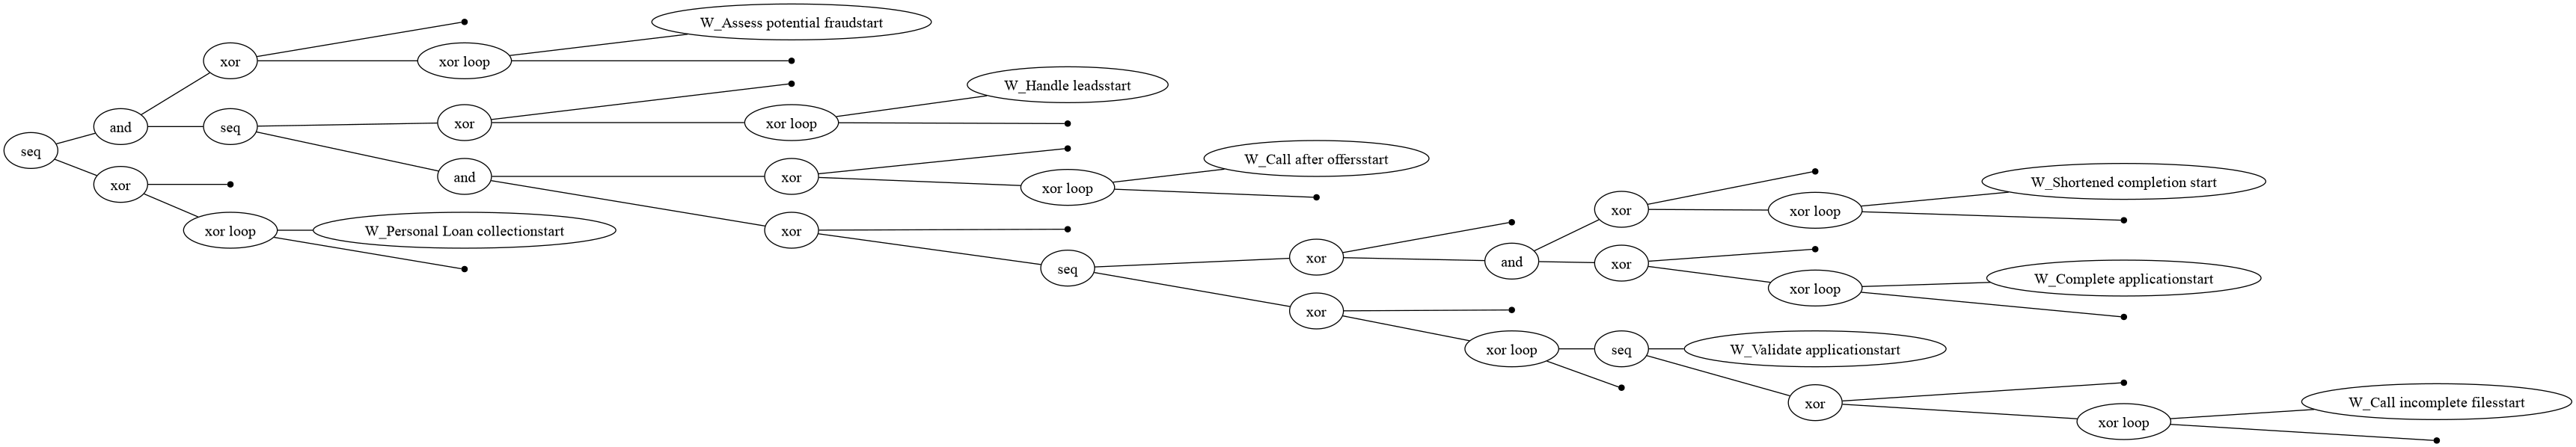

In [69]:
pm4py.view_process_tree(net)data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAADXMAAAJWCAYAAACgKfVNAAAABmJLR0QA/wD/AP+gvaeTAAAgAElEQVR4nOzdeXQUZeLu8aez7wsJCQkkaUIgkLAIakBANgEVd0Qd7gAqLozOODqOx5/bKC6j44aijgMeQQRxAxXBH44aNAjIIiBLAoHsCVkJdLqzkvX+ce2+CQkQIFABvp9z6lS6qrrqeYvqBjk8vqampqYmAQAAAAAAAAAAAAAAAAAAAAAAAADOpDVORicAAAAAAAAAAAAAAAAAAAAAAAAAgAsBZS4AAAAAAAAAAAAAAAAAAAAAAAAAOAsocwEAAAAAAAAAAAAAAAAAAAAAAADAWeBidAAAAAAAAGCMqqoqHTlyRJLU0NAgm83m2FdeXq76+voWx1dUVKiurq5d57bZbGpoaGjXsU5OTvL392/Xsa6urvLx8WmxzcXFRb6+vo7Xfn5+cnZ2liS5u7vLy8urXecGAAAAAAAAAAAAAAAAgDONMhcAAAAAAAapqalRVVWVysrKVFlZqaqqKpWXl6u6ulo1NTWOdfOfq6urdeTIEUcRq/m6trZWlZWVjrUkxz47i8Vi4IiNFxgY6PjZy8tL7u7ukiRvb2+5ubk51vZ99rWnp6c8PDxarY/e5uPjI29vb3l7eysgIEBeXl7y8PAwcMQAAAAAAAAAAAAAAAAAOhNTU1NTk9EhAAAAAAA4V1RXV8tqtaqsrExlZWWOn61WqywWiyoqKlRVVaWKigpZrVZVVVW1KGxVVlY69jU2Nh73WvYyUfOSkbe3t2N2qqPX9hmqms9UdTKzVh2r6GTX1qxYJ8re3ntaU1PTrmPbmh2seXlNRxXW2jv7mP1n+9p+Hfu6eUmu+br5+Y/FPvOYj4+PvLy85OPj4yh6eXl5tdoXGBgof39/BQQEtFp7enq26z4BAAAAAAAAAAAAAAAA6JTWUOYCAAAAAFxwamtrVVpaqkOHDqm0tFQHDx5UaWmpLBZLi6JWW4Wttoo79rJOYGBgi1KOv7+/o7ATEBAgb29veXl5ydfXV35+fo59gYGBjp/9/PxOqgiFzsFe6rLZbI4Cn8Vicfxss9lUXl6uqqoqVVZWqqyszLHParW2KAHan7u2yn5ubm4KCAhoUfBqvtifw+DgYHXt2lXBwcEKCgpScHCw3NzcDLk3AAAAAAAAAAAAAAAAABwocwEAAAAAzn2VlZXKz89XcXGxo6BVUlLi+Ll5aevgwYMqLy9v8X6TyaTg4OBWxZijSzPNyzPNt/n5+Rk2dpy/ysvL2ywUHr3t6OKhxWJRaWmpjv4rH19fX3Xt2lVdu3Z1FLzs65CQEMfr0NBQde/eXd7e3oaNHQAAAAAAAAAAAAAAADhPUeYCAAAAAHReFotFBQUFslgsKiwsVEFBQau1fV9zHh4eCgwMVGBgoMLDwxUWFuZ43db2kJAQubi4GDZO4Eyorq5u8dmxWCwtlqO3FxcXt5gNzP45sn9Wjl7b90VGRvL5AQAAAAAAAAAAAAAAANqHMhcAAAAAwBglJSXKzc1VXl6ecnNzlZOT43h94MABlZSUqL6+3nG8p6enwsLCFBYWptDQUIWHhyskJETdu3dXaGiowsLC1K1bNwUHB8vNzc3QsQHnorq6OpWWlqqoqEgFBQUqKSlxfBYLCgpUXFyswsJCFRYWqrq62vE+FxcXhYSEqEePHoqIiFBERITMZrMiIiIUGRmpiIgIhYaGGjo2AAAAAAAAAAAAAAAAoJOgzAUAAAAA6HhNTU3Ky8tTRkaGcnJyHEteXp7y8vKUk5Ojmpoax/FhYWEtih+RkZGOopZ97efnZ+iYAPx/NpvNUfDKz89vUc60FzSLiopk/2snDw+PFp/vyMhIRUVFKSoqSjExMerRo4ecnJyMHhYAAAAAAAAAAAAAAABwplHmAgAAAACcuoKCAu3Zs0eZmZktltTUVFVWVkqS3N3d1b17d4WFhSk8PFzR0dGOJSwsTFFRUfLx8TF6KAA6WG1trUpLS1VYWOj4bigoKHC8Tk9Pl9VqlSS5ubmpR48eLb4foqOjFRcXp9jYWLm4uBg9HAAAAAAAAAAAAAAAAKAjUOYCAAAAABxfeXm59u7dq127dmnPnj3at2+f0tPTlZ2drdraWklSYGCgYmJi1KtXL8XExCgmJka9e/dWTEyMQkJCjB4CgE6qpKREGRkZSktLU3p6eovFYrFIvxe9zGazYmJiFBsbq7i4OA0YMEBxcXHy9fU1eggAAAAAAAAAAAAAAADAyaDMBQAAAAD4f2pra7V3716lpKRo9+7dSklJUXJysrKzs9XU1CQvLy/HLDn2opZ9CQoKMjo+gPPMoUOHWhW8UlNTtXfvXlVWVspkMslsNis+Pl79+/dX//79FR8fr379+snd3d3o+AAAAAAAAAAAAAAAAEBbKHMBAAAAwIWourpav/32m3799Vdt2bJFv/32m9LS0lRfXy9XV1fFxsYqPj5eAwYMcKx79uwpJycno6MDuMA1NjYqKytLycnJSklJccwamJqaqrq6Orm4uCgmJkaDBw9WQkKCEhISNHjwYHl6ehodHQAAAAAAAAAAAAAAAKDMBQAAAADnu8bGRu3du1dbtmxxLLt371ZdXZ2CgoKUkJCgIUOGOIpbsbGxcnV1NTo2AJyUuro67du3zzG74Pbt27VlyxYdOnRIrq6u6t+/v4YOHeooePXt21fOzs5GxwYAAAAAAAAAAAAAAMCFhTIXAAAAAJxvGhoatH37diUmJmrNmjXasmWLysvL5enp2WKmmksvvVQxMTFGxwWAMyojI8NRZP3111+1fft2VVdXy9fXVwkJCRo3bpwmTJigIUOGUO4CAAAAAAAAAAAAAADAmUaZCwAAAADOBxkZGUpMTNQPP/ygn376SYcPH1ZYWJjGjx+vESNGKCEhQQMGDJCLi4vRUQHAUPX19UpOTtbmzZu1YcMGJSYmqrCwUIGBgRo3bpzGjx+v8ePHU3YFAAAAAAAAAAAAAADAmUCZCwAAAADORfX19frpp5/05Zdf6rvvvlNWVpZ8fHw0evRoRxGhf//+RscEgHNCSkqKEhMTlZiYqKSkJFVUVMhsNuvKK6/UzTffrDFjxsjV1dXomAAAAAAAAAAAAAAAADj3UeYCAAAAgHNFU1OT1q5dq8WLF+vrr7/W4cOHNWTIEF177bUaP368hg0bRtkAAE5TXV2dNm/erMTERH3zzTfatm2bunTpohtuuEHTp0/X6NGj5eTkZHRMAAAAAAAAAAAAAAAAnJsocwEAAABAZ1dcXKz58+dr0aJFysrK0qWXXqpbb71VN998s3r27Gl0PAA4r2VnZ+uLL77QZ599pl9//VVms1l33HGH/vSnPyk0NNToeAAAAAAAAAAAAAAAADi3UOYCAAAAgM4qLS1Nr776qpYsWSIfHx/NmDFDM2fOVHx8vNHRAOCClJKSog8++ECLFy+WzWbT9OnT9eijj6p3795GRwMAAAAAAAAAAAAAAMC5YY2T0QkAAAAAAC0dPnxYDz30kOLj47V27Vq9+eabys3N1euvv35eF7mSkpJaLCkpKZKkdevWtdpXXl7ueN/OnTtb7LPZbKed5cCBA6d9Dpx5zzzzjEwmk/73f//3pN734Ycfavjw4TKZTNq6dWu73/fmm2+qX79+iomJkclk0sSJE1VTU3MKyU9PY2OjXnvtNfXv318mk0llZWVnPcOFKj4+Xq+99ppyc3P11ltvad26dYqPj9df//pXHTp0yOh4AAAAAAAAAAAAAAAAOAdQ5gIAAACATiQxMVEDBgzQRx99pFdffVUpKSmaNWuWPD09jY52xt19990aO3asxo4dq2uuuUZLly6VJD355JO64oorHPv+/ve/q6CgwPG+999/XzfeeKPGjh2rP/zhD8rLyzutHE1NTbrqqqu0d+/e0x7ThaKkpMSQa0ycOFE33nijBg0adFLn2rNnz0k/J8uWLdO8efO0e/dupaWl6b333lNgYKDq6+tP6jwdwcnJSTt27FB+fv4pvf9M/Xqdjeegs/Dw8NC9996rPXv26P3339fy5csVFxd30sVCAAAAAAAAAAAAAAAAXHgocwEAAHRSu3fv1pQpUxQREaGYmBjdfffdzBQDnOfmzp2riRMnasyYMcrIyNCDDz4oFxcXo2OdNenp6frzn/8sSXruuef04osvSpJ+/vlnrV69WiaTST169NC2bdsUGxvreN/bb7+td955RxdddJFycnJOe/ay1atXKyUlRXPnzj3NEV0Y6uvr9dRTTxlyjREjRuirr75Sjx49Tup8L7/8sv7yl7+c1HveeecdDRo0SC4uLjKZTLrnnnv02WefycfH56TO01E++ugjTZky5aTfd6Z+vc7Gc9AZOTk5acaMGUpNTdXEiRN13XXXac6cOUbHAgAAAAAAAAAAAAAAQCdGmQsAAKATWrZsmQYPHqyvv/5aBw4cUEZGhhYvXqzY2Fht3brV6HgAzoAlS5bob3/7m1577TUtXbpU/v7+RkcyxLPPPitXV1etWLGixfYrr7xS11xzjQ4cOKANGza0et+SJUv0yCOPyN3d/bQzvPXWW4qOjtbixYt16NCh0z7f+e6VV15Rbm7uOXcNLy+vkzp+9+7d8vDw6NAMp+tkx6Az+Ot1Np6DzszPz09LlizRnDlz9Mgjj+iDDz4wOhIAAAAAAAAAAAAAAAA6KcpcAAAAnUx1dbXuueceNTY2qr6+3rG9rq5OR44c0d13321oPgAdz2Kx6OGHH9bf/vY3Pfzww0bHMVRQUJAmTZqk9evXKz09vcW+YcOGSZIWL17cYntxcbG2bt2qyZMnn/b1t2/fruDgYD3yyCOqrq7W/Pnzj3t8Tk6O9u3bJ0kqKSk56f36fUayjRs3ymKxnLFrNFddXe24t6Wlpdq6dasqKiqOeXxhYaE2bdrUZlFn5cqVevrpp3X48GElJSW1WTg+3vhqa2u1Z88e6fff57Zu3aq8vLyTukZmZqZsNlurc1ssFm3dulU7duxQXV1dq/0mk+mYY25u586dSkpKks1mU3FxsZKSkloUCuvq6hxjyM/PV2ZmZrty5OTkKCkpSUlJSS3ugX3bzz//3Gae/Px8bdq0SRUVFcccw7GeiRPdyxPds2ONtT3PwYXioYce0iOPPKJHHnmEMigAAAAAAAAAAAAAAADaRJkLAACgk9m0aZOsVquamppa7WtoaNDOnTtVVFRkSDYAZ8aPP/4oq9Wq2bNnGx2lU5gxY4Yk6aOPPmqx/fvvv5efn5+WL1/eomjy+eef65ZbbpGnp+dpX/u1117TAw88oOnTp8vPz0///ve/2yy1NDU1acaMGRo9erSmTZumP/3pT3rqqafavV+SUlNTlZCQoFtuuUW33nqrunXrpjlz5nToNZpLTk7WzJkzFRoaqn/961966aWXdNVVV2nChAnq2rVrq5mEioqKdO2112ro0KG69957FR0drcsvv9xR4NmzZ4/mzp0rZ2dnpaena/bs2Zo3b167xpeXl6e//vWvCg8P11//+ld9//33mjhxoqZOnaqoqCi98847J7zGhx9+qJEjR6pXr16OgpH9vjz00EOKiIjQrFmzNHbsWIWHh2vdunXtegaOtnjxYs2ePVsNDQ3asWOHZs+erVdeeaXFGO6//3598803GjJkiPr06aPU1NQT5khKStKUKVM0duxYPffcc5Kkqqoq3XnnnRo7dqwmTpzYIofFYtENN9yg+Ph4zZo1S3369FFKSkqLY473TBzvXp4o6/HG+uWXXx73ObgQPfPMM6qsrFRiYqLRUQAAAAAAAAAAAAAAANAJuRgdAAAA4EJWX1+vjIwMJScna+/evUpOTm7XLA6HDx9Wt27dzkpGAGdefn6+goKC5Ovra3SUTuHaa69Vly5dtGTJEkfBLTs7WwEBAbr11lv1/vvv67///a+uu+46SdKnn36qN95447Svm5ubq+zsbMcMYLfffrvefvttff755/rjH//Y4tivvvpKOTk5yszMlJOTk3bv3q0pU6a0e7/FYtHVV1+tBQsWaNy4caqvr9ctt9yiRx55RMOHD9ewYcNO+xpHS0tLU2pqqsrLy7Vx40bdf//9evzxx2WxWDRu3DjdfffdiouL09ChQ3XkyBFNmDBBQ4YMUXZ2tpycnLRhwwZdddVVGjNmjHbu3Km4uDitWbNGPXr0UP/+/fXf//633eNzcnJSVlaWDh06pH379slqteqnn35SY2OjLrvsMj399NP6y1/+ctxr7Ny5Uzk5Oa3GaS8X/fDDDxo/frxKSkrUs2dP/fOf/2zx/vZ6/fXXJUkuLi666qqrtGjRIknShg0blJWVpdLSUuXn58vT01M//vijZs+erbCwsBPmuP3223XJJZeof//+jmv5+/srPT1dgwcP1v79+x3bGxsbdf3116uyslIZGRkKCgrShg0bNH78+BZZj/dMHO9enihrbm7uMcd6xRVXaPLkyW2e90Ll7e2t0NBQHThwwOgoAAAAAAAAAAAAAAAA6ISYmQsAAOAsaGhoUFpamr766iv985//1NSpU3XRRRfJ29tbffv21a233qpFixappqamxT/qbourq6siIyPPWnYAZ97AgQNVVFSk5ORko6N0Cm5ubrrtttuUmZmpDRs2SJI++eQTTZ8+3TFr18cffyz9XsCy2WxKSEg47eu++eabuv/++x2v//znP8tkMrVZFEtNTVVWVpaysrIkSQMGDNCTTz7Z7v0LFixQUFCQnJyclJSUpPXr1+uyyy5TU1OT5s+f3yHXONpNN92kVatWSZIuu+wyDRkyRJIUGBiof/3rX2psbNR7770nSVq4cKGSk5P1zDPPyMnp//3VwYgRI/TEE08oLy9Pc+fOPe69PNH4EhIStGrVKgUHBys2Nla33HKLJMnJyUmXXHKJLBaLqqurj3uNOXPm6IEHHmi1vV+/frr11ls1dOhQqVmxprS09LjnO1kjRozQqlWrFBoaKg8PD11xxRWKj4/XsmXL5O/v364c8fHxcnFp+f/ZcXZ2Vr9+/Vps+/jjj7V+/XrNmTNHQUFBjutPmjSpxXEn+0zYnSjricaKllJTU5WXl6dBgwYZHQUAAAAAAAAAAAAAAACdEGUuAACADlZQUKDExETNnTtXs2bN0siRI+Xn56c+ffpo8uTJ+ve//63S0lKNHj1ab7/9ttatWyebzab09HStWLFCc+bM0eDBg+Xq6trq3K6urpo6dap8fHwMGRuAM2PUqFEaOnSo7rnnHlVWVhodp1OYPn26JGnJkiWS5JiJ6/LLL1d0dLRWrlypyspKffrpp7rjjjtO+3pWq1VLly5VSEiIkpKSlJSUpMLCQvXt21fbtm3TunXrWhw/evRo5efnq1+/fpo2bZo2b97sKJq1Z/8vv/yivLw8zZ4927GsXr1ao0ePlp+fX4dcoy32cx9t5MiRkqQ9e/ZIklauXClJMpvNLY6bPHmyJCkpKem412nP+PR7aeho9t//GhoajnsNSW3OZhcXF6fPPvtMBw4c0KxZsxQTE6Pi4mLV19ef8HynwsPDw1GwOpUczs7Ord579J8Bli9fLpPJ1Kq0GBER0eL1qTwTJ5P1WGPF/1dVVaW77rpLF198scaNG2d0HAAAAAAAAAAAAAAAAHRClLkAAABOUVulLR8fH3Xv3l0TJkzQyy+/rMzMTF188cV64403tG7dOpWXl6ugoEA//PCD5s6dq3vvvVcjR45s8Y/ZTSaTvvzyS/Xt21dOTk5yd3eXu7u7JGnMmDF6++23DRw1gDPByclJixYtUmZmpq655hqVlJQYHclwl112mXr37q3PP/9c27dvV9++fR3fhdOnT1dVVZVWrFihL774QtOmTTvt682fP18+Pj568cUXWxSQ7KWaN998s8Xx9pmKevbsqaVLl2rYsGG68847HeWXE+0vLy9X7969HcWx5ot91qvTvUZbTCZTm9u9vb3l7e3tmCXKYrFIUqvZrOzlocbGxuPez/aMryO0NZ76+no9+OCDGjNmjAYNGqS0tDT17t27w67ZXh2ZIzc3V05OTm0WvZs7lWeio7NeyA4ePKhrrrlGaWlp+vDDDx2z2gEAAAAAAAAAAAAAAADN8a9KAAAATuBkSltz5sw5bmmrvTNqmc1m7dixQ8uXL9fDDz+sJ554QmvWrNH3339/zFlVAJzb+vbtqx9//FF5eXkaOHCgVqxYYXQkw02fPl0Wi0UzZ850zNQlyTHT0L/+9S+FhYUpNDT0tK5TV1enefPm6bvvvmtVPNq4caPCwsK0YsUKZWVlOd5TVFSkSZMmac+ePfrss88UGxurRYsWaeHChe3a36NHD23atEk//vhjqzz2Mt/pXuN4jp71ymKxqLKyUvHx8ZKk2NhYSdLGjRtbHGe1WiVJQ4YMOe752zO+M+W5557Tf/7zH61bt07333+/YbNZnm6O5oW5Ll26qKGhQfv37z/usaf6THSWe3YuW7lypQYNGqScnBytWbNGcXFxRkcCAAAAAAAAAAAAAABAJ0WZCwAA4HdtlbZ8fX2PW9qy2WynVdo6HicnJ91000168cUX9fTTT2vcuHEdMk4AnVd8fLx+++03XXXVVZo8ebLGjh2rzZs3Gx3LMNOnT5fJZFJ5eblGjhzp2B4dHa0RI0YoOTlZd95552lf56233tI111yjmJiYVvu8vLz01FNPqbGxUU8//bRj+4IFC/TLL7/I2dlZt956q7Zt2yZ/f38VFBS0a//kyZPV0NCgSZMm6W9/+5tWrFihZcuW6dFHH9Ubb7zRIdc4nrS0tBavFy9eLJPJpJkzZ0qSZs2aJUl69dVXW5SKkpKS5OrqqnvvvdexzdnZWXV1dZKk4uJiNTY2tmt8kmSz2VRTU9Miy5EjRyRJVVVVx72GJFVWVkqSqqurHceuX79eAQEB6tOnj2NbQ0OD4z21tbUtzt/8Osdy5MgRNTQ0yGaztdpXW1vbagwnk8PT01NFRUWOY+rq6pSdna26ujpt2rRJhw8f1vXXXy9JevHFF9vMt3HjRpWUlLTrmWjrXrY367HGeqzzXgi2bNmicePG6cYbb9QVV1yh3377TQMGDDA6FgAAAAAAAAAAAAAAADox59mzZ882OgQAAMDZVFBQoM2bN2vVqlX64IMP9PLLL+uhhx7SSy+9pCVLljiKE/Hx8brtttv05JNPau7cuXriiSc0Y8YMXX311br44osVGRkpd3d3o4cD4Dzj7u6uG2+8UVdeeaW+/fZbPfPMM/rpp58UFBSkmJgYOTldOP9PjoCAAK1Zs0Y33nijxowZ02JffX29tmzZonnz5p3yPSkqKtI777yjp556Sn369FFwcLCioqJaHJORkaGff/5Z69at065du1RUVKSQkBBlZmbq+eefl9VqVVVVlVatWqUNGzbozTffVHBwsNatW3fc/bGxscrNzdXWrVu1adMmffbZZ1q2bJksFos++OADeXh4nPAcJ9rflsbGRj3//POqrq5WWlqaXFxctGLFCv3jH//QY489pmnTpkmSIiIiVFVVpU8//VS//fabfH19tWbNGj322GN6+eWXNWnSJMc5v/zyS+3YsUO9evXS6tWrNXbs2BOO78iRI5o3b55WrFihgwcPymw2q2fPnvr+++/16quvqqKiQvX19RowYID8/PzavMamTZv00ksvqaioSBUVFRo0aJCCg4O1Z88e/fDDDyorK1NFRYXeffdd7dq1SwcPHlRAQICcnZ2Vn5/veK/FYlF8fPwxZ3jbvXu3nn/+eW3dulWFhYWKioqSk5OTXFxc9NZbb2nFihWqqanRDTfcIJPJJC8vL0lqV47w8HCtX79ea9askb+/v/Lz87VgwQLZbDZlZGRo4cKFGjhwoGbMmKGff/5Z33zzjZKTk+Xq6qpVq1Zp+fLlKi0t1ccff6wePXqotrb2hM9EW/fyRFmtVquWL19+zLEe67znq8bGRn3zzTeaNWuWnnrqKYWFhenTTz/Vgw8+KA8PD6PjAQAAAAAAAAAAAAAAoHPLoswFAADOWxaLRdu2bdNXX33VrtLW3//+d73++ut67rnnNHPmTF133XUaNmwYpS0AhujRo4fuuusujR49Wtu2bdPzzz+vBQsW6NChQ4qIiFBQUJDREc8KPz8/XXnllerSpUuL7b169ZKPj49GjBhxyufesmWLFixYoIiICFmtVmVnZ+vGG29scczKlSu1atUqmc1mmc1mlZaWymq1aujQoXr99de1e/duffrpp9LvM2XFxsZKv884dbz9knT99dc7Xvfu3Vu33367Fi5cKF9f33adoz3XOJq9zDV16lQNHTpUH374oQ4fPqzZs2frvvvua3HshAkTlJCQoP379yspKUl1dXV6/fXXHbNE2Q0fPlwHDhzQoUOH9PjjjzvKLMcbX1pamt544w2ZzWb16NFD27dv15gxY/TEE08oODhYZrNZRUVFMpvNio2NbfMaL774osrLy2U2m1VVVSUPDw8lJCRoxIgRamho0P79++Xl5aV//OMf6tatm6qqqnTddddp+PDhmjNnjg4fPiyz2ayamhrV19dr1KhRbd6zd999V1u3bpXZbFa3bt20bds2VVZWKjg4WP/5z39kNpsVEhKib775RgMHDlRkZKQktSuHJI0fP17l5eXaunWrfH199Y9//EOFhYUaPXq0Fi1apJEjR8rZ2VlTp05VQECA9u/fr/T0dF199dWKiYnRoEGDtHDhQk2aNKldz0Rb9/JEWX19fY871uM9B+eTtLQ0zZkzR3feeafee+89xcXFad68eXrhhRcUERFhdDwAAAAAAAAAAAAAAACcG7JMTU1NTUanAAAAOB0Wi0UpKSnas2ePY71z504dPHhQkhQYGKi4uDjFx8c71gMHDlRISIjR0QGg3dLS0rRo0SItXrxYBw4c0JAhQzRlyhTdfPPN6tOnj9HxcI6or6+Xq6ur7rrrLr3//vtGxwE6vfT0dC1fvlzLly/Xtm3b1L17d82YMUN33HEH370AAAAAAAAAAAAAAP9z8hYAACAASURBVAA4FWsocwEAgHNGW6WtXbt2qaSkRDpGaWvAgAEKDQ01OjoAdJiGhgb99NNPWr58ub766iuVlJQoNjZW48eP1/jx4zVmzBgFBAQYHROdVEVFhXx9fTVt2jQtWbLE6DhAp2O1WpWUlKTExEQlJiYqNTVVXbt21U033aQpU6Zo3LhxcnZ2NjomAAAAAAAAAAAAAAAAzl2UuQAAQOdzKqWt/v37q1u3bkZHB4CzqqGhQevWrdN3332nxMREbd++XSaTSZdeeqmuuOIKjR8/XsOHD5ebm5vRUc+qlJQUx+yMx9O1a1fFx8eflUydwb59+zR//ny98cYb6tq1q959911de+218vDwMDoaYJja2lpt3LjRUd7aunWrGhsbNXjwYI0fP15XXnmlRo0aRYELAAAAAAAAAAAAAAAAHYUyFwAAME5bpa3du3eruLhYOkZpKz4+XmFhYUZHB4BO6fDhw/rxxx8dpYSMjAx5e3vrkksuUUJCgmOJjIw0OuoZ9cwzz2jt2rUnPG706NF69tlnz0qmzuCdd97R8uXLW2z79NNPKUPjgpKXl6ctW7Zo8+bN+vXXX/Xrr7+qsrJSvXr10vjx43XFFVdo3LhxCgoKMjoqAAAAAAAAAAAAAAAAzk+UuQAAwJnXVmkrOTlZRUVF0u+lrejo6BbFrUsuuYTSFgCcpqysLP3444/auHGjtmzZoj179qihoUHdunVzFLsuvfRSJSQkKCAgwOi4ANChysrK9Ouvv2rLli3asmWLfv31VxUWFsrZ2VlxcXFKSEjQZZddpnHjxqlnz55GxwUAAAAAAAAAAAAAAMCFgTIXAADoOBaLRZmZmUpJSdG2bdsc5a3CwkJJUkBAgHr16tVqtq3o6GijowPABaGiokLbt293zEqzZcsW5ebmymQyKTo6WgMGDFB8fLxjHRsbK1dXV6NjA8Bx1dXVad++fUpJSdHu3buVkpKi5ORkZWRkqKmpSZGRkbr00ks1dOhQJSQk6OKLL5aPj4/RsQEAAAAAAAAAAAAAAHBhoswFAABOXllZmTIyMlrNtpWZmSlJ8vf3V0xMDKUtADgHFBUVacuWLdqxY4eSk5OVnJystLQ01dfXy9XVVbGxsY6CV1xcnAYMGKCePXvK2dnZ6OgALjANDQ3KyspScnJyi+LWvn37VFdXJxcXF8XExDgKqYMHD1ZCQoK6detmdHQAAAAAAAAAAAAAAADAjjIXAAA4tlMtbfXs2VMmk8no+ACAU1RXV6f9+/e3+O5PSUlRamqqGhsb5erqqoiICEVHR7dY4uLiFBsbKxcXF6OHAOAcVlBQ4PgzZ/Nl7969qqqqkiSFhYW1+PNnXFychgwZIi8vL6PjAwAAAAAAAAAAAAAAAMdDmQsAAEhWq1Xp6emtSltZWVlqamqSn5+fevfuTWkLAC5w2dnZ+vnnn7V9+3bt27dP2dnZKikpkc1mU319vSTJ1dVVZrNZMTExiomJUe/evdWzZ09FRkYqIiJCgYGBRg8DgMHKysqUl5ennJwcZWdnKy0tTenp6UpPT1dWVpbq6uokSV26dHF8l9i/T/r06aO4uDj5+PgYPQwAAAAAAAAAAAAAAADgVFDmAgDgQkJpCwBwLPX19crPz1dubq6ys7OVm5vbYsnKylJ1dbUkyWQyqVu3bjKbzYqMjFRkZKQeeOABFRUVOQoZzcsZBw8edFzHx8dHkZGRioqKUkREhCIiIhzniIyMVI8ePeTm5mbgnQBwOmpra3XgwAFHWSs3N1d5eXnKy8tzfJ+Ul5c7ju/atat69eql3r17tyhuxcTEqEuXLoaOBQAAAAAAAAAAAAAAADgDKHMBAHA+stlsSktLO2Zpy93dXb169WpR2IqLi1O/fv3k5ORkdHwAwBlw5MgR5efnKzMzUwUFBSosLFRmZqZjyc3Ndcyu5ebmph49eigsLEzh4eGKjo52LGFhYTKbzfL29m73tauqqpSTk9Oi0GF/bS96HDlyRGpWFIuIiFBoaKjCw8PVrVs3devWTeHh4QoJCVH37t0VGhpK6Qs4i2pra1VSUqIDBw6opKREBQUFKioqUlFRkQoLC1VUVKS8vDwVFRXJ/ldN7u7ujtJmRESEzGZzq9deXl5GDw0AAAAAAAAAAAAAAAA4myhzAQBwLjty5IjS09O1bdu2FqWt7OxsNTY2ys3NTTExMZS2AOACYLFY2ixq2V/bC72S5OHh0WZJy74tKipKzs7OZzV/UVFRqxl87IWR4uJiFRQUqKysrMV7goODFRoaqrCwMIWFhTkKX0FBQQoODlZQUJC6du2q4OBg+fr6ntXxAOeCiooKlZaWqqSkRIcOHVJpaakOHTrUoqhl/wyWlpa2eG9AQIDCwsIUGhqq7t27KyQkRJGRkS3KWmFhYYaNDQAAAAAAAAAAAAAAAOikKHMBAHAuqK2tVVpaWovCVkpKilJTUyltAcAFoK6uTgcPHmw1m5a9qLV//36Vl5c7jg8MDGyzpBUdHa1evXopICDA0PGcqpqaGke5pKSkRPn5+Y51cXGxCgsLVVhYqEOHDjlm+rJzd3dvUfIKCQlx/Nx8e3BwsAICAuTv76+AgAC5uLgYNl6gverr61VWViar1aqysrIWxazm66NLW8f6nNgLkvbZ8ZoXtuyz5Xl4eBg2XgAAAAAAAAAAAAAAAOAcRpkLAIDOhNIWAFyYampqVFBQ0KqkZX+dm5ur+vp6SZKbm5t69OjRqqRlL2717NlTXl5eRg/JcMeacehYpZZDhw6prq6u1Xl8fHxalLuaL0dvCwwMVEBAgLy9veXp6Sl/f3/5+PjI1dXVkHuAc0NdXZ0qKipks9lUVVWlyspKlZWVyWKxqKysrEVJq/nSfFtFRUWr87q4uLQoKdpLjEeXF5uXG318fAy5BwAAAAAAAAAAAAAAAMAFhDIXAABGOFFpy9XVVb17925V2urbt6+cnZ2Njg8AOEkWi6XNkpZ9W1FRkez/aebh4dFmScu+zWw2U+A9Q6xWqw4dOtRmeeZEZZqysrJjntfV1VU+Pj7y8/OTl5eXvLy8FBgYKC8vrxalLy8vL/n4+Mjf319OTk4KDAyUfp9pTZICAgJkMpmOuUbHa2pqUllZ2THX+v3zbV83NjbKarWqoqJCVVVVLUpaVVVVslgsqqqqUnV1teO4tkqEdscqDra1rfnroKAg+fv7n7X7BAAAAAAAAAAAAAAAAKDdKHMBAHAmHau0tW/fPjU0NFDaAoDzQF1dnQ4ePNhmSauwsFD79u1rMWtOYGDgMYtaMTExFDDOYRaLRVarVZWVlaqqqmpV6rFarY5ST1lZmeO48vJylZeXt5iVqaGhQVar9aSuf3S5y14K0+8zjNlnCLOXy+yaH+fh4SFPT09JcpyrLc3fczztmZnMPjPVidiLUm2xWq1qbGyUJFVXV6umpqbN9zQvTzW/7vHKWu3VvIRnL+35+fnJ19dXXl5e8vb2VkBAgGNfWyU++z77TG8AAAAAAAAAAAAAAAAAzjuUuQAA6Ah1dXXav3//cUtbERERLQpbF198MaUtADgHVFdXtyhqHT27Vk5OjhoaGiRJ7u7u6t69e6uSln2JiIg4YbEFaM5eRjrRDFHHminKzmazOZ7TmpoaVVdXS81KTHaVlZWqra2VJNXX16u8vLxVpvaWr06mEHW65TBfX1+5uLhIktzc3OTt7e3Y13zmMk9PT3l4eEiSnJycWpQn2zsD2tFlufZmBwAAAAAAAAAAAAAAAADKXAAAnKS6ujrl5eUpJSVF27Zta1dpKz4+Xv3795e7u7vR8QEAbbBYLMcsatlf2wUGBrZZ0rJvM5vNlDoAAAAAAAAAAAAAAAAAAMCxUOYCAKAtzUtbzWfbSk5O1pEjR+Ti4qLIyMhWpa34+HjHbA8AAOPV1tbqwIEDrUpa9qJWTk6OKisrHccHBga2WdKKjo5W79695efnZ+h4AAAAAAAAAAAAAAAAAADAOY0yF4BzT3V1tQoKCnTo0CHZbDY1NjbKarVKkvz9/eXk5CQ/Pz8FBQUpPDxcnp6eRkdGJ1ZfX6/c3NxWpa2UlBTV1NRQ2sIZV1lZKavVKqvVqqqqKlVUVKiurk6S1NTUpLKyMsexTk5O8vf3d7z28PCQp6enfH195e/vLz8/P77zcMGprq5us6Rl35adna3GxkZJkru7u7p3796qpGVfIiMj5eLiYvSQAAAAAAAAAAAAAAAAAADA+YsyF4DOq7i4WJs2bVJKSop2796tvXv3Kjc3VxaL5aTOExgY6CjjDBgwQPHx8Ro6dKhCQ0PPWHZ0Pqda2oqLi6Mcg5N25MgRZWVlKTMzU8XFxTpw4IBKSkp04MABFRcXq6SkRBaLRVarVQ0NDR16bTc3N/n7+yswMFAhISEKDw9XWFiYYwkPD1fPnj0VFRVFaQXnBIvF0mZJKzMzUxkZGS0Kj4GBgW2WtJo/+yaTydDxAAAAAAAAAAAAAAAAAACACxplLgCdR2Vlpb799lslJiZq7dq1Sk1NlclkktlsVnx8vPr376+oqCh1795d4eHh6tq1q3x9fWUymRQQECBJKisrU1NTk2w2mw4ePKjCwkLl5+crJydHycnJSklJUXZ2tpqamtSvXz+NGjVKEyZM0FVXXSVvb2+jbwE6wLFKW3v27FF1dbWcnZ0VFRXVqrTVr18/eXl5GR0f55ji4mLt2rVLu3btUnp6umPJzc11zATk7e2tHj16KDQ0VOHh4erWrZtCQkLUpUsX+fn5yc/PzzGrlo+Pjzw9PVvM+mafcVC/P9/l5eWOfZWVlaqtrZXNZpPVam2xtlgsKi4uVkFBgYqKihwlmJqaGkmSq6urzGazevXqpZiYGMXGxmrAgAEaNGiQ4zsVONOOHDmi/Pz8ViUte3ErOztbVVVV0u/PbHBw8DGLWn369JGvr6/RQwIAAAAAAAAAAAAAAAAAADgeylwAjFVTU6Ply5dr2bJl+uGHH1RbW6uhQ4dq1KhRGj16tEaMGNHh/zDbZrNpw4YN+vnnn7V27Vpt2bJFbm5uuvLKK3XLLbfo5ptvlru7e4deEx3vRKUtSQoLC2s1y9aQIUMobeGUFBQUaP369dq6dat27typXbt2qaioSJIcRZKYmJgWS3R0dKcrlxw+fFgZGRktymdpaWnat2+fDh8+LEmKiorSoEGDNHDgQA0dOlTDhw9Xly5djI6Oc5DFYmlV1Gr+Ojs721F89PDwaFHUOnqGrcjISGaTAwAAAAAAAAAAAAAAAAAA5zrKXACMkZ6ernnz5mnRokWy2WyaMGGCJk+erOuvv15du3Y9q1kOHjyolStX6ssvv9QPP/wgf39/3XHHHfrTn/6kXr16ndUsaFtBQYGjsLVt2zbt2bNHe/fudczW0lZpa/Dgwcy2htOSmpqqtWvXasOGDVq/fr2ysrLk4uKi/v37a+DAgRo0aJBjCQ4ONjpuh8jLy3PMNLZjxw7t3LlT+/fvlyTFxcVpxIgRGjlypMaMGaOIiAij46ITsFgsrWbTshe10tPTZbVaHccGBga2WdKybwsLC5PJZDJ0PAAAAAAAAAAAAAAAAAAAAGcYZS4AZ1dmZqZefvllLVy4UKGhoZo2bZr+/Oc/d5pSQFFRkT788EPNmzdPubm5uvnmm/X8888rNjbW6GgXhOalLfv6t99+o7SFs6K6ulobNmxQYmKivv76a6Wmpsrb21sXXXSRRo4cqREjRujyyy9XQECA0VHPKpvNpi1btmj9+vWOYltNTY2io6N17bXX6rrrrtPll1/OjIbnoSNHjig/P79VScu+5Obmqr6+XpLk6uqq4ODgNkta4eHhio2NlY+Pj9FDAgAAAAAAAAAAAAAAAAAAMBplLgBnR2lpqR577DEtWrRIffr00VNPPaU//OEPcnJyMjpamxoaGvTJJ5/ohRdeUHp6umbOnKmXXnpJQUFBRkc7L7RV2tqxY4cqKyulY5S2LrroIooA6HAVFRX6+uuv9cknnygxMVG1tbUaMmSIrr76al199dVKSEiQi4uL0TE7lZqaGv3888/69ttv9e2332rfvn3y9fXVtddeq6lTp+rKK6+Um5ub0THRDhaLpc2Sln1bVlaW7P+p4OHh0aKodfTsWlFRUXJ2djZ6SAAAAAAAAAAAAAAAAAAAAJ0dZS4AZ1ZTU5MWLFigxx57TB4eHnr55Zc1derUTlviOlpDQ4M+/vhjPfbYYzpy5IhefvllzZw5UyaTyeho54S2Sls7d+5URUWFRGkLBmloaNDq1av18ccfa+XKlaqrq9PEiRM1ZcoUXX311QoNDTU64jklMzNTq1ev1meffaYNGzYoMDBQN998s6ZNm6ZRo0YZHe+CZrFY2ixpZWZmKi0tTTabzXFsYGDgMYta9tcAAAAAAAAAAAAAAAAAAAA4bZS5AJw5paWluvPOO/Xf//5XDzzwgJ599ln5+voaHeuU2Gw2PfPMM3rnnXd09dVX64MPPmCWrmZOpbQ1aNCgc/Z5wLmppKREH3zwgebNm6fc3FxddtlluuWWWzR16lSFhIQYHe+8cODAAX3xxRdatmyZNmzYoNjYWN1333266667KGl2sJqaGhUUFLQqadmX3Nxc1dfXS5Lc3NzUo0ePViUte1HLbDbL29vb6CEBAAAAAAAAAAAAAAAAAABcCChzATgzfvnlF916661ycXHR0qVLNWLECKMjdYj169frj3/8oxobG7Vs2TINGzbM6EhnVVulrV27dqm8vFz6fWaX5oWt+Ph4XXTRRQoODjY6Oi5gqampevHFF/X555/L29tbM2fO1H333afo6Gijo53XfvvtN/373//Wxx9/LDc3N91555169NFHFRYWZnS0c4J9Vq22iloFBQUqKiqS/Y/xHh4ebZa07NvMZvM5MyMmAAAAAAAAAAAAAAAAAADAeY4yF4COt2LFCv2f//N/NH78eH344YcKDAw0OlKHOnz4sGbMmKGffvpJn3zyia6//nqjI3U4i8WilJQUbdu2rd2lrUGDBqlr165GRwccMjIy9Nxzz2np0qXq27evHn74YU2dOlWenp5GR7ugHD58WAsWLNDcuXN1+PBh3X///fqf//mfC/r7oq6uTgcPHmyzpFVYWKj9+/c7vm/1+3duWyWt6Oho9erVSwEBAYaOBwAAAAAAAAAAAAAAAAAAAO1GmQtAx1q0aJHuvvtu3XvvvXr77bfl7OxsdKQzoqGhQffff78WLFighQsXasaMGUZHOiX20lbz2bZ27typgwcPSscobQ0cOFAhISFGRweOyWq16sknn9R7772n6OhoPfPMM7rtttuYmchgNTU1mj9/vl566SVVVlbqf/7nf/Too4/Kzc3N6GgdrqamRgUFBa1KWvbXOTk5amhokCS5u7ure/furUpa9uJWz5495eXlZfSQAAAAAAAAAAAAAAAAAAAA0DEocwHoOCtWrNCUKVP02GOP6YUXXjA6zlnx+OOP67XXXtOXX36p6667zug4x9RWaWvXrl0qKSmRjlHaGjBggEJDQ42ODpyUZcuW6cEHH1RjY6NeeuklTZ8+XS4uLkbHQjOVlZV666239MILL8hsNmv+/PkaOXKk0bFOisViabOk1XybXWBgYKuiVvPXZrOZoiEAAAAAAAAAAAAAAAAAAMCFgzIXgI6xefNmjRkzRnfeeafeffddo+OcVbNmzdKSJUu0du1aXXrppYZmOZXSVv/+/dWtWzdDcwOnq6ysTHfccYdWrlypmTNn6pVXXlGXLl2MjoXjyMrK0v3336/vvvtODzzwgF577TW5uroaHUu1tbUqLS09Zklr3759qqiocBwfGBjYajYte1ErJiZG/v7+ho4HAAAAAAAAAAAAAAAAAAAAnQplLgCnz2azafDgwYqNjdU333xzwc0w0tDQoEmTJikzM1Pbt2+Xr6/vGb9mW6Wt3bt3q7i4WDpGaSs+Pl5hYWFnPBtwtqWkpOimm25SVVWVli5dqtGjRxsdCSfho48+0n333aeLLrpIy5YtO+Pl0urq6mMWtTIzM5WTk6OGhgZJkru7u7p3796qpGVfIiMjmfkNAAAAAAAAAAAAAAAAAAAAJ4MyF4DTd/vtt+v777/Xzp07FRISYnQcQxQVFWnQoEGaNGmSPvjggw47b1ulreTkZBUVFUmSAgIC1KtXrxbFrUsuuYTSFi4Yq1ev1m233XbWikA4M1JSUjR58mRVVFRo9erVGjRo0Cmfy2KxtFnSsi8Wi8VxbGBgYJslLfu2nj17ymQyddAoAQAAAAAAAAAAAAAAAAAAAMpcAE7Tpk2bNHz4cH311Ve64YYbjI5jqK+++ko333yzNm3apISEhJN6r718kJKSom3btjnKW4WFhdIxSlvx8fGKjo4+Q6MBOr/ExERdd911mjp1qubPny9XV1ejI+E0WK1WTZ48WcnJyUpKSlK/fv1aHVNbW6sDBw60WdIqKChQTk6OKisrHccHBga2WdKKjo5W79695efnd5ZHCQAAAAAAAAAAAAAAAAAAgAscZS4Ap2fkyJFydXXVTz/9ZHSUTmHUqFEymUxau3Ztm/vLysqUkZHRaratzMxMSZK/v79iYmJalbaYHQZo6ZdfftHEiRN100036cMPP5STk5PRkdABKisrddVVVykrK0uPP/64srKylJub61jsBVdJ8vb2VlRUlMxmsyIjIx1LVFSUoqKiFB4eLmdnZ0PHAwAAAAAAAAAAAAAAAAAAAByFMheAU7dx40YNHz5cGzdu1LBhw4yO0ymsX79el19+udasWSN/f39KW8AZYLPZNGDAAF100UX64osv5OLiYnQkdCCbzaZRo0apqKhIUVFRrUpa9tdBQUFGRwUAAAAAAAAAAAAAAAAAAABOFmUuAKfunnvu0ebNm7Vr1y6jo3QqgwYNUnp6uqqqquTn56fevXtT2gI60N13362VK1cqOTlZISEhRsc547Kzs/XKK6/o008/1fDhw/XNN98YHemM27t3r4YMGaJ//vOfevjhh42OAwAAAAAAAAAAAAAAAAAAAHSUNUxlAeCUNDQ0aPny5Xr66aeNjtLpzJgxQ88++6yys7MVFRVldBzgvLJjxw4tXLhQy5YtuyCKXJJUVFSk3NxcWSwWo6OcNf369dOTTz6pf/zjH5o5c6YCAgKMjgQAAAAAAAAAAAAAAAAAAAB0CCejAwA4N+3evVtlZWWaMGGC0VE6nSuuuELl5eWy2WxGRwHOO++9955iY2M1efJko6OcNcOGDdOqVavk6elpdJSz6qGHHpKLi4uWLFlidBQAQAfIyMjQ9OnTZTabFRUVpWnTpiktLc3oWAAAAAAAAAAAAAAAAABw1lHmAnBKNm7cKH9/f8XFxRkdpdMZMGCAfH199csvvxgdBTivVFdXa+nSpZo1a5ZMJpPRcc4qk8l0wZW5fHx8NHXqVC1YsMDoKACA07RmzRrFxcXps88+U05OjnJzc/X5558rPj5eP/zww/9l776joyzX9u8f6T0hkEIqSSAGCNKx0AREqfKIuHSjgAIiClJ8YPuwcdNVQGHbQCQbFIlI0a1Ily2IhN5bQoAQSAUDpJHe5vfHS+YlEiRAkiHw/ax1r2Su+57rOq+JzJisOeY0dXkAAAAAAAAAAAAAAAAAUK0sTV0AgJopLi5ODRo0kLl55WdCMzIydPjwYeNtc3NzdezYUceOHVNqaqokqUmTJnJzcytzvwsXLiguLk7e3t7y9/e/Yd7CwkKdOXNGjRs3VlJSkvLz8xUUFFTp9VtYWKh+/fqKi4ur9LmBB9mRI0eUmZmpPn36VOu6R48eVVpamvF2UFCQatWqpUOHDknXQketW7cuc5+CggJFR0ersLBQoaGhsrW1vWHeuLg4ubi4yNHRUceOHVNoaKhsbGxuWsdfBdgqsl5Frzt16pQCAgJkbW2tY8eOycHBQQ0aNLjp2lWpT58+CgsLU1pamlxdXU1SAwDg7hgMBg0ePFhFRUUqKSkxjhcWFsrc3FyDBw9WfHx8lfxeAQAAAAAAAAAAAAAAAAD3IsJcAO7IlStXVKdOnSqZOy4uTs8//7yuXLkiSQoJCVF0dLTmz5+vsLAwOTs7a82aNXriiSckSRcvXtRrr72mY8eOqVatWoqKitLjjz+ub775RkFBQUpISNBHH32k5cuXKzQ0VOPHj9fQoUN15coVnThxQg0bNqz0Pbi5uSkqKkrff/99pc8NPKgiIiJkbW2twMDAal33s88+05IlS1RSUiJra2v9+9//VqtWrfTcc88pLS1Nffr00c8//2y8/quvvtLkyZPl5eWl8+fPKy8vT1OnTtW4ceMkScuWLVNYWJgiIiK0du1aLV26VKtWrdJLL72kZcuW3XZ9t1qvotd9+umnCg8P18GDB7V161a99957SklJ0YkTJ9ShQwf98MMP8vDwuOvH83aEhITIYDBo0aJFCggIqNa1AQCVIyMjQwkJCeWeKykpUVJSko4fP65mzZpVe20AAAAAAAAAAAAAAAAAYAqEuQDckZycHNnZ2VXJ3E2bNtWFCxc0YMAArVq1Ss8884wkqVOnToqPj9eKFSvk4uIiScrPz9dTTz2lli1b6vz58zI3N9fOnTvVvXt3derUSUePHlV8fLzOnTuny5cvKykpSXZ2dtq6daumTp0qLy+vKtmDg4ODDh06VCbgAeDuOTk5/WWHqqqwePFiDR06VE8//bSsrKzUpUsX1a5dW40bN9b48eP17LPPGq9dtmyZRo0apd27d6tp06bKz8/Xq6++qvHjx8tgMGj8+PE6dOiQ4uLiZDAYtHr1ai1btkwNGzYst6PgrVRkvYpet3fvXp05c0aStHXrVv3yyy+ytLTUkiVLNHjwYA0ePFjr16+vxEf21uzt7SVJkydPVl5eXrWuDQCoHMHBwbe8prT7LgAAAAAAAAAAAAAAAAA8CMwMBoPB1EUAqHneeustHT9+XL///nuVrZGfn68uczZ4/wAAIABJREFUXbpo3759mjNnjjZv3qyffvpJ1tbWxmsWLFigESNG6OzZswoKCjKOz5w5UxMnTtSUKVM0depUSVLdunXl7u6u48ePV1nNpTp27KjmzZvrs88+q/K1gAfFf/7zH73wwgvKzc0t8zxQXdasWaO+ffvqqaeekpubm15++WX16NHDeL6oqEj16tXTk08+qaVLlxrHs7Oz5efnp8LCQl24cEGOjo768ssv9eabb+qHH35Qv379KrS+m5ubHnvsMa1bt+621rO1ta1wXaNGjdK8efOUkJAgX19f47WPP/649uzZo7i4uDsKnd2p48ePq2nTpjpx4oRCQ0OrbV0AQOVJTk6Wr6+vbvanBzMzM8XFxcnPz6/aawMAAAAAAAAAAAAAAAAAE9hibuoKANRMbm5uunTpUpWuYWNjo9WrV8vHx0djx47VnDlzbghwrFmzRpIUEBBQZvy5556TJG3bts04Zmtrqzp16lRpzaUuXbpUbWsBD4omTZqopKREhw8fNsn6ffr00cyZM/XLL7+oqKioTJBLkg4ePKjk5OQbno8cHBzUrVs3ZWVl6cCBA9K15yNJd/U8UdH1bqcuZ2fnctdq3769JOnkyZN3XO+dOHjwoGxsbCrU1QUAcG/y9vZWt27dZGVldcM5Kysrde3alSAXAAAAAAAAAAAAAAAAgAcKYS4AdyQ0NFRnzpxRVlZWla5Tu3ZttWrVSjY2Nho+fLiKiorKnE9LS5MkXb58ucx46RtCS0pKqrS+8ly9elVnzpxRkyZNqn1t4H4WEhKixo0ba9myZSaroU2bNvL09NSqVau0cePGMudu9nykKnpOquh6t1OXmZlZuWt5enpKkiwtLSut/or49ttv1aNHD5N0YgMAVJ6lS5eqVatWMjMzk42NjWxsbGRmZqYWLVooPDzc1OUBAAAAAAAAAAAAAAAAQLUizAXgjrRt21ZFRUXav39/la4zevRovfbaa5o7d64iIiI0YcKEMudDQkIkSbt37y4znpGRIUlq2bJlldZXnr1796q4uFht27at9rWB+92QIUMUHh6unJycal/75MmT+vTTT3XixAkFBQVpwIABio+PN56/2fORrj0nWVpa6uGHH660eiq63p3UVVxcXOZ2QkKCdC3IW13OnDmjrVu3atiwYdW2JgCgari7u2vXrl1at26d3nnnHf3973/X2rVrtWfPHmNgGAAAAAAAAAAAAAAAAAAeFIS5ANwRHx8fhYSEaPXq1VW2xgcffKCHHnpIPXr00MiRI/Xiiy9q7ty5WrlypfGa4cOHS5I++uijMh1vtm3bJisrK73++uvGsYKCAuXl5VVZvaVWr16tRo0aycvLq8rXAh40r7zyiiRp8uTJ1bpuUlKSRo8ercWLF8vNzU2rVq1Sbm6unnvuOWOwLDAwUE8//bSOHDmizZs3G+9bUlKiiIgIvfDCC3J3d5euPR9Juq3npNzc3DIhtoqudzt1lTpz5kyZdX/44Qf17NlTdevWvc1H7s6NHTtWISEh6tatW7WtCQCoOmZmZurZs6emT5+uGTNmqFevXjftCAkAAAAAAAAAAAAAAAAA9zOLqVOnTjV1EQBqpqtXr2rhwoUaM2aMLC0tK23erKws/eMf/9BHH32ksWPHKigoSJIUHx+vzZs3a+3atbKwsFBoaKgeeugh5eTkaMWKFTp8+LCcnJy0ZcsWTZgwQbNnz1bPnj2Vmpqqzz77TKtXr1ZeXp7+53/+R2ZmZrK3t6+0mkvl5eXp1Vdf1ahRo9SuXbtKnx940Nnb26tu3br6xz/+oS5duqhevXpVvmZERIT69u2rgIAAPfPMM7Kzs1N2dra2bdumQ4cOaceOHapXr54CAwP1+OOP64cfftDy5cvl4OCglJQUTZo0Senp6Vq+fLns7e21Y8cOzZgxQxcvXlTjxo1Vu3ZteXh43HT9jIwMff7559qwYYMuXryogIAABQcHy8rKqkLrSarwdVu3blVERISioqJkZWWluLg4jR07VleuXNHq1avl4uJS5Y+3JC1evFgff/yxfvzxRwUEBFTLmgAAAAAAAAAAAAAAAAAAAEA1OGdmMBgMpq4CQM2UnJysgIAAffHFF3rttdcqbd5z585p8ODBkqTmzZvrk08+kSQ9/fTTxm42kvTJJ5+oefPmkqQNGzbou+++0+XLlxUUFKShQ4eqVatWkqR9+/bpnXfeKbPGe++9p/bt21dazaW+/PJLjRkzRnFxcdXawQZ40DzzzDM6cuSItm/frsDAwCpda8qUKfr999+l6553vvvuO4WFhRmvuf656vLly/rss8904MAB2dnZqXPnzhoyZIgxMDVixAhFRUUZ79ugQQMtWrTopusfP35co0aNKjO2bNky+fj4VGi9UhW57p///Kfef/99RURE6KuvvlJycrJatmypsWPH/mXgrDLt2rVLTz/9tEaMGKEPP/ywWtYEAAAA7kd5eXnKzc2VwWBQenq6JCknJ0f5+fnGa9LS0m56/+LiYmVmZv7lGo6OjrKysrrp+Vq1ahk7MVpZWcnR0VGS5OLiInNzc9nY2FTJh+0AAAAAAAAAAAAAAHAP20KYC8Bdeeutt/TTTz/p9OnTcnBwMHU5JpWVlaXg4GD97W9/08cff2zqcoD7WmZmpp588kmlpKRo+/bt1dKh60FQGuZKSEiQr69vta9/9OhRde7cWU888YS+//77Su36CAAAANyLCgoKlJaWZjyysrKUnp6u7Oxs5ebmKjMzU1lZWcrJyVFWVpYyMzOVk5OjnJwcpaenKycnR3l5ecrPz1dOTo4kKT09XTXxT76lwS87OzvZ2toag161atWSvb297OzsjN/b29vL2dlZjo6Osre3l6Ojo5ydneXk5KRatWrJ1dVVrq6usrW1NfW2AAAAAAAAAAAAAAD4M8JcAO5OSkqKgoODNWLECM2cOdPU5ZjU//3f/2nhwoWKiYmRm5ubqcsB7nuXL19Wp06dlJeXp9WrV6tJkyamLqnGGz9+vObOnauYmBjVr1+/Wtf+9ddf9eKLL6pNmzZas2aNrK2tq3V9AAAA4G6UlJTo0qVLunz5si5duqSLFy/q0qVLSk1NNQa10tPTywS30tLSjAGsP3NwcJCdnZ0xsGRnZycnJyc5OTnJ3t5eDg4OcnFxkZ2dnezt7WVpaSknJydJkrOzsywsLGRtbW384J3SoJStra3s7OzKrPNX/+9dOld5ru/4VZ6ioiJdvXrVePv6wFlpR7Dc3Fzl5eWppKREGRkZkqTs7GwVFBQoLy+vTGgtNzdXGRkZNw26lcfOzk6urq5lAl7X365du7bc3d3l6ekpDw8Pubu7y83NjQ+WAAAAAAAAAAAAAABUJcJcAO5eWFiY3nzzTf33v/9Vly5dTF2OSfz+++968skntXDhQg0dOtTU5QAPjJSUFD3//PM6fPiwFi9erBdeeMHUJdVIRUVF+umnnzRx4kTFxMRo6NChevvttxUaGlrlaxsMBn300UeaOHGiXnjhBS1evLjMm0sBAAAAU8rIyFBiYqISEhKUlJSk5ORkXbp0qUxgqzTAVVJSYryfhYWF3N3dVbt27RuCRH8OFF1/ODk5ycXFxaR7rqkyMzN19erVckNzNwvTpaam6vLlyyosLCwzl7u7uzHY5enpKU9PT7m5ucnLy0s+Pj7y9/eXt7e36tSpY7L9AgAAAAAAAAAAAABqLMJcACrH888/rz179mjPnj3y9fU1dTnVKj4+Xo899pg6dOiglStXmroc4IFTWFiocePGad68eRo+fLhmzZrFmx9vU1ZWlnr37l1mrHv37powYUKVrpuQkKARI0Zo06ZN+vDDD/X2229X6XoAAADA9bKzsxUbG6u4uDglJiYqOTlZ8fHxSkpKUlJSkuLj45WdnW283sHBQb6+vsaQT926deXh4SE3Nzd5eHiobt26cnNzMwaBzMzMTLo/VNyVK1eUkpJSblDv4sWLxnPJycnKzMw03s/Ozk5+fn7y9vaWn5+ffH195ePjIz8/P/n5+SkoKIjfTwEAAAAAAAAAAAAAf0aYC0DlSE9PV4cOHVRSUqKIiAjVrl3b1CVVi8uXL6tDhw6ytrbW9u3beYMOYEIrV67U6NGjZWlpqc8++0z9+vUzdUm4ieLiYs2bN0+TJk2Sl5eXFi1apA4dOpi6LAAAANyH0tLSFBsbW+5x7tw5lf5p1NbWVt7e3goKCpKXl5e8vb2NX68fA/Ly8pScnKzk5GRduHBBsbGxxu9Lv54/f97Yqc3V1VVBQUHlHv7+/rK0tDT1lgAAAAAAAAAAAAAA1YswF4DKk5SUpHbt2snDw0Pr16+Xu7u7qUuqUikpKerZs6dSU1O1c+dOeXl5mbok4IGXmpqqv//97/r666/11FNPacaMGXrkkUdMXRaus27dOk2ePFmRkZF655139O6778rW1tbUZQEAAKAGy83NVXR0tKKjoxUZGamTJ0/q5MmTio2NVX5+vnQtrBUUFKT69evfEKgJCAiQvb29qbeB+0heXp7i4+N19uzZcoOEWVlZkiQrKysFBASoUaNGatSokRo3bqzGjRurYcOGcnR0NPU2AAAAAAAAAAAAAABVgzAXgMoVExOjbt26ycLCQps2bVJQUJCpS6oSMTEx6t69uyTpl19+Uf369U1dEoDrREREaMKECdq1a5eeeeYZTZ8+Xc2bNzd1WQ+0//73v5o0aZL27dunZ555RjNnzlTjxo1NXRYAAABqkMLCQp04cUJHjx41BraioqJ07tw5lZSUyMrKSsHBwcYwTHBwsDGwRVct3EtSUlKMwa6YmBhFRUUZA4n5+fkyMzOTv7+/GjZsqNDQUDVq1EhNmzbVww8/LDs7O1OXDwAAAAAAAAAAAAC4O4S5AFS+P/74Qz179lR8fLyWLFmiXr16mbqkSrV27VoNHjxYQUFBWrdunTw8PExdEoCb+PXXXzVx4kTt379f7dq105gxY9S3b19ZWlqaurQHQn5+vtasWaOPP/5Yu3fvVteuXfXBBx+oTZs2pi4NAAAA97jCwkKdPn1aBw8eNB6HDh1Sbm6uMbQVGhqqoKAgNW7cWKGhoQoNDaXrK2q85ORkRUVFKTIy0vj12LFjunr1qiwsLBQSEqJWrVqpVatWCg0NVcuWLVW7dm1Tlw0AAAAAAAAAAAAAqDjCXAAqX0REhN544w15eHjo999/19ixY/X+++/X+E8Ozs3N1cSJE/Xpp5/qlVde0bx58+Tg4GDqsgDcgsFg0MaNGzVv3jz98ssv8vPz05tvvqmBAwfy6fxV5PTp0/rqq6+0ePFiZWZm6vnnn9eYMWP0yCOPmLo0AAAA3KNOnTqliIgI7dy5U4cOHVJUVJSKiork7OysFi1aqGXLlsYjJCREFhYWpi4ZqDYGg0ExMTE6dOhQmSM1NVXm5uYKCQlRy5Yt9fjjj6tjx44KDQ2Vubm5qcsGAAAAAAAAAAAAAJSPMBeAypOamqpp06Zp3rx56tSpk+bPn6/9+/dr5MiR8vDw0GeffaaePXuausw7sm7dOo0ZM0aXL1/WF198oZdfftnUJQG4AzExMVqwYIG+/vprZWRkqGPHjurfv7/69eunOnXqmLq8Gi0hIUErV67UihUrdPDgQfn4+OiNN97QsGHD5OnpaeryAAAAcA8pLi7WsWPHtH37dkVERGjHjh36448/ZG9vr0cffVRt2rQxBrcaNGggMzMzU5cM3JPOnz9vDHYdPHhQu3btUmZmpmrXrq127dqpQ4cO6tChg1q1aiUrKytTlwsAAAAAAAAAAAAA+P8Q5gJw9wwGg8LDwzVu3DhZW1tr5syZGjRokPF8UlKSxo0bp5UrV6p3796aNm2aWrZsadKaK+rAgQOaMmWKNmzYoP79+2vOnDl08gHuA/n5+dq4caOWL1+utWvXqqioSF26dFHPnj3Vo0cPBQcHm7rEe57BYNCRI0e0ceNGrV+/Xnv27JGLi4v69eun/v3764knnqBbAgAAAIzi4uK0YcMGbdiwQdu3b1dmZqZcXV3Vvn17dejQQe3bt1fr1q0JnAB3obi4WEePHlVERESZoKSDg4Mef/xx9ejRQ71799ZDDz1k6lIBAAAAAAAAAAAA4EFGmAvA3Tl69KjefPNN7d+/XyNGjNCMGTPk7Oxc7rVbtmzRP/7xDx04cEDPPPOM3nnnHbVr167aa66IiIgIffjhh1q3bp0effRRzZw5U507dzZ1WQCqwNWrV/Xzzz9rzZo1+u9//6v09HQ1aNBAPXr00JNPPqm2bdvK3d3d1GXeExISErRjxw79+uuv2rhxoy5cuKC6deuqR48e6tu3r7p16yZra2tTlwkAAIB7QHFxsXbt2qX169dr/fr1OnHihJycnPTUU0+pS5cu6tixo0JDQ2Vubm7qUoH7WnR0tHbs2KGtW7fql19+UWpqqho0aKBevXqpV69eeuKJJ/g9DgAAAAAAAAAAAACqF2EuAHcmOztbM2bM0Jw5c9SiRQstWLBArVu3rtB9N2zYoBkzZmjPnj1q0qSJhg8frv79+6tOnTpVXvdfuXLlir777jstXLhQkZGReuyxxzR58mT16NHDpHUBqD5FRUXatWuXNm7cqE2bNunYsWMqKSlRw4YN1bZtW7Vv316PPvqoQkJC7vuuU/n5+YqMjNTu3bu1a9cuRUREKCEhQVZWVnr00UfVo0cPde/eXS1atJCZmZmpywUAAMA9oKSkRNu3b9eSJUu0du1apaamKjg42Bga6dixI6ERwIRKQ5YbNmzQ+vXrdfz4cTk5Oalnz54aOHCgunXrJktLS1OXCQAAAAAAAAAAAAD3O8JcAG7f2rVrNXLkSGVlZWnKlCkaNWrUHX2S9oEDB7Rw4UItX75c+fn56tSpk/r166devXrJz8+vSmr/s/j4eK1fv14//vijtm3bJltbW/Xv31/Dhw9Xq1atqqUGAPeu9PR07dq1Szt37tSOHTu0f/9+5ebmys7OTqGhoWrRooWaNWumpk2b6qGHHpKnp6epS75tBoNBCQkJOn36tI4cOaKjR4/q6NGjio6OVmFhoVxcXNS2bVtjmO2RRx6Rvb29qcsGAADAPSQmJkZLly5VeHi4zp8/rzZt2uhvf/ubevfurYceesjU5QG4ibi4OG3YsEErVqxQRESEPD099fLLL+vVV19VkyZNTF0eAAAAAAAAAAAAANyvCHMBqLiYmBi99dZb2rx5swYMGKC5c+fK3d39rue9evWqMVC1ceNGZWVlKTAwUB07dlS7du3UtGlTNW7cWE5OTne9TmRkpI4dO6adO3dq+/btOn/+vBwdHdWzZ0/169dPPXv2lKOj413vCcD9qbCwUCdOnDAGno4ePaojR44oLS1NkuTk5KQGDRqofv36atCggQIDA+Xt7S0vLy95eXnJ09Oz2jt6FRQUKCUlRYmJifrjjz+UkJCgc+fOKSYmRjExMYqNjVVeXp4kqW7dumrWrJmaN2+u5s2bq1mzZgoJCbmjwC4AAADub0VFRfrhhx80f/587dy5U15eXhowYIAGDRqk0NBQU5cH4DbFxsYaQ5mxsbFq2bKl3nzzTQ0cOFA2NjamLg8AAAAAAAAAAAAA7ieEuQDcWm5urmbPnq1Zs2YpJCRECxYsUNu2batkrby8PO3evVvbt2/X77//rn379ik7O1tmZmYKCAiQv7+/fH19VbduXbm7u6tWrVoyMzNTrVq1pGtddAwGg9LT03Xp0iVdvHhRiYmJiouLU1xcnAwGgxwdHfXII4+oY8eOeuKJJ/TYY4/J1ta2SvYD4MGQmJioM2fO6OzZs4qJiTF+PXfunDIyMozXmZuby9PTUx4eHqpVq5ZcXFzk7Oxc5uv1z2mS5ODgIGtra+na83Fp8KqkpMQ4d1pamjIyMpSZmWn8mp6erj/++EMpKSllanV3d1dgYKDq169vDJ3Vr19fISEhlRLQBQAAwP2toKBAYWFhmjNnjhITE9W3b18NGTJETz/9dLV/cAGAymcwGBQREaGvvvpKK1asUK1atTR27FiNGjVKDg4Opi4PAAAAAAAAAAAAAO4HhLkA/LUtW7Zo5MiRSkxM1Pjx4zVx4kRjqKA6GAwGnTt3TidOnFBkZKQSEhKUlJSkCxcu6MqVK8rIyFBJSYnS09MlSbVq1ZK5ublcXFzk5uamunXrytfXV76+vgoNDVWTJk0UGBgoMzOzatsDgAdbbm6ukpOTdeHCBePXlJQUpaenlwlgZWRk6OrVqyoqKtLVq1eN9y8dkyRra+syb567PtB6fSCs9PD09JSvr688PT3l4+MjT09PPlEdAAAAd8RgMOi7777TP//5T128eFHDhg3T22+/rcDAQFOXBqCKXLhwQZ9//rnmzZsnBwcHTZo0ScOHDye4CQAAAAAAAAAAAAB3hzAXgPIlJydrwoQJCg8PV+/evTV//nz5+/ubuiwAAAAAAFDNYmNj9frrr+u3337TkCFDNGXKFPn6+pq6LADV5PLly/rggw80f/58NWvWTIsWLVLTpk1NXRYAAAAAAAAAAAAA1FSEuQCUVVRUpPnz52vSpEny8PDQvHnz1L17d1OXBQAAAKCGy8/PV3R0tAwGgxo1akS3SKCGWLNmjQYNGqR69eopLCxMjz76qKlLqrCjR48qLS2tzFibNm2Umpqqs2fPlhmvU6eOHn74YUlSRkaGDh8+bDxXu3btCgdXoqKilJKScsP4E088ITMzM0VHR+vixYs3nO/YsaPMzc0rvLfbdeTIEc2ZM0c//vijXn/9dX3yySc6f/68PvzwQ61YsUJt27bVunXr7mqNyp6vIsrbF6pOZGSkhg8froMHD2r+/PkaMmSIqUsCAAAAAAAAAAAAgJpoi6WpKwBw74iIiNCIESN0+vRpvf3225o6dapsbW1NXRYAAACAGsxgMOiTTz7RpEmTlJ2dLUmyt7fXtGnT9L//+79VGl4AcHcWL16s119/XS+//LIWLlwoOzs7U5d0W8LCwrRkyRLl5ORIkho0aKDNmzdr7969evvtt42hKjc3Nw0dOlSzZs2SJMXHx2vEiBE6efKkLCwsNGzYMC1YsKBCa/7www9aunSpMSxWp04dNWzYUL///rssLCy0evVqLV68WDExMZIkV1dXNWrUSL/99pusra2r6JGQzpw5o8TEROXm5hrHLl68qPj4+BsCb3eqsueriPL2VVny8vJUUFAgZ2fnGjFvdQgNDdXvv/+uGTNmaNiwYUpISNCUKVNMXRYAAAAAAAAAAAAA1Dh05gKg1NRUTZs2TfPmzVOnTp00f/58NWzY0NRlAQAAALgPTJs2TdOnT1dJSUmZcQsLC02cOFHTp083WW0Abu7nn3/Wc889p6lTp2rSpEmmLueOxcbGqnnz5tK1jltmZmbStW6BPXr00G+//aZFixZp6NChN9y3QYMGev/99/Xiiy/e9rotW7bU4cOHFR0drZCQkBvOt23bVrt379aRI0fUrFmzO9rb7UpKSpKvr6/GjBlj7GBlMBjk4OCgLl26VEonrcqeryLK21dlWLhwoZo1a6bHHnus0uasynmr27///W8NHz5cX3zxhd544w1TlwMAAAAAAAAAAAAANckWPv4aeIAZDAYtXbpUISEh+uGHH/T1119ry5YtBLkAAAAAVIrs7GzNnDnzhiCXJBUXF2v27Nm6evWqSWoDcHOpqal67bXXNHTo0Bod5JKkoKAgvfbaa7p69aq2bt1qHLexsdFHH30kSVqxYsUN99u9e7fMzc3vKMilax0IJcnBweGOzleF0jWvZ2ZmVqkd1yp7vooob19369KlS1USNq6qeU1h2LBhmjRpksaNG6fY2FhTlwMAAAAAAAAAAAAANQphLuABdfToUbVr105Dhw7VSy+9pJMnT2rQoEGmLgsAAADAfSArK0uRkZEKCwtTfn7+Ta8rKCjQsWPHqrU2ALf21VdfqaioSHPnzjV1KZWi9O8dS5YsKTPevHlz2draauvWrUpKSipz7ttvv9Wrr75arXVKUklJic6cOaM9e/YoOTm53GvOnTunjIwMSVJiYqL27dunwsLCcq8tLCzUoUOHFB0dbexK9mc3G9e1UO6+ffsUGRkpg8FQoT3czXwV2b8quK/c3FwdPnxY2dnZkqSUlJQKnc/OztYLL7yg5ORkHTp0SNu2bdPly5dvq8a4uDilp6erqKhIhw4dUn5+/i3nrYkmTZqkunXr6vPPPzd1KQAAAAAAAAAAAABQo1iaugAA1Ss7O1szZszQnDlz1KJFC+3evVutW7c2dVkAAAAAapC0tDTFxsYqOTlZFy5cUGxsrPFITk7WxYsXK/ymfwD3nq1bt6pPnz5ycnIydSmVonnz5mratKl++uknZWdnG7thbdmyRQ4ODsrLy9OKFSs0btw46VrnwJ9++kn79++v1joPHDigl19+Wbm5uXJxcdGJEyf04osvavny5TIzM9OyZcu0cOFCRUREaNOmTVq9erUOHz6sY8eOyc/PT3v27JGrq6txvlWrVmnkyJHy8PDQ5cuX1bVr1wrXYjAY9P777yssLEyenp46cuSIHn74Yf3888/y8/O77b1VZL5b7f929rVr1y797W9/k7e3twwGgwYOHCgrKysNHz78ludnzJhhDGktWrRIzs7Oeu+999S+ffsK/YzCwsIUERGhtWvXaunSpVq1apVeeukl+fn53XTemsrS0lIvvvii1q9fb+pSAAAAAAAAAAAAAKBGoTMX8ABZu3atGjVqpLCwMM2dO1d79+4lyAUAAACgjMLCQiUnJ+vgwYP6/vvvNXv2bA0fPlzPPPOMWrduLScnJ9WuXVutW7dWnz59NGHCBP3666+SpHbt2mnMmDFauXKlDhw4oAsXLsjGxuama1lbW6tZs2bVuDsAFXHlyhV5eHiYuoxKNXDgQGVnZ+vHH380ji1fvlxfffWVzM3N9d133xnHt27dqubNm8vHx+eu193fkTm1AAAgAElEQVS9e7e2bdt2w5GWlnbDtYMHD5a7u7vi4+N1/PhxjR8/XitXrtTevXslSceOHVN8fLx0rXPY9OnTtWfPHq1atUqnT59WeHi4ca5Nmzapf//++vDDDxUZGamkpCTl5uZWuO4PP/xQe/fu1alTp7R//35t27ZNUVFRev311+/ocajIfLfa/+3s64033tDXX3+tPXv2aNeuXTp27FiZkPFfnZ81a5b+/ve/S5K++OILbdu2zRi4ulWNhw4dUlxcnAwGg1avXq1ly5Zp8uTJ6tKly1/OW5N5enrq0qVLpi4DAAAAAAAAAAAAAGoUOnMBD4CYmBi99dZb2rx5swYMGKC5c+fK3d3d1GUBAAAAMIG8vDwlJyeX6aR1fXetuLg4FRcXS5JsbGzk4+OjoKAgeXl5KTQ0VK+//rqCgoIUFBQkPz8/WVlZ/eV6//znPzVlyhSVlJSUGbewsNA//vEPOTo6Vul+Ady+oKAgHTt2zNRlVKqXX35ZEyZM0NKlSzVw4EDl5+fr9OnT6tOnjzp16qStW7fq1KlTCgkJ0fLlyzV48OBKWfdf//pXuaHW2NjYG8aeffZZBQcHG28HBQVJki5fvixJmj17tvz9/fXWW29p+PDhxr/tPProo5KkpKQk6VoXrNGjR6tDhw7GfVhaWmratGn66aefbllzUVGRZs2apRkzZpQJUgUFBWnTpk2Ki4tTvXr1KvwYVHS+W+3/dvZ16tQpbdu2TZ07d5aFhYVmzZqlXbt2Vfj8zdyqxrlz5yo4OFhvvvmmunfvbqzvfnb06FE1aNDA1GUAAAAAAAAAAAAAQI1CmAu4j+Xm5mr27NmaNWuWQkJCtGPHDrVt29bUZQEAAACoQmlpaeWGtK4fK+Xq6iovLy95e3srKChIXbt2NQa3vL29FRAQIHPzu2vq/e6778rZ2VnvvvuusrKyJEmOjo6aPn26xo4de9f7BVD5+vfvr759++rYsWNq2rSpqcupFF5eXnryySf166+/KikpSXv37lWfPn0kSYMGDdLWrVv13Xff6d1339X27dv15ZdfVsq633//vXx9fW8Y79q1q7Zs2VJmbMaMGSooKNBXX32lL774wtiFq6ioyHiNg4PDDXOVhmpLg7hHjx7VmTNn1Ldv3zLX+fn5VajmqKgopaenKzw8XHZ2dsZxDw8PeXh4KDU19bbCXBWd71b7v519de7cWe+9955WrlypkSNHaujQoerdu3eFz99MRX5Gtra2kqQ6depU+DGqqRITE7Vy5UrNmTPH1KUAAAAAAAAAAAAAQI1CmAu4T23ZskUjR45UYmKiJkyYoIkTJ8ra2trUZQEAAAC4CwUFBUpMTLxpUCsuLk7Z2dnG611dXY1dtLp27VomuBUcHCxnZ+cqr9nMzEyjR4/WG2+8oVOnTslgMKhhw4b8fgLcw3r37q127dppwIAB2rFjR7U8V1SHQYMGafPmzfruu+904MAB/etf/5Ik9evXTyNHjtTy5cvVqlUr9ezZ0yTPUfv27dNLL72kJk2aKCwsTPHx8TcElyqiNGBUXkewirh69aok6f3331fXrl3vaI47me9W+7+dfa1atUrjx4/X119/rbFjx2rWrFn6/vvv1b59+wqdv9MaHyT5+fkaMGCA6tWrp1dffdXU5QAAAAAAAAAAAABAjUKYC7jPJCcna8KECQoPD1fv3r21efNm+fv7m7osAAAAABWQm5t7025asbGxiouLM3ZesbGxkY+Pj7GTVqtWrYzBraCgIPn7+8vS8t75td/a2loPP/ywqcsAUAHm5uYKDw9Xu3bt1K1bN61bt+6+6DLUt29fOTk5adGiRQoJCZGPj490rVvgc889p/DwcL377rsKDw+v9tpSU1PVrVs39enTR9988410XXjpdtWuXVuSdPLkyXLPl5SU/OX9SzuJzZo1S507d5aFhYXxXH5+vvLy8uTi4lLheioyX3Fx8S33fzv7ysnJUVhYmCZOnKiPPvpICxcu1IsvvqjExESZmZnd8nx5KvNnVNNlZ2frhRde0NGjR7V9+/YyHdcAAAAAAAAAAAAAALd277yrC8BdKSoq0vz58zVp0iR5eHho48aN6t69u6nLAgAAAHCdtLS0ckNasbGxOnv2rNLT043Xurq6lumk1bVrV2Nwy9vbW4GBgTd9wzkA3K169erpt99+01NPPaVWrVpp1apVeuSRR0xd1l2xt7dXv379tGTJEr377rtlzg0aNEjh4eGytLRU8+bN73otg8FwW+dPnDih9PT0Mo9xUVGRdC2kVFBQIGtra2VmZkqS8vLyjNfl5+dL1wJMkvTII4/I09NTq1evVlRUlBo3blxmrcjISJ05c0bBwcHStSBx6X117WffsmVLbdmyRW3atNEbb7whPz8/xcXFadmyZfrxxx//cm93Mt/Jkydvuf/b2ddrr72mNWvWKCAgQPPnz5e3t7emTZumwsJCWVtb3/J8aeCssLBQuvbhSTExMRX6GRUUFNzwMypV3rze3t5/+Xjea06ePKkXXnhBFy9e1ObNmwlqAwAAAAAAAAAAAMAdIMwF3AciIiI0YsQInT59Wm+//bamTp0qW1tbU5cFAAAAPFAKCgqUmJh4Q0irNLh1/vx545vbrays5ObmViaoNXDgQOPthx56SE5OTqbeEoAHXHBwsA4cOKABAwaobdu2Gj16tKZPny5HR0dTl3bHBg4cqO+//17PPfdcmfEuXbrI19dXQ4YMuav5o6KidOLECWP3qC+++EKdO3dW165dZWZmpujoaB0/flzHjx+XJC1cuFBPP/20mjVrJgcHB3300Ufy9PTU2bNntXv3bknS1q1bFRMTo86dO+vbb7+VJM2bN09ubm5ydnbWxx9/LElas2aNnn32WT399NNatGiRnnvuOXXs2FGTJ0+Wj4+P1q9fb5zv8ccf15kzZ7Ro0SLl5ORo9+7d+vbbb9WvXz/Z2dlp8eLF6tKliw4fPqzhw4dLkszMzLRgwQK5u7uXu/eMjAyFhYXd0XxmZma33P8777xToX2lpKTo4MGD6tWrl1599VXZ2dlpzZo1evXVV2VtbS1Jtzxf2uV+yZIlOnjwoB577DE1btz4ljW2bdtWX375pSTp0KFD8vPzU2hoqPExKm/emhLmys/P1+zZs/XBBx+oRYsWOnjwoHE/AAAAAAAAAAAAAIDbY2a41cfEArhnpaamatq0aZo3b546deqk+fPnq2HDhqYuCwAAALgv5ebmlhvSKh07f/68SkpKJEm2trbGYNb13bRKb/v7+8vSks9XAVAzGAwGhYeHa9y4cZKk8ePHa8yYMTXyg2QMBoPmzp2r8ePH33Du888/10svvaQ6derc8fzTp0/X1q1bbxjfsmWLLCwsNGvWLG3atOmG85s3b9auXbv02WefycXFRcOGDVNoaKiGDh2q+vXra8qUKZo0aZIOHjxovE/79u0VGBio8PBw41jt2rWNnbMOHDigefPm6cKFC8aOWKNHj1b//v3Vp08fnT59WqNGjSpTx7Jly+Tj4yNJio+P16effqrIyEj5+vpq8ODBateu3U33fvz48buab9u2bX+5f3t7+wrty8bGRuvWrVNAQIA+/vhjpaamqmfPnhoyZIixM9atzkvSnDlzFBERoWHDhql3794VqnH8+PGKiooyztGgQQMtWrSozGNS3rz3spKSEv3nP//RhAkTdPHiRU2ePFnjxo3j/2MAAAAAAAAAAAAA4M5tIcwF1EDXv4nK2tpaM2fO1KBBg0xdFgAAAFCjpaWl3TSoFRMTo4yMDOO1rq6u5Ya0Sse8vLxkZmZm0v0AQGW7cuWKZs6cqS+++EK1a9fW6NGjNXz4cLm4uJi6NACVLCcnR0uWLNG//vUvxcXFaciQIcZuaAAAAAAAAAAAAACAu0KYC6hpjhw5ohEjRmj//v0aMWKEZsyYIWdnZ1OXBQAAANzT8vPzlZSUdENIq/RISEhQYWGhJMnKykpubm7lhrS8vb0VEhIiR0dHU28JAEwmKSlJn3zyicLCwlRSUqLnn39er7zyijp27Chzc3NTlwfgLuzdu1dLly7VihUrlJubq1deeUXjx49X/fr1TV0aAAAAAAAAAAAAANwvCHMBNUV2drZmzJihOXPmqEWLFlqwYIFat25t6rIAAACAe0JaWlq5Ia3SsfPnz6ukpESSZGtrWyao9efuWvXq1ZOFhYWptwQA97zMzEwtXbpU33zzjQ4cOKB69epp0KBBGjhwoIKDg01dXqXJzs7W/v37K3RtmzZt5ODgUOU1AZUpMTFR4eHhWrp0qaKjo9W4cWO98sorGjx4sNzd3U1dHgAAAAAAAAAAAADcbwhzATXB2rVrNXLkSGVlZWnKlCkaNWoUn3QNAACAB0paWlq5Ia3Y2FidOXNGmZmZxmtdXV3LDWldPwYAqFxRUVH65ptvtGzZMiUnJ6t169bq3bu3evbsqVatWsnMzMzUJd6xc+fOafDgwRW69uuvv1ZgYGCV1wTcrRMnTmj9+vVav369du7cqdq1a6t///4aNGgQHyAFAAAAAAAAAAAAAFWLMBdwL4uJidFbb72lzZs3a8CAAZo7dy6fhgsAAID7Tl5enpKTk28IaZUe8fHxKioqkiRZW1vL19f3pkGtgIAAOqIAgAkVFxfr119/1U8//aT169crMTFRdevWVa9evdSzZ0899dRTcnJyMnWZwAMnNzdX27Zt07p167RhwwadP39eHh4e6tGjh5599ln17NlT1tbWpi4TAAAAAAAAAAAAAB4EhLmAe1Fubq5mz56tWbNmKSQkRAsWLFDbtm1NXRYAAABwR0q7av05qFV6+9y5cyr91dTW1vam3bSCgoJUr149WVhYmHpLAIAKOnLkiDZs2KB169Zp3759srCw0COPPKKOHTuqffv2ateunZydnU1dJnDfycnJ0Z49exQREaGIiAjt3r1bubm5at68uXr16qXevXurTZs2Mjc3N3WpAAAAAAAAAAAAAPCgIcwF3Gu2bNmikSNHKjExUePHj9fEiRP5VFwAAADcswoLC3Xp0qUbummVBrVOnz6tq1evGq93dXUtN6QVFBSk+vXrq1atWibdDwCg6ly+fFkrV67Upk2bdODAAV28eFEWFhZq2rSpOnbsqA4dOqh9+/by9PQ0dalAjZOamqqdO3cqIiJCO3bs0IEDB1RYWKiAgAB16NBBTzzxhLp37y4fHx9TlwoAAAAAAAAAAAAADzrCXMC9Ijk5WRMmTFB4eLh69+6t+fPny9/f39RlAQAA4AGXl5en5OTkG0Japbfj4uJUXFwsSbK2tpavr+8NIa3S4FZgYKDs7e1NvSUAQBUqLi5WfHy8zp49azxiYmKM32dnZ0vXOjH6+/tr4sSJOnnypHbs2KF9+/apsLBQXl5eatWqlfFo3bq1vLy8TL014J6RkZGh48eP6+DBg8YjOjpaJSUlCgoKUrt27dS+fXs99dRTCgwMNHW5AAAAAAAAAAAAAICyCHMBplZUVKT58+dr0qRJ8vDw0Lx589S9e3dTlwUAAIAHRFpaWrkhrevHStna2pYb0iodCwgIkLm5uUn3AwCoegUFBUpMTCzzmlF6nDx5Ujk5OdK1142goCCFhoaWee242WtGZmam9uzZo4MHD+rQoUM6dOiQYmNjJckY8GrZsqWaNWum0NBQ1a9fX5aWliZ5DIDqUFJSonPnzikqKkpHjx41/ruIi4uTJPn6+hr/XbRs2VKPP/646tSpY+qyAQAAAAAAAAAAAAB/jTAXYEoREREaMWKETp8+rbfffltTp06Vra2tqcsCAADAfaKgoECXL1++aUjr1KlTysrKMl7v6up606BWgwYN5OLiYtL9AACqT2lnxsjISEVFRZV5Hbm+K+OfXzuuPwIDA2VmZnZXdaSlpRkDLKVHTEyMSkpKZG1treDgYDVu3FiNGjVS48aN1bBhQzVs2FA2NjaV9EgAVa+wsFBnzpxRVFSUoqOjFRkZqejoaEVHRysvL0+SFBAQoJYtW5YJb3l4eJi6dAAAAAAAAAAAAADA7SPMBZhCamqqpk2bpnnz5qlTp06aP3++GjZsaOqyAAAAUMPk5uaWCWr9ubvW9W+2t7GxkY+Pzw0hrdLDz89PVlZWpt4SAKAalXZnLO84d+6cSv9sWBrYaty4cZkuW8HBwXJ2dq72unNychQdHa2TJ0+WCb+cPXtWRUVFsrCwUGBgoIKDg8sNmTk6OlZ7zUBeXp7x39fZs2eN3585c0axsbEqLCyUubm5AgMDjQHF60OKpvi3BgAAAAAAAAAAAACoEoS5gOpkMBgUHh6ucePGydraWjNnztSgQYNMXRYAAADuUde/yf7PQa3Y2FilpaUZr3V1dS03pFU6VhndUQAANc/1ryXXd9mKiYlRRkaGJMnKykp+fn7lBp8aNWoke3t7U2+jQgoKCnT69GmdPHlS0dHRiomJKfM6WsrT07PMHgMCAuTj4yNfX1/5+vrSiRJ3JCsrSwkJCUpKSlJSUpLi4uLKBLf+6r/B67vK2dramnQfAAAAAAAAAAAAAIAqR5gLqC5HjhzRiBEjtH//fo0YMUIzZszgE3UBAAAeYAUFBUpMTCw3pJWcnKy4uDhlZ2cbry/tivLnkJYpO6MAAEyvsLBQCQkJ5XbXio6ONr6WXN+h8c8dturVqycLCwtTb6VKXd8V6frj7NmzN7zmOjg4yN/fX97e3vLx8ZGfn5+8vb3l5+cnLy8veXp6yt3dndDNA6KgoECXLl1SSkqKkpOTjWGthIQEJScnKyEhQYmJicrMzDTex87OTv7+/uUGJOvXry8HBweT7gkAAAAAAAAAAAAAYFKEuYCqlp2drRkzZmjOnDlq0aKFFixYoNatW5u6LAAAAFSx3NzcckNapWPnz59XSUmJJMnW1tYYzCqvu5a/v78sLS1NvSUAgInk5+crKSmpzGtKaZetuLg4FRcXS+UEf68/6ND41zIyMpSYmFgmoJOUlGQMWCcnJys1NbXMfZycnOTl5SV3d3e5u7vL09NTnp6ecnNzM35fu3Ztubq6qlatWnJ0dDTZ/vD/y8nJUVpamtLT05WamqqUlBRdvHhRly5d0qVLl8p8/8cff5TphCpJLi4uxi5u3t7e8vf3l4+Pj/F7b29v1alTx2T7AwAAAAAAAAAAAADc8whzAVVp7dq1GjlypLKysjRlyhSNGjVK5ubmpi4LAAAAlSAtLa3ckFZpl4/09HTjtaVvrv9zUKv0Nm+wBwBc/7ry5+P6APCfA1ulXbYaNGggFxcXU2/jvpabm6vk5GSlpKQYOzXdLAR06dIl48+slJWVlWrVqiVXV1djwOvP37u4uMjJyUn29vZycHCQi4uL7OzsZG9vL1dXV9nZ2T2wHcEKCgqUnZ2t9PR05ebmKjc3V2lpacrJyVFubq4yMjJ09epVpaWlGcNaf/4+PT1d+fn5N8xdGsgrDeV5eHjI3d1dHh4eqlu3rvGcj48PXbUAAAAAAAAAAAAAAHeLMBdQFWJiYvTWW29p8+bNGjBggObOnSt3d3dTlwUAAIAKKu2A8ueQVmlw6/z588rJyZGuvTHbzc3thm5apUGthx56SE5OTqbeEgDgHlBeYCsyMlKRkZHGELCVlZX8/PzK7a7VsGFDgiQ1RElJiS5duvSXwaI/h4zS0tKMgaSioqKbzm1mZqZatWrJwcFBdnZ2cnZ2lq51jDI3N5eNjY3s7e2la+E/ScYQmLm5+Q2hPwcHB1lbW5e7lpWV1U07iuXk5JQbjJKkwsJCZWVllRnLzMxUcXGxMZQlSenp6TIYDMrLy1Nubq4MBoPx30JWVpZycnKUlZVlvO/NlO7LycnphoBceaG568fc3d3pgAoAAAAAAAAAAAAAqE6EuYDKlJubq9mzZ2vWrFkKCQnRggUL1LZtW1OXBQAAgD9JS0u7aVDrwoULZTqg2NralttNq/R2vXr1ZGFhYeotAQDuAUVFRYqPjy+3u9apU6eM4RYbGxv5+PiU22HL39+fYAmMgaeMjAxj56k/d6G6Puyka/9/o2t/n8rLy1NJSYkyMjIkSdnZ2SooKFBRUZGuXr1aZq3SQFV5/iqw9VdBL0mqVatWmc6jjo6OsrKykqWlpTHo7uTkJEtLS1lbWxuDiqWhtOvDak5OTrKzs5Ojo6NcXFxkb28vOzs7ubq6yt7eXjY2Nrf5CAMAAAAAAAAAAAAAYDKEuYDKsmXLFo0cOVKJiYkaP368Jk6ceNNPNQYAAEDV+nPnk+uDWzExMcY3Nutax4ryQlrXjwEAUKqgoECJiYnlBrYiIyOVl5cnXff6Ut4REBAgc3NzU28FAAAAAAAAAAAAAAAA1Y8wF3C3kpOTNWHCBIWHh6t3796aP3++/P39TV0WAKAGKSwsVExMjBISEnThwgUlJSUpLS1NmZmZZT5N39XVVbr2Cfdubm7y8vKSj4+P/P39FRgYyBuC8cDIz89XUlLSDSGt0iM+Pl5FRUWSJGtra9WpU+emIa2QkJC/7CgBoHzFxcX6448/lJKSorS0NGVkZCgzM1MZGRnGbjGlnWFKZWRkGDvemZuby8XFxXjOxsZG9vb2xo4rzs7OcnFxkYuLy/9j787Daszj94Hf7QtpFS2SFlFCDBIpxGRnyjrzQ4aGMHbDYIwxhrGMLWRGZGmMr6USg8ZWlCWUFmsTldJGqbSfzu+Pr85XNDOWc3pa7td1dc2cc57z+dxPQ6cz13OfN7S0tNCsWTPo6+tzWhHVmDdLwa9/vT698Z8KWzY2NjAwMBD6NIiIiIiIiIiIiIiIiIiIiIio9mGZi+hDlZeXY9u2bVi2bBn09fXh7e0NV1dXoWMREVEtJxKJEBMTg9DQUFy7dg3x8fG4f/8+SktLAQBqamowMjKCrq4uNDQ0JBe7i8Vi5ObmAgByc3ORmZmJ9PR0yfPU1dVhbW2Ndu3aoXv37ujVqxfatGkj6LkSfaicnJxqS1qV9z169AiVb2NUVVWrFLXenK7VsmVLKCgoCH1KRHVOXl4eEhISJF+PHj2SFI4zMjKQkZEhKbNUUlNTk5SwNDQ0oKysjEaNGkkeb9y4MZSUlIBX76fy8/MljxUWFqKkpAT5+fmSYlhRUVGV9eXl5aGvr4/mzZvDyMgIzZs3h5mZGczNzWFhYQELC4sqBTGi//Jvha3ExETJcQYGBrCxsXmrsNW6dWtoaGgIeg5EREREREREREREREREREREVOewzEX0IS5dugQvLy88ePAAc+bMwffffw9VVVWhYxERUS2Vk5OD4OBgBAYG4sKFC8jNzYWuri66d++Odu3awdbWFtbW1jA1NYWWltZ7rZ2ZmYmkpCTExsYiPj4et2/fxrVr11BQUIDmzZujX79++Oyzz/Dpp59CTU1NZudI9D7evHj+9eLWw4cPkZeXJzn29Yknbxa1zMzMJBPriOjDFBQUIDY2FjExMYiOjkZcXBwePHiAzMxMAICioiJatmwJMzMzGBoawsDAoMpXs2bNoK2tjSZNmkBZWVmq2UpLS5GXl4ecnBxkZGTg6dOnePr0KdLT05GWloa0tDQkJiYiKSlJMo2vadOmsLS0hK2tLTp27Ij27dvD1taWhZsGLCcnB/Hx8bhz506V154HDx5ICoXKysowNjaudsKWtbU1f4ciIiIiIiIiIiIiIiIiIiIiImlimYvofTx//hwrVqyAt7c3nJ2dsW3bNk49ISKiapWXl+P48eP47bffcO7cOcjJyaFv374YOHAgnJyc0K5dO8jJycls7xs3biAsLAwnTpxAeHg4VFVVMXToUHh6esLZ2VlmexMVFxdLChZvFrUSExORnJwsKV1UXjxfXUnLwMAApqamVab6ENHHqaioQFxcHC5duoSIiAhcv34diYmJqKiogKampqT41KZNG8mkK1NTU8k0rdqqrKwMjx8/lkwRu3fvHmJiYhAbG4sXL15ATk4OZmZm6Nq1K3r06AFHR0e0a9cO8vLyQkcnKSgtLcWTJ0+qnax1584dyYQ3VVVVmJmZVTthy9TUlH8eiIiIiIiIiIiIiIiIiIiIiKimsMxF9C7EYjH279+PefPmQVlZGatXr8b48eOFjkVERLVQTk4OvL294ePjg/T0dHz66af44osvMGjQIGhqagqSKSMjA0FBQfDz88OVK1dgZWWFmTNn4ssvv+RkSXpvlVO13ixpVd6Xnp6OyrcYqqqq1Za0Ku/jxfNEshcTE4PTp0/j4sWLiIiIwIsXL9CkSRM4ODjA3t4eHTp0QIcOHdCqVSuho8rEo0ePcPv2bcnkysrvgaamJhwcHODk5ARXV1d06NBB6Kj0LyqLwtVN2EpKSoJIJALemOZY3RcRERERERERERERERERERERUS3AMhfVHJFIhIyMDGRkZCA3NxcikQj5+fkoLy+Huro6VFRUoKamBi0tLRgYGEBHR0foyACA6OhoeHl5ITIyEl5eXli5ciWaNGkidKwGraioCGlpaXj27Bny8vJQUVGBFy9eAAA0NTUhLy+PJk2aQFdXF4aGhlBTUxM6MhE1ADk5Odi4cSO2bNkCBQUFfPXVV/D09ISpqanQ0aq4ffs2fHx8sHfvXmhra2PRokWYMmUKS10EvJpuk5WVVW1J6+nTp3jw4AHy8/Mlx79+0fyb07XMzc2hpaUl6PkQNUQFBQUICQnBqVOncPr0aTx58gT6+vro06dPlalUCgoKQkcVxOvTycLDw3Hu3DlkZmbCyMgIrq6uGDBgAPr37w8NDQ2hozY4lWXh6r4ePXokKQpXvvZYW1tXmbJlaWnJ9+pEREREREREREREREREREREVBewzEXSV1RUhMjISMTExCAuLg7x8fH4+++/kZmZKfm07HehqqoKY2NjWFlZoV27drCxsUGnTp1gbW0NOTk5mZ4DALx8+RIrV67E+vXrYWdnhx07duCTTz6R+b70fzIyMnD16lXEx8cjNjYWd+/eRc1abSkAACAASURBVHJyMnJyct5rHW1tbZiYmMDa2hq2trawsbFBt27d0KxZM5llJ6KGo3J644IFC1BeXo6ZM2di9uzZtb7EkpmZiV9++QVbt26FgYEBtmzZgoEDBwodi2SscrLJmyWt6qabqKiowMjI6K2SVmVxq1WrVlBXVxf6lIjo1QdnXLhwAfv27UNAQAAKCwthZ2cHFxcXDB48GA4ODpyC9y/i4+Nx4sQJnD17FqGhoVBQUICLiwtGjhwJd3d3/qyTotcLW69P2UpISJB8QIeSkhJatGhR7WSttm3b8r8HEREREREREREREREREREREdV1LHPRx6uoqMC1a9fw559/4uLFi4iMjERJSQl0dHQkJSwrKyvJhcDNmjWDjo4O5OXloaGhAUVFRRQWFqKkpATFxcV4/vy55MLilJQU3LlzB/Hx8bh79y5KS0vRtGlTODo6onfv3hg6dChMTEykfk7BwcGYPn06CgoKsHz5csycOZMXP9aAly9f4tSpU5KLKO/duwc5OTmYmprCxsYG7dq1Q8uWLWFkZARDQ0M0bdoUGhoakJOTk5QmcnNzIRaLkZeXJ5kskpqaiqSkJEm58PHjxxCLxWjbti169eqFfv36wdXVFY0aNRL6W0BEdUxCQgImTpyIq1evSqY3ampqCh3rvTx58gRz587F4cOH4ebmhh07dqBp06ZCx6IPVHmR/Jslrdfvq6Strf2PRS1DQ0OYmpry9x+iWi4qKgo+Pj44fPgwXrx4AUdHR4wdOxZubm7Q09MTOl6d9OzZMxw9ehQHDx5EWFgYmjRpAnd3d0ydOhWdO3cWOl6tV1ZWhpSUlGqna927dw8vX74EXisMVzdhq2XLlg12chwRERERERERERERERERERERNQgsc9GHCw8Ph7+/P4KCgpCWlgZzc3M4OzvDyckJTk5OUi9ZlZeXIzo6GmFhYQgNDUVoaCjy8vLQuXNnuLm5Yfz48TA0NPyoPRISEjBjxgyEhITgiy++wIYNG3hBu4wVFxfjyJEjOHz4MP766y+UlpaiW7du6NWrF5ycnNCjRw9oaGhIdc+8vDyEh4dL/ixdv34dysrK+PTTTzFy5Ei4ublBRUVFqnsSUf1z4MABeHl5wdLSErt27YKdnZ3QkT5KSEgIPD09UVZWhgMHDqB3795CR6I3lJaW4smTJ28VtSpvv36RPF6VtaoraZmZmcHCwqLOFQ+J6H+VlpbiyJEj2LZtGyIiImBjYwMPDw+MHj0axsbGQserV1JTU/E///M/2LNnD2JjY2Fvb48ZM2bA3d29Qb9fKCkpQWpqarUTtl6f8Pjm69DrX61ataqRidtERERERERERERERERERERERLUQy1z0fgoKCrBv3z74+PggNjYW7du3h5ubG0aMGAFbW9sazVJaWorz588jICAAx44dQ25uLoYMGYJp06ahX79+77VWUVERfv75Z6xZswZt2rTB9u3b4eDgILPs9L/FOR8fH/j5+SEvLw/9+vXDZ599hqFDh9Z4gS4rKwvHjx/HsWPH8Ndff0FTUxMTJ07E1KlTYW5uXqNZiKj2E4lEmDlzJnx8fDBr1iysWbOm3lzQnZubi8mTJyMwMBA///wz5s2bJ3SkBqWoqOgfp2m9eYH86xNNqpuuZWJiAkVFRaFPiYikqKSkBDt37sSaNWuQlZWF4cOHY/r06XB2dhY6WoMQGhqKbdu2ISAgAHp6evjmm28wdepUqKqqCh1NJionPVb39ejRI1T+r6Q3C1uVU7ZYGiYiIiIiIiIiIiIiIiIiIiIi+kcsc9G7KSgogK+vL9asWSMpTXl6esLFxUXoaMCrYldQUBB+/fVXnDt3Dra2tli6dCnc3d3/89O+z507h+nTp+PJkyeYP38+lixZAiUlpRrL3tAkJibi559/xu7du9GsWTN88cUXmD59Olq0aCF0NABAeno69u7dCx8fHyQnJ8PNzQ0rV66ElZWV0NGIqBYoKirC2LFjERISAn9/f4wYMULoSDLxyy+/YMGCBZg1axbWr18PeXl5oSPVC69fGP/mdK2///4bubm5kmO1tbWrLWlV3seJJkQNR1lZGXbv3o1Vq1YhOzsb06ZNw9y5c2FkZCR0tAYpNTUVGzduxPbt26Gjo4MlS5bgyy+/hLKystDR3lt1ha34+HjEx8dLXpOUlJTQokWLaqdrtWnTBo0aNRL6NIiIiIiIiIiIiIiIiIiIiIiI6hqWuejfVVRUYOfOnVi2bBnKysrw9ddfY86cOdDR0RE62j+6desWVqxYgeDgYHTp0gXe3t7o0qXLW8elpaVh0aJF2L9/PwYPHoxt27bBxMREkMwNQXZ2NhYtWgQ/Pz+0bt0aS5cuxZgxY2ptQUAkEuHgwYP48ccfkZCQgEmTJmH16tXQ1dUVOhoRCaSkpASDBw9GVFQUjh8/Xu8nOB46dAgTJkzAhAkTsHPnTqHj1HqlpaV48uTJWyWtyuLW48ePUVhYKDn+zUkmrxe3LC0t0aRJE0HPh4hqh8uXL+Orr75CQkICJk6ciOXLl8PQ0FDoWPRquu+GDRuwefNmGBkZwcfHp9Z82Eml8vJyJCcnVztd6/79+ygoKADemPb45oQtTnokIiIiIiIiIiIiIiIiIiIiIpI6lrnon926dQtTp05FdHQ0Zs2ahcWLF9fqEteboqKiMHfuXISFhcHT0xOrV6+GlpYWysvLsW3bNixbtgz6+vrw9vaGq6ur0HHrLbFYDF9fXyxatAiqqqr4+eefMXbs2Fpb4nqTSCTC77//jkWLFqGkpAQ///wzJk2axGkoRA1MRUUFxowZg5CQEISGhqJDhw5CR6oRwcHB+Oyzz7Bo0SKsXLlS6DiCKioqqrakVXnf48ePUVFRAQBQVVWtMlHrzQlbvDCeiP5LTk4OFi5cCF9fXwwcOBDe3t4wNTUVOhZVIykpCTNmzMDJkyfh4eGBdevW1ej75soycXUTth48eIDy8nKgmhLx61+mpqZ15v0ZEREREREREREREREREREREVE9wDIXvU0sFmPdunVYunQpunfvju3bt8PGxkboWB9ELBbD398fCxYsgIqKCpYtW4ZNmzYhISEBixcvxsKFC6Gqqip0zHorOzsbHh4eOH36NGbOnIkVK1ZAQ0ND6FgfJC8vD8uXL4e3tzcGDBiAPXv2cEoXUQOydOlSbNiwAWfOnEGvXr2EjlOj9uzZgy+//BIHDhzAuHHjhI4jMzk5OdWWtBITE5GQkIAXL15Ijq28IP7NklblfQYGBiz9EtEHi4qKwogRIyQfJDB+/HihI9E7CA4OxvTp01FRUYEjR47A3t5eamu//hr15tfrZeJ/KmzZ2NjAwMBAanmIiIiIiIiIiIiIiIiIiIiIiOijsMxFVeXk5GDMmDG4cOECVq1ahfnz59eLi5Gzs7MxceJEnD59GpaWljhx4gTMzc2FjlWvRUREYNSoUVBUVIS/vz969OghdCSpuHz5Mj7//HNUVFTg8OHDUr1Ik4hqp0uXLqF3797Yvn07PD09hY4jiNmzZ8PX1xe3bt2CpaWl0HHeW0lJCVJTU6staiUmJiIlJQVlZWUAACUlJejp6VVb0jI0NETr1q3rbDGZiGq/PXv2wMvLC87OzvD3969Tk5Hpf99Pf/HFFzh37hy8vb0xefLk93ruPxW2EhMTAQCKioowMTGptrDF1yciIiIiIiIiIiIiIiIiIiIiojqDZS76PykpKRgwYADy8vJw9OhRdOnSRehIUiUWi7Fx40YsXLgQnp6e2Lp1KxQUFISOVS8FBgZi3LhxcHFxwd69e6GtrS10JKl6/vw5xo8fjwsXLuDgwYMYOnSo0JGISEaKiorQtm1bdO7cGUePHhU6jmBKSkpgb2+PJk2aIDQ0VOg4b8nJyam2pFV53+tTS1RVVasUtd6crtWyZUv+fkBEgvj+++/xww8/YPHixVi5ciXk5eWFjkQfoKKiAsuXL8eqVavw7bff4scff5Q8lpaWhjt37rxV1Hrw4AHy8/MBAMrKyjA2Nq62sGVtbQ01NTUBz46IiIiIiIiIiIiIiIiIiIiIiKSAZS76XwkJCejduze0tbVx6tQpGBkZCR1JZiqLRoMGDcLBgwehqKgodKR6xc/PD5MnT673hTmRSAQvLy/4+vpi9+7dGD9+vNCRiEgGVq1ahTVr1uDhw4do3ry50HEEFRUVhU8++QRHjx7F8OHDa3TvN6eVvF7cevjwIfLy8iTHamtrV1vSev0+IqLaZu3atVi0aBF27dqFSZMmCR2HpGDv3r2YNGkSpk+fjtOnT+Px48eSKZBaWlowNzeHubk5LCwsJP9ubm4OIyOjejEdm4iIiIiIiIiIiIiIiIiIiIiI/hHLXAQ8ffoUPXv2hJ6eHs6cOQMtLS2hI8ncpUuX4OrqijFjxmDXrl28WE5KAgMD4e7ujkWLFlX5BPr6bPHixVi/fj2OHTuGIUOGCB2HiKTo+fPnaNWqFebPn49ly5YJHadWGDt2LKKjoxEfHy+1iTElJSVITU19q6RV+ZWcnIzy8nLgtWklbxa1Km+3adMGjRo1kkouIqKa4ufnh0mTJmHr1q2YPn260HFIinx8fODl5YWhQ4di1KhRkuKWrq6u0NGIiIiIiIiIiIiIiIiIiIiIiEg4LHM1dIWFhXBwcEBJSQkuXboEPT09oSPVmD///BPDhw/Ht99+i++//17oOHXetWvX4OzsDA8PD2zfvl3oODXqq6++wv79+xEaGoouXboIHYeIpMTb2xuLFy9GWloaNDQ0hI5TK9y5cwc2NjY4e/Ys+vbt+07PycnJqbakVXnfo0ePUPnrqKqq6j9O0zIzM0PLli3r7cRHImqYkpKSYGtrCy8vL6xZs0boOCQDS5YswZYtW3D79m2YmZkJHYeIiIiIiIiIiIiIiIiIiIiIiITHMldDN23aNBw6dAhRUVFo2bKl0HFq3M6dO+Hl5YVz587B2dlZ6Dh1Vl5eHuzs7GBlZYUTJ05IbVpLXSESiTBw4EAkJibi1q1bLH0Q1ROdOnWCnZ0dfH19hY5Sqzg4OKBVq1bw9/dHWVkZsrKy/rGo9eDBA+Tn50ueq62tXW1Jy8zMDObm5g1iOigR0etcXFyQkZGBGzduQEVFReg4Mnf9+nVMnDgRd+/exaBBg3DixAmhI8lcaWkpunTpAh0dHZw/f55ToYmIiIiIiIiIiIiIiIiIiIiIiGWuhiw4OBjDhg3D4cOH4ebmJnQcwYwcORJXr15FbGwsLyL/QBMmTEBISAhu374NfX19oeMIIj09HR06dMDAgQOxZ88eoeMQ0UdKTU2FsbEx/vrrL7i4uAgdp1bx9vbGokWLoK2tjadPn0IkEgGvpmqZmJjAxMQELVu2hImJCUxNTSX3GRsbQ1lZWej4RES1Rnh4OHr27Inw8HA4ODgIHadGJCYm4siRI/jmm28aTJkLACIjI9G1a1dcvHgRTk5OQschIiIiIiIiIiIiIiIiIiIiIiJhsczVUJWWlsLa2hr29vY4cOCA0HEElZOTAysrK0ycOBFr164VOk6dc/XqVTg4OCAgIADDhg0TOo6gAgIC4ObmhqtXr6Jr165CxyGij3Do0CF88cUXyMnJQePGjYWOU6vcvn0bHTt2xPz589GtWzdJWat58+ZCRyMiqlMmTJiAO3fuIDIyUugoNa5Jkybo1atXgylzAUD37t1hbm7e4N9/ExERERERERERERERERERERERzskLnYCEsX37dqSlpWH16tVCRxGctrY2li1bhq1btyIpKUnoOHXO/Pnz4eTk1OCLXAAwYsQI9OzZEwsWLBA6ChF9pJs3b6Jdu3YsclWjXbt2aNSoEdq2bQt3d3d07dqVRS4iovdUUlKCw4cPY/LkyUJHEURDnNQ4efJkHD16FEVFRUJHISJ6b8nJyfDw8IC5uTlMTEwwZswY3L17V+hYREREREREREREREREREREdZai0AGo5lVUVGDjxo2YNm0aWrRoIXSc95aSkgI1NTXo6elJbc2vvvoK69evx7Zt2zid6z1cuXIF4eHhuHLlitBRao2ffvoJjo6OiIyMRJcuXYSOQ0QfKD09HcbGxjJZOzk5Gbt375bcVlRUxNKlS3HgwAEkJCQAAMaMGYM2bdpIjnn58iWCg4Px+PFjGBoaYtCgQdDV1a2ybnR0NO7cuYNx48bh8OHDKCoqwvjx46WeX0FBAQYGBkhPT5f62kREDcWdO3dQVFQEJyenGt133759SExMlNx2cXGBqakpdu3aBQBo3rw5pk6dWuU50dHRCAsLQ1lZGezt7dGjR48qjxcUFODYsWPo1asX5OXlceTIEQwbNgzm5uYflPG/9nvX4549e4ajR49izJgxyMnJQWBgIBo1aoTBgwcLUkJ2cnJCcXEx4uLi+D6BiOqUiIgI9O3bFyKRCGVlZQCAY8eO4ciRIzh27BiGDh0qdEQiIiIiIiIiIiIiIiIiIqI6h2WuBujs2bNITk7GlClThI7yXgIDA+Ht7Y0LFy7g6NGjGD58uNTWVlZWhoeHB3x8fLBq1SooKSlJbe36bPfu3bC1tYW9vb3QUWqNnj17on379ti9ezcv0iSqg0pKSlBYWIjMzEyZXegtFosRFRWF48ePAwDc3NwAANnZ2VixYgWcnJwwcuRIyfFhYWEYM2YMevfuDV1dXXh7e+Prr7/G/v37MWTIENy8eRMeHh6IjY2Fk5MTCgsLsWPHDty6dQs2Njbo3Lmz1M9BT08Ply5dwqhRo6S+NhFRQ1A5+bGmP1wjNzcXe/bsQXJyMnR1deHs7AyxWIyjR48iNTUVc+bMkRxbVlaGyZMnIyIiAsOHD8e9e/cwf/58DB48GIcOHYK6ujpmzZoFX19fvHz5Ert378bNmzfh4+ODCxcuIDg4+L2yvct+73qcm5sbTpw4gdLSUlRUVODy5cvQ1tbGgQMH8O233+LkyZM1/ru6iYkJAOC3337D+fPn0bhxY6m871RWVkajRo0+eh05OTloaWl99Dp49edbGuemoqIi+e/+MWrjuRHVJV9++SXKysogEokk95WVlUFOTg6TJk3C06dP+feCiIiIiIiIiIiIiIiIiIjoPbHM1QD98ccf6N69e5WJH3VBbGwsnjx5goqKCpms7+HhgR9++AEXLlxA//79ZbJHfSISiXDkyBF89913QkepdcaPH49Vq1Zh27ZtkJeXFzoOkVQVFRWhuLj4nW6/z7HSvv2+zy0oKJB8yjwANG3aFAMGDHjv78+7aNmyJYKCgrBx40bMnTtXkuPJkydYsWJFlZ+r6enpGDFiBL799lvMmzcPAPDdd9+hW7duGDVqFKKjo9GkSRNMmDAB33zzDe7duwcHBweMHj0a+/btQ4cOHWRyDmKxWCbrEhE1NDX98/Trr7/G2LFj4eDggEePHkFVVRVlZWVo3Lgxbt68iVatWkmO/f7773Hu3DncuXMHTZo0AQDJa9f06dOxZ88eODg4IC4uDufPn8etW7fg7e2NYcOGQUND472zvct+73pcv379EBMTg4SEBDRu3BgHDhwAXhUSOnfujAkTJiA+Ph5ycnJS+b6+i8r/1hcuXMCff/6JwsLCj16zoqICL168kEI6qmm1saimoaEBRcWP/9+EPLf/Ji8vD01NzY9eB1I8N1VVVaipqb11f2FhIe7du1ftc8RiMZ49e4bIyEg4ODh8dAYiIiIiIiIiIiIiIiIiIqKGRE7Mq3EbHEtLS4wbNw4rVqwQOsp78/f3xxdffIGAgACpTuaq1Lp1a4wZMwY//PCD1Neub6Kjo2FnZ4fY2Fi0a9dO6Di1SuX3JiYmBra2tkLHIRnLz89HeXm55PaLFy+qlE5zcnIk//7mBbfl5eXIz8+X3K6cClXpzcLRy5cvUVpaKpO9S0tL8fLlS8nt4uJiFBUVved34928eWGmgoKC5GJsAFBSUpJMLEE1F02qqalBVVVVcrtRo0ZQVlaW3H7zgkZNTc0qxUptbW3Jv795IaWioiI0NDSwefNmiMVinDhxQkpnXb1p06bBx8cHw4cPh4WFBdatW1fl8e+++w4rV65EVlYW9PT0JPfv3bsXEydOxLRp07B9+3YAgLGxMUxMTBARESHTzABgYWGBL7/8EosXL5b5XkRE9VFUVBQ6deqEu3fvCvIhG/fv34e9vT10dHRgZmaGnTt3wszMTPJ4fn4+DAwMMHHiRHh7e0vuF4vFsLCwwOPHj/HkyRMYGBhg165dmDJlCs6cOfPOH4qhp6cHe3t7yevsu+7XuHHjd841f/58bNiwASkpKTA2NpYcO2LECAQGBtb4+5iHDx+idevWuH79eq2c4Pvm75Uf6s3fZz+UNItq0jo3af1+zHN7N3l5eVUmQX0oaZ2bSCRCXl7eR6+DOnZuJiYmSE5O/tfnBwcHY/DgwR+dg4iIiIiIiIiIiIiIiIiIqAE5x8lcDUx2djb+/vtvdO/eXegoH0Qan4D8bxwcHHDlyhWZ7lFfXLlyBZqamrC2thY6Sq1ja2sLDQ0NRERENPgyl5CTmd68Le213yxOSdObn4r+obcrS0uvPy6ttT/09utFqtrsr7/+QkhIiMz32bp1K+7fv4/AwECEh4e/9XhoaCgAvDWVoG/fvsCrMkAlRUXFKqU2WRGJREhPT0ezZs1kvhcRUX1lY2MDdXV1XLx4UZAyl5WVFQ4fPoz+/fvDwsKiykQuALhx4wZevnz51uu2nJwcevfuDV9fX8TExMDAwEBSoP6Y16B33U9ZWfmdc71e/H5du3btEBgYiOTk5Botc4WGhkJVVbXWfhDGh0xTI6L6Lzc3F3p6ev9aPrO0tKzRTERERERERERERERERERERPUBy1wNTFJSEsRiMaysrGS2R1FRERISElBcXIzWrVtXmXhS6fbt2+jQoQMAID4+HmKx+B8vanvx4gXu3bsHExMTyMnJySw3Xk3mqu5ienpbUlISLCwsqky7kdU+xcXFsLKyQmZmJvT19d86JiEhAVlZWWjTps0/FkWeP3+Ohw8fwszMDE2bNkVqaiqaN28OBQUFqWdWUFCAubk5kpKS/vGYulxi+q/bubm5kNXQR2kWi7S1tQUrNb35mLq6OlRUVD7wu0Ky8Mknn2DDhg0oKCioMiVM2nJycqCmpgYjIyOMHj0aUVFRVSZwVf5dSktLg4mJieR+XV1dQKALr2NiYvDy5Ut07dq1xvcmIqovlJWVMXLkSPj6+mLq1KmCZLh9+zb69OmDkJAQ/Pzzz1i0aJHkscrXn9TU1LeeJ4vXoHfdr/J3zo/J1ahRo3c6Ttp27doFd3f3Kr8DEhHVdlpaWnBzc0NAQADKysqqPKakpIQuXbrI9P8xEhERERERERERERERERER1VcsczUw2dnZwGsXuknb3r17MW/ePDRv3hx5eXnIyMjA2rVrMWvWLJSUlGD9+vXYu3cvEhMTcf/+fcydOxdPnjzBrVu34O7ujsOHD0vWEovFWLJkCbZu3QoLCws8evQI/fv3l0nuSrq6usjOzq6Sg6oXExMjsz9HePXff8KECQgLC0PTpk3RuXNnVFRU4Ndff5Ucc+/ePYwfPx5lZWXIzs5GZmYmVq9ejblz50qOyc/Px8yZMxEUFARLS0s8fPgQkydPxp49e/D48WOZlTT09PRw5MgR+Pj4ICcnRyZ7AICamlqVqQONGjWqMhWhSZMmVQprWlpaklKknJxclWk/CgoKaNKkiaQQp6SkVOX7o6KiUmU63n/traGhIZnUAACamppVyn+vF+/k5eWrFD8VFRU5HYAE5eDgAJFIhKtXr8LFxUUmexQXF8PDwwObN29GWloa+vTpg3HjxuH06dOSvyt2dna4dOkSTp48iWnTpkmem5GRAQBwdnausqasipSvu3z5MiczEhFJgaenJ3r06IGIiAg4ODjU6N7Hjh1Damoq/vrrL7i6umLp0qWwt7eXvK7Y2tpCUVERISEhKC8vr/I7XUZGBpo0aQI7O7sqa77Pa5BYLK5y/LvuV1BQ8N65SktLq9y+f/8+VFRU3jpOlq5du4Zr165h7dq1NbYnEZG0+Pj4IDMzE6GhoZL3/GVlZbCxscGhQ4eEjkdERERERERERERERERERFQnsczVwBQVFQGvShjSlpWVhUmTJmHx4sX48ccfIRKJ0KNHD3z77beYOXMmACAqKgqpqamoqKhAQEAAjhw5AiUlJcyfPx8bNmxATEwM2rdvDwCSIld4eDjat2+P9PR09OrVS+q5X9e4cWO8fPkSo0aNkuk+9YGOjg4cHR1ltn5AQACSkpKQmJgIeXl5xMbGwt3dXfJ4Tk4OBgwYAF9fX/Tp0wfl5eUYOXIk5s+fDwcHB9jb26OsrAyurq5QVlbGo0ePoKWlhaysLHTr1g3Pnj2TWXa8Kja1aNEC8+fP/6BCVaX/KlQRkWwYGRmhU6dO+P3332VS5iorK8Pnn3+OBQsWwMLCAhYWFvjxxx+xePFiLFiwABs2bAAAzJs3D7/++ivWrl2L0aNHQ0dHBwBw4MABNG3aFJ6engAAkUiE/Px8FBQUSD3rm/z9/TF48GCZT2YkIqrvHBwc0K9fP0yZMgW3bt2qsSmdoaGhOHDgAA4fPgw5OTkcOHAAnTp1wqhRo3DlyhWYm5ujadOmmDJlCnbs2IGtW7dizpw5wKsJrCdPnsTcuXMl7ykrP7jgXV+DysrKUFBQUOX38XfdT01N7Z1zVbp48SLMzMyAV1N/Dx06hKlTp8p08ubrSkpKMGXKFPTu3Vum75+IiGRFW1sbFy5cQEhICCIiIlBWVoZu3brxPQEREREREREREREREREREdFHYJmrgamchJOTkwN9fX2prt2kSROMHj0aI0aMAF6VVMzMzHDt2jUUFhaicePGOHLkCEaOHImAgADMnz9f8txu3boBAFJTU9G+fXs8fvwYa9euxdKlSyXlrubNm2PmzJn4+uuvpZr7dc+ePYOuri6ePn0qMohjCQAAIABJREFUsz3qixkzZiA2NlZm69+7dw+PHj3Co0ePYG5uDltbWyxZskTyuK+vL3R1dSEvL4+LFy8CALp3747AwEDs3LkT9vb28PPzQ0REBB48eCApTDVt2hSurq7YsWOHzLIDwPPnz9GxY0dJ0YKI6p5Jkybhm2++waZNm6qULD9WRkYGhg0bhsjISHTv3h1OTk4AgLi4OADAL7/8gri4OOzYsQNmZmbw9/fHhAkT0LFjR4waNQopKSm4fPkygoKCoKenh4SEBMyZMwfPnz9HcXExdu7cCWdnZ1hZWUktc6W4uDhcu3YNP/30k9TXJiJqiHbt2gVbW1ssXboU69atk/l+Pj4+mDt3LqysrJCUlAQzMzPExsZCXl4eWVlZ6NGjBxYuXIi5c+di3bp1SEhIwNy5c3H58mWYmpoiMDAQw4YNk/xevmXLFqxevRoAcOjQITx//hwTJkz4x/2Tk5Mxc+ZMlJaW4tq1a5g8eTLWrl0LHR2dd9oPwDsfV8nX1xehoaHQ1tbGoUOH4OjoKMlcE5YvX47Hjx/j+PHjkg90ICKqi/r374/+/fsLHYOIiIiIiIiIiIiIiIiIiKheYJmrgdHV1QVeTdGSdplLRUUFv//+O7Kzs/HDDz9g9+7dyM/PBwCUl5dLjmvUqNFbz1VSUgJeTRYBgMDAQIhEIknJq1KLFi2kmvlNWVlZku8R/Ts9PT1kZWXJbH0nJycsW7YMbdu2xahRozBz5kyMHz9e8nhERARSUlLw/fffv/W8ytJFUFAQ9PX1YWlpWeUYZWVlmeWuxD9LRHXfuHHjsGTJEmzcuBHLly+X2rpycnJwdXWFq6sr9PT0JPe3adOmyj6Vn3L/2WefoUePHggODkZ2dja6du0KPz+/KpNHOnfujM6dOwMAnj59CrFYLLW8r/vxxx/Rtm1b9O7dWybrExE1NCYmJti6dSsmTpyIFi1ayPSDK/Bquu7ChQuB115nlJWV4eHhUeUYvHrfFhISgvPnz+PGjRtQU1NDUFAQ2rVrJzlWXV0dXl5ektuVk6D/jZ2dHezs7N66/132e5/jKu3fvx+XL19GWloa9u7di379+tVYqWr79u1Yu3YtfH19YWpqWiN7EhERERERERERERERERERERFR7ccyVwNjaWkJVVVVREVFwcbGRurr+/n5Yd68eZg0aRIuX76M9evXY/Pmze+9TnJyMvCqIFaTbt26BVtb2xrds66ysbHBw4cPUVBQgMaNG0t9/criwpw5c+Dv7w9/f39MnDgRv/32GxQVFZGfnw9LS0vJVK7qpKamSiZy1aT8/Hw8fPjwHy8oJaK6QVtbG4sWLcKqVavg6ekJAwMDqayrr6//VhEVAJYuXfqPz2nWrBkmT55c7WMWFhbVridt169fx//8z/8gICCAk0WIiKRo/PjxyMzMxOzZs6Gurv6PP++lYdSoUW/d17NnT/Ts2fMfn9OnTx/06dOn2sfeN6uJicl/vmb9237vc1xlsVlZWbnKh0LUFD8/P8ycOROrV6+uUpYjIiIiIiIiIiIiIiIiIiIiIiKSFzoA1SwVFRXY2dkhIiJC6mufP38ekyZNwvr167Fu3ToYGxt/8FqVnwZ/9+7dah+vqKj44LX/iVgsxtWrV9G9e3epr10fOTg4oLy8HJGRkTJZPz09HQMHDsSdO3dw6NAhWFlZwc/PD7t37wYAGBsb4+rVqzh//vxbz83MzAQAaGlpITk5ucpkuJpw7do1iEQiODg41Oi+RCR9s2bNgq6ubpWpIw1RcXExPD094ejoiGHDhgkdh4io3pk/fz6WL18OT09PLF68WDKxmD5cXl4eAODFixc1um9FRQWWLl2KSZMmYcmSJfjmm29qdH8iIiIiIiIiIiIiIiIiIiIiIqr9WOZqgPr27Yvg4GCpXyB4+fJliMVidO3aVXJfZYmmoqICpaWlwKuL6kQiUZWCTUlJCQCgsLAQADBkyBAAwMaNG1FUVPTWXrdu3UJKSopU84eFheH58+fv9CnwBBgZGcHKygqBgYEyWd/X1xcRERFQUFDAqFGjcPPmTWhqaiItLQ0A8Nlnn0EkEmHgwIGYM2cOAgMDcfjwYSxcuBAbN24EAPTr1w/FxcXYtWtXlbUr/7zJSmBgINq2bSu1KT5EJBw1NTXs378fwcHB8PHxETqOYBYuXIi///77rZ+nREQkPcuXL8fu3buxadMmDBw4EM+ePRM6Up1UXFyM6dOnY+/evQCACRMm4OjRozWy9/PnzzFo0CBs2LABv/32G3744Yca2ZeIiIiIiIiIiIiIiIiIiIiIiOoWhe+///57oUNQzTI1NcWqVavQvXt3WFhYSG3dwsJC+Pv748GDB9DS0sLu3bsRERGB1NRUGBoa4vHjx/j777+xZcsWFBcXQywWw9LSEg8ePMBPP/2EpKQk5OTkoGPHjujQoQNKSkoQHByMkydPonHjxrh16xZ8fHyQlJSES5cu4fHjxxg9erTU8n/33XdQUVHBkiVLpLZmfZefn4+dO3di1qxZUFRUlOraly5dwsqVK/HixQsUFhYiODgY4eHh2LRpE/T09GBlZYXk5GTcuHEDV69exaFDh3D48GHk5ORgz549UFVVhZ2dHY4fP479+/ejqKgIRUVFCAoKwqVLl5CSkoJvv/0WysrKUs1dXFyMCRMmwMvLC46OjlJdm4iE0bJlS5SXl+O7775Dz549YWpqKnSkGuXr64tly5bBz88PTk5OQschIqrXOnbsiEGDBmH79u3YvHkz9PX10aFDB6Fj1Snl5eWIiopC9+7d4ezsjNatW8PQ0BBt2rSR6b7BwcEYPHgwMjMzcerUKckHlBAREREREREREREREREREREREb3hkZxYLBYLnaKSSCRCRkYGMjIykJubC5FIhPz8fJSXl0NdXR0qKipQU1ODlpYWDAwMoKOjI3TkOsvZ2RkqKio4c+aMVNfduXMnTpw4AQsLC8yZMwfZ2dlYtmwZhg4diq+++gp9+/atMhFsxowZCA0NRWxsrOS+Pn364LvvvgMAHD58GAcPHkRZWRkGDRqEtm3bYv/+/ZgwYYJUizJPnjxB69atsWnTJnh6ekpt3fouLS0Npqam2L59OyZPnizVtU+cOIFPP/0UPj4+CAkJgYmJCWbPng1LS0vJMWKxGH/88QeOHj2KsrIy2NvbY9asWVBXV5cck5ubizVr1iAqKgpWVlaYN28eNm7ciM2bNyM/Px+NGzeWam4fHx/MmDEDcnJyaN26NTp37oyePXuiR48eaNu2LeTlORCRqC6qqKjAuHHjcPr0aVy4cAF2dnZCR6oRQUFBcHNzw5IlS7BixQqh4xARNRi5ublYtGgRfv31V7i6umLbtm1o1aqV0LGoGo8ePcKMGTNw6tQpTJ48GT///DO0tbWFjkVERERERERERERERERERERERLXXOUHKXEVFRYiMjERMTAzi4uIQHx+Pv//+G5mZmVWKPv9FVVUVxsbGsLKyQrt27WBjY4NOnTrB2toacnJyMj2HukwkEuHXX3+Fl5cXzpw5g/79+wsdSXAeHh64ePEi7t27BxUVFaHj1CkzZsxAQEAAHjx4gEaNGgkd553Mnj1bJmWugoICWFpaYvDgwXBycsL169dx7do1REdHo7S0FDo6OujatSu6desm+aeurq7U9ici2SotLcXgwYNx8+ZNBAUFoWfPnkJHkqmDBw9i4sSJmDRpEnbs2CF0HCKiBikiIgKenp548OABPDw8sGzZMhgbGwsdiwBkZmbil19+webNm2FsbAwfHx/07dtX6FhERERERERERERERERERERERFT71UyZq6KiAteuXcOff/6JixcvIjIyEiUlJdDR0ZGUsKysrGBgYABDQ0M0a9YMOjo6kJeXh4aGBhQVFVFYWIiSkhIUFxfj+fPnSEtLw9OnT5GSkoI7d+4gPj4ed+/eRWlpKZo2bQpHR0f07t0bQ4cOhYmJiaxPsdZLTEzEX3/9hZCQEJw/fx65ubmwtLSEsrIybty4AVVVVaEjCubq1avo2bMn9u3bh3Hjxgkdp87JzMyEpaUlvLy8sHr1aqHjvJMpU6Zg165dyMrKgp6entTW/eabb7Bz504kJCRUWbe8vBz3799HeHg4Ll++jJs3b+Lu3bsQi8UwMDCoMr3rk08+adB/H4lqu6KiInz++ec4ffo09u3bB3d3d6EjycS6devwzTffYM6cOVi3bh2nChIRCaisrAx+fn748ccfkZmZia+++gpz587l+1yBpKSk4JdffoGPjw+aNm2KJUuWYNKkSVBSUhI6GhERERERERERERERERERERER1Q2yLXOFh4fD398fQUFBSEtLg7m5OZydneHk5AQnJyepX3xWXl6O6OhohIWFITQ0FKGhocjLy0Pnzp3h5uaG8ePHw9DQUKp71lYvX77ElStXcPbsWZw9exY3b96Euro6HBwc4OLiAhcXFzRt2hQdO3bEF198gS1btggdWRAFBQXo1KkTzMzMcOrUKU50+0C//vorpk2bhr/++gt9+vQROs4/EovFOHHiBL766is8ffoUs2fPxsyZM2FmZvbRa4eGhqJv377YuXMnvvzyy/88/sWLF4iNjZUUvK5evYrs7GwoKiqidevWknJX586dOW2QqJYRiUSYPXs2tm3bhpkzZ2Lt2rX1ZqpjTk4OvvzySxw/fhzr16/H7NmzhY5ERESvlJSU4LfffsOaNWuQnp6OYcOGYfr06ejduzd/V6wBFy5cwLZt2xAUFAR9fX0sWrQInp6e9eZ3ACIiIiIiIiIiIiIiIiIiIiIiqjHSL3MVFBRg37598PHxQWxsLNq3bw83NzeMGDECtra20tzqP5WWluL8+fMICAjAsWPHkJubiyFDhmDatGno169fjWaRNZFIhOjoaEl5KywsDKWlpbC2tsaQIUPg4uICR0fHty40++OPPzBu3DgcPHgQo0ePFiy/ECoqKjBy5EhEREQgOjoazZo1EzpSnebu7o6rV6/i6tWrMDY2FjpOtUQiEfr27VvlvokTJ2LixIkftW5ycjLs7e3h6OiIQ4cOffA6aWlpVaZ33bx5E8XFxdDU1ES7du0kBa/u3btLdaIYEX2Y33//HdOmTYO5uTl27dqFTp06CR3po5w5cwaenp4QiUTw9/eHk5OT0JGIiKgaZWVlOHr0KLZt24bLly/D2toaHh4eGD16NFq0aCF0vHrlyZMnOHToEPz8/BAXFwcHBwfMmDEDbm5uUFZWFjoeERERERERERERERERERERERHVTdIrcxUUFMDX1xdr1qyRlKY8PT3h4uIijeU/WmlpKYKCgvDrr7/i3LlzsLW1xdKlS+Hu7l5nP8U8MTFRUt46e/YscnJy0KxZM/Tq1QsuLi4YPHjwO00imzNnDnbs2IGTJ0++VXSpz7y8vLBnzx6EhITA0dFR6Dh1Xm5uLhwdHVFRUYFLly5BR0dH6Eg1Ijs7G46OjlBWVkZYWBg0NTWltnZZWRliYmKqlLvu3r0LsVgMAwODKtO7PvnkE6iqqkptbyJ6N3///Tc8PDwQERGBadOmYeXKldDS0hI61ntJSUnBnDlzcPToUbi7u2PHjh0sjBIR1RG3b9/Gjh07cPjwYeTm5qJHjx4YM2YM3N3doa+vL3S8OikrKwtHjhzBH3/8gcuXL0NTUxPu7u6YNm0a7OzshI5HRERERERERERERERERERERER138eXuSoqKrBz504sW7YMZWVl+PrrrzFnzpxaXeS4desWVqxYgeDgYHTp0gXe3t7o0qWL0LH+08uXL3HlyhVJeevmzZtQV1eHg4MDXFxc4OLigk6dOr13Oa2iogLjx4/H8ePHERQUhN69e8vsHGoDsViMBQsWYNOmTThy5AiGDx8udKR6IzU1FT169IC+vj5OnjyJpk2bCh1JpjIzMzFw4EA8f/4c4eHhMDAwkPmeL168QGRkpKTgdeXKFTx79gxKSkqwtLSsUvCytraus2VVorpELBZj//79WLhwIQoLC+Hl5YVFixbV+lJXZmYmfvnlF2zZsgVGRkbYsmULBgwYIHQsIiL6ACKRCBcuXMC+ffsQGBiI/Pz8KlOanZ2doaioKHTMWqmiogJRUVGS99kXL16EoqIiXFxcMH78eAwbNoxTuIiIiIiIiIiIiIiIiIiIiIiISJo+rsx169YtTJ06FdHR0Zg1axYWL15cq0tcb4qKisLcuXMRFhYGT09PrF69ulZdeC0SiRAdHS25qCwsLAylpaVVLspzdHSEiorKR+9VVlaG8ePHIyAgAH5+fhgzZoxUzqG2KS0thYeHB44cOYI9e/Zg3LhxQkeqdxISEvDpp59CQUEBp0+fhpmZmdCRZCIhIQGurq4AgDNnzsDc3FywLImJiVWmd924cQMlJSXQ1NREly5dJOUuBwcH6OrqCpaTqL578eIFNm3ahE2bNkFOTg6enp6YMmWKoD8fqnPr1i3s3LkT+/btg56eHhYvXozJkyfzQnUionqisLAQISEhOH36NE6dOoXk5GTo6emhT58+6NGjB3r27In27ds32HKXSCTC7du3ER4ejvDwcJw/fx5ZWVlo0aIFBgwYAFdXV/Tv3x+NGjUSOioREREREREREREREREREREREdVPH1bmEovFWLduHZYuXYru3btj+/btsLGxkU1EGROLxfD398eCBQugoqKC33//HQ4ODoLlSUxMlJS3zp49i5ycHDRr1gy9evWCi4sLBg8eDENDQ5nsXVFRgQULFmDjxo1YuHAhVq5cCSUlJZnsJYSkpCSMGzcOcXFxOHr0KFxcXISOVG9lZGRg0KBBSEpKgp+fHwYNGiR0JKkKDg6Gh4cHzMzMcOLECejr6wsdqYqysjLExMRUKXjdvXsXYrEYBgYGVaZ3denSRSqFUCL6Py9evIC3tzd8fHyQlpaGvn374v/9v/+HIUOGCFYaf/r0KQICArB3715cv34dbdu2xcyZMzFp0iT+DCAiqufi4uJw+vRpXLx4EREREcjJyUHjxo1hb28Pe3t7dOjQAXZ2djAzM6t3U13FYjESExMRHR2N6OhoXLt2DVevXkV+fj60tbXh4OAAJycnuLq6wtbWVui4RERERERERERERERERERERETUMLx/mSsnJwdjxozBhQsXsGrVKsyfP79eXPCVnZ2NiRMn4syZM/jpp5+wYMGCGtn35cuXuHLliqS8dfPmTairq8PBwQEuLi5wcXFBp06davR7vHv3bnz99dewtbXFgQMHat1EkQ9x5MgReHp6wtDQEIcOHaqz5cO6pKCgADNmzMC+ffswe/ZsrFq1CmpqakLH+ihFRUX49ttvsXnzZkyYMAHe3t515hP709PTERkZKSl3RURE4Pnz51BSUkL79u0l5a7OnTvD2tq6XvxcJxKaSCTCyZMn8dtvvyEkJAQA0KdPHwwcOBC9evWCra0t5OXlZbJ3WVkZbty4gbCwMAQHB+PKlStQV1fH8OHDMWXKFPTq1Usm+xIRUe1WUVGBu3fv4vLlywgPD0dkZCQePnwIkUgEDQ0NtG/fHu3bt4eVlRUsLCxgYWGBVq1a1frpjaWlpXj06BESEhKQkJCA+/fvIyYmBjExMcjPz4eCggIsLCzQtWtX9OjRAz169IC1tbXMXoeJiIiIiIiIiIiIiIiIiIiIiIj+xfuVuVJSUjBgwADk5eXh6NGj6NKli2zj1TCxWCyZSuXp6YmtW7dCQUFBqnuIRCJER0dLylthYWEoLS2FtbU1hgwZAhcXFzg6Ogo+JePu3bsYO3YsHjx4gMWLF2PhwoWCZ/oQjx49wtdff40TJ07A09MTmzZtqvOForpm//79mD59OvT19bFlyxYMHDhQ6Egf5MSJE5g1axays7Oxfft2fP7550JH+miJiYlVpndFRkaitLQUWlpa+OSTTyQFrx49ekBHR0fouER1Wm5uLk6ePIljx47hwoULyMnJgba2Nuzt7WFra4t27drBxsYGLVu2hK6u7juvKxaLkZGRgcePHyMuLg5xcXG4ffs2rl+/jsLCQhgYGKB///747LPP0L9/f6iqqsr0PImIqO4pLCxEXFwcoqOjcfv2bcTGxuLBgwfIyMgAACgoKKBFixYwMzODkZERmjdvDkNDQzRv3hxGRkbQ19eHlpYWNDU1pf46U1xcjLy8POTk5CAzMxOpqalIT09HWloa0tPTkZqaisTERKSkpEAkEgEA9PX1YWlpCVtbW3Ts2BEdO3aEra0t1NXVpZqNiIiIiIiIiIiIiIiIiIiIiIjoA717mSshIQG9e/eGtrY2Tp06BSMjI9nHE0hgYCDGjRuHQYMG4eDBg1BUVPyo9RITEyXlrbNnzyInJwfNmjVDr1694OLigsGDB8PQ0FBq+aWlrKwMmzZtwg8//IDmzZtj+fLlGDt2rNQLbrKQlZWFDRs2YMuWLWjVqhW2bdsGZ2dnoWM1WKmpqZg3bx4OHTqEwYMHY8WKFejUqZPQsd7JjRs3sHz5cvz5558YO3Ys1q9fXyv/vkrDy5cvERUVJSl33bx5E3fu3AEAmJmZVZne1bVr11o/oYGotqqoqEBsbCxCQ0Nx/fp1xMfH4+7duygpKQEAqKqqwsDAALq6utDS0oKcnBy0tP4/e/cdFsW9vo//pvcmdZcqBkUQG2oQEFRIokajgnwsSbDjiSXxmBg1J8Z20kzMydHEmqiHWGIkNoxRIxpA0URFaYoNpS0siPS+u3z/+Mn8XCk2YEHv13VxLczszDzvXXSH3bnfjykUCgWKi4uFW6lUCqlUitraWgCAoaEh3Nzc4OHhgYEDB2LQoEHo2rWrikdLREQdVVlZmdDp6tatW7h9+zYkEglycnIgkUiQl5cHmUymtI22tjZMTExgbGys9BpWz8DAQDiHrKmpQXl5ubCuqKgIdXV1KCoqQklJCUpKSoTXxnoaGhqwtraGWCyGSCSCWCyGk5MTXnrpJXTp0gVdunSBsbFxqz82RERERNR+VVVVobKyUjifLC0tBQCUlJRALpcL55x46Jy0oqJCOP+sf/+lXllZmfD+S1Pqz2ebY2xs3OznKw+fPwOAiYkJ1NXVoaGhIZzr6ujoCJMVGBoaQktLCwCEc3A9PT3o6urC1NQU2traMDQ0bLYuIiIiIiIiIiIiIiIianOPF+bKycmBr68vLCwscOzYsQYfJj2PYmNjMWzYMEyYMAE//PAD1NTUHnvb8vJynD17VghvXbx4Efr6+vD29kZgYCACAwPRt2/fJ9qnKmVlZeHjjz/Gzp070aVLFyxevBgTJkxol909MjMzsW7dOmzYsAH6+vpYsmQJ5syZI3yYSaoVFRWFJUuW4MKFCxg1ahQ+/PBD+Pj4qLqsRsXGxmL16tU4fPgwXn75ZXz++ecYMmSIqstqczk5Obhw4YIQ7jpz5gwKCwthYGCA3r17C+EuT09PuLu7q7pcog5LJpPh1q1byMzMhEQigUQiQVFREQoLC4WLjOov6Km/eMfKygrW1tawt7eHnZ0dOnfu3GHOLYiIqONTKBSQSqXIy8tDUVERiouLUVJSguLiYuF7mUwmXDwLAKWlpUIATFNTE0ZGRsI6IyMjaGpqwtjYWAiEmZiYwMTEBKampsLrnrq6ukrGS0RERESto7y8XOkcsv77wsJCpWUVFRUoKSlBZWUlqqqqUFRUhJqaGpSVlaGsrAw1NTVCSOtxPRiQ0tXVhZ6eHvBQQAoAtLS0HhmI0tfXh46OTpPr5XI5SkpKmt1HfRCt3oPBs9raWpSVlQEPBc8el6GhIbS1tWFqaiqM1djYGDo6OjAyMoK+vj709fWF829TU1Olc/IHvzcxMXmiYxMREREREREREREREVEDjw5zVVRUwNvbG9XV1YiNjYWFhUXbladiR44cwZgxY/DRRx9h+fLlTd5PLpfj8uXLQngrJiYGNTU1cHNzw6hRoxAYGIhBgwY1+0FeR3Dz5k18+umn2LVrFwwNDREaGooZM2aoPMBRW1uLY8eOYfPmzThy5AgsLS3xwQcf4J133hFmp6T25ciRI1i1ahXOnTuHHj16YNasWZg4cSLMzc1VWldBQQF27dqFTZs2ISUlBV5eXvjkk08wfPhwldbVnsjlcqSmpip17zp//jxqamogEomUwl2+vr4wMzNTdclERERERERERETUykpLS1FQUID8/HwUFBTg7t27KCgoUPrKz89HUVGR8FVcXAy5XN7o/szMzJSCRAYGBkLoSEdHR6nrVH0HWDMzM6FrlZGRkdA5Fg91ia3vYPU8qO84Vt/JHfcDcjU1NSgsLER1dTUqKipQWlqKmpoaFBcXK3Uvq6mpEUJy5eXlKCkpEYJ0xcXFDbrx1jMzMxMCXqampjA3N4e5uTksLS1hbm4OCwsLYdmDX0RERERERERERERERAQ8VpjrnXfewZ49e3Dp0iU4Ojq2XWntxKZNmzB79mxERUVh8ODBwvK0tDQhvHXixAkUFhbC2toafn5+CAwMxMiRIyEWi1Vae2uRSqXYunUrtmzZgtu3b8PV1RXBwcEYM2YM+vTpAw0NjVavobS0FKdOncK+ffsQGRmJwsJCDB06FLNmzcLo0aOFD2Wpfbtw4QI2bdqE3bt3o7q6GoMHD0ZwcDBef/112Nvbt0kNGRkZ+O2337Bv3z78+eef0NXVxcSJEzFr1ix4enq2SQ0dXXl5OS5duiSEu06fPo3bt29DQ0MD3bp1Uwp4DRgwgP8+iYiIiIiIiIiIOoCSkhJkZ2cjLy8PWVlZyMvLQ3Z2NqRSKSQSCfLz84XQVk1NjdK22traSiEeCwsLWFpaCl2fTE1NG+34VP8ztQ/1Aa/6cFf9V30Yr/77+gBffZivoKAAFRUVSvtSV1dXCnmJxWLY2NhAJBJBLBbD2toatra2sLKygpWVlcrGTERERERERERERERE1AaaD3NFRkZi9OjR2Lt3L4KDg9u2tHYkJCQE586dw3//+1+6FKBGAAAgAElEQVScOHECf/zxB27evAkDAwMMHjwYr7zyCl599VV0795d1aW2KYVCgTNnzmDfvn3Yv38/0tPTYWJiAl9fX/j6+qJv377o0aPHM4faZDIZbty4geTkZJw7dw6xsbG4dOkSFAoFBg4ciKCgIAQFBcHJyanFxkZtq7S0VAhU/f777ygrK0Pnzp3h5+cHHx8f9OzZE25ubjAyMnrm46SkpCAxMRFnzpxBTEwM7ty5A0NDQ4wYMQLBwcEYMWIEDA0NW2xsLyqJRKLUvev06dMoKiqCgYEBevfurdS9y9nZWdXlEhERERERERERvVBycnKQkZGh9CWRSJCbm4ucnBxIJBJUVlYK99fU1IS1tbVSAMfa2rpB5yVLS0tYWFg883u51PFVVlYKIa/6rwe7tmVnZwu/bzk5OaiqqhK21dbWhpWVFWxtbYXfOzs7Ozg4OMDJyQkODg6wtbWFpqamSsdIRERERERERERERET0lJoOc9XU1MDNzQ1eXl7YsWNH25fWjhQWFqJbt26wtraGQqHAqFGjEBgYiEGDBkFHR0fV5bUbycnJiI6ORkxMDE6fPg2JRAIA6NSpE7p27QobGxvY29vDysoKJiYm0NHRgb6+PnR0dFBaWgqZTIbS0lKUlJQgMzMTUqkUGRkZuH79OmpqaqCpqYnu3bvD398ffn5+8PPzg7W1taqHTS2sqqoKZ8+eRUxMDKKjo/H333+jvLwcampqwoe0dnZ2sLGxEWZyVVNTg6mpKQCgqKgIdXV1KCoqQn5+PnJzc5GVlYX09HSkp6ejrq4OhoaGGDBgAPz8/ODv7w8vLy/o6uqqeujPNblcjtTUVCHcdebMGSGUKRKJlLp3+fr6wszMTNUlExERERERERERdUhyuRwZGRm4ffs2MjIyhPdGHwxuVVdXA/e7JYlEIjg5OcHGxkapQ9KDt1ZWVlBTU1P10Og5VlhYiJycHOTm5kIikUAqlSp1hsvKykJmZqbQBU5DQwNisRiOjo5wdHSEg4OD8NW5c2c4OzvzMzwiIiIiIiIiIiIiImqvmg5zffvtt/joo49w7do12Nvbt31p7cy6devw4YcfIjU1FY6Ojqoup0MoKChAUlISUlJScPPmTeTm5iI7OxtSqRQlJSWorq5GeXk5ampqYGhoCC0tLRgZGcHY2Bi2trawsbGBnZ0dXF1d4e7uDjc3N37w9gKqq6vD7du3kZycjJSUFGRmZiI7Oxs5OTkoKChAcXExFAoFioqKAACmpqZQV1eHiYkJLCwshN8jOzs7uLu7o0ePHujcuTMvPGgHysrKcPnyZSHgFRsbizt37kBDQwPdunVTCnf17t0bGhoaqi6ZiIiIiIiIiIio3SgsLERaWhpSUlJw5coVpKWlIS0tDVevXkVFRQUAQEdHB7a2tnB2doZIJIJYLIazs7Pwc+fOnaGvr6/qoRA9tvrfe4lEgpycHOH3/sFl9czMzODm5gZ3d3fh997Z2Rlubm7Q09NT6TiIiIiIiIiIiIiIiOiF1niYS6FQoHPnzhg3bhzWrFmjmtLamZqaGri4uGD8+PFYvXq1qsshInouSSQSpe5dcXFxqKiogKGhIXr16iUEvPz8/ODk5KTqcomIiIiIiIheCEePHkVcXBxqa2vRv39/jBkzBurq6qoui+iFIJPJcPPmTSQlJSEpKQlXrlzBjRs3cOPGDVRWVgIAjI2N4eLiInx17doVLi4ucHZ2hqWlpaqHQNSmSktLkZaWJvw7uXnzJq5fv47r168jLy8PAKCpqQknJye4uLjAzc0NPXr0gIeHB0NeRERERERERERERETUVhoPcx0/fhyvvfYarl69CldXV9WU1g4tX74cGzduRGZmJrS0tFRdDhHRc08ulyM1NVUp4HXp0iUoFAqIRCKl7l3e3t6cRZiIiIiIiIioBd27dw+jR4/GmTNnoK2tDQCora2Fu7s7fvvtN9jb26u6RKLnSlZWFpKTk5GYmIjk5GQkJyfjypUrqK6uhoaGBrp06QIPD48GwS1ra2tVl07UIRQXFwsBrxs3buDatWu4evUqrly5gqqqKmhoaMDZ2Rk9e/YUAl4eHh7o0qULNDQ0VF0+ERERERERERERERE9PxoPc02bNg2pqamIi4tTTVntVHp6Ojp37oyjR4/i1VdfVXU5REQvpNLSUiQkJAjhrpiYGEilUmhoaKBbt25KAa8+ffpwpnAiIiIiIiKipzRu3DgcOnQItbW1Ssu1tLTg6emJs2fPqqw2oo7u7t27+Ouvv/D333/jr7/+wvnz53Hv3j0AgFgsRo8ePZQCJW5ubtDV1VV12UTPJblcrtQBrz5UmZaWBoVCAT09PfTt2xcDBgzAgAED4OXlBScnJ1WXTUREREREREREREREHVfjYS4XFxdMmjQJK1asUE1Z7VjXrl0xYcIErFy5UtWlEBHRfRKJRKl7V1xcHCoqKmBkZISePXsK4S4/Pz/OVExERERERET0GAoLC2FhYQGFQtHkfa5evQpXV9c2rYuoI6qurkZ8fLwQ3Pr7779x69Yt4P7nMfUBkV69esHDwwOdOnVSdclEBKCiogJXrlxBQkICLly4gHPnziE5ORkymQxWVlYYMGAAXn75ZeHWxMRE1SUTEREREREREREREVHH0DDMdffuXVhZWeHIkSMYNmyY6kprp6ZMmYLs7Gz88ccfqi6FiIiaIJPJcO3aNSHcdfr0aaSmpkKhUEAkEil17/L29oa+vr6qSyYiIiIiIiJSiaKiIkgkEuErOzsbOTk5uHnzJn7//fdmtz18+DBef/31NquVqKNQKBS4dOkSTpw4gdOnTyM6OhqlpaUwNjaGh4cHfH194ePjAy8vL1haWqq6XCJ6ArW1tUhMTMTp06eFCcauXr0KNTU19OnTB4GBgfDx8cHgwYNhZGSk6nKJiIiIiIiIiIiIiKh9ahjmunjxIvr164e0tDR07ty51Y5cUFCAzMxM9OzZExUVFVBXV29wMb1UKkVaWhpsbW3h4ODQ6H6qq6uRnJwMMzMzODs7o7y8HFVVVTA3N2+Vuj/77DNs27YNN27caJX9ExFR6ygtLUVCQoIQ8IqOjkZeXh40NTXRtWtXIdzl4+OD7t27Q11dXdUlExERERERET21iooKZGVlITc3F5mZmZBKpcLPWVlZyMnJQXZ2NiorK4VtdHV1IRKJIBaLYWpqit9++63ZY5w5cwbe3t5tMBqi9i81NRVRUVGIiorCn3/+icLCQtjY2GDo0KEICAiAn58fXnrpJVWXSUStQCqV4syZM8L/AdeuXYOuri4GDhyIgIAABAQEoH///tDQ0FB1qURERERERERERERE1D40DHMdO3YMw4YNQ3FxMYyNjVvlqOvXr8eqVavg6OgIMzMz9OzZE1OnToWrqysAoKSkBLNmzcL58+ehq6uLlJQUTJo0Cdu2bYO2tjYAoK6uDqtXr8bq1avh4OAAqVSKoUOH4sqVK1i5ciVGjhzZKrVv2rQJS5Yswb1791pl/0RE1HYkEolS9674+HhUVlbCyMgIPXv2FAJe/v7+sLKyUnW5RERERERERKipqcHdu3eRk5MDiUTS7O2DzMzMhKCWs7Oz8P2DtzY2NkqTm7i5ueH69euQy+VK+1JTU4O5uTkkEgm0tLTabOxE7U1KSgr27t2LX375BVevXoWBgQEGDhyIwMBABAYGom/fvlBTU1N1mUTUxnJzcxEbG4sTJ07g6NGjyMjIgLm5OUaMGIGQkBAMGzaMr59ERERERERERERERC+2KM2Hl9TPxKqnp9cqR5RKpVi6dClu3rwJMzMzFBcXY8iQIZg6dapwn/Hjx8PHxwe7d+8GAKxZswYffPABevbsiUWLFgEAPvzwQ+zevRuxsbFwc3NDbW0txo8fj0uXLrVK3fUMDQ1RXl7eqscgIqK2IRaLIRaLMWrUKACATCbDtWvXhIDXiRMn8N1330GhUEAkEil17/L09Gy110oiIiIiIiJ6MRUWFjYIZKWlpSktk0qlUCgUwjYPhrREIhHc3d0bBLUcHR2fqhvI1q1bMXToUMhkMtTW1gIAtLS0oFAosG3bNl6ITi+khIQE7N27FxEREbh27Rrs7e0RHByMzZs3w8vLC5qaDT52IaIXjI2NDUJCQhASEgIAuHLlCvbv34+9e/fip59+gpWVFcaOHYuQkBAMHjyYHbuIiIiIiIiIiIiIiF5ADTpzRUdHY/DgwZBKpa3ShSQuLg6DBg3C4cOHMXz4cADAn3/+CWdnZzg4OODChQvw8fHBkSNHhA8vampq8Nprr8HJyQm3b9/GtWvX4Obmhk2bNmHGjBnCvn/55ReMHz8ekZGRrdaZa+3atfj8888bzGxLRETPp5KSEiQmJgrdu/766y/k5+dDU1MTXbt2VQp4de/eXWkGcyIiIiIiIiI0EdJ6+DYjIwMymUzYRldXt0HnrIe7atnb27d6oCozMxPLli1DTEwMampq4Ovri08++QSurq6telyi9qSkpAQ///wz1q9fj4SEBNjZ2SEoKAghISHw8fFh9y0iemx37tzBwYMHsXfvXsTFxcHKygpTpkzBrFmz0LlzZ1WXR0REREREREREREREbaNhZy5zc3MAQH5+fquEuTw8PNCpUyeMGDEC/v7+mDt3LoKCgoSL3+Pi4gAAq1atUtrO398fGhoakMvliIyMhEKhgI+Pj9J9tLW1W7zeh+Xn5wuPERERPf+MjY3h6+sLX19foTukRCIRunedPn0ae/fuRVVVFYyNjeHh4SGEu7y8vGBpaanqIRAREREREVErqaysbDaglZaWhszMTKGrFRoJaXl6ejYIbTk4OMDIyEilY6tnb2+PrVu3qroMIpVIT0/HmjVrhH8DEyZMwIYNG+Dl5cUAFxE9FScnJ7z33nt47733cPPmTfzvf//Djz/+iK+++gqjR4/GokWL8PLLL6u6TCIiIiIiIiIiIiIiamUNwlwuLi7Q1dXFpUuX4O7u3uIHNDIyQmxsLObOnYuoqChER0ejf//+OHjwIEQiEUpLSyGXy3H06FHo6uo2uo/s7GwAgKmpaYvX9yjx8fHw8PBo8+MSEVH7IRaLIRaLMWrUKACATCbDtWvXhHBXZGQkVq9ejbq6OohEIqXuXf369Wvy9Y2IiIiIiIjah0eFtCQSCbKyslBSUiJso6Ojg06dOgmBLGdnZ/j4+CgFtbp06aKS9zSJ6Mnk5ORg6dKlCA8Ph1gsxmeffYYpU6bA2NhY1aUR0XPkpZdewqpVq7Bs2TIcPHgQX331Fby8vBAYGIjVq1ejT58+qi6RiIiIiIiIiIiIiIhaSYMwl46ODvr06YO4uDi89dZbLX7A4uJiODo64sSJEzh79ixWrFiBY8eO4f3338euXbtgZ2cHuVyOL7/8EsuWLVPaNj8/HxYWFsIFD2lpaRCJRC1eY1Pq6upw7ty5BnUREdGLTVNTE+7u7nB3d0dYWBhw//UuKSlJCHh9/fXXWLx4MTQ1NdG1a1ch3OXp6Qk3NzfO5kxERERERNQGqqurUVBQ8MhuWoWFhcI22traMDc3bzakJRKJIBKJ+LcdUQcnl8uxZs0arFq1Cp06dcKWLVswadIkaGlpqbo0InqOaWpqIjg4GMHBwTh58iT+9a9/oV+/fpg6dSrWrFkDExMTVZdIREREREREREREREQtTK2urq7u4YVLly7F9u3bcefOHWhoaLToAU+fPo2YmBh89NFHwrJXXnkFtbW1+PPPP5GXlwdHR0dUVVUhKCgIwcHBMDIywtWrVxETE4PDhw8jLi4OPj4+GD9+PH7++WdhP3v27MGECRMQGRmJkSNHtmjdABAdHY3BgwcjKSkJPXr0aPH9ExHR800ikQjhrosXL+LixYuoqqqCsbExPDw8hIDXwIEDYWFhoepyiYiIiIiIOpTCwkKkpaU1200rNzcXD74damZmphTIauzW0dGxxd8jJaL2Jzs7GxMnTsTff/+NpUuXYsGCBdDT01N1WU8tPDwcaWlpSstmz56Nmzdv4vjx40rLu3btikmTJgEAMjIysHXrVmHdSy+99EwT/8XHxyMhIQF5eXmws7PDq6++CktLS1y4cAEeHh7Q0dF55D7+/vtvTJkyBVevXsXrr7+Ow4cPN7u8JURFRWHBggUICAjAiRMnkJSUhJUrV2Lp0qUtdoyW1FS93t7eHWoc9P+pq6vDnj17MH/+fOjq6mLXrl3w9vZWdVlERERERERERERERNRyohp05gKAqVOn4tNPP8Uff/yBYcOGtfhRv/vuO2RmZmLEiBEoKipCYmIivvnmGwCAlZUV1q9fjxkzZmDfvn3Yt28fAMDQ0BDR0dEAAG9vb4SGhiI8PBx1dXWYMGECcnJyEBcX1+K1PujHH39E//79GeQiIqKnIhaLERISgpCQEABAbW0trl+/LgS8IiMjsXr1atTV1UEkEil17+rXrx90dXVVPQQiIiIiIqI2V1hY2GxAKycnB+np6ZDL5cI2urq6EIvFcHZ2hkgkgru7e4OQloODAzQ1G317lIheMCkpKRg+fDiMjIxw/vx5eHh4qLqkZ1ZVVYXIyEjEx8dDXV0dU6dOBe6HRBITE7F//34AwMCBA+Hi4qK0bV5eHrZt2wYLCwulifmeRExMDObNm4e0tDSMHDkSDg4OSEpKwqJFi+Dr64v4+Hj8+eefEIvFj9yXhYUFpkyZgkWLFj3W8mdVWlqKiRMnYteuXQgMDIRMJkN4eDj69u0LqVSK2tpa2NnZtegxn0VT9bq4uCA4OLjRcahSaz2G7fG5eVpqamqYMGECAgICMH36dAQEBGDHjh0IDg5WdWlERERERERERERERNRCGu3MBQCDBw+Gjo4Ojh071qIHTEpKgrGxMZKSkrB9+3bo6upiypQpCAwMVLrf2bNnsXnzZkilUri6umL+/PlwcHAQ1isUCmzYsAG//fYbzM3N8Y9//AP5+fkYO3Zsq3TmysrKQteuXfHtt98iLCysRfdNRERUr7i4GOfPnxe6d509exYFBQXQ0tKCi4uLUsDLzc0Nampqqi6ZiIiIiIjoqVRWVioFshrrqpWZmYna2lphm/qQVnPdtBwdHWFoaKjSsRFRx5GXl4d+/fqhc+fOOHjwIExNTVVdUouprKyEu7s78vLycPfuXaWJgubOnYvvv/8ea9euxbx585S2k8lkcHJywuHDh9G7d+8nPu7WrVsRFhaGYcOGYceOHUqPaXFxMebMmYOdO3fiypUr6N69+2Pv19jYGH5+fg06cDW1/Gnt27cPwcHBuHbtGrp27aq07uOPP8bIkSPh5eXVIsdqCU3V29w4VKm1HsP2+Ny0BIVCgXfffRebN2/GyZMn4evrq+qSiIiIiIiIiIiIiIjo2TXemQsAVq5cCX9/fxw/fhyvvvpqix2xfkZLR0fHZgNXAwcOxMCBA5tcr66ujjlz5mDOnDnCsgMHDrRYnQ9bunQprK2tMXny5FY7BhERkYmJCQIDA5VCzmlpaUK46+LFi/jf//6H6upqmJiYoH///kK4y9vbG+bm5iqtn4iIiIiI6OGQVmO3GRkZKCsrE7bR1dWFmZmZEMhyd3fHqFGjlEJadnZ2MDExUenYiOj5M2/ePOjo6Dx3QS4A0NPTwz/+8Q8sWrQIEREReOutt4R1ixYtwvr167Fx48YGYa5Dhw7B2dn5qYJc8fHxmD17Njp37oyIiIgGneZNTEywfft2XL16FUVFRU+0b21t7Sda/rRu377d6H7j4+Px9ddft/hkgs+qqXqbWq5KrfUYttfnpiWoq6tj3bp1yM7OxltvvYXr16+3q+eUiIiIiIiIiIiIiIieTpNhLj8/P4waNQoLFizAhQsXGnzg1h6Vl5cDAKqqqlp0v+fOncNPP/2E8PBw6OjotOi+iYiIHsXZ2RnOzs4IDQ0FANTW1iIxMVEIeO3duxcrV65EXV0dRCKRUveu/v3787WLiIiIiIhaRFVVFe7du9dsNy2JRKJ0cb62tjbMzc2FQJazszN8fHwadNMSiUTsPExEbS49PR0RERHYu3fvcxfkqvfWW29hyZIlCA8PVwpzmZmZQVtbG1euXMHly5eVglu7d+/G1KlTn+p4K1euRHV1NRYsWNDk50qamppYunQpiouLhWV37tzBH3/8gYKCAjg4OGDUqFEwMjJ6qhqa09xxMjIysHXrVsTExAAAvv32W5iammLEiBHQ1dXFmDFjUF1djR9++AFHjx7FhAkT4OrqKuz71KlTOH/+PAwMDDBmzBjY2toK68rKyrBv3z74+flBXV0dERERGD16NLp06dJsvZcvX0ZMTAxqa2vh5eUFHx8fYV1T9fbo0QPJycmNjmPAgAHPXOv58+dx+vRp+Pv7o2/fvg1+f5pan5iY2Oxj+KjfgabqKi8vf+Rz09Gpqalh3bp1eOmll/Drr79i4sSJqi6JiIiIiIiIiIiIiIieUZNhLgD4/vvv0atXL3z44YdYu3Zt21X1FM6fP48ffvgBALBx40Y4Ojqif//+z7zfsrIyhIaGIjAwkB+OEBFRu6ClpQVPT094enoKy3Jzc3H+/Hmhe9fKlStx7949aGlpoWfPnkK4y9PTE25ubrxIsp2pra3FzZs3kZmZiZycHGRnZ6OwsBAlJSVQKBTCxU1mZmYAAFNTU1hYWEAkEsHW1hYODg7o3Lkz1NXVVTwSIiJ60cnlcty6dQuZmZlCqKOgoADFxcWoq6sTAh6mpqZQU1ODiYkJOnXqBLFYDLFYDAcHBzg7O0NTs9m3K4iohdXU1ODu3buP7KaVm5uLuro6YTszMzOlQJanp6fws7OzM0QiEWxsbHieSkTtVnx8PABgxIgRqi6l1YjFYgwdOhRRUVGQSCQQi8UAgAMHDqBbt25ITEzErl27hDBOWVkZoqOjsW3btic+VnFxMQ4fPgwAGDZsWLP3HTFiBG7dugUA2LZtG+bMmYPg4GCYmpri888/x7Jly5CQkAB9ff2nGHXjnuU4f/31F3r37o3MzMwG60pKShAcHAxtbW24ublhw4YNWLRoEX7//XcMGjQI7733Hn788UeUl5dj69atuHjxIjZu3IhTp04hMjKy0ePV1tZixowZiIuLw5gxY5CamooPPvgAI0eOxJ49e576cXnWWjdv3oz//Oc/GD16NNasWQOFQgF/f3/h96e59c09ho96bpqr64033mhyv88TOzs79O3bF+fPn+fnlUREREREREREREREz4Fmr46yt7fH+vXrMWnSJPj4+GD8+PFtV9kTCg8PR11dHfz9/SGTybBz585nDnMpFAqEhoYiNzcXERERvPCdiIjaLRsbG4waNQqjRo0SlqWlpQndu+ovcKipqYGpqSn69esnBLy8vb1hbm6u0vpfJHK5HImJiYiOjsZff/2FlJQUXLt2DTU1NQAAPT092NrawtzcHEZGRlBXV4eJiQnq6uqQlpYGACgqKkJeXh5yc3OF7fT19eHm5oYePXpg4MCB8PPze65mICYiovanrq4OKSkpiI6Oxrlz55CSkoKrV68K3bJ1dXUhEolgaWkJY2Nj4IFg8p07d1BXV4eSkhLk5+cjJydH2E5HRwdubm5wd3fHyy+/jMGDB8Pd3Z1/kxM9pcLCwiYDWvVdtaRSKRQKhbDNwyEtd3d3pZ/rw5cMXhIRdQyhoaE4ceIEdu7ciYULFwIA9uzZg927d6N///74+eef8eWXX0JNTQ0HDx7EyJEjYWho+MTHuXnzJuRyOXA/eNIcbW1tdO/eHQDw6aefIiAgAD/99BNwv0v9ggUL8Pfff2Pw4MFPMeLGPeo4Dg4OWL58Of7973/j1KlTmD9/PpycnAAAAwYMgJqaGiIjIzFjxgx4eXkJ+33vvffQr18/fP755wCADz74AO7u7ggLC0NycjK8vb2RnJyMkydPIj4+Ht999x1Gjx7dbOex5cuXIyoqCleuXBHOpf/zn/9gwYIFmDNnDrZt29ZsvePGjWt0+dSpU5+p1hUrVuDw4cPo06cPcH9SyAc1t37mzJlNPoaPem6aq8vLy6vJ/RIREREREREREREREbVXj7ziYsKECfjrr78wefJkWFhYICAgoG0qe0Lr1q1r8X3OnTsXR44cgY6ODjw9PTFixAhMnz4dI0aM4MUqRETU7jk7O8PZ2RmhoaEAgPLycly6dEkId+3duxcrVqwQ7vtg964BAwZAW1tbxSN4fhQWFiIyMhIHDhzAqVOnUFRUBHNzcwwcOBCvv/46Fi9eDDc3Nzg5OcHU1PSJ9p2Xl4f09HQkJSUhJSUFCQkJiIiIQFlZGWxsbPDKK68gKCgIr732GvT09FptjERE9GIoLS3F77//jn379iEqKgp3796FsbExvL29ERgYiPnz58Pd3R1OTk5PHBYvKChAeno6kpOTkZKSgsTERHz88ccoLi6Gubk5AgICEBQUhBEjRjR74SvRi6K5kFb9bUZGBmQymbCNrq6uUiDLx8dH6WdnZ2fY29tDS0tLpWMjImorffv2hZqaGg4fPoxx48apupxWExQUhNmzZ+Onn37CwoULUVBQgNraWri5uWHMmDHYtWsXYmNj4efnh927d2PRokVPdZySkhLgflf5J3kt+fbbbyESiQAAd+/exe3bt5X211Ja4zilpaXYsWMHpk2bhuXLlwvL9fX1kZqaimvXrmH8+PEoLS3FyZMnhYmYXnnllWb3+d///hdTpkwRglwAMH/+fHz33XcIDw/HZ599JoylLWstKirCv/71L6xfvx5OTk4ICwtDUlLSY69vyqOemyd9DJ9HmZmZuHjxIubNm6fqUoiIiIiIiIiIiIiIqAU8ViJpzZo1yM/Px9ixY3Hw4EEMGTKk9StTobq6OixcuBCbN29GREQEhg8fjkOHDiE8PBxBQUGwtLTE//3f/2HGjBnw8PBQdblERESPxcDAAL6+vvD19RWW5eTk4MKFC0LAa8WKFSgsLISWlhZ69uypFPBydynpWewAACAASURBVHdXaf0djUwmw6FDh7BlyxZERUVBTU0NAQEBWLVqFfz9/dGjR48W6TBiZWUFKysrpY6kMpkMFy5cQExMDA4fPozg4GDo6urijTfeQFhYGAYPHszuJkRE9NgUCgWOHTuGzZs34+jRo5DJZPDz88OSJUvg7++P3r17Q0ND45mPY25uDnNzc/Tt21dYJpfLkZCQgJiYGPz222946623oKmpiWHDhmHmzJkYNmwY1NXVn/nYRO1JZWVlswEtiUSC9PR0lJeXC9s8HNLy9PRU+lkkEsHe3l7pgnAiIgIcHR0xbtw4LFq0CEOHDkWnTp1UXVKrMDAwQFBQEMLDw5GQkICzZ89i4sSJwP2uXbt27cKuXbvg4eGBO3fuYNCgQU91nPpuXLW1tSgoKHjscP/IkSNx9epVhIaG4uTJk+jatStw/zy0JbXGcVJTUyGTyRqcD0+bNg2433UWgDBB4ONMnnThwgWUl5cLXW3rqampYciQIfjxxx+RmJj4xGGulqj1nXfewZo1a/DSSy9h1KhRWLJkCQYMGPDY65vyOM/NkzyGzxuFQoG5c+dCLBY/18FTIiIiIiIiIiIiIqIXyWOFudTV1bFt2zaEhoZi+PDh2L59OyZMmND61alATU0Npk6dioiICISHh2PMmDEAgJCQEISEhCA7Oxs7duzApk2bsHbtWnh6eiIsLAyTJk2CoaGhqssnIiJ6IiKRCKNGjRJmtJXL5UhNTRXCXRcvXsTGjRtRU1MDkUgkBLs8PT3h4+Pz3F7k9CwKCwvx3XffYePGjcjNzcVrr72G7du34/XXX4eJiUmb1KCpqQkvLy94eXnhww8/hFQqxcGDB7F9+3YMHToU3bp1w7x58zB9+nTo6uq2SU1ERNTxlJeXY+PGjfj+++9x584d+Pv7Y/369XjjjTeeuOvW09LQ0EDfvn3Rt29fzJ8/H/fu3UNkZCTCw8MxcuRIODo64p133sHs2bP5Nzm1e1VVVbh37x5ycnKQlpbWaEgrKytLqTuIjo4OOnXqJASy6jvqPhzUEovFKh0bEVFHtm7dOvTr1w9vvPEGIiMjGwRonhehoaEIDw9HeHg4rly5gr179wIAAgMDIRaLERERgV69euHNN9986mO4uLjA2dkZaWlpOHHiBMaPH/9Y223atAkffPABVq1ahS1btuD333/HqVOnnrqOtjyOXC4HAAwZMgQhISEtUmddXR0AIDs7u8G6+vPwp+lU2xK1fv311+jbty9WrlyJAwcO4ODBg1i3bh3mzJnzWOub0la/Ax2RXC7H3LlzcfToUZw6dYodVImIiIiIiIiIiIiInhOPFeYCAC0tLezcuRMLFy7EpEmTcPnyZaxateq5+tAgPT0dkyZNQnJyMn777TcEBgY2uI+trS0WLVqEhQsX4uTJkwgPD8f8+fPxwQcfYMyYMQgNDW10OyIioo5AQ0MD7u7ucHd3R2hoKHD/Qu5Lly4J4a6ffvoJK1asgIaGBrp166YU8BowYMALOTsu7oe4/vOf/2Dt2rXQ0NDArFmzEBYWBicnJ1WXBmtra4SFhSEsLAwJCQnYuHEjFi5ciM8++wyLFy/GzJkzGeoiIiJBWVkZvv/+e6xZswZVVVWYPn06Zs2aBVdXV1WXhk6dOmHy5MmYPHkyrl27hk2bNuHf//43vvrqK7z//vuYO3cuQ13U5qqrq1FQUPDIblo5OTlK25mZmQlBrKZCWjY2Nuw+R0TUyiwtLXH06FEMGzYMPj4+2L17N3r16qXqslrckCFDYGdnJ0w4U3/OpKGhgUmTJuHrr7/GsmXLcOnSpWc6zpIlSzBz5kx88cUXGDt2bJPvE9XW1uLGjRvQ09PD7Nmz8cknn2D+/PnN7ruurk4IOj3O8gfdvn37iY6Dx+zY5eLiAjU1NSxatAgDBw4UupPh/mdOGhoaSsseVScAeHh4QFNTE8ePH4dMJhM6UgGAVCqFsbEx+vTp88h6H17eErWeO3cOkyZNwoQJE/Drr7/i3XffxcKFCxEWFgYtLa1Hrm/Mkzw3TdX1vMrLy8O0adNw8uRJ7NmzB97e3qouiYiIiIiIiIiIiIiIWshjh7lwv0PXmjVr4O7ujnfffRfR0dHYsWMHunTp0noVtpGIiAiEhYVBLBYjLi4O7u7uzd5fXV0dgYGBCAwMxNq1a/HLL79g48aNeOWVV+Dq6oopU6Zg6tSpsLKyarMxEBERtQYDAwP4+vrC19dXWCaRSJS6dy1fvhxFRUUwMDBA7969hXCXr68vnJ2dVVp/a6urq8NPP/2EhQsXQiaTYf78+Zg/fz5MTU1VXVqjevXqhQ0bNmDFihX45ptvsHjxYvz3v//F2rVrMWLECFWXR0REKhYZGYm5c+fi3r17mDZtGj766CNYW1uruqxGdevWDd988w3+9a9/Yd26dfjyyy+xdu1afPHFF0IonehZFRYWCkGsprppSaVSpYunHwxpiUQiuLu7N+ii5ejoCA0NDZWOjYiI/n/du3fH2bNnMWnSJAwYMAAfffQRFi5cCH19fVWX1mLU1dXx5ptv4ssvv2zQfWvy5Mn4+uuv0a9fP9ja2j7TcaZPn46YmBj89NNPCAoKwvbt22FhYaF0n4yMDHz//fdYvnw54uPjoVAolF4X79y5AwCQyWSQSCQQi8Wora1FWVkZCgoKlPbV1PKHSSSSxzoO7gemcD9I8+D7WvVhpPLycigUCsTHx6Nfv34ICgrCr7/+im7dumH06NGwt7dHeno6Ll26hISEBOD+OQXuT5zwKJaWlpg5cyY2bNiAdevW4Z///CcAoKioCL/99hsWLFgAPT094f5N1fvwcnNz82eudebMmYiOjkanTp0QEhICiUSCpUuXCo/ro9Y39hhWV1c/1nPTXF1NPTcdVV1dHXbu3In3338f+vr6iIqKwsCBA1VdFhERERERERERERERtSC1uqecwu7q1auYOHEirl+/jiVLluDDDz+Ejo5Oy1fYym7fvo13330Xhw8fRlhYGL799lulD8Ge1MWLFxEeHo4dO3agrKwMr776KkJDQzF27Fil2ROJiIieJ3K5HKmpqUK468yZM7h8+TLkcjlEIpFS9y5fX1+YmZmpuuQWcfPmTUyZMgXnzp3D7NmzsWrVKpiYmKi6rCeSlZWFBQsWYO/evQgODsaGDRtgaWmp6rKIiKiNZWdnY8aMGTh27BgmT56M1atXd7jXg7t372LRokXYtm0bAgMD8eOPP8Le3l7VZVE79WBIq6nb9PR0yOVyYRtdXV2lQJazs3ODkJa9vf1z1cWeiOhFo1Ao8O2332L58uUwMTHB8uXL8fbbbz83XcivXLmCwMBAZGZmNggV9+nTBx999BFCQkKe+TgKhQJffPEFPvvsM8jlcrz22mtwcXEBANy4cQMikQhfffUVDA0NUVlZCXd3d+Tm5mLatGkoKSmBlZUV1qxZgyFDhmDMmDEYM2YM5s2bh0OHDgH3A2OrV69GWVlZo8s7derUoKbHOc6ECROwcuVKbNmyBTU1NfDw8MDo0aMxb948WFlZISkpCX379oWnpyfc3d2xbNkyODg4oKCgACNGjMDff/8tHM/KygoHDhzAwIEDsXbtWvz73/9Gfn4+3nzzTbzyyiuYPHlys49heXk5xo4diz/++ANBQUFwcnLCgQMHMGTIEGzcuBGamprIy8trtN7x48dj48aNjY5DQ0PjmWr18fFBbW0tPD09oaenh927d2PFihUICwt7rPWNPYaWlpaPfG4ANFtXU89NR3T8+HF8/PHHiI+Px4wZM7B69WoYGxuruiwiIiIiIiJqRlVVFSorK1FdXY2KigrU1NSgvLxcmISm/lYmk6G0tBRyuRwlJSVQKBQoLi4G7k/sUVRUJOyzoqIC1dXVwP33Wurvh/sTndTW1gL3J0IpLS1tUFNJSYnSZxzNKS0thUwme6z7GhkZPfZ1sIaGhg0+M9HS0hI6xgOAsbGx8D6Vjo6O0uRKpqamUFNTA+5/RlN/XW/9/bS1tWFgYCDsU1NTU6jPyMgIGhoaMDY2hrq6OkxMTKCmptZuJ2YmIiKiF1LUU4e5cH/Gw2+//RYrV66EjY0Nli1bhokTJ3aImYXz8/OxZs0arF27Fp07d8b333+PwYMHt9j+q6qqEBkZic2bNyMqKgoikQhvv/02Zs6c+Vx0MiMiInqUsrIyXL58WQh4xcbG4s6dO9DQ0EC3bt2Uwl29e/fuEOcPD9qxYwdmz54NFxcX/PDDD+jTp4+qS3omx48fR1hYGGpra7Fjxw4MGTJE1SUREVEbiYyMxLRp02Bubo4ffvhBqRtnRxQXF4cZM2ZAKpVi69atGD16tKpLojZUWVnZaDDrwa5amZmZwoecaCSk1ditg4MDjIyMVDo2IiJqO1KpFMuWLcO2bdtgZWWFf/7zn5g2bdpzcbFHVFQUAgICGl0+aNCgFg2ulZeX48SJE0hLS0NtbS1sbW0REBAAGxsbpfvl5eXh559/homJCUaPHg0jIyNs2LABXbp0wfDhw5GRkYGtW7cqbfPuu++irKys0eWNhbke5zh5eXlYv359g+1mz54NKysrAMDZs2dx7tw5jBs3TmniALlcjiNHjiAlJQV2dnYYOXKk8Pvyww8/ICsrS7ivjY0N/vGPfzzWY3jy5ElcuHABenp6GDJkCHr06KE0nsbqHTduHCIiIpocx7PUevnyZbi6umLv3r24d+8eXnvtNbi6uj72+qYew0c9N4/zGDb13HQENTU12L9/P1avXo34+HgMGzYMX375JXr27Knq0oiIiIiIiJ4r1dXVKCoqQnl5OQoLC1FZWYmKigoUFxejrKwMFRUVKCsrQ3FxsbCusLAQFRUVqKioQElJCUpLS1FZWYmysjJUVlaiqqrqsY/fWKjowcmQTUxMoK6uDjQSbHrwfnp6etDV1QWAJgNK9UGnx/G4960PoT2Opu5bH3yrV9+JG/c/46l/PB8OsJWXl6Ompkbpfg+H6J6EmZmZEPoyMjKCvr4+DAwMYGpqCn19fejr68PExAQGBgbQ19eHkZERjI2NhXVmZmbQ09MTtuloEz8TERFRu/BsYa56WVlZ+Pjjj7Fz50506dIFixcvxoQJE4QTxvYkMzMT69atw4YNG6Cvr48lS5Zgzpw5rTpr8o0bN7Bz505s374dGRkZ8Pb2RmhoKN58883HPmEmIiJ6HkgkEqXuXXFxcaioqIChoSF69eolBLwGDRqEzp07q7rcRsnlcsybNw8bN27Ee++9hy+++KJDdidtTFFREWbMmIEDBw7gyy+/xPvvv6/qkoiIqBXV1dXhk08+waefforJkydj3bp1SjPhdWQVFRV49913sXXrVixevBiffvqpMHMfdUxNhbQevM3MzFSafVJHRwedOnVqNKBV31XL1tb2ubgwn4iIWkdWVha++eYbbNmyBQqFAuPHj8f06dPh7e3NcwsiemY3btzA9u3bsXXrVuTn52Ps2LFYvHgxPD09VV0aERERERFRu1RWVoaCggIUFRWhuLgYxcXFSt/X/1z/9fD65oJXhoaG0NPTaxDaqQ/36OnpwdTUVCnc86gOUQ93hqLW1VRntKY6otWvLy4uRkVFBSorK4XwXmVlZYOQ36O6nZmZmcHExAQmJiZCwOvh7+t/fvi+5ubmHW4SbCIiInpmLRPmqnfz5k18+umn2LVrFwwNDREaGooZM2bA3d29pQ7xVGpra3Hs2DFs3rwZR44cgaWlJT744AO88847SrMXtDaFQoGTJ09i8+bNOHDgAPT19TF+/Hi8/fbbHX7mcyIioqchl8uRmpqqFPC6dOkSFAoFRCKRUvcub2/vNn3dbkxlZSUmTpyI48ePY+fOnRg7dqxK62kt33zzDRYuXIj33nsPX3/9tTDzExERPT9kMhlmzpyJnTt3YuPGjZg2bZqqS2oV27dvR1hYGCZOnIgffvihVSdyoadTXV2NgoKCZoNat27dQlFRkbCNtrY2zM3NH9lNSyQS8UJ7IiJqESUlJcJ5U2JiIuzs7BAcHIyQkBAMHDiQfzcT0WO7du0a9u7di4iICCQkJEAkEmH69OkICwvrcB3FiIiIiIiInkV5eTkKCgqQn5+Pu3fv4u7duygoKEBBQYHwff26+uWNhbF0dXUbhGZMTU2Vvn94vYGBAczMzISQFoNW9LjqA2NFRUWoqKhAeXm5EBosLCxsNGTYWOCwMebm5jA3N4eFhYXS9xYWFrC0tBSWPXgfvi9JRETUobVsmKueVCrF1q1bsWXLFty+fRuurq4IDg7GmDFj0KdPnzZJkJeWluLUqVPYt28fIiMjUVhYiKFDh2LWrFkYPXo0tLW1W72G5uTm5mLPnj3YunUrEhMT4ebmhtDQUEyfPh0WFhYqra2l5OXlITk5GSkpKbh16xYkEgkkEgny8vJQVFQEmUyGsrIy1NbWwsDAANra2kJ7WrFYDLFYDFtbW7i6usLd3R1ubm7Q09NT9bCIiKiVlZaWIiEhQQh3xcTEQCqVQkNDA926dVMKePXp06fN3piorq7GyJEjcenSJRw6dAje3t5tclxV2bNnDyZPnozJkydj06ZNqi6HiIhakEKhwIQJE/D777/jl19+wfDhw1VdUqs6fvw4xo0bh1dffRV79uzhrHZtpKamBnfv3n1kN63c3Fw8+NaUmZlZswEtsVgMR0dHPo9ERKQyiYmJiIiIQEREBK5evQpbW1sEBQUhODgY3t7ez114PC8vD+vXr3+s+86ePRtWVlatXhNRR5OUlIT9+/cjIiICSUlJsLa2RlBQEMaNGwd/f3+e2xIRERER0XOjsrISOTk5yMnJQV5ennCtoEQigVQqRW5uLnJycnD37t0GwSwtLa0GQRYrK6tGwy0PBrR0dXVVNl6ip/Vg8KuwsBAFBQXIy8sTgouNhRpLS0sb7MfCwgJWVlawsrKCra0trKysIBKJYGNjA2tra4jFYmE9ERERtTutE+aqp1AocObMGezbtw/79+9Heno6TExM4OvrC19fX/Tt2xc9evSAWCx+puPIZDLcuHEDycnJOHfuHGJjY4WuHgMHDkRQUBCCgoLg5OTUYmNrSRcvXsTmzZuxa9cu1NbW4o033sDbb7+NESNGdJgPcOrq6pCcnIw///wTMTExiI2NhVQqBe7PGNCtWzeIRCLY2trC2toaZmZm0NDQEEJc9aGu+la12dnZyMnJQWZmJq5fv46qqiqoq6uje/fu8Pf3h5+fHwYPHgxra2tVD52IiNqARCJR6t4VFxeHiooKGBoaolevXkK4y8/Pr1VeG+ovej9+/Diio6PRq1evFj9GexQZGYmgoCAsXrwYq1atUnU5RETUQmbPno1t27bh2LFj8PPzU3U5beL06dN49dVXERoaio0bN6q6nA6vsLCw2YBWTk4O0tPTIZfLhW10dXUhFovh7OzcZEjLwcEBmpqaKh0bERHRk0hJScHevXtx+PBhXLx4Efr6+vD29kZgYCACAwPbdBKa1sIwF9GTy83NRWxsLE6cOIHff/8dmZmZsLCwwPDhwxESEoLhw4fzvJeIiIiIiDoUuVwuvPefkZGBrKwsZGVlQSqVQiKRID8/H9nZ2Q3CJpaWlo2GS+rDWfW3VlZWMDY2Vtn4iDqC+okU68Ne+fn5yM/PR15envBvMS8vD9nZ2cjLy0N1dbWwrZaWFqysrGBjYwORSCSEv+zs7GBvbw8HBwc4ODjAyMhIpWMkIiJ6wbRumOthycnJiI6ORkxMDE6fPg2JRAIA6NSpE7p27QobGxvY29vDysoKJiYm0NHRgb6+PnR0dFBaWgqZTIbS0lKUlJQgMzMTUqkUGRkZuH79OmpqaqCpqakU9mmtC7pbS2VlJQ4fPozNmzcjKioKtra2ePPNNzFr1ix07txZ1eU1IJfLERsbi/3792P//v3IzMyEqakpBg0aBD8/P/Tp0wc9evR45udALpfj1q1bSEpKwl9//YWYmBhcvHgRCoUCL7/8MsaOHYvg4GA4Ozu32NiIiKh9k8lkuHbtmhDuOn36NFJTU6FQKCASiZS6d3l7e0NfX/+Zjvfxxx9jzZo1L9RF7/W2bduG6dOnY8eOHZg0aZKqyyEiome0du1aLFiwAL/++itGjx6t6nLa1KFDhxAcHIyvvvoK8+fPV3U57VL9jJlpaWlNhrQyMjIgk8mEbepDWs1103J0dIShoaFKx0ZERNTabty4gaioKERFReHUqVMoKCiAlZUVhg4dioCAAPj5+cHFxQVqamqqLpWIWlhOTg7OnDkj/B9w48YN6OnpwcfHBwEBAQgICICnp2eHD3cSEREREdHzq6CgAJmZmcjMzER6ejoyMzORlZUlhLdycnKEzwY0NTUhEomE6zyb6wakra2t6qERvbDu3buH3NxcpaDXg13yJBIJMjMzUVJSImxjamoKe3t7ODo6wt7eXviq/9nW1hZaWloqHRcREdFzpG3DXA8rKChAUlISUlJScPPmTeTm5iI7OxtSqRQlJSWorq5GeXk5ampqYGhoCC0tLRgZGcHY2Bi2trawsbGBnZ0dXF1d4e7uDjc3N+jo6KhqOC0qNTUV27dvx7Zt23D37l0MHToUb7/9NkJCQqCnp6fS2nJycvDjjz9iy5YtyMjIgLu7O4KCgjB69Og2m2m0rKwMp06dwv79+3Ho0CHcu3cP/v7+mDVrFoKCgviHIBHRC6i0tBQJCQlCwCs6Ohp5eXnQ1NRE165dhXCXj48Punfv/tivV7GxsRgyZAjWr1+PsLCwVh9HezR//nz8+OOPiI+Ph4uLi6rLISKip5SSkoL+/fv/P/buOz6n+///+CMTSWQImYREKEkIYlNbS82qlVhBpVYpLVq7quWjWlqrVkusj61G+RBRNWrFTGJHJDJFIrLn+f3xlfNzETvJhbzut9t1u1znOud9XudclyTXuc7zvJg4cSKTJ0/Wdjla8cMPPzBjxgz+/fdfateure1yikxeSOtZ3bTCwsJITk5WlylZsiQWFhbP7KZVvnx5zMzMtLptQgghxJsqJCQEPz8/9u3bx4EDB0hOTsbY2JhatWoVeodxIUThSUlJ4dy5cwQEBKi34OBg9PT0qFWrltqZr2nTppQsWVLb5QohhBDiHREfH893333H//73PxISEqhVqxaTJk2iadOm2i5NCPGWyMnJITw8nJs3b3Lz5k1u3Lih/vvmzZsa3w+UK1dO7daTX6DD1tYWPT09rW6PEKLgJCYmPhHkDAsLIywsTH2cmZkJgK6uLuXLl6dy5co4OztTuXJljX9LZy8hhBDipWg3zCWeLycnh0OHDrFs2TK2b9+OiYkJPXv2ZNiwYdSqVatIa7l27Rrff/89GzZswMzMDG9vbwYPHky1atWKtI7H5eTkcODAAZYuXcru3buxtLRk7NixDB8+XK78LYQQxVxkZKRG966zZ8+SlpZG6dKlqVmzpnryVPPmzbGysnpi+bS0NKpXr46Hhwdbt27Vyja8CTIyMmjYsCGmpqYcPnxY2+UIIYR4BTk5OdSpUwdzc3P8/f2L7Zdsubm5tGnThtjYWM6fP4++vr62S3ot6enpxMfHawSzHu+qFRERQWJiorqMoaEhlpaWz+2mZWtrK51DhHiHpKWlqT8b8m6xsbEkJCSQmJjIgwcPSExMJDExkaSkJDIyMkhNTVWXT0pKUq+8q6urqxHkLFmyJKVKlcLY2BgzMzP1ZmpqioWFBVZWVtjY2GBvb4+1tTX29vYYGxtrZT8IUdByc3OJiopSr1KddwXr0NBQwsPDCQsLIz4+Xp2/RYsWlC9fnpMnT3L9+nUAHB0dadCgAfXr18fd3Z2aNWtStmxZLW6VECJPcnIyQUFBXLx4kVOnTnHq1CmCgoLIycnBxsZG/b/boEED6tWrh6mpqbZLFkIIIcQ7KCQkhPr16/PgwQOysrIA0NPTIzc3l59++okxY8Zou0QhxBtCURRCQ0O5fPkyN27c0Ahs3bp1Sw1jmJmZPRHAyAttOTg4aP1C80KIN4uiKERHRxMWFsadO3cICQlRf77cuHGD8PBwcnNzAbCyslJ/tuT9fKlatSouLi7yvYAQQgjxJAlzvU0iIyNZs2YNy5cv5+bNm3h4eNCvXz/69etHmTJlCm29YWFhTJo0iQ0bNlClShW++eYbevXq9UZ2QYuIiGDBggUsWrSIUqVKMX78eEaNGiWduoQQQgCQnZ3N1atXNQJeV65cITc3F1tbW43uXR4eHvz888/Mnj2b69evY2Njo+3ytercuXPUrVuXrVu30rVrV22XI4QQ4iUtX76cESNGEBgYSNWqVbVdjlbdunWL6tWr8+uvv76xXTczMzOJi4t7bjet6OhoHj2sY2Fh8UQw6/GuWjY2NkXSUVsIUfRiYmK4du2aeqJG3i0kJIT79++r8+nq6mJlZYW1tTUWFhaYmpqq4au8f+vr62tcQdPY2Fg9vpaVlaVxpd6UlBQyMzNJSkpSQ2F59wkJCcTGxhITE0NOTo66TOnSpXFycnriS90qVapQoUKFIttnQjxPeno6kZGRGmHpkJAQ9XFoaKhG8NHCwgInJyeN37+PP84THx/PqVOnOHnyJKdOneL06dPcvXsXABsbG9zc3KhZsyZubm7UqFEDV1dXOZlKiEKSnZ3N9evXuXTpksbt1q1bKIqCsbExderUUYNbDRo0wMHBQdtlCyGEEKKY+Pjjj9mzZ48a5HqUgYEBt27dwt7eXiu1CSG0JyEhgaCgILVbcFBQEBcuXFCP2z16jOLxm6Ojo1zMTQhRYLKysggPD1ePmz56u3z5snr81NbWFldXV1xcXNT72rVrS8hLCCFEcSZhrrdVQEAAy5YtY926deTk5NCpUyd8fHxo3bp1gX3YysrK4ueff+a7777Dzs6O6dOn07t377fipK+4uDh+/vlnfvnlFypWrMjChQtp1aqVtssSQgjxBoqPj1dPnMq7v3fvHgYGBhgaxpEmrwAAIABJREFUGjJhwgSmTJmi7TLfCJ6enpw/f56goKC34u8BIYQQ/ycjIwMnJye6devGggULtF3OG2H06NFs2rSJW7duUbJkySJdd0JCwlMDWnknhsfExKhXsOMpIa3H7x0cHN76TmNCiBeTnZ2tdgm5ePEiFy5c4MKFC8TGxgJgZGSkBqScnZ1xcnLC3t5e7bpnZWVV5D8vcnNziY2NJTo6moiICPVn3qOhs6SkJHj4My+vO5G7uzvu7u7UqFFDLtYkCkVCQoJGOOvxsFZUVJQ6b8mSJfMNZ+U9LojfxVFRUWqIJDAwkEuXLhEUFER6ejp6eno4OTlRo0YNqlSpQpUqVXB2dqZq1arY2toWwN4Q4t13//59rl+/rt6uXbvG5cuXCQ4OJiMjAz09PapUqUKNGjWoUaOGGqp0dHSUY2FCCCGE0ApFUShZsqTaTedxenp6rFixAm9v7yKvTQhRNFJTUzl37hwBAQEEBgYSFBREUFAQiYmJ8MgFYVxdXXF1dcXNzQ0XFxfMzMy0XboQQpCTk0NISAiBgYEEBwdz6dIlgoODuXr1KpmZmRrHPF1cXKhVqxb16tWTi+gIIYQoLiTM9bZLTExk48aN+Pr6cuzYMapWrYqnpyeDBg16rT9ogoOD8fT05Pr160ycOJFx48a9kZ24nic0NJTRo0ezc+dOPv30U3755ReMjIy0XZYQQog33PXr1/n+++/ZunUrkZGRGlekfxtER0ezefNmhgwZUqAnqAcHB+Pq6oqfnx+tW7cusHGFEEIUrk2bNtGnTx9u376t0Q2iOIuKisLBwQFfX188PT0LZMxnhbTy7sPCwsjOzlaXyTsp/GkBLScnJypUqICBgUGB1CiEeDslJSVx4sQJtbvwiRMnSElJoUSJEri6uqrBp5o1a1KtWrW39md9TEwMV65c4dKlS1y8eFG9kERqaiolS5akXr16aiflxo0bY2Fhoe2SxRsuLS0t33BW3uPHfy8/q6uWk5OT1t5zOTk53LhxQw15BQcHq0GUvKvampiYqAGvvFvVqlWpVKmSBL1EsZOQkEBoaOgToa3r168TFxcHDztYODo64uzsjIuLi9oBz8XFpcgv9iCEEEII8bi7d+8SEBDA2bNnOX36NDt27HjqvIaGhsyaNYuxY8cWaY1CiMKRnZ1NYGAgp0+fVrt4BwUFkZ2dTZkyZahZs6b6GSYvuFWmTBltly2EEC8tKyuLGzduaIRUAwMDuX79Ojk5OVhbW1OvXj2NW9myZbVdthBCCFHQJMz1LgkODsbX15eVK1cSHx9Pq1at8PHxoWvXri914teKFSsYPXo07u7urF27Ficnp0Ktuyhs27aNIUOGYGNjw8aNG3Fzc9N2SUIIId5wderUoXbt2qxcuVLbpbyw3NxcunTpwt69e8nJySEhIQFzc/MCXUfjxo1xdHRk3bp1BTquEEKIwtOuXTsMDAzYtWuXtkt5o3Tt2pWUlBQOHDjwzPnyTgR/Vjet8PBwsrKy1GWeF9KytbWlQoUKmJqaFsGWCiHeNrm5uZw5c4a9e/eyd+9ezpw5Q05ODpUrV6ZJkyY0bdqUhg0bUr169Xe+I19OTg7Xr1/n5MmTHD16lGPHjnHlyhV0dHSoWbMm7dq1o3379jRu3Pid3xfiSY921covrJWQkKDOWxRdtbQhbx8EBQURHBysbvvVq1dJTk6Ghyd3li9fPt+Amq2tLZUqVcLY2FjbmyLEC3tWR72bN29y//59dV5bW1tcXV013vdOTk64urpKaEsIIYQQb4To6Gg1uHX27FkCAgIIDw8HoGLFinh4eHDo0CGNzzeP0tHRYceOHXTu3LmIKxdCFIS4uDj8/f05fvw4p0+f5ty5c6SlpWFiYkKdOnU0Qgzvwvl7QgjxPMnJyWqgPe8WEhICgKOjI/Xr16d+/fq0aNGCWrVqSSd1IYQQbzsJc72LMjIy2LlzJ76+vuzdu5dy5crRs2dPPv30U2rUqPHU5XJzcxk7diwLFixgwoQJzJgx4638AvtpwsPD8fLy4sKFC2zZsoUPPvhA2yUJIYR4Q0VERFC+fHkOHDhAmzZttF3OS1m+fDlz587l2rVrhRLmWrhwIZMnTyY+Pl4OigghxFsgNTUVc3NzVq1ahZeXl7bLeaNs2rQJLy8vdu3aRXx8PFFRUURERGjcR0ZGkpaWpi6TdyJ43s3W1pby5ctjY2OjcW9iYqLVbRNCvH3S09PZs2cP27dvZ//+/dy9e5cKFSrQvn172rRpQ9OmTaW7zkNxcXEcP34cPz8/9u7dy40bNzAzM6Nt27Z06dKFLl26vHXdlcWTXqarloGBAWXLln1qWKty5coF/tn4TZebm0t4eDihoaHcvn2b27dvExYWpt5u376t/o2jo6ODjY0NlSpVwtraGnt7e6ytrbGzs8PGxgZbW1tsbGywtrZGT09P25sm3mF3794lJiaGyMhIoqOjiY6OJjIykpiYGCIiIggPDyciIkK9iIKBgQH29vY4ODhQsWJFKlasiIODAw4ODjg6OuLo6CgdboUQQgjxRomMjCQgIICAgACCg4PVizLwMITu4eGh3ho0aICVlRUA06ZN44cfftDoLAygp6eHtbU1N2/elKC6EG+JlJQUjhw5wsGDB/Hz8+PixYvo6upSq1YtjeBW9erV5TO4EEI8dO/ePY1w18mTJ4mNjcXS0pKWLVvSqlUrWrduTdWqVbVdqhBCCPGyJMz1rrtz5w7r1q1j6dKl3Lp1Cw8PD3x8fPDy8tI4uSwzM5N+/frx559/4uvrS8+ePbVad2HJyspi8ODB/Pe//+WPP/6gT58+2i5JCCHEG2jjxo307duXhISEt/Jk7OHDh7NkyZJCCXNduHCBWrVqceHCBWrWrFmgYwshhCh4hw4dolWrVoSHh1O+fHltl/NGiYmJwcbGRn1sYWGhcfJ3fvc2NjYSZhZCFJicnBwOHjzIhg0b2L59O8nJybz//vt89NFHtG/fXjrLv6Dr16+zd+9e/vrrL/z9/dHX16dz5854enrSrl07SpQooe0SxWOysrK4e/fuU8Naj3fWebyr1uNhrYoVK8oJTq8gNjZWI+R1+/btJ8IzKSkp6vy6urpYWVlhY2ODnZ0d1tbW2NjYULZsWSwtLbG0tFT/Xa5cuWIXoBNPSklJIS4ujrt37xIXF8e9e/fU+7t37xIZGUlsbCx37twhNjaWzMxMddkSJUqo7zUrKyvKly+vBrcqVapExYoVsbW1lf/7QgghhHhjPRrcyrtFRUVBPsGthg0bUq5cuaeOlZWVxcCBA1m/fj2GhoYAZGdnY29vz44dO6hdu3aRbZcQ4uUoisKZM2fYu3cvBw8e5MSJE2RmZuLq6kqbNm1o3bo1zZs3x9TUVNulCiHEW0NRFC5dusTBgwc5ePAghw8fJjk5GQcHB1q3bk2bNm1o3749FhYW2i5VCCGEeB4JcxUXubm5+Pv74+vry5YtW9DX16dr167079+fVq1a0bdvX/bs2cOff/5JixYttF1uoVIUha+//pqffvqJTZs20a1bN22XJIQQ4g0zfvx4Dhw4wLlz57Rdyiv54osv+OWXXwolzJWTk4OZmRm//vorgwYNKtCxhRBCFLy5c+cyb948IiIitF3KG6lixYr07duXmTNnoqOjo+1yhBDFRGRkJEuXLmX58uVERUXRoEEDPD096dmzp3Tfek337t1jy5YtbNiwgSNHjmBubs7AgQMZNmwYlStX1nZ5xUZCQsITnbQefXz79m1ycnIAMDQ0xNLS8qldtZydnTEzM9P2JhVbKSkpREREEBMTQ1RUFFFRUURHRxMVFUVMTAzR0dFqQOfRbqYA+vr6GgGvvJCXhYUFFhYWmJqaYmZmhpmZmfrvvHs50eLNkZSURGJiIg8ePNC4v3//Pvfv3+fBgwfcv39fDWjFxcWpga309HSNsfK66OW9L+zt7bGyslK7wdna2qoXUChTpozWtlkIIYQQ4mU9Htw6ffo0MTExkE9wq3HjxlhaWr7Sek6ePIm/vz8JCQm4u7vTvXt3uYCJEG+g3Nxc/vnnH7Zt28aOHTsIDw9XAwZ5t0cvNCeEEOL1ZGVlcfLkSTXcdeLECQBatmxJt27d6Nat2zOD80IIIYQWSZirOIqLi2Pt2rWsXLmSwMBA6taty6VLl9i7dy8tW7bUdnlF5vPPP2fFihXs27eP5s2ba7scIYQQb5D+/fuTkJDArl27CmX8nJwc9u7dy5UrV9DX16dZs2bUqVNHY56zZ89y9epVPD09CQwMZN++fdjY2NC7d2/09fU15k1OTmbnzp2EhYXRokUL/vvf/xZamAugSpUqDBw4kIkTJxb42EIIIQrWV199xZEjRzh58mSBjx0WFsbvv/+uPtbX12fy5MmsXbuWGzduANC7d2+qVaumzpOSksKuXbsIDQ3Fzs6ODh06PHHywvnz5wkODsbLy4vNmzeTlpZG//79C7x+gCZNmlC/fn3mzZtXKOMLIcSjjhw5woIFC9ixYwdlypTh008/ZeDAgRIyKiQRERH4+vry22+/cefOHdq1a8fnn3/Ohx9+KAHe15CZmUlcXNxTg1rXr1/nwYMH6vwWFhYa4SzpqvXuSk1NVYNdj3Zierwb0/3790lISFBDQVlZWfmO93jYy8jICHNzcwwNDTExMcHExARDQ0PMzc0pUaIERkZGmJqaYmhoiKmpKaVKlaJkyZKYm5ujo6ODoaEhxsbGABgZGb0TJ73m5OSo/98yMjJITU0F4MGDB2RkZJCUlERqaioZGRncv3+fjIwMUlJSSE5OJjMzk/v375Oenk5aWhoPHjwgLS1NDWzlhbXy+wpRR0cHc3NzzM3NMTU1xdzcXA3r5deprWzZspQrV06uNC+EEEKId8Ljwa1Tp04RGxuLnp4e7733Hq6urri4uODh4UGTJk0kpC5EMXLjxg18fX1ZvXo1YWFh1KhRg48//phu3brh7u6u7fKEEKLYSExMZM+ePWzbto19+/aRmZnJRx99hLe3Nx06dMDAwEDbJQohhBB5JMxV3M2cOZOpU6eyadMmunfvru1yilRubi69evXiyJEjXLhwAWtra22XJIQQ4g3RoUMHypUrx6pVqwp87MTERFq1akVGRgYffvghAQEBHD58mKVLl+Lj48PZs2cZMGAAgYGBtG7dmg8//JAbN26QnZ3NqlWrGDBggMaJ8+fPn6djx444OTlRu3Ztdu3aRYkSJbhy5UqhhbkaNWqEubk5pUuXLvCxhRBCFKxr165hZ2fHX3/9VeBj3759m1GjRrFz504APvnkE7Zs2cL8+fMZM2YMzZs3Z9GiRbi6ugLwzz//0Lt3b1q2bImlpSXbtm0jOTmZNWvW0KlTJwICAhg4cCCXLl2iefPm9O3blyVLlnD27FnOnDmDh4dHgW9Dly5dMDU1Zc2aNQU+thBC5Dlx4gTff/89u3fvxsPDAx8fH/r160epUqW0XVqxkJubi7+/P7/88gt79uyhRo0aTJ48mR49emi7tDfSy3bVKl++/FPDWlWqVJHwhniuvADRo12fHg175d2npqaSmJhIRkYGycnJpKSkqCGlRwNJee/PF2VmZoauri66urpqF7i8cNij8sJhT2NgYICJiclTn8+r8Wmys7NJSkrSmJaZmUlKSgo8vChCZmYmPDy2lJub+4Jb+H8eD8KVKFECMzMzSpYsSalSpdR/5wXozMzMMDc3z7dzmhwPEkIIIURx8Xhw68SJE8TFxanBrUc7btWuXVu9eIAQonjx9/dn3rx5/PXXX9jY2NCvXz8GDBhA9erVtV2aEEIUe6mpqWzbto3Vq1fj7++Pra0tn3/+OT4+PlhYWGi7PCGEEELCXMVZeHg47u7u9O/fn/nz52u7HK1ITk7Gw8MDR0dH9u7dK1flFUIIAUDHjh2xtLRk9erVBT722rVr6devn3pSelZWFra2tri5ufH3339z69Yttm7dyoQJE7C3t+fgwYNUqVIFgE6dOnHgwAHS0tLQ0dEhMTERNzc3GjVqxMaNG9HR0SEmJoYaNWpw9+7dQgtzNWzYEAsLCzl5Rwgh3gLXrl3D1taWvXv3Fto65s2bx9ixY+nQoQO7d+/mq6++wtTUlKlTp6rzREdH4+rqysSJE/nyyy/hYdfoBg0aEBkZyfnz59HV1WXnzp1MmDCBsmXL4u/vT4UKFfD19eWzzz57ojNlQejcuTP6+vpMmDABQ0NDjRNaS5cuXSjrFEIUHxcuXOCbb75h7969NG/enO+++473339f22UVa2fPnmXq1Kns2bOHJk2aMHv2bJo2bartsopMZmYmd+7ceWpY69q1axphkud11apUqRK6urpa3SYhHpcXisoLPyUkJMDD0Fh6ejoASUlJZGdnw8MAI0BWVhbJyclPzJvneUGxR8NW+Xk0LPY0eV3E8ujr66vHXvL+RgU0/k7NO+nk0TBZ6dKl1b9tnxdCE0IIIYQQ/+fx4Na///7LvXv30NfXp2rVqhrBrTp16jwR/hdCFD9Hjx5l3LhxnDhxgubNmzNmzBg6duwoHci1LCgoiFWrVuHm5saAAQO0XY7WxMfHs379ei5fvsyiRYu0XU6BSklJYevWrezevZtNmzYV2LhLliwhICCApUuXyv/jd9Tt27dZuHAhy5cvJycnh3HjxvHll19KIF8IIYQ2SZirOOvUqROhoaGcPn26WH+Zd+rUKRo3boyvry9eXl7aLkcIIcQbYMCAAdy7d4/du3cX+NhxcXFs3rwZHx8f9PT0+Oeff+jVqxe2tracPXtWnc/Ozg4XFxf8/PzUaaNGjWLBggUkJydjbGzMnDlzmDBhAkFBQbi4uKjzDRo0iD/++KPQwlzOzs4MHjyYb775psDHFkIIUbDGjRvH4cOHOXXqVKGuZ9iwYfz222907doVZ2dnfvzxR43np06dynfffcfdu3cpW7asOn316tV4e3szbNgwFi9eDED58uVxcHDg+PHjhVozQOPGjcnOzub06dNPnSfvxNlH7y0sLApsmlz1TYh3T2pqKtOnT2fevHl4eHgwc+ZM2rRpo+2yxCNOnDjB5MmT8ff3Z/DgwcyZM+ed+HmcX1etR8NaoaGhajefEiVKYG9v/9SwVtWqVeUCHkIIIYQQQoh3Tk5ODleuXFFDW8HBwQQEBJCQkJBvcMvDw0M6awshNMTHxzNy5Eg2bNhA69atmT17NnXr1tV2WUVizZo1rFy5UmPa6NGjcXFx4bPPPtOYXqpUKY0LDbZu3Vqj2/v+/ftfev1//vknO3fuJDo6mho1auDj44OdnR379++nc+fOTJ8+nW+//RaAadOmMX369Ffc0rfbmTNnaNKkCZmZmbi7u3P+/Hltl1Rg7t27R6VKldRzZvIuzFMQWrZsyfHjx4mKiqJMmTIFNq548yQlJbFgwQL+85//YGJiwrJly+jQoYO2yxJCCFE8HZRLTBdTf//9N7t372b//v3FOsgFUL9+fby9vZk0aRLdunUr9vtDCCEE2NjYcPHixUIZu2zZsnz66aesWLGC+fPnY2VlRW5urnpCXR5DQ8Mnls274nleFv9///sfenp6VK1aVWM+U1PTQqmdh19yRUdHY21tXWjrEEIIUXBsbGyIiIgo9PUsWLCAq1evsmPHDo4dO/bE84cPH4aH3QYe1bp1awDOnTunTtPX18/392BhiIiIYMiQIWzatInMzEySkpJITU0lIyODxMTEJ6bdv3+frKysfKcFBwfnO9/z6OnpYWpqqoa7TE1NMTQ0fO1peYExU1NTuYKgEEXIz88PHx8fEhISWLRoEUOGDJFO8G+ghg0b4ufnx8aNG/niiy/YtWsXCxcupHv37tou7akyMjKIiIh4aletq1evapy8YGFhoYazXF1d6dSpk0ZYS7pqCSGEEEIIId512dnZXL16VaPj1rlz50hNTcXAwIAqVarg4eHBtGnT8PDwoG7dunK+iBDimU6fPk23bt1QFIXdu3cXu5P/mzRpwt27d/nmm2/IzMxk6tSp1KtXDzMzM4YOHcqkSZMICQmhYcOGTJs2TWPZsWPHMmvWLMLDw5kzZ85LrVdRFDw9PTl8+DATJ07E2dmZ8+fP8/7772NkZMTo0aMB+Oyzz3B0dMTb27tAt/tZMjMz2bNnDx9//HGRrfN5qlevTkBAAE2bNtV2KQXO0tKSkydP8sknnxAeHv5KYzztNdu2bRvx8fFvZJCrsN5nb+L7tyiULl2aiRMnMmTIEL766is6derEqFGj+Pnnn+WYuRBCiCInYa5iatq0abRr1462bdtqu5Q3wrfffsv69etZtWoVQ4cO1XY5QgghtKxu3br89NNPJCcnY2JiUqBj3717l/bt21OiRAm2bNmCq6srtWrVeqWxEhISyMnJISMjA339ovmz7uLFi6SkpFC/fv0iWZ8QQojXU7duXSIjIwkLC8PBwaHQ1pOQkECpUqWwt7enV69enDt3TqMDV14QOTIyUqMOS0tLeHjQvKjl7ZfGjRtTqVKlQl1XWloaCQkJpKenk5aWpt6/6LSYmJinzpecnExWVtZzayiszmIlS5akTJkycqKLKPYURWHWrFlMmTKFbt26sWDBAmxsbLRdlniOXr168eGHHzJ+/Hh69uzJF198wZw5c4rs89WjEhISNMJZL9JV69Gwlo+Pj/q4YsWKBf5ZVgghhBBCCCHeZPkFt86ePUtaWppGcKtHjx54eHhQr149SpQooe2yhRBvkYCAAD744AMaNWrE2rVr38jAR2FzcnJi7Nix3Lt3jx9++AF3d3fKly8PQO/evXF1dcXd3R09PT1atmypsWyHDh2YPXs2v/76K126dHmp9e7evZuNGzdy9OhRmjRpAkD79u0ZMGCAxnkLtra2RR5g+uOPP0hISCjSdT6PsbExbm5uVKhQQdulFAoXFxeqVav2ymGup71mFhYWWFhYFECFBa+w3mdv4vu3KJUrV47Vq1fz0Ucf4e3tTXJyMitWrNB2WUIIIYoZCXMVQ9euXePIkSMarYyLO3t7e3r06MHKlSslzCWEEILGjRuTk5PDiRMnaNOmTYGOPX78eK5evUpUVNQzT657vFPXo/JOiK9YsSLnzp3j9OnTtGjR4on5srOzC6jq/+/o0aOYmZnh4uJS4GMLIYQoePXq1cPAwICjR4/i5eVVKOtIT09n4MCB/PLLL0RGRtKqVSu8vLzYt2+fevWy2rVrc+TIEfbs2cOwYcPUZWNiYgCe+D2W97uuMB05cgQ9Pb0iCSiXKlWKUqVKFeo6XjcwlpCQQFRUVL7zJSUlvdDfFRIYE8VVSkoKAwYMYOfOncyfP5/PP/9c2yWJl2Bubs6yZcto0aIFQ4YM4fz582zatEkjlPy68rpqPS2sdfv2bVJSUtT5n9dVy9HRUTq+CSGEEEIIIYqtrKwsrl27lm9wy8TEBHd3d1xdXdXgVv369TE0NNR22UKIt1hWVhb9+vWjXr167Nixo9j/TBkyZAizZs3i999/p1u3bur0GjVq0KBBA44dO0ZgYCBubm7qc1euXOHmzZt07NjxpdcXFBQEgKmpqcZ0Ozs7vvvuO43janp6eq+4VS/vypUrfPXVV0yaNKnI1vkyinJfFLVX3bY3/TXLT2HV/Dbui8LSq1cvTE1N6dixIx988AE9e/bUdklCCCGKEQlzFUO+vr6UL1++wE9Of9sNHjyY5s2bP/FhUgghRPFjb29PnTp1WL9+fYH/vrxz5w46OjrqwaXExEQSExMxNjYGICoqCisrK+Lj47l//77Gsvfu3VPvS5cujbe3Nzt27GD8+PEcPHhQ7WqSt9y8efPo2rUr9erVK7D6161bR9myZalSpQouLi64urpq3Bf2iepCCCFejpGREa1bt2b9+vWFEubKysqiT58+jBs3DmdnZ5ydnZk5cybffPMN48aN46effgLgyy+/ZNmyZcyZM4devXqpV6xcu3Yt5cqVw8fHB4CcnBySkpJITk4u8Foft27dOlq1avXOdC6RwJgExoR2pKWl0alTJwIDA/Hz86NZs2baLkm8Ii8vL1xdXfn4449p06YN/v7+L3yF5ad11cqbFh0drQaVS5YsiZ2dnRrO8vDwwMnJSX3s6OiIkZFRIW+tEEIIIYQQQrwd8gtuBQQEkJ6eTunSpalZsyYeHh74+Pjg4eFBtWrV3umT14UQ2rFr1y5u3LjBvn37in2QC6BSpUq8//77/O9//yM2NhYrKyv1ufj4eADWr1/PDz/8oE7fsGED/fr1e6Wf0e7u7gB88sknbNiwAQ8PD/W5jh07smnTpnyXu3//PrNnz+bChQvUr1+fyZMnY2BgoD6vKApbt25l+/btxMfHU61aNYYOHcp7772nzhMcHIyvry/Vq1enQYMGTJ06ldq1a9O6dWs++eQTkpOTWbZsGfv27aN79+6MHDkSgMzMTFauXMn+/fvJzMykbdu2jBgxQl1/UFAQq1evpmbNmnTo0IEff/yRc+fOUbduXaZMmaLxPnveWHm2bt3K5s2bSU5OZsiQIS+8f3Nycli7di27d+8mPT2dBg0aMHr0aPX8kxfdV1evXsXX15dKlSrRt29fFixYwJEjR3B2dmbatGmYm5uzdetW1q9fj6IojBw5klatWqnLnz59mjVr1tCpUyfKlCnDr7/+yoMHD2jXrh0+Pj4vdHGrZ+2rU6dOPfU1S01NZdu2bfz5559s3rxZY8wX2faXeT3zs337dtavX0+FChWYNm0ahw8fpnPnzs+sGeDYsWOsWrWK8PBwLCws6NGjh0bA8lXfv8VRXre/OXPmSJhLCCFEkZIwVzF08OBBOnfuLAewHvP+++9TtmxZDh48KGGut4iiKOzevZsTJ06go6NDw4YN6dChg1ydWAjx2gYNGsSECROYP3/+E1d4eh2ffPIJfn5+tGrVCg8PDwwMDLCwsCA4OJhRo0bRq1cvRo4cSUpKCgEBAXz66afMmDGDn35u1DqeAAAgAElEQVT6iS1btgDQv39/fvrpJ7p06cL48eOZM2cO7u7udOrUidjYWEJDQwFYs2YN9erVK7AwV2BgICdPnmTOnDkkJiZy+fJlduzYwU8//UR2djb6+vo4OztrBLyqV69OtWrV5KC2EEJo0aBBg/D09CQiIgJ7e/sCGzcmJoYuXbpw+vRpGjVqRPPmzeHh7wuAn3/+mcDAQJYsWYKTkxPr1q1jwIAB1KpVi549exIeHs7Ro0f5888/KVu2LDdu3GDMmDHEx8eTnp7O0qVLadGihcaXIQUlMjKSvXv3smbNmgIf+10mgTEJjAlNmZmZ9OjRg3PnzuHv70/t2rW1XZJ4Te7u7vzzzz80a9ZMDXSVLFmSyMjIp3bVCg0NJTU1VR0jr6uWk5MTTZo0UYNbeWEtW1tbOW4lhBBCCCGEEPnIzMzk+vXrGqGtM2fOkJGRgampKTVq1NAIblWvXh1dXV1tly2EKAYuXrxI1apVcXBw0HYpb4z+/fvzzz//sGHDBkaPHg1AQEAA1apV4/bt22zYsEEjzLVx40Z27NjxSutq37493t7erFq1ivr169O3b1+mTJmCs7Mz5cqV45NPPnlimevXrzNjxgxatmyJoijMmDEDfX19pkyZAkBubi69evXi1q1bfP3116SmpvL999+zZMkStmzZQseOHZkyZQozZ84EYPjw4SQlJREeHo6fnx89e/Zk9uzZ9O3blzZt2uDl5UX58uXh4fccbdu2pXbt2gwZMoTDhw8zZswYTp48yYYNG5g+fTrffvstAH369OH06dO0bt2aEiVKMH36dHR1ddXnnzdWHh8fH3bs2MGMGTMwNTVl0qRJ3L59m8qVKz9z32ZkZKjd0kaMGEFcXBwjRoxgx44dnDhxAn19/RfaVz/++CPjx48HoG/fvoSEhNCwYUOysrKYMmUKt2/fxt3dHUtLS7y9vfn+++/56KOPuH79OhUqVMDLy0vdnsTERCpUqEC3bt3YvHkzQ4cO5eTJk/z+++/P3Jbn7StLS8t8X7O7d+/i5OREcnIyJUqU0BjzRbb9ZV7P/GzevJkffviBadOmkZGRQZ8+fTA3N6dz585PrZmH4b0ePXowY8YMunbtyrJly/jkk0/YuXMnnTp1euX3b3HWtm1b1q1bR25urvyNKYQQosjoKHmXBBXFQkZGBmZmZqxcuZI+ffpou5w3TqdOnTAyMmLjxo3aLkW8gOjoaDp16kRAQIAaEsjMzKRu3brs3r1b48ovQgjxshISEnB0dGTMmDFMmzatQMfet28fwcHBNGrUiEaNGnH27FkOHz5Mnz59SE9Pf+IglI+PD8uWLdOY1rFjR+rWrQvAmTNn8Pf3x9TUlG7dunHu3Dl0dHRo06ZNgR5g6N27NxcvXiQoKEjj5MOsrCzCw8MJCgoiODhY4z49PR19fX0cHBye6ORVvXp1ueK8EEIUgYyMDCpXrkyXLl1YtGhRgY0bGxvL4sWL4eFVGL29vQGYOXOmRmDG29ubSpUqwcMA2K5du4iLi8PJyYlOnTqp4aAbN26wdu1ajXX07t2batWqFVjNeT7//HO2bt1KSEiIBGuKoYIIjD1t2psQGLO0tHziC0dROEaOHMnatWs5ePCgxtVgxdvvxo0bNGvWDCcnJ44dO6ZONzU1pUKFClSqVIkKFSpQoUIFHBwcqFixIg4ODtjZ2T1xRVwhhBBCCCGEEE9KTk7m/PnzGsGtq1evkpOTg5mZGW5ubnh4eKg3CW4JIbRp+fLljBs3jpiYGDn2+tCDBw+wsbHBxcWFM2fOAPDVV1/Rvn17lixZwtatWzl27BiNGzfm7NmzjBw5kuPHj7/y+hRF4Y8//mDixInExMSgp6dHv379mDlzpsaFDENDQ3F0dMTLy4t169ap0+3s7HBxccHPzw+AhQsX8uWXXxIWFoa1tTUAd+/excXFhaysLG7evEl6ejp+fn54e3vTvHlz/v77b9LS0oiKisLJyYkbN25QpUoVZs2axddff62ua9q0ady6dQtfX191Wv/+/VmzZg3Hjx+nUqVK7Nu3j0GDBuHt7c0ff/yhzle+fHmcnJz4559/XmisRo0asWHDBry8vDh48KDa6SosLAxHR0dq1KjB+fPnn7pfJ02axMaNGwkMDFS/L2vfvj379u0jNDSUihUrvtC+ysrK4u+//8bT0xNPT0/Wr1+vrqNZs2acPHmSkJAQ9bX6888/6dq1Kxs3bqRnz57cvn2bhQsXMnfuXGbPns2ECRPU5Rs1asSJEyc4c+aMehy+e/fu7Nu3j+Tk5Bfe740aNcr3NcvNzSU4OJiePXsSEhJCenq6uvyLbHtmZuYLv5756dKlC40bN1a3OT4+nq+//lo9R+hp7zMfHx92795NZGQkPPLe//rrr5k1axYRERGv9P4tzmbOnMnKlSu5deuWtksRQghRfByUzlzFzPXr18nIyKBWrVraLuWNVKtWLbZv367tMsQL6tu3LxcuXEBRFDIyMtTp58+fp3///uzbt0+r9Qkh3m4WFhZ8/fXXfP/99/j4+GBra1tgY7dr14527dqpj+vUqUOdOnXUx9OnT39imfym5albt64a7AL48MMPC6zWPKdOnWLTpk1s3779iavIGxgYqFea79Spkzo9v5CXn58fv/zyi3oAzNbWViPg5eLiQu3atTE2Ni7wbRBCiOKqRIkSzJgxg88++4wRI0bg4uJSIONaWVnl+/tp8uTJT13G2tqaTz/9NN/nnJ2dn/n7rqCEhISwbNkyFi5cKEGuYko6jElgrCAcOnSIxYsXs2HDhmIT5IqKimLNmjUkJSXx3XffabucQuXs7MzmzZtp1qwZX331Ff3796dChQqYm5truzQhhBBCCCGEeOskJSVx4cIFjeDWlStXyM3NxdzcHFdXV9q0acOECRPw8PDAxcVFOhoLId4oHTp04Msvv2TWrFlF8j3G28DU1JTOnTuzceNGLl++TLVq1Th27Bhz5swhJSWFrVu3sn79eho3bsx///tfBg0a9Frr09HRYdCgQfTu3ZsFCxYwd+5cVq1axbZt29ixYwctW7bUmL9KlSoaj83NzUlKSlIfL1y4EHd3dzWgA1CuXDkGDRrEnDlz2LRpE8OGDeP9998HoEWLFvDw+wUnJ6dn1rpx40Zyc3PVZXgYtAHUUFGzZs0AnuicVbZsWdLS0l5qrLlz51K5cmU1yAXg4OBA9erVn1knwB9//EHXrl01vi/773//S1RUFBUrVnypfdW8eXN13Y+ys7NDR0dHI3RnZmYGD79LAahYsSKtW7dm7ty5GvMBDBs2jBMnTnDgwIFnHot/kX2VH11dXdzc3KhevTohISEaz73otr/o65mfkiVLMmPGDLKzsxk2bBhlypRhxowZz1wG4KeffmLSpEnwsCteXvgr71wce3v7V3r/FlfR0dHMnz8fHx8fbZcihBCimJEwVzETFxcHD0+6KwytW7cmJydHfbx48WLOnz+v/rHYvXt3Ro4cqT4fHh7OkiVLuHDhAsbGxrRv357+/fujp6cHD/9g//PPP9m4cSPbtm1j7ty5HD9+nDlz5jzxoasgWFlZqftIvNnCw8M5ePBgvs9lZWWxf/9+IiMjsbOzK/LahBDvjtGjR/Pbb78xfPjwYh32TU9Px8fHh/fff58uXbq88HJPC3llZ2cTFhamEfI6duwYy5cvVw9kSchLCCEK1oABA/j1118ZOnQohw4dUj9zFTc5OTkMHjyYqlWrMnDgQG2XI95hb3tg7MGDBxrHd56muAbGsrKyGDx4MB9//DG9evXSdjlFYu/evXTq1ImcnBw6dOig7XKKRJMmTRgxYgS///47kyZNkiCXEEIIIYQQQryABw8ecPHixXyDWxYWFri4uEhwSwjx1rGzs2P27NmMHDkSKysrhg8fru2S3gj9+/dn48aN+Pr60q5dO5o3b46uri4fffQR5cqVY9OmTcybN4/du3dz8uTJV17P//73P5o0aYKJiQlGRkZMmDCBESNGMGXKFObPn0/v3r0JDQ195jF5XV1d9Zh3eno6V69epWHDhk/MV79+fXgkBPQqXSFv3brFp59+So8ePZ54Li/o9Kzv6RRFeeGxMjIyOHfu3BNhNgB9/WefGpzXpSkrK0tjupmZmRq2epl9ZWBg8Mz15efRbX1avc7OzvCwY9WzvMh+f5bH63+ZbX/R1zM/U6ZM4ciRI0yePJmZM2cycODAF7qYWunSpTl//jxeXl6kp6fTu3fvJ9YnXU1fTGRkJG3atKFcuXJMnDhR2+UIIYQoZiTMVczcv38fHl5tojB4e3sza9YsLl++TKtWrbC3t8fQ0JBRo0bx0UcfqVchADhy5AjdunVj+PDhDB8+nP379zN48GDWrl3Lnj17SE1NxdHRkQcPHsDDqycA7Nq1ixYtWjB69OgCr79MmTLEx8fLwcK3wPOueq0oCiEhIRLmEkK8llKlSrFmzRpatmzJb7/9xtChQ7VdklaMHz+emzdvcvbs2QIZT19f/6VCXitWrCA1NRWeEvKqVasWJiYmBVKbEEK8q/T09Fi3bh316tXj+++/Z+rUqdouSStmzZrFv//+y7///vvcL7GEeNNJYEx7gbFdu3YRFhbGoUOHXnHPvn2aNGnyzKuXvqu+//57Vq1axdq1azUuUCWEEEIIIYQQAhITE7l06ZJGcOvy5csoioKtrS0eHh706NFD43sdIYR4Ww0fPpykpCRGjhzJv//+y8KFC9XAS3H14YcfYm1tzbp167h37x5ffPEFPDwfwNPTk19//ZXvvvuOevXqUbp06VdeT1RUFMePH+eDDz5Qp5mYmDBv3jwiIiLYvHkzJ0+e1OjI9CyGhoYYGRk90YUJUI8X29ravnK9hoaGREZGvnA9rzNWcnIyiqIQGxv7SmPr6uri5+dHZmYmhoaG+c5TmPvqRWRmZgJodMfKT0Hud4pw293c3Lh69Sq//PILv/76K0uWLOHQoUOcPXv2md8BLV26lNGjR7NixQr69u3L/fv3GT9+/GvXU9zs3LmTTz/9lHLlynHw4EE590gIIUSRkzOXihkjIyMAUlNTC+UDZb9+/Wjbti0NGjTg6NGjxMTEsG7dOkaPHs2UKVPU+dLT0/Hy8sLLy4tvv/0WHraktrCw4Ntvv2XmzJnMmDGDY8eO4e3tTUBAADY2NvTu3ZuuXbuqbXwLWlJSEiYmJixdurRQxhcFJzk5+bktuC0sLIqsHiHEu+v9999n4sSJjBkzhmrVqhXYgZ+3xcqVK1m4cCHr1q0rlK6YjyrokJe7u/trHRQWQoh3jaurK3PmzOGLL77Azc2Nbt26abukIrVjxw6mT5/Ozz//TO3atbVdjhBvhcIOjCUlJZGZmUliYqIa9nrZaVFRUeq0Bw8ekJWVpTHf8xgaGmJsbIyJiQkGBgZYWFg8d9rhw4dp165doR2fehOZmppSv359TE1NtV1KkSpdujSenp4sW7ZMwlxCCCGEEEKIYu3+/fsEBgY+N7jl4eFBvXr1sLGx0XbJQghR4CZMmECdOnXw9vamcuXKjBs3jjFjxuQbgikO9PT08PLyYt68eVy8eBEXFxf1uf79+/Prr7/yww8/4Ofn99rrWrhwoUaYK0+1atXgkXPE8i4gll83pNzcXHjYrahp06bs37+fAwcO0LZtW3We0NBQdHR01PMV8sZ5kQuT5albt676ndQ333yjBn+Cg4MJDQ3lo48+Ijs7O986FUVR63zRsRwdHbl69SohISE4OTlpjJeenv7UOvX09KhTpw5nzpxhxIgRLF68WO1OdeTIEfT19WnUqNEL76u8ffRo/Xnb9LTuVI/PC5CSkqLxOCAgAIA2bdqo03Jycp5Y9kX21bM8PubLvE9e9PXMz6pVq/D29mby5MmMHTuWsWPHsnTpUo4ePaqxzsfHHT9+PB06dKBv375PHftV3r/FxZUrV5g6dSqbN2+mX79+LF68WIJcQgghtELCXMVM2bJlAYiLiyu0q4PY2Niwa9cumjRpQqtWrfj4449ZsGCBxjw7duzgzp07fPjhhxrTx44dyw8//MDy5cuZOXMmbm5uuLi4EBAQoJ48X5gnksfFxVGuXLl82+2KN0tubi5Tp04lMjLyiQ89urq6VKhQQeMggRBCvI7p06dz7do1unbtyqFDh4rNCeB//vknn332GVOmTMHT01NrdTwt5MXDdud5Aa/g4GACAgJYuXKleoBPQl5CCKFp5MiRXLlyhT59+rB3795iE1L+559/8PT0xMfHh1GjRmm7HCHEQ3l/k1laWhbaOvILeL3MtMzMTEJCQtRpiYmJ3Lp1i7Vr1xZazW8yPT09bZdQ5Pr27cuyZcu4desWjo6O2i5HCCGEEEIIIQrdo9+95AW3goOD4eH3Lo8Gt+rXr//cThlCCPEuadu2LZcuXWLmzJlMnTqVZcuWMXr0aAYOHFgsv4Pu378/8+bNe+J8Ag8PD1xdXUlLS6N58+avvZ5du3YxZMgQ/vOf/1CmTBkALl26xLJly2jVqhXu7u4A3LhxA4Dbt2+ry6alpREVFYWenp7ageqHH37A39+fsWPH4ufnh7W1NXFxcSxcuJDhw4dTuXJljfHi4+OfqCnvovrR0dEAbN68mR49evDNN99w+PBhvv32W+bPn0/VqlW5e/cuycnJnDt3DoDr168DaHR9SktL486dO+jq6pKRkUGJEiVeaKzx48czbNgwvL292b59O5aWloSFhREbG0tUVBS9e/dm6tSp+Z5H9/XXX9O9e3dWrFjBli1bqFatmro9ly9fBnjpffV4J6ubN2+SmZlJdHS0Gva+deuW+tzjfH196devH0ZGRoSGhvLjjz/Sq1cv9TVWFIVbt26RlpZGeHg4FSpUAHihffW010xRFG7cuEFWVhYRERHY29u/1La/6OuZn/Xr15OSksLw4cMxMjKiT58+LF++XA3mPa1mgGvXrqnv6a1bt6rrDQ4Oxs7O7pXev++6f//9l3nz5rFt2zZq1qzJgQMHNIKCQgghRJFTRLFy9+5dRUdHR/nrr78KfV1Lly5VAMXLy+uJ5yZMmKAAyr59+554zs3NTQGU1NRURVEUZcCAAUpRvVUHDBigtGnTpkjWJV6fn5+fYmhoqBgYGCiAAigGBgaKoaGh4u/vr+3yhBDvmIyMDKVt27ZKmTJllCNHjmi7nEK3fv16xdDQUBk6dKi2S3klERERyoEDB5T58+crPj4+SpMmTRRjY2P194Wtra3Spk0bZdSoUcrSpUuVAwcOKLGxsdouWwghikROTo7Sq1cvxdjYWNm9e7e2yyl0f/31l2JiYqJ0795dyc7O1nY5Qoi3XEBAgAIoV69eLdL1jh07VmnevLl6W7dunRIUFKQ+Hjx4sMb8ycnJyvz585WPP/5Y6dixozJz5kwlISFBfT43N1fx9/dXBg4cqJw7d07ZuXOn0qlTJ2XXrl3PrMPS0lLp0KHDE9Oft74XnS8rK0vZtWuX4unpqcTGxiqbNm1SunbtqvTp00fZv3//K+6915OcnKwAys6dO7WyfiGEEEIIIYQoTBEREcrOnTuVadOmKR07dlRsbW01vkvp2LGjMm3aNGXnzp3yPYoQQjwmJCREGTFihGJsbKyYmZkpw4YNU06cOKHtsopc7dq1lZiYmCemz549W/nuu+9ee/w//vhDWbZsmfLVV18p5cuXV+rUqaO4ubkpBgYGiqenp3L//n1FURRlxYoVipGRkQIoOjo6StOmTZUzZ84olStXVn+3ValSRYmKilIURVF27dql2NnZKcbGxkr9+vUVGxsbZfz48UpWVpaiKIqyePFixcTERAEUe3t75eOPP1aSk5M1amvevLliYGCgNG/eXAkODlanr1mzRrGwsFDXW7VqVeXff/9VFEVRVq9erZiZmal1tmzZ8ok6nZ2dldu3bz93rDzTpk1TDAwMFCMjI6VOnTrKyJEjlerVqyvW1tbK2LFj83198ixatEjjXIomTZooN2/e1Jjneftq06ZNSpkyZdQx6tevr8TGxirVq1dXp1lbWytbt25VJkyYoJQsWVIBFH19fWXUqFGKoijKgQMHFEDp16+fUqFCBaVu3bqKkZGR0qtXL439XqtWLXVMGxsbjWPaL7KvHn/NMjIylBo1aqjL2NnZaZwT9Lxtf9nX83Hjxo1Tvv76a6Vy5cpKgwYNlHLlyinLly9/7vtszpw5io6OjuLg4KC0bt1aOXTokGJubq6Ympoqc+bMea3377smPj5eWbx4sVKvXj31/blx40YlJydH26UJIYQQfjrK03qYinfWe++9R69evZgxY0ahrSMhIYG+ffvi4ODAb7/9xuLFixk2bJj6/OzZs/nmm29YtGgRw4cP11i2bt263Lhxg/v37wPg7e3N6tWrn9putyBVqVKFPn36MH369EJflygYN2/eZPr06Rw9ehSAZs2aMW3atCfaRgshREFIS0ujT58+7Nu3D19fX7p3767tkgrFjz/+yIQJExgzZgw//vgjurq62i6pwDzeySsoKIgLFy6QnJwMgIWFhUYXL1dXV9zd3SlXrpy2SxdCiAKVnZ3N0KFDWb16NYsXL2bIkCHaLqlQrFy5kqFDh6pdVQwMDLRdkhDiLefv70/r1q25e/cuZcuWLbL1Hj58mLlz57J7926sra05duwYZcuWpXPnzmRkZDBt2jTat28PQExMDC1btqRmzZr069ePK1eu8O2332Jubs7ff/+Nk5MTTZs25dixY/Dw6qKWlpZMnjyZJk2asH379qfWUbZsWRo2bMju3bvVaS+yvhedz87OjqioKAC+/PJLHBwcsLe35z//+Q9nzpzhjz/+YMCAAYW8t59kZGTEkiVLtLJuIYQQQgghhCgokZGRaqetgIAAzpw5o3ZjyOu4lXdr1KhRkX7uFUKIt1lCQgIrV65k1apVBAUFUb16dXr27Em3bt2oWbOmtssrdI92MnpUYmIiiqJgbm7+WuPHxMSoXSCzsrIIDg4mNTWV9957T+3SxcNuXHkdnwD09PRwc3PjwoULGuM1bNiQkiVLApCTk0NgYCBZWVm89957Gt3VQkJCCAsL01i2adOm6Ovrq4+zs7MJDAzE2dkZExMTjXkzMjK4ePEipqamODs7o6enl2+d+vr6uLq6PlFn/fr11e5JTxvrUffu3ePatWtUrFgROzs7Ll26RPXq1TXqfZrk5GSCgoKwtramUqVK+c7zrH11584dtQsUgI6ODg0bNuTff//VGKNKlSokJCQQFxenTitTpgw1a9bEz8+Ptm3bsmbNGj766COuXr2qHh9+1OHDhzXOI33vvfewtbVVHz9vXz3+muXm5vLPP/9ozOPm5qbxd9Cztv1VXs9HxcbGYmVlRUJCAjdv3nxi/PxqznPr1i1SU1OpVq0aenp6hIeHk5mZSeXKlV/7/fu2e/DgAXv27GHLli3s2bMHfX19unXrxmeffUaTJk20XZ4QQgiR56CEuYqhwYMHc/nyZY4fP14o42dmZtKjRw9mzZpF1apVadasGQEBARw9epR69erBw3aljRs3pnHjxuqJIwC5ubnY2NjQrl07fH19ARgwYAC+vr5kZ2fn+0GkoISGhuLk5MS+ffv44IMPCm09Qggh3m45OTl88cUXLFq0iM8//5w5c+Y8tR362yYhIYHBgwezc+dO5s6dyxdffKHtkorMq4S8atasiZWVlbZLF0KIV6YoCt9++y0zZsygX79+LFq06J05UJ+SksLnn3/OqlWrmDRpEjNmzEBHR0fbZQkh3gF5x7TCwsKoUKFCka47JyeHzp0789dff7Fq1SpsbW1ZtGgRmzZt0vhM0r17d27evMnZs2fVn32HDh2iVatWNGnShKNHj3Lz5k3mzp3Lb7/9xrRp05g+fToxMTHo6+tjaWn51BryC3O9yPpedL6goP/H3p3HRVXv/wN/se8zAwgIuLEoCogkCuRueC01NbebmkvupqnlrVuplVZW2s2ljBTtumXaLSU1tQw0t9xCQUBxAZVl2ISZYdhmYGZ+f3yb82MUFAwYhNfz8ZjHGWbOmc97hm3mnPP6vJMxf/58nDhxAufOnUNYWBgAID8/Hz4+PrCyskJmZmajfgbTaDSwtLTEnj17MG7cuEYbl4iIiIiI6O+4P7h14cIF5OXlAdUEt3r16vXQz4JERFR7Fy9exLfffot9+/YhMzMTHTt2xIgRIxAREYG+ffs2m+MwRPXt6NGjePbZZ7Fjxw5MnjzZ2OXQEyg5ORmxsbH49ddfERsbC61Wi4EDB2L8+PEYO3bsAyE5IiKiJiD20bF7anbGjx+PwYMH49q1a+jSpUu9PrZarcaLL76Il156Cf7+/gCAH374AZ06dcLIkSNx6tQp+Pj44Omnn8aoUaMQHR2NyMhIoTvXV199hbKyMqxYsUJ4TP2sDYWFhQ3aFWPr1q1wdXXFwIEDG2wMIiJ68pmZmeHLL7/E008/jVdeeQWnTp3Cli1b0L17d2OX9rf8+uuvmD17NjQaDWJjY9G/f39jl9SoPDw84OHhgUGDBhncXl3Ia/fu3VAqlUANIa+uXbsKM4MRETVlJiYmWL58OXr27Ilp06YhJCQEW7ZsQd++fY1d2t9y5swZzJw5E/n5+di/fz+GDx9u7JKIqBnRd5m6fv16o4e5zMzMsGfPHvTq1Qvz589Hnz59sG/fPoNgU1ZWFqKjo/Gvf/3LIMQ6cOBAhIaG4syZM8I+wZ49e2Ljxo0YMGAAADzWe9jajicSiWq1XkBAAMLDw3HixAmDGVddXFwwduxYbN26FZcvX0Z4ePhjvYaP48aNG9BqtTh79ixu374NiUQCKysr2NrawsHBAZaWlhCLxbC2toaNjQ1EIhEsLS0hEokarUYiIiIiImrZ7g9unT9/Hvn5+TAzM4Ofnx9CQkKwZMkShISE4KmnnoKdnZ2xSyYiarZ69uyJnj17Yt26dTh//jz27duHX375BWvWrHLtCVsAACAASURBVIG5uTnCwsIQERGBiIgIhIeHw8LCwtglEzUJ+i5SaWlpxi6FnhDp6emIjY3FsWPHEBsbi+zsbIjFYgwcOBAbN27EiBEjDLr3ERERNUUMc7VAERERaN++PaKiorB27dp6feyQkBAkJSXhzz//xD//+U8AwAcffIDS0lKUlpYiICAA69atw9y5c7Fjxw7MmjULCxYswPr162FmZgZLS0v8/vvv8PLyglqtRrdu3ZCSkgL81aFr+PDheOWVV+q1ZvwVQtu6dSumTp3KD8lERFQrEydORFhYGKZNm4bQ0FC88sor+PDDDyGRSIxdWp1kZGTg9ddfx969ezF27Fh8/fXXBu3iW7q6hLz27NmDoqIioIaQV2BgIFq3bm2kZ0JEVLNhw4YhPj4eM2fORP/+/TFlyhSsXr36ies+mJeXh7feegvbt2/H4MGD8dtvv6FNmzbGLouImhk3Nzd06dIF+/fvf+A9YmNwcHDADz/8AH9/f9y5cwdardbg/sTERGi12mq724eGhuLChQu4c+cOunTpAlNT079dT23HMzExqXVd5ubV77L29fUF/prwqTHt378fzs7OiImJQVFREYqKilBWVoby8vJHbmtjYwNra2uIxWJYWlrCwcEBtra2sLKygkQigaWlJezt7WFnZwdLS0s4OjrC0tISdnZ21d5mb28PS0tLg0AZERERERG1LPcHt86ePYuCggKYm5ujU6dOCAkJwdKlSxESEoLu3bvzcwMRkZGYmJggPDwc4eHhWL16NXJzc4XAwfbt27FixQrY2dmhX79+6Nu3L0JDQ9GjRw+IxWJjl94oRo4cCYVC8cj1Fi1ahFGjRjVKTWQ8EydOxI8//ggA+Oijj3D58mX89NNPxi6LmhCtVouUlBRcvHgRZ8+exbFjx3Dz5k1YW1ujd+/eWLBgAZ555hn06NGj2uMQRERETRXDXC2QqakpFi9ejLfeeguvv/462rVrV2+PvXHjRlRUVBjcNn/+fEyYMEH4ukOHDgAAe3t77N69G+vWrcPt27fh4uICHx8fYT1zc3N8/fXXBo/VUCfiff3118jPz8err77aII9PRETNk4+PD06cOIGdO3fi3//+N7Zv34558+bh7bffbvKhrry8PKxZswZffPEFPD09cfjwYQwZMsTYZT0xagp5yWQyg4DX1atXER0djfz8fKCGkFdAQADc3d2N9EyIiP6Ph4cHDh8+jIMHD2LhwoXw9vbGjBkz8M477zT5IGpBQQG+/PJLrFu3DnZ2dti2bRumTJli7LKIqBmbPn06PvroI6xatarRT4rT6XT45JNPsHz5cixfvhwzZszA999/L9yv/xySmpr6wLb6Dl71+d6ztuPpg09/py61Wg08Zgexx6XT6fDNN99g6tSp+Pzzzx+4Xx/qqrqUyWR1uk0qlda4nkwmq1Wd1tbWcHR0FMJjVa//3dskEolBNzUiIiIiImocGo0GKSkpwvGGuLg4/PHHHygsLDQIbr377rsICQlBSEgIbGxsjF02ERHVwM3NDRMmTBDOoUtNTUVsbCxiY2MRGRmJJUuWwMTEBJ06dRK6e/Xs2RPBwcHN8u/7/v37jV0CNSHfffcdvvvuO2OXQU3I3bt3ceHCBVy8eBEXL15EXFwclEolrK2t0b17d4wbNw7PPPMMevfuDWtra2OXS0RE9NhMdDqdzthFUONTq9UICAhAaGgodu3aZexyjKqwsBB+fn6YPn06Vq1aZexyiIjoCaVQKLBu3TqsW7cOJiYmmD17NmbNmmUQVG4KLl26hE2bNmHHjh1o1aoV3nnnHcycOROWlpbGLq1Zqy7kdeXKFeTl5QE1hLy8vb3h7e1t7NKJqAUqLS1FZGQkPvvsM5SWlmL69OmYM2cO/P39jV2agWvXrmHjxo3473//CxsbG7z55puYN28e7OzsjF0aETVz9+7dQ9u2bbFixQr8+9//btSxlyxZgoCAALz00kt488038Z///Afr16/HwoULAQAlJSVo27Yt1Go1MjMzDSaZGDt2LP7880/cvn0bJiYm2Lp1K6ZPn46YmBhERETUanxHR0c8/fTTOHz4cJ3GKy0trXVdy5Ytw8qVK5GSkgI/Pz9hveHDh+P8+fOQSqU1du+qb7t27cKUKVOQlJSELl26NMqY9/s7QbFH3VZYWAiVSvXIGqqGvWobBKtteMzJyYkH24mIiIj+IpVKkZaWBqlUiuzsbOTm5kIul0Oj0UCpVKKyslLo4GprawuJRAIPDw+4u7ujTZs26NSpE7swPaEqKytx/fp1g45b8fHxKCkpgYWFBTp27CgEtkJCQtCjRw++jyYiamays7OF0IL+UlhYCAsLCwQGBqJnz57o2rUr/P390bVrV7i4uBi7ZCKiv02tVuP69eu4evUqkpKScPnyZVy8eBF5eXkwMzODv78/QkND0bNnT4SGhiIwMBAWFhbGLpuIiKi+xDLM1YIdPHgQI0eOxPfff49x48YZuxyjGTNmDC5cuIDExMQm30WFiIiaPoVCgQ0bNmDjxo2QSqWIiIjA5MmTMXz4cKP9n8nOzkZ0dDS2b9+OCxcuoEuXLliwYAGmT58uzIJPxlFdyCsxMRG5ubnAXyfLent7Vxv0IiJqaKWlpdi0aRMiIyNx69Yt9O3bF5MnT8YLL7xgtIOE9+7dw/79+7Fjxw6cPHkS3t7emDdvHubOncsQFxE1qk8//RTLly9HXFwcAgICGmXM1atX486dO4iMjAT+OtkvPDwcCQkJ2Lt3L0aMGAEA+OKLL7Bo0SJMnDgR27Ztg4WFBeLi4tCrVy/s2rULY8eOBQAsXboUH3/8Mf73v//Vat/gvXv34ObmBl9fX1y9ehVmZmZ1Gq+26+nDXK+//jo+//xzmJiY4MiRIxg2bBgiIyMxd+7cBnuNq8rOzkZgYCAmTZqE9evXN8qYxlKXIFhdw2P6k44fpT66iNUUKLO3t+cBfiIiImpypFIpTpw4gTNnzuDKlStITk5GYWEhAMDMzAxubm5wdXWFk5MTTE1Nhfc0JSUlUKvVwnuurKwsKBQKAICpqSm8vLwQGBiI7t27o3///ggLC2Pop4mpLrh1+fJllJaWVhvc6tmzJ4/ltBAqlQpFRUVQKBRQKBRQqVQoLS0V7r//85VIJBI+m5uZmUEkEsHa2hpisRhisRgODg5GeR5EVH9SUlJw7Ngx4f3C7du3UVJSAgBwcXFBYGAg/P39ERgYiICAAAQEBMDJycnYZRMRPaCyshI3b95EcnKyweXmzZuoqKiAubk5fH19ERwcLHQm7N69O4//EhFRc8cwV0s3b9487NmzB3FxcfDy8jJ2OY0uMjISCxcuRExMDAYMGGDscoiIqBnRaDQ4dOgQNm/ejKNHjwIAnnnmGQwdOhT9+vVD165dYWpq2iBjV1RU4M8//8TJkydx8OBBnD17Fra2tnjhhRcwa9Ys9OvXr0HGpfpTXcgrKSkJOTk5AACJRAIfH58HQl5eXl4wMTExdvlE1MxotVrExsYiKioKhw4dglqtRr9+/TBs2DD069cPTz31VIN1SNFoNLh8+TJOnjyJQ4cO4cSJE7C0tMSwYcMwa9YsDBo0qMH+nxIRPYxGo0Hv3r1RUVGB33//vcFPkFqwYAE2bNgAkUiE48ePo3v37ti2bRvmzp0LlUoFExMTTJo0CTt27AAArFy5EitXroRYLIaHhwfy8/Px8ccfY9KkSQCAl19+GTt37oRWq0WPHj0QHh6OL7/8ssbxExMT8fzzzyM9PR0A0KlTJxw7dgyenp61Gk+vNuvpw1yzZ8/Gb7/9BpFIhJs3b2LJkiVYunRpg7y+91Or1Xj++edx+/ZtxMfH84BxPajPzmL3369QKKDVah9ZQ30Gxe6/repJlERERETV0Wg0OH36NKKjo3H48GHcvHkT5ubm6NGjB4KDg4WTsDt16gQ3N7c6vbcoLS1FRkaGwYRh58+fx927d2FtbY2nn34aI0eOxKhRo9CuXbsGfZ5kqKKiAjdu3DAIbl26dAllZWWws7ND586d4e/vLwS3QkNDYWlpaeyyqR5ptVpkZmYiLS0NmZmZyM3NRVZWFnJzc5GZmYm8vDzIZDIoFAqUl5fX69gmJiaQSCSQSCRwcXFB69at4eHhISzd3d3Rvn17+Pr6wsbGpl7HJqKHk8lkyM7ORl5eHrKyspCXl4fs7Gzk5OQgNzcXUqkUeXl5yMvLM9jOzs4Obm5uCA4ORt++fZGcnIykpCRcvXoVRUVFAAB3d3cEBATA19cXvr6+8PHxEZb8XSeihpaZmYnU1FTcunVLWF6/fh0pKSlQq9UwMzMTJqDQdxr09/dH586d+T6YiIhaIoa5WrqysjL07t0bJSUlOH36dItqwfzzzz9j1KhRWLJkCVasWGHscoiIqBmTy+U4dOgQ9u3bh+PHj0Mmk8HR0RHh4eHo2rWrcJC2ffv2cHZ2rvXj6nQ65Obm4s6dO0hKSkJSUhISEhJw4cIFlJaWwt3dHYMHD8bo0aMxePBgzr7ZDFQX8kpOTkZ2djbAkBcRNYKSkhIcOXIE+/btQ0xMDPLz8+Hg4ICwsDB069YNAQEBCAwMRPv27eHq6lqnx87Ly0N6ejoSExORnJyMK1eu4Ny5c1AqlXBxcUFERARGjx6NoUOH8qR6ImoSUlNT0bdvX3Tq1AlHjhxp0JMhkpOTkZ+fDwAIDg6GRCJBeno60tLShHUkEgmCg4OFr4uLi3H16lXY2Nigc+fOBp2JLl26JJzgAQD29vbo0aNHjeMrFApcvnzZ4LawsDCD5/yw8ap61Hr6MFdGRgY0Gg2ys7Ph7+8PkUhUy1fr79FoNBg/fjyOHj2KY8eOISQkpFHGpb+navDr7wTFarpNJpPVqo6auoPVR3hMIpHwcx0REdET6OrVq9i4cSP27NmD/Px8+Pv7Y+TIkRg4cCB69erVoPs47t69ixMnTuDo0aM4dOgQFAoFevTogenTp+Oll15i1556Vl1wKy4uDuXl5bC3t0e3bt0MOm517tyZEwI0I8XFxcJxuhs3buDWrVu4efMm0tLSoFKpAABWVlZwdXVFmzZtDJZOTk4QiUQQi8XCUiKRwNzc3OD31NbW1qBLW9XPKWq1GiUlJSgtLRW6e+mXcrkcubm5QkAkJycHUqlU6OoHAJ6enkLww9fXF4GBgQgKCmIAlKgOVCoVCgoKhKCWVCp9YCmTyZCRkQGlUmmwraOjI9zd3YWgpaOjo3C96tLR0bHG8dPT04VQd0pKihCkyMrKEtap+rteNeTl6+vbaPveiOjJptFokJ6eLgS1qoa2UlNTUVZWBvz1vkX/N6ZTp05C98AuXbowWEpERPT/McxFQE5ODvr06QMnJyccPXoUEonE2CU1uBMnTmDo0KHw8fFBXl4eXn75ZcyfPx9t27Y1dmlERNTMabVaJCYm4sSJE7hw4QKSk5Nx7do14UCOtbU13N3d4ezsLJyoJZFIoNVqhdnGFQqFcNCloqIC+OvkS/2sNU8//bRwUim1DNWFvNLS0oSTe8ViMXx9fRnyIqJ6pdPpcO3aNZw8eRLnzp0TZn/U76S3tLRE69at4eLiYvA/zcTEBDKZDDqdDnK5HPfu3UNOTo7wv9DGxgb+/v4IDAxEWFgY+vXrB39/f/69IqImKSkpCQMHDkT37t3xww8/8KSHerBkyRJ88sknSE9Pb/R9dSqVCtOnT8dPP/2EX375BX379m3U8alpa6igWFlZGQoLC4X3Qg9TNexV2yBYbcNjTk5OnASmnty7dw83btyAp6cn2rdvb+xyiIjICHQ6Hfbv34+1a9fi5MmT8PX1xbRp0zBmzBj4+fkZpSa1Wo3jx49jz549+P7772Fubo6XXnoJb775Jry9vY1S05NMrVbj5s2bBqGtP//8EyqVCg4ODggKCjIIbnXp0oXd5ZsRpVKJc+fO4dy5c7hy5Qri4+ORlpYGrVYLkUiEzp07GwSj9Ccy13Xyq4ZWVlaGtLQ04URs/eXmzZu4e/cu8FfAJDg4WPiZ7tOnD7y8vIxdOlGjkslkQhCrunCW/npOTg6qnoZpbW39yHCWu7t7nTty1pVarRY6BOov+uPJ6enpqKysNKjX29tbqM/b21v4ukOHDpxoj6gF0P/Ny87ORlpamsH1tLQ0ZGRkCOcp6Scb1v+tqHrp0KED3/8SERE9GsNc9H9SU1MxcOBAiMViHD58uFmHmvbu3YtJkyZh+PDhWLNmDbZs2YLIyEgoFAqMHDkSs2fPxqBBg4xdJhERtSCVlZVITU1FRkYGpFIppFIp5HK5wYnu+hPgzczMIBKJ4OrqCjc3N7Rt2xZt2rRhKIeqJZPJDHbIVw16gSEvImoAWq1W2JGflZWF7OxsFBQUQC6XQ6fTCbPFOjo6Cv/bnJ2d4e7uDk9PT7Rp0wbe3t6clZiIniiXLl3CsGHDIJFIEB0djc6dOxu7pCfapEmTsGvXLvz+++/o379/o42bmZmJMWPG4Pr16/jxxx+5f5CMoi5BsLqGx5RKpXCC1sPURxexmgJl9vb2NXbtaw6ysrKwYMECREdHC7cFBQVh8+bNCA0NNWptRETUOHQ6HaKjo/HBBx8gMTERI0aMwLx58xAREdGkTmSUyWTYvn07NmzYgPT0dEyaNAnLli1jqKsGxcXFiI+PR1xcnLCf/eLFi1Cr1RCJROjatSuDW81cfn4+jh8/jjNnzuD06dNISEiARqOBl5cXnnrqKQQFBaFbt24ICgpqNsdX5HI5rly5gitXriAhIQEJCQm4cuUKVCoVPDw80KdPH/Tu3Rv9+vVDt27dmsVzppZF/3n5YeGs7Oxsg9AC/uqw5+Tk9NBwlqOjI9q1a/dEdMBUq9W4c+cOUlNTkZ6ejoyMDKSnpyM9PR2ZmZnIzMwUJp8xMTFB69at0a5dO7Rp0wZt27ZF27Zt4ebmBnd3d7Ru3RqtW7eGk5OTsZ8WEVVDpVIJXTrz8vKEEOrdu3eRmZkp/P7rJ+0EABcXF+GcpPbt2wu/915eXvD19YWzs7NRnxMREVEzwDAX/X+ZmZkYMmQI5HI5fvzxR4SFhRm7pHql0+nwn//8B2+//TZeeeUVrF+/XjhBUKVS4cCBA1i7di3Onj2L7t27Y86cOZg8eTLbuhIREVGzI5fLkZqa+kDI6/bt29DpdBCJROjYsaMQ7vL29oa/vz8PQhMRERHVQCqVYuzYsUhOTsamTZswfvx4Y5f0xCkuLkZYWBiuXr0KABCJRPj3v/+NpUuXNvjYv/76K6ZMmYJWrVohOjqaXY6pWavPzmL336/vKP4o9RkUu/82kUhklIkBysrKEBAQgMzMTIMT/czMzGBhYYFLly6hS5cujV4XERE1nhs3bmD+/PmIjY3FsGHDsGLFCnTv3t3YZT2UVqvF3r178e677yItLQ2vvPIKVq5cCXt7e2OXZjRKpRIJCQkGHbdSUlKg1WohFosRGBhoENxiN/nmSavV4vLly4iJicHBgwdx9uxZmJiYwM/PTwgx9e/fv8V1Ya2srERCQgJOnz6NM2fO4Pjx47h37x5cXFwwYMAAPP/88xg+fDgcHR2NXSq1YFU7ytTUTSs7O1uYeE7P0dGxxg5aVW9zd3dvUX/3dTodcnJykJGRgYyMDGRmZuLOnTtC8CMzMxN5eXkPBN5cXV3h6ekJV1dXIejl5uYGDw8P4b5WrVrB1tbWqM+P6Emn1Wpx79495OXlITs7Gzk5OQ8EtnJzc5GTk4PCwkKDbSUSCTw8PISwVtu2bYXAVps2bdCuXTueN0tERNTwGOYiQ3K5HBMnTkRMTAw+/PBDvPnmm83ihN38/HxMnToVMTEx+PTTT7F48eIa142Li0NUVBR27NgBkUiEadOmYd68eWjXrl2j1kxERETU2B4V8rKysoKPj49BFy+GvIiIiIj+j0qlwuLFi/H1119j6NChiIyM5P6kJi4vLw+LFy/Grl27MH78eERFRT0RsyYTNWVVg19/JyhW0233n3BXk5q6g9VHeEwikTxw8t4333yDOXPmQKPRPFCLhYUFJkyYgO3bt9fb60xERE2HWq3G+++/j88//xzBwcGIjIxEjx49jF1WnVRWVuKrr77Ce++9B2dnZ2zevBkRERHGLqvBFRUV4cqVK9UGtyQSCQICAhjcakG0Wi1OnDiB7777DtHR0SgoKED79u3x3HPPYciQIYiIiGjRQcfqaLVaJCQk4MiRIzhy5IgQeuvTpw8mTJiAsWPHskMP1YuysrJHhrP0wYWqn8n0n+ceFs7SBxmacxfpxlD1e/Swbme5ubkGk8Dov0f3X6p+r+6/tLRAHbUs93cNlMlkBpf7b8/Pz0dlZaWwvaWlJZydnR/ZPbBt27YQiURGfa5EREQEMMxF1dLpdPj888+xZMkShIeHIzIyEoGBgcYu67HodDp8++23ePPNN2FjY4Pdu3cjPDy8Vtvm5uZi27Zt2LBhA6RSKYYOHYpFixYhIiKCHwqJiIioRVEoFLh161aNIS9LS0v4+voy5EVEREQE4OTJk5gzZw4yMzPx7rvv4tVXX+Uss01MRUUFvvnmGyxduhR2dnb46quvMHz4cGOXRUS1oNFoUFRUZNANTK1WQ6lUVntbaWkpVCoV5HI51Go1iouLUVJSArVaDZlMBrVajZKSEhQXF0OtVkMulz+yBhMTE0gkElhZWcHW1hYODg4oLi5Genq6wWzkVXl7eyM1NbUBXhEiIjKm1NRUTJgwAdeuXcPq1asxZ86cJ3p/aHZ2NhYsWIDo6Gi8/fbbWLFiBczNzY1dVr1QKBRITEysNrjl7u4u7NPWB7cCAgKMXTI1ksuXL2Pnzp34/vvvIZVK0b17d7z44osYNmwYfw7qSCaT4bfffsPevXtx8OBBaDQaDB48GBMnTsTo0aNhZWVl7BKpCVGpVCgoKHhoSEsmkyEjIwNKpdJgW32gp6Zwln7JLnFNj0qlEroG3bt3DwUFBcIlPz//gdvu3btnEFTBXwGwVq1aQSwWQyKRVLt0dHSs8T52GqKGotPpIJfLhYtCoajVUiaTQS6XP9A5CwAcHBzg4uKCVq1awdnZWVjqL/r7XF1d0bp1a4aoiYiInjwMc1HNLl++jLlz5+Ly5ctYsGABlixZAmdnZ2OXVWtxcXFYvHgxzpw5g9mzZ+Pjjz+GRCKp8+Oo1Wrs378fUVFRiImJQefOnTF37lzMmjWLJ+IQERFRi/a4Ia/OnTvDzMzM2OUTERERNRiVSoVVq1Zh9erVEIlEePvttzFnzhyeuGRklZWV2LlzJz788ENkZWVh/vz5WLFiBbtxEZEBlUqF0tJSKJVKqNVqKBQKoTtYUVER1Gr1A4GykydP4sKFCwxzERG1IEePHsW4cePg4+OD3bt3w8/Pz9gl1ZvNmzfjtddeQ8+ePREdHf3EnQwvl8uRlJRkENy6du0adDod3N3dDbpt9ejRA+7u7sYumRrZ/eeAtG/fHuPHj8fLL7+Mzp07G7u8ZqGsrAw///wzduzYgaNHj8LW1hZTpkzB66+/jg4dOhi7PGpAMpnsoeEs/fWcnBxUPWXR2tr6keEsd3d3uLm58RhjC6NQKKoNej0sIKMPx1R3WqyVlRUkEgns7OwgkUhga2srdOG2tbWFra0tRCIR7O3tYWtrC3t7e4hEItjY2Ajb2NjYwMbGBo6OjjA1NYVYLDbKa0OPT7/vp6ysDGVlZZDL5SgtLUVpaSmKiopQXFyMsrIyKJVKYR9QSUkJFAqFsJ1MJhO20f/sVcfW1rbGcKFEIoGjoyPEYrFBaEt/sbS0bPTXhoiIiBoVw1z0cFqtFlu2bMGyZctQXl6OBQsWYPHixU061PXnn39ixYoVOHToEMLDw/Hll18iJCSkXh47Li4OUVFR2LlzJywtLTF16lTubCIiIiK6T1FREW7evCmEu9LS0pCcnCzMdMqQFxEREbUUeXl5+PTTT7Fx40Y4Oztj0aJFmD59OmfIbGTFxcXYuXMn1q5dizt37mDq1KlYtmwZ2rdvb+zSiKiZ+OabbzBnzhxoNJoH7rOwsMDEiROxbds2o9RGRET1b+fOnZgxYwYmTJiAqKioZjlpQ2JiIoYNGwaRSIQjR46gbdu2xi6pWjKZDMnJybUKboWGhsLNzc3YJZMRyeVyrF27Fhs3boRMJsMLL7yA+fPno3///sYurVnLyclBVFQUNm3ahNzcXAwfPhxLlixBz549jV0a1ZI+tPCwcFZ2djYyMjIMJriwsrKCk5PTQ8NZjo6OaNeuHSfaoQZRVFRUY+CruLgYcrkcZWVlQhinpKREmMhF3wG8uLgYCoUCWq32oWPpQ136bt74q4tc1aVEIoGJiQnEYrGwvqmpKUQikXCM3NbWVnhvaWZmBpFIJIxhb28PCwsLAIC5ubnB703Vx6jKwcGhVp1W9d3HH0Wr1dYYWrqfUql8oLMa/tpXq/9bUVFRgeLiYuG+oqIiYd+Kvpu6XtXvg/4x9N3X9Ut9h3b9BDz6pf66PsT1KHZ2dkI3dgcHB9ja2sLOzg5isVgI/ekDgPrbJRKJwUV/m/57RkRERFQNhrmodkpKSrBlyxasWrUKhYWFGDFiBGbPno1BgwYZuzTgr9kSDhw4gKioKMTGxiIoKAhLly7F2LFjYWJiUu/j5eXlYevWrYiMjERmZiaeeeYZLFy4EM8//3yDjEdERETUHKhUKty6dcugixdDXkRERNQSSKVSrF69Glu3bkVlZSUmTpyI+fPnIzg42NilNWs3btxAZGQktm3bBrVajZdeeglvv/02fHx8jF0aETUz5eXlCAwMRHp6usHJi+bm5rCwsMClS5fY5YGIqJn473//i5kzZ+Ktt97Cxx9/3KyPDWdmZmLo0KFQKpU4ffo0PD09jVqPVCo1CG3pJxID8EBwKywsDK6urkatl5oOpVKJ9evXY82aNTA1NcX8+fMxZ84ceHh4GLu0FqWiogLR0dFYs2YNLly4cPzEwgAAIABJREFUgOHDh+ODDz5At27djF1ai6XvolVTOEsqlUIqlUIulxts5+joWGMHraq3ubu7N+v/k9Sy6ENA+m5MZWVlUCgUQhipsrISSqUSGo0GRUVFQuhJv9TpdMLvkkwmM1hW7SJWNQB1f5ippbk/zFY1mKYPvdnY2MDa2lpY6q/rw2n6paWlJezs7GBhYQF7e3shDKe/v2pnNnZaIyIiokbEMBfVTUlJCb799lts3LgR8fHx8Pf3x9ixYzFmzBgEBQU1ai0qlQqxsbHYu3cvfvrpJyiVSowcORJz585FREREo9Sg0Whw+PBhfPHFF4iJiUGnTp0wb948zJgxA/b29o1SAxEREdGTTq1W4+bNmzWGvCwsLNCxY0eDkJe3tzcCAwOb5ay3RERE1HwVFxfju+++w4YNG5CYmAh/f3+MGzcOkydPZsConhQWFuLnn3/Gzp07ERsbCw8PD8ycOROvvvoqWrVqZezyiKgZy87OxsKFC/Hjjz8KtwUHB2Pz5s3o0aOHUWsjIqL6sX//fowZMwZLly7FihUrjF1OoygsLETfvn1hamqKkydPCp0lGtr9wa0///wTOTk5QDXBrfDwcLi4uDRKXfRk0Wq12LRpE9577z1UVFTg9ddfx+uvv25wYjgZx6FDh/Dee+/h8uXLePHFF7FmzRq4u7sbu6xmoays7KHhLP0yLy/PoLOwtbX1I8NZHh4eaNu2LbvMEBlJ1c5U93eYqhoI09MHy2qjakesR6naIexh9AGq+1XtPqbvUKZnZ2cHS0vLWtVBRERE1AwwzEWP7/z589i1axeio6ORmZkJb29vDBgwAP369UPfvn3h7e1dr+NVVFTg0qVLOHXqFE6ePIkTJ05AqVQiLCwMY8aMwaRJk9C6det6HbMu4uPj8fXXX+Pbb7+Fubk5xo8fj9deew1dunQxWk1ERERET7KaQl7Xr1+HRqOBhYUF2rZta9DFKyAgAAEBAbC2tjZ2+UREREQ10ul0OHnyJHbt2oW9e/dCLpejd+/e+Oc//4mhQ4fW+3615i4rKwuHDx/Gjz/+iNjYWNja2mLkyJGYOHEinn32WZiamhq7RCJqQQoLC3Hjxg20adMGbdq0MXY5RERUT5KSkhAaGoqXX34ZkZGRxi6nUWVmZqJXr17o0qULjhw5Uu/vr+8Pbl28eBG5ublANcGtXr16wdnZuV7Hp+YpKSkJs2fPxp9//onXXnsNb7/9NpycnIxdFlWh0+kQHR2NN954AzKZDJ988glmz57Nz/DVUKlUKCgoeGhISyaTISMjA0ql0mBbfRetmsJZ7u7u8PT0hEQiMdrzIyIiIiIiaqEY5qK/T6fT4cKFCzh06BBOnDiBCxcuoLy8HBKJBAEBAQgMDISfnx9at26NNm3awM3NDWKxWJh9wdLSEiUlJUJrYLlcjszMTOTk5CAjIwPJycnCSbsVFRVwc3ND3759MXDgQIwYMaLJHQxVKBTYtm0b1q1bh/T0dDzzzDNYuHAhnn/+ebYPJyIiIqoHDHkRERFRc6JWq/Hrr79iz549+Pnnn1FUVAQ/Pz8MGTIEQ4YMQb9+/fge5j4VFRX4448/cOTIERw5cgRXrlyBra0tBg8ejAkTJmD48OGwsbExdplERERE1EyoVCqEhYXB3t4eJ06cgJmZmbFLanRxcXHo1asXVq5ciTfeeOOxH+f+4Nb58+eRn58PMzMz+Pn5ISQkRNin27t3b4ZvqM50Oh0+/vhjrFixAiEhIdi0aROCgoKMXRY9RGlpKZYvX461a9fi6aefxu7du+Hp6WnsshqFTCZ7aDhLfz0nJ8eg4461tfVDw1n6pZubW4v8n0VERERERPSEYJiL6p9KpcLFixeRmJiIxMREJCcnIzU1Fbm5uaisrKz149ja2qJNmzbw8/NDYGAgunbtiqeeegqdO3du0Prri1arxbFjx7B+/XocOnQIPj4+mDlzJmbPng1HR0djl0dERETU7Dwq5GVubo527do9EPLy9/fnyb5ERETUJGg0GsTHx+PgwYP4+eefcenSJZiZmaFbt27o3bs3+vTpgwEDBsDFxcXYpTaq4uJinDt3DqdPn0ZcXBxOnToFhUIBb29vDBo0CIMGDcKQIUNgb29v7FKJiIiIqBl66623EBUVhfj4eLRv397Y5RjNZ599hmXLliE+Ph5dunR55Pr3B7fOnTuHe/fuwdzcHJ06dTLouPXUU0/Bzs6uUZ4HNV9FRUWYOnUqDh06hNWrV2PhwoXs8vQEiY+Px4QJEyCXy/HDDz+gT58+xi7psZSVlT0ynJWdnY2MjAxUVFQI21lZWcHJyemhIS1HR0e0a9cODg4ORn2OREREREREVC8Y5qLGo9VqkZubi9zcXBQVFUGtVqO4uBgVFRVChy57e3uIRCJ4enpCLBYbu+R6c/36dURGRuKbb76BqakpJkyYgIULFyIgIMDYpRERERE1exUVFbhx44ZByCstLQ1JSUlQqVQMeREREVGTlZGRgd9//x1nzpzBmTNncPXqVeh0Ovj6+iI4OBjBwcHo1q0bunXr1uS61z+unJwcJCQkID4+HgkJCUhISEBKSgq0Wi38/PzQq1cv9OnTB/3794ePj4+xyyUiIiKiZu7OnTvo3LkzPv/8c8yfP9/Y5RiVVqtFz5490aZNG+zfv1+4XaPR4O7du0hOThaCW3/88QcKCwurDW51794dtra2Rn0u1PxkZGTg2WefhUwme6KDQC1d1UDexo0bMX36dGOXJNB30aopnCWVSiGVSiGXyw22c3R0fGg4S3/d3d0dJiYmRnt+RERERERE1OgY5iJqTEVFRdizZw/Wrl2LlJQU9O7dG4sWLcLo0aPZ2pyIiIiokVVUVCAjI8Ogi5d+WV5eXmPIq0uXLjzZgIiIiIxCJpPhjz/+wMWLF4Wg0+3btwEAzs7O8PPzg6+vL3x9feHj4wNfX194eXk1uU5eMpkMaWlpuHXrFlJTU3Hr1i3cunUL169fR15eHgDA09NTCKv17NkTvXr1gqurq7FLJyIiIqIWZsqUKTh//jySkpJgYWFh7HKM7ujRo3j22Wfx7rvvQi6X49KlS4iPj0dJSQmsrKzQtWtXIbAVEhKCrl27wtLS0thlUzOXnZ2N/v37w8bGBocPH4anp6exS6K/QafT4b333sPHH3+Mbdu2YfLkyQ02VllZ2UPDWfplXl4eNBqNsJ21tfUjw1keHh5o27Yt/3cQERERERFRTRjmIjIGrVaLY8eOYf369Th06BC8vLwwe/ZszJo1C05OTsYuj4iIiKhFq2vIy9vbG/7+/pxRloiIiIxCoVAgISEBiYmJuH79uhCOunPnDtRqNQDAysoKrVu3hqenJ9zc3ISlRCKBSCSCWCwWlhKJBCYmJpBIJMIYdnZ2wgmYlZWVUCqVwn1FRUXQaDQoKiqCQqEwWMpkMuTl5QknQOkvZWVlACC8r9KHzzp27IiuXbsiODgYrVq1avTXkoiIiIioqoKCAnh6euLrr7/GtGnTjF1OkxEWFoZbt26hY8eOQnCre/fuCAwMZGiBGl1hYSH69esHjUaDEydOcBKQZmTJkiX47LPP8L///Q+jRo2q9XYqlQoFBQUPDWnJZDJkZGQY7N9AlS5aNYWz3N3d4enpabDPhIiIiIiIiOgxMcxFZGw3b97EN998g02bNqG8vBzjxo3Dm2++ia5duxq7NCIiIiKqorKyEunp6Q+EvK5evSqckOzu7m7Qxcvf3x9PPfUU7OzsjF0+ERERtTAajQbp6em4ffs2srKykJOTA6lUipycHGRlZSE3NxcKhQIKhQLl5eX1OralpaUQDHN1dTU46Um/9PLyQvv27XmyJxERERE1WV9++SWWLl0KqVQKe3t7Y5fTZGzevBmLFi2CVCploIGMbsKECThz5gzOnj3LjlzN0CuvvILvvvsOSUlJsLe3f2g4S389JycHVU+Fs7a2fmg4S790c3ODmZmZUZ8vERERERERtSgMcxE1FUqlErt378b69etx9epV9O7dG4sWLcKoUaNgbm5u7PKIiIiIqAaPG/IKDg7mSSBERETUJKhUKoOuWjV13wIAU1NTiMVi4T591y4HBwehw5eNjY1RngcRERERUX0aPHgwXF1d8e233xq7lCZFoVCgVatW2L17N8aOHWvscqgF279/P0aNGoXDhw/jueeeM3Y5Da6srAyfffYZtm/fjtzcXBQXFxu7pAanUqkQEhKCiooK3LhxQ7jdysoKTk5ODw1pOTo6ol27dnBwcDDqcyAiIiIiIiKqAcNcRE2NTqdDbGwsoqKisG/fPri5uWHWrFl49dVX0apVK2OXR0RERES1VFPI69q1aygtLQUY8iIiIiIiIiIiImqSNBoNnJycsHr1asyZM8fY5TQ5ISEh6N+/P9asWWPsUqiF0mg08PLywuDBg7FlyxZjl9MoysrKMHXqVBw4cADm5uYtIswFABcuXMDTTz+NDz/8EKNGjYKHh4fBJDNERERERERETyiGuYiastTUVGzevBmbN29GSUkJ/vnPf2Lx4sUIDg42dmlERERE9JjuD3mlpaUhOTkZly9ffmjIq1u3bpxBkoiIiIiIiIiIqBFcu3YN/v7+uHz5Mo/NVmPevHlITEzEqVOnjF0KtVAHDhzACy+8gBs3bsDX19fY5TSqIUOG4NSpUy0mzIW/nrOZmRl+/vlnY5dCREREREREVF8Y5iJ6EpSXl+N///sf/vOf/yAxMREhISFYuHAhJkyYAAsLC2OXR0RERET1RCqVGnTxSk5ORnx8PEpKSgCGvIiIiIiIiIiIiBrF8ePH8cwzzyA/Px+tWrWq98f/4IMPoNVqha9nzpyJO3fuICYmBgAQHh6O5557Trhfq9UiJiYGCQkJsLOzw+DBgx8IsGRlZeHHH3/EokWLcO7cOZw/fx4zZsyAvb19vde/cuVKbN++HTdu3Kj3xyaqjZEjR6K8vBy//vqrsUtpdGPGjMGvv/7aosJc0dHRGDduHO7cuYM2bdoYuxwiIiIiIiKi+hBrbuwKiOjRrK2tMWXKFEyZMgWnT5/GF198gRkzZuCtt97C1KlTsWDBAnh6ehq7TCIiIiL6mzw8PODh4YFBgwYZ3H5/yCsuLg7ffPPNAyEvb29vIejVrVs3uLi4GOmZEBERERERERERPbkKCgpgYmICiUTSII+fnp6OPXv2oKSkBN26dcOMGTNQUVGB9evXw9XVFUFBQcK6WVlZeOGFF2BnZ4eePXvi2LFjWLhwIZYtW4bly5dDqVRizJgxiI2NhVarRVBQENatW4cDBw6gsrIS//rXv+q9/latWiEvLw+rVq165LpWVlawtbWt0+Pb2trCysqqTts4ODjA3Lxup8BIJBKYmJjUen1TU1OIxeI6jWFubl7nybge5zVrSXQ6HU6ePImVK1c26rh3797F7du3ha+dnJwQFBSEkydPCuHMPn36PPBzePPmTRQWFqJjx45wcnJ64HHlcjkUCgXat2+Pq1evws3NDc7OzjXW8aif2UeNV9v1cnNzAQBubm64ffs2ioqK4O/vb5QJh4cMGQJTU1OcPn0a48ePb/TxiYiIiIiIiBoCw1xET5g+ffqgT58+kEqliIqKwoYNG7B27VqMHDkSr732Gnr16mXsEomIiIiontU25JWcnIzvvvtOmJHT0dHRoItXQEAAgoKC4OrqaqRnQkRERERERERE1PTVJeDzOLZs2YLp06cjIiICeXl5EIvFUCqV6Nu3L77//nvY2NgAf4VWXnzxRbi7u+PAgQMAgMrKSrz44otYsWIFvLy8MH78eIwYMQIpKSnIyMhAYWEhfvrpJ2zbtg3PPvtsg9Sv0+mg0+kQFRX1yHXlcjl0Ol2tH1ur1UKhUPzNCluephqAe5xQ5KMCcGq1GnK5HH5+fnV63L/rt99+w8KFC1FWVgYAmDNnDjZu3IhZs2bhxo0b8PT0REpKitANT98dDwBKS0uRnp6OSZMm4euvv4aNjQ3Onj2LdevWYf/+/Xj77bdhbW2NZcuWoXXr1sjMzKxzfY8ar7brHTp0CJGRkTh69Ci++uornDp1SjgG4erqih9//BGhoaH18prWlrW1NTp06IDU1NRGHZeIiIiIiIioITHMRfSE8vDwwPLly/HOO+/g+++/x5o1a9C7d2+EhIRg9uzZmDJlCqytrY1dJhERERE1oLqEvHbv3g2lUgnUEPLq2rUr3NzcjPRMiIiIiIiIiIiImg5nZ2fodDrIZDK4uLg0yBi9evXCtm3bMH78eIwePRqWlpbYt2+fwTHe48eP48yZM/jhhx+E28zNzbFmzRrs27cPq1atwtSpU/Hqq6/i3Llz2LVrF4YPHw4TExNMmzatQeoGgHv37qF169a4fv16g41RFxUVFcIEV7VVXl4uhHJqq7S0FCqVqk7bKJVKVFZW1mmbxgjAVVZWCvuLa0ulUqG0tLRO2zTEa6bRaADAIKDUGGbOnInnn38eAwcOREpKCoYPHw4AGDhwIMaOHYsPP/wQpqamAIAbN24gIiIC69atw8yZMwEA69evx2uvvYaCggIcPHgQSUlJuHv3LlQqFY4dO4bvvvsOvr6+OHXqVJ1rq814tV0vPj4eKSkpqKysxMGDB7F161a0atUKSUlJCA8Px4gRI3Dr1i0htNZYbG1t6/w7S0RERERERNSUmejqsgeIiJq0uLg4rF+/Hnv27IGTkxNefvllzJ8/H23btjV2aURERETUBFQX8rpy5QpDXkRERERERERERFVcu3YN/v7+uHTpEp566qkGHeu9997Dhx9+iJUrV2LJkiUG973//vv44IMPEBMTg4iICIP7fH19kZqaivLyclhZWeHll1/G9u3b6xQCelzz5s1DUlISTp482eBjEd2vpKQEDg4O2L9/vxCoaky3b99GaGgorK2tMWvWLKjVanz00UcG67z44os4e/Ys0tPTDW5/9tlncfToURw/fhwDBgxASkoKunTpgldffRVffvllrcYfO3YsfvnlF4MAY23Hq+16e/fuxdixY7Fz505MmjRJWO+dd97Bp59+ih07dmDy5Ml1et3+Lk9PTwwaNAgTJ06EmZkZRCIRzMzMhA5z9vb2sLCwgJ2dHSwtLRu1NiIiIiIiIqLHEMvOXETNSEhICHbs2IFVq1Zh06ZNiIyMxNq1azFy5EjMnj37gY4NTVFlZSXy8vKQm5sLuVwOhUIBhUKBoqIiKBQKFBcXPzB7l0KhgFarBQCYmppCLBYL91lbW8PGxgb29vYQi8UQiUQQi8UQi8VwdHSEq6sr3NzcYGZmZpTnS0SNTz+boX5Wv7KyMpSXlwMA1Go1SkpKhHVLSkqgVqsf2BbVzPJY08yCdZk9UaPRoKioqE7PRyKRwMTEpFbr6g9s3M/W1hZWVlbC12KxWJg50NzcHA4ODsJ9NjY2BrOC6g+UVH0cKysr2NraPrAtERlfbTt5paWlITo6Gvn5+UANIa/AwEC0bt3aSM+EmiqNRoPU1FRkZGRAKpVCKpWioKAACoUCOp0OcrkcqPL/SywWw8nJSfjZbNeuHby9vWFuzt0VRERERERERGQ8fn5+EIvFOHfuXIOGubRaLVJTUxEeHo73338fffv2Rd++fYX79ccXsrKyHtjW2dkZGRkZRgktnD17Fs8880yjj0sEAHZ2dujQoQPi4uKMEuby8vJCdHQ0IiIiEBUVhTt37hjcr9PpcPDgQfTo0eOBbUePHo2jR4/i999/x4ABA4Rjbs7Ozo9dT23H69+/f63rqu54IgD06dMHAHD16tXHrvdx5OTkQCqVYseOHdixY0ett9OfL9JQy+rGqMuxWyIiIiIiImrZeHYUUTPk7u6O5cuX45133sGBAwewdu1a/OMf/0D37t0xZ84cTJ48Wdix1NgUCgVSU1Nx69Yt3Lp1C2lpacjJyUFWVhZycnKQl5cnBLP0bGxshBCWg4ODEBLQ08+0hL+CGGlpacJ9+iCGUqkUQmFlZWUGj29qago3Nze0bt0aHh4ecHd3h5eXF3x9feHr6wsfHx+DgBgR1S+tVguFQoHS0lKUl5dDLpejrKwMZWVlwvXy8nLIZDKUl5cLt2u1WuGEcH2os7i4GBUVFcI2+sCVfoy/q+rfm/vDo/f/bdKrujO/NvSzxtWGSqXC7du3a/3Y94fT9PTBNvx1wEf/uqKagNvjMDExgUQiAaqEv/Sz4ulfHwsLC9jb2wvr6oNg9vb2sLa2hkgkgp2dHaytrSEWi2FrawsbGxvhurW1tTAGEdVdTSEvmUxm0MXr6tWr+Omnn5CXlwfUEPIKCAiAu7u7kZ4JNSadTofk5GScOHEC586dQ3JyMq5duyaEpK2treHu7g4XFxfh4L+joyMA4M6dO9DpdCgqKkJ+fj6ys7OF7aysrISfp7CwMAwYMAABAQE8AE5EREREREREjcbU1BRhYWE4ffo0XnnllQYb54033sCYMWPQt29fBAcHY/z48bh06RLc3NwAQAiSHTp0CFOmTDHYNjc3F/37939gn4lOp2vQ/SgKhQKJiYlYunRpg41B9CgjR47Et99+i/fff98o+w19fHzQpUsXJCQk4N1338Unn3wi3Kc/nnnv3r0Htmvbti3w1/HR+lLb8epSV02vqf5vU2NPxrVz505IJBJkZWXB1tZWOBZcX0uZTIbs7Owa76/pGOvDNHSQ7P7l/ZN3EhERERERUdPHMBdRM2ZlZYVx48Zh3LhxiIuLQ1RUFBYtWoR3330X06ZNw7x589CuXbsGGVupVCIpKQkJCQlISEhAYmIibty4IXR3MDc3R/v27eHt7Q0PDw8EBQWhdevWcHd3h7u7O9zc3ODo6AiRSFTvs8mp1WoUFRVBJpMhNzcX2dnZwkUqleLu3bs4duwY0tPThXCDi4sLOnbsiK5duyI4OBjdunVD165dYW9vX6+1ET1JZDIZioqKhM55+uv636+qX1ddr6SkBOXl5cL1R+34rjqLmbW1NWxtbYXOUfqZzdq0aQNzc3NhJ7WlpSXs7OwMOlHpTx7Xh4nu7yKFajpX1TWI1RLoA3N6Mpnsgfv0Bzb0QbCqHcf06+sDZPqOZiqVCqWlpaioqEBaWpoQxFMqlSgvL4dSqXxg7OroD1o4OjrCxsZG+NnRd2e8/6L/X3P/hSFeov/j6OiIPn36CLNt6tUl5OXt7W1wnZ5sSqUSR44cwb59+xAbG4t79+5BJBKhV69eGDRoEF577TUEBASgQ4cOdZ5NtqCgAHfv3kVSUhKSk5Nx5coVLFu2DAqFAs7OzoiIiMDo0aMxdOhQdn4kIiIiIiIiogb3/PPPY8mSJVAqlQ2yL2L16tVwdnbG6NGjAQDff/89BgwYgDFjxiAmJgbW1tYYOXIkAgMDsW/fPly4cAGhoaEAgNOnTyM9PR1bt24VHk+//724uLhB953s2bMHlpaWiIiIaLAxiB5l1qxZWLduHY4dO9boP4slJSWYOXMmDhw4gDfeeAOrVq1Cr169hC5hNjY2aNeuHVJTU5Gfnw8XFxdhW/3kk927d6+3emo73uPUpdFoDL7OyMgAAAQEBNRb/Y+i1WqxZcsWTJkyRTimqz8GqD/+21hqGw6ry7qPCpJVnZSzNurSRay+lnWZrJSIiIiIiIj+PxOdTqczdhFE1Hhyc3Oxbds2bNiwAVKpFEOHDsWiRYsQERHx2DNWaTQaJCUl4fTp0zhz5gwuXLiAtLQ06HQ6iMViBAUFISgoCH5+fkK3qw4dOjT5nTkVFRW4ffu20EUsJSUFiYmJuHLlCoqKimBqagpvb2+Ehoaid+/e6NOnDwIDA2Fqamrs0olqraioCIWFhbh37x4KCwtRUFCAwsLCaq/fH8yqjj4M9bCAzMM6Lem7K1UN5BBVpQ+GVQ0F3t/VrWont9LSUsjl8gcCh1WDhzWRSCTCz61IJIKzszOcnJzg5OQkXHd2dja47uTkBDs7u0Z9TYiakupCXomJicjNzQX+CnlVDXcx5PVk0Gq1+PXXXxEVFYVffvkFlZWV6NevH4YNG4b+/fsjODgYZmZmDTK2RqNBQkICTp48iUOHDuH333+Hubk5nnvuOcyaNQvPPfcc338TERERERERUYMoLCyEp6cnNmzYgBkzZtTrY0+bNg3btm3DiBEjsH//fgDAV199hcWLF0OtViMwMBCfffYZnnvuOVy/fh1DhgxBXl4eJk2aBFNTU/zvf//DypUrMWfOHFRWVmLBggXYvHkzNBoNli9fjl69euEf//hHvdasFxoaCj8/P+zcubNBHp+otgYPHoy8vDxcuHCh3ieIrUlFRQUmTJiAN954A+Hh4VAoFOjZsyfy8/Nx7tw5+Pn5AQA++eQTLFmyBO+88w4+/vhjYfs5c+bgt99+Q0pKCiwtLXHjxg34+fnhrbfewqefflqrGoYOHYrffvsNKpVK2Dda2/Fqu15MTAz+8Y9/YOnSpfjoo4+E9UaNGoUzZ87g9u3bjXY87IsvvsAbb7yBK1euoHPnzo0yZlNU393IahM8UygUdeoi93dDYY/zGPpJYImIiIiIiJ5AsQxzEbVQarUa+/fvR1RUFGJiYtC5c2fMnTsXs2bNEmYzepiEhAT88ssvOHHiBM6cOYOioiKIxWL06tULYWFhCA4ORlBQELy8vBrl+TQmnU6H27dvIyEhAVeuXMG5c+fwxx9/GLwGAwYMwHPPPYegoCBjl0stSEVFBfLz85GXl4fs7Gzk5+cjPz8fUqm0xoDW/bN4mZmZVRtYcXJyglgsNuhuVF23I4ZY6ElUUxc5uVwufC2Xy2v8PbqflZXVA78/zs7OcHFxgZubm7B0c3ODq6srXFxceJCBmr3qQl5JSUnIyckB/gpP+vj4PBDy8vLyeuwJB+jvK/l/7N15XE75+z/wV3vSirQnKdSdJVnLEsIYhSH7rhhk3zLGPraYMUOWUFnHEuEjxtZYkpihEm2iG2mnfdH+/v3x1fm5R8sx87sKAAAgAElEQVQd1Wm5no9Hj3Luc5/3630691Hd5zpXTg7c3Nywb98+vHnzBv369cPUqVMxfPjwKnfdqi6pqanw8fHB8ePHcefOHbRq1Qpz587FvHnzqGsuIYQQQgghhBBCqt306dMREBCAsLCwar1R5Y4dO5CbmwsA2LBhAwDg5MmTePXqFbeOtbU1rK2tgU8X2l+5cgXR0dFQV1eHra0tNDQ0AABFRUUixRYA0LNnT3z33XfVlrfU9evXMXToUAQEBKBXr17Vvn1CquL169fo1KkTlixZgo0bN9b4eEKhEPPnz8fbt2/h7e2N9u3bIyMjAwsWLMCJEyegp6eHTZs2Yfr06cjLy8PgwYPx4MEDLF26FAMGDIC/vz8OHz6My5cvo2fPnnj58iU2btyIP//8E8OGDcPWrVshEAgqvHHWhQsXMH36dGRlZWHt2rWYM2cOtLW1xRoPgNjrlRZz6erqYv78+TAzM8PVq1fh4eGBS5cuYejQoTW+v0v3eadOnbBixQqsW7euVsYkX6qpQjJxCs3EVVNdxyoqPKMb0xJCCCGEEEK+ERVzEUKAwMBAHDp0CCdOnICsrCymTZuGJUuWwMDAgFsnKysLN2/exLVr13D9+nXExcWhZcuWGDhwIKysrNCnT59G3ZWqtDvZ/fv38eDBA9y+fRvJycnQ0dHB0KFD8d1332HIkCF0gSmpsqKiIiQkJCA2NpYr1EpMTERycjL3denyDx8+iDxXXl4e6urq0NLSEukeVFaRSemHiooKb3MlpD5ijFXa1a7066SkJCQnJ+P9+/coLCzktiEpKQl1dXWuyEtTU7PMr3V0dKChodFo/68lDVNZRV5hYWFISEgAqMiLN9nZ2di3bx9+++035OXlwcHBAT/++GOdu+vpixcvcPDgQbi7u0NOTg7Lli3D/Pnz6WduQgghhBBCCCGEVJvY2Fi0bdsWLi4uWLBgAd9xeFVSUoKuXbuiVatWuHjxIt9xCAE+dbRbvHgxzp49i1GjRtXoWBcvXsTu3buBT4We06dPR3h4OObNmyey3t27d4FPN+J0d3fHzZs3UVhYCHNzc8yZMwc6OjoAgEOHDuHUqVMiz71y5UqFf98cOHAgiouLuX+vWLECw4YNE2u8UuKsV1rMdejQIQiFQgQFBaFVq1ZwcnJCp06dvmEvii8lJQXW1taQlZXFo0ePqrWgltQP4nQPq+7POTk5KCgoqFLO2i4ka9q0aa11IySEEEIIIYTUKCrmIoT8f0lJSTh8+DDc3NyQmJgIOzs7TJs2DRcuXMDFixeRm5sLc3Nz2NjYwNbWFpaWlnRBeQXCwsJw5coV+Pr64t69e5CSkoKNjQ3GjBkDe3t7sTqgkYYtPz8fKSkpSEhIgFAoRHx8/Bdfx8TEiHTPkpeXh5qaGrS1taGlpVXh11paWnShOyF11MePH5GQkID4+HikpaWV+3V8fDzS09NFnqumpgZDQ0NoaWlBW1tb5GstLS0YGBhQlzxS731e5CUUCkW+BgAVFRUYGRlRkVcN8PHxwfz585GamoqZM2di9erV3F2e66qUlBS4urpi9+7daNKkCbZv346pU6fyHYsQQgghhBBCCCENhLOzMw4ePIinT5+K3AyzsXFxccG6devw9OlTmJiY8B2HEM7y5cvh6uqKCxcucIVN5NuUFnOdOHECkydPrvXxMzMzMXDgQCQnJ8PPzw+tWrWq9QykcfuWbmJf+9zMzEyRYs3KiNM9rLoLyZSUlCAtLV1j+50QQgghhJBGhoq5CCFf+vfff7F69Wr4+/ujsLAQffv2xYQJEzB69Gg0b96c73j10ocPH+Dt7Y3Tp0/j/v37UFFRgb29PebOnQtzc3O+45EakpqaitevX3MfQqEQsbGxiImJQXx8vEgnLVlZWWhpaUFXVxd6enrQ1taGnp4edHR0oKOjA11dXbRs2RLy8vK8zokQUvtycnKQkJDAFXjGx8cjNjYWsbGxiI+Px7t375CYmMj9cV9CQgKamprQ0dGBtrY2DAwM0Lp1a5EPJSUlvqdFyFdJS0sTKe76b5GXsrIyjI2NvyjyMjAwoJsQVCIuLg6Ojo64ceMGpk2bhh07dkBdXZ3vWFXy4cMHODs748iRI7CxsYGHhwf09PT4jkUIIYQQQgghhJB6Lj8/Hz169ICcnBz8/f0bZXeYJ0+ewMrKClu2bMHy5cv5jkOICMYYHB0dcfr0abi7u2PixIl8R6r3rly5Ajs7O7i7u8PBwaFWx3737h1++OEHJCYmws/PD4aGhrU6PiF8q+nuY2WNkZ6ejqpcQlrdRWLibFNFRYXe66slOTk5OHv2LMLCwqCuro5BgwbBwsKC71iEEEIIIQ0RFXMRQv5Pfn4+zp8/j7179+LRo0fo0KEDpk+fjnHjxkFHR4fveA1KbGwsvLy8cOTIEYSGhsLS0hJOTk6wt7enVuj1TF5enkih1ueFW69fv0ZGRgYAQEpKCjo6OjA0NIS+vj50dXW/KNbS0NCgTiKEkK9WXFyMxMREvHv37otirzdv3kAoFCIhIYFbv0WLFjA0NPyiyKt169Zo1apVo7wYgdRv6enpiI6O/qLI6/Xr12CMcUVehoaGIoVeJiYm9MbPp25cM2fORPPmzeHu7o7evXvzHembBAQEwNHREUlJSfD09MSIESP4jkQIIYQQQgghhJB6LiwsDN27d8fkyZNx8OBBvuPUqpiYGFhZWUEgEODatWv0fhapk4qLi7Fy5Ur8/vvvWLRoEXbu3EndY76Sn58ftm3bhuvXr6NXr17YunUrrK2ta2XsO3fuYNy4cdDQ0MDFixdhZGRUK+MSQv5PTReS/fdzbm4u8vPzq5SxugvJKvtc+nVjcf/+fYwZMwYpKSmQlJSEhIQECgoK4ODgADc3N0hJSfEdkRBCCCGkIaFiLkIau7y8PLi5ucHFxQUpKSkYOXIknJyc0K9fP76jNQp3797Fvn37cOnSJairq2PVqlWYPXt2o/pDQH2QkJCAiIgIREZGcp8jIyMRGxvLrdOiRQuRYojPiyT09fWpUI8QwrvSAtT/Fp+W/jszMxP4VIDaqlUrtG/fHqampmjXrh1MTExgYmKCZs2a8T0NQqqksiIvOTk5tGnTRqSLV2Mq8mKMYd26ddiyZQumTZsGV1dXKCoq8h2rWuTm5mLhwoXw9PTEqlWrsGXLFrrQiBBCCCGEEEIIId/Ex8cHo0aNwqpVq/DLL7/wHadWfPjwAX369IGsrCzu3bsHVVVVviMRUqHTp0/D0dERnTt3hru7O0xMTPiOVO84Ojri1atX3L81NTVx5syZGh0zLy8PmzdvhouLC0aNGgUPD48G87dqQkjlqtJFrLo+Z2dno7CwsEo5a7uQrGnTprV6rVFGRgZat26NjIwMlJSUiDwmJSWF7du3U4dWQgghhJDqRcVchDRWBQUF8PDwwJYtW5CWloZ58+ZhyZIl0NbW5jtaoxQbG4tdu3bBzc0NzZs3x88//4yZM2dSAVAtKikpgVAoREREBFewFR4ejhcvXiA9PR0AoKamJlLcYGxszBVuKSkp8T0FQgj5JikpKVyB18uXLxEeHs4Vr+bk5AAA1NXVYWpqivbt23MFXu3bt4e+vj7f8QmpkoyMDLx69arcIi9ZWVkYGRk16CKvoqIizJo1C3/++Sfc3Nwwc+ZMviPViKNHj2L27NmYMGEC3N3dqfMgIYQQQgghhJBa4+3tjT179iAyMhJaWloYN24clixZQjf0q8cSEhIwc+ZM3LhxAytWrMD27dsb9M1j3r17h6FDhyInJwcPHjyg95FJvfH8+XPMnDkTz549w6pVq7B69WrIycnxHYuU4/bt25gzZw4SExOxbds2zJs3r0GfWwkhdUd+fj5yc3NRUFCAnJwcFBYWIjs7G0VFRcjKykJxcTEyMzO5zyUlJcjIyABjjLuOKC0tDfh0g0nGGFcIVfq59PlZWVkoKiqqchGZjIwMFBUVIS0tDSUlJUhJSUFZWRmSkpJQUVHhPktISHBF92pqagAAVVVVSEhIiKwnKSkJZWVlSElJQUlJCdLS0lBUVISMjAyuX7+OhQsXori4uMwshoaGiI6OroY9TwghhBBCPqFiLkIao/v37+PHH39EdHQ0pk+fjvXr19Mf3+uI5ORk7Nq1C7t374auri7c3NwwcOBAvmM1OEVFRXjx4gUCAwO5j5CQEGRnZwOf/rDx+YXbAoGA67RFfzgmhDRGaWlpXxS9CIVCCIVCAICysjI6dOgACwsL7qMhFb2QxiMzMxMvX7784nh/8+YNSkpKyi3yat++PaSkpPiOL7aSkhKMHz8e165dg5eXF4YOHcp3pBp18+ZN2NvbY/DgwTh79my9+l4RQgghhBBCCKmfHB0d4enpCXzqjA0A0tLSaNu2LR4+fAhlZWWeE5KqePPmDXbs2IEjR45ATU0NDg4O2LFjB8aMGQN3d/cGWaAXEhKCYcOGQU1NDdeuXYOuri7fkQipkuLiYuzduxdr1qyBlpYW1q9fjwkTJtD7FnVIREQE1q9fj/Pnz8POzg779u2jcw0hpFGpqa5jFXU6Ky0+K0urVq2QmJiI/Pz8Mh+XkpJCUVFRje0PQgghhJBGiIq5CGlMUlJSsGLFChw9ehR2dnZwdXWlThp11Js3b+Dk5IRr165xbwiV3jmFVE1+fj6ePXuGoKAg7uP58+fIz89HkyZN0LFjR5ibm6NLly4wNzdHu3btqMsWIYSIKTU1FeHh4Xj69Cl3jg0PD0dhYSGUlJTQuXNn7hzbpUsXmJqaUhEFqZf+W+QlFAoRFhaGyMjIelnkNW/ePBw5cgQ3btxA3759+Y5TK/z9/TF48GBMnToVbm5ufMchhBBCCCGEENKA+fn5oV+/fmU+JiMjg1WrVmHTpk21notUnVAohIuLC44cOQJtbW0sWbIEs2fPRpMmTeDr6wt7e3sYGBjgzJkzaN++Pd9xq83BgwexZMkS9OzZExcuXOC6PBBSH7179w5r167FyZMn0a5dO2zcuBGjR4+mG3jy6OXLl9i0aRNOnToFU1NTbNmyBcOHD+c7FiGENBr/7SJW2j3My8sLv//+e7mdw9TU1JCamlrreQkhhBBCGjAq5iKksQgKCsIPP/yAgoICuLi4YOrUqXxHImLw8fHBvHnzwBiDt7c3evTowXekOq+oqAghISHw9fWFr68vHjx4gI8fP0JRURGdOnXiLq62sLBAt27dICcnx3dkQghpUAoLCxEVFSXS/TA4OBi5ublQVFREz549YWVlhd69e6Nv376QlZXlOzIhXy0/Px+vXr0S6eJV14u89uzZg6VLl8Lb2xsjRozgJQNfLl++jNGjR2Pnzp1YvHgx33EIIYQQQgghhDRQzs7O+OOPP1BQUFDm4wKBAKGhobWei4jv+fPn2LlzJ06dOoVWrVrB2dkZM2bMgIyMjMh6QqEQEyZMQFhYGFxcXDBnzpw6eWMfccXHx2PBggW4dOkSVq9ejfXr10NaWprvWIRUi9evX2P79u3w8PBA69at4ejoiFmzZqFZs2Z8R2s0/P39sWfPHly8eBF6enpYtWoVHBwc6vV5kxBCGpKoqCiYmJigpKTki8dkZGQwefJkrvswIYQQQgipFlTMRUhj4O7ujvnz58PGxgYnT56ku6fVM6mpqZg0aRLu3r2Lffv2YebMmXxHqlNyc3Px8OFD+Pn54e7du/jnn3+Qn58PAwMD9O3bF9bW1rC0tISxsTEkJSX5jksIIY1SYWEhwsPDcf/+fdy7dw9+fn5ITk6GkpISV9TVr18/dO3a9YsLIgipjwoKCvDy5ctyi7xkZGRgbGwMgUAAQ0NDrtDLzMysRgvNw8LC0K1bN6xevRpr1qypsXHqsq1bt2LTpk14+PAhzM3N+Y5DCCGEEEIIIaQBiImJwfPnz/Hs2TOEhIQgJiYGT548KfeO9lpaWoiPj6/1nKRywcHB2LZtG86fPw8zMzMsX74ckyZNqrDQoLCwEBs2bMDOnTvRqVMn7N+/H926davV3N+qqKgIrq6uWL9+PdTV1XH48GEMGDCA71iE1Ijw8HC4urri5MmTAIApU6Zg1qxZ9LfCGpKamoozZ85g3759CA8PR58+feDk5AR7e3sq4iKEkDpo48aN2LBhA6SkpFBcXAx8KuTS0NDA48ePoampyXdEQgghhJCGhIq5CGno1qxZg61bt2LNmjXYsGEDFbPUU8XFxVi3bh22bduGtWvXYuPGjXxH4tXbt29x48YN+Pj44NatW8jPz4eWlhZ69+4NGxsb2NjYwNDQkO+YhBBCKiAUCuHv748HDx7gxo0bePv2LRQUFDBgwADY2dnBzs4OWlpafMckpFqVV+T14sULFBcXQ0ZGBnp6eiJdvAQCAQQCAeTl5b9p7OLiYnTp0gWqqqq4fft2o32jvKSkBDY2NkhOTsbTp0/p7tKEEEIIIYQQQsSWm5uLsLAwhISE4NmzZ9xHWloaAKBVq1bo2LEjmjRpgosXL5ZZzCUpKYk+ffrg7t27PMyAlMff3x8uLi64cuUKzM3N8dNPP8He3h4SEhJibyMqKgoLFizArVu3MGzYMGzYsAEWFhY1mvtblZSUwNvbG2vWrMGbN28wZ84cbN26FU2bNuU7GiE1LiMjA0ePHsX+/fsRFRWF9u3bY/z48Rg/fjzatWvHd7x6LTs7G//73/9w5swZ3Lx5E9LS0pg4cSLmz5+PTp068R2PEEJIJW7fvg0XFxc8e/YMLVq0wIgRI+Ds7AwlJSW+oxFCCCGENDRUzEVIQ7Z161asXbsWnp6emDZtGt9xSDXw9PSEo6Mjtm3bBmdnZ77j1KqYmBicPXsWp0+fRnBwMJSVlTFkyBDY2tpi4MCB0NHR4TsiIYSQbxAVFQVfX1/4+Pjg7t27KCgoQJ8+fTBhwgTY29ujefPmfEckpMbURpHX4cOH4eTkhNDQULRt27bG51SXvX79GiYmJtizZw9mz57NdxxCCCGEEEIIIXVQfHw89/t5YGAgAgMDud/TZWVlYWRkBAsLC1hYWEAgEKBTp05QV1cHALx79w7GxsYoKCjAf9+Kl5CQwOnTpzFu3DieZkY+5+vri/Xr1yMgIABWVlZwdnaGnZ3dN23z8uXL2LhxI4KDg2FnZ4e5c+di8ODBdeqGmykpKTh27Bj27duHd+/eYdq0afj5559hYGDAdzRCePHPP//g9OnT8PLyQkJCAszNzTFs2DB8//336N69e6O9MVZVvHv3DtevX8e1a9dw/fp1FBUVYfDgwRg/fjxGjhwJRUVFviMSQgghhBBCCCF1DRVzEdJQubu7Y/bs2Thw4AB+/PFHvuOQarRv3z4sWLAAHh4emDFjBt9xalRBQQEuXLgANzc3+Pn5oVmzZrC3t4e9vT369u0LWVlZviMSQgipATk5Obhx4wbOnTuHy5cvo7CwEMOGDcPcuXMxaNCgKt0Rl5D6rLIiL2lpaejr639R5GVqaoomTZpw28nPz4ehoSFGjRoFV1dXXudUVyxatAheXl54/fr1N3c9I4QQQgghhBBSf2VlZSEqKoor2goPD8fTp0/x4cMHAICWlhZXsGVqagoLCwuYmJhUWphz5coVTJkyBdnZ2dy6xcXFWL16NTZt2lQrcyNlKykpwdWrV/HLL7/g8ePHsLGxwcaNG2FpaVltYzDG4OPjg99//x337t2DgYEBpk+fDnt7e5iamlbbOFWRn5+Pv//+G6dPn8b58+chKyuLyZMnY8WKFVTERcgnxcXFuHfvHs6fP49r167hzZs3aNasGQYPHowhQ4bAysoKxsbGfMesEzIyMvDw4UPcuXMH165dw/Pnz6GgoIABAwbAzs4Oo0ePppv0EUIIIYQQQgghFaNiLkIaIqFQiI4dO2Lx4sXYvHkz33FIDVi1ahX279+PZ8+eNcg3WLKysrBnzx7s3bsXHz58wPDhwzFjxgwMGTIEMjIyfMcjhBBSi7Kzs/G///0P7u7uuHv3LoyNjbF8+XLMmDGD/k8gjVZ+fj4iIiIQERGBsLAwREREIDQ0FEKhEEVFRZCRkYGRkRF3oVl+fj5+++03vH37Ftra2nzHrxMSEhKgr6+P48ePY8KECXzHIYQQQgghhBBSC+Lj47mCrdLircjISJSUlEBJSQlt27blCrYEAgHMzc2/6UL09PR0nDt3DpGRkdDR0YGtrW2j75bNp5KSEnh7e2P9+vV48eIFvv/+e6xbtw7dunWr0XEjIyNx6NAhnD59GomJiTAxMcGIESNgbW0NKyurGu1W8/r1a/j5+eHmzZu4evUqMjMz0bNnT8ycORPjx4+nTjmEVCIiIgLXrl3DtWvX4O/vj7y8PGhoaMDS0hJ9+vRBr1690LFjRygoKPAdtUaVlJRAKBTin3/+QUBAAPz9/REaGoqSkhK0b98e3333HYYOHYq+ffvSjbMIIYQQQgghhBDxUTEXIQ0NYwwDBgxAamoqHj9+3Cg6F/3777+YPn06IiIiMGzYMFy5coXvSDUuPz8fXbt2hYaGBnx9ffmOU22Ki4vh6uqKrVu3oqCgAE5OTpg7dy50dXX5jlarYmJi4OnpKbLM1NQUY8eO5fbN52bPns1dmH38+HEIhULuMUdHR7H2X3JyMvbv3y+yTEJCAkpKStDT04O1tTXU1dW/cWZ1m5OTEzw9PZGXl4fHjx+ja9euZa6XnZ2NX3/99YvlysrKWLp0aS0krRvK21/i7seasHLlSuzcuRNeXl4YM2ZMrY1Lak9YWBhcXV1x5MgR6OrqYsuWLRg/fjzfsQipMwoKChAZGckVd5UWe3348AE9e/aEj48P3xHrlJEjRyInJwe3bt3iOwohhNR5169fR0BAAAoLC9GtWzeMHDmy0m4UhBBCCCF8yczMxMuXL7mCrcDAQISEhCA7Oxv4hm5bpH4qKCjAmTNnsHnzZkRHR2P06NHYuHEjTExMajVHSUkJAgICcOHCBfz111948eIFpKWlYW5uDnNzcwgEApiZmaFt27bQ0NCo0o2ssrOzERMTwxUqhoaG4tGjR4iNjYW8vDwsLS0xcuRI/PDDD43uPTdCqktBQQGePHnCFTMFBATg/fv3kJKSgpGRETp16gRzc3N06tQJ7du3h76+PqSkpPiOXWUpKSl4+fIlnj17hqdPnyIkJATPnz9HVlYWZGRkYGFhwRWzWVpaomXLlnxHJoQQQgghhBBC6qu/pflOQAipXn5+frh79y7++eefRlHIBQAtWrTA9OnT4ezszHeUWiMnJ4fDhw+jV69e8Pf3R+/evfmO9M0iIyMxbdo0hISEYPHixVi5ciWaNWvGdyzevHv3Dn/++Sfy8/NhZmYGY2NjAEBOTg6OHTuGuLg4yMjIYMGCBSLPKygowI0bN/Do0SOMGDECVanZLioqwrVr1xAUFARDQ0OMHj0aiYmJ2Lp1K3JycrBly5YGXaw0YMAAhISE4MGDB5WuW1xcjNu3byMgIAAKCgqYPHkylJSUaiVnXVHe/qrKfvwWgYGBsLCwEFm2ePFi7g63fCsrX13ebn0hEAjg5uaGVatWYePGjZg4cSJOnz6NQ4cOQUNDg+94hPBOVlYWHTt2RMeOHTFu3DgAQG5uLlRVVan7VBkmTpyIiRMnIisrq9H9P04IIeJKTU3FiBEj8ODBA+7vTIWFhRAIBLh69Sr09PT4jkgIIYSQRq6029bnHbdKu20pKyujQ4cOEAgEGDNmDCwsLNC5c2fqRtRI5OTkwN3dHb/++iuSk5Mxbtw4XL16lXu/pbZJSkqid+/e6N27N3bt2oXExET4+flxHW68vb2RkpICfLrZnoaGBjQ0NKCiogJZWVk0bdoUsrKyyM7ORmFhIbKyspCRkYHY2FiuUFFKSgqGhobo0KED5syZg759+6J79+6Qk5PjZc6ENCSysrKwtLSEpaUlli9fDgCIjo7mCp5CQkLg5uaGt2/fcusbGBjAyMgIbdq0gZGREXR1daGpqQltbW1oamrWehcrxhiSkpKQlJSEuLg4JCYm4vXr13j16hVevXqF6OhopKWlAQCUlJTQoUMHdOrUCdOmTUPnzp3RoUMHNGnSpFYzE0IIIYQQQgghDRl15iKkgZk0aRKEQiEePnzId5Rap6ysjL59+zaKzlylunfvDhMTExw7dozvKN/k4cOHGDZsGIyNjXHkyBGYmpryHalOOHjwIObMmYNNmzZh7dq13PI3b97AzMwMioqKiI2NhbS0aG32gQMHcPPmTVy8eLHKY16/fh1Dhw6Fg4MD3N3dAQBxcXEwNzfH+/fvce7cOdjb21fD7OqmXbt2YdmyZWJ1lHry5Am6desGW1vbRtvppLz9VZX9+DXS0tLw448/wsvLq9q3XR1qKl9dnzcf7t69CwcHBwDArVu3YGhoyHckQuqcO3fuYMCAAXj37h3defk/kpKSoKmpiVu3bsHGxobvOIQQUifZ29vj8uXLKCwsFFleejfuxvj3J0IIIYTwIyMjA8+fP+cKtgIDA/H06VPk5ORASkoKrVq14rpslXbcMjU1hYSEBN/RSS3LysqCp6cnXFxckJmZCQcHB6xYsaJe/F0kMTERQqEQCQkJiIuLQ1JSEjIzM1FQUMAVcSkqKkJGRgZKSkpQVlaGjo4ONDU1oaenB2NjYyq0IIRn6enpiIqK4oqjSgulhEIhkpKSRG7E2axZM2hpaUFVVRXKyspQUVGBsrIy1NTUoKysDCkpKSgpKXHvBZcWduLTTTqzsrK4bWVmZqK4uBhZWVnIzMxERkYGMjMzkZmZifT0dCQlJSE5OVnk9/umTZuidevWXLFZmzZtuK8NDAyoYyUhhBBCCCGEEFKzqDMXIQ3Jx48fceHCBezdu5fvKLxoLJ3IPufo6IjFixfj0KFD9fauerGxsfjuu+8wYMAAnDlzpt7OoyZMnz4dP/30E44dOyZSzGVgYIDx48fDw8MDFy9exJgxY0Sed+DAAfzxxx9fNeZ/C5DLuewAACAASURBVMMAQEdHB3PnzsWmTZuwZ8+eBl3MVZXzSOm+kpKSqsFEdVt5+6umz8c//vgjMjMza3SMb1FT+er6vPlgbW2NR48eYejQoRgyZAiePXtGFysQ8h+BgYHQ1tauFxcs1TYNDQ3o6+vjyZMnVMxFCCFlSEtLw8WLF1FSUvLFY4WFhXj06BEiIyPRvn17XvIRQgghpGEqKipCTEwMV7BVWrwVEREBxhhUVVUhEAhEum116dIFCgoKfEcnPEtJSYGrqyv27NmDoqIizJgxA6tWrYKWlhbf0cSmqakJTU1NvmMQQr6Bqqoqunfvju7du3/xWGFhIZKTk7muWPHx8UhMTER6ejoyMjKQkZGB6OhopKenIz09HYwx7jM+XQ+Sl5cHfOrgp6qqym27tHtf06ZNoaKiwhWGaWpqQlVVFS1btoSGhgZ0dXXRsmVL6OnpcYVhhBBCCCGEEEII4QcVcxHSgISGhiIvLw/9+vWr1XGPHz8OoVDI/dvGxgYGBgZcVx9NTU3MmTNH5DlPnz6Fn58fCgsL0bNnT1hZWYk8np2djQsXLqBv376QlJTE+fPnMWLECLRp0+arMlY2nrjrpaSkwNvbG+PHj0daWhouXbqEpk2bwtbWlpc3V/r164ePHz8iLCwMXbp0qfXxq8NPP/0EbW1tKuQqg5ycHMaOHYuDBw8iICAAlpaW3GMaGhoAgD///FOkmCs8PByZmZno379/tWYxMTEBAJHXOj51tPDx8cH79+/RqVMnDB06VOROp0+fPkV4eDgmTpyIc+fO4ePHj5g6dSoAICcnB+fPn0d+fj6mTZuGiIgIdO7cWWT7OTk58PHxwZs3b6CtrY1hw4ahefPmIusEBQXhxYsXmDBhAkJDQ3H9+nVoampi/PjxIsVpxcXFuHbtGiIjIyEtLY2+ffvW+utGnPmIk1PcOZcnNTUVPj4+SExMRNu2bTF8+PAvitLEyfo1KjtmKspXVFSEn376CefOnUObNm2wYcMGkf9jMjMz4e3tjUGDBn1RtFCdx1J5x25l+cT53pb1mpk4cWKF223s1NXV4ePjA4FAgN9//x2rV6/mOxIhdUpiYmKNFXLFxMTA09OT+7e0tDTWrFmDkydP4tWrVwCA8ePHi1zkL875uKKfH6qbrq4ukpKSamTbDc3nF4vUhe3UxUw0t/qZieZWvuLi4jILuT4XHR1NxVyEEEII+Wrp6ekIDQ0VKdoKDg5Gbm4upKWloa+vD1NTU65oSyAQoHXr1tRti4hITk7G/v378ccff0BaWhoLFy7EokWLoKamxnc0QggRISMjAx0dHejo6PAdhRBCCCGEEEIIIXUAFXMR0oAkJCQAAPT09Gp13PT0dBw5cgQxMTFo3rw5rK2twRiDt7c34uLisGTJEm7dwsJCODo6IiAgACNHjkRkZCSWL18OW1tbnD17FgoKCli0aBE8PDyQk5MDT09PBAYGws3NDXfu3IGPj0+VsokznrjrjR49GleuXEFBQQFKSkrg7+8PNTU1nDx5EqtXr8bVq1fRrVu3at+/FdHX1wcALFq0qF7dWfBzfn5+WL16NRVylWPKlCk4ePAgTpw4IVLMdePGDejr6+PatWtIT0/n7rx2+vRpTJ8+vdrfzI6JiQE+FWeWOnfuHH766SfY2dkhISEBq1evxogRI3Dx4kUEBQVhxowZeP78Ofr164fc3FwcOHAAQUFBEAgEaNeuHXr06AELCwu0bNkS48aNQ25uLm7evMlt38/PD+PHj0f//v3RvHlz7N27FwsXLsSJEydgZ2eHoKAgTJs2DaGhoRg4cCBiY2Px6tUrFBUVwdnZGbdv3+YuMM/IyMCAAQOQn5+PIUOGIDAwEEuWLMHBgwcxe/bsat1X5alsPuLkrMqcy3PlyhU4ODjg+++/h4qKCn755Re0b98et2/fhrKysthZv0ZFx0zpMVtRvqSkJDRt2hRKSkpfbHvevHk4evQoPn78iIcPH4oULlTnsZSdnV3usfv69ety81X2vQ0MDCz3NVN6J8Wytkv+j5aWFsaNGwdfX18q5iLkP1JSUqqlGLcsjDEEBwfj8uXLAIDRo0cDAD58+ICNGzeiX79+IkXnlZ2PKzoXCgQCWFhYVPscWrRogQcPHqBr166VrltdxRXFxcXV1mkxIyOj0kILUvdISUlxP3d9KxUVFUhKSn7zdpo0aQJ5eflv3o60tHS1/cxSXXNTUFCo8PdNcS/wrM65qaqqVsvvbJXNTVwyMjJQVFT8YvmHDx8wb968Cp9LF8gSQgghRBxFRUV48eIFV7BVWrxVevMwNTU1mJqawsLCAlOnTuW+pg7spCJv377Frl27cPjwYSgpKWHx4sVYsmQJVFRU+I5GCCGEEEIIIYQQQgghlaJiLkIakNILgRhjtTruwoULMWHCBFhaWuL169eQl5dHYWEhFBUVERgYiNatW3PrbtiwAX///TfCw8O5i9d+//13LF26FE5OTjhy5AgsLS0RGhqK27dvIygoCHv37sWIESO+6qIpccYTd71Bgwbh2bNnePXqFRQVFXHy5EkAgIODAywsLDBt2jSEhYXV6h0hG8KFmxISErV+zNYnVlZWMDIywtmzZ7F7927Iysri33//hbm5OTQ1NbF582acP38ejo6OAAAvLy/cuHGjWjOkpKRg7969AIAJEyYAAKKiorBo0SIEBgZyhYRGRkbYsmULTp06he7du2PatGlwdnZGZGQkLC0tMW7cOBw/fhydOnXCkSNHYGRkhOPHjwOfOioNHTqUGzMxMRE//PADVq9ejWXLlgEA1q1bhx49emDs2LF4+vQp1NTUuDGioqJw4MABGBsbA5/uxHnq1Cl4eHhAQkICPj4+CAoKwpMnT2BhYYHCwkJoaWnh1KlTtVLMJc582rVrV2nOqsy5LJGRkRgzZgy8vLy4oiwZGRn8+uuv8Pb2xowZM8TOWlWVHTOTJk0SK9+GDRvg7u4OIyMjbNiwgdt+v3798Pz5c/j7+1d531dlv54+fbrcY9fY2LjcfJV9b5WVlct9zdjb20NaWrrM7ZL/jzFGd2UmpAw1+bNWq1at8L///Y/7ubm00Ck2NhYbN27EunXruHXFOR9XdC7s1KlTjcyBMQZlZWWxirkAQElJSawumJWRl5evlosSJSUlq+0iNWVl5S86dX6N6ppbdRY8VdfcqqvgiZD6xNXVFVFRUSguLhZZLiEhgebNm9f6TW0IIYQQUvelpaWJFGyFhYUhKCgIHz9+hIyMDIyNjSEQCDBlyhSu25ahoSHfsUk9IhQK4eLigiNHjkBbWxvbtm3D7NmzqfiPEEIIIYQQQgghhBBSvzBCSIPx77//MgDs5cuXvIwfGRnJVFVVmaGhIbOxsWHR0dEij2dmZrKmTZsyJycnkeUlJSXM0NCQSUpKsvj4eMYYY4cPH2YA2I0bN8Qev3nz5mzYsGFVHq8quZYtW8YAsHfv3omsO3LkSAaAPX/+XOy81SEiIoIBYIGBgbU6bnWaMmUKa9euHfv48SPfUeqsDRs2MADM29ubMcbY4sWLmZ+fH4uKimIAWP/+/RljjD1+/JgNGDDgm8a6desWA8Bat27NFi9ezBYuXMh0dHQYADZu3DhWVFTEGGPM2dmZtW3blq1fv577mDJlCgPAxowZw21PR0eH9erV64txXFxcmIKCAjt27Bi3zYcPH3KPr127lgFg79+/F3ne0aNHGQA2d+5cbpmWlhYbOHCgyHoLFixgAFh2djZjjLH379+z/fv3c2Pdu3ePaWpqMnNzc5Hnubq6MgDs8ePHle6r4OBgBoCNGDGi0nXFnY+4OcWZc1mcnJyYvr6+yLL4+Hi2a9cuLltV9n15+6us5eIcM+LkY5+OqyFDhnwxv99//50BqNFjqbJjt7x84n5vy3vNVDRvwlhcXBxTVVVlW7du5TsKIXXO8uXLWbdu3Wp8nDlz5jAAbOTIkWz58uVfPF6V83FF58Lq1qtXL7ZkyZJaGYsQQuqjhw8fsiZNmjAZGRkGgAFgMjIyTEpKivn4+PAdjxBCCCE8KigoYKGhoczLy4utX7+e2draMi0tLe5nBjU1NWZlZcUWLlzIjh07xp48eULvA5Bv8uzZMzZlyhQmJSXFDA0N2cGDB1lBQQHfsQghhBBCCCGEEEIIIeRr+EryXUxGCKk+HTp0gLy8PO7evcvL+O3atcO5c+fw+vVrSEpKinTkAoAnT54gJycHampqIsslJCTQv39/lJSU4NmzZwDA3e1eVlb2q/OIO15VcpV3F3YzMzMAQExMzFfn/Rr37t1DkyZNIBAIanXc6rRt2zYkJiZi7Nix+PjxI99x6qQpU6ZAQkICJ06cQElJCR4/fozevXvD2NgYPXv2xL179xAfH48zZ85g5syZ1TJmjx490L9/f+jo6GDp0qV49OgRzpw5w3U0eP78+RfdDQwNDbF+/XoMGTKEWyYtLV3m63jMmDFQUFDAtGnTYGhoiB07doh03Lh37x4AQFVVVeR5AwcOBAAEBwdzy8ravqTk//2IU9qJpEWLFnB0dIS7uztMTEywdu1alJSU1Fp3O3HnI25OceZcluDg4C+6d2hpaWHJkiVo0aJFlbJWlTjHjDj5KlLWObq6j6XKjt3yiPu9Le81Q8qXnJwMW1tbtGzZEosXL+Y7DiF1jqamJuLi4mp8HFdXV/Tv3x+XLl3CDz/88MXjVTkf1+a5MC4uDhoaGrUyFiGE1Ec9e/bEixcvMHnyZLRp0wZ6enqwt7dHaGgobG1t+Y5HCCGEkFqSlpYGf39/7N69G1OnTkXXrl2hpKQEMzMzTJo0CefOnYOamhoWLVqEy5cvIyEhAampqSLPsbCwoE635KsEBwdj7Nix6NSpE54+fQpPT09ERUVh9uzZkJGR4TseIYQQQgghhBBCCCGEfBVpvgMQQqqPvLw8Ro8eDQ8PDzg6OvKSISQkBAMGDMDNmzfh4uKCVatWcY+VXghf1sWkzZs3BwAoKSlVWxZxx8vLy/vmXE2bNhVrverm7u6OsWPHQk5OrlbHrU46Ojq4ceMGvv/+e/Tp0wdHjx7liuPI/zE0NISVlRX++usveHt7Y8CAAZCQkAAATJ06FY8ePcLp06dx48YN/PLLL9UyZtOmTTF8+HAMHz68zMeLi4shISGBDRs2fNX2W7dujaCgIGzcuBHHjx+Hs7Mzjh49ivv376N58+bc6zc+Ph76+vrc8772XPH+/XsMHToUcnJyOH/+PAQCATp37vxV2asiNTUVeXl5Ys+npnOWlJQgKioKqampaNasWZnrVPe+LyXOMSNOvqqq7vlUduyWh69jsKG7ffs2HBwcIC0tjVu3bqFJkyZ8RyKkzunatSvi4+MRExMjch6sbmlpaWjSpAl0dHQwbtw4BAcHixTi1tT/L9+idL9069at1scmhJD6RE9PD56ennzHIIQQQkgtKCwsRFRUFAIDAxEeHo6wsDA8fvwYSUlJwKcbLwkEAlhZWWHhwoUQCAQwMzOr1+9RkLrL398fLi4uuHLlCszNzXH27FnY29tz748QQgghhBBCCCGEEEJIfUaduQhpYGbPno1Hjx7h33//rfWxL1y4gLi4ONy6dQuDBw/GmjVrRLqEdejQAdLS0rh58yaKiopEnpuUlARlZWWYm5uLLK+ow8x/McZE1hd3vK/JVVBQIPLvFy9eQE5O7ov1atLDhw/x5MkTzJo1q9bGrCk9evTAw4cPISsri65du2LlypX48OED37HqlClTpqCgoADz5s3DlClTuOXjx4+HrKwstm7dCisrq1orZGjXrh3Cw8OxdevWL16nDx48EPl3Wa/jf/75B7q6unB3d4dQKMTkyZMREREBNzc3AOBeS1evXhV5XulFA9bW1tyyirprlY69cuVKvHjxAjdu3Kiwk13p+lU591TEw8MDKioqYs9H3JzizLksJiYmyM/Px7Jly0S2UVJSgoCAAKCK+768/VXWcnGOGXHyVaSscav7WKrs2C2PuN/b/+YnZXv9+jWmTZsGGxsbdOnSBQEBATAwMOA7FiF1Urdu3SAjIwN/f/8aGyMvLw8zZszA7t27cerUKSQkJGDixIki59WqnI9RS+fC+/fvQ0pKCkuWLIG9vT1WrVqFw4cP4/bt23j79m2tdfAkhBBCCCGEED7Ex8fD19eX65wlEAjQpEkTmJmZYdasWfDx8YGamhqWLFmCy5cvIykpCfHx8bh165ZIty0q5CLVzdfXF5aWlujTpw/S0tJw+fJlBAUFYcyYMVTIRQghhBBCCCGEEEIIaTComIuQBqZPnz7o378/HB0dvyg4qkn37t3DyZMnsXPnTkhISODkyZPQ0tLC2LFjER0dDQBQV1fHrFmzEBcXB1dXV+656enpuHr1KpYuXcoVoqSlpQEAsrOzxRq/sLAQ2dnZSElJ4ZaJO15VcpX6vEjt7du3OHv2LObMmQNFRcWv2HtVl5+fj1mzZsHGxgZWVla1MmZNa9u2Le7fv4+dO3fi2LFjMDQ0hLOzM968ecN3tDph7NixkJeXh5GREYyNjbnlampqsLW1RWpqKmbOnPnN4xQXFwPAF4WN/zVjxgxISUnh559/hoWFBRYvXgwnJyd0794djx8/5raVlZVV5uv41q1bOHDgAABAV1cXJ06cgJqaGvfG/7JlyyAvL48dO3YgNTWVe97Jkyehrq6O2bNnc2OkpqYiPT1dZPul54LSz7GxsZCQkICUlBQAICMjAxkZGdw8ExISgM/OPZ+fSyrbV7m5uWU+/uTJEzx48ABNmzYVez7i5BR3zmVxdHSEhIQEjh49iu7du2P58uWYP38+TExMuAJKcbNWtL/KWi7OMSNOPgCQkZFBTk4Ot59LL7YvXefzfVPdx1Jlx255+cT93pb3milru41RSEgIHB0d0a5dOzx8+BBnz56Ft7c31NXV+Y5GSJ2loKCAgQMH4tSpUzWy/cLCQkyaNAkrVqyAkZER+vbti82bN+PWrVtYsWIFt15VzscVnQur059//glLS0sMHToUEhISuHnzJpYtW4aBAwfCwMAACgoKMDExga2tLRYtWgRXV1f89ddfePHiRa3+rkUIIYQQQggh36KgoABhYWE4fvw4Fi1ahEGDBqFly5bQ0dHBoEGD4OLigoSEBNjY2MDT0xOhoaHIzc3lnuPs7Aw7Ozu0bNmS76mQBqykpAQ+Pj7o3r07Bg0ahKZNmyIgIAD+/v6ws7PjOx4hhBBCCCGEEEIIIYRUP0YIaXCEQiFTVFRkq1atqpXxDhw4wJo0acI6d+7MoqOjGWOM/f3330xfX58BYBoaGuy3335jjDGWnZ3NBg0axACwUaNGsaVLlzJDQ0Pm4ODACgsLGWOM7d69m6mrqzMAbNKkSezo0aMVjv/27Vs2fPhwBoABYA4ODiwlJUXs8aqy3s8//8wAMEtLSzZ16lS2aNEipqmpyQYPHsxyc3NrZP+WZfny5UxZWZm9efOm1sasTdnZ2Wzbtm1MW1ubSUlJseHDh7OLFy+yvLw8vqPxasyYMWz//v1fLL906RIzNTX9pm0nJSWx1atXM3NzcwaAqampsSVLlrA7d+6U+xx3d3cmKyvLvfYAsKlTp7Li4mL28uVLZmtrywAwBQUF5ubmxiIjI7nnbt26lY0aNYoNHjyYOTs7s++++4516NCBpaWlcet4e3szRUVFpqenx5YtW8bGjh3LtLW1WUBAAGOfXvujRo0See3HxcWxpUuXMnl5eQaA9enTh/3777/swIEDDADr2bMnc3JyYosXL2bm5uZMTk6OLViwgAmFQnb48GHWokULBoC1a9eOnT17tsx5Z2VlsZ9//pn16tWLAWCysrJs4cKFbP369Wz9+vVs5cqVzN7ensnKyrJdu3aJPR/26XxaUc67d++KPefy/Pbbb0xKSorbhpSUFFu/fr3IOuJkLW9/VbQfKzpmqpJv3LhxTFpams2bN4/9+uuvjDHG9u3bx41ramrKrly5UiPHkjjHbln5Kvve3rx5s8LXTHnbbQwyMjLY0aNHWe/evRkAZmJiwjw8PET+fyaEVMzLy4tJSUmx2NjYat1uYmIi69GjB5OUlGQ7d+7klk+aNIk7pw4ePJj7HaGy83FlPz9Up7i4OCYtLc1Onz79xWOpqansyZMnzMvLi23fvp3Nnj2b2djYMENDQyYhIcHNTU1NjVlYWLApU6aw7du3My8vL/bkyROWkZFRI5kJIYQQQgghpDJxcXHs8uXLbPv27WzKlCnM1NSUSUpKMgBMSUmJ+x3mjz/+YLdu3WLv37/nOzJp5IqLi5mXlxczMTFhkpKSzNbWtsK/bxNCCCGEEEIIIYQQQkgD4SvBGGN8F5QRQqrfkSNH4ODggL1792LevHk1OpaXlxfCw8MBANOnT4eBgQH8/f3h6+vLrWNgYIDp06dz/759+zaePHmCJk2aoH///jAzM+Mec3d3R2xsLPdvTU1NzJkzp9zxY2Ji4OnpKbJs4cKFaNasmVjjfa6y9dasWYMtW7YgOjoa/v7+iI+PR5cuXTBo0CBISEiIuce+jaurKxYtWoSjR49i6tSptTImX4qKinDp0iW4ubnhzp07UFZWxqhRozB27FhYW1uLdMJpDIKDg2FgYAA1NTWR5YWFhbh37x5sbGy+etvJycnYv3//F8utra1hbW1d7vPevn0LHx8fFBYWomfPnujVqxcA4NWrVzh58qTIuuPHj0f79u0BAE+fPkXnzp0REhICX19f6OvrY+TIkZCRkRF5TlJSEnx8fPDhwwcYGhrCzs6O65RX1mt/9uzZOHTokMgyW1tbdO3aFdevX0d4eDh69eqFXr16ISgoCPfu3cOkSZPQsmVLHD9+HEKhkHtex44dMWrUqC/mnJ2djV9//bXC/VnKwcEBenp6Ys2nVEU58/LyqjTn8kRGRuKvv/6CnJwcbGxs0K5duy/WqSxrefursv1Y3jFTlXzZ2dk4efIkWrZsiR9++AESEhJf/N/Rs2dPfPfdd2LNpyrHkrS0dKXHbln5UMn3NjMzs8LXTEXbbYiysrJw/fp1nD17FlevXgVjDHZ2dpg7dy769+/foOdOSE3Iz89HmzZtMGLECOzbt6/atvv5zw+f/7y/efNmkS6fpb8joJLzcWU/P1SnBQsWwNvbG0KhEPLy8mI/Ly8vD/Hx8RAKhQgLC0N4eDiEQiGEQiHevn3Lde5UU1ODoaFhmR+tW7em8xghhBBCCCHkm2RlZSEqKgphYWEIDAxEeHg4goODue7yWlpasLCwgEAggKmpKSwsLGBiYgJJSUm+oxMCfOoYd+bMGWzevBnR0dEYPXo0Nm7cCBMTE76jEUIIIYQQQgghhBBCSG34m4q5CGnAtm/fjp9//hkeHh4ihVTk6/3888/YunUr3r17B11d3Vof38PDA7NmzcKOHTuwfPnyWh+fT3FxcTh79ixOnz6NJ0+eQFFREUOGDIGtrS1sbGx4+X4QQgipPi9evICvry8uX76Mu3fvori4GNbW1pgwYQJGjx4NVVVVviMSUq95enrixx9/REhICExNTfmOwyuhUAgTExPs3bsXs2bNqrbtFhQUIDY2livu+vwjIiICubm5AAB5eXkYGhpCIBB8UejVqlUrSElJVVsmQgghhBBCSP0XHx/PFWyVFm9FRkaipKQEysrKMDY25gq2LCws0LlzZygqKvIdm5Ay5eTkwN3dHb/++iuSk5Mxbtw4rF27FsbGxnxHI4QQQgghhBBCCCGEkNpExVyENHRr167Fli1bsHr1amzatInuuviNFixYgL179yI0NBQCgaDWxi0uLsaaNWvg4uICfX19ZGRkoE2bNjA1NeXurFl6MWhjkJycjOvXr+PcuXO4desW8vPzoaWlhd69e8PGxgZWVla1+v0hhBBSdUKhEL6+vvD398e9e/cQExMDBQUFDBgwAHZ2dhg+fDg0NTX5jklIg1FcXAwLCwsoKyvjzp07jbZgqLi4GDY2Nvjw4QOCg4MhLS1da2OnpaV90c1LKBTi5cuXyMzMBADIyspCV1e3zI5epqamX3T0JIQQQgghhDQcGRkZeP78uUjR1tOnT5GTkwN81m3r845bpqam1PmX1AtZWVnw9PSEi4sLMjMz4eDggBUrVtCN+gghhBBCCCGEEEIIIY0VFXMR0hh4eHjAyckJAwYMwMmTJ9GsWTO+I9U7eXl5WLZsGU6cOIGsrCxYWFjgp59+wujRo2t87JSUFEycOBF+fn44cOAAjI2NERwcjNDQUO5N3dTUVABAixYtYGZmBhMTE3To0AEmJiYwMzNDixYtajwnXz5+/IhHjx7h3r17uHv3Lv755x/k5eVBT08P/fr1Q79+/WBpaYl27do1youWvby8EB4eXul6pqamGDt2bK1kIoQ0PgUFBXj+/Dn8/f3h5+cHPz8/fPjwAcrKyujduzf69euHvn37omvXrrVaWEFIYxMWFoZu3bph1apVWLduHd9xeLF582Zs3rwZDx8+hLm5Od9xOGlpaWV29Cr9KKWlpVVmR6+2bdtCSUmJ1zkQQgghhBBCxFNcXIy3b99yBVulf+ePiIgAYwwqKiowMzPjCrYsLCxgbm6Opk2b8h2dkCpLSUmBq6sr9uzZg6KiIsyYMQOrVq2ClpYW39EIIYQQQgghhBBCCCGET1TMRUhjERQUhFGjRiEvLw87duzA1KlT+Y5Ur+Tl5WH79u0iyzp37oyRI0fW6Lg+Pj6YO3cuJCQk4O3tje7du5e53ud3+S/9/Pz5cyQlJQEA1NTUvujiZWZm1iA7nhQVFSEkJITr9nL//n1kZGRAVlYWRkZG3J1LLSws0LVrV8jLy/MduUZRMRchpLYVFhYiKioKgYGB3EdQUBA+fvwIJSUl9OjRg+ui2KNHD8jIyPAdmZBGZe/evVi8eDG8vLwwatQovuPUqkuXLsHe3h67du3CwoUL+Y4jtvT0dERHR5dZ5PXmzRuUlJQA3guclAAAIABJREFUn37mL6ujl0AgoIvkCCGEEEKqWVZWFqKiohAfH4+4uDgkJCQgPT0deXl5yMvLw8ePHyEjIwNFRUXIyMhARUUFGhoa0NHRgZaWFoyMjNCyZUu+p0FqQXp6usiN2QIDAxEcHIzc3FxIS0tDX1+fK9gq7bjVunVr6rZF6r3k5GTs378ff/zxB6SlpTF//nwsWrQIampqfEcjhBBCCCGEEEIIIYSQuoCKuQhpTNLS0rBy5Up4eHjg+++/x969e2FgYMB3LFIGoVAIJycn3LhxA7Nnz8b27duhqqpa5e2UVeT17NkzJCcnA+UUeXXo0AEaGho1MCt+FBYW4tmzZwgODkZQUBCCgoLw7NkzfPz4EXJycujQoQO6dOkCCwsLdO7cGe3bt4eysjLfsQkhpF748OEDwsPDERwczJ1nIyIiUFRUBBUVFXTu3BldunThPtq3bw9JSUm+YxPS6M2fPx8eHh64du0arK2t+Y5TK/z8/DBkyBDMmDED+/fv5ztOtSkoKEBsbGyZhV5hYWHIy8sDKij0MjQ0hIGBAZ2bCSGEEEIqkJOTg4CAAPj5+SE4OBhhYWF48+YN97iamhq0tbWhpqYGeXl5yMnJQUFBAQUFBcjJyUFRURHS0tKQlJSEpKQklL4tp66ujg4dOqBDhw7o06cP+vbtC3V1dR5nSr5FUVERYmJiuIKt0o5br1+/BmMMqqqqEAgEXMGWqakpunTpAgUFBb6jE1Kt3r59i127duHw4cNQUlLC3Ln/j737Dm+q7t8HftO9B91700kLllkKKPAFEQUZAioOxIGACwX1p4KAwAOI8CAiIkNcD2iZiiAWtEgZPlYK3YO2dKS7SUfatGnT3x9Pc66kTZFK23Tcr+s6V06Sk5P3Sds043N/3i/itddeg6WlpbZLIyIiIiIiIiIiIupJGOYi6o8uXryIF154AZmZmXj66aexatUquLi4aLssApCfn48tW7Zgz549cHNzw+7duzFhwoROvx9NIa/r16+jtLQU6Achr6amJqSmpgpfqCclJeHy5csoLy8HWh2/t7e3sM4ZUYmovxKJREhOThbCAcrnzsLCQgCApaUlQkJC1LofBgYGMhxA1EMpFAo89thj+PHHH3H48GFMmzZN2yV1qdOnT2Pu3Lm4//77cejQIejq6mq7pG6hHEyqKeiVlpaGmpoaAIChoSFcXFzahLyCgoLg7+8PPT09bR8KERERUbfLyMjA0aNH8cMPP+CPP/6AXC6Hn58fhg8fjpCQEISEhCAgIACurq4wNja+4/3K5XIUFRUhPT0diYmJQvDn+vXrUCgUCAoKwrRp0zBr1iyMGDGCn0X2UMrP11U/X1Z2JdfT08OgQYOEz9aV4S1vb29tl03UpbKysrBp0yYcOHAAzs7OeO211/D888936DmSiIiIiIiIiIiIqB9hmIuov5LL5di/fz/Wr1+PsrIyLF68GMuXL4erq6u2S+uXcnNz8dFHH+Gzzz6Dvb093n33XTz99NPQ19fv1jo0hbzi4+NRVlYGtBPyCg0Nhb29fbfW2RUUCgWys7ORmpqKlJQUtdOKigqgJazg7++PoKAgBAQEwNfXF97e3vDy8vpHndOIiHqSkpISZGdnIzs7G+np6UhJSUFaWhpSU1NRV1cHAHB0dERgYCACAgIQGBgorPP1A1Hv09jYiMWLF+PgwYPYtWsXnnvuOW2X1CX27duHxYsXY8GCBdizZ0+3v77uycRiscZuXklJSZBIJAAAfX19uLm5aezo5e/vDzMzM20fBhEREVGnqaiowMGDB7F//34kJibC1tYW06dPx6RJkzB+/Hg4Ozt32X1XVVXh999/x2+//Ybjx48jMzMTLi4uePzxx/H888/Dx8eny+6b2ieXy5Geni58Xq7suKWc3Eb5eblqt61hw4bByMhI26UTdZuEhARs2bIF3377LTw8PPDmm29i4cKFfP9NREREREREREREdHsMcxH1d/X19fjss8/wr3/9C6WlpZgxYwaWLl2K++67T9ul9XnNzc349ddf8cknn+DEiRNwdHTEW2+9heeeew6GhobaLk+NsiOLatDrxo0bqK6uBtoJeYWFhcHOzk7bpXeKkpISJCcnIy0tDSkpKULAIS8vDwqFAmh5DJTBLi8vL7V1T09PGBgYaPswiKifq6urQ1ZWFrKzs4VT1XVlhxY9PT14enoKYS3VECuDq0R9S3NzM9asWYO1a9fiiSeewCeffNJnwjlSqRQvvfQSvvjiC7zzzjtYu3Ytuxp0gKagl3LJyclp8xpYtZtXcHAwfHx8+D+DiIiIeo3k5GRs2bIFhw4dgoGBAR599FHMmzcP48aN01pX14SEBERFReHAgQMoKCjApEmT8Prrr2Py5Mlaqac/UO22pdpxSyaTQV9fH35+fmrdtoYNGwYnJydtl02kNdeuXcPGjRsRFRWFkJAQvPHGG3j88cf7TTdsIiIiIiIiIiIiorvEMBcR/U9DQwOOHDmCnTt34tKlSwgODsbChQsxb948dtvoZHl5eTh8+DC++OILJCUlITIyEsuWLcOsWbN63UyFmkJe169fFwIBmmYmDQsLg7m5ubZL7xT19fW4deuWxlBEdnY2xGIxAEBHRwcuLi7w9vaGu7s7XF1d4ezsDDc3Nzg7O8PV1RUODg7Q0dHR9iERUS/V2NiIoqIi5ObmQiQSoaCgAHl5eRCJRMLzVFFRkbC9vb19uwFUNzc36OnpafV4iKh7nTp1CgsXLoS1tTX27t2LsWPHarukuxIbG4tnn30WpaWlOHDgAB566CFtl9Sn1NfXo6CgoE1Hr+TkZOTm5qKxsRHQEPRSXby8vBiuIyIiIq1LSkrC2rVrERUVhaCgILz00kt47LHHetQEB01NTfjxxx/xySef4JdffsHo0aPx/vvvM9R1F5TdtlQDW3/++afwuYmTk5NaaCs4OBghISE9bgI26rnKy8tRWFgIiUQCmUwGmUyGuro66OnpwdzcHHp6erCysoKDgwPs7e17Xfjp4sWL2LRpE3788UcMHToUb7/9NubMmcP3eEREREREREREREQdwzAXEbV17do17N69G99//z0qKysRGRmJ+fPnY86cOX2m01J3KykpQVRUFA4dOoTY2FhYWVlhzpw5ePHFFzFkyBBtl9fp/i7kpfqFeF8MeSlJJBK1cFd2djZyc3ORn58PkUiEkpISYVt9fX04OjrCzc0NLi4ucHFxUQt9OTk5wdHREaamplo9JiLqflVVVRCJRCgqKkJeXh4KCgogEomE4FZ+fj6Ki4uFLik6OjpwcHAQnkM8PT3bhLb4XEJErYlEIjz77LM4c+YMnnzySWzevBn29vbaLqtDSkpK8Oabb+LgwYOYPHky9u7dy4kpuplcLkdeXp7Gjl6pqamQSqUAAENDQ2GyA9WOXt7e3vDw8Oh1gxmJiIiod5FKpVi3bh0+/PBDBAQEYOXKlb2im0x8fDw2bNiAqKgoTJgwATt37kRAQIC2y+rRVD+nVoa3EhMTUV9fDwMDA/j6+qpNRDZixAg4ODhou2zqBRQKBZKSkvDXX38hKSkJiYmJSEtLg0gkgkwmu+P96OrqwsHBAb6+vggKCkJoaCgGDx6M4cOH97gAYXR0NFatWoXLly9jzJgxePPNNzl5ChEREREREREREdE/xzAXEbWvqakJv/76K7788kscP34cUqkUQ4cOxaRJkzBp0iTce++97NzRDoVCgWvXriE6Oho//PADLl++DENDQ0ycOBFPPvkkZsyYAQMDA22X2e00hbzi4+OFQZ2aQl5DhgzpUbPhdqaGhgaUlZWhsLAQWVlZEIlEKCwsFE6zsrLUuhsAgJGREaytreHs7AwnJ6fbrjs6OrLbF1EPVVdXJ/y9i8Xidtfz8/NRVVUl3M7AwAA2NjbC37qzszO8vb3V1t3c3Hpdp0ci6jl++OEHvPzyyygtLcWiRYvw9ttvw9HRUdtl3VZ5eTk+/vhjbN++Haampti4cSOefPJJbZdFGojF4jbdvLKyspCZmYnKykqgZZIDNzc3jR29AgMDYWJiou3DICIiol7s+PHjWLJkCeRyOTZt2oSFCxf2um4yMTExWLp0KbKysvDee+9h5cqVPT6I1tUaGhqQkZGh1m3rjz/+ECbTat1tKzw8HAEBAf3+caOOycnJwcmTJ/Hrr7/i999/R3l5OYyMjBAYGIjg4GAEBgYKkys5Oztj4MCBMDQ0hKGhIUxMTCCXy1FTU4OmpiZUVFSgpKREmLQpPT0diYmJSEpKglgshpGREUaOHInx48dj2rRpGD58uFaeqxQKBU6dOoV169bhv//9LyZNmoS1a9di9OjR3V4LERERERERERERUR/DMBcR3RmpVIqzZ8/izJkzOH36NPLy8mBnZ4cJEyZgzJgxGDNmDMLCwvrtl5+NjY24ceMGLl68iNjYWJw/fx5lZWVwd3fH1KlTcf/992Py5MkceNgOhrza19TUhOLiYhQUFKC4uBilpaUoKipSWy8pKUFJSQlKS0uh+m/dwMAA9vb2cHBwgK2tLWxsbDBw4EBhae98bxvAQqRNjY2NqKioQEVFBcrLy4X11ufLy8uFv9PS0lK1kKaenh7s7OxgZ2cHJycn2Nvba1x3cnLi7NBE1C1qa2uxa9cubNmyBbW1tXjmmWfwwgsvICgoSNulqUlJScHu3buxf/9+GBsbY8WKFViyZAm7D/ZSqkGv1kt2drbwOtfa2rpNNy9vb2/4+fnBwsJC24dBREREPZRMJsPrr7+OXbt2YeHChfjwww8xcOBAbZf1j8nlcmzbtg2rVq1CREQEvv76azg7O2u7rG4hEonUQltxcXFIS0tDU1OTWrctZcetsLAw2NnZabts6qXy8vJw8OBBHD16FNeuXYO1tTXGjx8vLKGhoZ3+vVh2djYuXLiAmJgY/Prrr8jJyYGbmxsefvhhLFiwACNGjOjU+9NEoVDgyJEjWL16NdLS0vDAAw9g1apVGD58eJffd38nEonUJv8rLi6GRCJBU1MTqqur0djYCFNTUxgYGMDExARWVlbCxF+urq4YNGgQv4skIiIiIiIiIiLqHRjmIqJ/JiEhAWfOnEFMTAwuXboEsVgMc3NzjBo1CqNGjUJYWBiGDBkCb2/vPhcMUSgUyMrKQnx8PK5fv44rV67gypUrqKmpgbW1NSIiInDvvffi/vvvR0hIiLbL7dU0hbyuXbuG2tpaoJ2Q19ChQ/vtAN6mpiaUlpaipKRELeRVVFQkhEpah03q6+vb7Kd10Eu5bmFhAQsLC1haWsLa2lo4r7xMuU7U24jFYlRVVaGqqgqVlZVq6xKJRLhM9W+ovLwc5eXlal2zlExMTDQGJZXBLDs7Ozg7Owvr9vb2WjluIqK/U1tbi88++wy7du1CZmYmxo4diyeeeAIPP/yw1gZDlpWV4cSJE/jyyy9x4cIFeHt7Y8mSJVi8eHG/fQ3YH8hkMmFAm2pHr6ysLNy6dQtNTU2AStBL0+Ll5dXn3psSERHRnSksLMS0adOQlZWFPXv2YO7cudouqdNcu3YN8+fPh1gsxsmTJzFq1Chtl9RpqqurkZ6eLgS2kpOTER8fj7KyMqDls2FlYEvZcSswMBA6OjraLp16uebmZpw5cwa7d+/GqVOnYGNjg5kzZ2L27Nm49957oa+v3631XL9+HceOHUNUVBSSkpIwdOhQLF68GAsWLOj00E5DQwMOHTqEDz74ADdv3sTs2bOxZs0aBAYGdur90P+IRCLExMQgNjYWN27cQFJSEioqKgAAurq6cHBwgL29PQYOHAgdHR2YmZlBX18fUqkUDQ0NqKurg1gsRkFBgdDtWkdHB15eXggJCcE999yD8ePHY+TIkTAyMtLy0RIREREREREREVErDHMR0d1TKBRITk5GbGwsYmNj8ccffyAzMxNNTU0wNzdHaGgoQkNDERAQAF9fX/j4+MDLywsGBgbaLv22GhoakJWVhZs3byIjIwNpaWm4ceMGEhISUF1dDV1dXfj5+WH48OEYM2YMIiMjERQUxAGCXaypqQm3bt1SC3glJycjJSXltiGve+65h7MRaiCVStt0D2p9XrneOuDS3ksIZdBLNeClXLeysoKJiQmMjIxgZWUFY2NjYd3IyAgmJiawtLSEoaEhzMzMYG5uDj09vW5/XKjnqq+vR21tLaqqqiCTyVBTU4Pq6mrU19ejqqoKUqkUMpkMlZWVqK2tRV1dnfA7qymspSmMhZYvyy0tLWFlZSX8/qqGs5QBrdYd7gYOHAhjY+Nuf1yIiLqSQqHAuXPnsGfPHpw6dQoNDQ0YN24cpk2bhnHjxmHo0KFd9v+6qakJ165dw4ULF3Dq1CnExMTAwMAA06ZNw3PPPYdJkyZxsGY/19DQgPz8fI0dvVTfIxgZGcHb21utm5dy8fDw6LddpomIiPq61NRUTJ06FUZGRjh16hS8vb21XVKnq6mpwWOPPYZz587h0KFDeOihh7RdUodp6raVmpoKhUIBc3NzDBo0SAhsBQcHY+jQobCxsdF22dTHNDc348cff8TatWvx559/Ijw8HC+//DLmz5/fY77PiouLw549e/D111/DxMQES5cuxfLly+96kjWpVIq9e/fiww8/RElJCebNm4f33nsPfn5+nVY7/e8zjosXL+LYsWP46aefkJGRAT09PQwbNgxDhgxBSEgIgoODMWjQIDg4OHTofWptbS3y8vKE78wSEhJw9epV3Lp1C0ZGRhg9ejRmzJiBmTNnwt3dvUuPk4i6RkVFBdatW4eff/4ZYrEYQ4YMwTvvvIPIyEhtl0ZERERERERE/wzDXETUNWpra5GQkIDr168jPj4eCQkJyMjIQHFxMdAySN7d3R1eXl5wcXGBo6MjnJ2d4ejoCBcXF9jb2wuBkM6eLU45yF8ikaCkpAQFBQUoKiqCSCRCUVER8vPzkZ2djby8PGGGd3t7ewwaNAiDBw/GkCFDhC9VGA7qORobG5Gbm9sm5JWcnIy6ujqgVchL+cV/YGAgf47/kDIQ0zoY83ddjurq6iCTySAWiyGTyYSfT3v09PRgbm4OMzMzGBoawtLSEiYmJjA0NBROlevKbQcMGAArKysAgKWlpdqslcoAmYGBAUxNTaGrq6v2ZbdyOwBq+6H/DeZXzvCJludT1Z+fWCwGWn43mpqahBlCldvJ5XLU1NSo7UcZDKyurkZjYyNqa2uFwFZ9fb3a78ntQoRKpqamMDIyEn5PjI2N/7abnKYAIru7EBFpJpVKcfr0aRw9ehTR0dEoLS2Fubk5Ro4cibCwMAQHByMkJAQeHh4d7jxYUlKC3NxcJCQkICkpCTdu3MCVK1dQXV0NOzs7TJw4EbNmzcIDDzzA52m6Y2KxuE03r6ysLGRkZAihbgMDA7i6umrs6BUUFMSgNhERUS+Vnp6OyMhI+Pn54eTJk306/NPY2IglS5bgwIEDiIqKwowZM7RdkkZVVVXIyMgQAltxcXG4fv06ampqAJVuW6odt9hti7rDpUuXsGzZMly/fh2zZs3CqlWrMHjwYG2X1a7S0lJ8+OGH2LVrF0xMTLBhwwY888wzHZ5ssLq6Gvv378emTZtQVVWFRYsWYcWKFXB1de2y2vuj5ORk7N69G4cOHUJpaSmCgoIwY8YM3HfffYiIiOjSzzhu3bqFmJgYnD17FqdOnUJlZSWGDRuGZ555Bo8//jjMzc277L6JqPNkZWVhxIgRqKqqglwuB1rGWygUCmzduhWvvfaatkskIiIiIiIioo5jmIuIuld1dTVu3ryJzMxMZGZmIicnByKRCIWFhRCJRCguLhYCVEqGhobC4HorK6s24QpTU1NhVsSGhgZIpVLhOuXAf9WOLA0NDWr719PTg729PZydneHk5ARnZ2d4eXnBx8cHPj4+8PX15ZcZvVh7Ia+kpCTIZDLo6enB3d1drYuX8pSDNruPRCKBTCZDbW0tKisrIZPJIJVK23RfkslkqK6uRk1NjRAMksvlQkBM+RzQ1NQkDM5tHTC6G8oAmJLq8w9aupJpogyb/ZP7uB1lAOputlV9rKAhoNWZj5tqcE75WFlYWEBXV1d4LI2MjITAnbGxcZuubUZGRjA1NRXCvsoObkZGRnyuJiLqZs3NzUhJScGFCxdw5coVJCYmqgXpDQwM4OjoCDs7O7XX8QMGDIBYLBZep5eVlaGoqAj19fUAAGNjYwQFBSEkJAQjR47EuHHj2AGXuoRYLNbY0Uu5KCknhWgd9Bo0aBBffxAREfVQBQUFiIyMhKOjI6Kjo/vNZABLlizBF198gTNnzmDcuHFarUXZbUu141ZKSgqam5thaWkpdKBRTrw1dOjQfvNzop6jvLwcK1euxIEDBzBp0iRs3bq1R4e4WistLcUHH3yAXbt2YcSIEfj0008RGhr6t7crKyvDzp07sWPHDjQ2NmLhwoV466234OTk1C119wfNzc04ceIEtm3bhgsXLsDX1xcLFy7E7Nmz4e/vr5WaGhoa8Ouvv+LQoUM4fPgw9PT08Pjjj2PFihV9snMlUV8yc+ZMnDp1SghyqdLX10d2djZcXFy0UhsRERERERER/WMMcxFRz6JQKFBcXIySkhJIJBJUVlYKnX2Up42NjaiurhZuoxpQUHblUTI3N4eenp7QcUXZdcXS0hJWVlawt7eHg4MDZ/bshxjy6r/a6xalVFlZCYVCAbT8nqg+3yhDY0qqQafWXatUdSQQ1ZFtOxL80tfXh5mZmcbrVENofxdYUw7C17TP9rqgERFR/6FQKJCVlYW8vDwUFBSgsLAQ5eXlwiQLypC1tbW1EO6ysbGBk5MTXFxchO5Iurq62j4U6uckEglu3rypMeSVk5MjvF60trbW2NErODiYAyGJiIi0pKGhAWPGjEFtbS0uXLjQpztytdbU1IT58+fj3LlziI+Ph7u7e5ffZ2VlJRISEoTPVuPi4hAfHw+pVApdXV14eHgIgS3l56ucrIF6gpiYGCxYsAAKhQLbtm3D3LlztV3SP3b9+nUsWbIEcXFx2LRpE15++WWNf2MlJSXYtWsXtm3bBgMDAyxduhSvvPJKu5OUUcc1Nzfj2LFjWLt2LRISEjB9+nQsWbIEEydO7FHfRYrFYhw8eBA7d+5Ebm4uFixYgHfffZehLqIeprGxEWVlZfDw8GgzYa2Srq4u9u7di6effrrb6yMiIiIiIiKiu8IwFxERkSq5XI68vLw2Ia/ExETU19e3G/IKDg5maIWIiIiIqB9oaGhAfn6+xqCXcnII3Cbo5e3tDU9Pzx41kI+IiKgvWblyJXbt2oW4uDitdT/RJplMhpEjR8LCwgK//fZbp02UoDo5lmrHrezsbDQ3N8PKykr4nFQZ3rrnnnvuuFs9UXdpbm7GBx98gDVr1mD69OnYu3cvBg4cqO2y7ppCocDGjRvx/vvvY+rUqfj6669hYWEBALh16xY++ugjfP755zA3N8eLL76I5cuXC9dT50hPT8fSpUtx7tw5TJs2DWvWrME999yj7bJuS6FQ4MiRI3jvvfeQlZWFF198EevXr293Yjgi+ufq6uogFovVlsLCQohEojaXK5fi4mJhQqH2GBgYYOPGjVi+fHm3HQsRERERERERdQqGuYiIiO4EQ15ERERERPR3lIOcNQW90tLShI6whoaGcHFxaRPyCgoKgr+/P/T09LR9KNSPKBQK5OTkIDExEUlJSW26Kyq7KipPld16LS0tYW1tDRcXFzg5OcHd3R2BgYEYPHgwfHx82GWRiLTi0qVLGDt2LPbt29evuxMkJCRgxIgRWLduHd54440O314sFguhLeVnodeuXUNtba3a56Dh4eFCxy0vLy9226Ier7GxEc8//zy++uorbN++HUuXLtV2SZ0uNjYWjzzyCBwcHLB79258+umn+Pbbb+Hi4oKVK1di4cKF/M6ikzU0NGD16tXYunUrhgwZgl27dmHYsGHaLqtDGhsb8cknn2DVqlWwsbHB559/jokTJ2q7LKIeqaamBhUVFSgvL1dbKioqhMs1nbYOZRkYGMDGxgYDBw7UeKpcBg4ciNmzZ6O8vFxjPQMGDMDx48cxffr0bnoEiIiIiIiIiKiTMMxFRER0N+RyOdLT09UCXklJSUhLS0NTUxP09fXh5ubWJuQVEhICQ0NDbZdPRERERETdSCwWa+zmlZSUBIlEAgDCewhNHb38/f05Qzrdtfr6ely5cgUxMTGIiYnB1atXIZVKMWDAAHh4eMDT0xOurq5wdHSEnZ0drKysAJUQl0QiQXNzM6qqqlBWVgaRSASRSIRbt24hKysLCoUCRkZGGDZsGMaPH4/x48djzJgx7MxCRF2uubkZY8eOhYGBAc6fP6/tcrRu9erV2LFjBzIzM2FjY6Nxm8bGRqSlpQmfaSrDW1lZWUBLp1FlaEu145axsXE3Hw3R3WtoaMDs2bPx22+/4bvvvsPUqVO1XVKXycnJwdSpU1FZWQl9fX288847WLhwIfT19bVdWp9z8+ZNPProo0hJScHmzZvxwgsv9OouzIWFhXjppZdw7NgxvPXWW1izZg0nG6E+TSwW37YzVusuWgUFBaivr2+zHyMjI1hbWwuLs7MznJyc1C5rvTg5Od1xEH716tXYsGEDGhsb1S7X1dWFg4MDbt68yaAuERERERERUe/DMBcREVFX6EjIS3UwREBAAGcvJyIiIiLqhzQFvZRLTk6OMIOztbV1m25ewcHB8PHxEUI3RK1VV1fj9OnTOHr0KH766SdUV1fDw8MD48ePR2RkJEJDQxEUFARzc/O7up+6ujokJycjISEBsbGxuHDhAtLT02FsbIwpU6Zg5syZeOihh2Btbd1px0ZEpHTs2DHMmTMHf/75J4YOHartcrSupqYGvr6+eOKJJ7BlyxaN3bbi4uIgk8mgr68PPz8/tcDWsGHD4OTkpO3DIOoUCoUCCxYswKlTp/DLL79gxIgR2i7uK8RLAAAgAElEQVSpy5WXl2PixImQyWS4ePEibG1ttV1Sn3P27Fk88sgj8PHxwX/+8x/4+/tru6RO8/nnn+PVV1/F8OHDcezYMb5+px6vrq5OLXR1JwGtoqIitB4u1TqUdScBLXt7+y4PPcrlcixcuBDffvstDAwMgJZQvouLC44fP87XvkRERERERES9E8NcRERE3amhoQEZGRm3DXmpDpxgyIuIiIiIiOrr61FQUNCmo1dycjJyc3OFmZlbB71UFy8vrzue8Zn6jmvXrmH37t349ttvUVdXh/Hjx2PmzJl48MEH4enp2S01FBYW4qeffsKxY8cQHR2NAQMGYM6cOVi8eDHGjBnTLTUQUf8wefJkGBkZ4eTJk9oupcf417/+hQ0bNsDAwADl5eUAABcXFwwePBhhYWEIDQ1FaGgo/P392bGH+rQVK1bg448/xk8//YQJEyZou5xuU1hYiMjISNjZ2eHChQtCAIDu3ldffYVFixbh0UcfxZ49e2BoaKjtkjpdQkICpk2bBgsLC5w+fRpubm7aLon6AdVQVuuuWO0FtEpKStDU1KS2n9uFstoLaNna2vb458mrV6/i/PnzEIvFCAsLw5w5c/rk8w8RERERERFRP8EwFxERUU/QXsgrNTUVCoUCBgYG8PX1ZciLiIiIiIjUyOVy5OXlaezolZqaCqlUCgAwNDSEi4tLm45e3t7e8PDw4PuKPubs2bNYt24dLl68iMDAQLzwwgtYsGABbGxstFpXVVUVvvvuO+zevRtxcXEYMmQI3nvvPcycOZNhQyK6K7m5ufDy8sKRI0fw8MMPa7ucHqOwsBDu7u547LHH8NRTTyEsLEzr/wuIutvp06cxbdo0HDx4EE888YS2y+l26enpGDZsGJ577jls3bpV2+X0Cfv378ezzz6LN998Exs2bOjTr2Pz8/PxwAMPoLq6GhcvXoSLi4u2S6Jeor1Q1u1CWuXl5WhoaGizL2Uwq73OWJoCWuwmR0RERERERES9AMNcREREPdk/DXkFBgZCR0dH2+UTEREREZGWicXiNt28srKykJmZicrKSgCAvr4+3NzcNHb0CgwMhImJibYPg+5QTEwM3n77bVy+fBlTp07Fm2++ifHjx2u7LI3++9//YsuWLThy5AhCQkKwfv16PPjgg9oui4h6qU8//RRvv/02SktL2WGqlSlTpsDW1hbffPONtksh6nZlZWUICQnB5MmT8eWXX2q7HK356quv8NRTT+Hs2bOYNGmStsvp1U6cOIHZs2fjnXfewZo1a7RdTreoqKjA2LFjoaOjgwsXLjAk0w/V1dXdtjNW60UkEkEikbTZj6ZuWX8X0HJ0dOT3nURERERERETUVzHMRURE1BvV19cjMzOTIS8iIiIiIvrHVINerZfs7GwoPza0trZu083L29sbfn5+sLCw0PZhEIDi4mKsWLECX3/9NSZPnow1a9Zg5MiR2i7rjiQmJmLNmjWIiorC9OnT8e9//xuenp7aLouIepkFCxagvLwcp0+f1nYpPc66deuwf/9+ZGdna7sUom730ksv4ejRo0hNTYW5ubm2y9Gq2bNnIzU1FTdu3GBX3n8oMTERI0aMwNNPP41du3Zpu5xulZ+fj4iICAQGBuL06dP8nqmXat0t604CWsXFxVAoFGr70RTK+ruAlp2dHQP3RERERERERETqGOYiIiLqS6qqqpCRkaEW8EpOThYGYjLkRUREREREd0Imk0EkErXp6JWVlYVbt26hqakJUAl6aVq8vLwwYMAAbR9KnxcVFYXnn38e5ubm2L59O2bOnKntkv6R8+fPY9myZbh16xY++ugjvPDCC9ouiYh6kYCAAMybN6/fdEnpiF9++QWTJ09GSUkJ7OzstF0OUbdJT09HSEgIPv30UyxatEjb5WhdZmYmgoODsXPnTjz33HPaLqfXqa+vx8iRI2FmZoaYmJh+GYiLi4tDREQE1q9fjzfeeEPb5fRrrUNZdxLQKi0tRWNjY5t9WVtb37YzVuuAlo2NDQwNDbVy3EREREREREREfQzDXERERP3B34W8DA0N4ePjI4S7wsPDERwcDE9PT4a8iIiIiIhITUNDA/Lz8zV29EpJSUFtbS3QMlu3s7Nzm45e3t7e8PDw6JcDIDtTXV0dXn31VezZsweLFy/Ghx9+CFNTU22XdVcaGhqwdu1abNy4EbNmzcLnn38OKysrbZdFRL2AlZUVtmzZ0iUBhS+//BJZWVnC+UmTJsHT0xN79+4FADg6OmLx4sVqt4mPj8eFCxcgl8sxatQojBkzRu36mpoaHD16FOPGjYOOjg6ioqIwY8YM+Pj4dHr9ycnJCA4ORkJCAkJCQjp9/0Q91dKlSxEdHY3k5ORe97qzsbERKSkpGDx4cKfud/Hixfjtt9+QkpLCSRc66M0338SePXsQHx8PDw8PbZejNVu2bMG7776L+Ph4BAYGarucXk8mk6GiouK2nbFah7TKy8vR0NDQZl+q3bI0dcbStDg5OfG5gIiIiIiIiIhIexjmIiIi6s8qKyuRmZnZbsjLwsICfn5+al28goODOcM+ERERERG1SywWt+nmlZWVhYyMDFRVVQEADAwM4OrqqrGjV1BQEIyNjbV9GD1aeXk5pk+fjpSUFOzduxezZs3Sdkmd6vz583jiiSdgbW2N06dPw83NTdslEVEP1tjYCAMDA0RFRXXJ8+GOHTuwdetW5ObmwsbGBlFRUfDx8cEDDzyAgoICvPbaa3jvvfcAAHK5HM8++ywuXbqEhx9+GKmpqfjxxx/x4IMP4vDhwzAxMcErr7yCffv2QSqVYv/+/YiLi8Pu3bsxdepU/PDDD51ef0lJCRwcHPDrr7/i3nvv7fT9E/VEMpkMzs7OePvtt7FixQptl3PHSkpKsHnzZnz99ddwdHREfHx8p+7/xo0bCAsLw8WLF9uETKl9OTk5CAgIwNatW7F06VJtl6NVCoUCw4cPh6urK06cOKHtcnoUZbes9jpjtRfQak01lKWpM5am6xwcHHpdaJWIiIiIiIiIiHBOT9sVEBERkfZYWloiPDwc4eHhapdrCnnt2bOHIS8iIiIiIvpb1tbWiIyMRGRkZJvrxGKxxo5e0dHRal1PnJyc2nTz8vb2xqBBg2Bubt7NR9Sz5ObmYsqUKZDJZLh06RICAgK0XVKnmzBhAq5evYoHHngAEREROHPmDIKDg7VdFhH1QPX19aiursaAAQPQVXMXvvzyy3j00UcRERGB7OxsGBkZQS6Xw8zMDHFxcfDy8hK2ff/993Hu3DkkJyfDwsICALBt2zYsX74cS5cuxYEDBxAREYHExEScP38ef/31F3bu3IkZM2Z02f835eMyffp06OnpwcLCQhjwbWJiAkNDQ6AlaK3s8KijowNLS0thH5aWltDR0QEAmJqawsDAAABgaGgIExMTAICenp7aMVhbWwvr5ubm0NP731eSxsbGMDIyAgDo6+vDzMwMADBgwAC1boyqdRJ11M8//4yqqio88cQT2i6lQ8rLy5GTk4Pi4mI4Ojp2+v5DQ0MxZMgQfPvttwxzdcCqVavg4eGB559/XtulaJ2Ojg42btyIKVOmIDY2tk/+HilDWZq6YrUXyiopKUFTU5PaftoLZXl7e7cb0LKzs4O+vr7Wjp2IiIiIiIiIiLoXO3MRERHRHZNIJLh582abTl7KQZeWlpbw9fVlyIuIiIiIiDpMJpPh5s2bbTp6ZWVlIScnBwqFAmgZHK6po1dwcDCcnJy0fRhdqqSkBGPHjoWRkRHOnDnT549XIpFgxowZyMjIQGxsrFpggoh6l7q6OshkMmGAdGesV1RUoL6+Hmj5TGrz5s1dOtA+LS0No0aNwsCBA+Ht7Y3PPvsM3t7ewvXV1dVwcnLC008/jZ07dwqXNzc3w9fXFzk5OcjPz4eTkxP27t2L5557Dj///DMmT57cZTUDQFJSEkJCQrB69Wo4OztDIpEIAa+amhrI5XJA5WeElg5jNTU1Qv0SiUTYX1VVlTBgvba2VvgZNDQ0QCqVAi2dWyorKzvtGFRDZ6oBMl1dXSE0BwBWVlbCZ5BmZmbCgHgjIyOh6+c/CZ3dbdCNut8bb7yB6OjoTu9s1V38/PxgamraJfWvWLECZ8+exfXr1zt9331ReXk5XFxc8Omnn2LhwoXaLqfHGDlyJPz8/PD1119ru5R2aQpl/V1Iq6ysTPi/qMrIyOi2nbFad9BydnYW/ocQERERERERERG1g525iIiI6M5ZWVlp7OSlKeS1Z88eIeRlZWUFHx+fNiEv1QEvRERERETUvxkZGSE4OFhjB6aGhgbk5+dr7OiVlJQkDD5vL+jl7e0NT09PYbB1b1RTU4MHHngACoUCZ8+ehYODg7ZL6nJWVlb48ccfce+992Ly5Mm4dOkS7OzstF0WUZ9VX1+P2tpaVFZWoq6urlPXb0cZtLGysoKxsXGbdScnJ42Xq64vW7YM+fn5Xfr4+Pv74/vvv8fkyZPh6+vbJmD6559/QiqVqoWD0NJx6r777sO+fftw48YNODk5CYEhZfCnKxUUFAAAli1bBltb2y6/v/aohsVU1293XWfdRiaTCUHAu7nPu6UaKmtv/U63u9vb3OntVUNxvcmVK1cwevRobZfxj3VlEDAiIgIfffQRqqqq1MKQpNm3334LAwMDPPLII9oupUd59tln8corr0Aikah1VewqYrH4tp2xWge0CgoKhLCxqtbdspydnREeHn7bcJajo2Ovfh9JREREREREREQ9F8NcREREdNfaC3mJxeI2Xbyio6NRWFgo3I4hLyIiIiIi+jsGBgZCKKu1xsZG5Obmagx6paWlCZ1FDA0N4eLi0ibkFRQUBH9/f2FgfU+1bNky5Obm4sqVK/0iyKVkbm6O06dPY9SoUXjyySfx008/sfMz9Xtd3eWqPcqAh3IgdOt1S0tLBAUF3Xab1us2NjZCx6W7MXz4cFy9evWu9/N3rl+/jgkTJuDs2bPYtGkT3nrrLeE6ZbcrZXhKlY2NDdDynNbdLl++DC8vL60GudDS6UoZEGodeOvplH8naHndUV1dLVwnFouF9X/StayyslLoPiqVStHQ0ACohCsBoKmpCVVVVRrvs7q6Go2NjcBtuqt1hva6lunr68PMzAxoCS6qhjosLCygq6sL3KZrWWd3V1PeZ05ODubMmdNpx69Jfn4+8vPzYW1tDX9//zbXi8ViVFdXw93dHRKJBGlpafD39283+JKamoqamhrcc889XfpaZ9CgQVAoFMjPz0dQUFCX3U9f8cMPP2D69OnC7zn9z9y5c7FkyRJER0d36G9NtVtW665Y7S1FRUXC/1il1qEs5eLt7d1uBy17e/se/56PiIiI+g/l+8fWp2iZTFn5+kf1vWXr96Oq7yc1TUai+l72Tuu5E3c66Ufr94hKqu/7VN8rqr6/bL2dasdu5W2UdfTWSUiIiIiIwDAXERERdSVra2tERkYiMjJS7XJNIa9ffvkFRUVFwu2UgyrDw8OF2fmdnJy0dCRERERERNRT6enptRv0Qsv7j9ZBr6SkJHz33XeQSCRAyxfFbm5uGjt6+fv7a33wZlRUFL788kucOHGiX05+YW9vj++++w5jxozB9u3b8dprr2m7JKI70plhK+X6nQyuudMgVUfWVUMZPdGYMWPw5ptvQi6Xd9kAnqNHj6KgoAC//PIL7r//frz77rsYNWoU7r33XgDA4MGDoaenh7Nnz6KxsVFtwHhxcTEsLCwwdOhQtX22HpzeFWJjYxEREdHl99OXGRkZCeElAL22S2Rndkfr6O2lUinKyso6fJ+qAbeOMDQ0FEKUna2iogLz58/HH3/8AT8/P1y/fh0BAQGIjo6Gvb09Ll++jG3btuHkyZN49913YWJigqNHjyI9PR0ymQxnz57FqFGjhP3duHEDjz/+OMRiMUxMTGBtbQ2pVApTU9MuqV/5uJSVlXXJ/vuSpqYmXL16FZs3b9Z2KT2OpaUlQkNDcf78eZibm6O8vBwVFRW3PVUNoioZGxvDxsYGAwcOxMCBA2FjYwNnZ2cMHjxYuLz19QMHDuRgXSIiIupSMpkMtbW1kEgkqKmpgVQqhVQqhUQigVQqRW1tLaqqqlBVVQWpVIq6ujphoo32TjWFtjqqdThKddIN1Ukz2tv+dgwMDO7oPYhCoUBeXt4d7VNTmKz1BCeqE5R0JHymSetwl/Lx0XSqr68PKysrmJmZwdTUFKamprCysoKpqSlMTExgYWEBCwsL4Xx3dKMlIiKi/mlAc3d8U0RERER0BzSFvBISElBcXAy0hLxad/EKCQmBo6OjtksnIiIiIqJeSFPQS7nk5OQIM5sqJ5xQ7eYVHBwMHx+fLv8it7KyEn5+fpg7dy527tzZpffV023YsAEffPAB0tLS4Obmpu1yqI/oqV2u/sl6Z3W56o3y8/Ph6emJqKgoPPzww52+/5iYGPz73//G999/D11dXZSWluKee+5BfX09Ll++DB8fHwDAkiVL8Omnn+Kjjz4SgqcSiQR+fn5YtmwZVq9eDQDYtm0bli9fjpMnT+Khhx7q9HqVioqK4Obmhq+//hrz5s3rsvsh6mp32rVMIpFAoVBgypQp+O6777qkO9dLL72Ezz//HOXl5TA1NcWpU6fw4IMPYuPGjXjrrbdw4MABfPbZZ7h69SpGjhyJ3bt3Y8iQISgtLYW7uzumTp2Ko0ePAgBEIhHCwsLw0EMP4fPPP4euri62bt2KN954A2FhYYiPj+/0+qurq2FhYYG5c+eiubm5zQBP1S5oaAnt6OjoABpmyledAV9HRweWlpbCdaod3NBqVv3WA0V76kz6KSkpCAoKwrVr1zBkyBBtl9PjLFmyBL///jsSExMBlTB5e52xNC3Ozs7aPgwiIiLqY5QhrPaWyspKSCQSiMVi4TJlYKu6uvpvw1bGxsYwMTGBpaWlWhBI2TlK2TWqvdPWgSNN3aX+LqTVH9wu9NVeQE55quxY1t6pRCIRbl9VVYXa2lrU1tZqnHxAVevgl5mZGaysrITF0tJS7bzqYm1trfaeiIiIiKjFOXbmIiIioh6jI528jh8/jpKSEuF2DHkREREREVFHWVtbIzw8HOHh4W2uq6+vR0FBQZuOXt9//z1yc3OFL49bB71UFy8vr7v+gnbjxo1obGzE2rVr72o/fcEbb7yBAwcO4L333sMXX3yh7XKom7HLFd2Oq6srJk6ciH379nV6mGv37t1Yvnw5/P39cevWLXh7eyMhIQE6OjooLS3FmDFjsHLlSixfvhxbtmxBZmYmli9fjosXL8LT0xPHjx/HjBkz8M477wAAduzYgY0bNwIADh8+jIqKCjz11FOdWrPSgQMHYGlp2SUBN6LupBwwd6csLCz+diDePzV+/HhhkCYAoWuqstPVwoULMWLECISEhODBBx8UQkB2dnbw9vZGQUGBsK9Vq1ahvr4e27dvF/4vvPrqq9i0aVOX1I6WzmJoGRQqk8kgl8uRlZUlXK8anGtubhY62ULDTPnKwZCd6W5CYaqDXnV1dWFhYSFcpxxcq2RtbS2stx4gq/w/nZSUBLT8j+kKa9euVXv8nn32WeTk5CA6OhoAMGrUKNx///3C9QqFAtHR0bh+/TpMTU0xefJk+Pr6qu2zoKAAUVFReOWVV3DlyhVcvXoVixYt6pJOwy4uLpDJZKisrFR7rImIiIg6S1lZWZulpKREWC8vL0dZWZkQzKqsrNTY2VfZhan14unpqdadydzcvE03JuV7ETMzM7WJDqhr6ejoqL1mV13vSsrOa9XV1aisrBSCXsrQX21tLWpqaoTzEokEFRUVyM7OVgsNVldXa9y/MvBlaWkJa2tr2Nrawt7eHra2tmqL6mWq74eIiIio72GYi4iIiHq8joS8jh07htLSUuF2rUNegwcPhoODg5aOhIiIiIiIegtDQ0MhlNWaXC5HXl5em25e0dHRSE1NhVQqFfbh4uLSpqOXt7c3PDw8/jbMUVFRgR07dmDDhg0YOHBglx1rb2FgYIB169bh8ccfx3vvvSd0wqGeo6d2uVKGLtnlqm9bsmQJZs2ahbi4OI0h3X9q4MCBWLlyJdAymAgtz0cLFy5U2wYtgZOzZ8/i/Pnz+PPPP2FsbIwTJ04gJCRE2NbExARLliwRzqsGIzpTdXU1tm/fjkWLFvF3mfodW1tb4TPizjZnzhzMmTMHv/zyC3bs2IG4uDgAEIL+aHku0ERfX18IETc3N+PIkSMIDAxUC8Lo6up2abci5eOyevXqTn0tJZfLUVNTI5yvqamBXC4HOhgKu91+Ws/Or3zdoSSRSNDc3CxcpwzYodVM/q07ut1uP607l3Wm3NxcHDp0CFKpFGFhYVi0aBHkcjn+/e9/w97eHqGhocK2BQUFePjhh2Fqaorhw4fj/PnzePnll/Huu+/i/fffR3V1NWbPno1z585BoVAgNDQU27dvx8mTJ9HY2IjXX3+90+u3tbVFeXk5g1xERER0xxoaGlBSUoKCggIUFxdDJBKhqKgIxcXFaiEt5dJ64gALCwu1kIu9vT2CgoJgbW19265IHZkYgvo3ZXjPzs7urvbT1NSkFu5S7QSnupSWliIlJUUtnKh8/6Nak62tLRwcHGBrawsbGxvY2trC1dUVDg4OcHZ2hqOjI5ydndUmxiAiIqLegWEuIiIi6rU6M+QVGhoKe3t7LR0JERERERH1Jvr6+u0GvdDynkS1m1dycjLi4uJw+PBhYQCqvr4+3NzcNHb0CgwMhImJCb755hvo6Ohg0aJF3XyEPdcjjzyClStX4sCBA/jggw+0XU6vxS5X1BfNmDEDo0ePxuuvv47ffvut0/Y7d+7cNpdp+jxK1YQJEzBhwgSN1z377LOdVtvtbN68GQ0NDUIQjag/CQ4OxrVr17pk38XFxViwYAGKi4uxfv16REREwNbWtsP7qa6uhkQi6faw5V9//QVTU1N4eHh06n719fW1MnN+Vzpy5AgeeeSRLtv/3r178cwzz2DixIkoKSmBpaUlqqurMXbsWBw+fBjGxsZASxhu3rx5cHJywsmTJ4GW8OC8efOwZs0aeHl5Yf78+Zg+fTpSU1ORl5eHiooKHD9+HF988QWmTJnSJfU3NzffdRdiIiIi6hvkcjkKCgqQn5+PwsJCFBYWoqioCCKRCMXFxUJ4q6SkRO121tbWcHJygoODA+zt7TF48OB2uxPZ2trCwMBAa8dI1BG6urqwsbGBjY1Nh28rkUiEcKMy4FVaWqp2WXp6uvB3pRr+MjY2hpOTE5ycnISAl6OjI1xcXGBvbw9XV1e4ubl12YQVRERE1HEMcxEREVGf017ISyQSqQW8kpKS8J///Edoca4p5BUWFnbXs+4QEREREVH/Ym1tjfDwcISHh7cZAFpaWorMzEzcvHkTN2/eRGZmJhISEnD8+HFhQIOOjg7c3Nwgl8sxd+5cmJuba+lIeh5dXV08+eSTOHjwINatW9enB5B2RZcr5frtsMsV9WabN2/G2LFjsX//fjzzzDPaLkdrbty4gQ8//BAffPDBPxo4RNTbRUREYMeOHV2y70ceeQSlpaX466+/YGxsrNZxqiNMTU1haGiI9PR0KBQKofOfUusuBJ3l8uXLGDlyJPT0OEzg79jY2KC5uRlisbjLviOIiIjAF198gfnz52PWrFkwMDDA0aNHYWRkJGzz66+/IjY2Ft9//71wmZ6eHj766CMcPXoUmzZtwlNPPYVly5bhypUr+Oabb/DQQw9hwIABal0kO1tZWdk/CjISERFR7yOTySASiYTJq0QiEQoLC4Xzubm5ap1qlSEtZ2dnODk5YdCgQcK68tTNzY0dPok0UHaUGzRo0B1tX1dXh8LCQuHvUvU0JSUF586dQ0FBgVqXYyMjIzg7OwuTyyn/NpXnPTw8OHkWERFRN+GntERERNRvODs7w9nZGZMmTVK7vKMhr/DwcISFhXFAJRERERERdZidnR3s7OwwevToNtdVVVUJIa/ExESsXbsWDz/8sFbq7MlmzJiB9evXIy0tDQEBAdouh12uiHqQiIgIvP7663j55ZcxZswY+Pv7a7ukbieTybBgwQIMHz4cr776qrbLIdKKiRMn4q233sJ///tfDB8+vNP229zcjNjYWMyaNUvomqQctKpQKNDc3IympiZUVVUBLX+Pqurr69HQ0AC0BNQfeOABHDt2DHv37sXzzz+vtm1+fj5SU1Ph5uYGU1PTTqm/oaEBP/30E1555ZVO2V9f5+DgALT8LLpywrd58+YhKSkJ69atw/r169WCXAAQExMDaOh25uHhAR8fH6SkpKC+vh6GhoZCSK87ulaIRCLhMSIiIqLerampCbm5ucjMzERmZiYyMjJw8+ZN5ObmIjc3FxUVFcK21tbWcHNzg4eHBwICAjB58mS4u7sLi4ODAycOIOpGxsbGQgjrdiorK1FQUIBbt24Jf9u5ublITk7GmTNnIBKJhPe3BgYGcHV1hbu7Ozw9PeHr6ws/Pz/4+vrC19eXQUwiIqJOxFfORERE1O91JOT17bffoqamBgDg5OSk1sUrKCio00NedXV1SE5OhqGhIfz9/aGvr99p+yYiIiIiop7FwsICQ4cOxdChQ4VBu5pCX/3dkCFDYGJigkuXLt1xmItdroj6j/Xr1+O3337DzJkzceHChX7VNaSpqQmPP/44CgoKcOrUKYYzqd8aNmwYQkNDsX///k4Ncw0YMADDhg3DyZMnsXv3bujr6+PPP/8EAMTHx+ODDz7A7NmzsW3bNgDA999/j3HjxmH48OGIiopCamoqdHV1sW/fPjz66KP46KOPcOXKFSxZsgQ3b97EmDFjcPHiReTl5UEsFiMsLAwXL17stGM4efIkysrKsGDBgk7ZX1/n7+8PS0tLXLlyBUOHDu2y+1EoFLh58yZGjRqF1atXY+zYsRg7dqxwfXNzMwCgoKCgzW1tbGyQl5fXLeGt1nZx2XQAACAASURBVC5fvozRo0dDLpfzewsiIqJeQKFQCIGtjIwM4TQjIwNZWVnCpAPW1tbw8/ODj48PpkyZIoS0vLy84O7uzglviXopS0tLWFpaIigoSOP1jY2NKCwsxK1bt9QCX9nZ2fj9999x69YtIezl4OAAPz8/IeClGvTicwQREVHHDGhWfvpHRERERHdEU8grPj4eUqkUaCfkNWTIEJiZmd3xfcjlcmzcuBEbNmxAfX090NJOffPmzXjuuee67NiIiIiIiKhn2Lp1K7Zv3468vDxtl9IjjRw5EmgJdlVVVaGurg5SqbTd9dsxNDSEiYkJLC0tYWxs3KnrRKQdhYWFGDNmDOzt7XHu3LlO62rTkzU3N2Px4sX46quvcPbsWURGRmq7JCKt2rZtG1avXo3MzEzY29t32n5zcnLw/vvvQyqVYvr06XjiiSfw+uuvo7S0FGvXrsXvv/+Offv2CdubmZlhzZo1eP3119X28+WXX8Ld3R2FhYX48MMPkZiYCE9PTyxfvhw7duxAQEAAHnvsMdjY2HRa7WPHjoWFhQVOnTrVafvs66ZMmQJbW1t88803XXYfy5cvR2RkJMaOHYshQ4YAAP766y+h69WxY8cwa9YszJ07F4cPH1a7raenJwYNGoSzZ88CAJ5++mkcPHgQCoUCAwYM6LKaKysrYWNjA3d3d2RnZwsTFGhaPD09oaOj02W1EBERUVu5ublITExEQkICEhISkJiYiNTUVLVxB6oBjEGDBgnrnfn6k4j6DrlcjuzsbCEEqhoKzc3NRVNTEwDAxcUFwcHBCA0NRUhICAYPHoygoKA2HYiJiIgIAHCOYS4iIiKiTtKZIa8XX3wRe/fuFWa2URowYAA+/vhjLF26tNuOi4iIiIiIut/bb7+Nn3/+GX/99VeX3ceNGzewbds21NfX4/3330dqaiqmT5+uts2PP/6IQ4cOobS0FGFhYVixYgXs7OzUtklLS8Nnn32GlJQU+Pv7491338XWrVuxatUqGBsbd0ntDz30EOLj4xEQEHDXwSsOLiXqmzIyMhAZGQlvb2/88MMPfbpDV2NjI1544QV8+eWXOHLkSJvncqL+qK6uDv7+/pg+fTp27typ7XK07vjx45g1axZiY2PZ+bUDPv74Y/y///f/IBKJumSG+c2bN0Mul+Odd94BAFy8eBH33nsvRo0ahejoaBgZGUGhUCAsLAypqamIjY3FiBEjhG3HjRuHc+fO4b777gMAzJgxAydPnkRVVVWXzoj/2Wef4bXXXsPp06dRXFyM7OxsYcnKykJubq7Q3cPY2BheXl7w9vaGl5dXm8XCwqLL6iQiIurrKisrcePGDSQmJgqniYmJkEgkAABXV1chTBEcHIxBgwbB19e3zWd7RER3o6GhAVlZWcjIyEBqaqoQIk1OTkZ9fT10dXXh6+uLwYMHY/DgwQgJCUFoaCh8fHy6dBIKIiKiXoBhLiIiIqKu1NTUhOzsbOGDisTERKSkpCAlJQX19fXQ0dGBl5eXWsjL1dUVEyZMQHsv06ysrFBWVgZdXd1uPx4iIiIiIuoeL774ItLS0nD+/Pku2X9OTg7Gjx+P1atXw97eHkePHsWVK1eQnJwsbLN8+XIkJCRg2bJlKCwsxIoVK+Dg4IAbN24IXaf+85//4Pnnn8err76K0aNHIyYmBp988gmkUimqq6s71KG4I5588kmIxWL88MMPXbJ/Iuob0tPTcf/990NfXx+nTp2Cr6+vtkvqdNXV1Zg/fz5iYmJw+PBhTJs2TdslEfUY+/btw4svvog//vhD6HjUH0mlUgwdOhRDhw5t09mJbq+iogIuLi7YuXMnFi1a1Kn7XrhwIb744gtMnz4dJ06cAAB88sknWL58ORoaGhASEoItW7bg/vvvR1paGqZOnYqSkhIsWLAAOjo6+O6777B+/Xq88MILaGxsxEsvvYTPP/8cTU1NeP/99xEREYH/+7//69SalUaMGAF/f3989dVX7W4jFouRlZWlccnJyYFCoQAAta5eTk5OcHZ2Fs4HBgay2y0REVGLxsZGpKWlIS4uDrGxsbh48SJSU1OhUChgYWEBPz8/BAUFITw8XOiK05kdaomIOqqxsRG5ublqE2LHxcUJz13m5uYIDQ1FeHg4IiMjMX78eD5vERFRf8MwFxEREZG2iEQixMXFqXXzSklJQVBQEP7888/b3jYjI6NPDkAiIiIiov/P3n3HdVX///+/sRGV4WKIrABFRFHc4ijRTMVtbi1HmqVfTcuy3u5VmqamhZlllGkq5k5Bzb3SUAERFBRkudiyX+f3x0fOL3KECrwQH9fLhcuL13mdc56P5+HFC15w7uchxP+ZOnUqx44d49SpU6Wy/2XLlrF//3727t0LgKIovPnmm2zevBmAQ4cOMWbMGMLCwjA0NARg3bp1jBo1igULFvDJJ59w+fJlPD09WblyJe+884667z59+rBt27ZSDXP16dMHY2NjNmzYUCr7F0JUHImJiXTv3p3IyEj8/PwYOHCgtksqMefPn2fgwIGkpaWxY8cOtVuLEOL/aDQaOnXqRGxsLOfPny+130vKu1GjRrFt2zaCg4Oxs7PTdjkvnLfeeosTJ04QGhqKgYFBie33iy++4P79+wDMmjULgJ9//pmrV6+q63To0IEOHTrAg25zu3bt4tq1a9SsWZPu3btjaWkJD06SnDdvXpH9t2zZki5dupRYvYX++OMP3njjDU6cOPHMXd5yc3O5efPmI4Ne165dU7uJ8K+w178/HBwcpMuuEEKICis2NpZTp05x6tQpzpw5w7lz58jKysLU1JSmTZvSsmVLmjdvjqenJ/b29touVwghii0zM5OQkBDOnj3L6dOnOXPmDBEREQA4OTmpr28tWrSgSZMm6v8nhBBCiApIwlxCCCGEEOVJfn4+mzdvZvDgwU9cT8JcQgghhBBCVGwLFy5k3bp1REZGlsr+v/nmG8aPH8/bb7/Nxx9/jKurK4mJiVhZWQEwbtw4AgICqF+/vrpNSkoKFy5coHv37uzcuZP333+f77//noyMjCKdgydNmsTy5ctLNczVrl07PD09WbFiRansXwhRsWRnZ/Phhx+yatUqRowYwZIlS6hevbq2y3pmeXl5fPnll8yaNQtvb2/8/f2xtrbWdllClEs3b97E09OTLl264O/vj46OjrZLKlM//PADo0aN4vfff6dHjx7aLueFdPPmTVxdXfn888+ZMGGCtsvRKo1GQ9OmTbG3t2fbtm2lNk5ycjLx8fEkJCQ8FPYKDw8nMzMTAENDQ2xtbR8b9rKwsCi1GoUoDTk5OaSlpZGamkpqaio5OTlq6JMHHVnz8/PV+6ampup7cT09PUxNTTE2NsbMzAwzMzOqVq2qlXkIIZ5NZmYmJ0+eJCgoiKCgIM6dO4eenh5169bFy8tL7VzTuHFjCTMLISqctLQ0Ll68qHYePH36NLdv38bExITWrVvj4+ODj48PTZo0eene1wshhKjQJMwlhBBCCFHeJCQkYGtri0ajeeTj1apV49atW0VOlhRCCCGEEEJULBs2bODtt98mNTUVY2PjEt9/eno6r7/+OidPnkRHR4cuXbqwePFi3N3dAXj99dfJyMhg/vz5D21rampKkyZNaNWqFXfv3lWvmlmoLMJc1tbWTJkyhalTp5bK/oUQFdP27dsZP348OTk5LFq0iJEjR75wJ8EdOnSI999/n+joaGbMmMFHH330ws1BiLK2f/9+fH19mThxIosXL9Z2OWVm165d9O7dm2nTpj3UtUk8nWnTpuHn50dwcDAODg7aLkdrPv/8c2bMmEFwcDBubm5aqyM5OfmRXb2ioqK4ceMGBQUFABgbG2NjY/PIoFe9evWoXLmy1uYgXh4ajUbtRHfz5k2SkpKIi4sjKSmJmzdvcuvWLZKTk0lNTSU7O7tEx9bR0cHc3Bxzc3Nq1qyJlZUVNjY26q21tTX29vY4OztTqVKlEh1bCPHfCgoKOHv2LIGBgezfv59Tp06h0Who3LgxnTp1olOnTrRo0UJ+XgkhXloRERH8+eef7N+/n4MHD5KcnIytrS2dOnWic+fOdOzYkZo1a2q7TCGEEOJ5SJhLCCGEEKI8mjBhAt9++22RK+zx4B8vq1at4t1339VabUIIIYQQQojSFx0djZOTE0ePHsXb27tUxtBoNGzYsIGFCxcSFhZGlSpVOHnyJA0aNMDX15fz588TGRmJiYnJI7f38vIiLi6OxMTEIstLO8x17do1nJ2dOX78OK1bty7x/QshKrbMzEwWL17MwoULcXZ2Ztq0aQwZMqTcXzTn5MmTLFiwgF27dtG9e3dWrFiBo6OjtssS4oXx66+/MnToUD799FPmzJmj7XJK3d69e+nXrx+DBg3iu+++kyuXP6ecnBxatGiBkZERx44dw8DAQNsllbm//vqLNm3aMH/+/HJ9QYXc3Fw1OPPPj392+ipkYWHx2K5e9vb25f53A1G+ZGRkEBISwoULF4iIiODq1atERkYSFRVFTk4OAEZGRtSqVQtbW9sit9WqVcPU1BQzMzP11tzcHH19/SLdtUxMTDAyMlLvJycnq5/n5uaSmZnJ/fv31e5ehbcpKSkkJSWRlJREfHw8iYmJxMfHk5qaqm5fu3ZtnJ2d1Y8GDRrQsGFD7OzsyuwYCvEyKCgo4OTJk2zevJlNmzaRlJSEpaUl7dq1w8fHh+7du2NjY6PtMoUQotwpKCggODhY7V545MgR8vPzadWqFb6+vvTv3x8nJydtlymEEEI8LQlzCSGEEEKUR/n5+Xz++efMmzdPvRKfhYUFS5YsYeTIkdouTwghhBBCCFEGbG1tGT16NLNmzSrxff/222/4+vpSqVIlFEVh3bp1vPPOO3z88cfMnz+f2bNnM2vWLHr27MmaNWuoVasWPDhZLCAggFGjRjFkyBA2bNjAlStXcHV1Vfdd2mGuNWvWMGnSJO7du1cqXcuEEC+H8PBw5s6dy8aNG3Fzc+O9995jyJAhmJqaars0VX5+Pjt37mTVqlUcOHAAb29vZs2aRceOHbVdmhAvpHXr1jF27FhGjBjBt99+i76+vrZLKhU//vgj77zzDoMHD2bt2rUVdp5lLTQ0lObNmzN06FD8/Py0XU6ZiomJoU2bNri7u7N3794XOhyYnZ1NfHz8I7t6XblyhYyMDAAMDQ2xtbV9KORlbW2tdvsSL6/09HROnTrFqVOnuHjxIsHBwURFRaHRaDA1NaVevXpFglHOzs688sor6vvq8iIrK4uoqCiuXr1a5CMyMpIbN27Ag/9Nenp60rBhQ7y8vPD29pYLCgjxDC5cuMC6dev45ZdfuHv3Lk2bNqVfv374+vpSv359bZcnhBAvnPT0dA4cOMDWrVvZuXMn6enptG3bllGjRtGvXz/pOiqEEOJFIWEuIYQQQojyLCcnh7CwMIyMjHB1dZV/vAshhBBCCPESmTp1Klu3buXatWvo6uqW6L7nzZtHZGQkq1evpnLlymRkZGBra8tXX33FW2+9RWJiIg0aNODu3bsYGRlRr1498vLyiIqKYsuWLXTr1o2jR4/Svn172rZty7Zt26hWrRopKSl07dqVkydPllqYq2XLlqSnp5OQkED9+vVxd3enfv36eHl54enpWSpjCiEqrvDwcBYvXszGjRvR1dVlwIABDBw4kA4dOmjt7zDBwcFs3ryZH3/8kcTERDp37syUKVPw8fHRSj1CVCS7d+9mwIABNGvWjJ9//pnatWtru6QSk5uby7Rp01i+fDnTp09n7ty5L3TopjzauXMnffr04eOPP2bu3LnaLqdM3Llzh7Zt22JoaMjhw4cxNzfXdkmlKjk5+ZFBr6ioKG7cuEFBQQEAxsbGaqjr3x9169aV9yQVzO3btzl06BDHjx/n2LFjXLhwgYKCAhwdHWncuDENGzakUaNGNGzYEEdHxwrx2puSksLFixe5ePEiFy5c4MKFC1y8eJGcnBxsbGzw9vamTZs2tGvXjkaNGlWIOQtR0goKCtiyZQtffvklZ8+excXFhbfffpuBAwdKKFIIIUpQTk4O+/btY/369ezatYtKlSrx9ttvM3nyZOkyKoQQoryTMJcQQgghhBBCCCGEEEKUR2FhYerV77t06VKi+16yZAmGhoZ8++23mJqacv36dXr16sXq1avV4Nj58+cZPHgwV65cAcDMzIylS5cW6RZc2CVLV1eX+vXr06lTJ1JSUli9enWphLmCg4Np3Lgxfn5+ZGRkEBoayqVLlwgLCyMzMxMdHR0cHR3x8PDA3d2dhg0b0qBBA1xdXTEwMCjRWoQQFUtKSgo//fQTP/zwA8HBwVSvXp0ePXrQsWNH2rdvj62tbamOfezYMQ4dOsTvv/9OVFQUdnZ2DB06lDFjxuDg4FBqYwvxMgoODmbgwIHcvXuX77//nh49emi7pOd25coVhgwZQkREBN988w1DhgzRdkkV1g8//MCoUaP48MMPWbRoUYUOMMTGxvLGG2+QmZnJ8ePHsbGx0XZJWpWXl0dsbKwa7oqPjychIUG9Hx0dTeHpNxYWFo8Mejk5OWFnZycX7ivnNBoNf//9N0FBQezcuZOTJ0+io6ND3bp11RBT+/btsbe313apZSo/P58LFy5w7Ngxjh8/zqFDh7hz5w41a9akQ4cOdO/eHV9fXywsLLRdqhBapdFoWL9+PXPnziUmJoa+ffvy3nvv0bZt2wr9e4MQQpQHt2/fZv369axYsYLExEQGDRrE3LlzJdQlhBCivJIwlxBCCCGEEEIIIYQQQpRX3bp1IzExkbNnz5Zod65bt25Rq1YtcnJyCAkJoXbt2lhZWT20nqIohIaGkpeXR7169ahUqdJD6yQnJxMeHo6zszM1a9Zk0qRJLF++vFTCXF27duXWrVucPXv2oRNg4uPjCQsLIzQ0lHPnzqmfZ2dno6+vj52dndrBq7Cbl5ubW4l3PRNCvPiioqIICAhg+/btnD59mry8PJycnGjWrJkaFnVzc6NOnTqYmJgUe7+5ubkkJCQQERHBpUuX1NerS5cuoSgK7u7udO/enT59+tC0aVM50U+IUpSRkcGECRP48ccf6dOnD1999RV16tTRdllPLSsriwULFrB48WIaNGjAr7/+iouLi7bLqvB++eUXRo4cSf/+/Vm7di3GxsbaLqnEXbhwgW7dumFhYcHevXtLNdRcUWRnZxMfH//Irl4RERGkp6cDYGBgQJ06dXBycsLa2vqhDl8VpbPTi0aj0XD48GE2bNjAtm3buHv3Lvb29nTp0oU33niDjh07Sse1f9FoNFy4cIG9e/eyd+9eNfTm7e3NoEGD6NevH9WqVdN2mUKUqTNnzvDuu+9y8eJFRo0axUcffYSTk5O2yypVc+bMQaPRqPdNTEz46KOP2LBhAxEREUXW7dy5M61btwbgyJEjHDx4UH3Mx8cHb2/vZ6ohPz+fP//8k8jISDIzM3FxceH111/H2NiYY8eOPfN+S9P333/P9OnTuXXrFosXL2bq1KnaLqlMPWn+e/bsoVu3bowfP55Vq1aVWU3aGleUjry8PH799Vfmzp1LXFwcH330EZ9++qlc8E0IIUR5I2EuIYQQQgghhBBCCCGEKK9CQkLw9PRk3bp1DB8+XNvlFMuECRP4+uuvSU1NxdTUtMT2GxgYSOfOnTlw4ACvvfZasbbJy8sjIiJCDXYV3oaHh6PRaKhatSqurq7Ur19fDXg1bdoUa2vrEqtbCPFiu3//PqdOneLIkSP8/fffhISEFOm8YWZmRu3atTEzM6Ny5coYGhpSuXJlcnJyuH//Pjk5OaSmppKUlERSUpK6XysrKxo0aEDDhg1p27Yt3t7e1KhRQ4szFeLlFBgYyPvvv09cXBwffPABkyZNeiFOPM/Pz8ff3585c+aQnJzM7Nmzee+996TbTxkKCgqiX79+ODg4sHHjRurVq6ftkkqMn58fkydPpmXLlgQEBGBubq7tkiqE5OTkRwa9oqKiiImJIT8/HwBjY+OHAl6FH66urlStWlXbU6lQ/v77b/z9/dm0aRPx8fE0adKEAQMG0K1bN9zd3bVd3gslOTmZwMBAtm7dys6dOykoKKBz584MHjyYPn36YGRkpO0ShSg1iqKwePFiPvvsM9q2bcuKFStemteQKVOm8Ouvv5KQkECNGjUYO3Ys8+bNw9/fnxUrVvDXX38BMHDgQCZMmKCGuQ4dOsTq1avZsmULTZs25YsvvuDVV1996vG/+eYb5s6di56eHl26dMHCwoKIiAjOnDlDt27dOH/+POfOnSvxeT+vY8eOsX79etauXfvMYa5z587h5eVVKvWVtifNPzc3Fz8/P3x9fUutU/mjjl1ZjFtcpfW1fZGfM88qNzeXFStWMHv2bNzc3Ni0aROOjo7aLksIIYQoJGEuIYQQQgghhBBCCCGEKM8mTJjAzz//THBwMPb29tou5z917dqVvXv3EhwcTKNGjUpkn/fu3cPT05NmzZqxdevW595feno6ERERRQJe586dIyEhAQALC4siAS8vLy8aNWokJ04KIQDIzMwkIiKCuLg4EhISiI+PJy0tjYyMDDXEVRjqMjY2xtTUlFq1amFra4uVlRWurq5Ur15d29MQQjyQk5PD8uXLWbx4Mbm5uUyYMIHx48djY2Oj7dIecv/+fX755RcWLVpEbGwsb731FnPmzHlkh1VR+qKiohg0aBChoaF8/vnnjBs3Dj09PW2X9czi4+OZMGECv//+O9OnT2fmzJkSECwjeXl53L59m4SEhEeGvf4ZJLewsHhk0MvJyQk7Ozv5mhVDbm4u27dvZ82aNQQFBWFvb8/AgQN56623KlQwU5uysrLYtWsXP/30E/v378fExIThw4czefJkrZ8gL0RpmDJlCitXrmThwoV88MEHL12HxdDQUBo1akT79u05cOCAujw3N5dWrVpx/vx5Ll68iIeHR5HtLl++jI+PD5GRkU/V9brQyJEj+eGHH5gxYwYzZswo8nvY1atX6d+/P/Hx8UUurFKenD9/Hi8vr2cOc/n4+BAUFFQqtZWF553/8yjvx6606ivv8y5NV65cYcCAAdy9e5fDhw9X+K6JQgghXhgS5hJCCCGEEEIIIYQQQojyLCsri2bNmmFhYcHBgwcxMDDQdkmPVFBQQPPmzTl//jwA1atX54svvmDkyJHPtV9FUejTpw9//fUXwcHBpRqASE5OfijgdeHCBTIyMgCwtrYuEvByd3fH3d0dY2PjUqtJCCGEEGUjIyODr7/+mmXLlnHv3j18fX0ZM2YMnTp10no44uLFi6xduxZ/f3+ysrIYNmwYn376qZwQXw7k5eUxa9YsFi9eTKNGjVi9ejXNmjXTdllPJT8/n5UrVzJz5kxq1qzJd999V+xOuKJs5OTkEBcX98igV2RkJGlpaQDo6+tTs2bNx3b2cnR0fOkCBv+UkpLCsmXL+Pbbb0lOTqZXr1689957tG/fXtulVWiJiYmsWbMGPz8/kpKS8PX1Zfr06S/ca6UQj7N+/XpGjRrFhg0bePPNN7VdjtZ07dqVffv2ER0djZ2dnbr8559/ZtiwYYwfP55Vq1YV2WbixImYm5szZ86cpx5v1apVvP/++wwdOhR/f/9HrhMbG4unpyd37959hhmVvpCQEDw8PJ4pzLRq1SqmTJlCdnZ2qdVX2p5n/s+jvB+70qqvvM+7LKSmpuLj40NWVhbBwcFaf58vhBBCSJhLCCGEEEIIIYQQQgghXgAhISG0bt0aX19f/P390dXV1XZJD1EUhcOHDxdZ5uDg8NwnGU+ePJnVq1cTFBRE27Ztn7PKZxMfH18k4FX4eXZ2Nvr6+tjZ2RUJeNWvXx83N7dy+XUSQgghxJPl5OQQEBCAn58fhw8fpnr16vTs2ZM+ffrQoUMHKleuXOo1FBQUcO7cObZt20ZAQAARERG4uLgwZswY3nrrLWrWrFnqNYinExERwYQJEwgMDKRbt27MmjULLy8vbZf1RBqNhq1bt/LZZ59x/fp1xo0bx4IFC8rkOS5KVnJy8iODXvHx8URHR5OVlQWAkZERtWvXfmTQy8XFBVNTU21PpVSkp6ezfPlyli5diq6uLu+99x5jx44tlx0YK7K8vDy2bdvG0qVLOXPmDL6+vsyZM6fEOnoLoQ0ajQZbW1v69+/P8uXLtV2OVm3cuJFBgwYxf/58pk+fri4PDAykc+fO1KhRg4SEBDU8UXjsjh079tQdcnJzc6lTpw63bt0iLCwMNze3x647adIkFi1apF6ISaPREBQUxIULF6hcuTKdO3fG2dm5yDYJCQls3ryZ8ePHk5WVxdatW0lOTqZ///7Y2tqi0WjYvXs3oaGheHp60qVLlyLbX716lSNHjjBy5EjOnDnD4cOHsbOzo1evXhgZGanrPSnMlJ2dzc6dO7l69Sq2trb07dtX7V62adMmhg8fTkFBAZ999hkAH3/8sTrHJ237JKdPn+bMmTNkZ2fj4eFB586di/xts7jzet755+fns2/fPszNzWnTpk2RGvPy8tizZw+XL1/G0tKS3r17Y25uXux5POnYPWnc4jxvYmNj2bZtGxMnTiQpKYktW7agKAqDBg0qcnEyRVHYtWsX165dY8CAARQUFGBsbEyNGjX+82v7X1+juLg4tmzZwv/7f/+PU6dOcfr0aUaNGsXu3bufuN+XSXR0NO7u7qxcuZJRo0ZpuxwhhBDigESLhRBCCCGEEEIIIYQQopxr0KAB27Zto1u3blSrVo0VK1aUuyuq6+jo0KFDhxLd57x581ixYgUbNmzQWpALwMbGBhsbG3x8fNRleXl5xMbGFgl4bd68mblz56LRaDA0NMTZ2blIwMvd3f2pT1ARQgghRNkyMjJi0KBBDBo0iGvXrrF161a2bdvGDz/8gJ6eHk2bNqVt27Y0b94cDw8PXnnllee+ovfNmzfV3ymOHj3K8ePHSU9Px8nJiT59+tCn7X8faQAAIABJREFUTx9atmxZ7n7/E/8/V1dX9u3bx44dO5g9ezbNmjXD19eXd99996GTLLXt7t27rF+/nlWrVhEbG8uIESPYt2+fdHp7gVlYWODl5fXYAOHjwl5BQUFcv34djUaj7udRQS9ra2ucnJyoVKlSGc/s+Wg0Gvz8/JgxYwZ5eXlMnjyZyZMnV9jQWnlnYGDAm2++yZtvvsnu3buZMWMGjRs3ZsCAASxduhRra2ttlyjEU4uMjCQhIUECAUDPnj0xNTXF39+/SJhr06ZNNGzYkIsXL7J//366du0KwKFDh3B1dX2mv5Pt37+fW7duYWdn98QgF8B7772n/pyLi4ujV69eVK5cmWbNmnHw4EEmTpzIZ599xqxZs8jNzaVXr17s37+fgoICPDw82LBhA1WqVGH9+vXMnz+fo0eP8sUXX1C9enUuX77MJ598wpdffskHH3xAdHQ0Q4YM4eTJk7zyyivcvn2ba9eukZWVxccff0yjRo04cOAAFhYWT6w5LCyMvn370qpVK0xMTFiwYAFz587l2LFjWFhYcPnyZerWrUtYWNhTbVurVq3Hjjl69Gh27txJ//79SU5OZtq0aQwaNIhffvml2PNKSUl57vmvXbuWTz/9lFu3brFw4cIioaqrV6/i6+uLk5MTDRo0YM2aNXz44YccPHiQhg0b/uc88vLyHnvsnjTufz1vMjIy6N27NwcPHkRHRwcHBwcCAgKoXr0669atY9WqVVy4cAFDQ0MAhg0bRkJCAs2aNWP8+PHcv3+f5cuXY2Zm9sSv7ZPmlp6eTt++fTlw4AAajYaGDRvy1VdfsWPHDrKyssjOzn7sfl82jo6OdOzYkSNHjshrtxBCiPJBEUIIIYQQQgghhBBCCPFC2LJli2JoaKgMGTJEycnJ0XY5paagoECZNGmSoqurq6xevVrb5TyVtLQ05a+//lLWr1+vTJs2TenevbtibW2tAAqgWFhYKG3atFHeeecd5auvvlKOHj2qpKWlabtsIYQQQvyHhIQE5ddff1XGjx+vuLu7K3p6egqgGBkZKR4eHkq3bt2UUaNGKTNmzFC+/PJLxc/PT1m3bp3y22+/Kf7+/oqfn5+yfPlyZe7cucr777+v9OzZU2nRooVibm6u/p5ga2urDBo0SFm9erUSGhqq7SmLZ6TRaJTt27crHTp0UHR0dBRHR0dl9uzZWv2aZmdnK7t371aGDh2qGBsbK6ampsr48eOV6OhordUkyofs7Gzl2rVrSmBgoOLn56dMmzZN6d+/v+Ll5aWYmZmpr0+F72W8vLyU/v37K9OmTVP8/PyUwMBA5dq1a0pBQYG2p1LEpUuXlFatWikGBgbKhx9+qNy9e1fbJYl/0Wg0ytatWxVHR0fF3Nxc+eabb8rd80iI/3LlyhUFUIKDg7VdSrkwcuRIBVDOnDmjKIqi5OTkKM2bN1eCgoIUQBkyZIi67ujRo5X169c/0zhLlixRAKVNmzbF3kaj0Sht2rRRfH191WV5eXlKnz59FED58ccfFUVRlNWrVytOTk4KoOzZs0dd97ffflMApU+fPkpmZqa6/JVXXlEaN26sKIqiJCYmKkuWLFEMDQ0Vc3Nz5dKlS+p6y5cvVwBl3Lhx6rJLly4pgLJ48eIiNbm4uCh//PGHuiwwMFABlNGjR6vLhgwZohgZGRWZY3G3/bfY2FgFUJYsWaIu69Gjh6Knp6fk5eUVe14lMf8///xTGT16tAIoCxcuVJfn5OQorq6uypQpU9Rlu3btUgBl+PDhxZrHk47d48YtzvOmoKBAWblypWJra6vo6Ogou3fvVtctfK4eP35cURRFiYiIUMzNzRWNRqOu069fP+Xy5ctPrO+/5padna2sXLlSqVOnjgIoW7ZsUTQajbJu3TolLi7usft9WXXt2lUZMWKEtssQQgghFEVRgnQURVG0HSgTQgghhBBCCCGEEEIIUTxBQUH07duXpk2bsmHDBiwtLbVdUolKS0tj5MiR7Nq1i/Xr1zNgwABtl1QikpOTCQ0NJSwsTO28ceHCBTIyMgCwtrZWO3j9s5vXi3b1eyGEEOJlkZWVxeXLlwkJCeHKlSvExcWRkJBAXFwc6enppKenk5ubS2ZmJkZGRpiYmGBsbIypqSm1atXC1tYWKysrXFxccHd3p0GDBlSrVk3b0xIlLDw8nDVr1vDrr7+SmJiIm5sbPXv2pEOHDrRp04YqVaqU2tjR0dEcOXKE/fv3s3v3btLS0mjZsiUjR45k4MCBpTq2qDj+2dUrPj6ehIQE9f7ly5e5f/8+POhqWLt27Ud29nJ2dsbMzKxM6lUUhQULFjB79my8vLzw8/NTu3WI8un+/fvMmjWLZcuW0apVK3799Vdq166t7bKEKBaNRkOdOnXo06cPK1eu1HY5Wnf48GE6dOjAhAkTWLFiBdu3b+fixYt8+umnODg4kJycTFJSEgYGBri4uBAWFoaJiclTjzNz5kzmzJmDj48PgYGBxdrm4MGDdOzYkc2bN9OvXz91+Y0bN3BwcMDNzU3tWjR69Gi+//57srKyMDY2hgcdr9zd3Vm0aBHTpk1Tt2/fvj0xMTFER0ery5o2bUpKSgpXr15Vl+Xl5VG7dm00Gg137twBICQkBA8PDxYvXszUqVMB+OOPP+jZsyeffPKJuq1Go2Hu3LnUrFmTW7duATB06FC2bNlCdna2ul5xt/03RVH47rvv6NGjB1ZWVkRERDB27Fj+/PNPUlNT1Y6WxZ3X88wfIDg4mMaNG7Nw4UI+/vhjALZs2UL//v2JiorC0dFR3eeaNWto164dHh4exZ7Ho47d48Z9mufN4MGD+e2338jPz1fXCwgIoG/fvuzatYtu3bpx5swZWrRowbRp05g+fTqmpqZcvXoVc3NzatSo8dj6nmZuv/zyCzk5OWonsEKPm/fLJioqCnd3d1atWsXIkSO1XY4QQghxQF/bFQghhBBCCCGEEEIIIYQoPh8fHw4fPkzfvn3x9PTE398fHx8fbZdVIs6ePcugQYPIzMxk3759tG/fXtsllRgLCwu8vb3x9vYusjw+Pr5IwOv48eOsWbOG7Oxs9PX1sbOzeyjg5ebmhq6urtbmIoQQQgioVKkSTZo0oUmTJtouRZRj9erVY+nSpSxZsoQTJ04QEBDAtm3bWLRoEfr6+jRu3JjGjRurgT5XV1csLS0xMDAo9hgZGRnExMSov1OGhIRw6tQpbt68ibGxMa1bt2bu3Ln07t0bW1vbUp2vqHgsLCzw8vLCy8vrkY//M+z1z4+goCCuX7+ORqNR91MY7rK2tsbGxka97+bm9kwn8/9bWloaI0aMYPfu3XzxxRdMnDhR3je9AExMTPjiiy8YPHgwgwYNomnTpmzevPmh985ClEe6urosWrSIt99+m1atWjF48GBtl6RV7dq1w8HBgY0bN7J06VI2btzIwoUL0dXVZciQISxatIgdO3ZQpUoVOnXq9Myv/YW/zyQmJhZ7m8OHD8ODn0f/ZG9vzyuvvMLly5fJycnByMhIDXD9U+HPk3/3TdDR0Xlo2aO2NzAwoG7duhw7doz79+8/du6XLl1CT0/vobFnzpyJjo4OBQUFDz3+vNvq6OjwzjvvsG/fPgYPHkx8fDxGRkbwIAz2tPN6nvk/bpy///4boEg43MDAgPfee++p5/E04z7N8+bf4Ske8bzx8vKiefPmfP7556xevZrhw4fzySefqEGuxynu3PT1/+908EfVIiAlJYX+/fvj7OzM8OHDtV2OEEIIAYCEuYQQQgghhBBCCCGEEOIF4+npyfnz5xk7diyvv/46Y8aMYcGCBS9sN4fMzEzmzp3L0qVL6dChA/7+/hWu49jj2NjYYGNjUySQl5+fT0xMjBrwCgsLY/PmzcydOxeNRoOhoSHOzs5FAl7u7u44OTlpdS5CCCGEEOLRdHV11WD/0qVLSUxM5MiRIxw7doyQkBC2bt3K3bt34cHJmpaWllhaWmJmZoahoSGVK1fG0NCQjIwM8vLySE9PJzU1lZs3b6qdXvX09HBycsLDw4Nx48bRrl07mjdvrp7oKURpeFLYKzc3l5s3bz4U9Dp+/DjXrl0jJSWlyH4e1dXLyckJBweH/wxlxcbG8vrrr5OcnMzBgwclCPQC8vT05PTp04wYMYLXXnuNb7/9VjpmiBfCsGHDuHTpEiNGjODmzZtMnTr1pQ2S6ujoMHToUObNm8fmzZtJSUnBwcEBgOHDh7No0SI2bNiAqalpkRDO0+rUqRO6urqEhYWRkJCAtbX1f25TGKaJi4t76LHq1asTGxtb6gGYypUro6+v/8jQUKGCggKysrIYP348tWrVeqr9P+u2Go2GUaNGERgYiJ+fH926dWPSpElcvHixWNsXZ15Ps97jagQ4deoUXbt2LZV5PEpJP2/09PQ4dOgQS5cuZdmyZaxatQp/f3/27dtHy5YtH7tdacztZXP58mUGDBhASkoKhw8fVoNvQgghhLbJTyQhhBBCCCGEEEIIIYR4AZmZmbFx40Z69OjBlClTCAgIYP78+bz11ltPdSV/bdJoNPz222989NFHpKens2zZMt59992X9qSXQvr6+uqJi76+vury3NxcIiMj1YBXaGgoy5cvJyEhAR6cAFkY7Cq89fT0/M+ruwohhBBCiLJlZWXFm2++yZtvvqkuS0xMJCoqioSEBOLi4khKSiItLY3c3Fw1xGVlZYWBgQFVq1bF1NSU2rVrY2VlRZ06dXBxcaFSpUpanZcQ/2RoaKi+r3mU5ORk4uPjSUhIeKirV3h4OJmZmep+bG1tHxn0euWVV8jKyqJjx45UqlSJv/76i9q1a5fxTEVJMTU1JSAggBkzZjBmzBgMDAwYNmyYtssS4j998cUXWFpaMn36dPbu3cuKFSvw8PDQdllaMWzYMObNm8eECRNYtGiRutzNzY2mTZuyb98+GjZsSKtWrZ55DAcHBwYNGsQvv/zCvHnzWLVq1WPXTUhIQFdXl8aNGwOwe/fuhzryJCUl0b59e3R0dOAfAZ5/d9x6nEetl5ub+9CyiIgImjdv/lC3pn9uX7duXQDGjBnDxo0bi/xud+LECVq1aqXW+W/Puq2/vz8//vgjf/75J+3bt3/iXIszr+eZ/+OWu7m5ATB9+nRatWpVpFPWsWPH8Pb2fqp5PMqjxn2a582Tun8V7jMmJgZ9fX0+++wzJk+ezMqVK5kxYwb/+9//CAwMfOz2Tzs3RVEe+zx52eTk5LB8+XLmzJmDh4cHO3fuxN7eXttlCSGEECoJcwkhhBBCCCGEEEIIIcQLbPDgwXTr1o2ZM2fy/vvvs2jRIj799FOGDRtWbkNdGo1G7TR1+fJlRowYwaJFi576irMvG0NDQ9zd3XF3dy+yPDk5mdDQUDXgde7cOX799VfS09MBsLa2VgNe/+zmJSf7CiGEEEKUH1ZWVlhZWWm7DCHKjIWFBRYWFg+9v+HBe8b4+Hiio6OJjo4mKiqK6OhoLl++zJ49e4iLi1NPjLa2tsbMzIzAwEB5T1kB6OjoMHfuXAoKChg5ciRVqlShd+/e2i5LVAD3798nJyeHrKwssrOz1dvCz3Nycrh//z65ublkZmaSl5dHRkYG+fn5pKenq7cFBQWkpaWh0WhITU1FURS102DNmjU5efIknp6evP3220ybNg0XFxdtT71Mubq60qJFCy5cuED//v2LPDZ8+HAmTpz40PJnsXLlSi5dusTq1auxsLBg5syZD/0d9Pjx45w4cYIPP/yQnj170qBBAwICAjhz5gzNmzeHB0GgmJgYfvjhB3W7e/fuAZCSkqL+7Sw5ORlA/VtbobS0NPV58M/wTHx8PJGRkerX/7fffiM6OpqlS5eq6xTus7A7K8Abb7yBra0tO3bswMXFha5du1K1alUuX76MiYkJW7ZsAcDAwIC8vDzy8vK4ffs2Go2m2Nv+282bN+FB1ygedPgqXJafn098fDw2NjbFntfzzB/gzp076vEv1Lt3b6ZMmcKFCxdo1KgR3bt3p3Llypw+fZpmzZrh7e1d7Hk86tjZ2to+ctyned7cunWLgoICMjIyqFKlSpG5Fd7GxMSwatUqfvnlFypXrszHH3/M6dOnycvLU/fzqPqKO7fCY5qRkUHVqlWLHNfHzbuiys3NVQOfiYmJTJs2jU8++aTc/r9ECCHEy0tHKe4lBIQQQgghhBBCCCGEEEKUazExMXz55ZesWbMGc3NzRowYwdixY3F0dNR2afDgiqU//vgja9as4fr16/Tt25fZs2erV1cVJSs+Pr5IwKvw8+zsbPT19bGzs3so4OXm5vbSd0YTQgghhBBClG85OTlcv36dsWPHEhERwdmzZ6UjVwX07rvvsmHDBkJCQqhTp462yxEl4HFBqcKA1JOCUoUhhZSUFBRFITU1FY1GU2S7goICNXhV2NUyMzPzkV2CHkdfX5+qVauip6eHqakpurq6mJmZoaOjg7m5uXrLg1AqoC4vXM/Y2JhVq1YRFRVF7969GT9+PK+++upL0yln9erVHD58mE2bNhVZfufOHezs7Lh27RrW1tbPPc69e/eYPHkyP//8M9WqVeONN96gdu3a3L9/nytXrtCpUyc++OAD9bhfuXKFN954g1u3bjF06FB0dXX57bffmD9/PmPHjgXgk08+4csvvyQvL4/27dsze/Zs7t27x8yZM7l06RLm5uZMnDiRd999l+nTp6thnt69e7NixQpsbW3x9vYmIiICe3t7WrduTXp6Ohs2bGDq1KnMmzcPgMOHDzNp0iSCg4MxNTXlww8/5LPPPgPgr7/+onv37iQlJalzbdy4Mfv376dGjRoAfPvtt7z77rv079+f6tWr8/XXX6Onp1esbf/t4sWLNG3aFCsrK/r168e9e/fIzs5m06ZNDB06lCFDhtClS5dizQt4rvnv37+fadOmERwcjLm5OTNnzmTSpEnqNr169SoSturWrRtbtmzB2Ni42PN41LE7cODAY8ctzvNm0qRJrF69mry8PDp16sTs2bO5dOkSCxYs4MaNGzg4OLBw4UJsbW1ZsGAB9+7do02bNqSkpLBjxw7++OMPvLy8Hvu1DQ0NfeLcBgwYwO7du/nuu+8oKChg1qxZtG7dmk6dOqnH6nHPmYomMTGRH3/8ka+//prbt28zdOhQZs+eXaGDa0IIIV5oByTMJYQQQgghhBBCCCGEEBVMbGwsfn5+rFu3jqSkJDp06EDfvn3p3bt3iZws8TTu3r3Ljh072Lp1K4GBgVSpUoURI0Ywbtw4XF1dy7QW8X9Xa42JiXko4BUeHo5Go8HQ0BBnZ+ciAS93d3ecnJy0XboQQgghhBBCqLZv307v3r3Zs2cPXbp00XY5pS4rK4vFixezfv16kpKSyMjI0HZJpS4nJwcvLy+srKwIDAx8aYIwZeHf3aketaykbwvDVU/D2NiYSpUqldlt5cqVMTQ0LJFjrNFoCAgIYNmyZZw4cQInJyfeeustBg0ahLOzc4mMUV4lJydz/fp1Gjdu/NBje/bsoWvXriU6XmJiIgcOHCAuLg5DQ0McHR3p1KkTJiYmD62blZXFrl27uHbtGjVr1qR79+5YWlqqjy9atEj9ngB47bXXSElJ4fz58+oyExMThg8fzrfffltk36NHj1bDXImJiZw4cYKNGzeqAZ+GDRuq6x45coSDBw+q901NTfnggw/U+2lpaWzbto2kpCTq1atHt27dHgrebN68mXv37jFs2LAicy3Otv926dIl9u/fj7OzM927d+fu3busX7+eLl264OHhAQ9CWv81r+Ku97j5BwUFcezYMXW5lZUV48aNU+/fuXOHgIAA0tPTadasGe3atXvqeTzq2P3XuP/1vJkzZw4ajUa936VLF8LCwoiJiVGXNWjQgObNm1OlShVyc3PVEFrv3r2pXr36f35tnzQ3Nze3IoE6gJYtWz70+9HjnjMvuqysLPbu3cv69evZs2cPVatWZdSoUUyaNEnC/kIIIco7CXMJIYQQQgghhBBCCCFERZWXl8fOnTvZtGkTe/bs4f79+3h5edGuXTvat29PmzZtqFatWomOmZaWxokTJzh69ChHjhzh1KlT6Ovr07lzZ95880369u2LsbFxiY4pnl9ubi6RkZFFAl5hYWFERUXBg6tMu7u7Fwl4eXp6PvaqvkIIIYQQQghRWgoKCnB0dKRz586sXbtW2+WUiaysLEaMGMGOHTvQ19d/KcJcAGfOnKFVq1Zs27aNHj16aLucElfaAarH3T6Nsg5U8Y+OVxVFaGgo33//Pb/88gu3bt2iSZMm9O/fH19fX9zd3bVdnihhbdq0ISkpiatXr2q7lBJV3HlV1PmL8iUtLY0DBw6wZcsWdu7cSWZmJq+++iqjRo2id+/e8v8HIYQQLwoJcwkhhBBCCCGEEEIIIcTLIDs7m/379xMYGMjhw4cJDQ1Fo9Fga2uLu7s7Hh4e2NvbU6dOHSwtLalVqxbm5ubo6OiotykpKSiKQkpKCnfv3iUhIYGbN28SExNDSEgIISEh3LhxA0VRqFevHm3btsXHx4euXbtSpUoVbR8C8QySk5PVYFdhN6+LFy+Snp4OgLW1dZGAV/369fHy8lJPwBJCCCGEEEKIkrZjxw569epFREREhe9w829vvPEGR48efWnCXDyYs56eHrt27SqV/ZdmYOpxjxX+faW4SjIoVdx1zczM0NXVLZVj/rIqKCjg5MmTbN68md9++43ExEQsLS1p164dPj4+dOvWTbrIVAAeHh4kJSVx69YtbZdSooo7r4o6f6FdBQUFBAcHExQURFBQEEeOHCE/P59WrVrRv39/+vfvj42NjbbLFEIIIZ6WhLmEEEIIIYQQQgghhBDiZXTv3j1Onz7NpUuXCA0NJSQkhNjYWG7fvv1U+6lWrRp16tShfv36eHh44O7uTosWLbC0tCy12oX2xcfHFwl4hYWFERYWRlZWFvr6+tjZ2anBrsKQl5ubm5wIJoQQQgghhHhuPXv2JDs7m3379mm7lDLXt29f9u3b91KFubZt20b//v1ZuXIlenp68ODCI4AaikpNTUWj0ai3aWlpFBQUkJ6eTn5+PhkZGeTl5ZGZmUlubi73798nJyen2DXo6elhamqKrq6uGnIyMzNTL4DDP7pJFV4Qp3A9U1NTdXs9PT2qVq2Kvr4+VapUwcDAgMqVK2NoaIiJiQlGRkZqoOqfASxR8RQUFHDu3Dn1wksnT54kPz+fRo0a0blzZ3x8fGjZsiVVq1bVdqll4syZM+zZs+c/1zMxMeGjjz4qk5qeVnh4OLNmzWLTpk0A9O7dm//97380btxY26U9l+LOq6LOX2iHoihcuXKFQ4cOERgYyMGDB0lNTcXOzo5OnTrRqVMnOnbsSI0aNbRdqhBCCPE8JMwlhBBCCCGEEEIIIYQQ4v+Xk5NDYmIid+7cUU+KKjxJqvBEJAsLCywsLLCxscHY2FjbJYtyIj8/n5iYmCIBr9DQUMLDw9FoNBgaGuLs7Fwk4OXu7o6Tk5O2SxdCCCGEEEK8IBRFoVq1asyfP5/x48eX2bg3btwgOjpavV+tWjUaNmzIkSNH0Gg0AHh7e6Ovr19ku8jISO7du4eLiwvVqlV7aL8pKSmkpqZib29PWFgYlpaWVK9e/bF19OvXjz/++OOxYa7/Gq+46yUlJQFgaWlJdHQ0aWlp1K9fHwMDg8fus7RkZ2djampKXl7eY4NS/w5IFTcoZWRkpD5mYmKCoaEhlStXVvehr6//0oRphHbdv3+fEydOqF1nzp8/j6IoODk50aZNG7y8vPDy8qJ58+YYGhpqu9wSV1HCXBs3biyyrFevXnh6emqtppJQ3HlV1PmLspGamsrZs2c5duwY586d49SpU9y5cwcTExNat26Nj48PPj4+NGnSBB0dHW2XK4QQQpQUCXMJIYQQQgghhBBCCCGEEKL05ObmEhkZWSTgFRYWRlRUFDy4arm7u3uRgJenp6dcWVUIIYQQQgjxkHv37lG9enWCgoLo2LFjmY27du1aJk6cSFZWFgBjx47l22+/pW7dukRERFC7dm3Cw8OpUqUKAKdPn2bUqFHwIKQRExPD0KFD+eabb6hUqRInT57kq6++Yvv27Xz88ccYGxvz2WefYWVlxc2bNx9bx+PCXP81XnHX2717N6tXr2b//v2sWrWKo0ePqu/hatWqxZYtW2jevHkpHOEnc3V1ZcSIEXz66adlPrYQ2hAfH8+pU6c4deoUp0+f5ty5c2RmZlKlShWaNm1KixYtaNGiBZ6enjg4OEi4QQjxwkhPTyckJISzZ89y+vRpTp8+zbVr1wBwcXFRX9+aN29OkyZNHgrKCyGEEBXIAfkpJ4QQQgghhBBCCCGEEEKIUmNoaKiGtf4pOTlZPSmw8DYgIIA7d+4AYG1tXSTgVb9+fby8vIqciCiEEEIIIYR4uRSGqcr6fcHo0aPp3r07r776KuHh4fj6+gLw6quv0q9fP+bOnYuuri4AERERdOzYka+++orRo0cDsHz5ciZNmsTdu3fZuXMnISEh3Lhxg5ycHA4ePMiGDRtwdnbm6NGjT11bccYr7nrBwcGEh4eTn5/Pzp07+eGHH6hRowYhISG0bNmSHj16cPXqVTW0VlZMTEzUr70QLwMbGxv69OlDnz59ACgoKCA8PJxz585x7tw5goKCWLx4MRqNhqpVq+Lq6lrk7yfNmjXDyspK29MQQrzE8vPziYmJITQ0tMhFvsLDw9FoNJiamuLh4UG/fv1o06YNLVu2pGbNmtouWwghhChT0plLCCGEEEIIIYQQQgghhBDlRnx8vPrP/cJ/9IeFhZGVlYW+vj52dnYPBbzq1auHnp6etksXQgghhBBClLLMzEyqVq3K9u3b1UBVWYqOjqZ58+YYGxszZswYcnNzmTdvXpF1BgwYwMmTJ4mJiSmy/PXXX2f//v0cOnSIDh06EB4ejpubG++//z4rV64s1viP6sxkn2CnAAAgAElEQVRV3PGKu97WrVvp168f/v7+DB06VF3vk08+YdGiRfz0008MGzbsqY7b87K1teWDDz7ggw8+KNNxhSjP0tLSCAkJ4dKlS1y6dEn9/N69e/DgIjkNGjSgYcOG1K9fHxcXF1xdXbG0tNR26UKICiQnJ4erV68SGRlJeHi4+noUHh5Obm4u+vr6uLq6qq9H7u7uNGzYEEdHR+kqKIQQ4mUnnbmEEEIIIYQQQgghhBBCCFF+2NjYYGNjg4+Pj7rsUVdy3blzp3oVakNDQ5ydnfHy8irSzUtOChBCCCGEEKJiqVy5Mg4ODpw7d04rYS5HR0e2bdtGx44dWbNmDdevXy/yuKIo7Ny5k6ZNmz60bZ8+fdi/fz9//vknHTp0wNjYGIDq1as/cz3FHa99+/bFrsvU1PSRY3l7ewMQFhb2zPU+i8TEROLi4h7q9izEy87U1JTWrVvTunXrIsvj4uIICQnh4sWLhIaGcujQIVavXq12tzM1NcXZ2RkXFxdcXFxwdnbG1dUVFxcXatSooaXZCCHKs9zcXKKjo4mIiCAyMpLIyEg1wBUbG4tGowHAzs4Od3d3unTpwocffkiDBg2oX78+hoaG2p6CEEIIUS5JmEsIIYQQQgghhBBCCCGEEOWavr4+Tk5OODk5FTlhMzc3l8jISDXgFRoaypo1a4iKigLA3Nwcd3f3IgGvRo0aUbNmTS3ORgghhBBCCPE8evbsyc8//8zMmTO1cvGGV155BTc3Ny5cuMD//vc/Fi5cqD6WnZ1NVlYWd+7ceWi7OnXqAKgnPJeE4o73NHU97pgWdvPR1y/b0838/f0xNzenbdu2ZTquEC+q2rVrU7t2bV5//XV1maIo3Lx5s0gA4+rVqwQEBHDt2jVycnLgwd9RXFxceOWVV7Czs8POzg57e3vs7e2pU6cO5ubmWpyZEKK05OXlER8fT0xMDNevXycmJkb9/OrVq9y4cYOCggJ40PWvMAzasWNHNRTq4uKCiYmJtqcihBBCvFAkzCWEEEIIIYQQQgghhBBCiBeSoaGhGtb6p5SUFEJCQtSAV1hYGAEBAeqJi9bW1kUCXvXr16dJkyZywoEQQgghhBAvgDFjxvDVV19x8OBBOnbsWKZjZ2ZmMnr0aHbs2MHUqVP5/PPPad26tXrRiUqVKmFnZ8e1a9e4fft2kQtJpKamAtCkSZMSq6e44z1LXYUnbReKjY0FKNMOWRqNhrVr1zJ8+HB5vybEc9DR0aFOnTrUqVOH1157rchjGo2G2NjYIkGvqKgogoKCiImJKRICNTU1xc7ODgcHBzXsVadOHezt7bGzs8PS0lI68AhRDt29e5eEhAQ1qBUbG0tMTAw3btzgxo0bJCQkqD/3jYyM1NcLBwcH2rdvXySwVaVKFW1PRwghhKgwJMwlhBBCCCGEEEIIIYQQQogKxdzcHG9vb7y9vYssj4+PLxLwOnfuHN999x1ZWVno6+tjZ2dXJODl5eVFvXr10NPT09pchBBCCCGEEEXVr1+fTp06MWXKFM6cOVNmwYG8vDxGjBjB//73P+zs7Pjuu+8IDg5m+PDhnDp1irp16wIwbtw4pk+fzrJly1iwYIG6/Z9//omjoyNdu3aFB52GedBdq7ju379PTk4OGo0GXV3dpxqvuOsVioyMLHL/p59+ombNmkW6JZe2r7/+mqioKO7cucOcOXOwtrbGysoKS0tLbGxsqFWrlgRHhHhOurq6avctHx+fhx7PyckhLi6OqKgo4uPjSUhIICoqioiICP744w9iY2PJy8tT1zc2NsbGxgZra+vH3tra2mJmZlbGMxWi4klOTla/L+Pj40lOTlY/L7yNjY0lPT1d3abwe9TJyQl3d3d8fX3V708nJyfs7e3lb6FCCCFEGZEwlxBCCCGEEEIIIYQQQgghXgo2NjbY2NgUOTkpPz+fmJgYNeAVGhrKzp07WbJkCQUFBRgaGuLs7Fwk4OXu7o6joyM6OjpanY/QjvT0dCIiIoiPjycuLo6EhARSUlLIzs4mOzubrKwsDAwMqFKlCgYGBpiZmWFpaUnt2rWxtrbG2dmZWrVqaXsaQgghhBAvND8/Pxo1asT8+fOZPXt2qY8XFRXF+++/z40bNzA3N1eXt2zZEn9/fzp16sScOXN46623mDx5Mnv37uXzzz8nLy+P1157jWPHjrFt2zZ27NiBoaEhkZGRzJkzB4CQkBAuXryIu7v7E0+eDggI4NixY+Tn5zNr1izGjRuHjY1NscYDir1eofXr11O1alUaNGjA7t272bNnD7///juVK1cuteP8T1FRUXz66ae8+eab3Lx5k/PnzxMfH09aWlqR9apXr/5QwMvGxgZLS0usrKywtramVq1aRbqRCSGKz8jICCcnJ5ycnB75eEFBAQkJCcTExJCUlERcXBy3bt3i5s2bJCUlcfjwYZKSkrh16xYajUbdztTUlNq1a/9/7N15XNUFvv/xN5usAgdRNhUX3EDFPXczyyWt1Mq0phktnUxrZq6WebvVNDM11tidbou2mTbqmFmpqV1NU9NMrUQFAQUVC5XVOIcdgcP5/fGLczmIu/AFfD0fj/M4nO/5Lu/vEQ9k3/f52P9+Nm/eXIGBgfZbs2bNFBQUZP/a09OzDs8aqHs2m03nzp3TL7/8onPnztlvWVlZDsuzsrKUlpamrKwslZeX27f39vZWWFiY/edhVFSU7rjjDvvPwtDQUIWHhzNZCwCAesTJZrPZjA4BAAAAAAAAAABQn5SWlur48eOKiYlxmOaVkpIi/Tr9Kyoqyl7yioqKUnR0NBcINjKFhYXau3evdu/erUOHDikhIUE//fST/XmTyaTQ0FCZTCZ5eHjI3d1dXl5eKi0tVWFhocrLy2U2m5WZmanMzExV/m+55s2bq1u3burWrZuGDBmioUOH8r0DAABwlRYtWqQ//elP+uSTTzRx4sRaPda6dev0xhtvSJKmTp2qqVOnKjExUbNmzXJY75tvvpF+neK1ZMkSbd26VWVlZerZs6dmzpypsLAwSdL777+vVatWOWy7adOmS15gPWLECFmtVvvjp59+WmPHjr2i41W6kvW+/vpr3XHHHXr//feVkpKigwcPKjw8XLNnz1Z0dPR1vIpX7pdfftGtt96qJk2aaP/+/XJzc7M/V1JSopycnEtOITGbzUpNTVVBQYHDfk0mU41Tgip/rw8JCVFYWJhDYQ/AjVFeXm4voaSnpysjI8NeSMnOzlZ2dra9vPLLL784TPvSr0WVwMBAtWjRwqHw5e/vL5PJJH9//xpvvr6+hp0zbk6lpaWyWCw13sxms/1W/Xv+3LlzDoVH/Vp6rP4937x5c3tpq7IQ2bJlS0paAAA0PNspcwEAAAAAAAAAAFwhi8Wi+Ph4h4JXbGyssrOzJUkhISEOBa/IyEj16tVLXl5eRkfHFTp+/LjWrl2rjRs36ocfflBZWZk6dOigvn37qmvXruratas6d+6sli1bXtUng5eVlSkjI0PJycmKj49XQkKCYmJiFBsbq4qKCkVGRmrs2LGaOHGi+vXrx+Q3AACAK/DUU0/prbfe0tq1a+3FJlyfyjLXihUr9Jvf/KbOj5+Xl6cRI0YoKytLu3fvVnh4+DXvq7i4uMaiV/VlWVlZDkU5Dw8Ph4LXxcpfrVu3lqur6w06cwBVWSwWh7JLZeElMzPTYXJR1aJMcXHxBftxdnZ2KHtVL375+PjIy8tLfn5+9q99fHzk7+8vLy8vh+eqFkvR+OTl5amoqEhFRUUym80qKipSYWGh8vPzL3iuoKDgomWtoqKiC/bt5OTk8P0XEBCg5s2bq1mzZg4T6SqLW5XLq0/NBAAAjQplLgAAAAAAAAAAgOuVlpbmUPBKSEjQoUOHVFRUJFdXV7Vu3dqh4NW7d2917txZLi4uRkeHpJycHP3rX//S0qVLFR8fr8DAQN199926/fbbNWzYMIWGhtbasfPy8vTtt9/qm2++0fr163XixAmFhYXpoYce0u9//3u1b9++1o4NAADQ0NlsNk2fPl0ff/yxlixZogcffNDoSA3epk2bdNddd2nJkiV69NFH6/TYp0+f1oQJE5SRkaHdu3erXbt2dXZss9nsUPCqqfyVlpYmi8XisF3ltK+ayl9Vl4WEhPCBDUAtO3/+/EULNjV9bbFYVFhYqMLCQuXm5qqgoOCCiWBVubm5ycfHR35+fvL29rYXvSqXV943adJE3t7e9vvKKd6V9x4eHvL09LzgXpJ9G1UpAN1sSkpK7MU8q9WqvLw8+3Nms1k2m00Wi8V+X1FRodzcXPt95TaV9+Xl5crPz7ffnz9/3l7KKiwsVFFRkfLz8y+ZydfXV15eXvL29raXAKtPgbvUhDg/P79af90AAECDQ5kLAAAAAAAAAACgNpSXlys1NdWh4BUTE6OkpCRZrVY1adJEERERDgWvqKgotW3blov86khiYqIWLlyo1atXq0mTJpoyZYoeeOABDR061LCi3ZEjR/TZZ59p2bJlOnv2rG6//XbNnTtXI0eONCQPAABAfWe1WjVv3jy9/vrr+uMf/6iFCxcyLeka7d69WwsWLNCWLVs0YMAA/f3vf9ett95aJ8feuXOnHnjgAQUFBWndunWKiIiok+NereLi4hqne1Uvf6Wmpqq8vNy+nbu7uwICAmoselVdFh4eLh8fH0PPEbiZlZaWqrCwUBaLxT6ZKS8vT/n5+fbH1ac2VZaDKu8ry0iV91W/LikpueZsVaeDVS196ddiaXVXWga70vWqlqyuZb2q51+9pFVZvrpWledvMpns51N57+zsLD8/P/t95WtXOX3N29tbvr6+atq0qf2xyWSyf920adNrzgUAAHAJlLkAAAAAAAAAAADqUmlpqY4fP+5Q8EpMTNSpU6dks9nk5+eniIgIh4JX9+7d1aJFC6OjNxoJCQn661//qs8++0yRkZF68skn9eCDD9ariyatVqs2bdqkRYsWadu2bRowYIBefPFFSl0AAAAX8fHHH2v69Onq0aOHlixZoi5duhgdqcGZPn26Tpw4YX8cHBys1atX1+oxS0pK9NJLL+nVV1/VxIkT9eGHH9ar38uvR+W0r8uVvzIyMlT1Ej4PD49LTvmqvA8KCmLaM9AAVS1+Vb3XVRSeLrVepestX1V3veWwSxXQKieZXW69ylJW1bIWH4gEAAAaKMpcAAAAAAAAAAAA9YHFYlF8fLy95JWYmKjY2FhlZ2dLv168UrXgFRkZqV69esnLy8vo6A1GYWGh/va3v+m1115T586dNW/ePD300EP1/gLIw4cP6+9//7s+++wz3XbbbXr77bfVuXNno2MBAADUO0eOHNEjjzyiuLg4zZ8/X88++6zc3d2NjoWL2LFjh2bOnKmMjAwtWLBAs2bNuikvyi8pKVFOTs4F072ql75SU1NVUFDgsK3JZHIoeNVU/goLC7uiAgYAAAAAoM5Q5gIAAAAAAAAAAKjP0tLSHApeCQkJOnTokIqKiuTi4qLw8HBFRkbaC169e/dW586d631Bqa6tX79es2bNUllZmV599VVNmzatwV0oumvXLs2ePVspKSl6/vnnNW/ePP6cAQAAqrFarXr77bf13HPPKSQkRH/+8581ZcoUOTs7Gx0Nvzp69Kj+/Oc/67PPPtNdd92lRYsWqWXLlkbHahCKi4trLHpVX5aVlWWf4KNfp33VNN2revmrdevWcnV1NfQcAQAAAOAmQJkLAAAAAAAAAACgoSkvL1dqaqpDwSsmJkZJSUmyWq1yc3NThw4dHApeUVFRatu2bYMrMF2vkpISzZ07V4sXL9a0adP02muvKSAgwOhY16ysrEyvv/66XnjhBQ0cOFArV65UaGio0bEAAADqndOnT+v555/XypUr1alTJ/3lL3/Rvffee9P9PlyfHD9+XH/961+1atUqRUZG6uWXX9bdd99tdKxGy2w2OxS8aip/paWlyWKxOGxXOe2rpvJX1WUhISH8fQIAAACAa0OZCwAAAAAAAAAAoLEoLS3V8ePHHQpeiYmJOnXqlGw2m/z8/BQREeFQ8OrevbtatGhhdPRakZ6errFjxyolJUXvv/++Jk2aZHSkG+bQoUOaPHmyzGazNmzYoP79+xsdCQAAoF46deqUXnnlFX344Ydq27atpk+frhkzZjTogn9Ds2fPHr355ptat26dWrVqpfnz5+vRRx9lymw9UVxcXON0r+rlr9TUVJWXl9u3c3d3V0BAQI1Fr6rLwsPD5ePjY+g5AgAAAEA9Q5kLAAAAAAAAAACgsbNYLDp58qRDwSs2NlbZ2dnSr5+8XrXgFRkZqV69esnLy8vo6Nfs2LFjGjNmjDw8PPTll1+qXbt2Rke64QoKCvTggw9q+/btWr16te666y6jIwEAANRbiYmJeuutt7Ry5UpJ0sMPP6wZM2aoZ8+eRkdrlHJycrR69WotWrRIiYmJGjJkiGbPnq377ruPElcDVjnt63Llr4yMDFW9LNHDw+OSU74q74OCgvj+AAAAAHAzoMwFAAAAAAAAAABws0pLS7NP8aq8P3TokIqKiiRJISEhDgWv3r17q3PnzvX+4rrk5GQNHjxYHTp00IYNG9SsWTOjI9Wa8vJyzZo1S8uWLdNnn32me+65x+hIAAAA9Vpubq4++ugjLV68WMnJyercubMmT56syZMnq1OnTkbHa9AKCgr0xRdfaPXq1dq6datcXV314IMP6oknnlB0dLTR8VCHSkpKlJOTc8F0r+qlr9TUVBUUFDhsazKZHApeNZW/wsLC5O/vb9j5AQAAAMB1oswFAAAAAAAAAACA/2O1WvXzzz87FLxiYmKUlJQkq9UqNzc3dejQwaHgFRUVpbZt28rJycno+Dp79qwGDx6s4OBgff311/L29jY6Up2YNWuWPvroI23ZskVDhw41Og4AAECD8P333+vjjz/WmjVrlJ6erp49e2rs2LG688471a9fv3r/IQb1wenTp7VlyxZt3rxZW7ZsUXl5uUaOHKnJkydr/Pjx8vHxMToi6rni4uIai17Vl2VlZclqtdq38/DwqHG6V/XyV+vWreXq6mroOQIAAABANZS5AAAAAAAAAAAAcHmlpaU6fvy4Q8ErMTFRp06dks1mk5+fnyIiIhwKXt27d1eLFi3qNOOgQYNUVFSk3bt3N+qJXNVZrVZNnjxZ27dv1+HDh9W6dWujIwEAADQYVqtVu3bt0meffabNmzfrp59+UkBAgEaOHKlRo0Zp0KBB6tChg9Ex64Xc3Fzt27dPO3fu1ObNm3XkyBF5eXnptttu01133aV77733pvo9HHXLbDY7FLxqKn+lpaXJYrE4bFc57aum8lfVZSEhIfXiQ0oAAAAANHqUuQAAAAAAAAAAAHDtcnNzdeLECYeCV1xcnLKysqRfL5qrWvCKjIxUz549a2Vi1rx587R48WLFxMSoU6dON3z/9V1JSYluueUW+fr66ptvvmGSBAAAwDU6evSoNm/erM2bN2vPnj0qKSlRUFCQBg4cqCFDhmjAgAHq3r27vLy8jI5aqyoqKpSSkqLvv/9ee/fu1Z49exQfH6+Kigp17txZo0eP1pgxYzR06FB5eHgYHRewKy4urnG6V/XyV2pqqsrLy+3bubu7KyAgoMaiV9Vl4eHhTJ0DAAAAcD0ocwEAAAAAAAAAAODGM5vNDgWvhIQEHTp0SEVFRZKkkJAQh4JXVFSUunbtKnd392s63t69ezVkyBB9+OGHmjp16g0+m4bjyJEj6tevn/72t7/pqaeeMjoOAABAg1daWqoDBw7Yy0x79+5Vdna2XFxcFBERoejoaPXs2VPR0dHq3LmzWrdu3SBL9b/88ouOHz+uuLg4HT58WLGxsTpy5Ijy8/Pl5uam3r1728tsAwcOrNMJvEBtqpz2dbnyV0ZGhqpeaunh4XHJKV+V90FBQQ3yPQEAAABAraLMBQAAAAAAAAAAgLphtVr1888/KyEhwV7wiomJUVJSkqxWq9zc3NShQwd7wauy7NW2bVs5OTlddL82m01DhgxRkyZNtGPHjjo9p/roz3/+s958802dOHFCzZo1MzoOAABAo3Py5El74any9vPPP0uSmjRpojZt2igiIkLt27dXRESEWrZsqeDgYIWGhio4OLjOp1jZbDZlZmYqMzNTZ8+eVUZGhk6dOqUTJ07oxIkTOnnypMxmsySpadOm6tatm6Kjo9WjRw/16NFD3bp1k6enZ51mBuqbkpIS5eTkXDDdq3rpKzU1VQUFBQ7bmkwmh4JXTeWvsLAw+fv7G3Z+AAAAAOoUZS4AAAAAAAAAAAAYq6ysTMnJyQ4Fr8TERJ06dUo2m01+fn6KiIhwKHh169ZNQUFBkqR169bpvvvu04EDB9SzZ0+jT8dwBQUFioiI0MMPP6yFCxcaHQcAAOCmYLFYlJycbC9HVRalUlJSlJmZ6TDRJyAgQCEhIfL395evr6/8/Pzk6+srk8kkX19fubi4qGnTpnJ1dZV+LYh5e3tLksrLy5Wfn2/fV15enqxWq/Lz85WXl6fc3Fzl5eUpLy9PFotFmZmZysrKUllZmX0bb29vtW3b1l42a9++vf3rNm3ayNnZuU5fO6CxKS4urrHoVX1ZVlaWrFarfTsPD48ap3tVL3+1bt3a/v4AAAAAoEGizAUAAAAAAAAAAID6yWw2Kz4+XvHx8YqLi1NCQoLi4+PtUwPCwsIUFRWlc+fOKSwsTBs2bDA6cr3xyiuvaOHChTp79mydT34AAACAo7KyMmVlZdmnYqWlpSkjI0MWi0W5ubn2ApbFYpHFYpHNZrPf69diSElJiSTJycnJYXqPt7e3vezl5+dnL4b5+fnJ399fLVq0UFBQkFq2bKkWLVqoVatW9mIYAOOZzWaHgldN5a+0tDRZLBaH7SqnfdVU/qq6LCQk5JKTrgEAAAAYgjIXAAAAAAAAAAAAGpYzZ84oISFBcXFx+v7777V27VqtXbtW48ePNzpavZGenq7WrVtrxYoVmjx5stFxgJtOTk6OPv30UyUlJSkkJETjxo1Tly5djI4FAACABqq4uLjG6V7Vy1+pqakqLy+3b+fu7q6AgIAai15Vl4WHh8vHx8fQcwQAAABuIpS5AAAAAAAAAAAA0HC98847+s///E9lZ2fLzc3N6Dj1yqhRoxQYGKh///vfRkcBbiobNmzQww8/rKKiIjk7O0uSysvLNX/+fL388stGxwMAAEAjVznt63Llr4yMDFW9fNTDw+OSU74q74OCguTi4mLoOQIAAAAN3HZXoxMAAAAAAAAAAAAA1+q7777TgAEDKHLVYPDgwVq6dKnRMYCbSmpqqu6//36VlZWp+ueqLliwQF27dtWUKVMMywcAAIDGz2QyyWQyXXa9kpIS5eTkXDDdq7L0FRMTI7PZrNTUVBUUFFxwjKoFr5rKX2FhYfL396/FMwUAAAAaLspcAAAAAAAAAAAAaLAOHDigBx54wOgY9VL//v31wgsvKDs7W82bNzc6DnBTWLVqlWw22wVFrkrvvfceZS4AAADUC5WTuEJDQ9W7d+9LrltcXFzjdK/KrxMTE5WWlqasrCxZrVaHY9Q03at6+at169ZydeVyVgAAANw8+O0XAAAAAAAAAAAADVZGRoZatmxZK/tevny5UlJS7I9vv/12tWnTRkuWLJEkBQcHa+bMmQ7bHD58WLt371ZZWZn69++vQYMGOTxfUFCgtWvXaujQoXJ2dtZnn32me+65R+3bt7/h+cPCwiRJmZmZDaLMVVxcrJKSknq3TX3NxTZ1t83VrN+qVauLPmez2ZSUlHTFxwUAAADqC09PT7Vr107t2rW77Lpms9mh9FW1/JWSkqI9e/YoLS1NFovFYbvKaV81lb+qLgsJCZGTk1Mtni0AAABQ+yhzAQAAAAAAAAAAoEEqLy9XXl6emjVrViv7t1gsWrZsmVJTU9WsWTPdeuutstls+vzzz3X27Fn9x3/8h33dsrIyTZ8+XXv37tX48eN17NgxPfXUUxo3bpw++eQTeXl56Y9//KM+/PBDFRYWaunSpYqJidG7776rnTt3auPGjTc8f2BgoCRp5MiR8vT0vOS6NpvtggvpLsdqtSovL++6Mt6MXF1d1bRp06vaxs3NTT4+Ple1jbu7u7y8vK5qGw8Pj8t+r1Tn5eUld3f3q9rGx8dHbm5uFyw3mUwX3aZp06ZX/Un9fn5+cnZ2vqpt/P39r+rCUCcnJ/n7+9sfb9y4UceOHbvo+rX1fgUAAADUFyaTSSaTSVFRUZdcr7i42GG6V/X7mJgYbdq0SampqSovL7dv5+7uroCAgBqLXlWXhYeHX/V/RwEAAAB1hTIXAAAAAAAAAAAAGiQnJyc5OTnJZrPVyv7/8Ic/aMqUKRo4cKBOnTolDw8PlZWVycfHRzExMWrbtq193RdffFHbt29XYmKifH19JUmvv/665syZo9mzZ2vZsmUaOHCg4uPjtWPHDh08eFBvv/227rnnnqsu9lypytflrrvuuqJPT7+WUo63t7eaNGlyVdtcSynH19dXLi4uV7XN9ZZyroSzs7P8/Pyuahs0bsHBwVqxYkWNz7m5uenee++t80wAAABAfeTp6SlPT0+Fhoaqd+/el1y3ctrXxcpfMTExMpvNysjIcPg3Ag8Pj0tO+aq8DwoKuur/5gQAAACuh5Ottv7vFgAAAAAAAAAAAFDLTCaTXn31Vf3+97+vtWMkJSWpf//+CggIULt27fTee+85lKPy8/MVEhKiqVOn6u2337Yvt9lsioiI0E8//aQzZ84oJCRES5Ys0YwZM/TVV19p5MiRtZZZkhISEtS1a1fFx8df9hPRAdw4jz32mD744AM5OTmpoqJC+nUiW6dOnbRv375aK3ACAAAAN7uSkhLl5OTYi141lb/MZrNSU1NVUFDgsK3JZHIoeNVU/goLC7vqDwEBAAAAarCdyVwAAAAAAAAAAABosIKDg3XmzJlaPUanTvVdETEAACAASURBVJ306aefauTIkYqIiHCYyCVJBw4cUGFhoUwmk8NyJycnDR8+XB9++KHi4uIUEhJin0h1tdOsrsXZs2clSUFBQbV+LAD/57333tPo0aP1xhtv6NixYwoNDdUDDzygP/3pT1c9/Q4AAADAlaucxHUl076Ki4trLHpVfp2YmKi0tDRlZWXJarU6HKOm6V7Vy1+tW7e+6qnUAAAAuHnwmyIAAAAAAAAAAAAarD59+uj777+v9ePExsbqtttu09atW/Xqq69q/vz59udsNptUpTxVVbNmzSTJkEk8+/btU9u2bRUYGFjnxwZudhMmTNCECROMjgEAAADgIjw9PdWuXTuHydsXYzabHUpfVctfKSkp2rNnj9LS0mSxWBy2q5z2VVP5q+qykJAQOTk51eLZXjmLxaJjx46pefPmatu2rZydnY2OBAAA0ChR5gIAAAAAAAAAAECDNWjQID3zzDMqKyuTm5tbrRxj7dq1Onv2rLZt26bRo0frueeeU//+/XXrrbdKkrp16yZXV1dt3bpV5eXlDp+8nZmZKV9fX/Xs2dNhn5UFsNr03XffaeDAgbV+HAAAAAAAGjOTySSTyaSoqKhLrldcXOww3av6fUxMjDZt2qTU1FSVl5fbt3N3d1dAQECNRa+qy8LDw+Xj41Mr52g2m/X0009r6dKl9n+zaNOmjd555x2NHj26Vo4JAABwM6PMBQAAAAAAAAAAgAZr3LhxeuKJJ/Tll19q/PjxN3z/u3bt0sqVK/Xpp5/KyclJK1euVK9evTRp0iTt27dP7du3V/PmzTVjxgy98847euutt/Qf//Ef0q+fZv3ll19qzpw58vT0lH69OEqSCgoKbnjWqjIyMrRz506tXLmyVo8DAAAAAAD+P09PT3l6eio0NFS9e/e+5LqV075qKn+ZzWYlJiYqLS1NGRkZDh8I4+HhcckpX5X3QUFBcnFxuaLcNptNd955p2JiYhyOlZqaqrFjx+rrr7/W8OHDr+OVAQAAQHVOtrr42D8AAAAAAAAAAACglowaNUpNmjTRxo0bb+h+3333Xc2ZM0edOnXS559/rnbt2mnHjh2aNm2aUlNTFRQUpHnz5mnOnDkqLCzUhAkTtG3bNk2cOFFt2rTR+vXrNXz4cL377rtydXXVm2++qZdeeknZ2dl66KGHdMcdd+h3v/vdDc1cacGCBXrllVfk4uKiyMhI9e7d236LjIyUk5NTrRwXAAAAAADcOCUlJcrJyXEoetVU/kpNTb3gg2NMJpNDwaum8ldYWJh++OEHjRo1qsbju7i4qH///tqzZ08dnTEAAMBNYTtlLgAAAAAAAAAAADRoX3zxhSZOnKgffvjhsp98fTXWrFmjxMRESdLUqVPVpk0b7dmzR19//bV9nTZt2mjq1Kn2xzt27NCBAwfk6emp4cOHq2vXrvbnlixZojNnztgfBwcHa+bMmTcsb6X8/HxFRERo4sSJat++vQ4ePKiDBw/q+PHjqqioUGBgoHr16uVwa9++/Q3PAQAAAAAA6s4vv/yijIwMZWZmKi0tTVlZWUpLS1NmZqYyMjKUnp6urKwsZWdnO2zXoUMHpaam6vz58zXu193dXSUlJXV0FgAAADcFylwAAAAAAAAAAABo+AYPHixXV1d98803Rkcx3PPPP6+3335bJ06cULNmzezLCwoKdPjwYSUmJiohIUExMTE6cOCAzp8/L19fX3Xr1s1hglfnzp3l4uJi6LkAAAAAAIAbq7S0VFlZWUpPT1dGRobWrVunVatWUeYCAACoO5S5AAAAAAAAAAAA0PDt3btXQ4YM0QcffKBHHnnE6DiGiYuL0y233KKXXnpJc+fOvez6ZWVlSk5OVkxMjMOtpKREPj4+io6OVlRUlCIjI9W7d2/17dtX7u7udXIuAAAAAACg9m3btk0jR46s8TkXFxcNGDBA3377bZ3nAgAAaMQocwEAAAAAAAAAAKBxmDdvnhYvXqyYmBh16tTJ6Dh1rqSkRP369ZO/v7927tx5zVO1ysvLlZSU5FDuOnTokIqKiuTm5qYOHTo4TPDq06ePPDw8bvj5AAAAAACA2mez2TRkyBD98MMPKisrsy93dnaWJO3YsUPDhg0zMCEAAECjQ5kLAAAAAAAAAAAAjUNZWZkGDRqkgoIC7d69W4GBgUZHqjNWq1WTJk3SN998o8OHD6tVq1Y3dP/VC16JiYmKiYmR2WyWq6urOnbs6FDw6tWrl7y8vG5oBgAAAAAAUDtyc3P1zDPP6IMPPlBFRYUkqV27dnr33Xd1xx13GB0PAACgsaHMBQAAAAAAAAAAgMYjPT1dgwYNUosWLbR9+3Z5e3sbHanW2Ww2zZw5UytWrNDWrVs1ePDgOjt2WlqawwSv/fv369y5c3JxcVGnTp3s5a6oqCj16tVLAQEBdZYNAAAAAABcnby8PB07dkyBgYFq27atnJycjI4EAADQGFHmAgAAAAAAAAAAQONy/PhxDR48WO3atdPGjRsb9YSu8vJyPfbYY1q+fLk+//xz3X333UZHuqDg9eOPPyozM1OSFBIS4jDBa8CAAY36zwcAAAAAAAAAAKAaylwAAAAAAAAAAABofJKTkzV69Gi5ubnpyy+/VEREhNGRbrj8/HxNnjxZu3bt0ieffKKxY8caHemiqhe8YmJilJ6eLtVQ8OrXr5+CgoKMjgwAAAAAAAAAAFAbKHMBAAAAAAAAAACgccrIyNC4ceN0/Phxvffee5o8ebLRkW6YgwcPavLkycrLy9OGDRvUr18/oyNdNbPZrISEBIeC19GjR2Wz2S4oePXp00chISFGRwYAAAAAAAAAALhelLkAAAAAAAAAAADQeJWUlOjpp5/WokWL9Lvf/U6vvfaamjVrZnSsa1ZWVqb//u//1osvvqjBgwdrxYoVjarkZLFYFB8f71DwOnbsmCoqKmQymRQZGelQ8oqMjJSTk5PRsQEAAAAAAAAAAK4UZS4AAAAAAAAAAAA0fl988YVmzZql8+fP65VXXtEjjzwiZ2dno2NdlZ07d+qJJ57QqVOn9MILL2jevHkN7hyuRV5enuLi4mosePn5+alr164OBa8uXbrcFK8LAAAAAAAAAABokChzAQAAAAAAAAAA4OZQWFiohQsXasGCBYqIiNAzzzyjhx56SC4uLkZHu6R9+/bp73//uzZt2qRx48bpzTffVNu2bY2OZaiCggIdPnxYiYmJSkhIUExMjH788UeVlpbK19dX3bp1o+AFAAAAAAAAAADqI8pcAAAAAAAAAAAAuLkcO3ZMf/vb37R69Wp16dJFs2fP1kMPPSRfX1+jo9mVl5dr48aNWrRokbZv367BgwfrxRdf1IgRI4yOVm+VlZUpOTnZYYJXTEyMSkpK5OPjo+joaEVFRSkyMlK9e/dW37595e7ubnRsAAAAAAAAAABwc6HMBQAAAAAAAAAAgJvTsWPHtHDhQq1evVrOzs564IEHNHnyZN16661ydXU1JNPhw4f16aef6qOPPlJGRoZGjhypuXPn6vbbbzckT0NXXl6upKQkh3LXoUOHVFRUJDc3N3Xo0MFhglefPn3k4eFhdGwAAAAAAAAAANB4UeYCAAAAAAAAAADAzc1isWj58uVatmyZDh8+rGbNmunuu+/WiBEjNGzYMLVs2bJWj71nzx7t3LlT69evV0pKilq3bq3f/OY3mjFjhtq0aVNrx75ZVS94JSYmKiYmRmazWa6ururYsaNDwatXr17y8vIyOjYAAAAAAAAAAGgcKHMBAAAAAAAAAAAAlVJSUrR27Vp98cUX+v7771VWVqZ27dqpb9++6tatm6KiotSlSxe1atXqqgo+paWlSk9PV3Jyso4cOaKEhATFxMToyJEjstlsioqK0rhx4zRx4kT16dNHTk5OtXqeuFBaWprDBK/9+/fr3LlzcnFxUadOnezlrqioKPXq1UsBAQFGRwYAAAAAAAAAAA0PZS4AAAAAAAAAAACgJkVFRdq/f792796tQ4cOKT4+XqdOnVLl/17z8/NTWFiY/Pz85O3trSZNmsjb21vnz59XUVGRzp8/r9zcXGVmZiozM9O+3+DgYHXt2lXdu3fXkCFDNHjwYAUGBhp4priY6gWvH374QVlZWZKkkJAQhwleAwYM4M8RAAAAAAAAAABcDmUuAAAAAAAAAAAA4EoVFhYqOTlZZ8+eVXp6utLS0pSXl6eCggJ7iauy1OXh4SFfX1+1aNFCLVu2VHBwsDp27KhmzZoZfRq4DtULXjExMUpPT5dqKHj169dPQUFBRkcGAAAAAAAAAAD1B2UuAAAAAAAAAAAAALgeaWlpSkxMVEJCgr3gdfToUdlstgsKXn369FFISIjRkQEAAAAAAAAAgDEocwEAAAAAAAAAAADAjWaxWBQfH+8wwauy4GUymRQZGelQ8oqMjJSTk5PRsVFFdna2MjMzdfbsWWVkZCgtLU05OTnKzc2VxWJRbm6u/VZaWqq8vDxZrVZJktVqVV5enn1fnp6e8vDwsD/28/OTq6ur/Pz85O/vLz8/P/n5+cnX11cmk0khISH2W2hoqFq0aCFXV1dDXgfUrszMTMXHxys+Pl4pKSlKS0tTenq6MjMzlZubq/LychUUFKisrEze3t726Y9+fn4KDQ1VSEiIWrZsqc6dOysqKkqRkZEO32sA/k9ubq4qKipkNptVUVGh3Nxc+/t1WVmZw6TV4uJilZSUqLCwUKWlpZLk8D5fdXnlNpJUXl6u/Px8SZLNZpPFYnHIUNOyy+W9HB8fH7m5uV12veo/i6ovq3x/kSQXFxf5+vra1zOZTPavmzZtav+ZZDKZ5OTkJH9/f/s2bm5u8vHxkbu7u7y8vOTh4SFPT095eXnJ3d39ivMCAAAAANCIUeYCAAAAAAAAAAAAgLqQl5enuLg4h4LXsWPHVFFRIX9/f0VFRTkUvLp06SJnZ2ejYzda5eXlOnHiRI2306dP2y/S168Xu4eEhCgwMNBeuKosX/n6+srDw8NetJFkv7C9UmUZR1Uu5K8sEJjNZuXm5iovL0+5ubkym81KS0tTbm6ufXtnZ2cFBwerffv2ioiIsN/at2+vjh07qmnTpnX62uHa2Gw2xcXFadeuXdq1a5f27NmjrKwsSVJgYKA6depkL/AFBQXJZDLJxcXFXnyo/D4qKiqS2Wy2Fw1TU1OVnJys8+fPy8XFRV26dNGtt96qoUOHatiwYWrRooXRpw5ctcrSVWVptrCwUAUFBcrPz5fFYrE/LigokNlsdnhssViUn5+vwsJCFRUVKT8/X+Xl5Vd03OpFpKplp6rv85UFparb6Nf3az8/P/v+/P39LyhrV93PpVQ9xqVep6o/Ly7FYrGo+mViVX8+VRbYJNnLbTUdo3I/FyvEXSlfX181adJEvr6+8vPzk7e3t3x8fNS0aVP5+/vbH/v4+MhkMjk89vf3t69rMpku+zoBAAAAAFDPUOYCAAAAAAAAAAAAAKMUFBTo8OHDiomJUWJiohISEvTjjz+qtLRUvr6+6tatGwWvG8BsNuvQoUOKi4tTbGys4uLilJCQoPPnz0uSgoOD1aFDB3tJqnXr1goLC1NQUJBCQ0Mdill1pbi4WOnp6fbb6dOnHQpnP//8s6xWq5ycnNSuXTv16NFD0dHR9lt4eHidZ8aFrFarvvnmG61bt07r16/X2bNnZTKZNGTIEA0bNkzR0dHq1q3bdReuKsuJ8fHx2r9/v3bv3q1Dhw6poqJCAwYM0IQJEzRx4kS1bdv2hp0bcDkVFRXKzs6W2WyW2WyWxWKxf139cfXnqk43rK560aemx5Vfe3t728tTlROl/Pz85OzsXONUKVy/i003qyyOVU44s1gs9uUWi0UFBQX2Ul7Vgl5hYaHMZrND8aw6Dw8P+fv7y2Qy2W9VH9f0XEBAgAIDAymCAQAAAACMQJkLAAAAAAAAAAAAAOqTsrIyJScnO0zwiomJUUlJiXx8fBQdHa2oqChFRkaqd+/e6tu3r9zd3Y2OXa+kpKRoz549+u6777Rnzx4dPXpUNptNLVq0cCg8de3aVREREfaJKg1JaWmpfvrpJyUkJNhLarGxsTp16pRsNptCQ0M1ePBgDRo0SIMHD1Z0dLRcXFyMjn3TOHv2rJYsWaIlS5bozJkz6t69uyZMmKB77rlH0dHRdVLKzM/P144dO7Ru3Tpt3LhRZrNZw4cP18yZMzV+/Hi5ubnVegY0LjabTdnZ2Tp37pyys7OVlZWlrKws+7LMzExlZ2c7rFP9siQ3N7eLlmtqeuzn53fB1CbcvKqXv/Lz86+oLFj5uKbJYd7e3mrRooWCgoIUGBio5s2bq0WLFmrRosUFj5s3b26f1AYAAAAAwHWgzAUAAAAAAAAAAAAA9V15ebmSkpIcyl2HDh1SUVGR3Nzc1KFDB4cJXn369LmpLja2WCzatm2btmzZoq+++kpnz56Vu7u7+vTpYy809enTRyEhIUZHrXV5eXmKjY21F9n27t0rs9mspk2bavjw4RozZoxGjx6tNm3aGB21UTp69KheeuklrVmzRgEBAZo2bZoeeeQRdezY0dBc5eXl2rp1q95991397//+r5o3b66nn35aM2fOlJeXl6HZYDyr1aqsrCydPXtW6enp9vszZ84oIyNDZ86csRe1Kioq7Ns5OTnZyy6BgYEXLcQEBATYy1kNsTyLxqOsrMyh4FW1iJiVlWUvIVZ+v587d04lJSUO+/Dx8VFISIhCQkLUsmVLBQcHO9yHhIQoLCyMiV8AAAAAgEuhzAUAAAAAAAAAAAAADVFNBa/Dhw+rsLBQrq6u6tixo0PBq1evXo2qtPHzzz9r9erV+vLLL7Vv3z7ZbDb1799fY8aM0bBhw266QtvFVFRUKDExUd9++62++uorbd++XQUFBerSpYvuvPNO3X///brllluMjtngnTp1Ss8++6zWrFmjLl266Nlnn9V9992nJk2aGB3tAqmpqXrrrbf0zjvvyMfHR/Pnz9fs2bOZ1NVI2Ww2paen66effrLfzp49qzNnztiLW5mZmbJarfZt/P39FRYWptDQUIfCSvPmzRUcHOxQ4GLiHxq7/Pz8C6bOnT171l50rFp4rP73KDQ0VGFhYfa/R+Hh4QoPD1ebNm0UHh7O7ykAAAAAcPOizAUAAAAAAAAAAAAAjUlaWppDwWv//v06d+7cBQWvqKgo9e7dWyaTyejIVywrK0uffvqpPv74Y+3du1cBAQEaN26cxowZo5EjRzaoczFKaWmpvv32W23evFkbN25UcnKy2rdvrylTpmjKlCmKjIw0OmKDcv78eb322mt6+eWXFR4err/85S+677775OzsbHS0y8rOztbChQv11ltvKSIiQosWLdLQoUONjoVrUL2sVfX2888/6/z585IkNzc3tWzZUi1btlSrVq0UFBSkVq1aMVEIuAEuN+EuNTVVqampysvLs28TEhKitm3b2stdbdq0sd/Cw8Pl7u5u6DkBAAAAAGoNZS4AAAAAAAAAAAAAaOyqF7x++OEHZWVlSb9eSFx1gteAAQMUGBhodGQ7m82mHTt2aPHixdqwYYM8PDw0fvx4TZkyRXfccQfThK7TwYMHtWrVKq1Zs0anT59W3759NWvWLE2ePJmJIZcRFxenKVOm6Oeff9Zzzz2nuXPnNsjvx5MnT+oPf/iDNm/erJkzZ+qf//wnf/b1UE5OjpKTk5WUlKSkpCQdP35cycnJSk5OVklJiVSlrFW1DFJZFGnTpo3CwsKYpAUYLCcnx160rCxdnjp1yv64suzl5OSkVq1aqWPHjurYsaM6deqkTp06qUOHDgoPD+fvMgAAAAA0bJS5AAAAAAAAAAAAAOBmVL3gFRMTo/T0dKmGgle/fv0UFBRUp/kKCwv10UcfadGiRTp69KiGDBmixx9/XOPHj2dqTC2oqKjQnj179O677+rzzz+Xr6+vHn30Uc2ePVutWrUyOl69s3jxYs2dO1d9+/bVihUrFB4ebnSk6/bJJ59o5syZatWqlT755BN16dLF6Eg3nYqKCp08eVJHjhyxl7WOHTum5ORknTt3TpLk4eGhDh062AseHTt2VLt27ShrAY1ETk6OvdhVtbR57NgxZWdnS5Lc3d0veB+IjIxU165d5e3tbfQpAAAAAAAujzIXAAAAAAAAAAAAAOD/S0tLU2JiohISEuwFr6NHj8pms11Q8OrTp49CQkJueIbS0lJ99NFHevHFF2U2m3X//fdrzpw56tGjxw0/FmqWmZmpjz76SIsXL1Z6erqmTZumF154QWFhYUZHM5zVatWTTz6p999/X88995yef/75RlWe+emnnzRlyhQdPXpU69at0/Dhw42O1Gjl5+crOTnZ4f02NjZWBQUFkiSTyaTIyEhFRUWpXbt29q+ZyAPcvCwWi06ePKmUlBSlpKQoISFBiYmJSkpKsr93VP19LSoqSpGRkYqMjJSTk5PR8QEAAAAA/4cyFwAAAAAAAAAAAADg4iwWi+Lj4x0meFUWvCrLBlVLXtd6wbDVatUHH3ygl156SWazWbNnz9a8efMUGBhYK+eFyystLdXSpUv18ssv65dfftHjjz+u5557TiaTyehohjh//rymTJmiLVu2aNWqVRo/frzRkWrF+fPnNXXqVK1bt07Lly/XpEmTjI7U4FksFu3bt08HDhxQbGysDh8+rJSUFNlsNvn5+Sk6OlrR0dHq3r27evTooaioKCYQArhiNptNp06dUmxsrGJjYxUXF6fY2FidOnXK/vta5ftMz5491b9/f3Xq1Mno2AAAAABwM6PMBQAAAAAAAAAAAAC4Onl5eYqLi3MoeB07dkwVFRXy9/dXVFSUQ8GrS5cucnZ2vuj+Dh06pMcee0yxsbF6/PHHNX/+fAUHB9fpOeHiSkpK9P777+vll1+Ws7OzXn/9dU2ePNnoWHXKarXqgQce0Pbt27Vp0yYNGjTI6Ei1qqKiQnPmzNGiRYu0bt06jRs3zuhIDYbNZlNSUpL27dun7777Tvv27bMXYNu3b68ePXqoe/fu9vJW27ZtjY4MoJGq/H2tsuR1+PBhxcfHq7i4WIGBgRowYIAGDBiggQMHqm/fvvLy8jI6MgAAAADcLChzAQAAAAAAAAAAAACuX0FBgQ4fPqyYmBglJiYqISFBP/74o0pLS+Xr66tu3bpdUPAqKyvTc889p//5n//RgAED9N5776lLly5Gnwouwmw265lnntGSJUs0evRovf/++2rZsqXRserEzJkztXz5cm3dulWDBw82Ok6dsNlseuyxx7Ry5Up9/fXXGjhwoNGR6qWKigrFxMRo27Zt2rt3r/bt26ecnBx5eXmpT58+GjhwoAYOHKj+/furefPmRscFcJMrKyvTwYMHtW/fPu3du1d79+7V2bNn5erqqh49emjgwIEaOnSobr/9dvn5+RkdFwAAAAAaK8pcAAAAAAAAAAAAAIDaUVRUpNjYWB08eNB+S0hIUFlZmXx8fNSyZUulpaXptdde0/Tp0+Xk5GR0ZFyBb7/9VjNmzJDFYtGaNWs0dOhQoyPVqo8++kiPPvqo1q1bp7vvvtvoOHXKarVq4sSJOnDggGJjYxUYGGh0pHrh3Llz2rp1qzZv3qyvvvpK2dnZCgsL05AhQ+yTbnr06CE3NzejowLAZZ0+fdo+SXDfvn06ePCgnJycNGjQII0ZM0ajR49WdHS00TEBAAAAoDGhzAUAAAAAAAAAAAAAqDvnz5/XypUrNWfOHLVo0UKbNm1Sp06djI6Fq5Sfn6+pU6dq48aN+uc//6knnnjC6Ei14uTJk+rZs6cef/xxvfrqq0bHMYTFYlHPnj0VGRmpTZs23bSly0OHDmnDhg3avHmzfvzxR7m6umrw4MEaPXq0xowZo65duxodEQBuiJycHG3btk2bN2/Wli1blJmZqbCwMI0ePVp33nmnxowZI09PT6NjAgAAAEBDRpkLAAAAAAAAAAAAAFB3vv32W40ePVp33HGHVqxYoaZNmxodCdfIZrPplVde0X/9139pwYIFeuaZZ4yOdMONGjVK2dnZ2r9/v5o0aWJ0HMPs2bNHw4YN05o1a3TvvfcaHafOHD9+XP/+97+1evVqJSUlqVWrVvYpNbfffjvvXwAaPZvNpoMHD2rLli3avHmz9u/fLy8vL91zzz2aMmWKRo0aJRcXF6NjAgAAAEBDQ5kLAAAAAAAAAAAAAFA3Dh06pNtuu03Dhw/XmjVr5OrqanQk3ACLFy/WE088oYULF2ru3LlGx7lhNm/erDvvvFO7d+/WkCFDjI5juIcfflh79+7V0aNHG3WxraysTOvXr9e7776rnTt3Kjg4WJMmTdLkyZN1yy233LSTyQBAkjIzM/Xpp5/q448/1r59+xQWFqYZM2Zo+vTpCg0NNToeAAAAADQUlLkAAAAAAAAAAAAAALUvOztbUVFRuuWWW/T555836jLIzWjhwoV65pln9NVXX+mOO+4wOs4N0b9/fwUHB2v9+vVGR6kXfv75Z3Xq1EnvvPOOpk2bZnScG66kpERLly7VP/7xD505c0Z33nmnHnvsMY0ZM0bOzs5GxwOAeufkyZN6//33tWzZMuXm5uq3v/2t5s+fr/bt2xsdDQAAAADqu+38axMAAAAAAAAAAAAAoNbNmjVLXl5eWrVq1U1T5IqLi9OcOXO0Zs0ao6PUuqefflqTJk3StGnTZLFYjI5z3eLj4/X999/rT3/6k9FR6o3w8HCNHz9eH374odFRbrhPP/1UHTp00Ny5czVu3DidPHlSGzZs0NixYyly1UOFhYVavny5Jk2adMFz77zzjqZPny6r1XrJfeTk5Ojtt9/W7NmzazFp/XQjXr8bzajj4vq0b99er776qk6fPq3Fixfrm2++UefOnfXkk082it8FAAAAAKA2MZkLAAAAAAAAAAAAAFCrNmzYoPHjx2vbtm0aMWKE0XHqxLPPPqsFCxZIv06teuqpYVFRGgAAIABJREFUp4yOVOvOnTunrl27atKkSXrzzTeNjnNdnn76aa1bt07Hjx+Xk5OT0XHqjW3btmnkyJFKSkpSx44djY5z3bKzs/Xb3/5WX331laZOnaqXX35ZISEhRseqFStWrLigiPfHP/5RkZGReuyxxxyWe3p6avPmzfbHI0aMsJdsmjRpoq1bt17RMd944w2tW7fOYVnr1q21fPlyh2WvvPKKtmzZYn/8+OOP64EHHqhxn7/88ovatGmjgoICeXt7q6CgwOH54cOHa+/evUpPT1dAQECN+zhw4IAGDRqk0tJSRUdH6/Dhw1d0Po3BjXj9aoNRx8WNZbVatXz5cs2fP1+StGzZMt15551GxwIAAACA+ojJXAAAAAAAAAAAAACA2vXGG2/o7rvvvmmKXJL05JNPavHixUbHqFOBgYF6/vnntWzZMuXl5Rkd57ps375d99xzD0WuakaMGCE/Pz/t2LHD6CjXLTY2Vj179lRSUpL27NmjpUuXNtoilyQNGjRId999t/bt26ddu3Zp2LBh6tu3r0JDQzVz5kydPn1au3bt0vnz5zVv3jyHbefMmaPy8nKdOnVKjz766BUfc+TIkbr//vuVnJysXbt2ycnJSb/97W8vWG/UqFHy8fHRvn37NGLECN1yyy0X3WezZs30/fffq3PnzjU+v3btWiUmJl6yENSlSxfFxMTIz8/vis+lqtLS0gtKag3FjXj9rsfFXrvaPu6Vqq0/24b8PXM1XFxcNG3aNCUlJWn06NEaN26cXn75ZaNjAQAAAEC9RJkLAAAAAAAAAAAAAFBrTp48qZ07d14w+aWxCwkJ0cCBA42OUed+85vfyGaz6eOPPzY6yjUrKCjQkSNHNGDAAKOj1DvOzs7q16+f9u7da3SU65KSkqLRo0erU6dOiomJuSn+rrZr105z5syxTwmMjo5Wy5Yt1bRpU02ePFnr16+Xk5OTXFxcNHz4cIdtx44dKycnJ7355psXnZhVky5dumj27NlaunSpJGncuHG6/fbbL1ivZ8+emjVrlt577z09//zzatOmzSX3GxkZedEykslkUvv27S+5vbe3t7p27apWrVpd8blUtWzZMiUlJV3TtvXB9b5+1+Nir11tH/dK1dafbUP/nrla/v7++te//qVFixbphRde0Ouvv250JAAAAACodyhzAQAAAAAAAAAAAABqzYYNGxQYGKiRI0caHaXOubi4GB2hzvn5+WncuHH64osvjI5yzZKSklReXq4ePXoYHaVe6tGjhxISEoyOcV2eeOIJBQUF6YsvvpDJZDI6Tp2aMWOGnJyc7AWrSt26ddMtt9yi7777TvHx8Q7PHTt2TCdPntS4ceOu6ZijRo1SZGSk1q5de9F19u/frwcffPCK93kj3l+vZR/Hjh2zF+IaMiN+PtX316628tX3865Njz/+uF599VXNnz9fJ06cMDoOAAAAANQrlLkAAAAAAAAAAAAAALUmISFBPXr0qPMLx0eMGKFbb73VfktMTNSqVavsj99++22H9U+fPq1nn31WY8eO1aRJk7Rs2TJZrVb788XFxVq9erUmTJggm82mhQsXasKECTp+/Pg15bvc8a50vdzcXH344Yd67LHHVFpaqn/84x8aO3asHn/8ccMunO7du3eDLvucO3dOktSiRYtaPcbcuXM1fvx4bdmyRYcPH1ZqaqrDOkeOHNHs2bM1atQoPfroo4qLi7tgP2azWQsWLND/Y+/O46Kq9/+Bv9j3TVkGUFDcEFFwS1nEbVBJxsQkV1BTu1rX0h7fq9bNcitL63Zb1FuWFmhqpBlQLowZKmAaiiAqpiCy7/s6MOf3x885DxFUVGBQX8/H4zyGM/M55/M+Z5gZ0PPiLZPJEBwcjKSkJOzZswdxcXHtVru1tbV4jp5Ef//9Nw4fPoxPPvkExsbG6i6nw/Xo0QOjRo3C0aNHkZ+f3+Sx4uJiAMAPP/zQ5P69e/ciKCjokd/HNTQ0sHz5csTGxuLChQvNHq+srISxsTF0dXWhVCqxZ88ezJkzB5MmTcIrr7yC8+fPt2qe6upq7N69G4GBgS0+fuDAAcycOfO+gdOYmBgsXrwYkyZNwqxZs5oE0M6ePQtfX19UVlbi66+/bvZZUl9fj+3btyMgIACTJ0/Gf//7XygUigfWfb85AeDcuXN4/fXXERUVhfj4eMybNw8BAQH46quvIAjCQ497lPPX2NiI77//HoGBgZDJZNi4cSMqKira5Nzdb15BEPDTTz9hzpw58PPzw4oVK5p1uEpOTsbKlSuxe/dulJSU4O2334afnx/WrFmD+vr6JmN//vlnBAYG4s0330RZWRnCw8MfWF9rnqPLly9j9erV+P7773H16lW89NJL2LRp0wP3+yxYsWIFnJycsH37dnWXQkRERERE1KkwzEVERERERERERERERERERO2mpKQEXbp06fB558+fj/z8fERHR0NLSwv29vZ47rnncOnSJTg4OMDHx0cce+rUKQwZMgQ6Ojp49dVXYWtri4ULF2LChAmora1FcXExJBIJZs2ahUOHDmH//v0AgIiICPz2228PXduD5mvtuMTEREgkEixatAhHjhzB6tWrYW9vj2nTpuHgwYMYOnRosw47HaFr164oLCyEhobGE7msWbMGWlpaMDExaZfz09DQAF9fX5iZmWHJkiU4c+YMpkyZgurqanHMTz/9hBkzZmDEiBFYvHgxYmNjMXLkSCQkJIhjkpKS4OrqikuXLmHRokUYMWIEJk2ahLlz56KoqKhdageALl26oKCgQO3P06Mu06dPh4aGBry9vdvtHHV2wcHBaGhowN69e8X74uPj4ezsDD09vSb3A8D+/fuxYMGCx5ozKCgIlpaW+Pzzz5s9tn//frEr1/Lly7F8+XKMGzcOixcvxunTpzFq1Cjk5eXdd/8FBQWwsbFBUFAQIiIimj3+yiuvYOnSpRgzZgxmz56Nf//737hx40aTMQcOHMCoUaPg6OiIZcuWobq6Gi+++KK4v65du+LDDz8EAEilUqxduxaTJk0Cbgd+x40bh8uXL2Px4sVwdXXFihUrEBwcfN+6HzTn7Nmz8dxzz+GLL77A7t278fPPP2PatGkwMjLCkiVLsHDhwoca9yjnr66uDpMmTcLu3bsxZ84cvPDCC9iwYQPGjh2LhoaGxzp395tXqVTipZdewocffoiAgADMmjULv/32G9zc3BAZGQkAWLt2LVxdXbFlyxYcOXIEa9euxciRIzFy5Ehs3LgR77//vri/sLAwrF+/HnPmzMGIESMwZ84c/Pjjjw98bh90bGvWrMGAAQPw0Ucf4ezZs5DL5cjIyMCWLVvuu99nhZaWFry8vNTy8wgREREREVFnpq3uAoiIiIiIiIiIiIiIiIiI6OllaGiI8vLyDp83KCgIvr6+GDFiBE6fPo28vDzs2bMHb7zxBtasWSOOq62txezZszF79mysW7cOADB58mRYWFhg3bp12LhxI9avX4+YmBjMnz8f8fHxkEgkmDlzJqZOnQpHR8eHqqs1823cuLFV495++22cPn0avr6+qK2txdq1a2FqagoAsLe3h5+fH956660Wgw3tqbq6GkZGRvjuu+86dN62cvPmTZw7dw61tbUwMDBo8/0nJSUhLS0Nq1evhq6uLiZNmiQGInC729qiRYvw119/oXfv3gCAIUOGoFevXli1ahWOHj2K+vp6BAQEYPTo0dizZ4+4bWNjI9544402r/lOFRUVMDU1xffff9+u87SXoqIiLF26FBkZGeL5fdYEBgZi2bJlCA0NFb9f9u7di9dffx06Ojo4cOAAYmNj4enpifPnz6NLly5wdnZ+rDn19fWxdOlSbN68GR999FGTzne5ubno1q0bAODIkSPw9fUVw0cVFRVYsGABEhISMHHixHvuv2vXroiLi8NLL72E1NTUJo/t3bsXO3bswPHjxzFu3DgAgLe3N3r27Nlk3NGjRyGRSPDOO+8AAAYMGIDw8HDExsZCJpOhV69eYocrJycnjBkzRtz2ww8/hJOTE7744gsAwPPPP4+cnByEhobi9ddfh4eHR4t1P2jOTZs2wd7eHh9//DFcXFywatUqAMALL7yAGzduYNeuXXjttddaPW7o0KEPff7Wr1+PtLQ0XLp0Cfr6+sDtgNORI0eQlZUFR0fHRz53SqXynvNu27YN4eHhuHXrFmxsbAAAfn5+cHFxwdy5c3Hjxg384x//gKOjI15++WXo6Ojgs88+AwBMmTIFO3bswIkTJ8TP0N27d4uf3QDg6+uL1atXA8B9n9sHHduSJUvQu3dvzJ8/H8nJydi6dSsWLlyInJwcODk53XO/z5KbN2+ie/fu6i6DiIiIiIioU2GYi4iIiIiIiIiIiIiIiIiI2o2Tk5PYyaqjSSQSREREwMvLC+PGjUNAQIB4ob3KoUOHkJmZ2Swk8Oabb+KDDz7Ajh07sHHjRri6usLFxQXx8fHixdh9+vR56JpaO19rxw0dOhR9+/ZFYWGhGOQCgEmTJqFnz544fvw4BEGAhobGQ9f6qK5evYrevXsjMDCww+ZsS3FxccDt0I8qYNKW9PX1UVZWBqlUivXr12PMmDFYuXIltLX//yUchw8fRnV1NRYtWnTP2sLDw3Hjxo1mgSoHB4c2r/duRUVFsLa2fmKf3/r6emzZsgUbN258YgOHj8vU1BRTpkzB/v37ceXKFTg7OyMmJgabN29GVVUVDhw4gB9++AGenp7Yt28fXn755TaZ97XXXsPmzZvx1VdfiaHaP//8E56enuKYEydOwMjICI2NjTh8+DBCQ0OB20HY+9HU1ISrqyv69+/fLBT08ccfo1evXmKQC7dfK/37928y7pNPPsG///1v4Hansq+//rpVc+N2dzGlUtkkrHPz5k0AQGxs7D3DXA+a09HREePHj8fHH38Me3v7JtsuXboUZ86cQVRUFFavXt2qcfcKc93v/O3atQtTp04Vg1wAsG/fPuTk5IiB5kc9d/eb98svv4Sbm5sY5AIAKysrvPzyy9i8eTN+/PFHLF26VOy02atXrybbW1paoqamRlzX19fH+vXr0dDQgKVLl6JLly5Yv379fetrzbHZ29tj1KhRACA+/wYGBnBycnrgvp8FsbGx+P333xEeHq7uUoiIiIiIiDoVTXUXQERERERERERERERERERET6/Ro0fj2rVruHLlilrmHzRoED755BNkZWWhuLi42eMJCQkAAC0trSb3m5qaol+/fsjPzxcvBtfUfPz/Ym/tfA9TlyoEdLfevXujpqamycXs7U2pVCIyMhKjR4/usDnbmiqccO3atXbZf//+/fHPf/4Tp06dwtixYzFw4EBER0fD0NAQAJCWlgYdHR2sXbu2yXLixAmEh4dDqVQiPj4eAJp1FuoIf//9d4eExtqLrq4u/vvf/yI0NBQfffSRustRm+DgYABASEgITp48idGjR0NTUxPPP/88rKys8OOPP0KhUCAyMhIzZsxokzltbGwwa9YsbN++HQqFAgBw8uRJjB07Vhxjb2+PAwcOoF+/fvj6668xYMAAABC7Gz2Ijo5Ok/W6ujpcuHChxS6Kd793mpiY4NatW/Dy8sIrr7widm5rzdxpaWnw9fVt8pr97rvvcOLECQQEBNxzu9bMeb/3eADiZ1trx93P3eevpqYGOTk54vOlYmZm1qRb2+Ocu5bmra2tRUpKSrPPQAB47rnngDvCci2NUblz/jVr1sDMzAzvvPMO7O3t8eqrrzabtyWtOba2+PngaZSSkoKAgABMnjwZ/v7+6i6HiIiIiIioU+FvkkRERERERERERERERERE1G7Gjh2LXr164ZtvvlHL/CUlJfjll1+wZMkS/PDDD9i+fXuTx83NzQEAN27caLatnp4ezMzMYGBg0Gb1tHa+tqirvr4exsbGYkioIxw5cgS3bt1qs04+6mBnZwdHR0fExsa22xxffPEFTp06hQkTJuDSpUuYMmWK2CVKV1cX1dXVsLCwwJgxY5otmpqaqK+vBwCUl5e3W433EhMT06ST0pNIJpPh888/x1tvvYVFixZ1aOCxs5g4cSJsbGywZ88e7NmzRwx3aWtrY9asWSgoKMCGDRswfPhwmJiYtNm8K1asQE5ODsLCwlBSUgJLS8smj8+dOxfvvfcefvzxR4SHhzfppvUoFAoFBEFAfn7+A8d+9dVX8PX1xdKlSxEfH4/Fixe3eh5dXV1kZ2e3+Jq9X4emx5lT9T5wZ+eqxxnXEl1dXWhqakIul4v7acnjHMe95jU0NGzWrQu3PwMBwNbW9qH26erqipSUFGzYsAEmJibYvn07vL29H/j6b+tje1aEh4dj5MiR6N27N/bt26fucoiIiIiIiDodhrmIiIiIiIiIiIiIiIiIiKjdaGhoYNGiRfj222+RlZXVoXPX19dj/vz52LJlC7744gt4eHhg+fLlOHfunDhG1UFqz549TbZVKpW4desWpkyZIt6n6sLR2NjYqvlV45RK5UPP9zB1AUBVVVWT9bq6OiQnJ8PX17dVtbYFpVKJDz74AOPHj0efPn06bN724O3tjePHj7fLvpOSkhAfHw9vb28cPXoUsbGxsLa2xo4dOwAAw4YNAwDMnDkTFy9eFLdraGjA559/DkEQxI44p06dapca7+XatWvIyMiAl5dXh87bHl577TWEh4fj4MGDGDhwICIjI9VdUofS0tLC7NmzkZGRgcTERLi4uIiPqYJdH3zwARYsWNCm8w4aNAjjx4/HZ599hp9//hnTp08XHzt//jz27NmDVatWYciQIffdT2NjY5P31nvdb2xsjJ49eyIlJaXFYFBtbS1w+/195cqVmDx5MubOnfvQxzVs2DAcOnQIa9euRV1dnXj/5cuX8dtvv7W4zcPOeff7vKpDn1QqfehxrT1/WlpaGDJkCG7evInXXnutSYeuU6dOIS4u7rHPXUvzampqwtvbG/n5+YiKimoy9ubNm9DQ0IBMJgNuvzeihS5ggiA02ed3330HExMTvPPOO7h58yb+8Y9/4OrVqzh9+vQ962rtsT3szwdPs5ycHAQHB2Pq1KmQyWSIioqCkZGRussiIiIiIiLqdBjmIiIiIiIiIiIiIiIiIiKidvXGG2/A3t4eCxYsaHaxdXupr6/HjBkzMGfOHLi4uEBbWxthYWHQ1tbGCy+8IHa88vDwQEBAAGJjY7Ft2zZx+61bt6Kmpgbr1q0T77t+/ToAoLi4uFU1qIID165dE+9r7XwPUxcA5Obm4tChQ+L62rVrUVFRgffee+8hztrj+fTTT3Hu3Dn85z//6bA528vMmTMRHR3dYme0x1VWVoZFixYhMzMTuP1cDxw4UAzAjR49Gl5eXrh69SoGDx6Mvn37YujQoejatSuysrKgoaGBwMBAWFpa4r333kNiYiJwO0zXXgE0lZ07d6Jbt27w9vZu13k6ir+/PxITEzFs2DDIZDKMGzeu3c9hZ6IKbc2aNavJ/UOHDsWAAQPg6OgoBkvb0ooVK3D27FncunWrxa5fSUlJAIDq6moxCFVTUyN2yxMEAWlpaaipqUFGRoa4nSAIuH79OhQKRZPw8MqVK6FQKDB//nwUFRUBAG7duoX8/HykpKRg5syZuHLlCnD7/VrVgerAgQPi3JcvX0ZpaanY6TA3NxcAEBYWBgB46623oKGhgXXr1sHGxgbPPfccevbsidGjR2PQoEEtngcNDY1WzakSEhKC6upq4HagacuWLZgxYwbc3Nya7PdB4x72/K1evRoA8M0338Da2hoeHh7o2bMngoODMXjw4FYfx73O3b3m/eCDD6CtrY0333wTeXl5AIDCwkJ8+eWXePXVV9GrVy8AwN9//w3c8ZmrmjczMxMZGRliuO6HH37A1q1bIQgCDA0NMWfOHGhqaoqd01qqr7XHdr+fD+513E+bnJwc/N///R/69OmDmJgYHDp0CCEhIR3aHZSIiIiIiOiJIhAREREREREREREREREREbWzmJgYQUtLS/jvf//bIfO5uroKAIRu3bqJ973yyisCAAGAoKenJ2zfvl0QBEGoqKgQZs6cKWhqagp9+/YV+vfvL7i5uQl//fWXIAiCUFdXJzg7O4vb+vn5Cdu2bbvv/N9//71gZmYmABA0NDSE559/XnzsQfM97DgvLy/BwcFB8PPzEwYNGiQ4OTkJEolEiIyMbJNz2Rpnz54VDAwMhI0bN3bYnO1JoVAIdnZ2wqpVq9p836dOnRLeffddwdPTUxgyZIjQq1cvwdvbWygoKBDHFBQUCH5+fuL3nKamprBs2TKhoaFBHBMXFyfY29sL2trawqBBg4S5c+cK27dvFwAIERERbV53TU2NIJFIhDVr1rT5vjuDkydPCuPHjxcACMOHDxd27twpVFVVqbusdjd48GAhLy+v2f0ffvihsGHDhnaZU6lUCs7OzsLly5eb3e/v7y8AEFxdXYUZM2YIBw8eFAAIffr0EcLDwwVBEAR3d3fxtSGRSISIiAihrq5OGDhwoHi/nZ2dcOrUKXHf7733nqCjoyMYGhoKQ4YMEf75z38K/fv3F2xsbIQ333xTyMvLEzZv3ixoaGgIDg4Owvjx44UTJ04I5ubmgqmpqbB582ZxX6NHjxZ0dHSE0aNHNzmG0NBQwcLCQqyhb9++Qlxc3H3PRWvmjIqKEgAIQUFBQvfu3YVhw4YJhoaGwowZM4TKykpxX60d9yjnb+vWrYKRkZH4uJeXl3Djxo2HOo6Wzt2D5o2IiBDs7OwEIyMj4bnnnhMkEomwcuVKQaFQCEILn7Vjx44V/vrrL6FXr17iPnv37i2kp6cL//rXv4TVq1cLvXr1EkaMGCFYWVkJO3bsaPJ8tPTcPujYtm3bJhgbGwsABHt7eyEgIKDJ+b7f98zT4MyZM8KCBQsEfX19wdbWVvjkk0+EmpoadZdFRERERETU2ck1hI76s2dERERERERERERERERERPRM27JlC1atWoWdO3di/vz57TpXTEwMFAoFAGDMmDEAgMTExCZdM3r06IEePXqI63l5eUhLS4OVlZXY8QO3Ox6dPHmyyf67deuG3r1733P+9PR0pKWliet6enrw8PBoMuZe893tQeO8vb2Rm5uL69evIzExEQqFAoMGDYKOjs4999mWkpKSMHbsWIwYMQK//PILtLW1O2Te9rZlyxasW7cO165dg52dXZvtt6ysDPr6+tDV1UVycjL09fXv+b2Unp6OvLw89OnTBxYWFs0er6+vR0JCArp27YpevXrh0KFDCAgIQEREBPz9/dusZgDYvHkz1q9fj7///hu2trZtuu/O5MyZM/jss89w8OBBGBoaYtasWZg1axa8vb3FLj1Pk6ysLNjb2ze7v6ysDIIgwNzcvF3mzcjIQPfu3ZvdLwgCkpKSYGZmBkdHRwDApUuXIJFIYGlpCQCIjo5u0uWxX79+sLGxafY+7erqKm4DAEVFRbh27RocHR1hZ2eHpKQk9O/fv8l7VlpaGqqrq+Hs7AwtLS1kZGSgvr6+yXtvQ0MDLl26hN69e8PY2LjJnHV1dUhMTISpqSl69+4NLS2tB56LB80pl8vh6+uL0NBQPP/880hJSYGDg0Oz56214x71/FVWViI5ORk2NjZNPjsf59y19Pl697yNjY24dOkSFAoF+vXr16Sb292ftdra2hgwYAAuXrzYZJ/PPfccKisrYW1tjZKSEty4caPZvlqqrzXHlpqailu3bjXZj7e3d5Pvq/t9zzyJsrKysH//foSEhODixYtwc3PD0qVLMW/ePOjr66u7PCIiIiIioifBcYa5iIiIiIiIiIiIiIiIiIiow6xZswabNm3Ct99+i3nz5qm7nKeCp6cn8vLycOPGjQ6f++LFi5g0aRL69++PX3/9FQYGBh1eQ3upra2Fs7Mzxo0bh507d6q7nFY5cOAApk+fjl9++QVTpkxps/0WFBSgb9++6NatGwICAjBp0iSMGDGiVUGVJ1V+fj6+++477N69G0lJSXBwcMCLL74IPz8/+Pj4QE9PT90l0jPi2LFjmDhxIkJCQhAUFPTY44geRUpKCg4fPozw8HBER0fD1NQUL774IhYuXNgsrE5EREREREQPdFxT3RUQEREREREREREREREREdGzY8OGDVi1ahUWLFiA5cuXo6GhQd0lPdEaGxuRnZ2NgoICVFZWdujce/bsgaenJ1xcXBAeHv5UBbkAQF9fH5988gm+++47hIeHq7ucVlEF+u7sVPO4BEHAggULYGZmhhEjRmD37t3w8vKClZUVXnrpJXz77bfIyspqs/k6C2tra6xcuRKJiYlISkrC3LlzERUVhQkTJqBr166QyWTYtm0bUlNT1V0qPeVUXZ8e9L3W2nFErVFVVYWIiAi8+uqrcHJygrOzMzZs2AAbGxscOHAAubm5+OabbxjkIiIiIiIiekTszEVERERERERERERERERERB1u//79WLhwIYYNG4aQkBA4ODiou6QnzunTpzFz5kwxSNOtWzd8/fXX8PPza9d5q6ursXr1anz55ZdYsWIFPvroI2hra7frnOq0cOFChIeH4/z58+jevbu6y7mnpUuXYteuXairq4Oenh4WLlyIrVu3PvZ+P/30U6xcuRLR0dHw9PQEbodF5HI55HI5jhw5goqKCjg5OUEqlcLf3x8TJkx4ajtXZWRk4MiRIzh8+DCOHz+O8vJy9OvXDxMnToS3tzc8PT1hb2+v7jLb1QsvvICysrIHjnvjjTcQEBDQITU9rWbPno2ffvoJCoUC2tramDx5Mg4dOvTI44jupaamBufOnUNsbCyOHz+OU6dOQaFQYMiQIZg0aRL8/Pye+o6MREREREREHeg4w1xERERERERERERERERERKQWiYmJmDFjBjIzM7FhwwYsW7aMFwl3ckePHsWrr76K4uJibN++HTNnzlR3Se2uqqoKI0eOhCAIOHnyJLp06aLuklp04cKFJgEbc3OHLeMnAAAgAElEQVRzuLu7P9Y+Dx48iJdeegnvv/8+Vq1a1eKY2tpanD59Wgx3nT9/HgYGBvD09IRUKoVMJoOLi8tj1dFZKRQKxMTE4PDhw5DL5UhMTERDQwMcHBzg6ekJDw8PeHp6wt3d/akOPBLRkyczMxMxMTGIi4tDXFwcLly4AIVCAXt7e4wePRqTJk3CxIkTYW1tre5SiYiIiIiInkYMcxERERERERERERERERERkfrU1dVh06ZN+PDDDzFw4ED85z//wahRo9RdFt3l5s2bePvtt7F3715Mnz4dn3/+OWxtbdVdVofJysqCl5cX7OzscOTIEZiamqq7pHYnl8shk8nw8ssvP1SHr9zcXBw7dgyRkZGIiopCaWmp2LVLKpVi4sSJT+35q6ysxLlz58SAxJkzZ1BcXAxDQ0MMHz4cI0eOhJubGwYNGoR+/fox4EVEHSI3NxeJiYlISEjA+fPnERMTg8zMTGhra8PNzU0Mn3p5ebFTKhERERERUcdgmIuIiIiIiIiIiIiIiIiIiNTv6tWr+Oc//4njx49jwoQJWL9+PUaMGKHusp55mZmZeP/997Fz5050794dn376KWQymbrLUouUlBSMGzcOVlZW+O2332BnZ6fuktrNvn37MH/+fEyfPh0hISHQ1NR8pP00NjYiISEBcrkcERERiIuLg6amJkaMGAGZTAapVIohQ4ZAQ0OjzY+hMxAEAVevXkVcXBxiYmLw119/4cqVK1AoFNDX18eAAQPg5uYmBrzc3NxgYWGh7rKJ6AmlUChw9epVXLx4UQxvJSYmIi8vDwBgb2+PwYMHi10Dhw8fDiMjI3WXTURERERE9CximIuIiIiIiIiIiIiIiIiIiDqPEydOYM2aNYiJiYGfnx+WL18OX1/fpzbs0VklJyfjyy+/xK5duyCRSPDOO+9g3rx50NHRUXdpapWeng4/Pz9UV1fjwIEDGDp0qLpLalNKpRKbNm3Cu+++izfeeAMff/zxIwe5WlJQUIA//vhDDHfl5OTAxsYGPj4+8Pf3h0wme+rDTPX19bh8+TISExNx8eJFcSksLAQAODo6wtXVFc7Ozujbty/69u2Lfv36PVOd8Ijo/qqqqnDt2jVxuXr1Kq5cuYLk5GTU19dDV1cXAwYMEEOigwYNgru7O7p27aru0omIiIiIiOj/Y5iLiIiIiIiIiIiIiIiIiIg6nyNHjuCjjz7CH3/8gb59++K1117DvHnzYGZmpu7SnlqNjY0IDw/Hl19+iRMnTsDe3h6rV6/G4sWLoaurq+7yOo3i4mLMmDEDJ0+exIcffojly5c/FWHDvLw8BAUFITo6Gh9//DGWLVvWrvMplUpcuHABcrkccrkc0dHRUCqVcHd3h1Qqhb+/Pzw9Pds0TNaZZWVliQGvS5cuISUlBdeuXUN5eTkAwNTUtEm4q1+/fuI6O+sQPX2USiXS09ORkpIiLqrwVkZGBgBAW1sbPXv2RL9+/dC/f38xvOXs7PzMh6+JiIiIiIg6OYa5iIiIiIiIiIiIiIiIiIio80pJScG2bduwc+dONDQ0QCqVIjAwENOnT4ehoaG6y3sqJCcnIzQ0FKGhocjNzcW4ceNgYWGBsLAwODo6Yu7cuZg7dy6cnZ3VXWqnoVQq8dFHH+Hdd9/FqFGjsHXrVvTv31/dZT0SQRDw3XffYdWqVTA1NcW+ffswbNiwDq+jsrISJ06cQGRkJA4fPoyMjAxYWlpi7NixkEqlmDx5Muzt7Tu8LnUrKSlBamoqkpOTcfnyZaSmporrtbW1AAALCws4OTnB1tYWdnZ2cHJyEpc+ffrA1NRU3YdBRC1Qvb7vXrKzs3Hz5k1UV1cDd7zGnZyc4OLiggEDBohfGxgYqPswiIiIiIiI6OExzEVERERERERERERERERERJ1fWVkZ9u/fjx9++AGnTp2CqakpAgICEBAQgHHjxrEzzUNobGzE2bNnERERgX379iEtLQ3Ozs6YOXMmgoKC4OTkBNwOeYWFhSEkJARpaWlwcXFBcHAw5s2bB4lEou7D6BTOnTuHpUuXIjExEW+++SZWrVoFCwsLdZfVan/++SfefPNN/Pnnn3jttdewYcOGThP8SU1NhVwuR0REBKKiolBXVwcXFxfIZDJIpVL4+Pg80x3jFAoFUlNTce3aNaSlpeHmzZtIT0/HzZs3cfPmTRQXF4tjrays0KNHDzg6OqJHjx7o3r077O3tYWtri27dukEikTzT55KoPeTn5yM3NxeZmZnIyclBZmam+BpNT09HRkYGFAoFAEBPTw+Ojo7ia1R127t3b/Tt2/eJ+lwhIiIiIiKiVmGYi4iIiIiIiIiIiIiIiIiInixZWVnYv38/9u/fj3PnzkFXVxc+Pj7w8/ODn58fO0i1ID8/H0ePHsXhw4dx7NgxFBUVoUePHggMDMSsWbMwePDge26rVCoRGxuL0NBQ7Nu3D5WVlfDw8EBwcDBmz54NY2PjDj2WzqaxsRFfffUV3n33XTQ0NOD111/HihUrOvXF93/++SfWrVuHw4cPY9SoUfj888/h7u6u7rLuqbq6GrGxsWK46/LlyzAyMoKHhwf8/f0xdepUODo6qrvMTqWiokIMdqWlpTUJkWRmZiIvL6/JeGtra0gkEnTv3h0SiQTdunUTO32pgl9WVlbQ1tZW2zERdQZlZWXIzs5GTk4OsrKyxNvs7GxkZ2eL99XX14vbGBkZoXv37nBwcGgS1nJ0dETPnj1ha2sLDQ0NtR4XERERERERdSiGuYiIiIiIiIiIiIiIiIiI6MlVWFiIEydOICIiAr/++iuKi4thY2OD4cOHw9vbG15eXhg+fDj09PTUXWqHys7ORkxMDE6fPo2YmBicP38eWlpaGDFihNjZaMiQIQ998XhtbS2ioqIQGhqKQ4cOQVtbG/7+/ggKCoKfn98zHfSorKzEt99+i02bNqGsrAwymQyvvPIKpFKpuksDANTV1SE8PBxff/015HI5PDw88NZbb0Emk6m7tIem6toll8tx9OhRlJeXw8nJCVKpFP7+/vD19YW+vr66y+z0SkpKkJqaKgZTWrrNzc3FnZcW6evrw8LCAnZ2drC1tYWFhcU917t168aOX9Tp1dTUoKSkRPyeLykpued6ZmZmk5CWrq4uunbtKn7/3++WiIiIiIiI6A4McxERERERERERERERERER0dOhsbERZ8+exenTp3H69GnExsaisLAQhoaGcHNzg5ubG9zd3eHu7g5XV1cYGRmpu+TH1tDQgJSUFCQkJCAxMREXLlxAQkICCgoKYGBg0CTU5uPj06ZdtIqLi/HTTz8hJCQEsbGxsLW1xfTp0xEYGAhvb+82m+dJU1FRgdDQUHz11VdITEyEq6srpk+fjhdffBGurq4dWosqfHfw4EH88ssvqKqqQkBAAJYsWYIxY8Z0aC3tpaGhAWfOnEFkZCTkcjnOnz8PfX19eHl5QSqVQiqVYujQoeou84lVXV2NrKws5ObmoqCgALm5uSgsLERhYSEKCgqQl5eHgoIC8b6GhoYm23fp0gVdunQRQ16tXczMzNR2zPTkqa2tFUNXD7MUFhY2CWcBgKmpKSQSCSwtLWFpaQkrKyvY2NjAyspKvM/Ozg4SiQTW1tZqO2YiIiIiIiJ6ojHMRURERERERERERERERERETydBEJCSkoLY2FicP38eFy9eRGJiIsrLy6GpqQknJyf06dMHvXr1Qu/evcXF0dGxU3X1aWhoQHZ2Nq5fv47r16/jxo0b4tcpKSmoq6uDjo4OXFxcxMCah4cHhg4dCh0dnQ6pMT09Hfv27cM333yD69evw8XFBYGBgZg3bx569uzZITV0RrGxsdizZw8OHTqE7Oxs9O7dG2PGjIGPjw9GjRqFHj16tOl89fX1iI+Px6lTp3Dy5EmcPHkSVVVVGDlyJF588UXMnTv3qQ8f5OXl4ejRo2K4q6SkBD179oSvry+kUikmTJjAoFA7UoW8VOGu3NzcZgGa0tLSJutlZWXN9qOpqSmGukxNTWFsbAwjIyOYmprC1NQURkZGMDY2vu+6kZERzMzMoKenB0NDQ7WcD2pZY2MjysvLUVtbi6qqKpSVlaGiogKVlZVN1quqqlBZWdlkvaqqCqWlpaioqEBFRQVKS0tRU1PTbA5VF7l7Lebm5mJA687w1rPWyZOIiIiIiIjUgmEuIiIiIiIiIiIiIiIiIiJ6dgiCgLS0NCQkJODy5ctiKOr69evIy8sTx1lYWMDW1ha2trZiBw5LS0uYm5vD3NxcDAyYmZnBwMAA+vr6MDAwAABoaGjA3Nxc3FdVVZXY+aOhoQEVFRVQKBQoLy9HWVkZSktLUVZWhvLycpSUlCArKwt5eXliN5z8/HwolUrgdseQXr16iQE0Z2dnuLm5wcXFBbq6uh1+PlsSHx+PkJAQ7N27F0VFRfDw8EBgYCDmzp2Lrl27qrs8tVAqlThz5gwOHz6M6OhonD17FnV1dbCwsICrqysGDBiAvn37wtbWFvb29rCxsYG5uTl0dHRgbGwMHR0dVFZWQqFQiMGGjIwM5OXlIT09HVeuXMGlS5dw7do1KBQKSCQS+Pj4YMyYMXjhhRdgZ2en7lOgFo2NjUhISIBcLkdERATi4uKgqakJNzc3+Pv7QyaTYciQIdDQ0FB3qc80pVJ5z85JqvdGVchH9b6pCvXcuV5bW3vfeVTv1UZGRtDV1YWJiQm0tbVhZmYmhsc0NTVhZmYGbW1tmJiYQFdXV+zieGcoTPU4WnjPNzU1hZaWFgCIc91JNceDGBoatipYVFJS8sAxtbW1LQaeSktLobp0rKKiQuysVl1djbq6OuB2SLSqqgq4I4SFOz7PVI+r5lBtq3rPKi8vR2NjI0pLS6FUKlFaWnrfWlXn09jYWAzxmZubw8TERAztmZmZwcTEBMbGxvcMa6k+k4mIiIiIiIg6IYa5iIiIiIiIiIiIiIiIiIiIAKCyshLXr19HRkYGsrOzkZOTg5ycHPHroqIiMXzV1v/VbmJiAjMzM5ibm4vhMXt7e0gkEtjZ2cHe3h69evV6oroq1dXV4dixYwgLC8OBAwegVCohlUoRHByMqVOndljXsM6otrYW586dQ1JSEpKSkpCcnIwbN24gLy8PjY2Nrd6PoaEhunfvDmdnZwwYMAADBw7E4MGD0a9fv3at/0lVWFiIEydOQC6XIzIyEtnZ2bC2tsbo0aPh7+8Pf39/dOnSRd1l0iNShYvKysrE8FdFRQVqamrEDlD19fViaKmsrEwMkimVSpSVld0zoIT7BJyedvcKrt0r+KYKN6vCaKpAqirkZm5uDk1NTZibm4vbWFhYiMEtVXiOiIiIiIiI6CnGMBcREREREREREREREREREdHDUnWDKS8vbxISwB2BAhVVNxjccSG8lpaWGN5SdYV5mpWWliI8PByhoaE4fvw4zM3NERgYiKCgIHh5ebEz0m1KpRJ5eXnIy8tDeXl5k+CJqsOPqiuNvb09TE1N1V3yEy05ORmRkZGQy+U4efIkGhsb4e7uDqlUCqlUijFjxkBbW1vdZVInd2e3KtzVKUvVlepO9+qSdbfWBodb6v51t3t1A1N1J8NdncDu7EJGRERERERERG2OYS4iIiIiIiIiIiIiIiIiIiLqOBkZGTh48CB27dqFixcvwtHRETNnzsTChQvRp08fdZdHz6iqqir8/vvviIyMxJEjR3Dr1i107doV48aNg1QqxfPPP49u3bqpu0wiIiIiIiIiInryMcxFRERERERERERERERERERE6pGcnIzQ0FB8//33yM3NxdChQxEUFITZs2fDyspK3eXRMyw1NRVyuRwRERGQy+Wora2Fk5MT/P39IZPJ4OPj88BuSERERERERERERC1gmIuIiIiIiIiIiIiIiIiIiIjUq7GxESdOnEBISAh+/vln1NTUYOzYsQgKCsL06dNhaGio7hLpGVZTU4OYmBjI5XLI5XLEx8fDyMgIHh4e8Pf3xwsvvIAePXqou0wiIiIiIiIiInoyMMxFREREREREREREREREREREnUdNTQ0iIyMREhKCI0eOwMjICFOmTEFwcDDGjx8PDQ0NdZdIzzhV1y65XI5jx46hrKwMTk5OkEqlkEql8PPzg7GxsbrLJCIiIiIiIiKizolhLiIiIiIiIiIiIiIiIiIiIuqcsrOzERYWhrCwMMTExKBbt26YNm0aFixYAHd3d3WXR4SGhgacOXMGkZGRkMvlOH/+PPT19eHl5SWGu4YOHaruMomIiIiIiIiIqPNgmIuIiIiIiIiIiIiIiIiIiIg6v+TkZISFhSEkJARpaWlwcXFBcHAw5s2bB4lEou7yiAAA+fn5iI6ORkREBH799VcUFxejR48emDBhAqRSKSZMmAAzMzN1l0lEREREREREROrDMBcRERERERERERERERERERE9OZRKJWJjYxEaGop9+/ahsrISHh4eCA4OxuzZs2FsbKzuEokAAI2NjUhISIBcLodcLscff/wBQRDg7u4Of39/yGQyDBkyBBoaGuoulYiIiIiIiIiIOg7DXERERERERERERERERERERPRkqq2tRVRUFEJDQ3Ho0CFoa2vD398fQUFB8PPzg7a2trpLJBIVFRXh999/h1wux6+//oqsrCxYWVlhzJgxkEqlkMlksLW1VXeZRERERERERETUvhjmIiIiIiIiIiIiIiIiIiIioidfcXExfvrpJ4SEhCA2Nha2traYPn06AgMD4e3tre7yiJpJTk5GZGQk5HI5Tp48iYaGBgwePBhSqRRSqRSjR4+Gjo6OusskIiIiIiIiIqK2xTAXERERERERERERERERERERPV3S09Oxb98+fPPNN7h+/TpcXFwQGBiIefPmoWfPnuouj6iZqqoqxMXFISIiAr/88gvS09PRpUsXjB8/HlKpFH5+fujevbu6yyQiIiIiIiIiosfHMBcRERERERERERERERERERE9veLj4xESEoK9e/eiqKgIHh4eCA4OxsyZM2Fqaqru8ohalJqaCrlcDrlcjsOHD6OyshJOTk7w9/eHTCbDqFGjoKenp+4yiYiIiIiIiIjo4THMRURERERERERERERERERERE+/uro6HDt2DGFhYThw4ACUSiWkUimCg4MxdepU6OjoqLtEohbV1NQgJiZGDHfFx8fD0NAQnp6ekEqlmDJlCvr376/uMomIiIiIiIiIqHUY5iIiIiIiIiIiIiIiIiIiIqJnS2lpKcLDwxEaGorjx4/D3NwcgYGBCAoKgpeXFzQ0NNRdItE9paWlISoqCnK5HMeOHUNZWRmcnJwglUohlUoxadIkmJiYqLtMIiIiIiIiIiJqGcNcRERERERERERERERERERE9OzKyMjAwYMHsWvXLly8eBGOjo6YOXMmFi5ciD59+qi7PKL7amxsREJCAiIiIhAZGYnz589DT08P3t7eYrhryJAhDCgSEREREREREXUeDHMRERERERERERERERERERERAUBycjJCQ0Px/fffIzc3F0OHDkVQUBBmz54NKysrdZdH9EAFBQX4448/IJfLER4ejtzcXEgkEvj6+kImk8HX1xfm5ubqLpOIiIiIiIiI6FnGMBcRERERERERERERERERERHRnRobG3HixAmEhITg559/Rn19PSZMmIDAwEBMnz4dhoaG6i6R6IGUSiUuXLgAuVwOuVyO6OhoKJVKuLu7QyqVwt/fH56entDU1FR3qURERNRJlJaW4urVq7CyskLPnj35cwIRERFR+2CYi4iIiIiIiIiIiIiIiIiIiOheampqEBkZiZCQEBw5cgRGRkaYMmUKgoODMX78eGhoaKi7RKJWKS4uxvHjxyGXy/Hbb78hMzMTVlZWGDNmjBjusrOzU3eZREREpAYlJSX417/+hZ07d0J1WXGPHj2wfft2TJo0Sd3lERERET1tGOYiIiIiIiIiIiIiIiIiIiIiao3s7GyEhYUhLCwMMTEx6NatG6ZNm4YFCxbA3d1d3eURPZTU1FREREQgMjISp06dgkKhwODBgyGVSiGVSjF69Gjo6Oiou0wiIiJqZ4IgwNPTE/Hx8VAoFOL9qq5ccrkcY8eOVWOFRERERE8dhrmIiIiIiIiIiIiIiIiIiIiIHlZycjLCwsIQEhKCtLQ0uLi4IDg4GPPmzYNEIlF3eUQPpbq6GrGxsZDL5QgPD8eVK1dgbGyMMWPGQCaTYdKkSXBwcFB3mURERNQOjh07hokTJ7b4mJaWFkaOHInTp093eF1ERERETzGGuYiIiIiIiIiIiIiIiIiIiIgelVKpRGxsLEJDQ7Fv3z5UVlZi3LhxCAoKwrRp02BsbKzuEokeWmpqKuRyOeRyOY4cOYKKigo4OTlBKpXC398fEyZMgJ6enrrLJCIiolaqr69HaWkpSkpKmt0eOnQI0dHRqKura3FbPT091NbWdnjNRERERE8xhrmIiIiIiIiIiIiIiIiIiIiI2kJtbS2ioqIQGhqKQ4cOQVtbG/7+/ggKCoKfnx+0tbXVXSLRQ6utrcXp06fFcNf58+dhYGAAT09PSKVSyGQyuLi4qLtMIiKip15lZaUYwGoplNXSfarbqqqqZvvT0tKChYUFBEFAZWUlw1xERHRPlZWVUCgUwO3fEWtqagAAjY2NKC8vbzJWoVCgsrKyVfutqKhAQ0NDq8bq6+vDwMCgVWPNzc2hoaEhrmtoaMDc3FxcNzExEf+N5mH2S9SGGOYiIiIiIiIiIiIiIiIiIiIiamvFxcX46aefEBISgtjYWNja2mL69OkIDAyEt7e3ussjemS5ubk4duwYIiMjERUVhdLSUrFrl1QqxcSJE2FqaqruMomIiDqlmpoaMXj1MEtxcXGLYSt9fX1YWFjAwsICBgYGTdYftEgkEmhqaiIqKgoTJkxosV4tLS14eHjg1KlTHXB2iIjofmpqalBVVYXy8nKUl5ejqqoKNTU1KC8vR2NjI8rKyqBUKsXb0tJSCIKAkpISCIIgrpeWlorj7gxj3R3CKikpUePRqoeWllaT32dVoTBVGExTUxNmZmbiONWttrY2TExMoKOjA2NjY+jq6sLIyEi81dPTg6GhIUxMTGBkZAQjIyOYm5vD2NgYOjo6aj1mUhuGuYiIiIiIiIiIiIiIiIiIiIjaU3p6Ovbt24dvvvkG169fh4uLCwIDAzFv3jz07NnzntslJCTg6NGjyM/PR//+/TFjxgyYmJh0aO1E99PY2IiEhATI5XJEREQgLi4OmpqaGDFiBGQyGaRSKYYMGdLkL6JTc5mZmUhOTkZSUhJu3bqFzMxM5ObmIi8vT7wQU3WBpuovyBsbG8Pc3BzdunWDjY0NunfvDhcXF7i4uMDZ2Rm6urrqPiwioqfWowayCgoKWuw+8jABrDuXLl26QF9f/7GPRxAEjBo1CmfPnhW7rgCApqYmAOD333/H6NGjH3seIqJnVWlpaZOOiXcuFRUVqKqqQmlpKaqqqlBVVSV2YlStV1RUiL8X3I8qGKT6nUEVNjIzM4OmpqYYTFLdWlhYNOlYdXeQSbUdABgaGkJPTw8AxMCSioWFRbNa7tz2flRhp9ZozTkAgPr6+mYdKRsaGlBRUSGuq4JtAFBVVYX6+vpm26qCb7ijA5lqP6rgm+pWtV1dXR2qq6vF7mU1NTUP7G6pOgcWFhZi0Ev1+56hoSGMjIxgamoKU1NTmJiYwNzcvMliYWEhBsPoicIwFxEREREREREREREREREREVFHiY+PR0hICPbu3YuioiJ4eHggODgYM2fOFC+aUiqVeOONN7B161bxLzQrlUqYmZlh//79GD9+vJqPgqhlBQUF+OOPP8RwV05ODmxsbODj4wN/f3/IZLIWL/R7ljQ2NiI+Ph4nT55EdHQ0YmJixL94b2tri169esHe3h62trawsbERL7BUXZCpCnVVVVWhpKQEGRkZyM3NRXp6Oq5fvw6FQgEdHR0MGjQIPj4+GDNmDEaNGvXMn3ciojs9bBhLdUF2SUkJcnJyWtznowayrKysOkVHjrKyMqxatQo7duwQL5R3cnLC//73P/j6+qq7PCIitVMoFCgsLBSXvLw8FBYWNgtotbTeElVYR9WpydzcvFmQR7VuYmICU1NTcd3MzAwmJiZi0IfdnTo/VairrKwM1dXVqKqqQllZmRjmq66uRklJSbNAn2qsqhtbZWWl+LPJ3bS1tVsMealuzc3N0aVLF1hbW8PS0rLJwj/AohYMcxERERERERERERERERERERF1tLq6Ohw7dgxhYWE4cOAAlEolpFIpgoODkZubi+XLlzf7i9OampowNDREWloaLC0t1VY7UWsolUpcuHABcrkccrkc0dHRUCqVcHd3h1Qqhb+/Pzw9PVv119qfdHV1dTh+/Dh+/vln/PLLLygoKIC1tTV8fHzg4+MDNzc3uLq6okuXLo81j0KhwNWrV5GcnIy4uDhER0cjKSkJmpqaGD16NKZNm4apU6fCzs6uzY6NiEhdHrU7VlFRkdh94073C2MZGBjc93GJRPLUfJ6Vl5fj6tWrsLS0RM+ePXlxNxE9tRobG5Gfn4/s7GwxmFVYWIiCggLk5+c3CW7l5+eLHZpUNDU1YWVl1SQoc3eI5n5fa2trq+3Y6clXW1v7wBBhS18XFRU1Cxhqamo2C3fZ2Ng0Wbe2toZEIoFEIuG/R7UdhrmIiIiIiIiIiIiIiIiIiIiI1KmkpAQ//vgjdu/ejZiYGHTt2hWFhYUtjtXW1sYXX3yBJUuWdHidRI+jsrISJ06cQGRkJA4fPoyMjAxYWlpi7NixkEqlmDx5Muzt7dVdZpu6ceMGvv76a+zatQuFhYUYNmwYpk2bBplMhgEDBnRIDSUlJYiKisLBgwfx22+/obq6Gn5+fliyZAn8/PyemvABET15VGGsO7tetXbJz89HY2Njs30+anesrl27Qk9PTy3ngYiI2l5JSQmys7ORk5Nzz9tbt7LUGI8AACAASURBVG6hoaFB3EZPTw9dunRp8vlgZ2cHW1vbFtetra0ZyKInluo1cufPV6rXx93rhYWFUCgU4ra6urro2rWr+Hq4+1b1WnF0dISWlpZaj7OTY5iLiIiIiIiIiIiIiIiIiIiIqLNIS0vDwIEDUVVV1eLjenp6WLZsGbZs2dLhtRG1pdTUVMjlckRERCAqKgp1dXVwcXGBTCaDVCqFj48PdHV11V3mI4mPj8f69esRGRkJOzs7LF68GPPnz4eDg4Na66qtrUVkZCT+97//4ffff0ePHj2wevVqzJ8//4k910SkXo/aHUsV4mrJowayeFE9EdGzobi4GOnp6eJy8+ZN3Lp1C+np6cjKykJeXh7ujEeYm5s3CZtIJBLY29tDIpGI67a2tjA2NlbrcRF1ZkVFRcjLy2sWjMzNzW2yXl1dLW6jo6MDGxsbODo6wtHREQ4ODuLXjo6O6NGjBwwNDdV6XGrGMBcRERERERERERERERERERFRZ2Jvb4/s7OwWH9PV1cV7772Ht99+u8PrImov1dXViI2NFcNdly9fhpGRETw8PODv74+pU6fC0dFR3WU+0KVLl/DWW2/h119/xfDhw/HWW29BJpN1yr9Gfu3aNXz66afYuXMnbG1t8e6772L+/Pns1EX0DHrUQNbdXRpUHjaMZWBgIG5ja2sLDQ0NtZwHIiLqHMrKyvD333/j+vXrYkhLFdpKT09HZWWlOFYikYgBEQcHBzg4OMDW1rZJlyADAwO1Hg/Rs6S8vBxZWVnIzc0Vb2/duiW+fm/duoXS0lJxvKWlZZOgV48ePeDo6IjevXujd+/e0NfXV+vxtDOGuYiIiIiIiIiIiIiIiIiIiIg6k2XLluGrr75q8QJpDQ0NJCQkYNCgQWqpjagjqLp2yeVyHD16FOXl5XBycoJUKoW/vz98fX071UVdlZWVWLduHT777DMMGjQI69evx/PPP6/uslolIyMDmzZtwo4dOzBs2DBs27YNgwcPVndZRPQQ7hXGqq2tfWBQKy8vD0qlstk+H7U7lqWlJTv9ERHRA9XV1SErKwvJycm4fPkyUlNTxSUtLU3srGVhYQEnJydxUYW0nJyc0LdvX5iYmKj7UIjoIdXW1iI7O7vJ617V3Ss1NRU3b94Ufz61sLCAi4sLBgwY0OS9wMXF5f+xd99hVdf//8fv7ClDtuLGiaNcWWrOHOWmT6601MrSX9mwPqUtLcu0ZWaaaVmmqZWZmh81JBUHipii4sKFiIJM2fv3x1fOJQKCCBzH43Zd74vDe7xez/f7HMa5rvfjPO+GoKbCXCIiIiIiIiIiIiIiIiIiIiK3k9jYWNq3b09kZKQh0GVqakpeXh7//e9/mTlzprFLFKkyOTk5BAUFsX79evz9/dm/fz/W1tZ07NiRnj170rNnT9q0aWO0+nbu3MnIkSO5cuUKM2bMYPz48Xdkd6vQ0FAmTpzI7t27efPNN3n//fcxNzc3dlki94zydseKj48nMzOzyHjW1taFOl7dzOLh4XFbdhQUEZE7T0JCAqGhoRw6dIhDhw5x4sQJTp48yYULFwAwMzOjdu3aNGzY0LA0atSIhg0bUrduXf0/KnIPysjI4OTJk0WWEydOcOnSJQDMzc2pW7cuDRs2pGnTpjRv3pyWLVveaSEvhblEREREREREREREREREREREbjepqanMnj2b1atXc/nyZZo3b85rr71Gnz59jF2aiFFFR0ezfft21q1bx/r160lISKBevXo88sgj9OzZk169euHo6FjpdeTl5fHRRx8xbdo0+vbty6JFi3B3d6/0eStTfn4+3377La+++iqtW7dm+fLl1K5d29hlidwxyhvIunz5Mjk5OUXGK293rOrVq99W3QtFROTul52dzbFjxzh06BChoaGGAFdkZCRc7a7TsmVLGjduXCi0Vb9+faysrIxdvojcIZKTk4uEvMLCwggLCyMtLQ0zMzN8fHxo2bIlLVq0oEWLFrRs2ZJ69ephYmJi7PKvpzCXiIiIiIiIiIiIiIiIiIiIiIjceXJzczlw4AD+/v6sW7eO3bt3Y2pqSqtWrejXrx/9+/endevWFX7TVmZmJqNGjWLt2rXMmjWLF1988Xa8MazcDh8+zLBhw4iLi2PDhg3cf//9xi5JpEqUNYyVkZFRZN9Lly5R3K2Y5Q1kubm5YWFhYZTrICIiciO5ubkcOXKEoKAggoKC2L9/P0ePHiUrKwsLCwuaNm1aKETRokULvL29jV22iNzF8vLyOHXqFAcPHjR0AgwNDeXMmTPk5eVRrVo1mjdvTrt27ejQoQMdOnSgXr16xi5bYS4REREREREREREREREREREREbnzxcbG8s8//+Dv78/69euJiorC3d2dLl260K9fP/r160f16tVvaY6kpCQGDhzIwYMHWbNmDV26dKmw+m8nycnJ+Pn5ERQUxB9//EGPHj2MXZJImZS3O1ZcXBxZWVlFxisujGVjY1OmkJanpyempqZGuQ4iIiIVJTo6mj179hjCW8HBwaSkpGBvb0+7du1o3769IbTVpEkThZFF5LaRkpLCkSNHCA0N5eDBg+zdu5cDBw6QnZ2Nh4cHDzzwAA888AAPPvggbdu2pVq1alVZnsJcIiIiIiIiIiIiIiIiIiIiIiJy9zly5Ajr16/H39+f7du3k5uby3333UfPnj3p2bMnXbt2xdzcvMzjZWRk0KdPH06ePMmmTZto3rx5pdZvbFlZWYwZM4Y1a9bg7+/Pgw8+aOyS5B5R3kBWTEwMubm5RcYrb3csFxcXrKysjHINREREjCU2Npa///6bzZs3s3XrVs6ePYuJiQlNmjQxdLTp0KEDvr6+mJmZGbtcEZGbkp6eTkhISKGQamRkJGZmZvj6+tKjRw969erFww8/jK2tbWWWojCXiIiIiIiIiIiIiIiIiIiIiIjc3VJTUwkICGD9+vVs3LiRiIgIXFxc6N69Oz179uTRRx/F29u7xOPz8vLw8/Nj27ZtbN++/a4PchXIzc3Fz8+PwMBAAgMDadasmbFLkjtAecNYCQkJZGRkFDtmeQNZ7u7uNxXaFBERudfk5OSwa9cuNm/ezKZNm9i/fz+mpqY8+OCD9OjRgw4dOvDAAw/g5ORk7FJFRCpFZGQke/bsYefOnfz9998cPnwYa2trOnfuTK9evejduzctWrSo6GkV5hIRERERERERERERERERERERkXvL6dOn8ff3Z926dfj7+5ORkUH9+vXp168f/fv35+GHH8bS0tKw/8cff8y0adPYsmULHTt2NGrtVS09PZ1HHnmEhIQEgoODK/vTyeU2Ud5AVmxsLNnZ2UXGK2sYy8bGpsi+Xl5emJiYGOU6iIiI3I2uXLnC2rVrWb16NVu2bOHKlSvUr1/fEFro3r07Dg4Oxi5TRMQooqKi2LRpE5s3b8bf35/Y2Fhq1KhB3759efzxx+nRowcWFha3Oo3CXCIiIiIiIiIiIiIiIiIiIiIicu9KS0vjn3/+YePGjWzatImTJ0/i4OBAjx496N27N/Xq1aN///7MnDmTV155xdjlGkVkZCT33Xcfjz/+OAsWLDB2OVIG14exMjIyyhzQio6OJi8vr8iY5e2O5erqWigcKSIiIlUvOzub9evX89NPP7Fx40by8vLo0aMHjz32GL1798bHx8fYJYqI3Hby8vIICQlh8+bNrF27lr179+Li4sKQIUMYM2YMDz74YHmHVphLRERERERERERERERERERERESkQEHXLn9/fzZv3oyLiws+Pj5s3Ljxnu4O9Pvvv/P444+zY8eOe647mbGUtztWQXirOOUNZHl4eGBmZlbl10BERERuTWRkJPPmzWPJkiXExMTQs2dPhg0bxqBBg3B2djZ2eSIid5SzZ8/y66+/smzZMg4ePIivry/PPfccY8eOxd7e/maGUphLRERERERERERERERERERERESkOAsXLmTChAmEhobSrFkzY5djdI888gjJycns3r37ng623YzyBrIuX75MTk5OkfHKG8aysbHRDdsiIiL3kJMnT/Lxxx+zbNkyXF1deeaZZxg7dix16tQxdmkiIneFffv28d1337F8+XIsLS2ZOHEir7zySlnfdynMJSIiIiIiIiIiIiIiIiIiIiIicr28vDwaNGhAnz59mD9/vrHLuS3s37+ftm3bsmHDBvr06WPscqpEWcJYGRkZxe536dIlirs9r7yBLDc3NywsLIxyHUREROTOcOXKFT744AO++uor6tWrxxtvvMGTTz6JpaWlsUurFAcPHiQhIaHQunbt2hEfH8+pU6cKrXdxcaFFixYAJCUl8e+//xq2Va9enZYtW5a7jpycHM6fP09MTAze3t7UrFkTgJiYGFxcXMrU4fTs2bPMmjWLFStW8NBDD7F+/fobri9JWloarq6u+Pr6EhwcXO5zulPc7PWpKufPn+fJJ58kOTmZY8eOYWVlxVdffcX48eMLPTe3a/1SdvHx8Xz99dfMnTsXgA8++IBnn322tJ/7LeZVVaCIiIiIiIiIiIiIiIiIiIiIiMidwt/fn7Nnz/LSSy8Zu5TbRuvWrencuTOLFy++o8Jc5e2OFR8fT2ZmZpHxrg1j2djYFPq+fv36NwxkeXp6YmpqapTrICIiIne3ffv2MWzYMBISEpg1axYTJ07E3PzujgssXLiQJUuWkJaWBoCPjw+bN29mz549vPLKK1y6dAkAV1dXxo0bx8yZMwGIiIhgwoQJHD16FDMzM5599tlyfYDD5cuX+fDDD1m6dClWVlbUrl2bCxcu4OHhwbPPPsuff/7Jjz/+iLu7e6ljXbp0iYiIiCLhtJLWl8TGxoYxY8bQsGHDmz6fO9HNXp/iZGRkkJWVhYODQ4XUlJubS79+/Zg8eTKjRo3i3LlzvPPOO5iamhZ5biqi/ltV0edf2ePebqpXr867777La6+9xuzZs3n55Zf55ZdfWL58uSHYWRx15hIREREREREREREREREREREREbnOk08+yZkzZ9i5c6exS7mt/PTTTzz77LNcvHiR6tWrV9m85Q1kxcTEkJubW2S88nbHql69OtbW1lV23iIiIiJlsXr1aoYNG0bPnj358ccfcXNzM3ZJVeb06dPcd999cLXjlomJCQCZmZn07duXf/75h0WLFjFu3Lgix/r4+DBjxgyGDh160/MGBwczaNAgLCwsWLx4MT169DBs27VrF+PHj+fw4cMcP36cRo0alWnM/Px87Ozs6N69e6EOTSWtl/9zq9fn22+/pVWrVnTo0KFC6vnnn3/o3r07YWFhNG3atNT9jf38VvT5V/a4t7uDBw8agrX//PNPSa8BdeYSERERERERERERERERERERERG5XkBAAK+88oqxy7jtDBgwgDFjxhAYGMjAgQPLfFx5wlgZGRmkp6dz8eLFYscsKZBVWncsNzc3LCwsKvCqiIiIiBjPzp07GT58OM8//zxz5swxhJnuFfXr1+eZZ57hiy++ICAgwBCqsrKyYvbs2bRt25YVK1YUCXPt3r0bU1PTcgW5YmJiGDhwIKmpqRw5cgRvb+9C2x966CECAgJo2bIlSUlJZR7XxMQEGxubMq+X/3Mr1+fy5ctMnz6d33//vcLqOXToEFx9v1IWxnx+K+P8K3PcO0GrVq0IDg6mb9++PPLIIxw4cABXV9ci+ynMJSIiIiIiIiIiIiIiIiIiIiIico3Tp09z8eJFHnroIWOXcttxcnKiWbNmrF+/nszMTBISEkhMTDQEsIp7nJiYWGx3LHt7e5ycnHB2djZ8dXFxoUGDBoXWXfu44KudnZ1Rzl9ERETkdpKfn8+LL75Iz54978kgV4HRo0fzxRdfsGTJkkIdsu677z6sra0JCAjgwoUL1KxZ07Dt559/5umnny7XfNOmTePixYu89957RYJcBdzc3Jg6dWqhMFdeXh6nTp0iLi6O2rVrU6NGjSLHlfQc3sxzm5WVxalTp4p0BDpz5gzVq1fH0dGRyMhIoqKiuP/++4v9oIOMjAwOHz6MjY0NjRs3xty8aPQkKyuLY8eOkZ2dja+vb7HhpYiICOzt7alevTpxcXGcPn0aX19fbG1t4WoHtYMHD+Lh4UGdOnWKHH/8+HHq1q2LpaUloaGh2NnZ4ePjc1PXpyB0Z2dnR7NmzQz7pqam8sQTTxAVFcX+/fvJyMigefPmhYI3JR1bnKSkJP79919CQ0MB2LNnD+fOnaNhw4aG115Jz0156i+Qnp7OsWPHaNSoEXZ2dsTExODu7l7q9tLOvyyv13PnzuHo6Ii9vT2hoaH4+vqSk5NT6nW929nb2/PXX3/h6+vL+++/z9dff11kH4W5RERERERERERERERERERERERErhEWFgZXb/6Uou6//362bdvGokWLiu2O5enpSdOmTW/YHcvFxQUrKytjn4qIiIjIHe306dP8+++/zJ8//54NcnH1//aWLVvyxx9/kJqaagj+b9myBTs7OzIyMlixYgWvvfYaALm5ufzxxx8EBwff9FwZGRksXboUgMGDB99w3yeffJLDhw8DsG/fPkaOHEl6ejqOjo4cPnyYoUOH8ssvv1TYc3f27Flmz57NihUraNeuHRs3bgRg2bJlfPvttwQGBrJx40bWrFljCB3VqlWLoKAgnJ2dDeN88cUXfPLJJ9SqVYvTp09TvXp1Vq5cSevWrQ37fP/997z77rt4eXlx9uxZMjIyeP/99w3X+LfffuObb75h69atrFu3jj179rBlyxb+/fdfHBwc2Lp1K0ePHuWzzz4jJiaGkydPMm3aNN59910A5syZw9KlSwkJCSEgIIAPP/yQmJgYDh8+TOfOnfntt98KBZaKk5+fz4wZM1i4cCEeHh4cOHCAFi1a8Oeff1KrVi0++OADoqKiAFi0aBEODg58+OGHdOrUqdRjixMREcH777/PuXPnAPjyyy+xtrZm0qRJ3H///cU+N7dSP8CuXbsYNmwYNWrUID8/n1GjRmFhYcH48eNL3X6j8y/t9bps2TIWLlxIYGAg69at46effmLVqlWMGDGCWrVqlTjuvcTBwYFXX32VTz75pNgwl6lRqhIREREREREREREREREREREREblNxcbGYmtrW2ndn3r06EHXrl0NS1hYGMuXLzd8f/2NXufPn2fKlCk89thjPPHEE/zwww+FOl2lp6ezYsUKBg8eTH5+PrNnz2bw4MGcPHmyUup3d3fHycmJ/Px80tPTiYqK4siRI+zYscNwI9+cOXN4//33mTRpEqNHj6Z///506tQJX19fatSooSCXiIiISAUoCEwU19HoXjNq1ChSU1NZvXq1Yd0vv/zC999/j6mpKcuXLzesDwgI4L777ivUqausTp06RXJyMgANGza84b5OTk6GAMuYMWNwc3MjIiKCQ4cOMXnyZFauXMmePXtuuoaSXLhwgTNnzhAfH19ofWhoKBEREXC1I9n06dMJCgpi1apVnDhxwhBOA/j000/59NNPCQ4ONizh4eE8+eSThn2WLVvGiy++yIYNGwgODiYyMpJ+/foxefJkPv30UwAOHTpEREQE+fn5/PHHHzz//PPs3LmTgIAAoqOjGT16NAA7duzg+PHjPProo3z44Yekp6fD1a5WBe9nAgIC2LRpE4cOHeKHH34gMDCQMWPGlHo9Zs2axZ49ezh+/DjBwcFs3bqVsLAwnnvuOQBmzpzJ66+/DmAInhU8X6UdW5wWLVqwdetWxo0bB8CKFSvYunUrgwcPLvG5uZX6AZ5//nl++OEHgoKC2LVrF6GhoeTn55dp+43Ov7TX6/79+zl37hz5+fmsWbOGZcuW8e6779K9e/cbjnuvqVu3LpcvXyYrK6vINoW5RERERERERERERERERERERERErpGYmFjok+kr2tNPP01MTAzbtm3DzMyMmjVr0r59ew4fPkzt2rV5+OGHDfsGBgbSunVrLCwsmDBhAl5eXowbN45evXqRkZFBfHw8np6eDB8+nDVr1rBy5UoA1q1bx4YNGyqlfmdnZxITEytlbBEREREpu2bNmmFqaso///xj7FKMbuTIkZiZmfHTTz8BkJmZyYkTJxgwYABdu3Zl//79HD9+HK6GvMoSBipOdHQ0AJaWltja2pb5uEGDBhUK4dSvXx+ufpBERenYsSMbNmwoUtcnn3xiCNeMHz8eNzc3AB544AG4GgIDSE1NZdq0abz++uuGzk/169dn0qRJDBkyBICcnBzeeOMN/Pz8aNmyJQBWVlYsWrQIZ2dnpk2bRkpKCtOmTWPKlCkAPP7449SoUQOADh064OzsjKurq6GzmYmJCa1btyY7O9twPZYvX24IfI0fPx5zc3O4+l6qQ4cObNiwwRBQK05OTg4zZ86kd+/e7Nmzh61bt5KdnU39+vXZuHGjoXtWRR97s8/NrdZw/Phxtm7dSl5eHmZmZsycORNvb2/DOKVtL0lpr9fPPvuMN998E4A+ffpgbm7OtGnTDEE2+T8BAQE0adIES0vLItvMjVKRiIiIiIiIiIiIiIiIiIiIiIjIbcrW1pbU1NRKG3/UqFE88sgjPPDAA+zYsYPo6GiWLVvGpEmTeOeddwz7ZWRkMGLECEaMGMG0adMAeOyxxww3SX744YdMnz6dnTt38vTTTxMSEoKnpyfDhg1j0KBBldahISUlhWrVqlXK2CIiUjEyMjK4ePEisbGxJCUlkZiYSFJSEklJSVy5coWMjAyuXLli6PSYm5vLlStXDMdbWloW6lBpb2+PhYUFTk5OODo6GhYHBwecnZ3x8PAwhANEpOq4uLjw1FNP8dZbb9GtWzc8PT2NXZLReHl50aNHD/z9/blw4QJ79uxhwIABAIwePZqAgACWL1/O1KlT2b59OwsWLCjXPNWrVwcgKyuL1NTUMnfz/eCDD8jKyuL777/nm2++MQSRcnJyylXHjdjb2xdZV1ydFhYWcPVvAEBISAgpKSmG4E6BL7/80vA4JCSEqKgo6tatW2T83r17s2LFCvbt20fXrl1LfM9gaWlJXl5eoXVmZmaFagFwcHAo9vhOnToRFBTE0aNHqV27drH7hIWFkZiYyNKlS7GxsTGsd3d3x93dnfj4+BLfL93KsaUp7rm5lRq6devGhx9+yMqVK5k4cSLjxo2jX79+hv1L216Ssrxera2t4ervISlq165dfPvtt8yfP7/Y7QpziYiIiIiIiIiIiIiIiIiIiIiIXMPV1ZWkpCSys7MNNzhWNE9PT9atW0fHjh3p3r07gwcPZu7cuYX2WbNmDZGRkfTu3bvQ+ldffZWPPvqI7777jg8//JDmzZvTrFkzQkJC6Nq1KwANGzaslLq5+mnsGRkZPPTQQ4ab+p2cnIpdrt3m6OhY6EZEEREpv+joaE6ePEl4eDjh4eFEREQQFRXFxYsXuXjxIgkJCUWOqVatmiGAZWNjg52dXaFOEdd2pUxKSjJ0nyn4Pjc3t1Ao7PoAgqWlJR4eHnh7e+Pu7k6tWrWoX78+Pj4++Pj4UL9+faysrCrtmojcq2bNmkXnzp3p2bMn69ato169esYuyWhGjx7N5s2bWb58Ofv27ePzzz8HwM/Pj4kTJ/LLL7/Qpk0bHn300WI75ZRF8+bNcXJyIjExkT179tC9e/cyHbd3715GjBhB8+bNWbhwIREREYbOVBXNxMSkXMelpKQAcOLEiRL3Kfj7UlxHsYJuXgVBrfLWUaCk4z08PAAM3bqKk5ycDMCMGTPo2bPnTc17K8eWpqzXpKw1rFq1ismTJ/PDDz/w8ssvM3PmTH799Vc6depUpu0lqcrX693on3/+YfDgwfTr16/ELoAKc4mIiIiIiIiIiIiIiIiIiIiIiFyjTp065OfnEx4eTtOmTSttnpYtW/LZZ58xfvx44uPji2w/cOAAXPMp9QUcHBxo3Lgxhw8fJj09HRsbG0xNTSutzuudPHmS2rVr07RpU8NN/SdOnCAxMbHQcv2n7QNYWVkVG/JydnYuEgC7PiTm6OhY5k+yFxG5W0RHRxMaGsqBAwcIDQ3lyJEjhIeHG27ytrGxwcfHh7p169KgQQM6deqEp6cnNWrUwNPTEzc3N8Pv0Vu9qf56aWlpJCUlkZCQwKVLl4iKijJ8jY6O5sCBA/z+++9cvHgRAFNTU2rVqkWjRo1o1aoVrVq1omXLljRt2rTSwtMi9wJXV1f8/f157LHHaN26NfPmzWP48OEV/jN/Jxg8eDDVqlVj0aJFNG7cmJo1a8LVbkhDhgxh6dKlTJ06laVLl5Z7DnNzc5577jlmzZrFvHnzSg1zXb58GTMzM3r37s2AAQP48ccfAQydjm4nBV2u5s6dy/jx4wt11kpOTsbc3JzGjRsDsHv37iLHJyUlYW5uTosWLSq0rmu7dQGcP38eAF9f3xKP8fb2BmDmzJl069at0HuqzMxMMjIycHR0rPBjK0pZa0hLS2PhwoVMmTKF2bNn8+233zJ06FAiIyMxMTEpdXtx4uPj74jX6+0oMzOTjz76iBkzZuDn58fSpUtLfK+uMJeIiIiIiIiIiIiIiIiIiIiIiMg1WrVqhb29Pbt27arUMFdCQgJ//vknzz//PAsWLKBTp0688MILhu1OTk4AnDp1qsixVlZWRul0lZ2dTXBwMF9//XWJnzBeID09nYSEBMOSkZFRZF3BEhUVxZEjRwzfx8fHk5mZWey41tbWODs733CxsbEpdj93d/cbfoK/iIgxpaenExwcTGBgILt27WL//v1cunQJgBo1atCqVSt69erFhAkTDN2uatasabTAhq2tLba2tnh5edGsWbMS90tNTTV0EAsPD+fo0aP4+/vz1VdfkZWVhaWlJb6+vnTo0IGOHTvSuXNnQ6BARMqmZs2aBAUF8dprrzFq1CgWLFjAp59+Svv27Y1dWpWytbXFz8+PJUuWMHXq1ELbRo8ezdKlSzE3N+e+++67pXneffddNm3axOrVq/noo4+YMmVKkX1yc3P55ptvSR7IPQAAIABJREFUGDhwIGfPniUxMbHQ81HQ3TAvL8/wu5CrfwvS0tKKjFfS+uKkpqaSnp5eaN2VK1cAyMjIMKwr+H+7YFxfX18aN27M8ePH6dChA6+++ire3t4cP36c1atX8/fff1OvXj169erF5s2b2bx5M7169TKcR2BgIE888QRubm6Fxr2+luzsbLKysgqtK7ge1+/L1Q+TqFOnjmH7b7/9xqOPPoqnp2eJ16dOnTq0bt2aLVu20K5dO55//nlq1arFuXPnWLZsGatXr4ZrPjgjOzsbgKioqDIfe6Prf+01L+25uZX6n3nmGdauXUvdunWZN28eNWrUYNq0aWRnZ2NpaVnq9uLOPzw8vEyv14Ln8NrXVIHixq1Ro8YNr9udLC8vj99//50333yT6Oho5syZw8SJE294jN6VioiIiIiIiIiIiIiIiIiIiIiIXMPc3Jz27duzZcsWxo0bVylzZGVl8fTTTzN79mwaNWrEwYMHefnll2nbti3t2rUDoEuXLgAsW7aMCRMmGI7Ny8sjIiKCAQMGGNbl5+fD1ZtGr+/kVZF27dpFWloaHTt2LHVfGxsbbGxsyn3TXkHw60YhsGuX06dPFwqOJSQkFDvujcJgJYXAChY3Nzd1jxGRCpOVlcWOHTvYtGkTgYGBhISEkJWVhbe3N506deL11183dLBydXU1drnlZmdnZziPa2VnZ3P06FFCQ0P5999/2b17N4sWLSI7Oxtvb286d+5M9+7d6du3r6G7joiUzNramnnz5jFmzBhefvllHnjgAXr06MF///tfevbsec906ho1ahS//vorQ4YMKbS+e/fueHt7M3bs2Fuew87ODn9/f0aMGMHUqVP5448/GDlyJA0bNgTg6NGj7N27l3feeYfatWtja2uLnZ0ds2fPxsPDg1OnThk6WwUEBBAeHs748eNZuHAhaWlp7N69m59//hk/Pz+ysrKKXV/chzrEx8ezePFiUlJSCA4OZsWKFTz++OP8+++//PzzzwB8/fXXuLq64uDgwBdffAHA2rVrGTRoEL169eL777+nV69ehIWF8cwzzwBgaWnJn3/+afg/eN68eTz88MMMHTqU6dOnU7duXX766ScsLCyYM2cOAP/++y/fffcdAN9++y21a9emZs2afP/998THx7N3715+/vlnBg8eTGBgICtWrABg9uzZvPvuu9StW9dwXm+++SYTJ07E2dmZuXPnYmJiwoIFC+BqN7CSrs/ixYvp3r07//77L+PHjwfAxMSE+fPnGwJnBeHhJUuWEBISQocOHahRo0aZjr1eamoq//vf//jpp58A+Pjjj3nmmWfo0KEDmZmZxT43qampt1R/SEgIjz32GE8//TQ2NjasXbuWp59+2hAOLG17ceffrFmzUl+vDz30kOE52L9/P7Vq1SrUKa2k63q3yczMZPny5cyePZvjx48zYsQIZs6cWab/W0zyC97Fi4iIiIiIiIiIiIiIiIiIiIiICADfffcdL730ElFRUTg7O1fo2FlZWQwdOpThw4fzxBNPAHDhwgUaNWqEo6MjgYGBNGjQAIAhQ4bwxx9/MG/ePEOga+7cuUyZMoXQ0FDq1asHQMeOHdm1axcxMTEl3lxYEZ566inCwsIIDg6utDkqUllCYCV1D4uOjiYvL6/ImMWFvUoLgRUsLi4uWFlZGeVaiMjt4cKFC/z1119s3LgRf39/kpOTadKkCd26daNjx4506tTJ0H3kXnRtd7IdO3awfft20tLSaNmyJX379qVPnz507ty5UoPLIncLf39/PvnkE/z9/WnYsCHPPPMMTz31FB4eHsYurVLl5+fz2WefMXny5CLb5s6dy4gRI3Bxcamw+bZu3cqff/7J6dOnyc7OpmbNmvTq1YsBAwYU+r9v69atfPXVVzg6OvLss8/i6+vLuHHjaNCgAe+99x6nTp3ixRdfLDT2smXLiI+PL3Z9cWGRvXv38sYbbxRat379et577z1CQkIM6zp16kS9evVYunSpYV316tUN3Z5OnDjBF198wdmzZ2nYsCETJ06kcePGhcaNjY3lq6++Yt++fdjY2NCtWzfGjh2Lra0tAG+//TY7duww7N+mTRv69OnDjBkzCo3zww8/8OKLL5KSkmJY99xzzzFixAjefvttZsyYQWBgIN9//z1RUVG0bt2al19+GXd3dwAOHTp0w+sTERHBnDlzOHLkCN7e3owZM6bIB1N8+umnBAYG8uyzz9KvXz/D+rIce60zZ84U2734hx9+4PLly8U+N2fOnLml+tevX0/dunX54osviI+P59FHH2Xs2LGGv5OlbS/p/Et7vU6ePJmwsDDDGD4+PixatKhM1/VuEBYWxqJFi1i6dClJSUmMGDGCN95444adSq+zRWEuERERERERERERERERERERERGR61y5coUaNWowY8YMJk2aVKFjt2jRgsOHD+Pt7c358+cBDJ/ED2BlZcWXX37J888/T0pKCs8++yyrVq3Cx8cHMzMzLC0tWbx4MW3atCErK4tWrVpx7NgxAPr27Uv//v154YUXKrRmgLi4OGrXrs2nn35aKePfjsoaBiuue1hMTAy5ublFxiwIfZU1AHbtUr16daytrY1yLUSk/BISEli3bh2//vorGzduxMLCgo4dO9KzZ08GDhxIkyZNjF3ibSsjI4MdO3bg7++Pv78/ISEhuLi44Ofnx6hRo+jYseM9021IpLxCQ0NZtGgRP//8M1euXKF79+488cQTDBkyhOrVqxu7PJESFYS5zp8/j7e3t7HLkXvc6dOnWbVqFStXruTAgQPUr1+fsWPHMmbMmPJ0HVOYS0REREREREREREREREREREREpDivvvoqy5cv5+TJk1SrVq3Cxt25cyfZ2dkAdO3aFa7eZBsfH2/Yp27dutStW9fwfXR0NGfOnMHNzc3QtQsgLy+P7du3Fxrf29sbHx+fCqu3wCuvvMIvv/xCeHg49vb2FT7+3ehGYbDiAmDXLrGxsYbXyfVuNgR2bXjMy8tLwQeRKpCXl8f69ev57rvv2Lx5M+bm5vTv35/hw4fTu3dvBTPL6cSJE6xYsYJffvmFY8eOUb9+fUaNGsVzzz1XnhupRe4pGRkZrF27lpUrV/K///2P7OxsHnzwQXr16kXv3r1p06YNpqamxi5TxGDy5Ml89tlnhIeHF3oPJFIV0tPTCQwMZPPmzWzevJlDhw7h6uqKn58fw4YN4+GHH76V35kKc4mIiIiIiIiIiIiIiIiIiIiIiBQnPj4eHx8fXnjhBWbMmGHscowqPDwcX19fvvzyy3umK9ftoLiwV2khsIIlLi6OrKysYsctaxisuO5hHh4emJmZVfm1ELlTxMbGsnjxYhYsWEBERASPPPIIo0aNYuDAgQrCVrADBw6wfPlyfvzxRxISEhg0aBATJ06kS5cuxi5NxGgyMjJISEggMTGRxMTEEh9fvnyZU6dOcfHiRRITE8nNzcXFxYWePXvSq1cvevXqdU91QkpNTSU4OLhM+7Zr1w47O7tKr+lelpOTwx9//MGUKVMIDw9n3LhxvPLKK/j6+hq7NLnLHT58mM2bN7Np0yYCAwNJT0+nWbNm9O7dmz59+tC9e3fMzc0rYiqFuUREREREREREREREREREREREREry9ddf88orr7B9+3YefPBBY5djFNnZ2XTu3JnMzEyCg4Mr6uY1qQLXhr7KGgK7PjhWnNLCYMWFwAoWd3d3vYbkrnTp0iU+/vhjFi5ciLW1NWPGjOGFF16gYcOGxi7trpeZmcmvv/7KvHnzCAoKonXr1rz//vv079/f2KWJ3LT8/HxD6Or6r2V5XNzfbgsLC5ycnHB2dsbJyanYx126dGHnzp1s3rzZEGBo0qQJHTp0MCzNmze/awPdZ86cYcyYMWXa94cffqBevXqVXtO9LCUlhX79+hVa16dPH958802j1SR3n/T0dEJCQggKCmL37t3s3r2bixcv4uLiQo8ePQxdCysp2Kowl4iIiIiIiIiIiIiIiIiIiIiISEny8/Pp168fR48eJSQkBGdnZ2OXVOXeeOMNvvnmG/bt20eTJk2MXY5UsZsNgF0bHLt06RLF3aJYUtDrRiGwgsXV1RVLS0ujXAuR4sTGxjJr1izmzZuHs7Mzb731Fk8//bS6thjJvn37mDFjBn/++Sft27dn+vTp9OrVy9hlyT3m+r+dNxOojomJITc3t8iYt9JV09PTE1NT05uqf/v27Wzfvp3du3ezb98+kpOTsbe3p23btjz44IN06NCBBx54AA8Pjwq+eiIilSM8PJygoCD27NlDUFAQBw8eJDs7Gw8PD0NotXv37rRp06YqgqsKc4mIiIiIiIiIiIiIiIiIiIiIiNxITEwM7dq1o1atWvz999/Y2NgYu6Qqs2DBAiZMmMCSJUsYPXq0scuRO9DNhMGuv9k9OjqavLy8ImNee5N6WQJg1y4uLi5YWVkZ5VrI3SU/P5+lS5fy6quvYmJiwuTJk3nppZfuqb8Rt7NDhw7xwQcf8Ouvv/Loo48yb9486tata+yy5A5SnjBzQkIC8fHxZGZmFjvmzfy9unZxc3PDwsKiyq9BgdzcXI4cOUJQUJAhCHHs2DHy8vKoU6cOLVu2pEWLFoavjRo1UhdOETGatLQ0wsLCCA0N5dChQxw6dIgDBw4QFxeHpaUl999/vyGQ+uCDDxrr/wOFuUREREREREREREREREREREREREpz9OhRHn74YR544AF+//33eyIMsmLFCp588knef/993n77bWOXI/eo0m6mv1G3k8uXL5OTk1NkTGtr65sOgV0bHrsXO/RJYYcPH2b8+PHs3buXV199lXfffVeduG5TW7du5YUXXiAyMpLp06fz0ksvVUW3DbkN3Mrfj7KEie/1vx1JSUns2bOHkJAQQ2DixIkTZGdnY2VlRbNmzWjRokWhkJeXl5exyxaRu0heXh5nzpwpFNoKDQ3l1KlT5ObmYmdnR7NmzWjVqhUtWrSgXbt2tG7d+nZ5L68wl4iIiIiIiIiIiIiIiIiIiIiISFns2bOHPn360KpVK9asWYOTk5OxS6o0c+fO5eWXX2bSpEl8/vnnxi5HpNxKulH/RjfxFyxxcXFkZWUVO+7N3NB/fXDM09MTU1PTKr8WUjGWLl3K+PHjadKkCQsXLqRt27bGLklKkZ2dzeeff857771H+/btWbVqFZ6ensYuS8qgvN2xSvr9fSudHd3d3dVtqhTZ2dmcOHGCsLAwjhw5QkhICGFhYZw5c4b8/HysrKxo0KABvr6+1K9f37A0b95cP5MiUqKEhAROnz7NkSNHCAsL4/Tp05w+fZpjx46RmpoKgJeXF23atMHX15dmzZrRpk0bmjRpcjsHuBXmEhERERERERERERERERERERERKavDhw/Tt29fHB0d+f3332ncuLGxS6pQ2dnZvPHGG8yZM4ePPvqIN99809gliRjV9UGCsoTACpb4+HgyMzOLHbcsAYKSggYKFBhHVlYWL730EgsXLmTq1KlMmzZNobw7zMGDB/Hz8yMrK4vff/+ddu3aGbuku97NhrGu/R176dIlirvNvbzdsVxcXG6Xbiz3nLi4OEPnrpMnT3Ly5ElOnDjBqVOnDKE7V1dXGjZsSOPGjWnYsCENGjSgTp061KlTB09PT0xMTIx9GiJSSbKzs7lw4QIRERGcOXPG8HuiYElJSQGgWrVqNGzY0LA0atSIJk2a4Ovri62trbFP42YpzCUiIiIiIiIiIiIiIiIiIiIiInIzIiMjGTJkCEePHuXrr7/mqaeeMnZJFeL06dMMHz6cI0eO8N133zF8+HBjlyRyxysIJdxMCOzaUENCQkKx494ozFBatxk3NzcsLCyq/FrcydLT0+nfvz/BwcH8+OOPDBo0yNglSTnFx8czcuRItm7dypo1a+jdu7exS7qt3crvsMuXL5OTk1NkzFv5/aXOhneX3Nxczp07VyjgVfD43LlzhtePlZUVtWvXNix16tShbt26hsfe3t5YWloa+3REpARpaWmcPXuWc+fOERERQUREBOfOnTMsUVFR5ObmwtWfdx8fHxo1alQkuOXl5WXsU6lICnOJiIiIiIiIiIiIiIiIiIiIiIjcrKysLKZOncpnn33GgAEDmDNnDnXq1DF2WeWSk5PD119/zXvvvUe9evVYsWIFTZo0MXZZInLVrXS2iY6OJi8vr8iYxYUlSgtR3KvdbbKyshg8eDBBQUEEBATQqlUrY5cktygvL49x48axatUqNmzYQJcuXYxdUqW62d8h1/8+KU55u2O5uroqdCNlkpOTw4ULFwoFPgqCIAWPC16fpqameHl5Ubt2bTw8PPD29i7y1d3dHQ8PD2OflshdJScnh+joaKKiorh06RIXLlzg0qVLREVFcfHiRS5cuMD58+eJjY01HOPo6Ejt2rWpW7cuderUMYQyC77eZYGtG1GYS0REREREREREREREREREREREpLwCAgKYMGEC58+fZ+rUqUyaNAk7Oztjl1VmW7Zs4dVXX+X48eO88cYbTJkyBWtra2OXJSIVqKxBjuI678TExBg6JVyrIMhR1gDYtUv16tXvqN8zI0eO5K+//sLf35+2bdsauxypILm5uYwYMYL//e9/7Nq1i+bNmxu7pBKV9DNclm5Zpf0Ml3W59mfdy8sLExMTo1wLkWtdunTJEO6KiIjg/PnzRQIlaWlphv0tLS1xd3enVq1auLu7G8JeXl5euLm54eLigqurq+GxyL0oJyeH2NhYYmNjiYuLIyYmhsuXLxMdHV0krBUTE1PoQwOcnJyoUaMGnp6e1KxZE09PT2rVqlUouOXk5GTU87uNKMwlIiIiIiIiIiIiIiIiIiIiIiJyK7Kysvjss8/4+OOPsba2ZvLkyUyYMAF7e3tjl1Yif39/pk2bxo4dO3jsscf48ssv8fHxMXZZInIbulFYpLQwSWxsLNnZ2cWOW57OPgWBkqoKk6xcuZLhw4ezadMmHnnkkUqfT6pWdnY2Xbt2JTMzk6CgIMzNzSttrvJ2x4qLiyMrK6vIeNbW1uUKUzo7O+Pu7l6p5ypyO0lKSirSNejChQtER0cTGRlJdHQ0Fy9eJDk5udBxZmZmuLq6GhY3Nzfc3d2LrKtevTpOTk6Gny+R20lOTg4JCQkkJiaSmJhoCGkVLNHR0UXWxcXFFRnH1dXVEHysUaMGXl5exT62sbExynneoRTmEhERERERERERERERERERERERqQhxcXHMnTuXL7/8kvz8fIYNG8aECRNo1aqVsUsDIDk5mV9++YX58+dz4MABOnbsyAcffEC3bt2MXZqI3MWKC7GUpaPQjYIs3EQYrLjAi4eHB2ZmZjesOyYmBl9fX/7zn//wzTffVNLVub0sXryYKVOmEBMTw+zZs5k8ebKxS6p0J06c4P7772fKlClMnTq1xP1upcPdpUuXKO527fIEse7E7nYid4KsrCxDmOXy5cvExMQUCrhcuy4uLo7Y2FhycnKKjFMQ7HJycir0uKR1dnZ2VKtWDUdHR+zs7PSzLYWkpKSQmppKamoqiYmJpKSkFApnFTy+/mvB45SUlCJjWltbGwKJ1wcUC0Jb168zNTU1yvnf5RTmEhERERERERERERERERERERERqUjx8fF8//33LFy4kJMnT9KuXTv8/Pzw8/Or8u5XqampbNiwgdWrV7N+/Xry8vIYOnQoL7zwAu3atavSWkREyiMlJYXExESSkpIMNygX97jgBubrt2VmZhYZ09TUtNBN9Y6OjobvCx5HR0fz+++/Ex4eflt3WqxIO3bs4Mcff2TRokX3TJgL4KOPPmLWrFkMHjyY5OTkQjfCF7yuirvd2t7evkg4o7TwRsFjBwcHo5yriFSc+Pj4Qr8nSgvWXPu4pKCyqakpjo6OVKtWDVtbW+zs7HB2djY8rlatGg4ODtjZ2WFra4uTkxMWFhbY29tjaWmJnZ0dVlZW2NraGjr4FYSabW1tsbKyqvLrdDdLTU0lKyuLlJQUsrOzSU5OJicnhytXrpCbm0tSUhJ5eXkkJiYa1icnJ5OamkpaWhoJCQmGx8nJySQlJZGWlkZqaipJSUklzmtra3vTf3ecnJxwdXW9Z/6nuQMozCUiIiIiIiIiIiIiIiIiIiIiIlIZ8vPz2bJlC7/88gtr164lNjaWZs2a0bVrVx5++GE6d+5MjRo1KnTO9PR0goOD2bZtG4GBgezYsYOsrCy6dOnC448/zvDhw3FycqrQOUVEbmfp6ek3DIMlJCQUuy0uLo5x48bx0UcfGfsUqtT+/ftp06bNPRXmiouLw9vbGx8fH5o1a1bkpviSbo63sLAwdukicoe6NshTEOIpCPUkJSUZAj8FHZkKHhcEnAv2vXLlCpmZmaSlpZV5bjs7OywtLbG3t8fCwoJq1aphbm5eaBtgCIcBmJiYFHoPce0xBaGx65W0vqR6SrtexYWzr1cQprrR+oIOigC5ublcuXLFsF9B+Or6OQuOSU9PJyMjo8z1FHBwcMDc3BwnJyfs7Oyws7MzBIILgnkODg6GoJ6dnR2Ojo7Y29sbvi/o5Obs7Fzq9ZI7gsJcIiIiIiIiIiIiIiIiIiIiIiIilS03N5dt27axceNGtm/fTkhICDk5Obi6utKyZUt8fX1p0KABNWvWxMvLCw8PD5ycnDAzM8PBwQEzM7NCn/SemJhIZGQkly5d4ty5c4SFhXHo0CFOnTpFbm4utWrVokuXLnTr1o0BAwbg6upq7EsgInLHCAgIoEePHoSHh9OgQQNjl1OlDh8+TIsWLe6pMBfAsGHDiIuL4++//zZ2KSIi5VJS4Kis3aMAwzquhqEzMjIAyMnJITk52TDXtR0LC8a/3rXjliQ/P5/ExMRSz63gPVFprg2gXevarmQFncwKODs7Gx4XBNwAQ4eza8ctrevZjYJyItfZoleGiIiIiIiIiIiIiIiIiIiIiIhIJTMzM6N79+50794dgJSUFPbu3cuhQ4c4cuQIwcHB/Pbbb0RHR5d60+O1qlWrRq1atWjatCnDhw/H19eXdu3aUbdu3Uo8GxGRu9u+ffuoVatWlQe5pk+fXuhvwDPPPMPZs2fx9/cHoEOHDvTp08ewPS8vD39/fw4ePIidnR29evXCx8en0JgXLlzgt99+Y9KkSQQFBbFnzx7GjRtX6Eb2sirLfGXdLzw8nO3btzN27Fj27t3Ltm3bqF27NoMGDTLccF+VunTpwltvvVXl84qIVBRra2usra0LhZNE5PalMJeIiIiIiIiIiIiIiIiIiIiIiEgVs7e3LxTuKpCTk0N0dDTR0dFcuXKl0KfmF3yyu4ODA46Ojnh7exf7yfMiInJrLl68SK1atap83oiICFasWEFqaiqtWrVi3LhxZGdnM2fOHNzd3WnZsqVh3wsXLjBo0CDs7Oxo164dAQEBvPTSS7z99tu8//77JCcn4+fnx5YtW8jLy6Nly5Z8+eWXrF27lpycHF577bWbqq20+cq635kzZxg5ciS7d++mQYMGXL58mVOnTpGens6bb75Jq1at2LJlS5WHEWrXrk1SUhJpaWmGTiwiIiIilUVhLhERERERERERERERERERERERkduEubk5NWvWpGbNmsYuRUTknmViYkJ+fn6Vz7to0SLGjh1Ljx49iImJwdHRkeTkZDp37szKlSuxsbEBID8/n6FDh+Ll5cXatWvhahh46NChTJs2jXr16jFs2DAGDBjAsWPHOH/+PPHx8axZs4YlS5bQu3fvm6qrLPM99dRTZdqvT58++Pn5ERISQlxcHI899hjNmzcHoF27dkyaNIkpU6Ywf/78Cr66N1bQEc3ExKRK5xUREZF7k6mxCxAREREREREREREREREREREREREREbldeHl5ERkZaZS5H3roIZYsWcLFixcZMmQICxYsYNWqVYYgF8A///zDzp07GT16tGGdubk5n3/+OQCffPIJVlZW/L//9/94+OGHAejfvz8mJiaMGTOGGjVq3FRNZZmvrPt5eHjw2muv0aJFC1xcXAxBLoAXXngBNzc3fv3115u+brcqMjISJyenQtdZREREpLIozCUiIiIiIiIiIiIiIiIiIiIiIiIiInJV27ZtOX/+PKdOnTLK/EOHDuWdd95hy5YtdOrUCWtr60Lbt23bBoCzs3Oh9XXq1KFBgwYcPXqUzMxMuBqmArC0tCx3PWWd72bquv6cACwsLGjcuDFxcXGkpaWVu97y2Lp1K23btq3SOUVEROTeZW7sAkRERERERERERERERERERERERERERG4XXbp0oU6dOixevJiPPvqoyufPy8vj1KlTdOjQgffee4/OnTvTuXNnw/b8/HwALly4UORYFxcXzp8/f0vhreuVdb6KqMvOzg5zc/Niw16VJS4ujj///BNLS0t8fHxwcnIyLI6OjkW+Xr+uYDExMamymkVEROTOpjCXiIiIiIiIiIiIiIiIiIiIiIiIiIjIVaampowZM4b58+fz1ltvUa1atSqdf/Lkyfj5+dG5c2fuu+8+hg0bxv79+/Hw8ADg/vvvB+Cvv/5i9OjRhY6Njo6mS5cuRYJF+fn5ZQobFQSyCr7ezHw3W1dWVlaR+U+cOEH79u0xNTUttdaKsmDBAqytrZk+fTppaWkkJiYalqioKMLCwkhKSiIpKYnExMQSu4Y5ODiUKQDm7Oxc7PqqDLCJiIiIcSnMJSIiIiIiIiIiIiIiIiIiIiIiIiIico0JEyYwb9483njjDebPn19l886aNQsXFxeGDBkCwMqVK+natSt+fn74+/tjbW3NwIEDad68OatXr2bv3r20b98egB07dhAREcEPP/xgGC8hIQGAlJSUMoXSCvaPi4szrCvrfDdTF0BUVBQnT56kYcOGAKxatYozZ87w+eef3+JVLLvjx48zY8YM3nnnHV566aUyH5eenk5CQsINl4yMDNLT0zl37lyh9bGxsWRnZxc7rrVnJcJ5AAAMg0lEQVS1Nc7OzqUuNjY2Rfb18PDAzMysAq+OiIiIVBaFuURERERERERERERERERERERERERERK7h5ubGvHnzGDp0KIMGDaJ3796VPueYMWNYsmQJAwYMMKw7ePAgZmZm7Ny5k3bt2jF79mz69OnDb7/9Rt++fenevTtPPvkkpqamrFq1ivnz59OtWzdycnJ48cUX+euvvwD4/PPPeeihh3jkkUdKnH/btm28/PLLAMyfPx97e3vefvttTE1NS52Pqx3NyrJfgerVqzNixAgeeughkpOTWb58OVOnTmXQoEGVdIULy8rK4umnn6Z58+a8/vrrN3WsjY0NNjY21KhRo1xzXx8GKwh+lRQMO336dJH9i1NSGKy48Nf1i4uLC1ZWVuU6HxEREbk5CnOJiIiIiIiIiIiIiIiIiIiIiIiIiIhc5z//+Q/r1q3jP//5D/7+/oZOU5WladOmvPfee4XWOTo68tZbbxm+t7a2BqBx48YcOXKE9evXc+rUKdzc3Hjvvffw8PAw7Ovh4cHbb78NQH5+Prm5uTec38TEhIEDBzJw4EAAbG1tDdvKMt/N7Afg4ODAX3/9xYoVK8jOzmbv3r20bNnyJq9a+eTm5jJy5EjCwsLYvXs35uZVe0v1rYbBKGN3sILl4sWLhfaPiYkp9vVQEPgqS/iruKCYp6cnpqamt3h1RERE7n4m+fn5+cYuQkRERERERERERERERERERERERERE5HaTnZ3NkCFD2LVrFwEBAbRq1crYJd0VOnbsSHR0NOHh4VU+d25uLmPHjuW3335j48aNdO7cucpruB2UFAYrrUtYQkICcXFxZGVlFTtuaSGwGwXF3NzcsLCwqPJrISIiUsW2KMwlIiIiIiIiIiIiIiIiIiIiIiIiIiJSgoyMDPr378+ePXtYsmQJQ4YMMXZJd7wWLVoQHR1NTExMlc4bHx/PiBEj2LZtG3/++Se9evWq0vnvJgWBr7KEv4oLi126dInibmO/Puh1s13CnJ2djXI9REREboLCXCIiIiIiIiIiIiIiIiIiIiIiIvL/27u30K7rP47jr82dPORmotvUEJ0pCDUDJXNGByzMf4FJXQRF0oUFGUh0URehKUFQdGVUQl1kYBaBWJiB0YWaeMhDFJOwKMjU5XS61HbS/5WSutW0tl/q4wE/HH6/+/7evw/obvbkDcBfaW9vz6JFi/LWW2/lhRdeyNKlSzNgwIBCj3XF2bt3b5YsWZLVq1cnSR588MG8+OKLueWWW/r8vXfv3p158+alq6srH3/8caZOndrn78lf600E1lMsdvjw4XR0dHT73EuJvy68t7q62r9tAPqamAsAAAAAAAAAAAAAeuP999/PggULMmnSpKxYsSLTpk0r9EhXlL179+aDDz447+/mzp2bKVOm9Nl7dnR05PXXX8/ixYtz66235sMPP0x1dXWfvR/958LI63K2hHWnpxisN1vChg8fnvLy8n4/CwCuKGIuAAAAAAAAAAAAAOitxsbGPPnkk9myZUsWLVqUxYsXZ8iQIYUei258+eWXeeqpp3LgwIEsW7YsCxcutHWJ81xq/PXn+5uamtLV1XXRM88GX72Jv7oLxWpqalJcXFyQ8wCgX4i5AAAAAAAAAAAAAOBSnDlzJitXrsyzzz6boqKiPPfcc3nmmWcyaNCgQo9Gkm3btmXZsmX59NNP87///S9vvPFGxo4dW+ixuAr1FIP1ZktYc3Nz2tvbu33u30VgfxWKjRgxIqWlpf1+FgD0mpgLAAAAAAAAAAAAAC5Hc3NzXn311SxfvjxDhw7N888/nyeeeMKmrgLZunVrXn755XzyySe57bbbsnTp0syaNavQY0GPzgZfvYm/uovFDh48mO5ygAtDr0vdEjZs2LCCnAfANULMBQAAAAAAAAAAAAD/xKFDh/LKK6/k7bffTllZWR5//PE8/fTTmThxYqFHu+q1tbVl9erVWb58ebZv356pU6fmpZdeypw5cwo9GvSL3kRgPcVihw8fTkdHR7fPvZT468J7R44cmZKSkn4/C4ArhJgLAAAAAAAAAAAAAP4NR44cyTvvvJM333wzP/30U+655548+uijmTt3bq677rpCj3dV2blzZ1atWpX33nsvR48ezbx587Jw4cLMnDmz0KPBFeXCyOtytoR1p6cYrDdbwoYPH57y8vJ+PwuAfiLmAgAAAAAAAAAAAIB/0+nTp7Nu3bqsWLEin3/+eQYMGJD7778/jzzySGbPnp2BAwcWesQrUmNjY1avXp1Vq1bl+++/T11dXR577LEsWLAgtbW1hR4PrlmXGn/9+f6mpqZ0dXVd9MyKiopehV89hWI1NTUpLi4uyHkA/A0xFwAAAAAAAAAAAAD0lZaWlqxduzYfffRR1q9fn9LS0jQ0NGTWrFl54IEHMnny5EKP+J916tSpbN68ORs2bMjatWvT2NiYUaNG5aGHHsrDDz+choaGFBUVFXpM4B/qKQbrzZaw5ubmtLe3d/vcvwvB/ioWGzFiREpLS/v9LIBrgpgLAAAAAAAAAAAAAPrDgQMHsm7dunz22WfZsGFDjh07lokTJ+bOO+9MQ0NDGhoaUldXV+gxC+bEiRPZtm1bNm3alE2bNmXjxo35448/MmXKlMyePTtz5szJjBkzbNsBznM2+OpN/NVdLHbw4MF0l1VcGHpdyqawgQMHZtiwYQU5D+A/T8wFAAAAAAAAAAAAAP2to6MjX331VdavX5+NGzdmx44daWtrS21tbRoaGjJt2rRMmTIl9fX1qa6uLvS4/7r29vZ899132bNnT3bt2pUtW7Zk165d6ezszNixYzNz5szcfffdue+++1JbW1vocYGrXG8isJ5iscOHD6ejo6Pb515K/HXhvSNHjkxJSUm/nwXQ58RcAAAAAAAAAAAAAFBobW1t2bFjRzZv3pxNmzZl586d2b9/f5KkpqYm9fX1qa+vz4QJEzJhwoTU1dVlzJgx//ktVa2trdm3b9+5V2NjY/bs2ZPGxsZ0dHSkoqIiN910U6ZPn54ZM2Zk5syZGTNmTKHHBrgkF0Zel7MlrDs9xWC92RI2fPjwlJeX9/tZXI5du3Zl6dKl2b59ewYNGpS77rorS5YsEfNytRJzAQAAAAAAAAAAAMB/UXNzc3bv3p3du3fnm2++ybfffpt9+/bl+PHjSZLy8vKMHz8+48ePT3V1dUaPHp3q6uqMGTMmI0eOTHV1daqqqjJ06NB/fbtLa2trjh8/npaWlvz66685cODAea9ffvkl+/btS1NTU5JkwIABueGGGzJx4sRzG8fq6+szadIkm2cAerkdrKdYrKmpKV1dXRc9s6KiolfhV0+hWE1NTZ9HwytXrsz8+fNTXFyczs7OJElZWVnKysqyefPm3HzzzX36/lAAYi4AAAAAAAAAAAAAuJI0NTXlhx9+OLft6ueff87Bgwezf//+HDp0KL/99ttF3zN48OAMHTo0lZWVGTx4cEpLSzNkyJBz1ysrK8/9wv6JEyfS3t6eJOns7Exra2u6urpy7NixtLS05NixYzl9+vR5z6+oqEhtbW1GjRqVmpqajB49OnV1dee2iI0bNy5lZWV9fjYA16qeYrDebAlrbm4+9//+hf4uBPurWGzEiBEpLS3tcebW1tbU1tbmxIkTF10rKSnJ1KlTs2XLln/1nOA/QMwFAAAAAAAAAAAAAFeTtra2c1HX2fjq7Ov48eM5efLkuV/uT5IzZ86kpaXl3Pef3eSSJEVFRamqqkpxcXEqKytTVVWVysrK8161tbW5/vrrC/Z5Afjnfv/99/Oi3T9/3dLSct6ru+snT57s9rlDhw4972fH2a+rqqpy6tSpvPvuuz3OVFRUlCNHjqSqqqoPPzn0OzEXAAAAAAAAAAAAAAAAl6+jo+O8wOvo0aM9hl9n/2xra8u2bdsu2vb4Zz/++GPGjRvXr58F+piYCwAAAAAAAAAAAAAAgP61devWTJ8+vcfrFRUVaWlpSXl5eb/OBX3si+JCTwAAAAAAAAAAAAAAAMC1Zdq0aZk8eXJKSkouulZaWpr58+cLubgqibkAAAAAAAAAAAAAAADoV8XFxVmzZk1uvPHGFBcXp7y8/Fy8de+99+a1114r9IjQJ4rOnDlzptBDAAAAAAAAAAAAAAAAcO3p7OzMmjVr8vXXX2fw4MG5/fbbc8cddxR6LOgrX4i5AAAAAAAAAAAAAAAAAPreF8WFngAAAAAAAAAAAAAAAADgWiDmAgAAAAAAAAAAAAAAAOgHYi4AAAAAAAAAAAAAAACAfvB/XzI+AiSDQ3cAAAAASUVORK5CYII=

In [70]:
save_vis_process_tree(net, 'test.svg')

''